In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def E(q, r0, x, y):
   """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.0
   return q * (x - r0[0]) / den, q * (y - r0[1]) / den

In [3]:
# Grid of x, y points
nx, ny = 40, 40
x = np.linspace(-20, 20, nx)
y = np.linspace(-20, 20, ny)
X, Y = np.meshgrid(x, y)

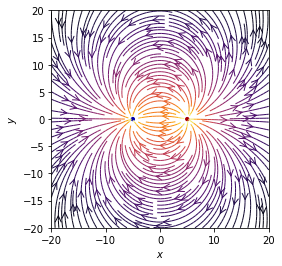

In [4]:
cones = []

# Red cone is 1 
# Blue cone is -1

cones.append((1, (5.0, 0.0)))
cones.append((-1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.rc('figure', figsize= ( 15.0, 15.0))
plt.show()

Classic positive and negative charge field vector plot. The orange color indicates a stronger force and then 'cools' off to the weaker black color. 

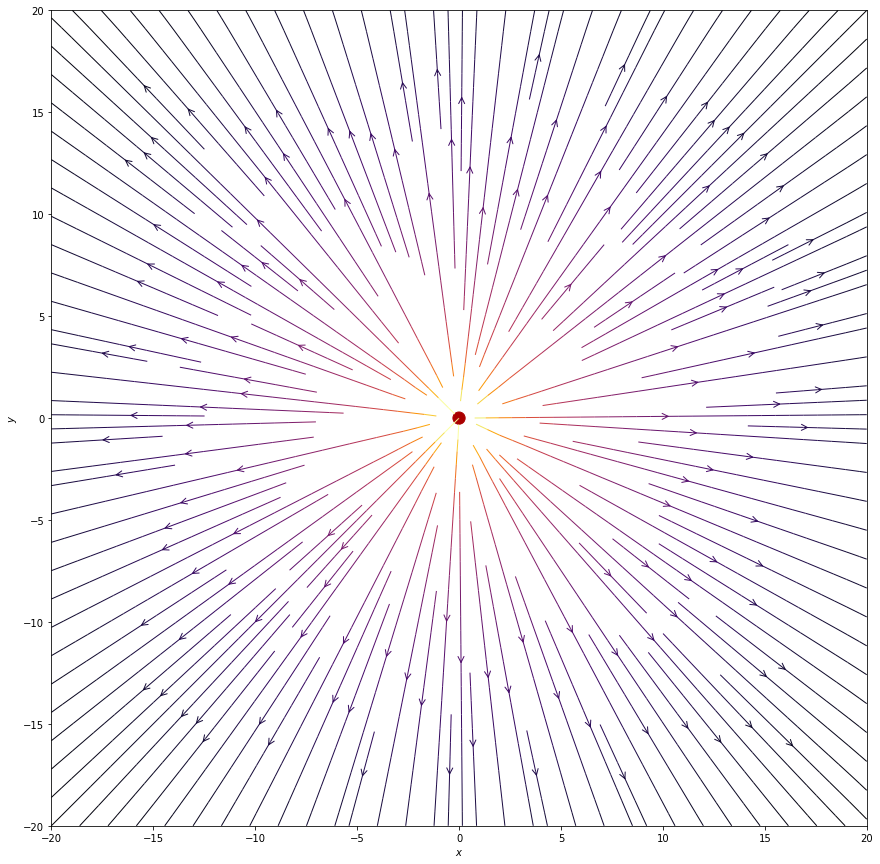

In [5]:
cones = []
cones.append((1, (0.0, 0.0)))


# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

A single charge field vector plot, normally used representing objects to stay away from in path finding algorithms.
Going back to the two charge diagram I rembered that if rotated the vector field 90 degrees I would then have a vector that pointed the way between the two charges.

In [6]:
def E(q, r0, x, y):
   """Return the artificial field vector E=(Ex,Ey) due to cone q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.1
   return -q * (y - r0[1]) / den, q * (x - r0[0]) / den

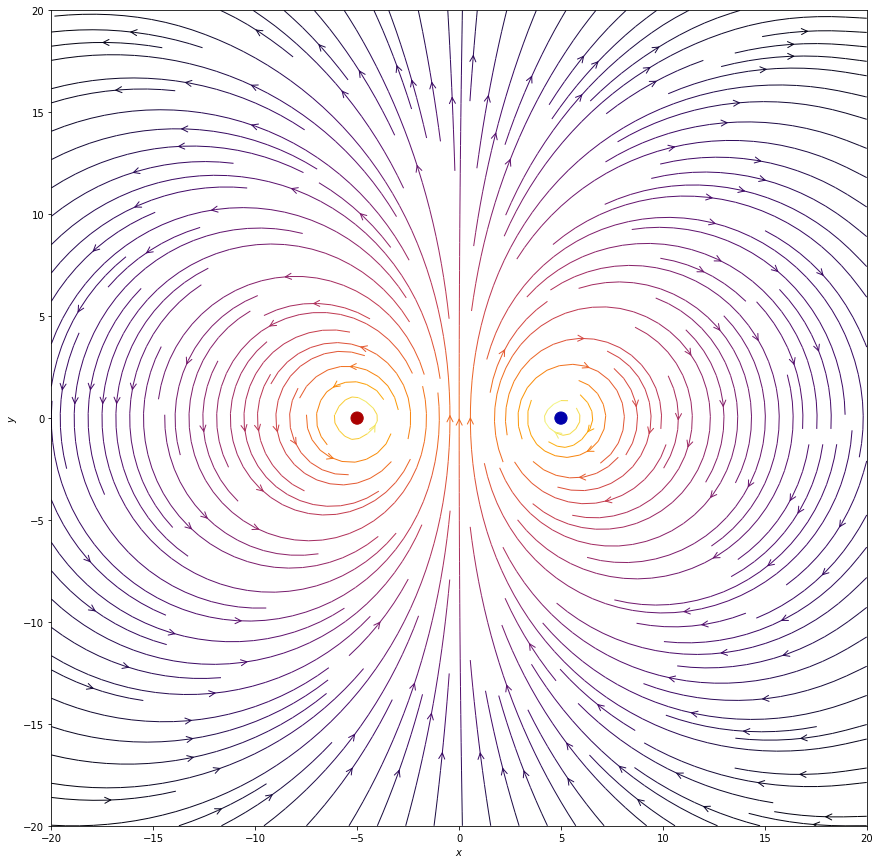

In [7]:
cones = []
cones.append((-1, (5.0, 0.0)))
cones.append((1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2.0 + Ey**2.0))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Now you can see that you have a force vector that shows you the way between the two cones. How it works is a negative blue cone has a clockwise force so you pass by the blue cones on the left side. For red cones the force is changed to positive and the force is counter clockwise. Red cones you pass on the right.   

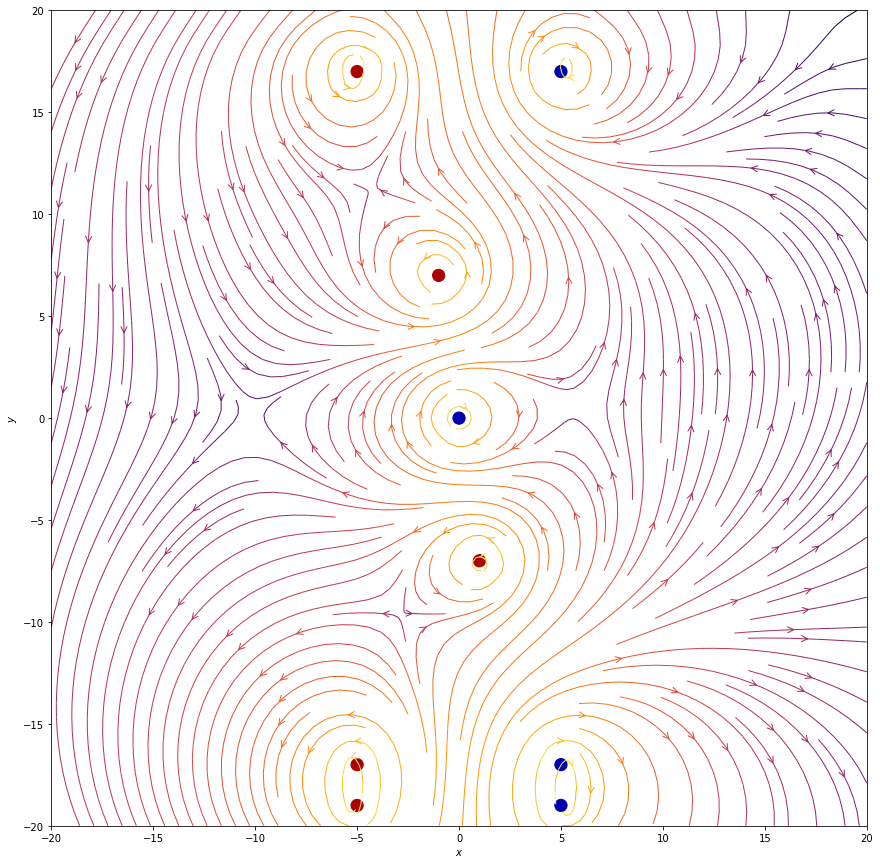

In [8]:


cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Imagine starting at point (0,-20). The force would be in the upwards direction. As you move up, the force would start pushing you to the right. When as you pass the first blue cone in the slalom you are directed right between the blue and the red cones. Then back between the red and the last blue cone in the slalom. Then the force directs you across the finish line at (0,17). Now if you get really off the 'line' then the force vectors are weaked and influenced by all the cones. The idea is that the cones you are closest too will have the strongest influence on your direction. My next step is to develop the code to step the virtual car through the course guided by the force. ;)

In [9]:
cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 0.0
Ypos = -19.0
path = []
speed = 1.0
tries = 0
angle = -np.pi/2.0
print(Xpos, Ypos)
while not(Xpos < 5.0 and Xpos > -5.0 and Ypos > 17.0) and tries < 80:
    Ex = 0.0
    Ey = 0.0
    for cone in cones:
        ex, ey = E(*cone, x=Xpos, y=Ypos)
        Ex += ex
        Ey += ey
    
    #print(Ex,Ey)
    angle = np.arctan2(Ey, Ex)    
    print(np.arctan2(Ey, Ex)*180/np.pi)
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print (newx, newy)
    print(Xpos, Ypos)
    #time.sleep(.5)

0.0 -19.0
85.6166419404
0.0764294242892 0.997074993721
0.0764294242892 -18.0029250063
85.3064451967
0.0818263964685 0.996646597767
0.158255820758 -17.0062784085
83.930922372
0.105727414479 0.994395149741
0.263983235237 -16.0118832588
81.2203410724
0.152634987108 0.988282631999
0.416618222345 -15.0236006268
76.7478021592
0.229237729152 0.973370465718
0.645855951497 -14.0502301611
70.0766389998
0.340762902175 0.940149267139
0.986618853672 -13.1100808939
61.2219306139
0.48141822243 0.876491012568
1.4680370761 -12.2335898813
51.7184039987
0.619526921515 0.784975409499
2.08756399762 -11.4486144718
44.9331688354
0.707931086199 0.706281514123
2.79549508382 -10.7423329577
43.3409810442
0.727282037114 0.686338719942
3.52277712093 -10.0559942378
46.6123530422
0.686930844423 0.726722791015
4.20970796535 -9.32927144677
53.2806812641
0.597895452142 0.801574094085
4.8076034175 -8.52769735268
62.1864242272
0.466596221573 0.884470443833
5.27419963907 -7.64322690885
72.6876423011
0.297580792388 0.95469

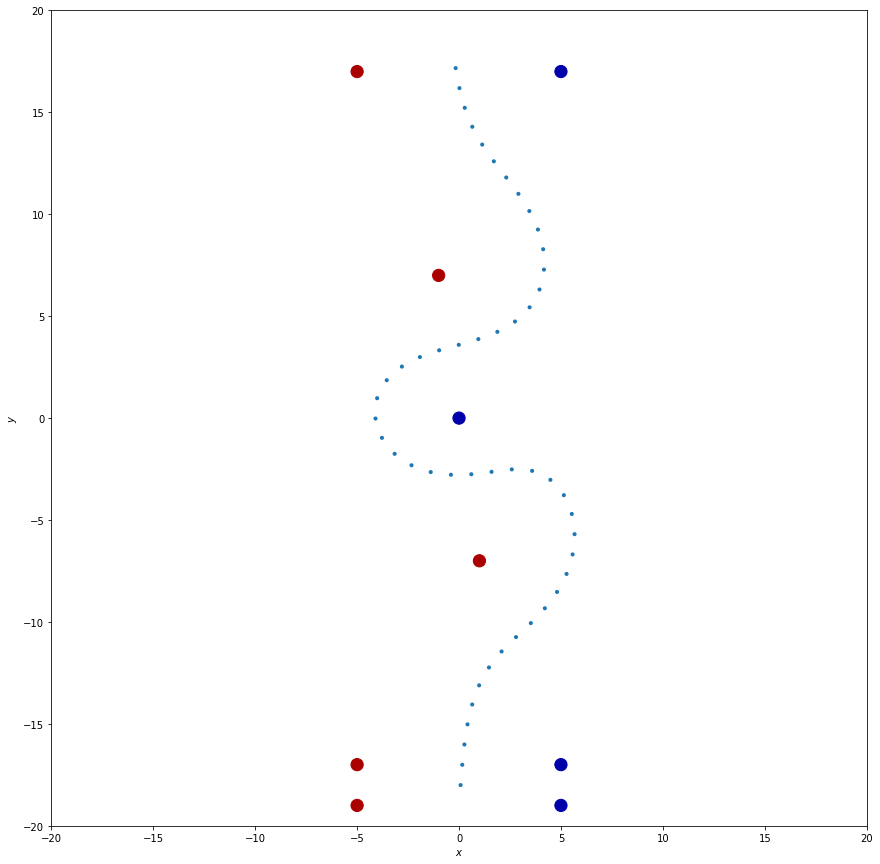

In [10]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.1))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)


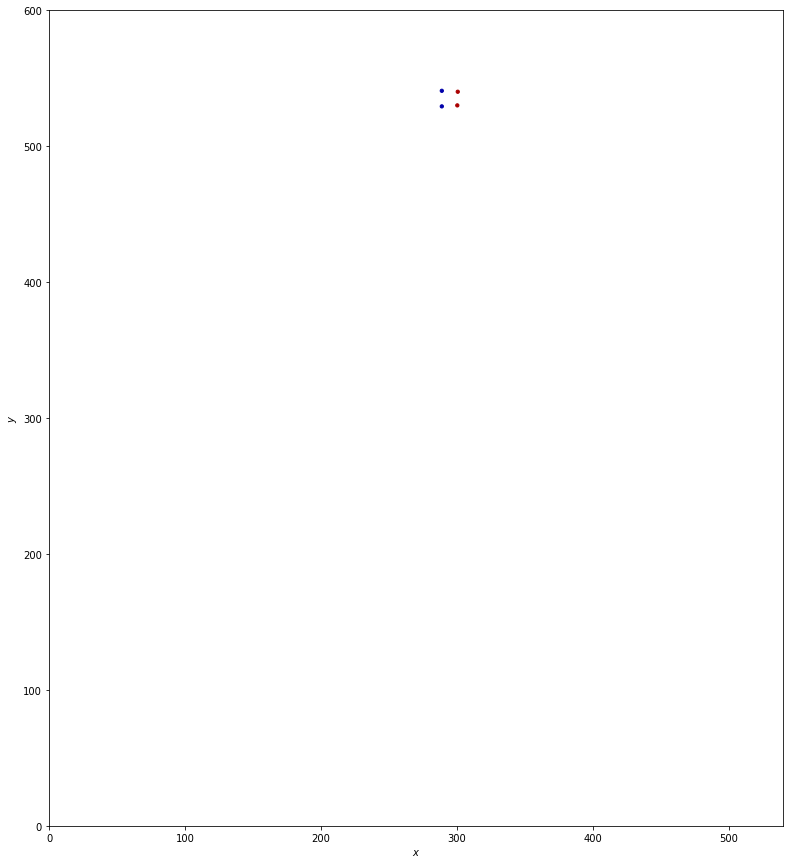

angle -90.0
move (0.62621669343728092, -2.9339142204332553)
293.626216693 555.06608578
1
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)


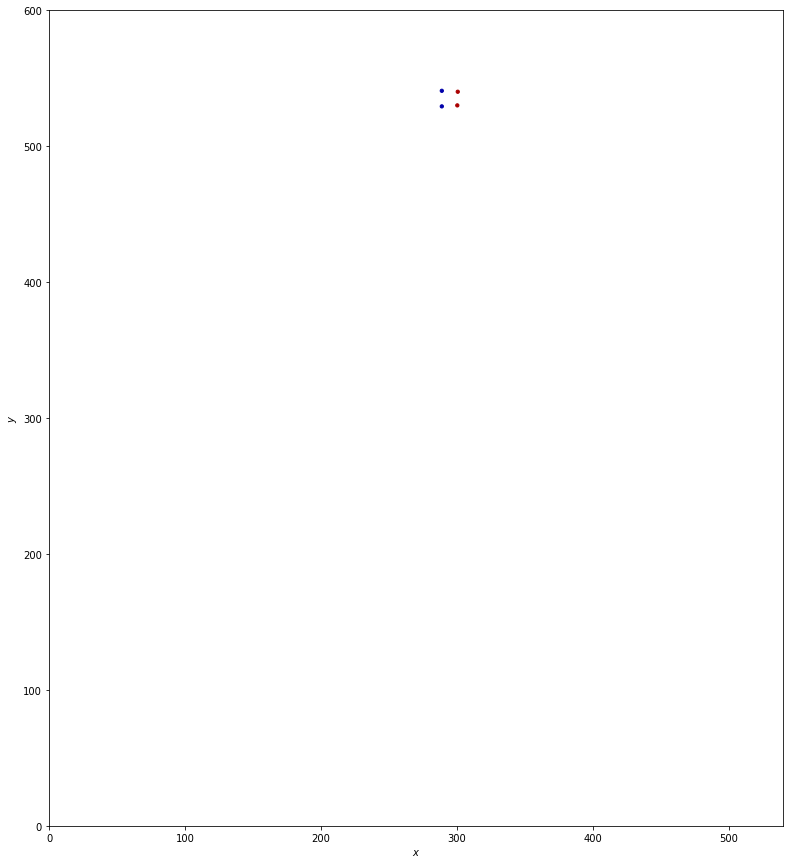

angle -77.9515413259
move (0.49270631916800978, -2.9592635034839176)
294.118923013 552.106822276
2
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)


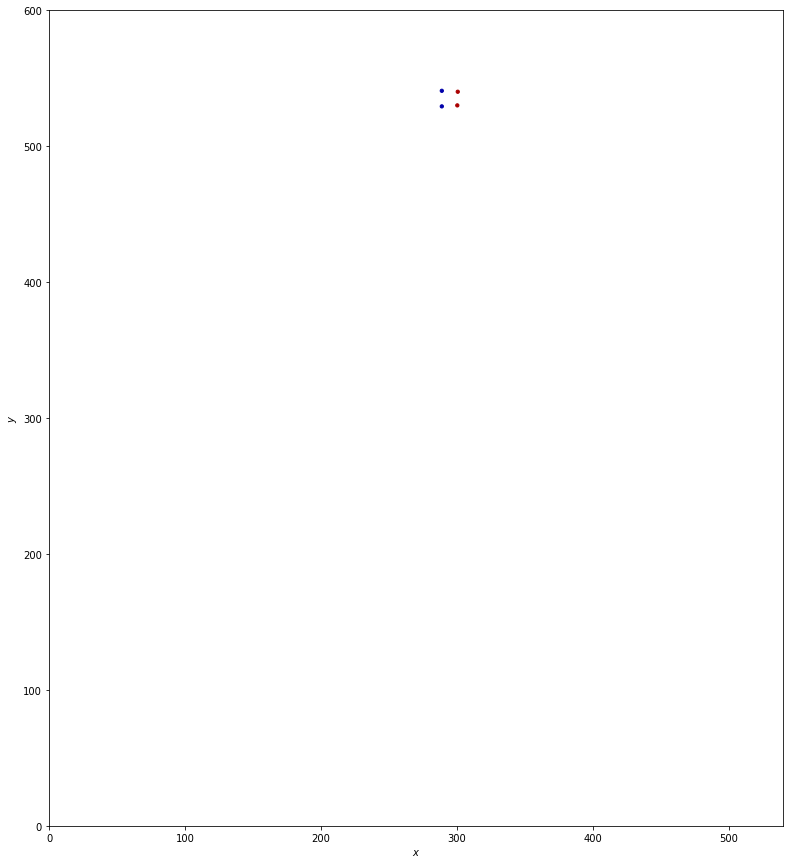

angle -80.5471775026
move (0.35504443665378194, -2.9789164889270054)
294.473967449 549.127905787
3
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)


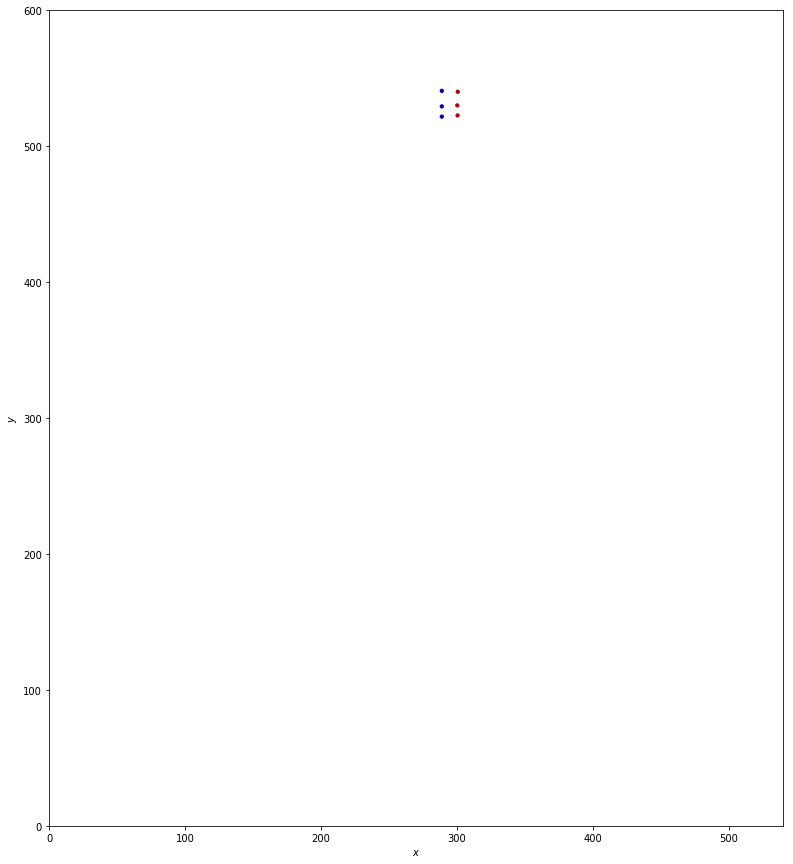

angle -83.2032210561
move (0.17800294383516913, -2.9947145025838462)
294.651970393 546.133191285
4
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)


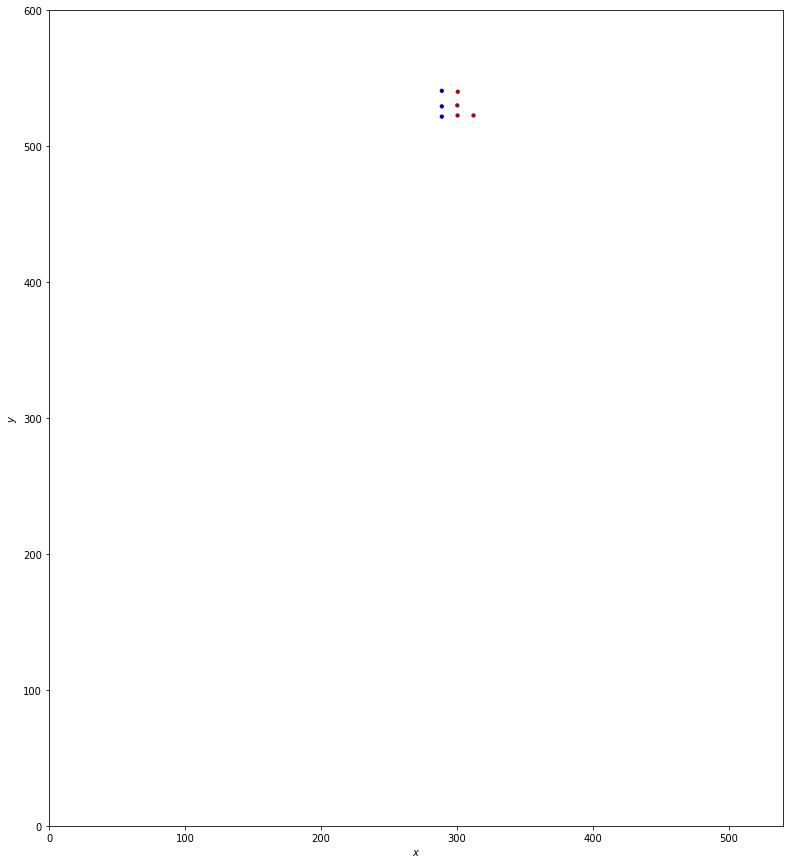

angle -86.5983962724
move (-0.20599447401205623, -2.9929193568615404)
294.445975919 543.140271928
5
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)


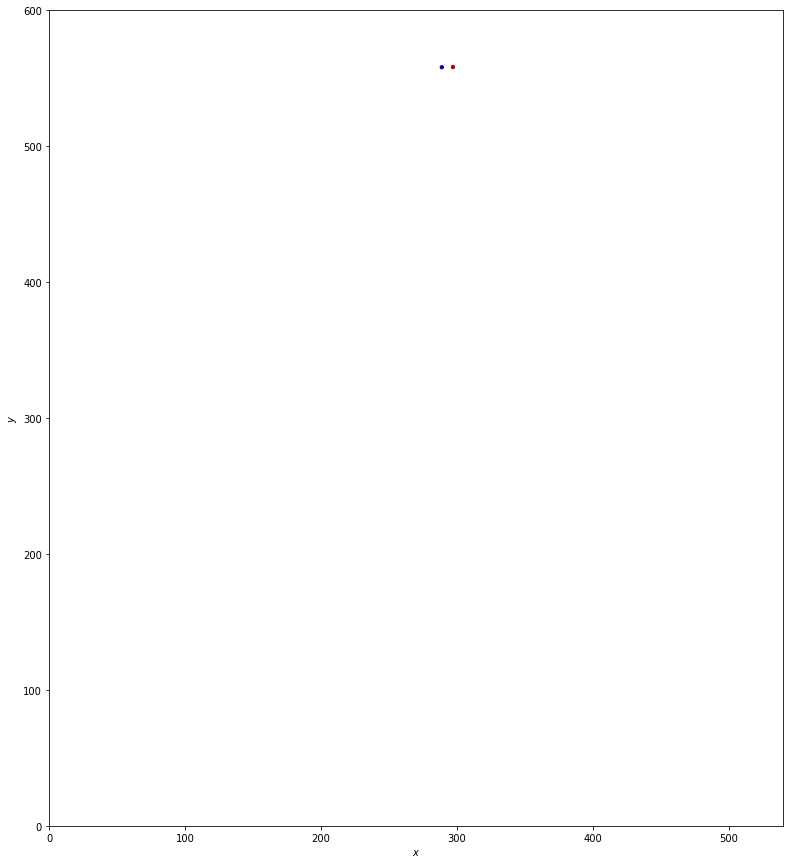

angle -93.9373027685
move (0.5052970863741536, -2.9571396406835087)
294.951273005 540.183132287
6
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes 1 (312.2997, 522.6902)


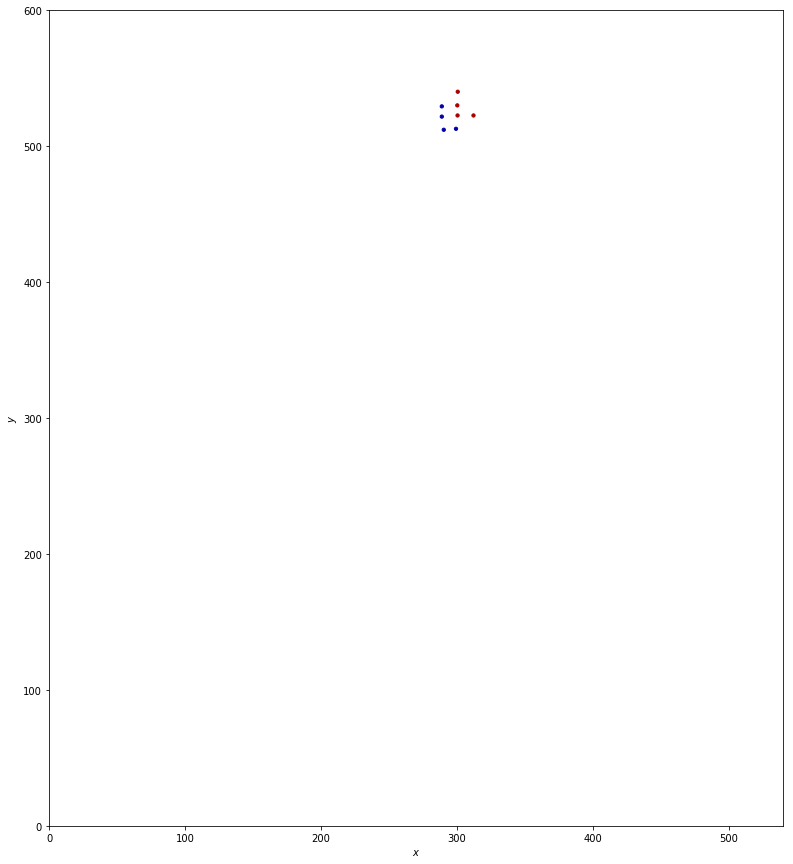

angle -80.3033142245
move (0.21061448066691177, -2.9925977913066446)
295.161887486 537.190534496
7
yes 1 (300.3891, 530.1002)
yes 1 (300.5691, 522.6902)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes 1 (312.2997, 522.6902)


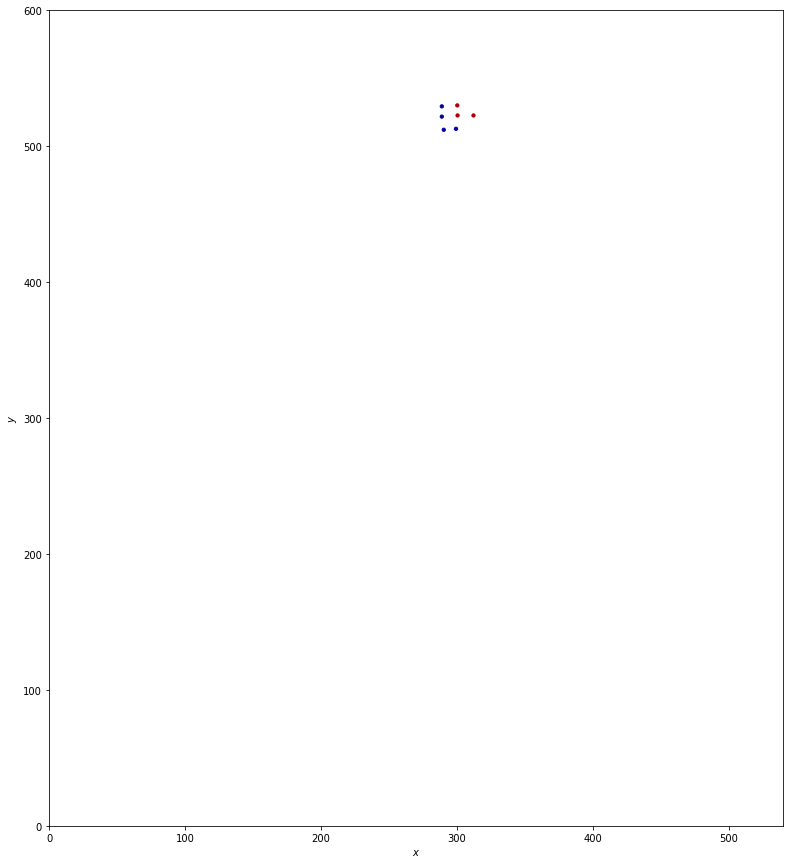

angle -85.9742481222
move (0.31397944836267055, -2.9835242425704998)
295.475866934 534.207010253
8
yes 1 (300.3891, 530.1002)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes 1 (312.2997, 522.6902)
yes 1 (324.0303, 527.9402)


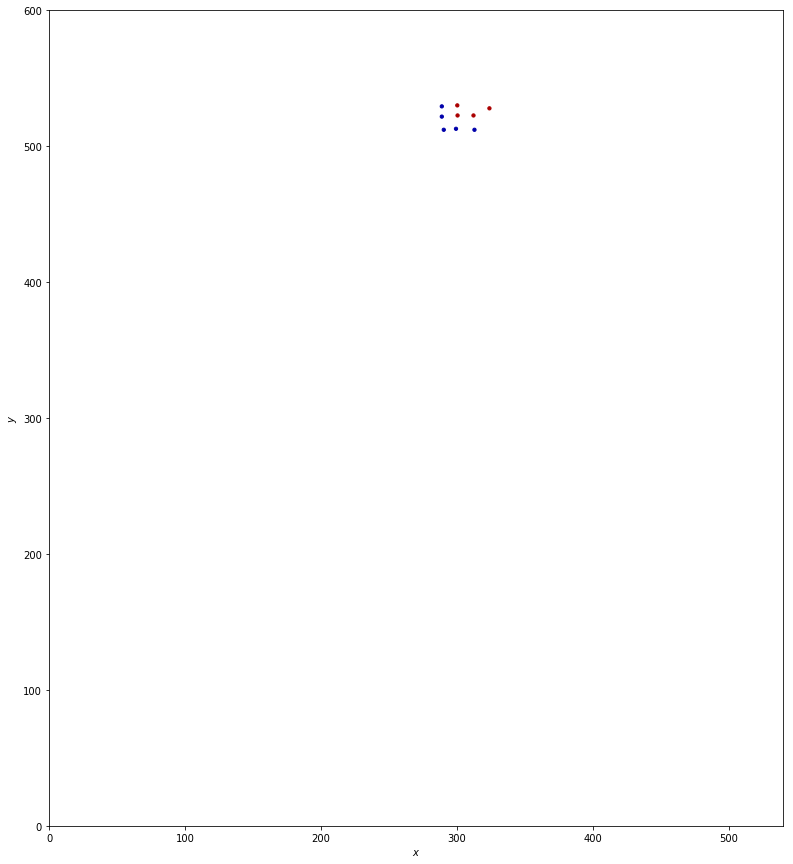

angle -83.9924325282
move (0.22412467600136221, -2.9916163072171011)
295.69999161 531.215393946
9
yes 1 (300.3891, 530.1002)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes 1 (312.2997, 522.6902)
yes 1 (324.0303, 527.9402)


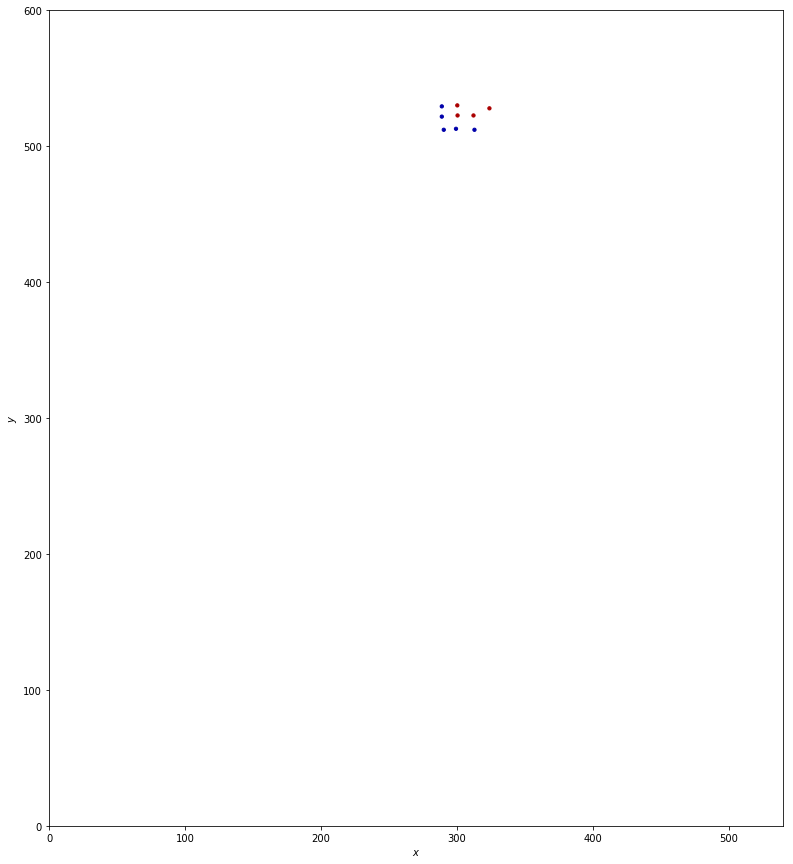

angle -85.7155421852
move (0.29466447092566339, -2.9854937363146652)
295.994656081 528.22990021
10
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes 1 (312.2997, 522.6902)


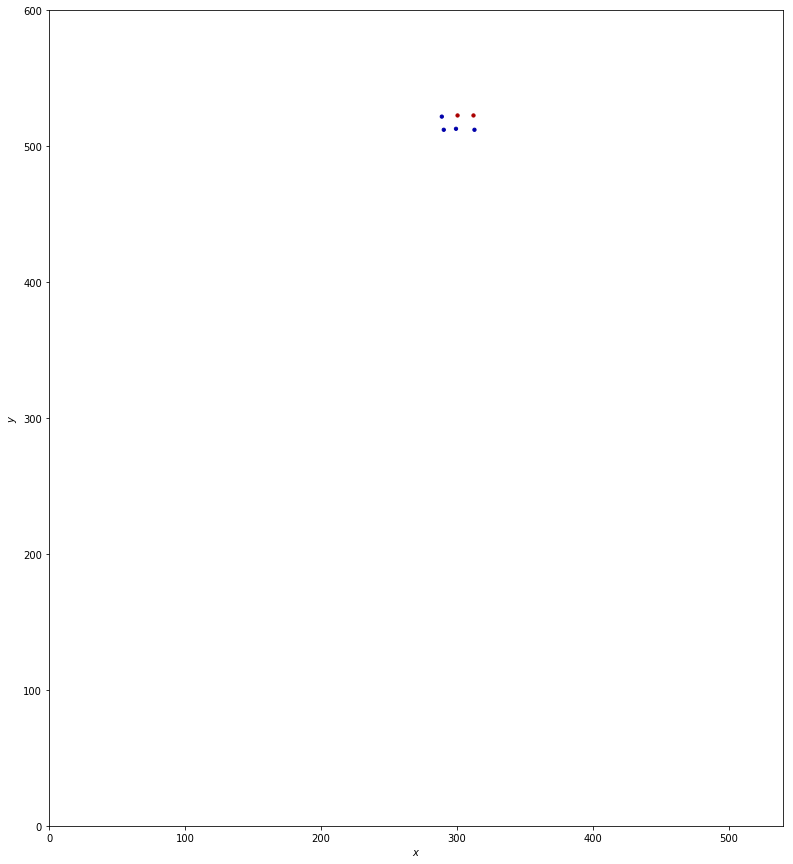

angle -84.3632348377
move (1.0072935313054985, -2.8258378831401667)
297.001949613 525.404062326
11
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


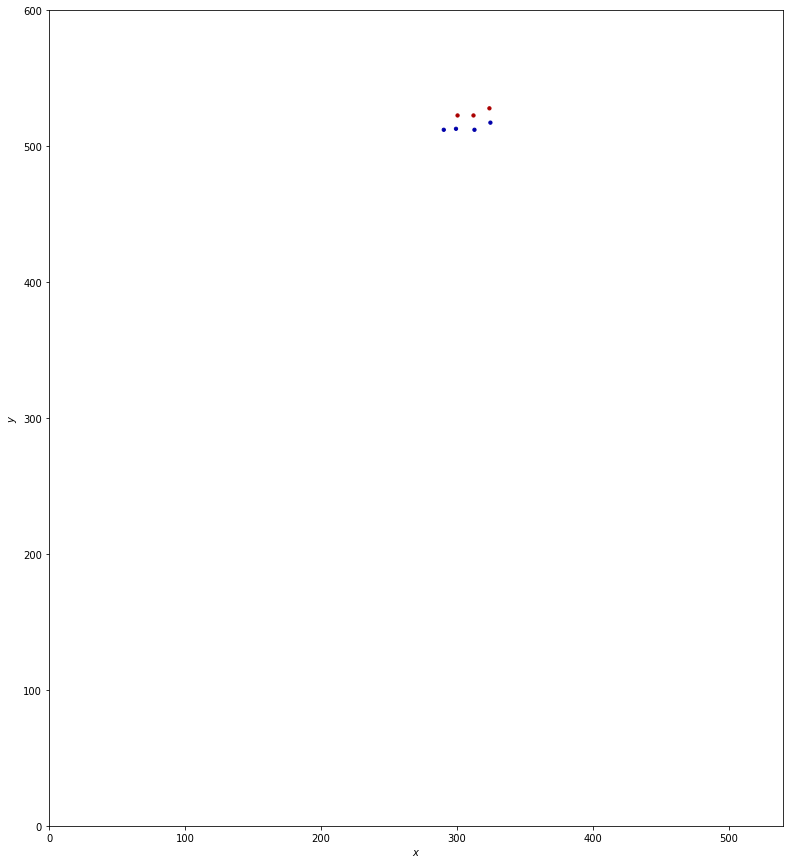

angle -70.3809658728
move (-0.030065702725944856, -2.9998493384701166)
296.97188391 522.404212988
12
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes 1 (324.0303, 527.9402)


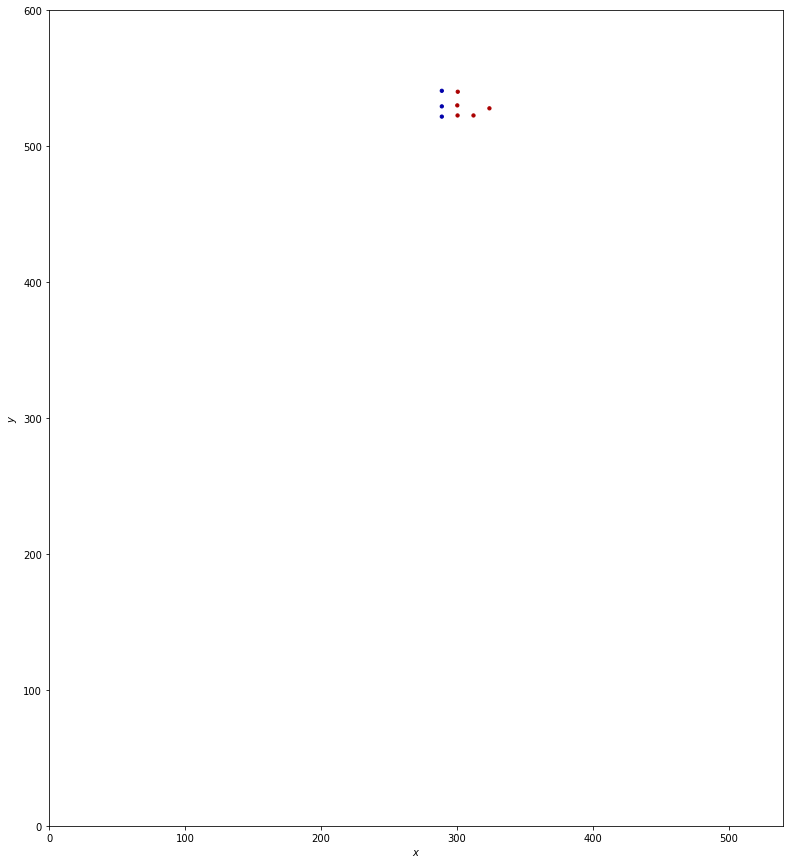

angle -90.5742222374
move (0.43010156670184807, -2.9690086969088885)
297.401985477 519.435204291
13
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (324.7503, 517.4102)


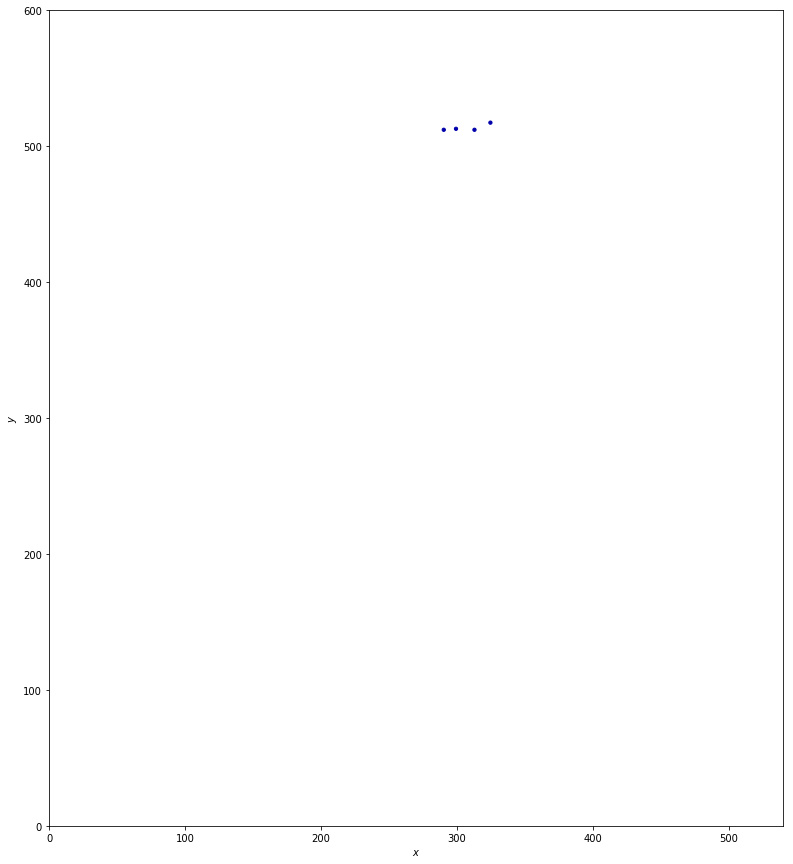

angle -81.757261871
move (2.9282443099854758, 0.65221565531477832)
300.330229787 520.087419946
14
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


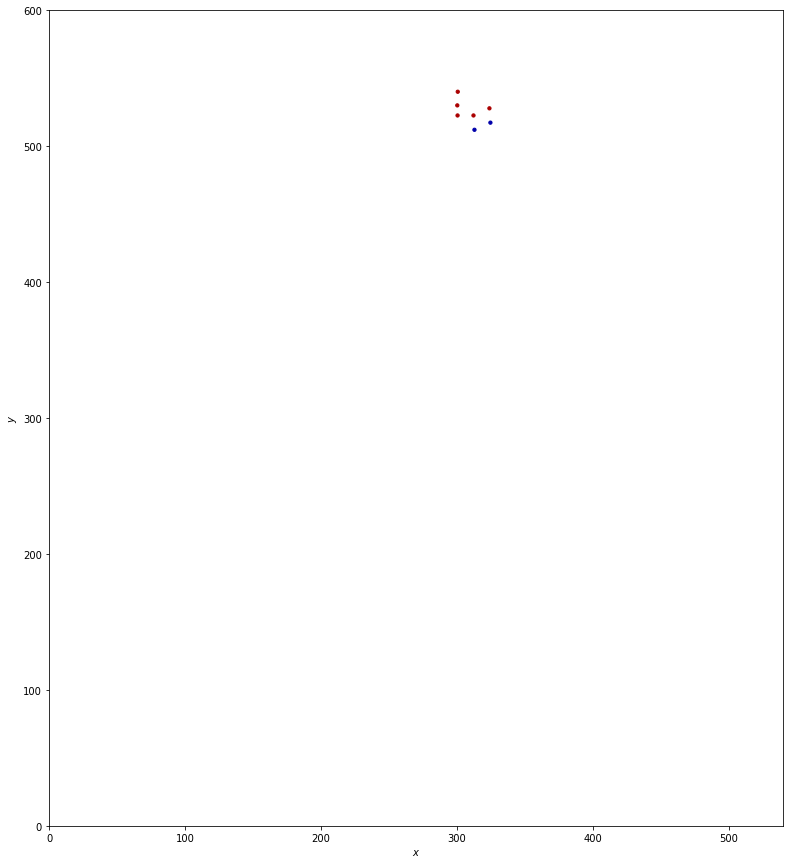

angle 12.5566745515
move (2.9856020212420309, -0.29356527511866831)
303.315831808 519.793854671
15
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


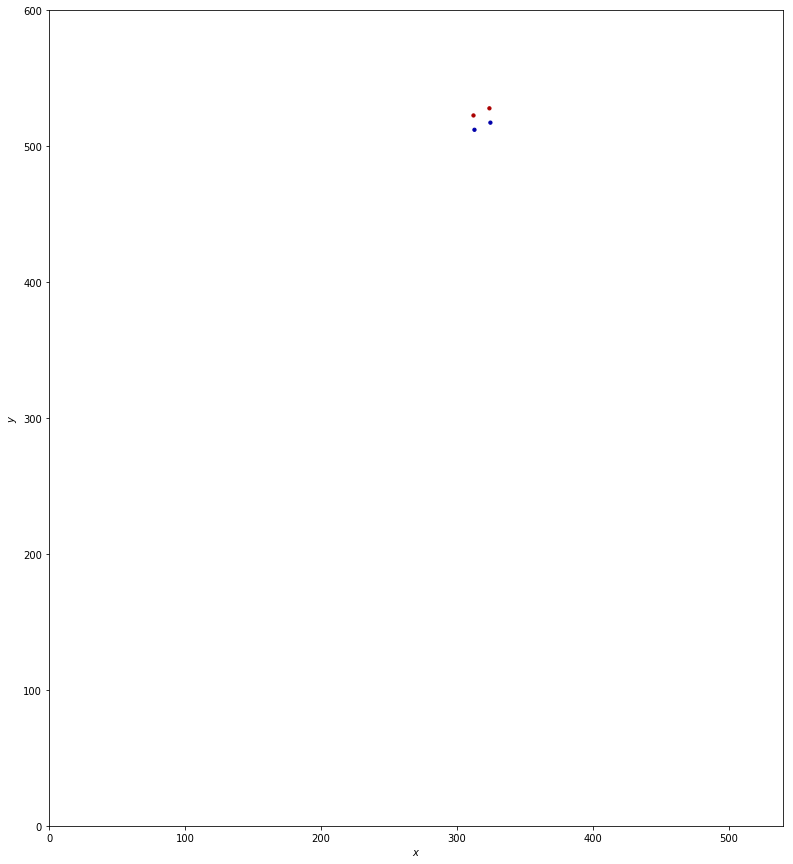

angle -5.61567044787
move (2.810452437288971, -1.0494556197078961)
306.126284245 518.744399052
16
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


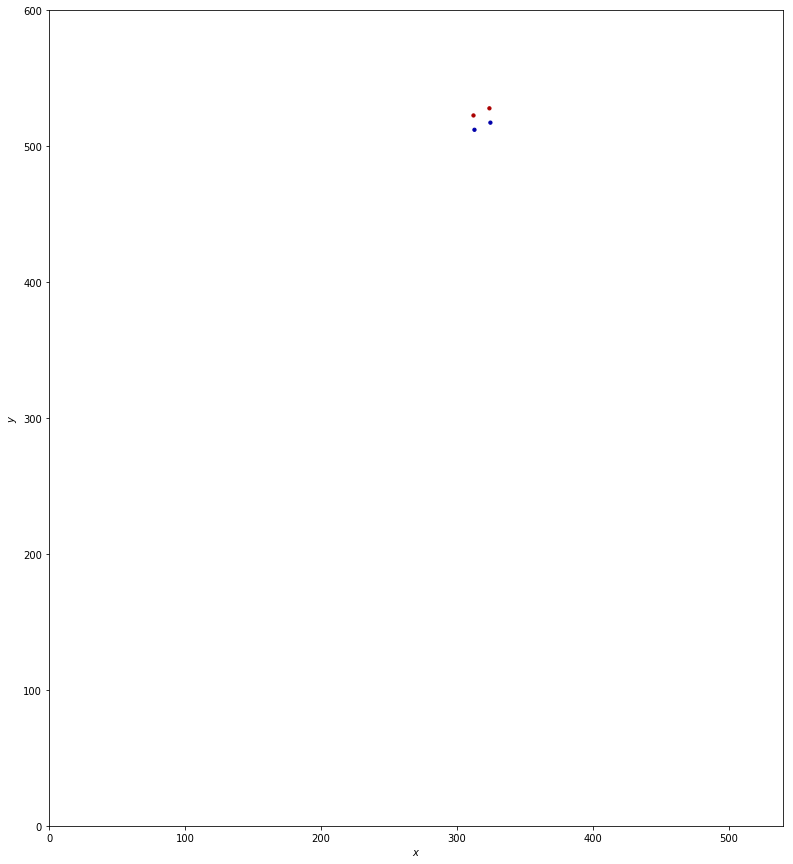

angle -20.4762166094
move (2.9345001513305284, -0.62346520499632108)
309.060784397 518.120933847
17
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


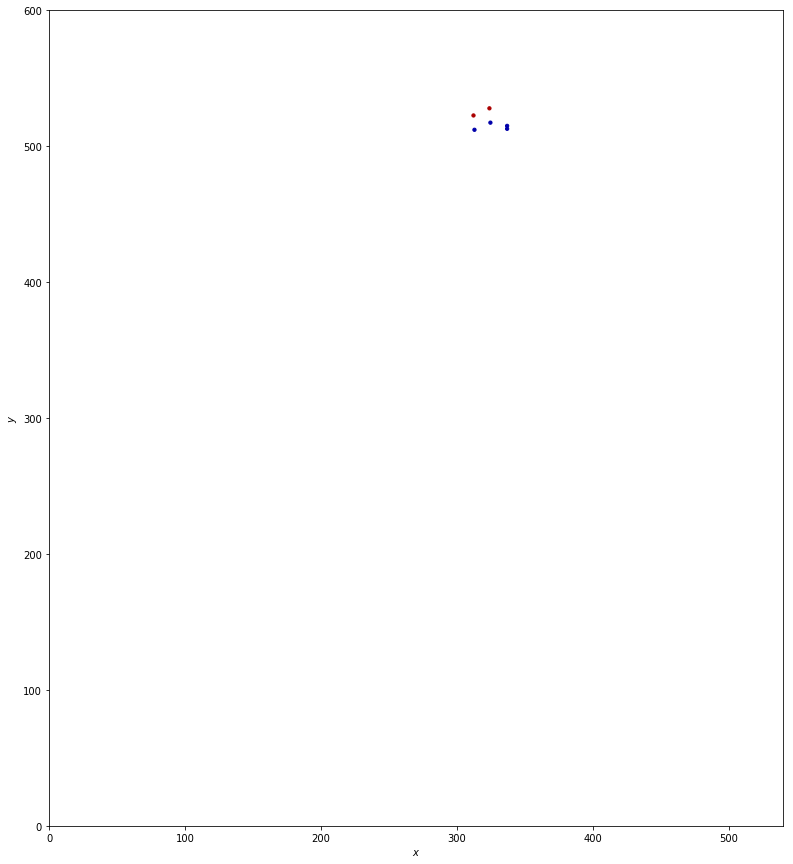

angle -11.9947308173
move (2.9777512554581955, 0.36468816901174633)
312.038535652 518.485622016
18
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


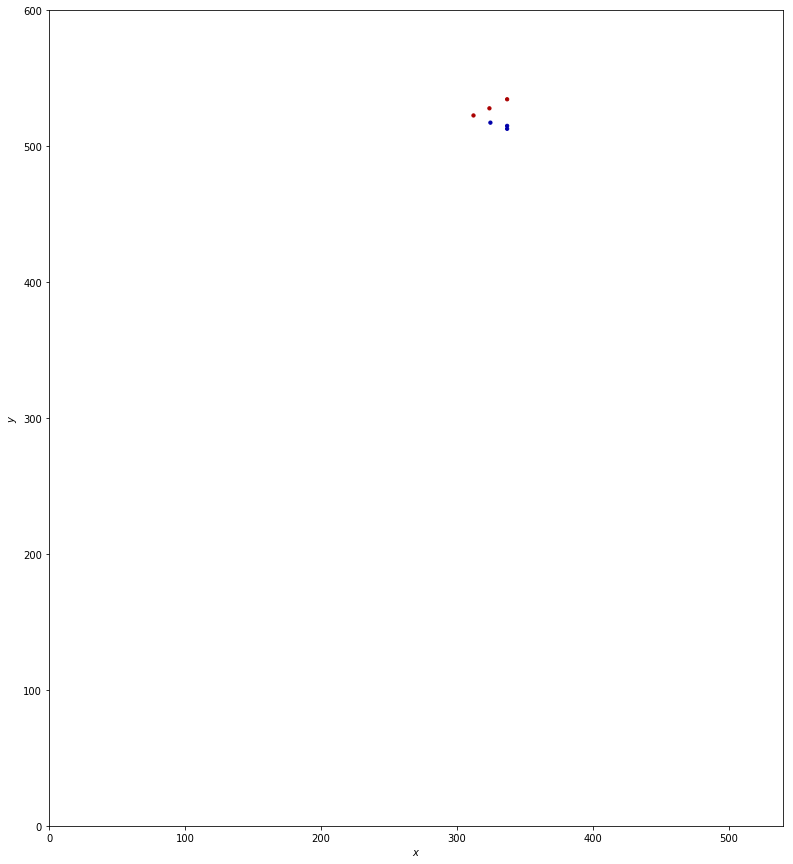

angle 6.98230034747
move (2.9688022876073306, 0.43152401682580788)
315.00733794 518.917146032
19
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


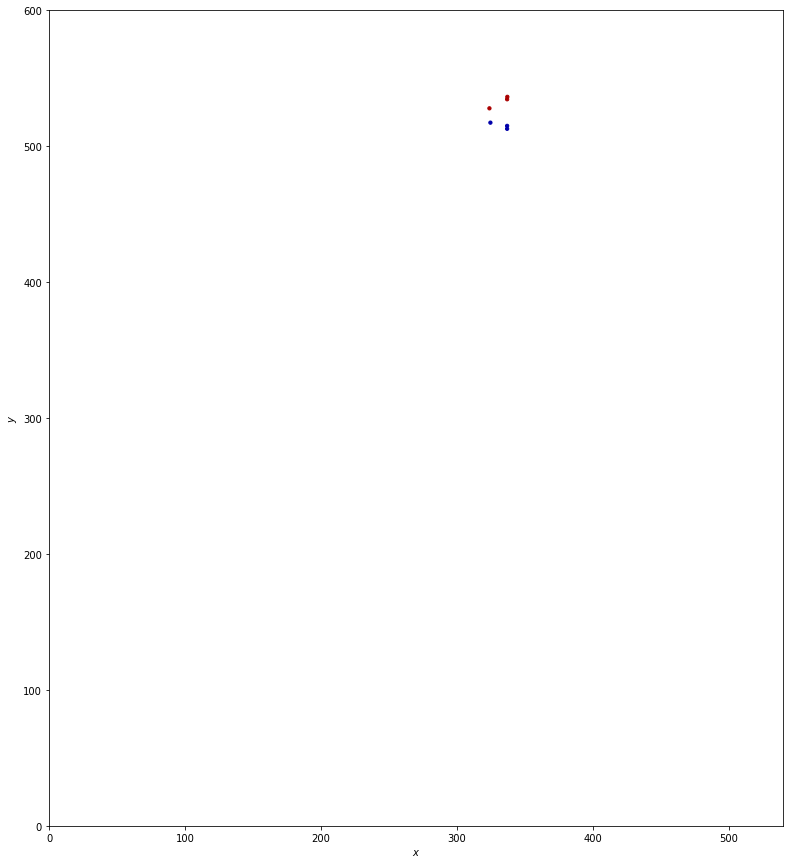

angle 8.2701894532
move (2.5567290666462021, 1.5694382688613275)
317.564067006 520.486584301
20
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


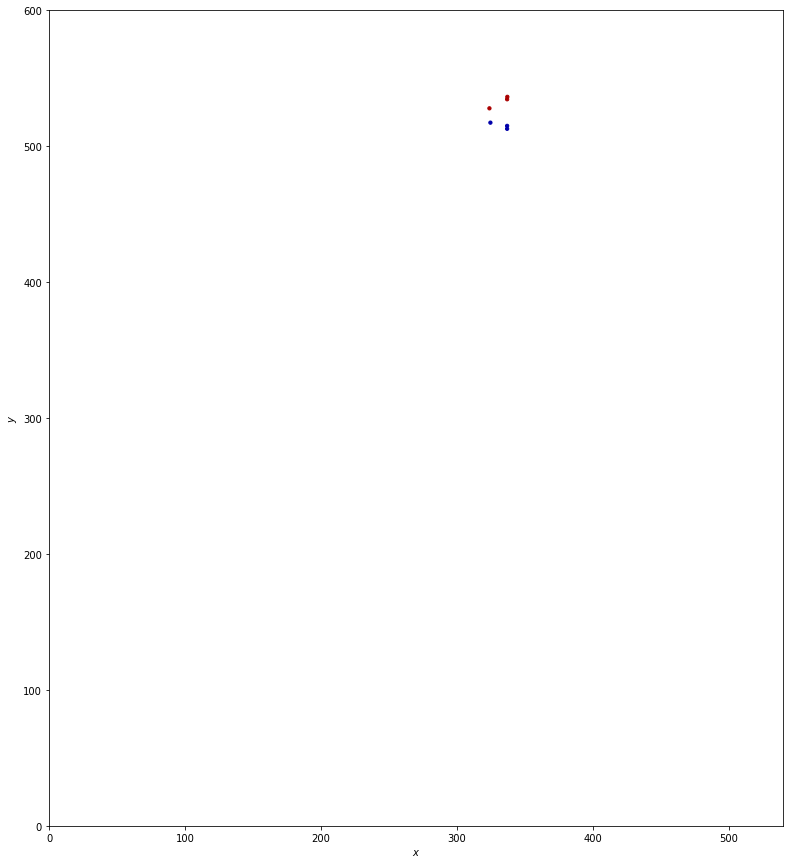

angle 31.5435225623
move (2.7656547366208364, 1.1623914477518893)
320.329721743 521.648975749
21
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


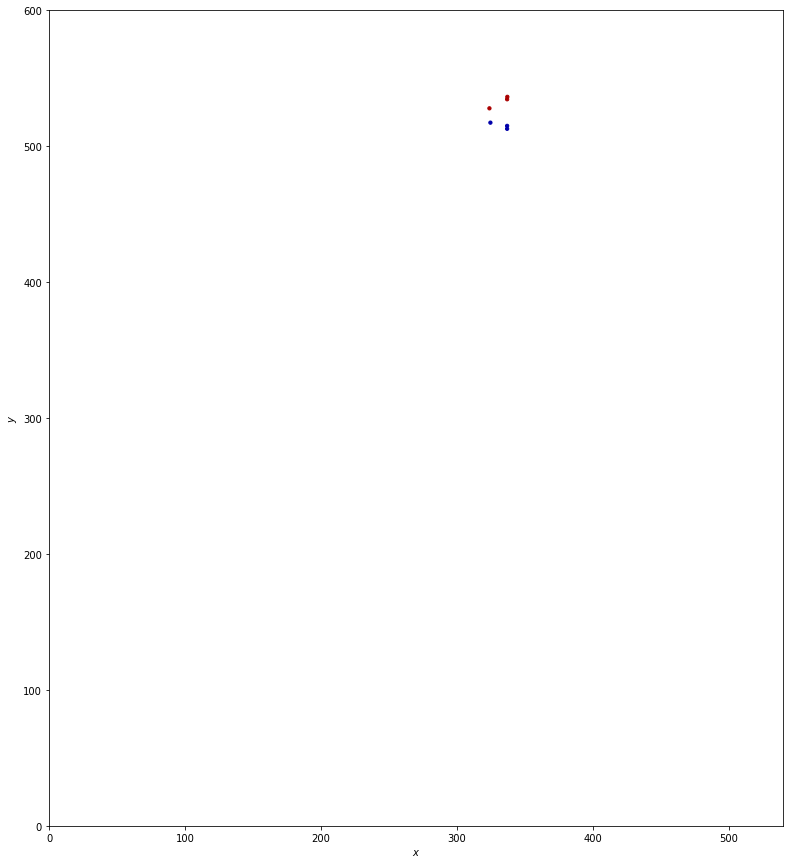

angle 22.7967823878
move (2.915370008929989, 0.70754343402476449)
323.245091752 522.356519183
22
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (324.0303, 527.9402)


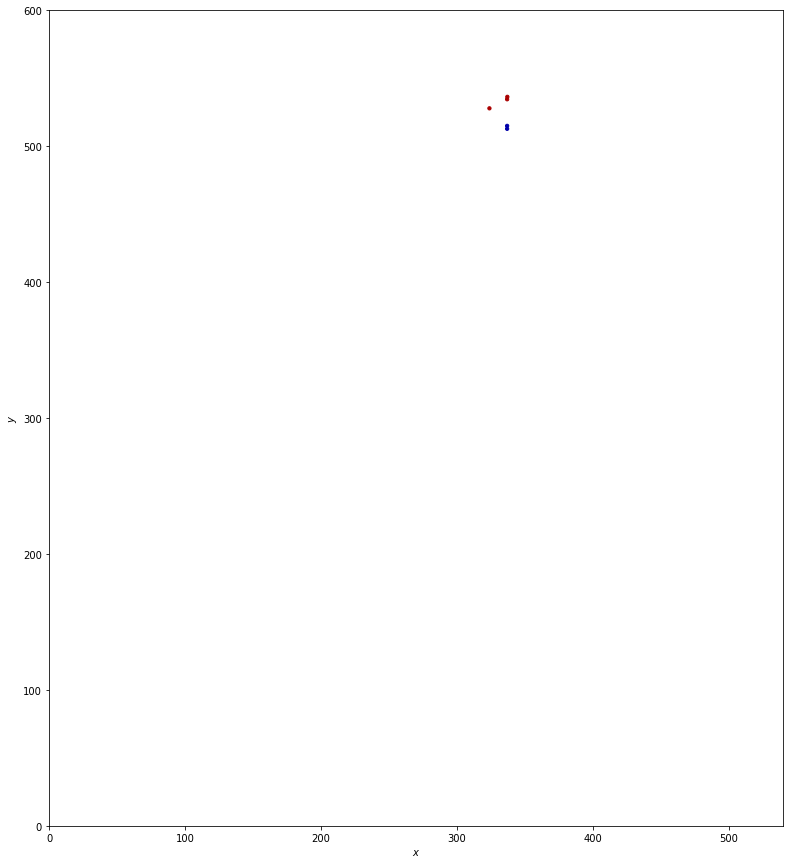

angle 13.6416036096
move (2.9999658142272603, 0.014321782981531313)
326.245057566 522.370840966
23
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)


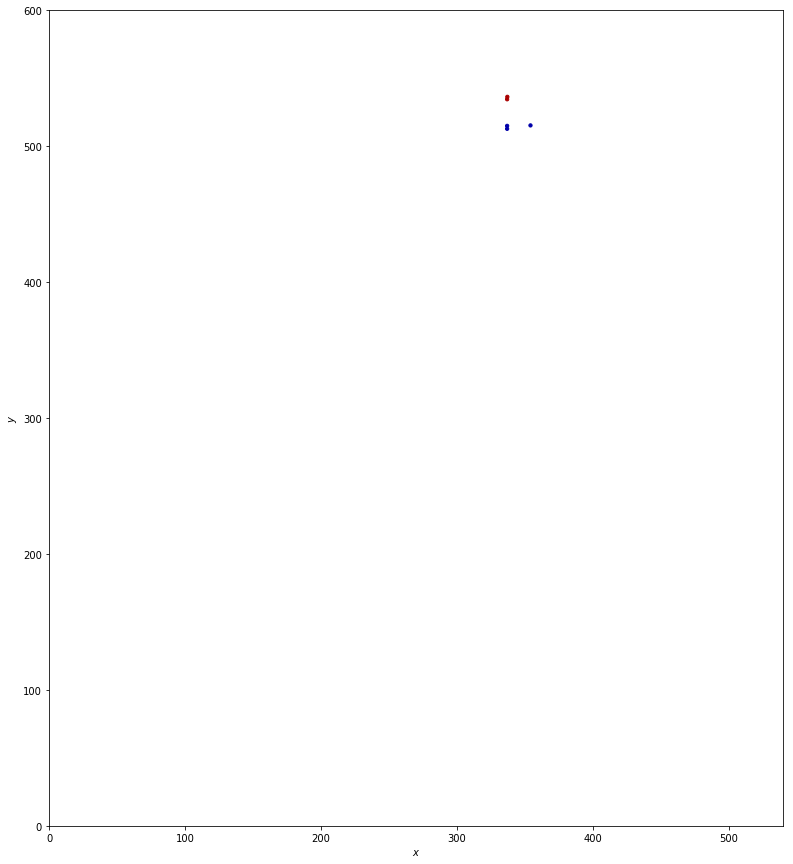

angle 0.273526945619
move (2.786925390732172, 1.1104264345251917)
329.031982957 523.481267401
24
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)


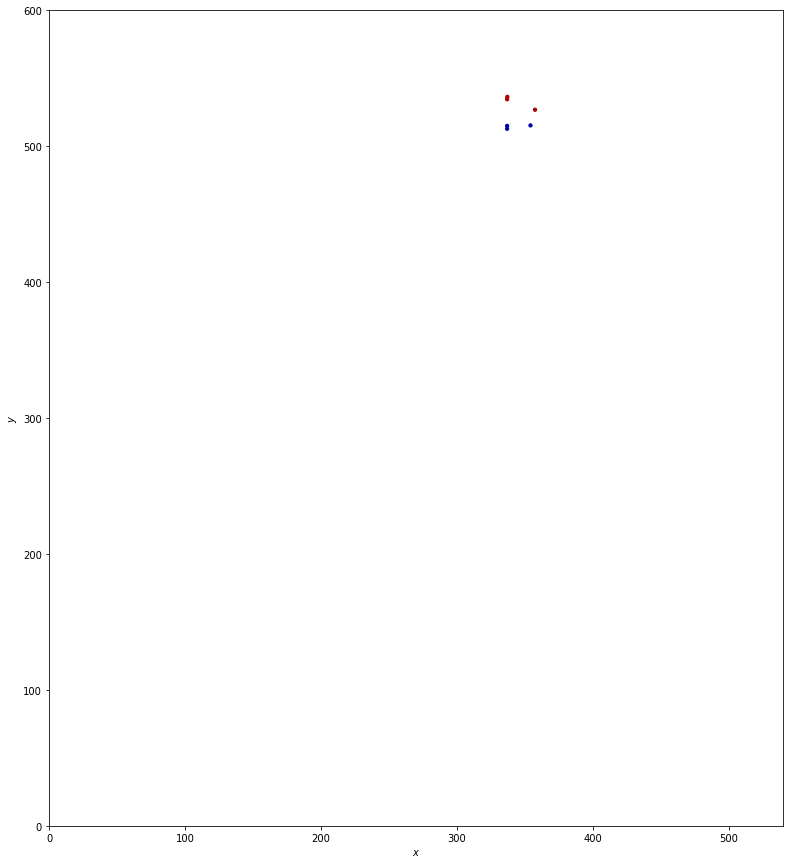

angle 21.7243839887
move (2.9765893122772713, 0.37405356038503279)
332.008572269 523.855320961
25
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)


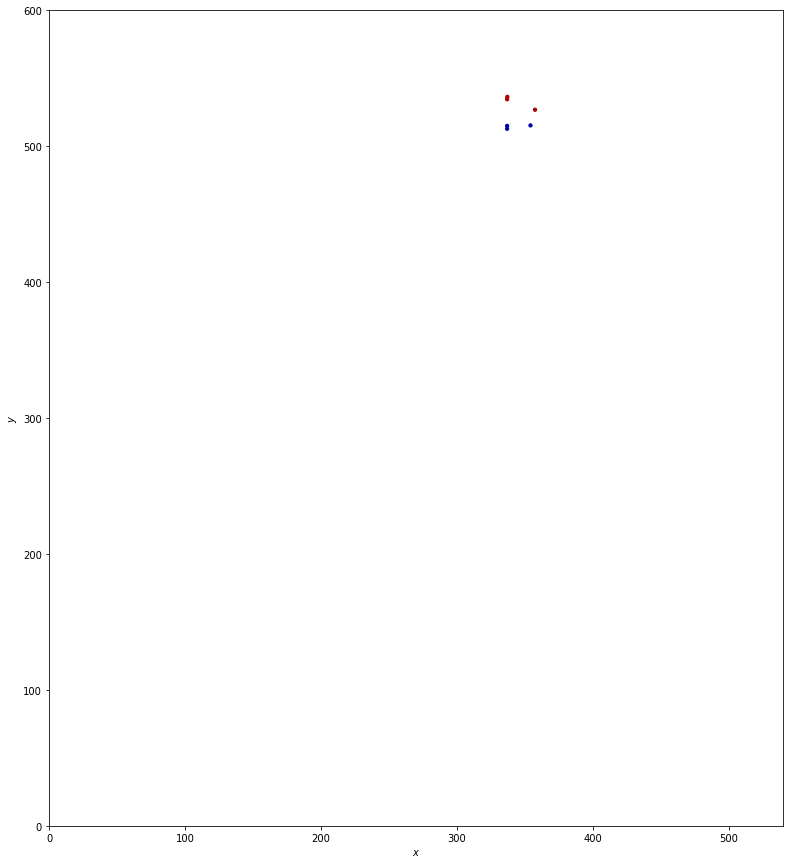

angle 7.16253758804
move (2.9925406491070183, 0.21142484111888765)
335.001112918 524.066745802
26
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)


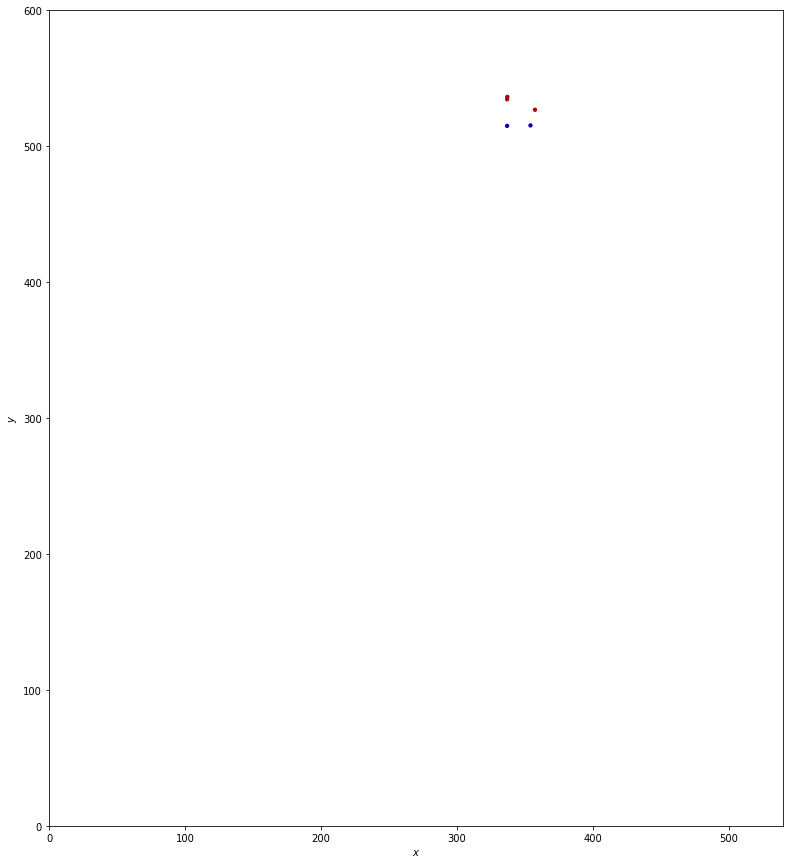

angle 4.04126705222
move (2.9992699048531, -0.066181854329378814)
338.000382823 524.000563948
27
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)


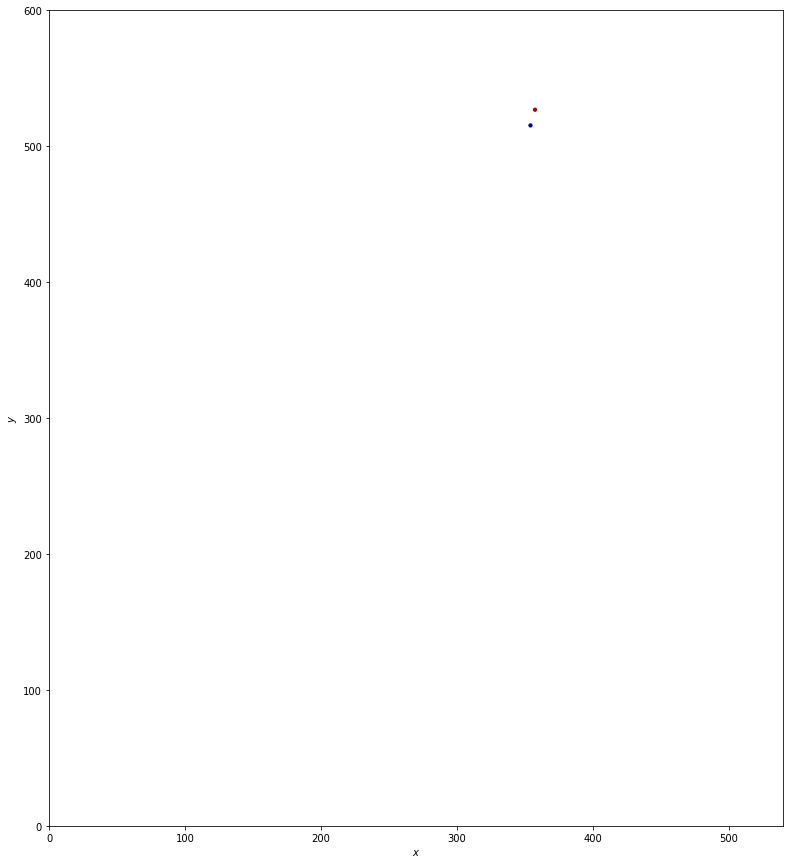

angle -1.26408285733
move (2.9978472782568977, -0.11362964510949922)
340.998230101 523.886934303
28
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)


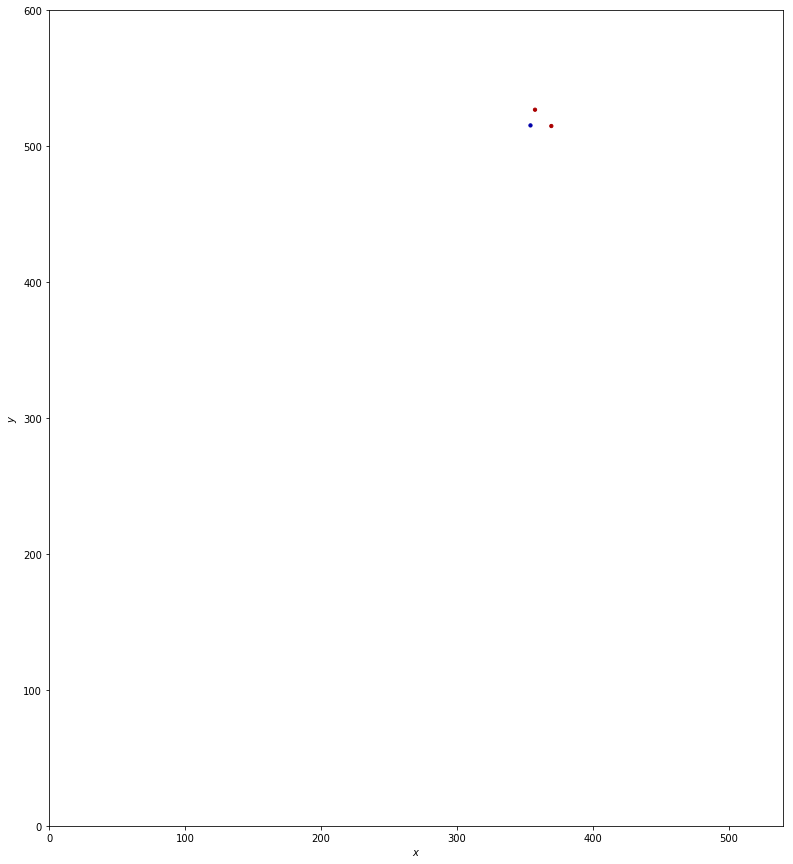

angle -2.17068559808
move (2.2391927511218164, -1.9965008948967473)
343.237422852 521.890433408
29
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


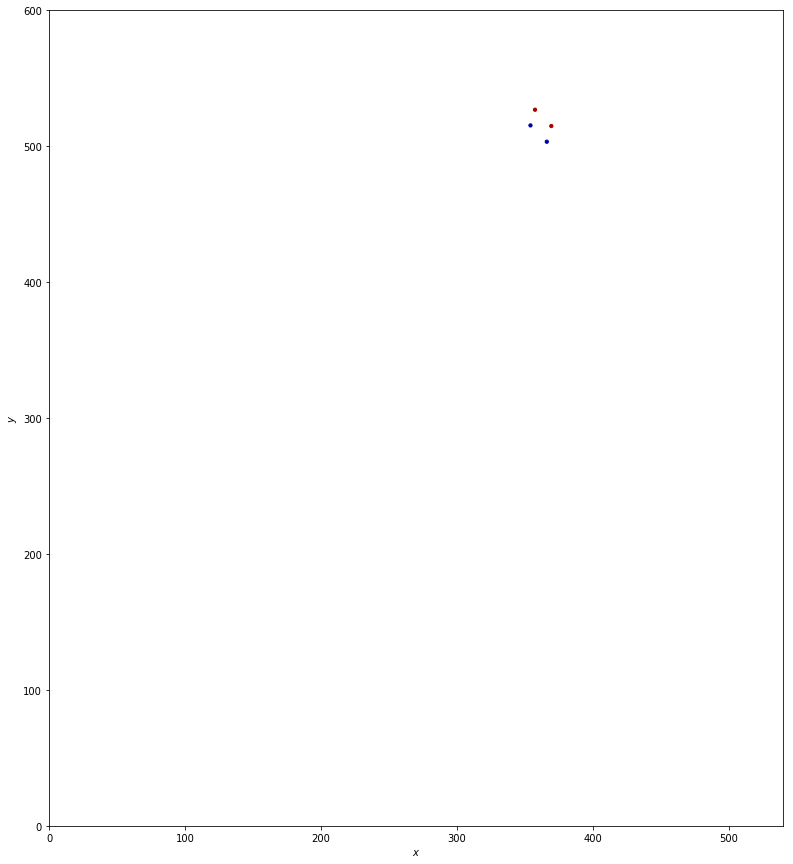

angle -41.7207183669
move (2.9997270139588093, -0.04047025729799103)
346.237149866 521.84996315
30
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


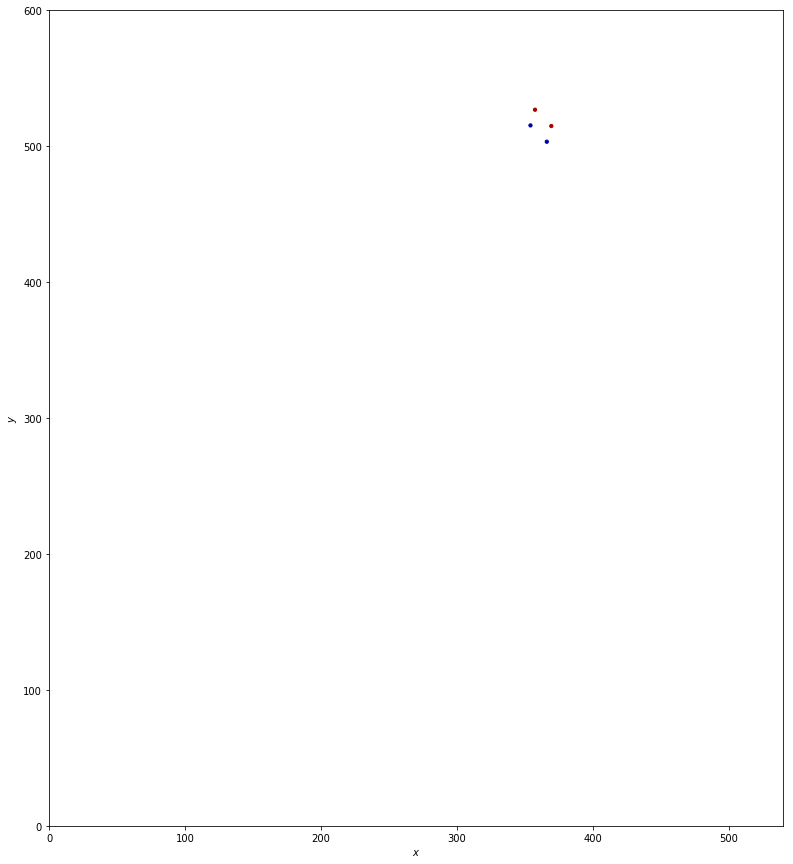

angle -0.772948424707
move (2.9944403916914624, -0.18255613001671589)
349.231590258 521.66740702
31
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


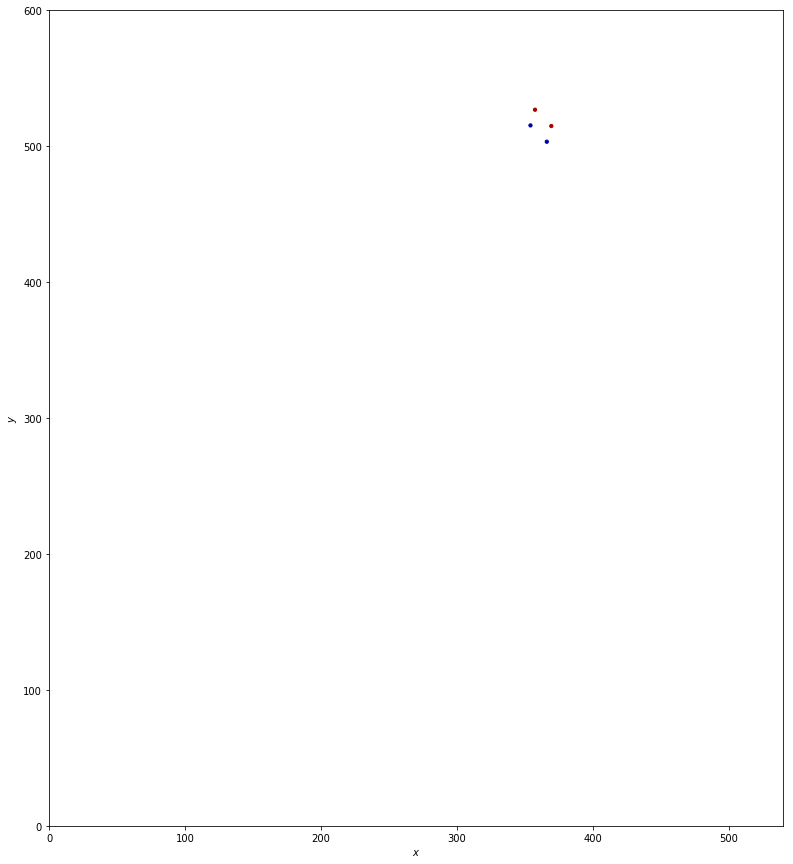

angle -3.48872062668
move (2.9774757500766551, -0.36693072603075916)
352.209066008 521.300476294
32
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


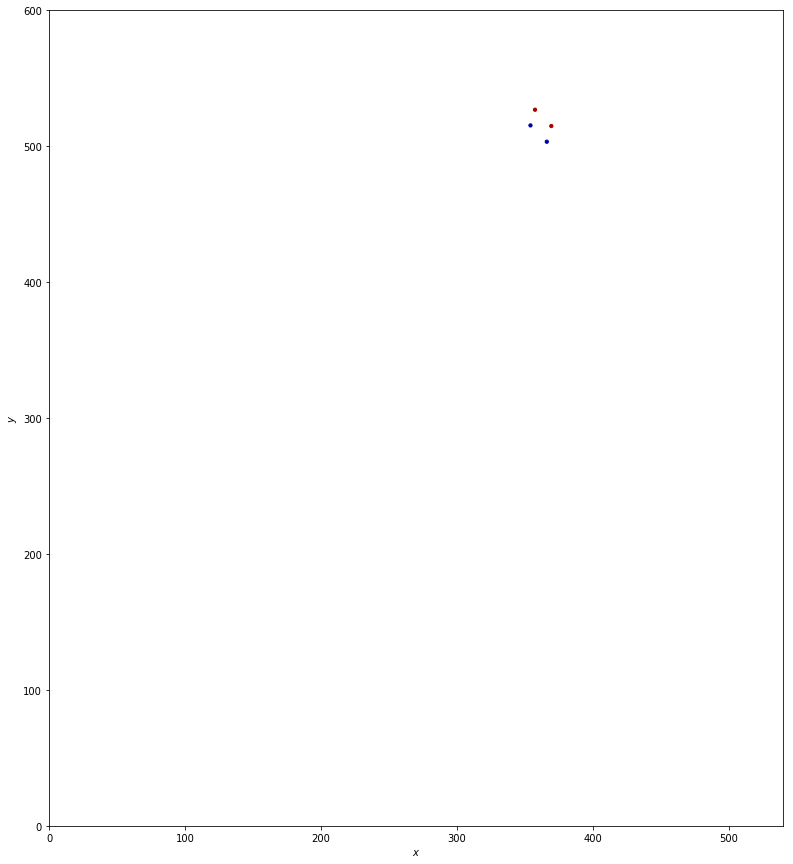

angle -7.02545203465
move (2.9346552367497578, -0.62273480825887984)
355.143721245 520.677741486
33
yes 1 (357.5678, 526.9202)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


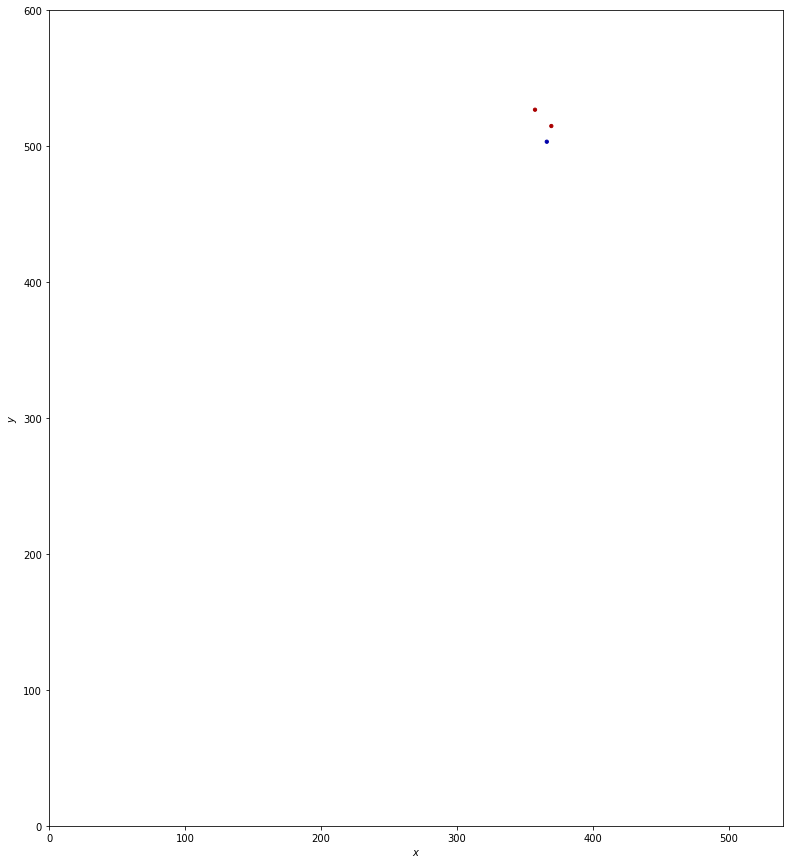

angle -11.9804702815
move (2.6274993360620953, -1.4478422700671669)
357.771220581 519.229899216
34
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)


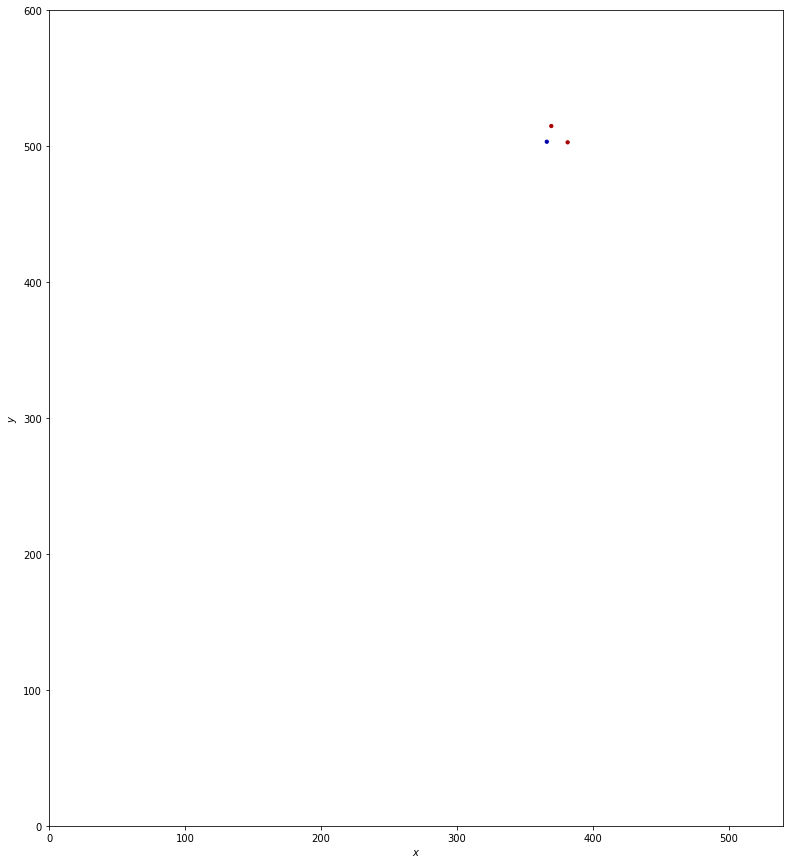

angle -28.8562719906
move (0.0705637229564684, -2.999170012020413)
357.841784304 516.230729204
35
yes -1 (354.2378, 515.3702)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


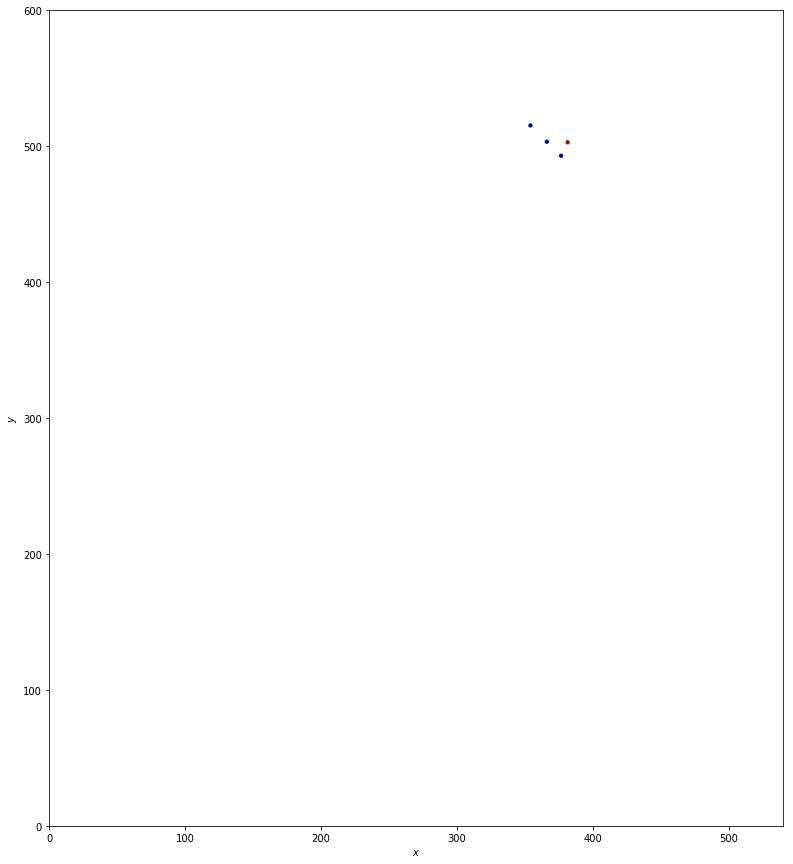

angle -88.6522078657
move (1.2238237116601249, -2.7390245568045635)
359.065608016 513.491704647
36
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


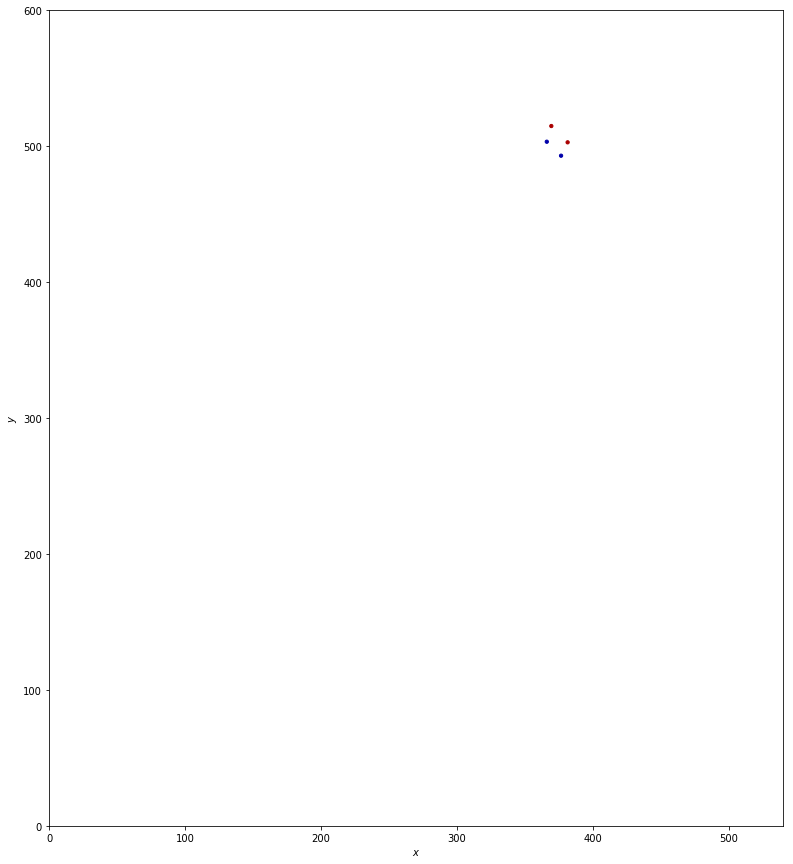

angle -65.924428006
move (2.4680553906878506, -1.705491890481055)
361.533663406 511.786212757
37
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


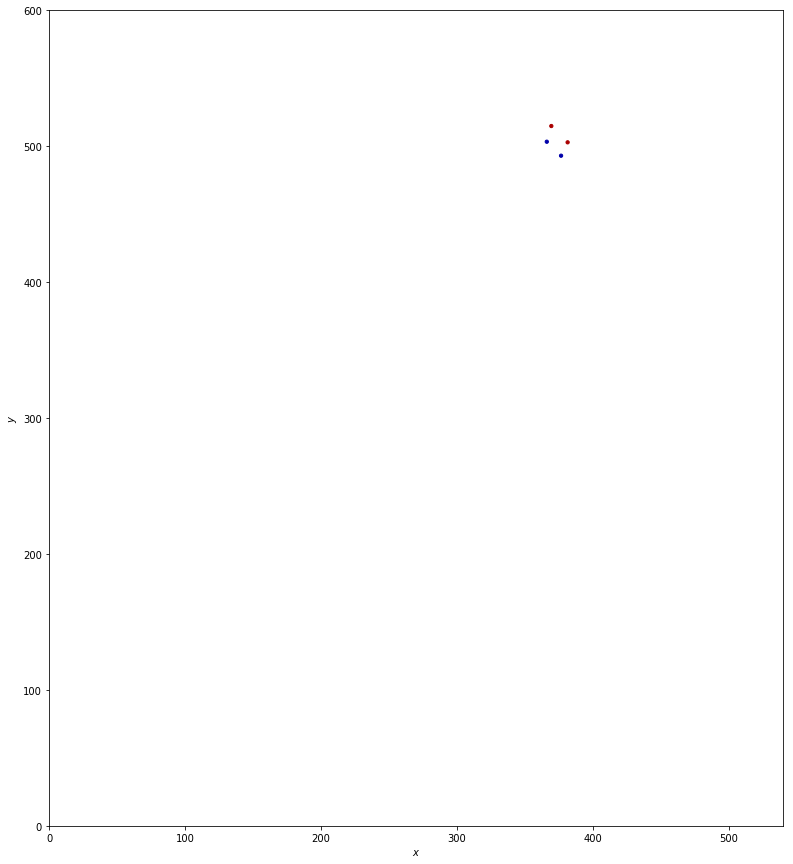

angle -34.6455040311
move (2.674926701883185, -1.3582220509004947)
364.208590108 510.427990706
38
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


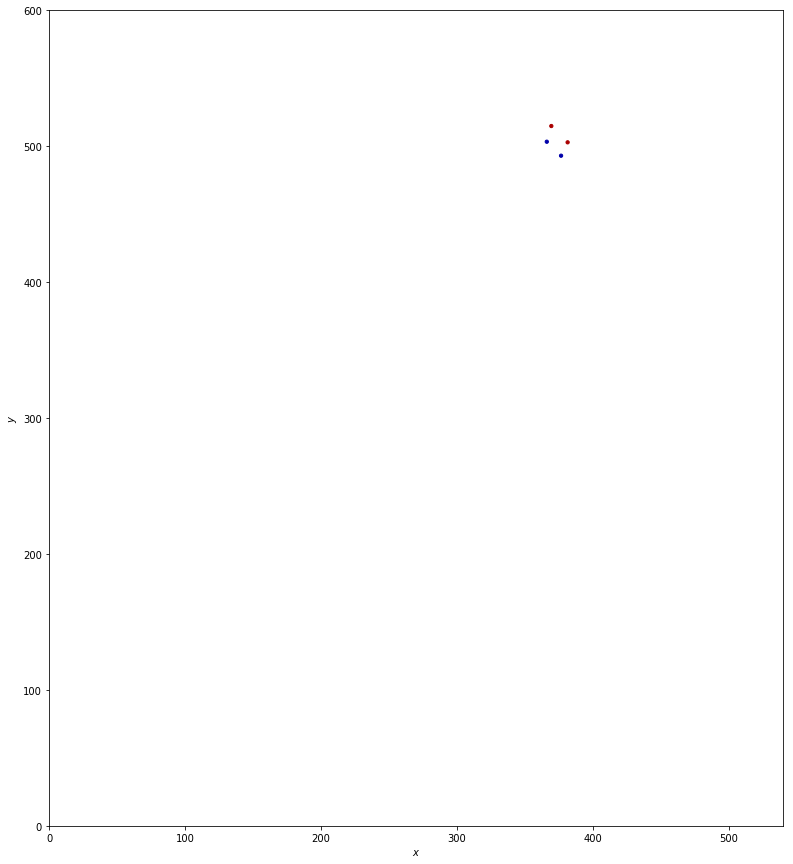

angle -26.9196598029
move (2.7999668193770493, -1.077119218279746)
367.008556927 509.350871488
39
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


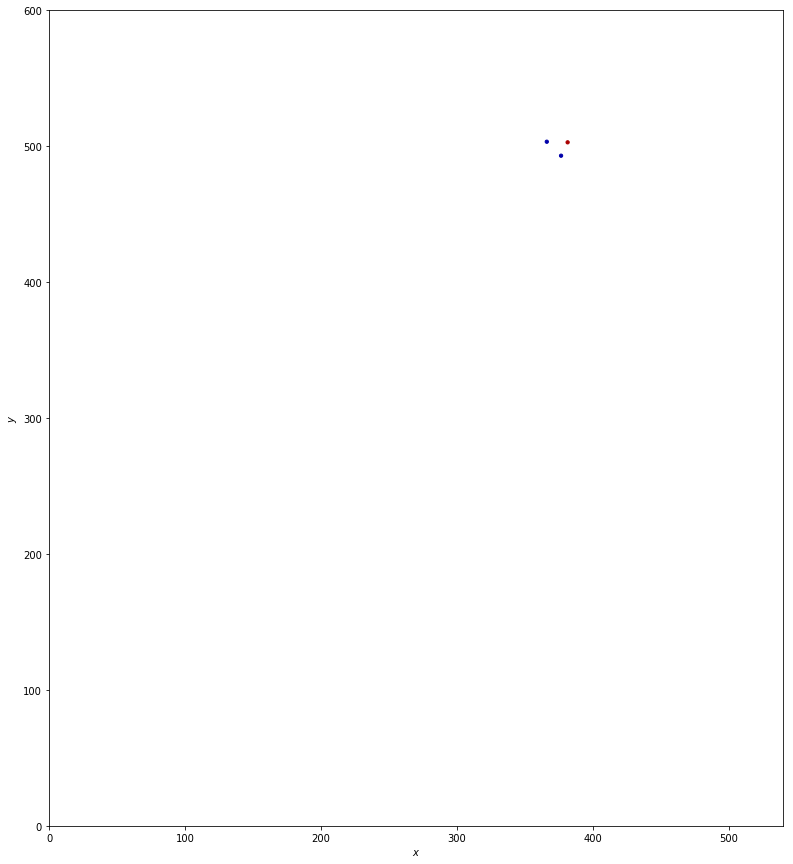

angle -21.0412348466
move (2.9022397685331756, -0.7596080080834462)
369.910796696 508.591263479
40
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


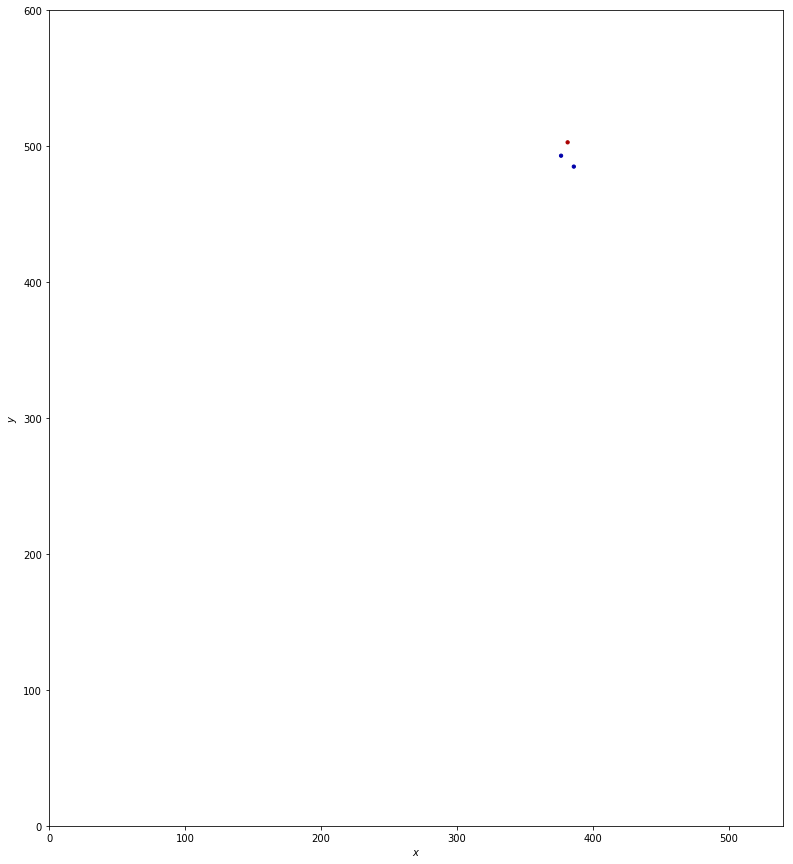

angle -14.6671109338
move (2.4456028298333896, -1.7375346899302233)
372.356399526 506.85372879
41
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


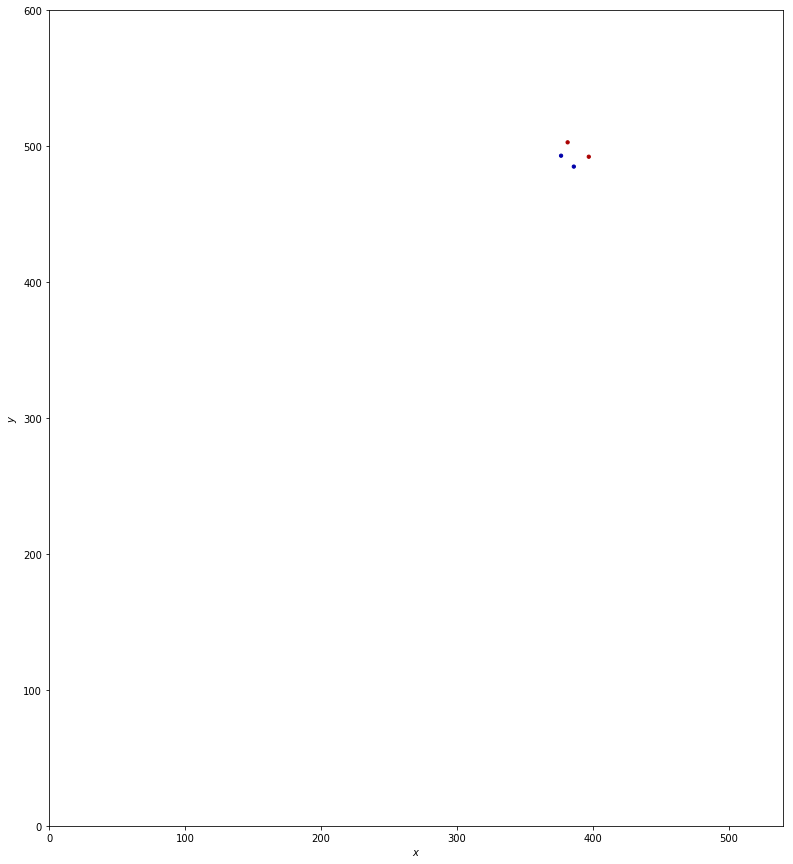

angle -35.3927644493
move (1.2074970623499652, -2.7462612483913844)
373.563896588 504.107467541
42
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


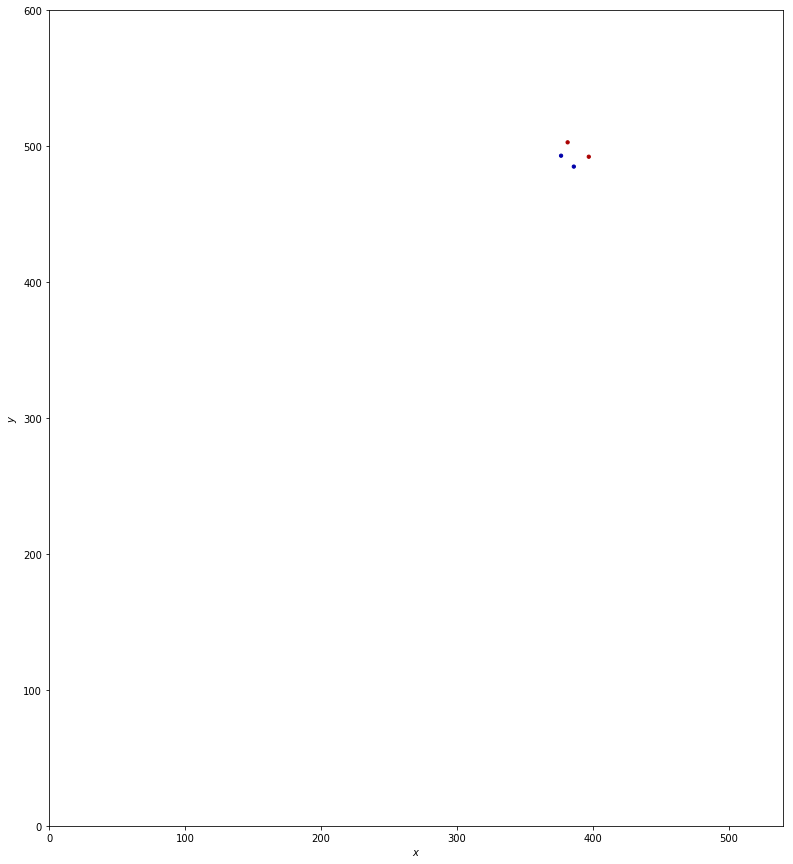

angle -66.2655024258
move (1.742523240742669, -2.442050932202616)
375.306419829 501.665416609
43
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


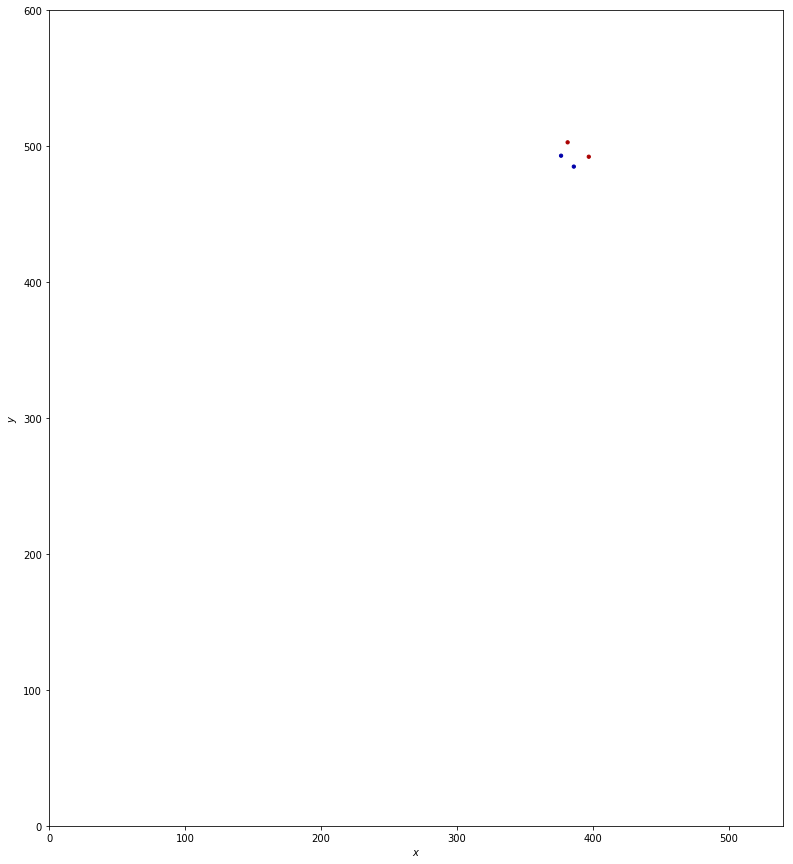

angle -54.4902784902
move (2.2220024475875442, -2.0156153211649697)
377.528422277 499.649801288
44
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


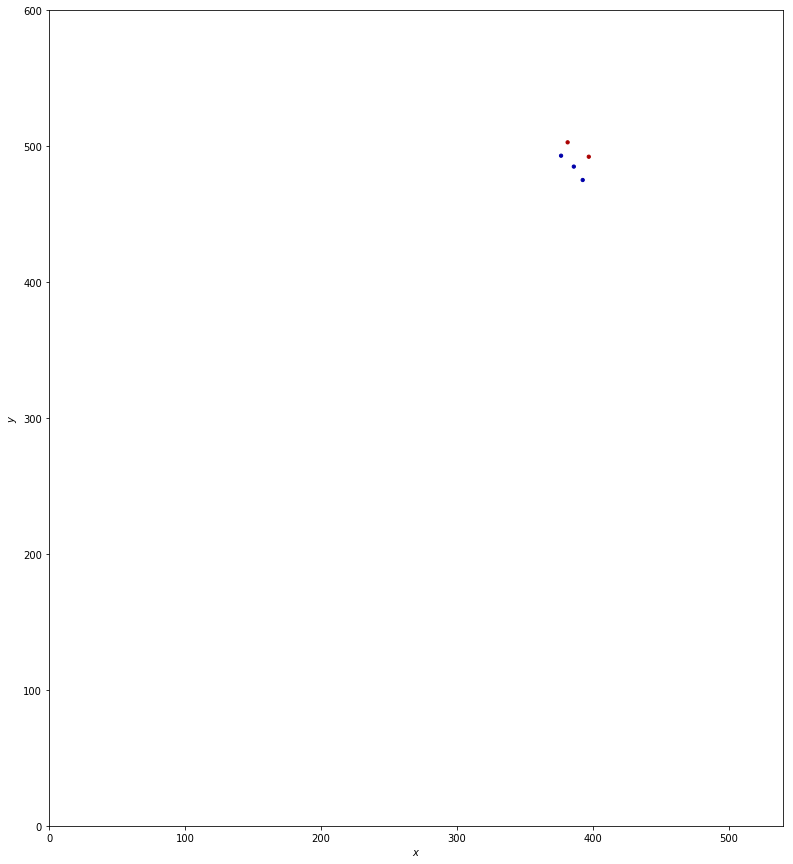

angle -42.2116940819
move (2.656862375725042, -1.3932273025090649)
380.185284652 498.256573985
45
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


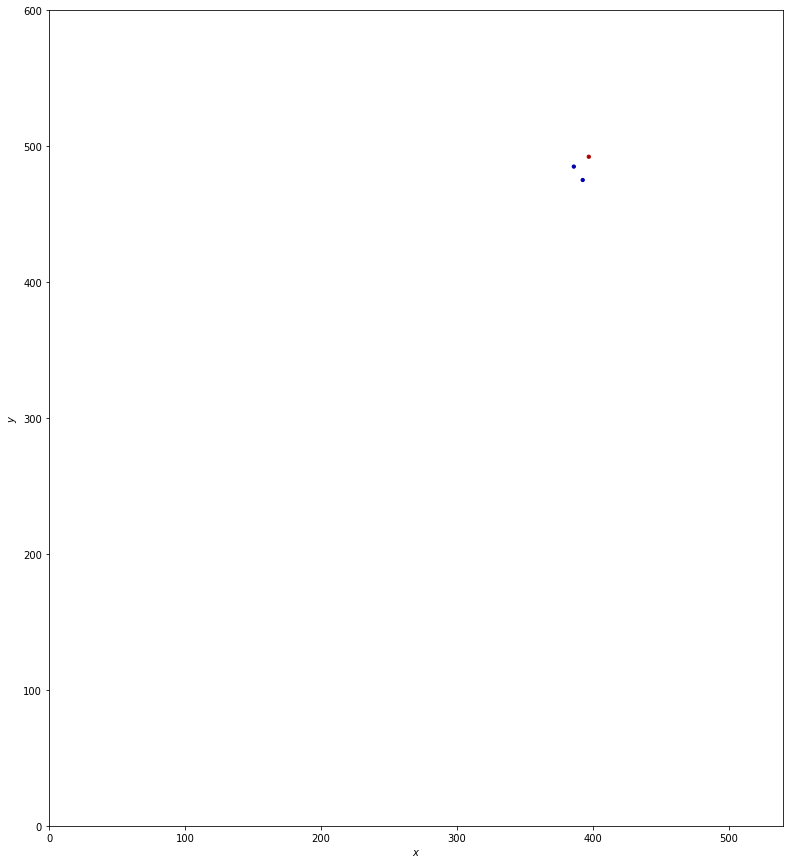

angle -27.6719867731
move (2.9911280837069327, -0.23054888171425397)
383.176412736 498.026025104
46
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


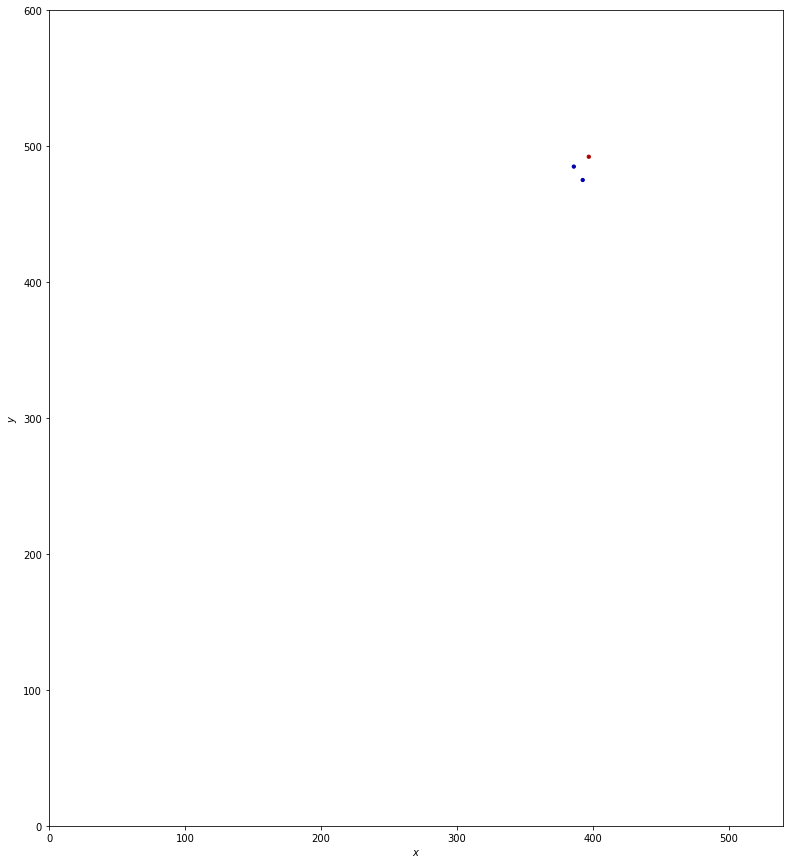

angle -4.40750493452
move (2.8235136124820239, -1.0137903531444317)
385.999926348 497.01223475
47
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


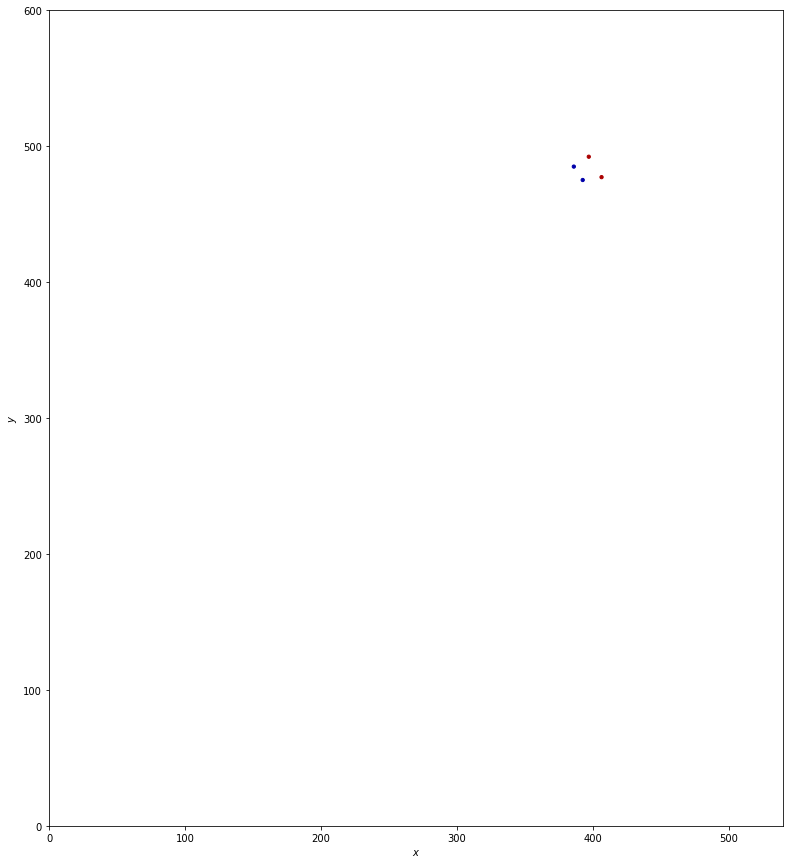

angle -19.7508157336
move (1.8728353174346206, -2.3436057419646259)
387.872761666 494.668629008
48
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


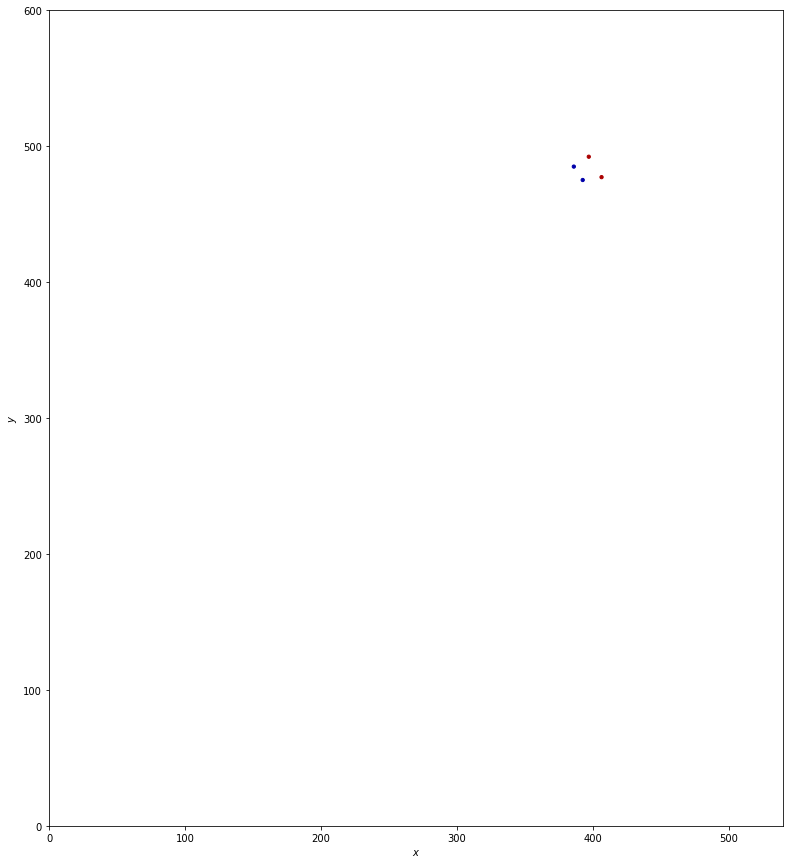

angle -51.3707536182
move (1.739185748858628, -2.4444289580527911)
389.611947415 492.22420005
49
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


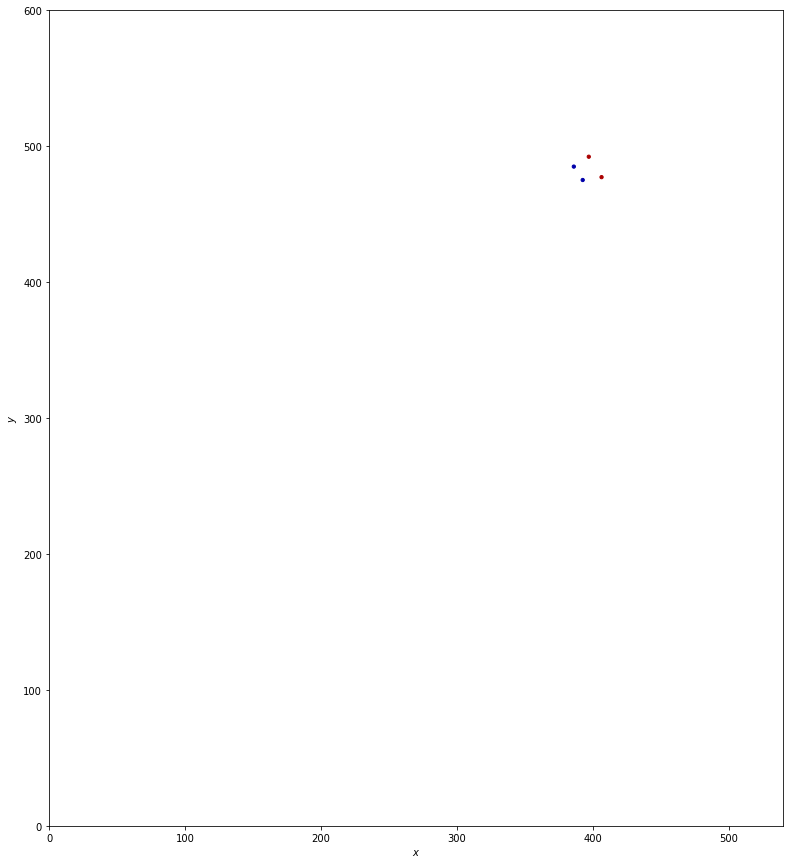

angle -54.5685451254
move (1.6761148193691071, -2.4880994980690114)
391.288062234 489.736100552
50
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)


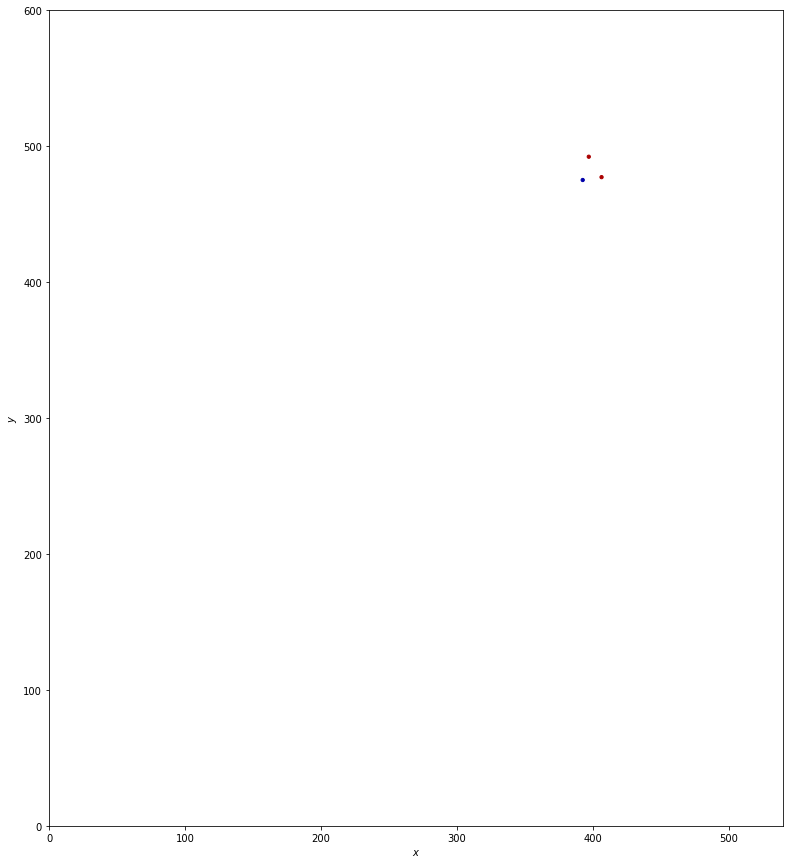

angle -56.0337170647
move (1.4767643890617195, -2.6113534688354942)
392.764826623 487.124747084
51
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)


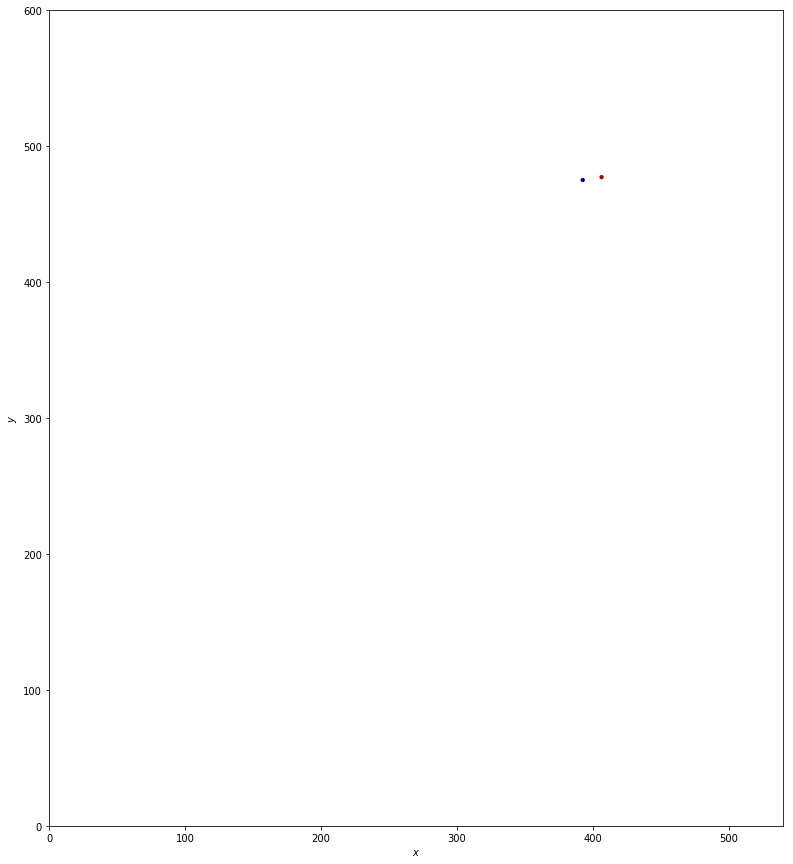

angle -60.5111091596
move (2.2532571582321816, -1.9806140913553638)
395.018083781 485.144132992
52
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)


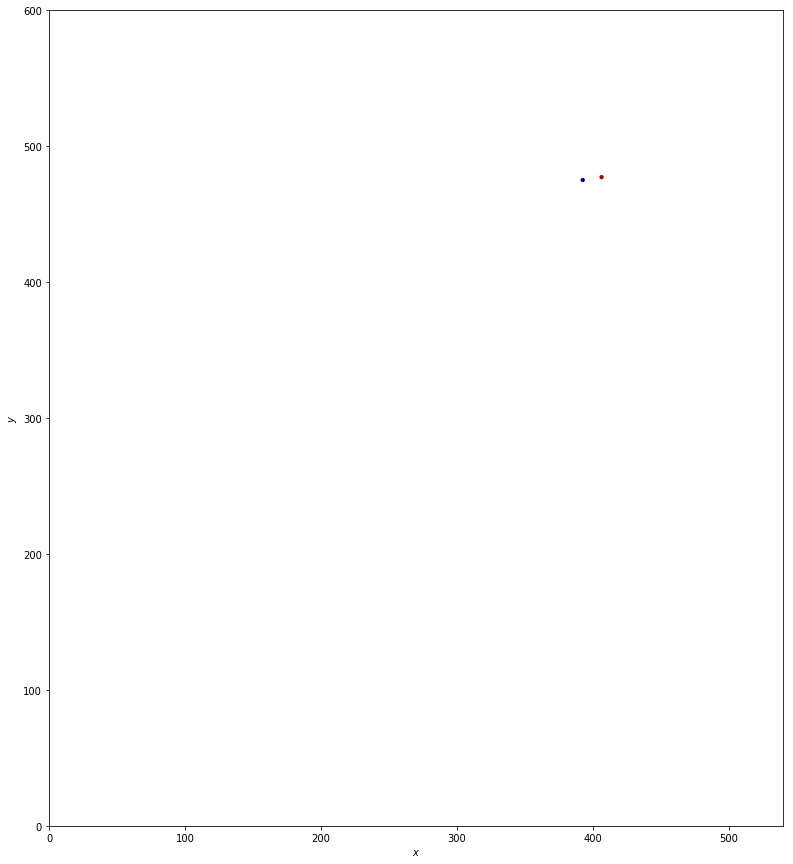

angle -41.3154860251
move (1.7715106903673774, -2.4211050935294192)
396.789594472 482.723027899
53
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)


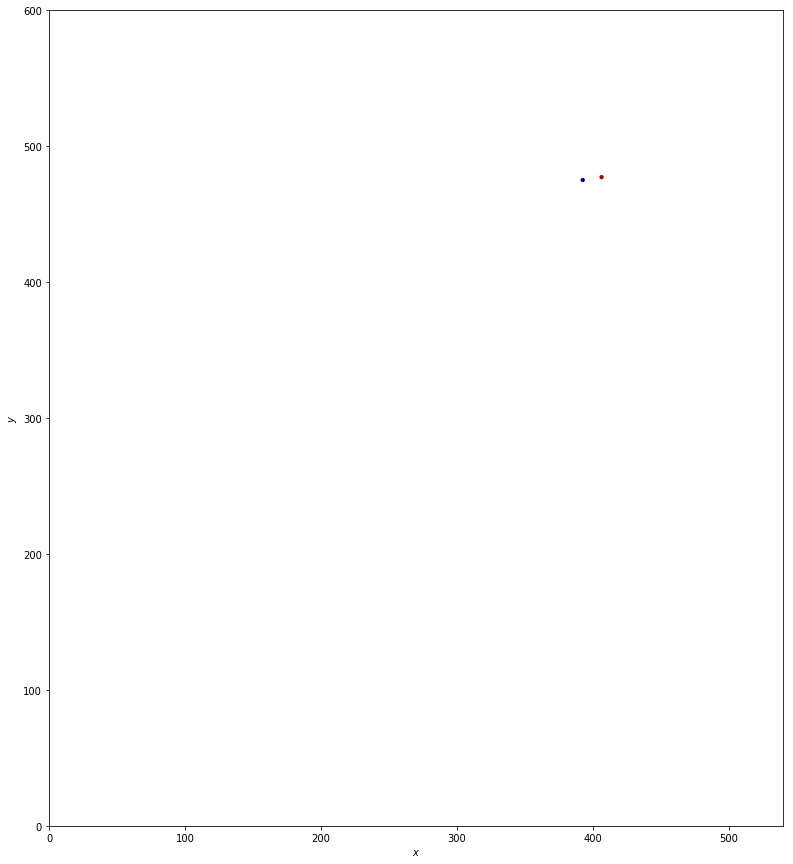

angle -53.8072492621
move (1.2688604461786304, -2.7184541872401247)
398.058454918 480.004573711
54
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)


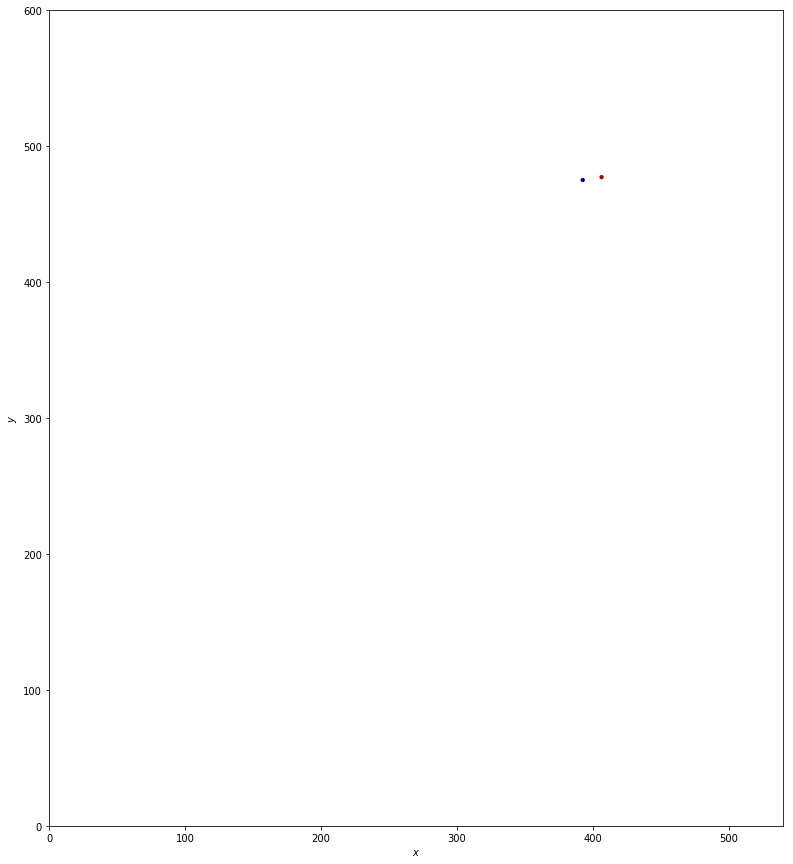

angle -64.9788059125
move (0.83031409898147579, -2.8828073985323024)
398.888769017 477.121766313
55
yes 1 (406.5297, 477.3002)


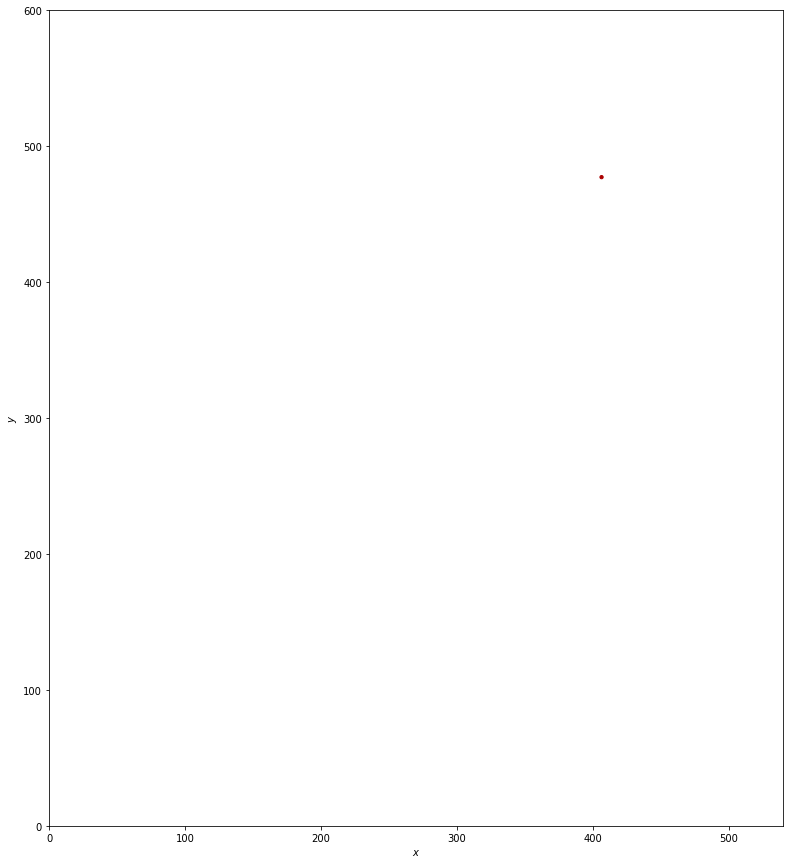

angle -73.9323961156
move (0.070037952680056706, -2.9991823361016894)
398.95880697 474.122583977
56


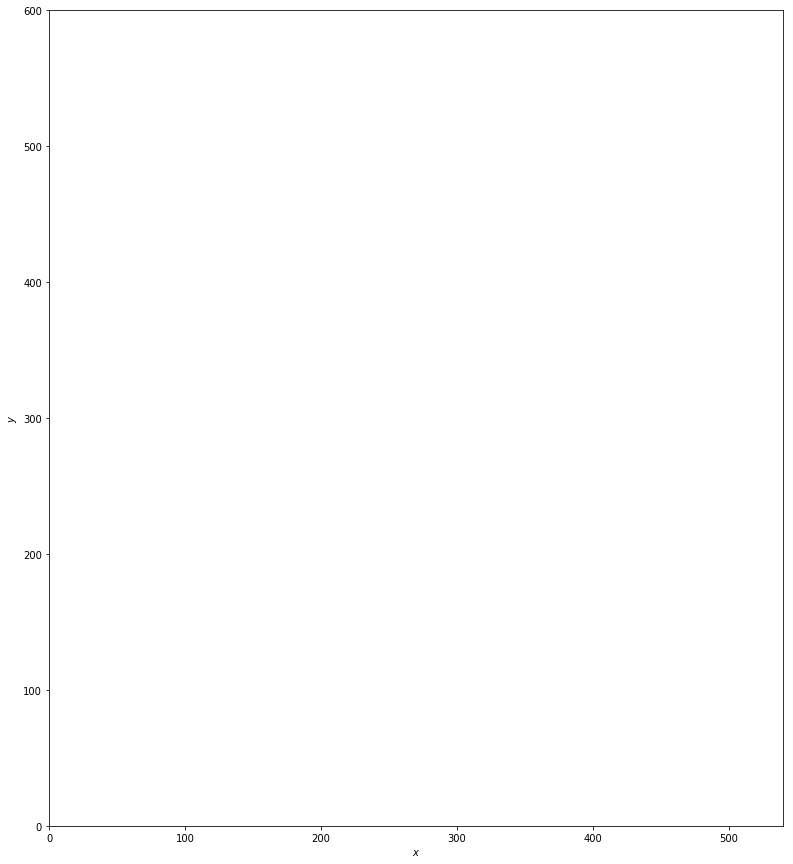

angle -88.6622520966
move (3.0, 0.0)
401.95880697 474.122583977
57
yes 1 (406.5297, 477.3002)


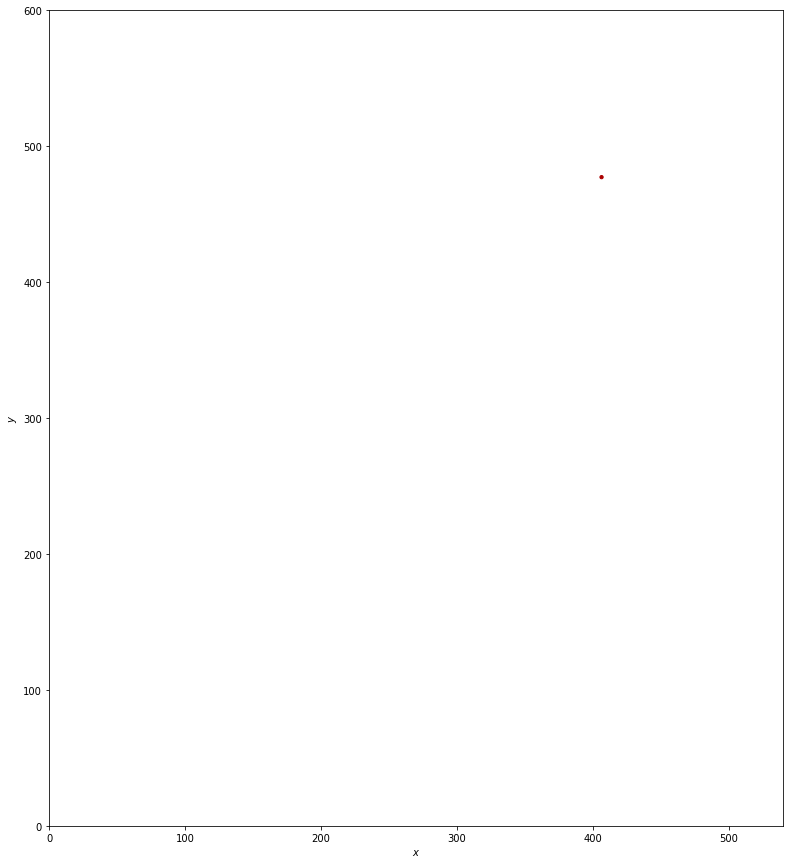

angle 0.0
move (1.7124178035186832, -2.4632550144457737)
403.671224773 471.659328962
58
yes 1 (401.5797, 444.1501)


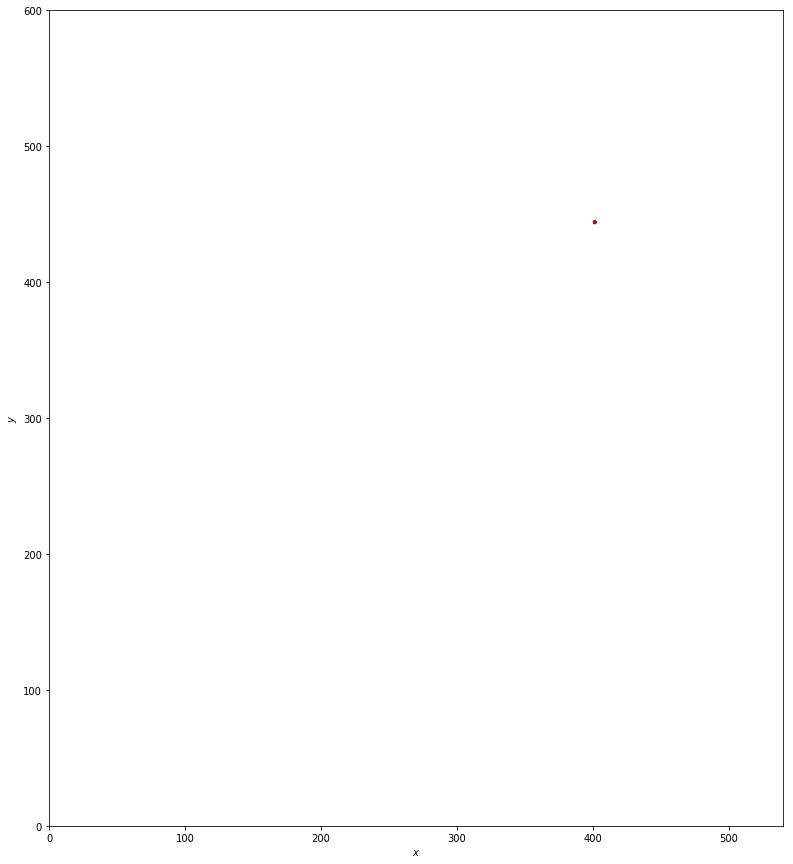

angle -55.1935548425
move (-2.9913665858797049, 0.22743339438701304)
400.679858187 471.886762357
59
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


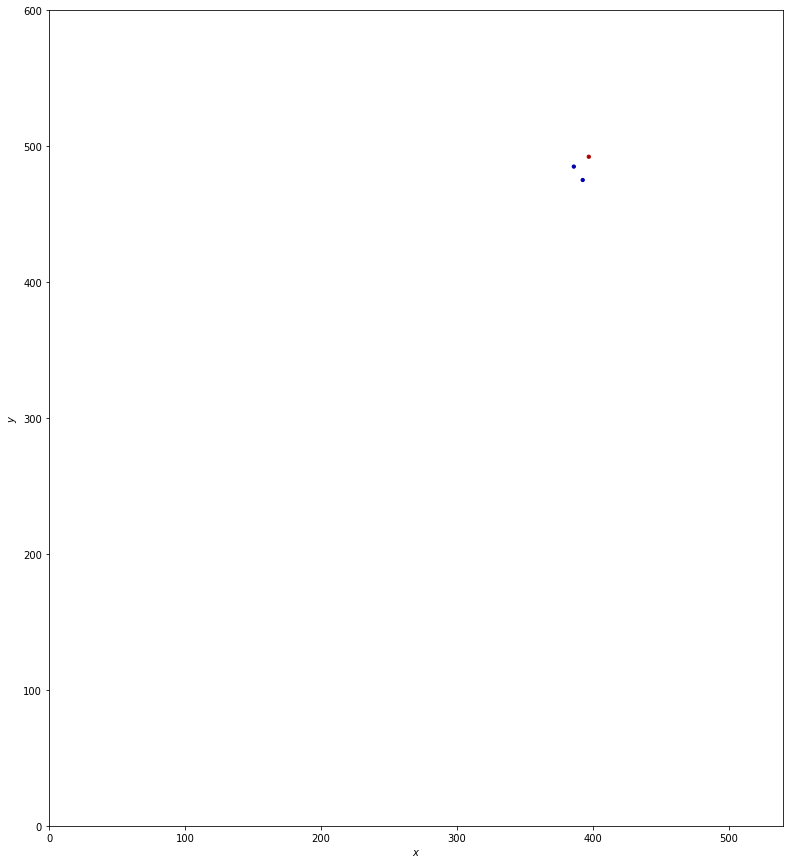

angle 175.652170592
move (-0.73412085026410834, -2.9087912570701087)
399.945737337 468.9779711
60
yes 1 (401.5797, 444.1501)


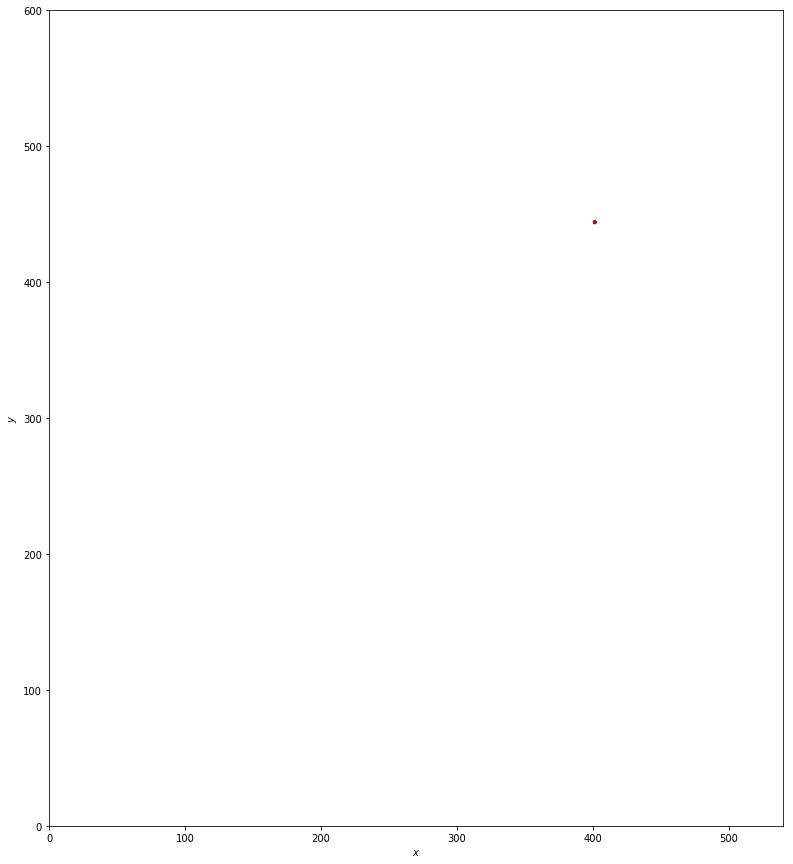

angle -104.164516057
move (-2.9935242720986222, -0.19700871137189424)
396.952213065 468.780962388
61
yes -1 (392.6697, 475.2002)
yes -1 (386.1294, 485.0703)


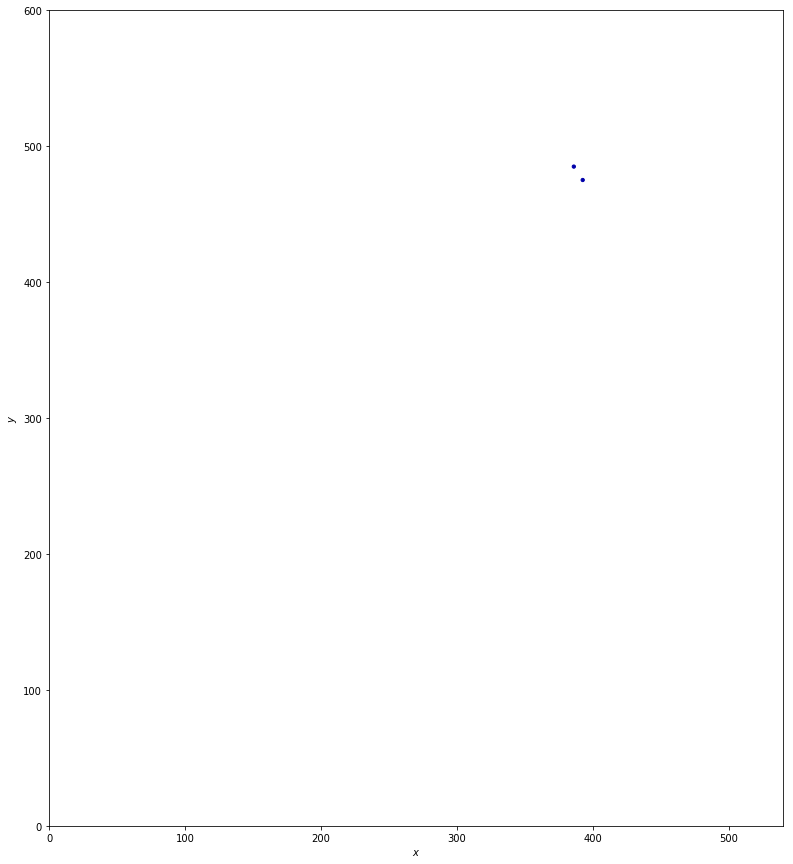

angle -176.234701152
move (-2.4963844775172808, -1.6637501436245685)
394.455828587 467.117212245
62
yes 1 (401.5797, 444.1501)


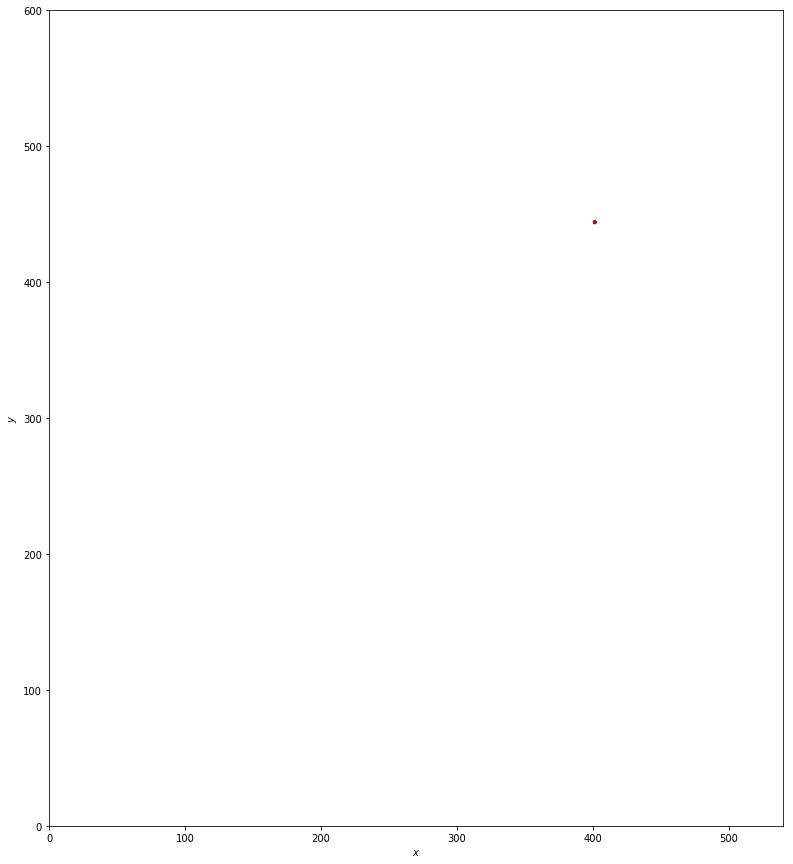

angle -146.317976092
move (-2.8653284540641168, -0.88875916328921001)
391.590500133 466.228453081
63


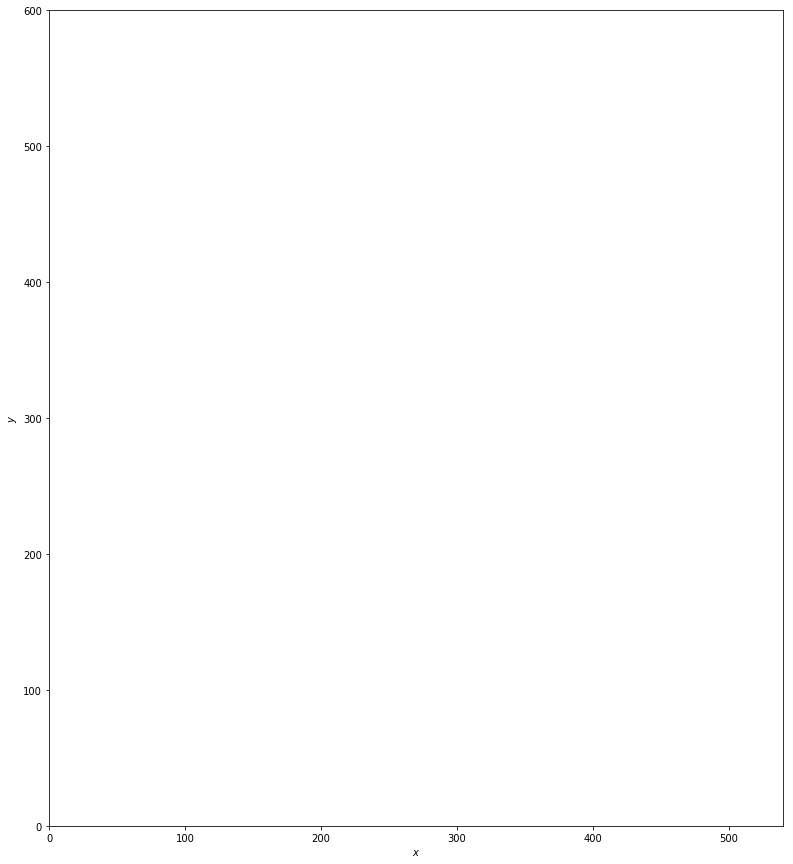

angle -162.767308785
move (3.0, 0.0)
394.590500133 466.228453081
64
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)


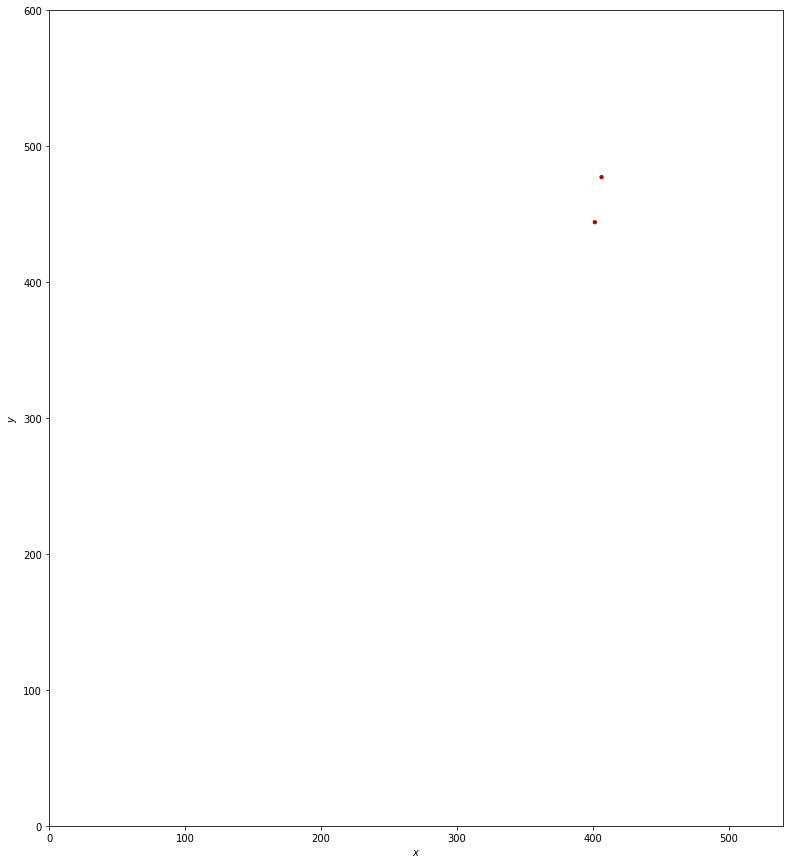

angle 0.0
move (0.17769540686007856, -2.9947327664385734)
394.76819554 463.233720315
65
yes 1 (401.5797, 444.1501)


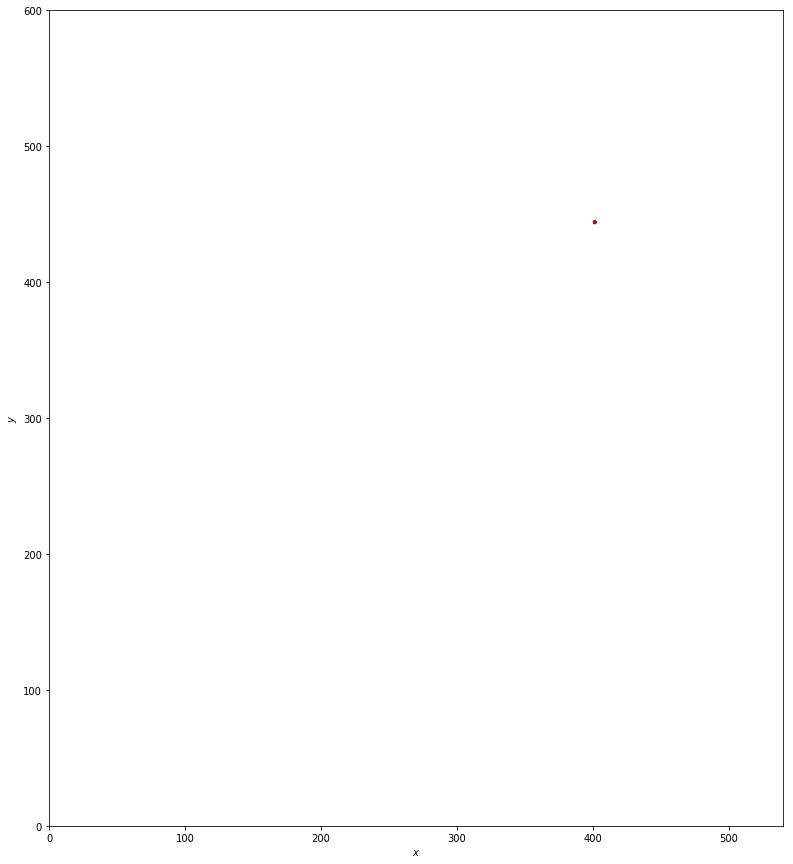

angle -86.6042801445
move (-2.8254167453002434, -1.0084742016417563)
391.942778795 462.225246113
66


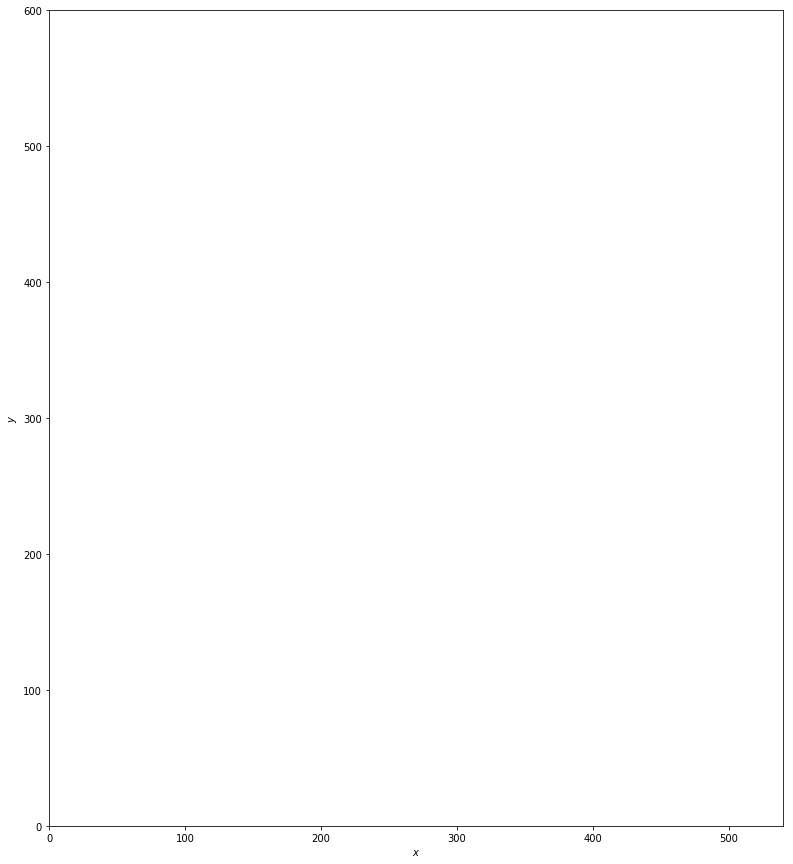

angle -160.357025197
move (3.0, 0.0)
394.942778795 462.225246113
67
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)


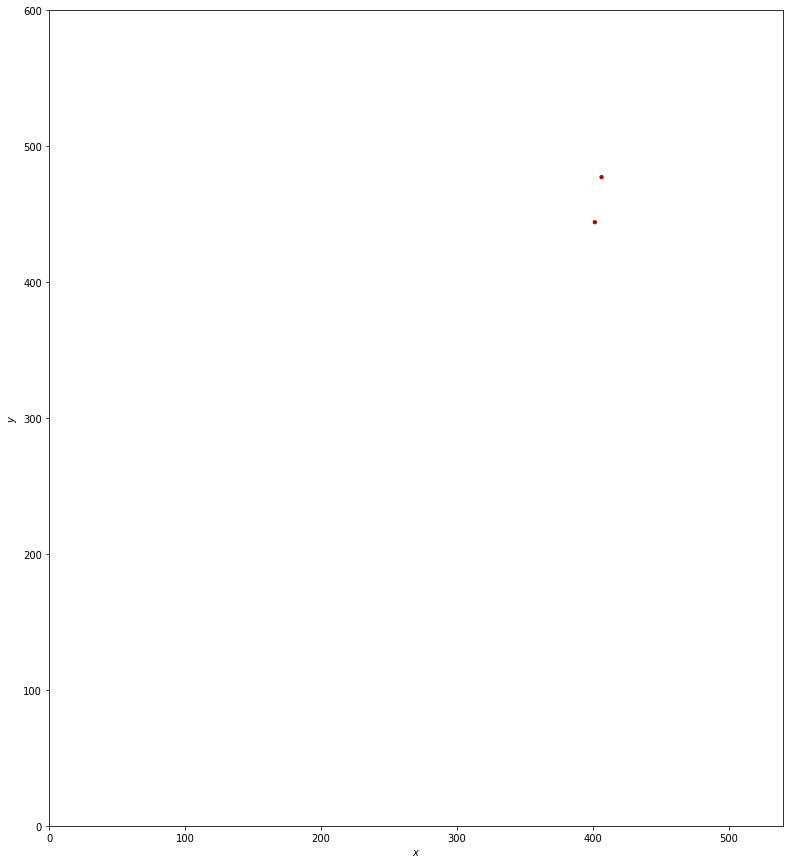

angle 0.0
move (-0.41254553494005575, -2.9714989788995423)
394.53023326 459.253747134
68
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes -1 (386.1294, 485.0703)


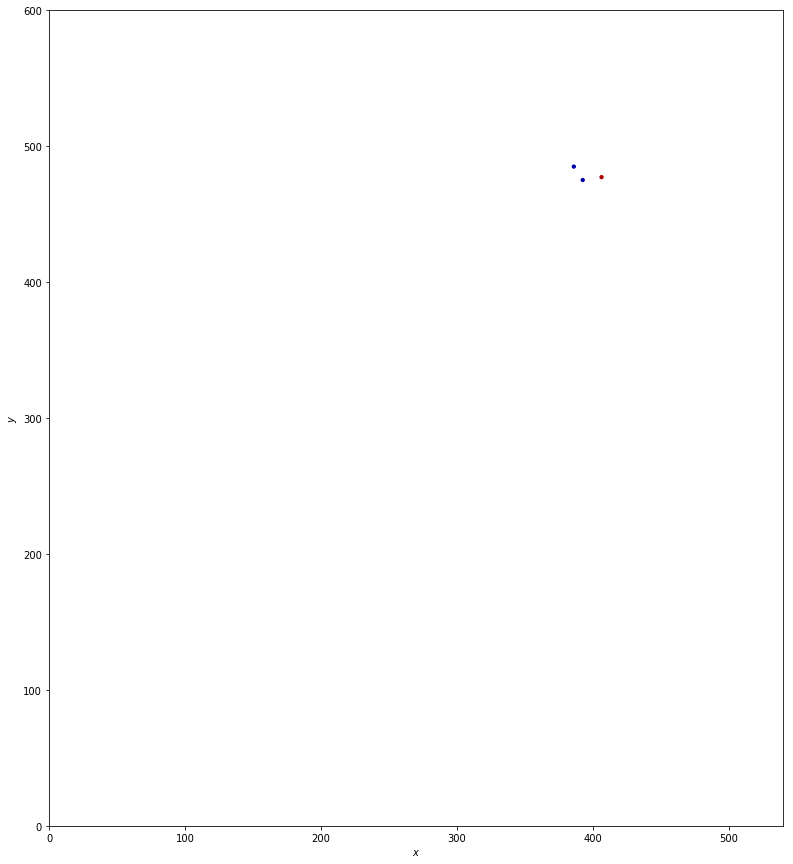

angle -97.9040857271
move (-2.4276093837438788, -1.7625869283410287)
392.102623876 457.491160206
69


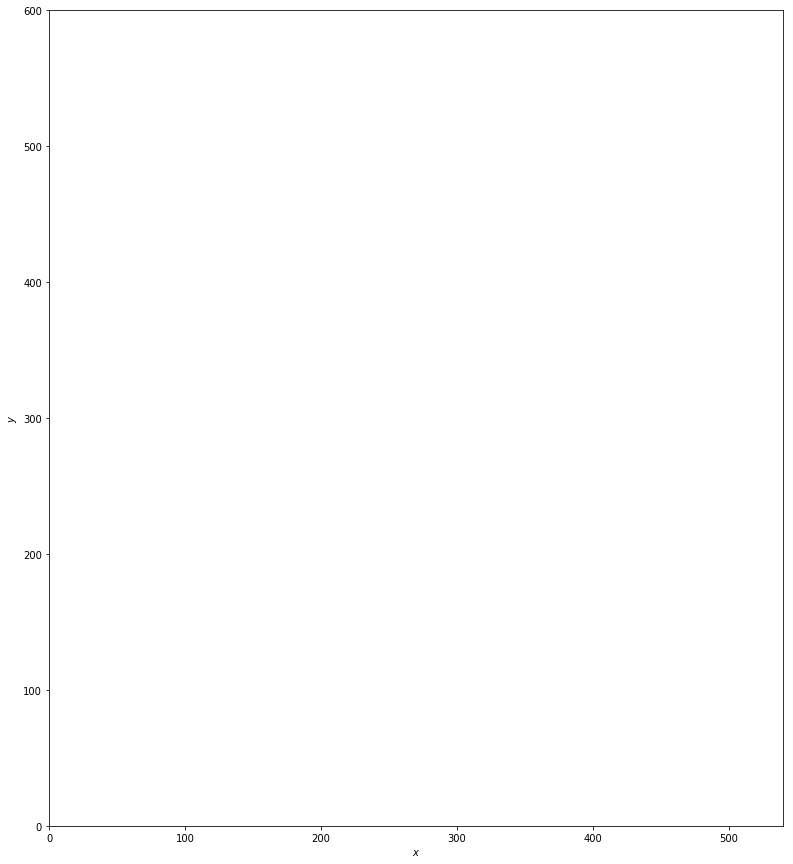

angle -144.01814777
move (3.0, 0.0)
395.102623876 457.491160206
70
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)


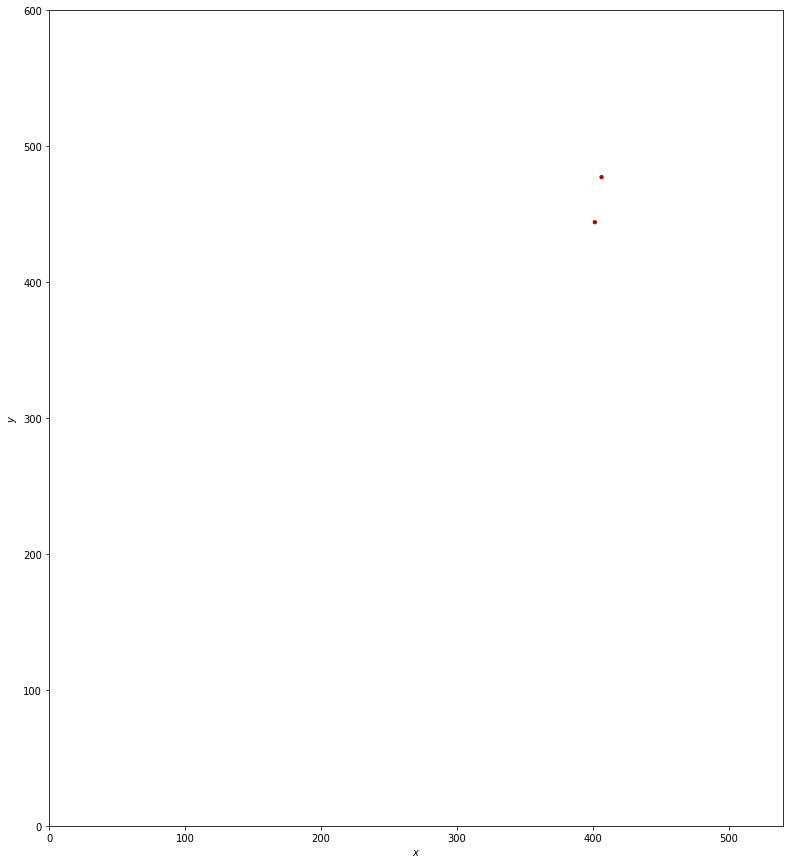

angle 0.0
move (-1.3921206095852363, -2.657442418636391)
393.710503267 454.833717787
71
yes 1 (401.5797, 444.1501)


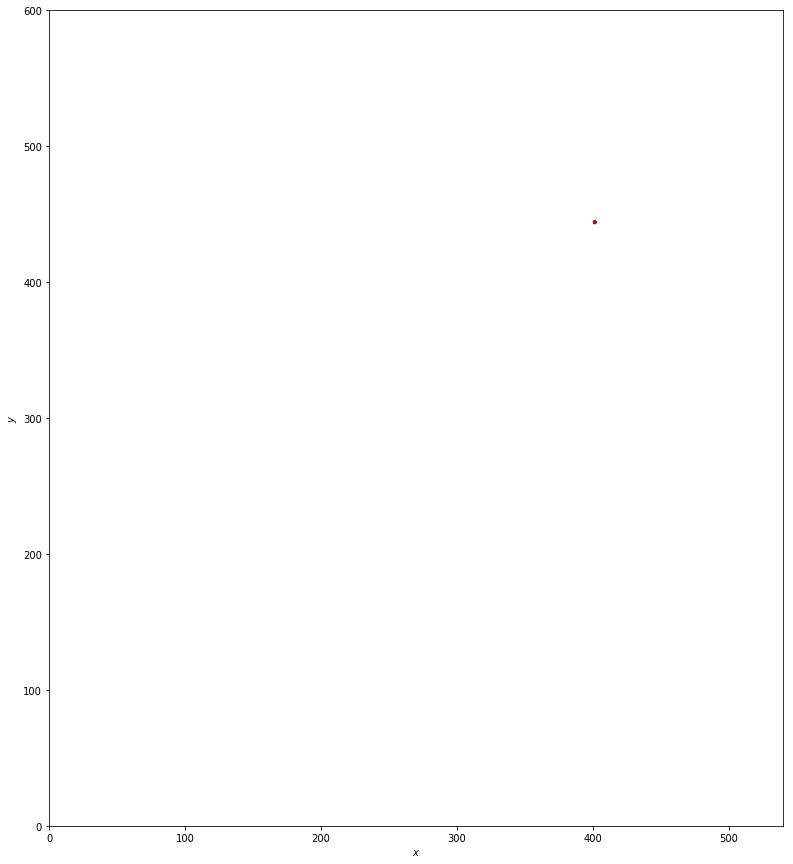

angle -117.64812332
move (-2.4154852025465532, -1.7791658821702483)
391.295018064 453.054551905
72


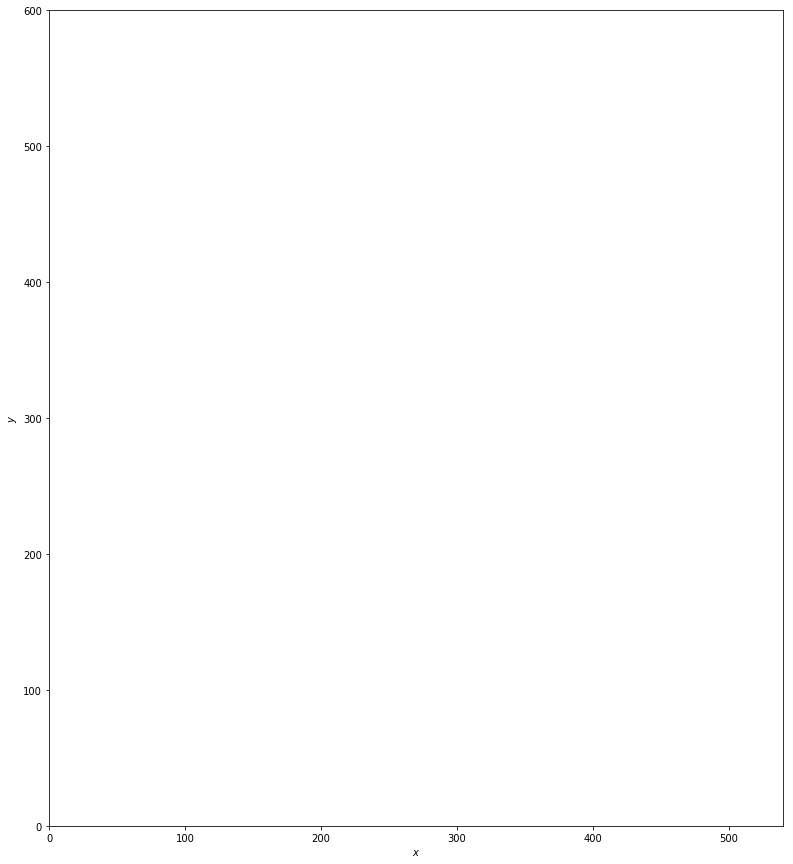

angle -143.625877763
move (3.0, 0.0)
394.295018064 453.054551905
73
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)


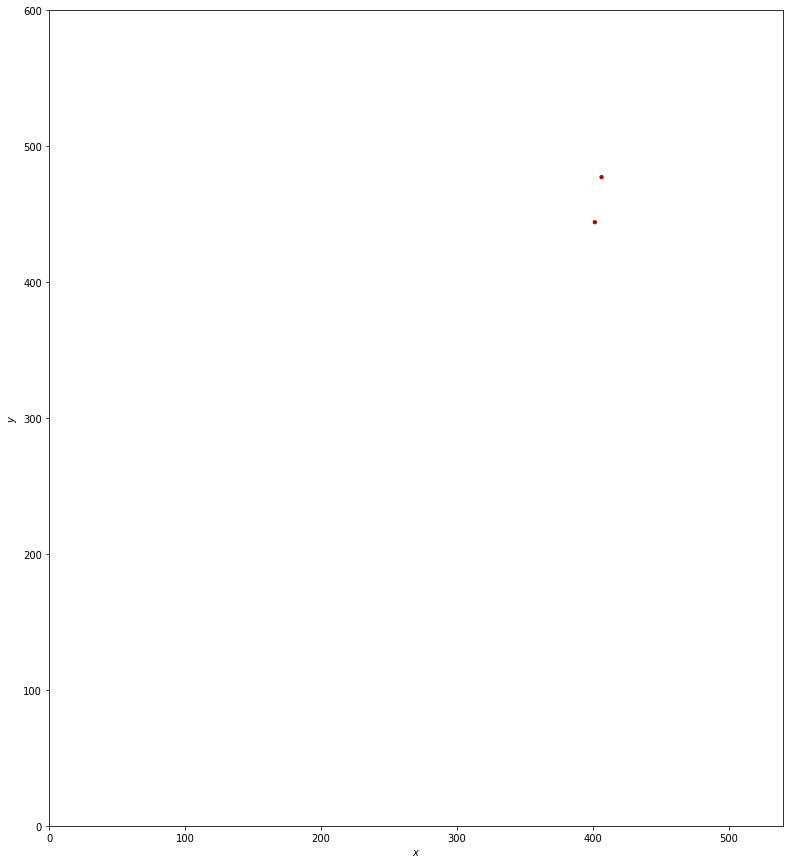

angle 0.0
move (-1.4929049548371069, -2.6021596407259135)
392.802113109 450.452392264
74
yes -1 (405.9587, 423.7502)


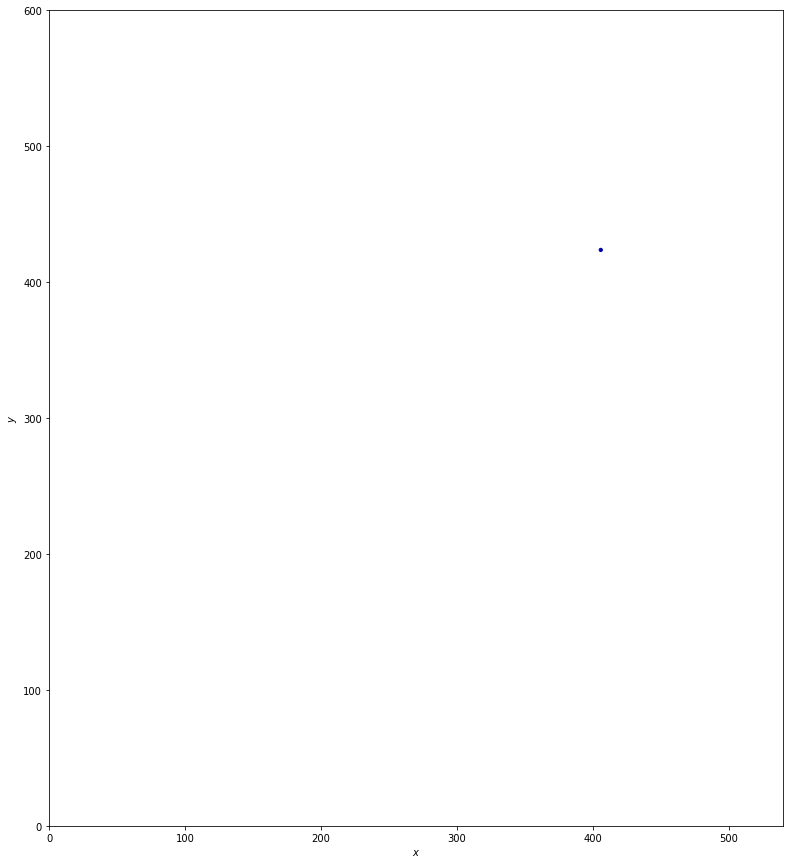

angle -119.843654825
move (2.6910768893031642, 1.3259355851090218)
395.493189999 451.77832785
75
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


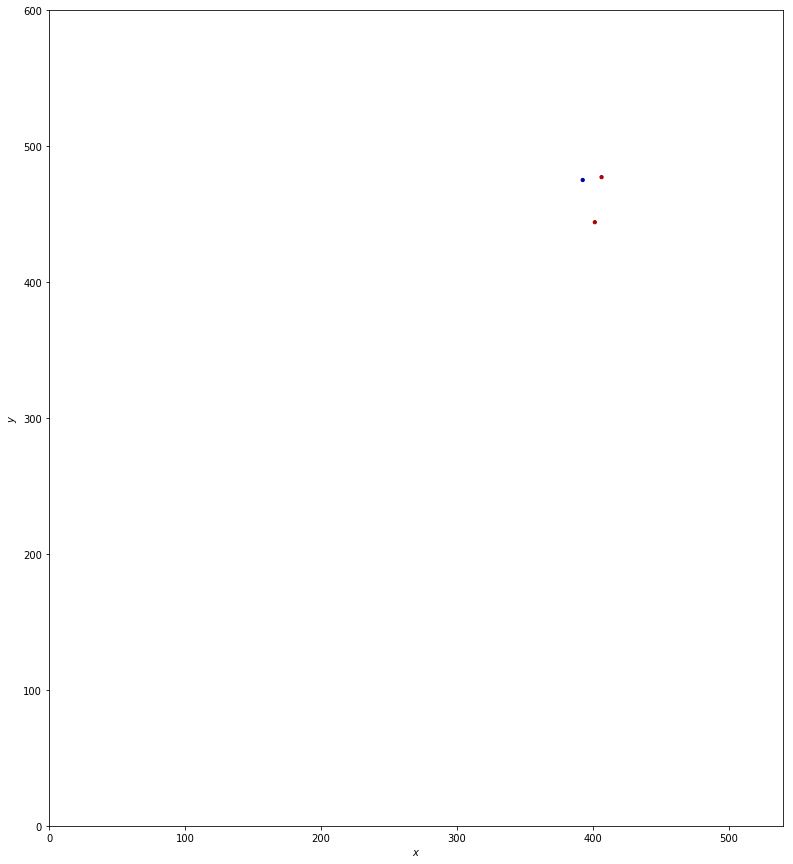

angle 26.2301873227
move (-2.2298762835995349, -2.0069010338928841)
393.263313715 449.771426816
76
yes -1 (405.9587, 423.7502)


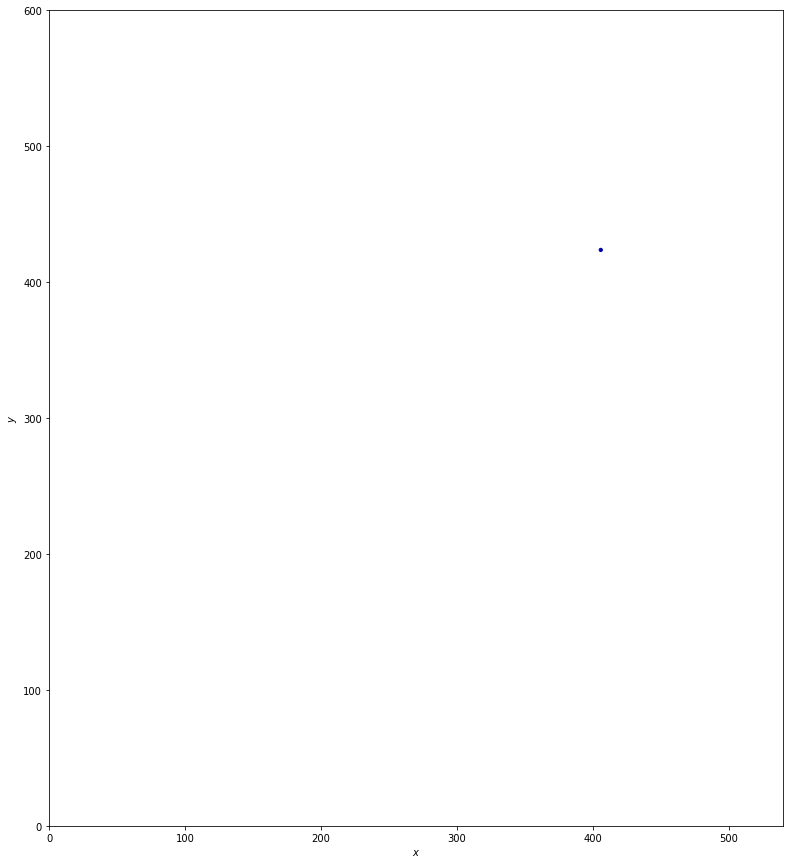

angle -138.012611778
move (2.6962193896446625, 1.315447073395263)
395.959533105 451.086873889
77
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


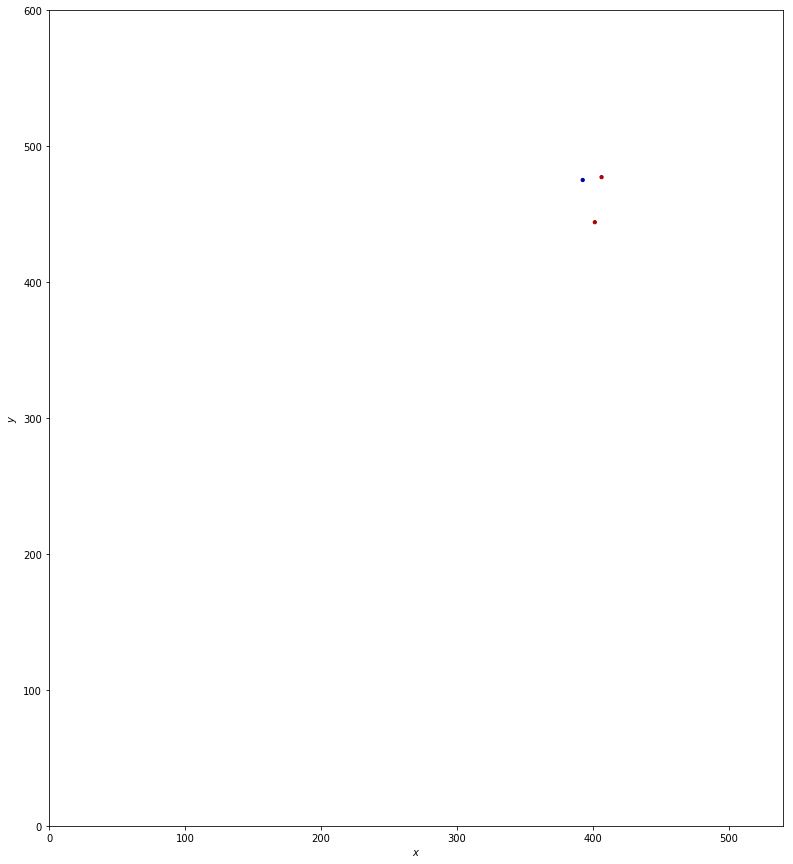

angle 26.0070896261
move (-2.2215773219362562, -2.0160838778826964)
393.737955783 449.070790011
78
yes -1 (405.9587, 423.7502)


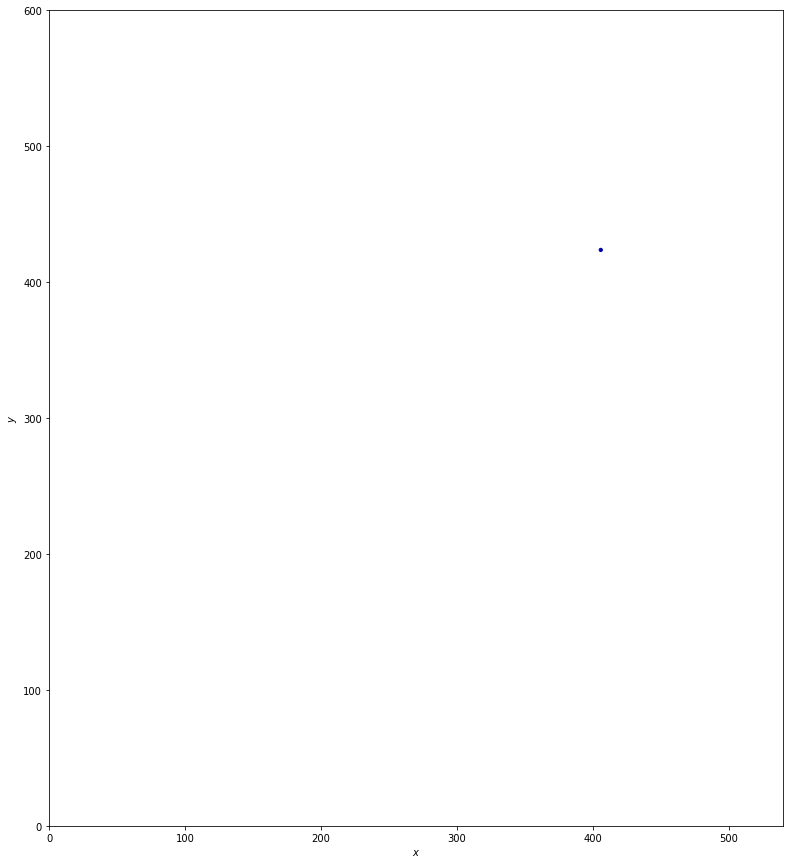

angle -137.776222722
move (2.7017797596505178, 1.3039885468602825)
396.439735542 450.374778558
79
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


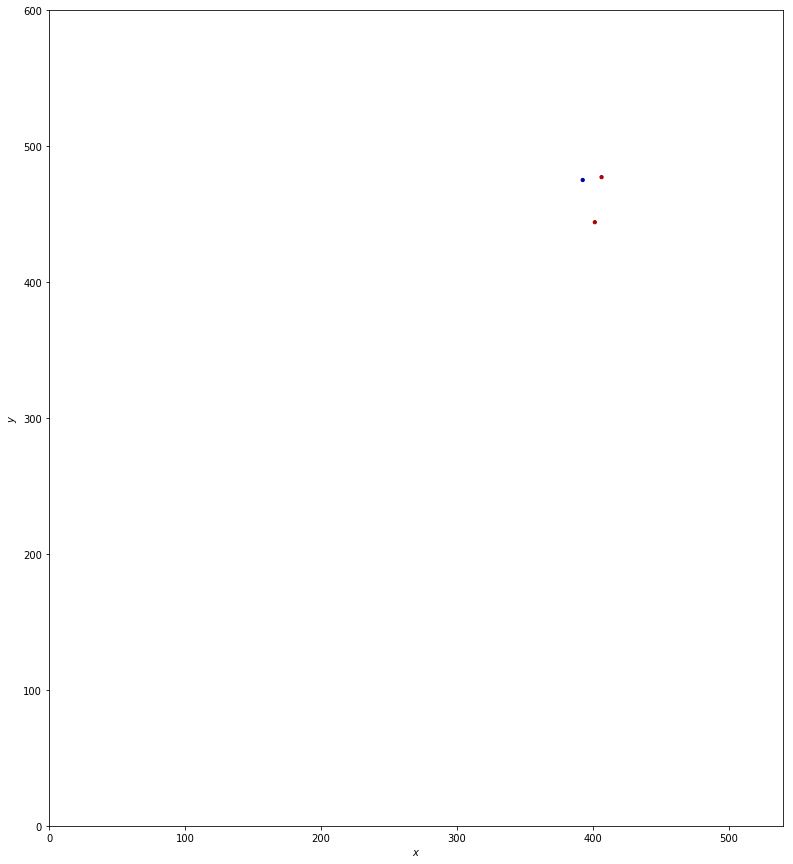

angle 25.7638423763
move (-2.2121466334397506, -2.0264272185699581)
394.227588909 448.34835134
80
yes -1 (405.9587, 423.7502)


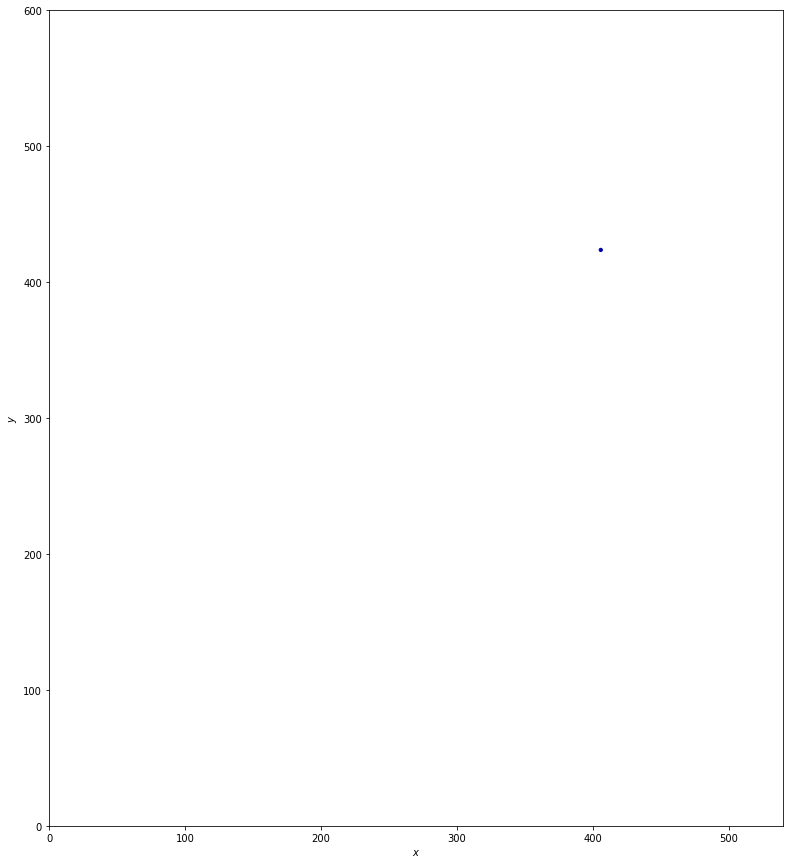

angle -137.508894987
move (2.7078245137788888, 1.291389330364056)
396.935413423 449.63974067
81
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


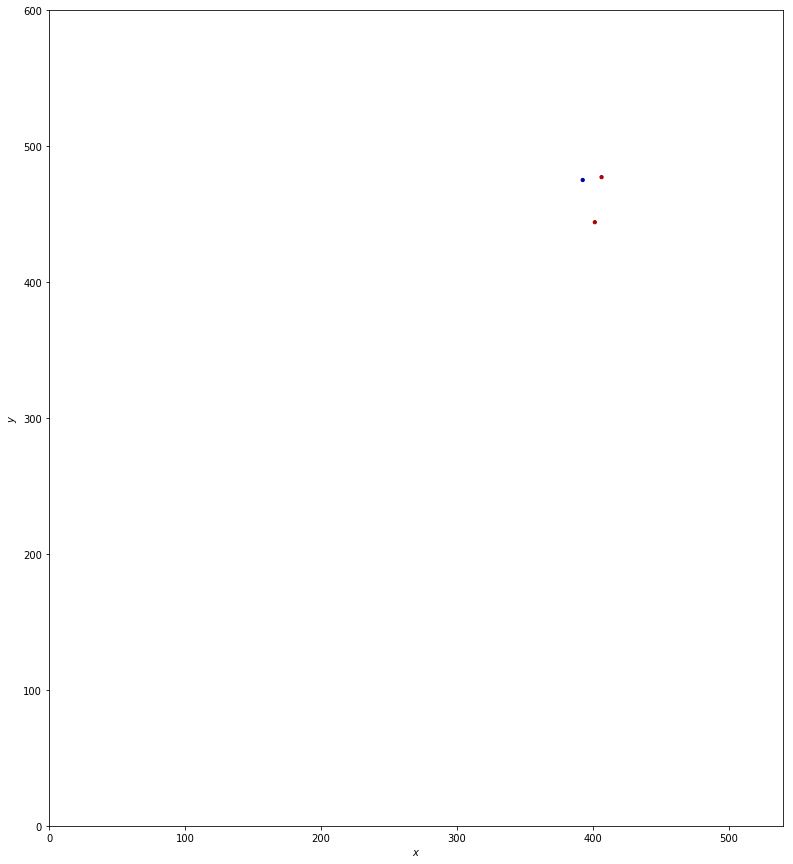

angle 25.4969538615
move (-2.1995505566022118, -2.0400924853915079)
394.735862866 447.599648184
82
yes -1 (405.9587, 423.7502)


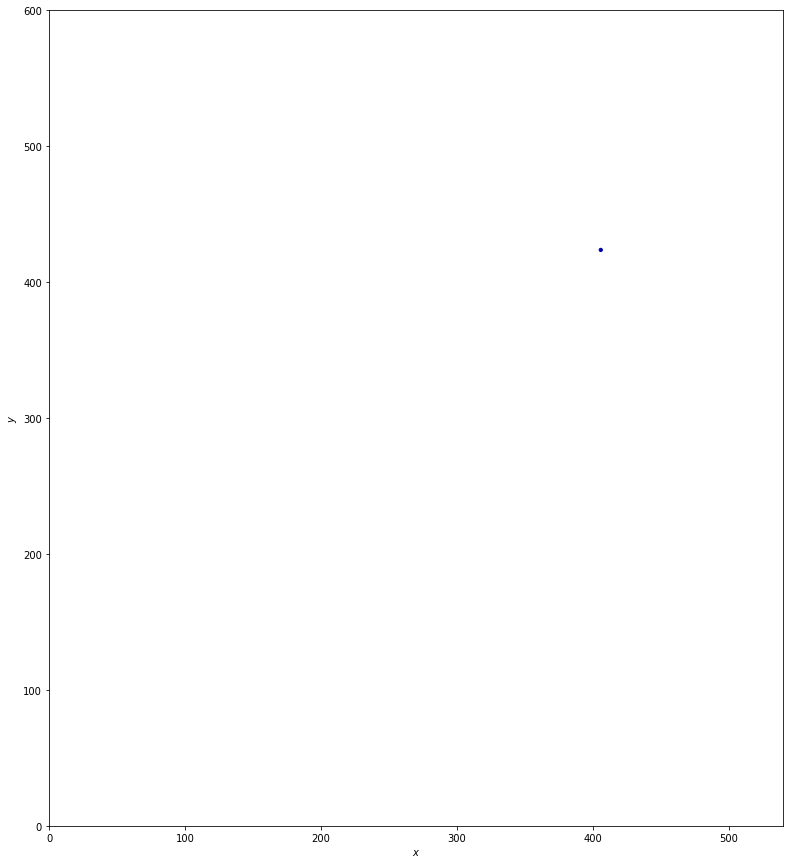

angle -137.153947865
move (2.7144750759015839, 1.2773507984532246)
397.450337942 448.876998983
83
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


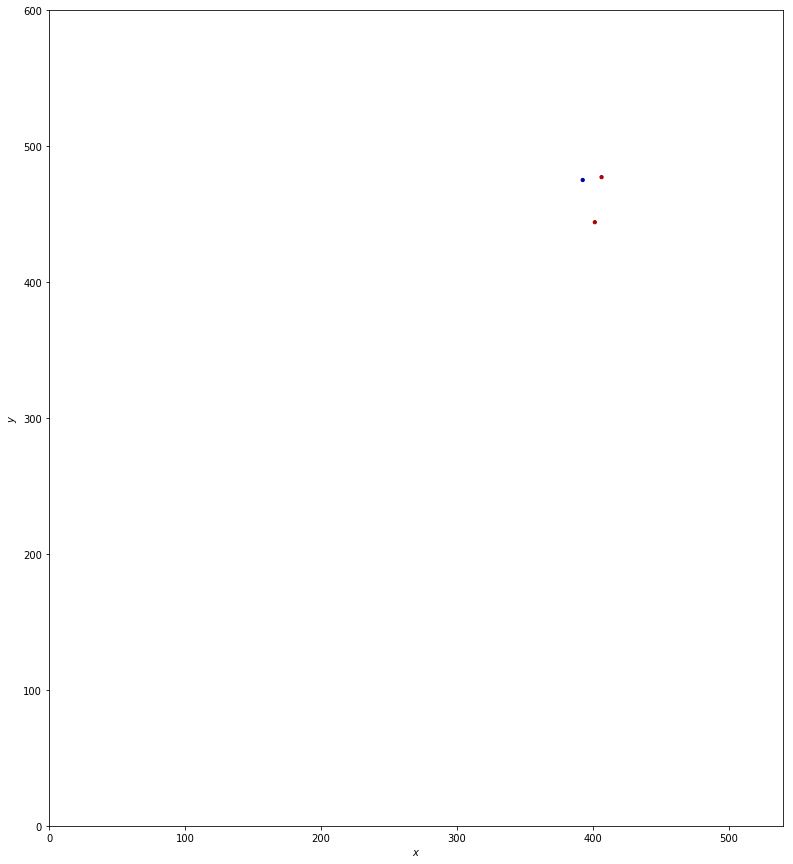

angle 25.2002727879
move (-2.1806296255772954, -2.0603044522726792)
395.269708316 446.816694531
84
yes -1 (405.9587, 423.7502)


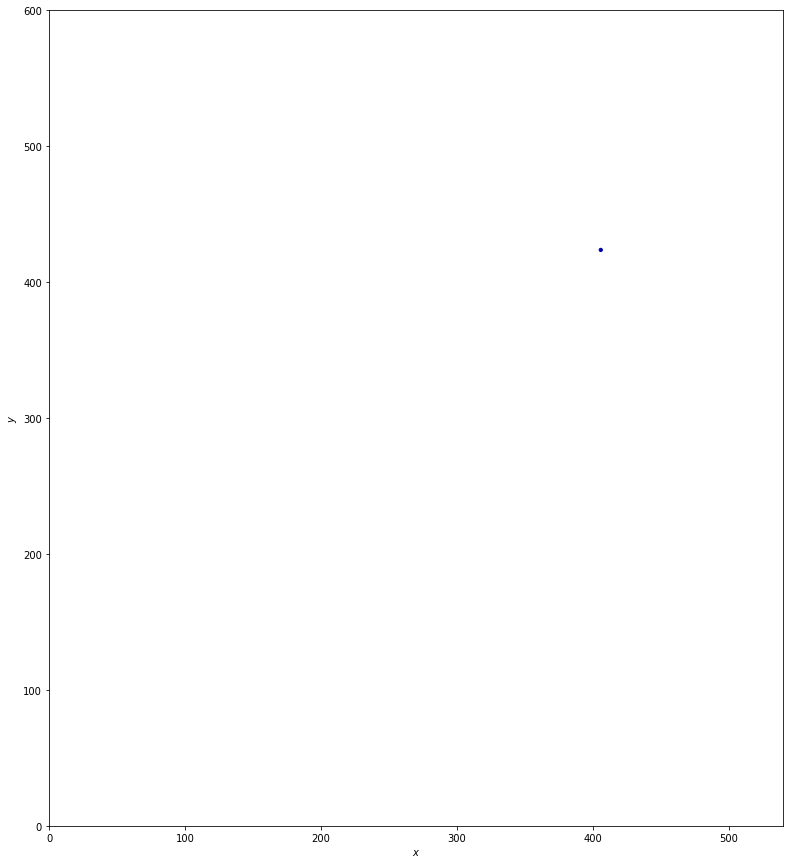

angle -136.625178668
move (2.7219480004279113, 1.2613481212442883)
397.991656317 448.078042652
85
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


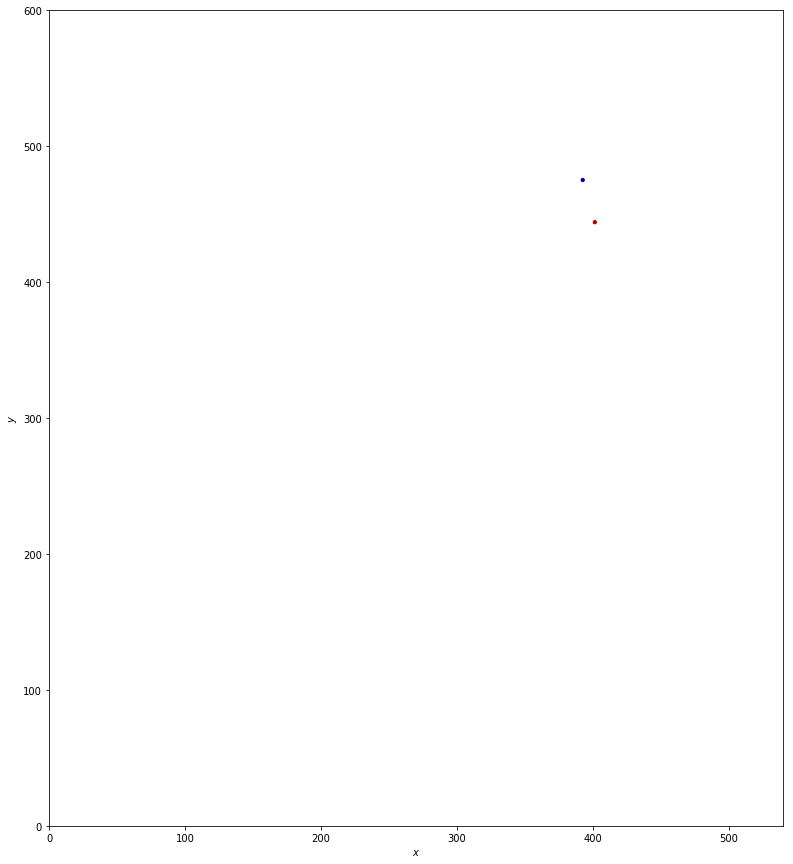

angle 24.8629615802
move (-2.3403162830723674, -1.8769442440270669)
395.651340034 446.201098408
86
yes -1 (405.9587, 423.7502)


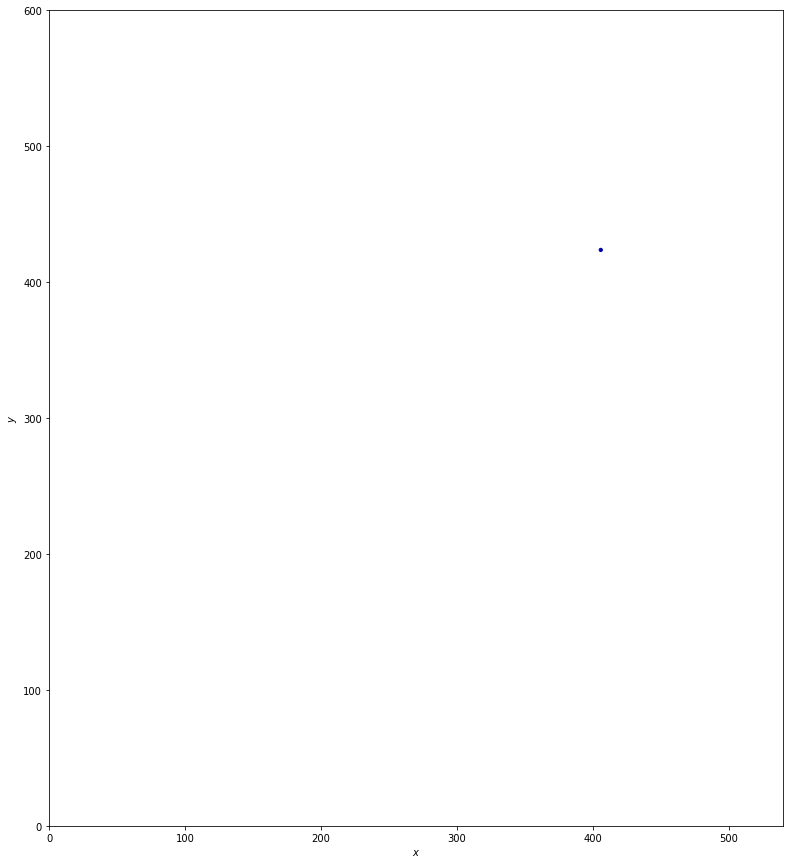

angle -141.270229275
move (2.7263951863364766, 1.2517065502430227)
398.37773522 447.452804958
87
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


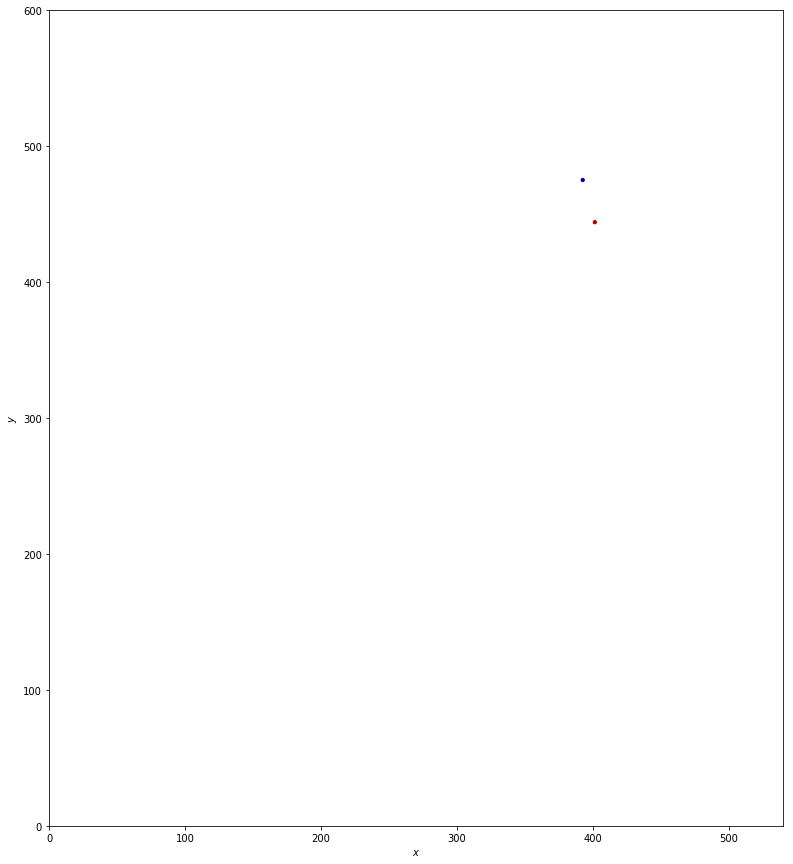

angle 24.6601767222
move (-2.2660564541452111, -1.9659573104792569)
396.111678766 445.486847648
88
yes -1 (405.9587, 423.7502)


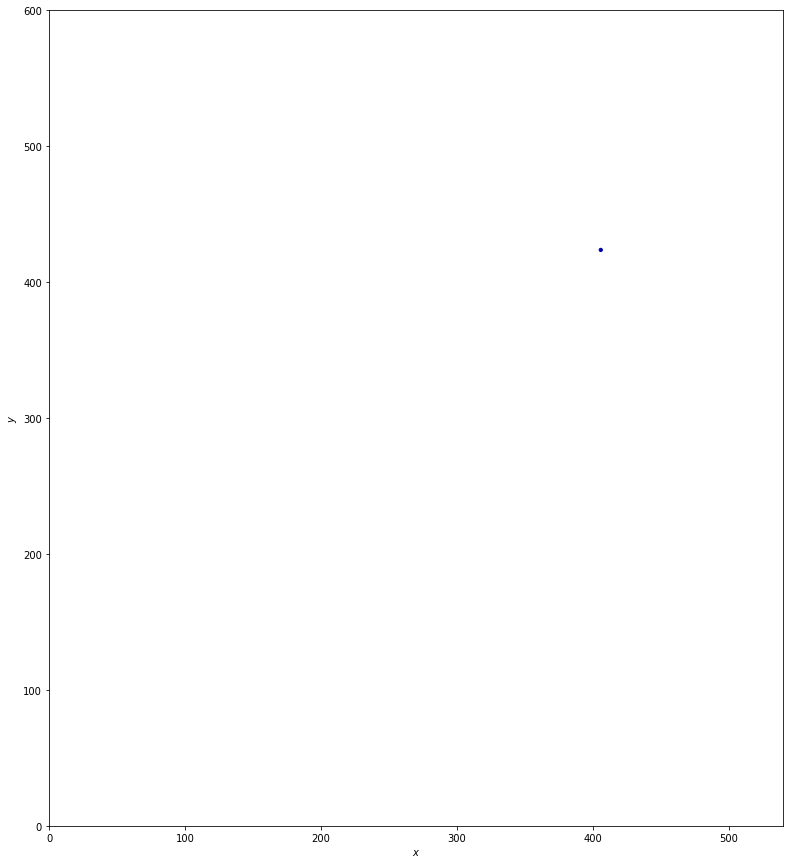

angle -139.056149499
move (2.7326730240452863, 1.2379410905431603)
398.84435179 446.724788738
89
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


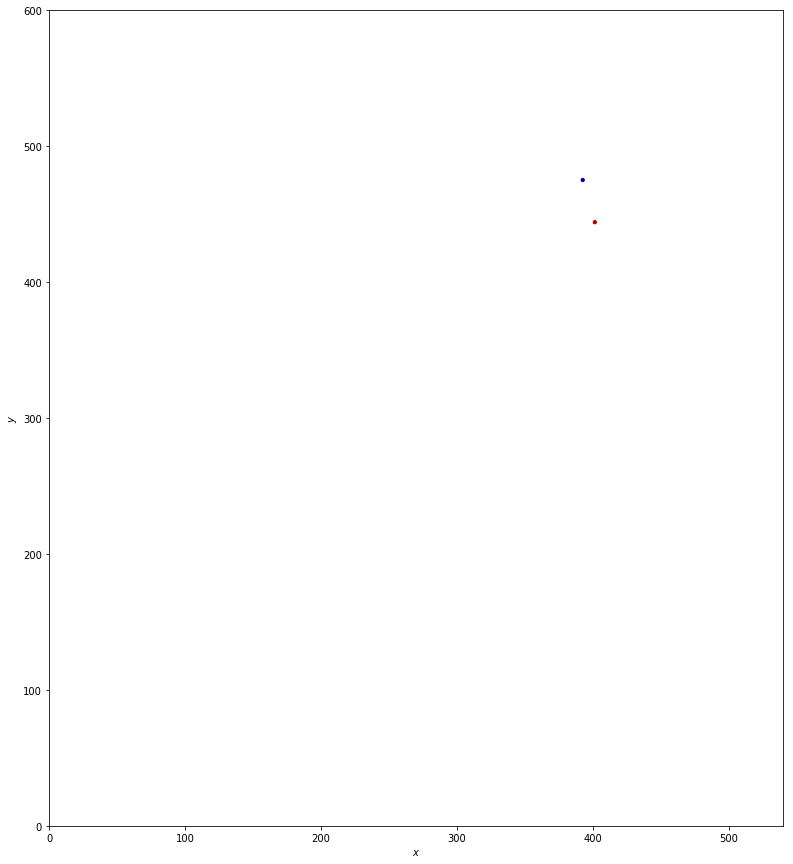

angle 24.371225919
move (-2.152906125721584, -2.0892570961541521)
396.691445664 444.635531642
90
yes -1 (405.9587, 423.7502)


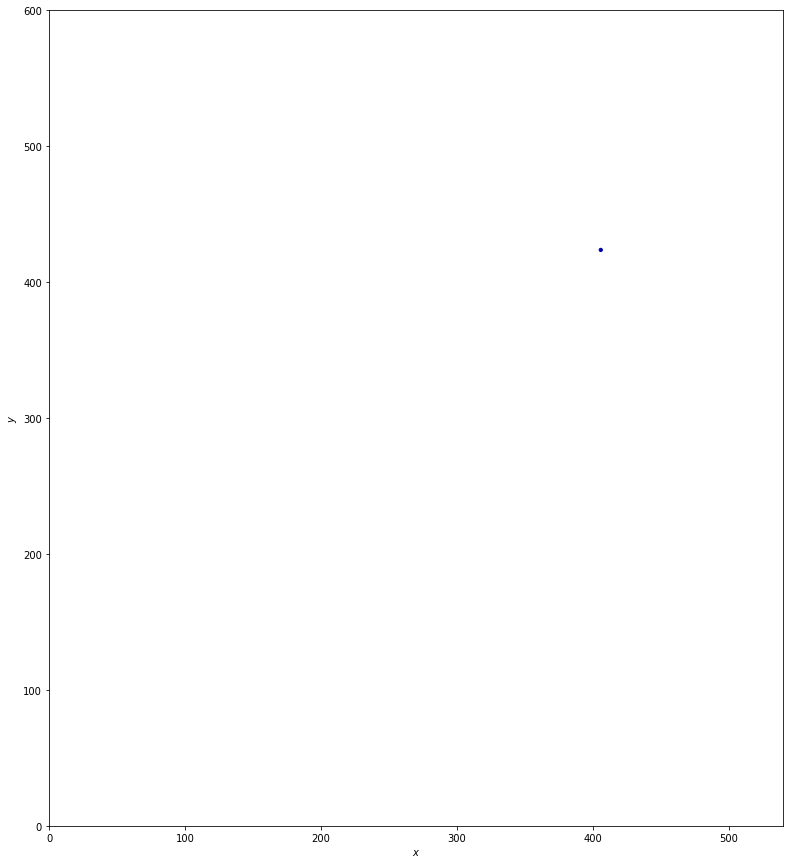

angle -135.859596144
move (2.7421706914274564, 1.2167579459680002)
399.433616356 445.852289588
91
yes 1 (401.5797, 444.1501)


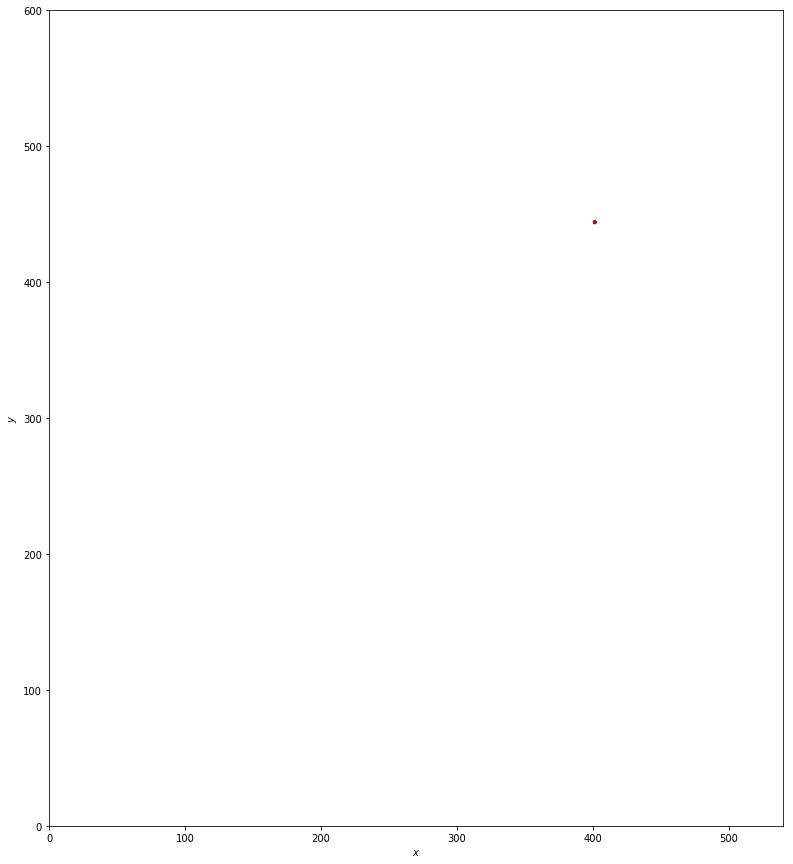

angle 23.9278529982
move (-1.8642669947818433, -2.350427316929216)
397.569349361 443.501862271
92
yes -1 (405.9587, 423.7502)


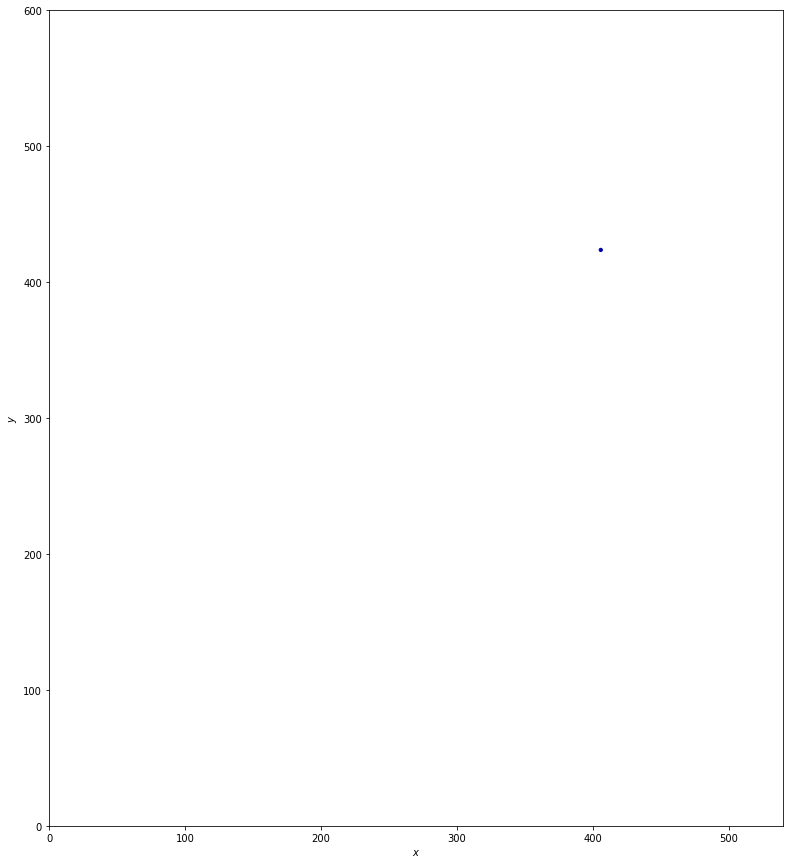

angle -128.420075217
move (2.76124963703329, 1.1728173097219892)
400.330598998 444.674679581
93
yes 1 (401.5797, 444.1501)


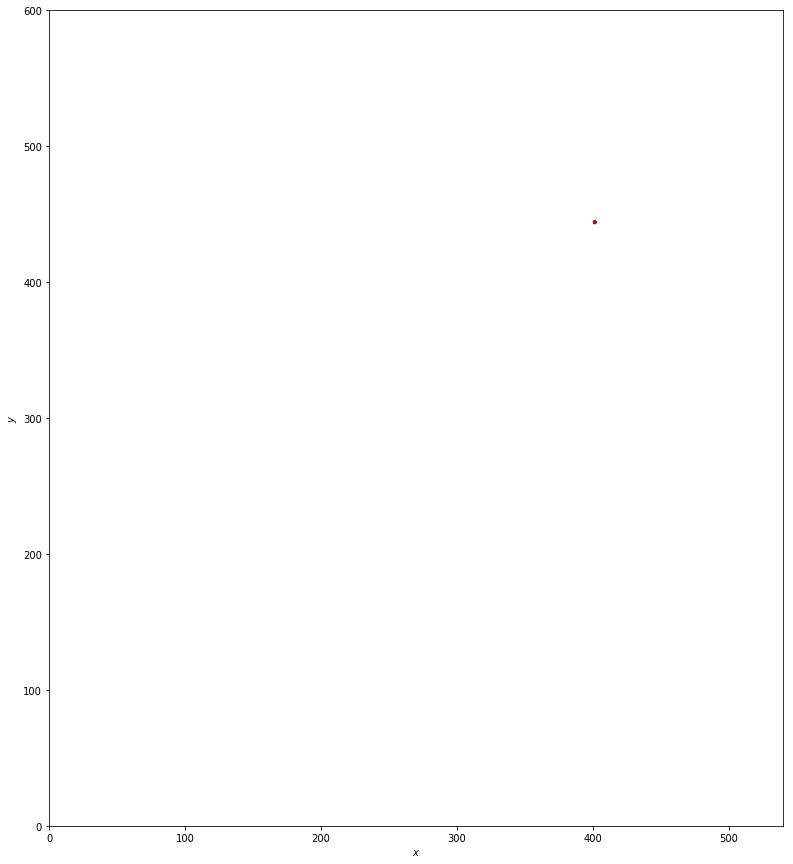

angle 23.0129457732
move (-1.1616168132458002, -2.7659801841634133)
399.168982185 441.908699397
94
yes -1 (405.9587, 423.7502)


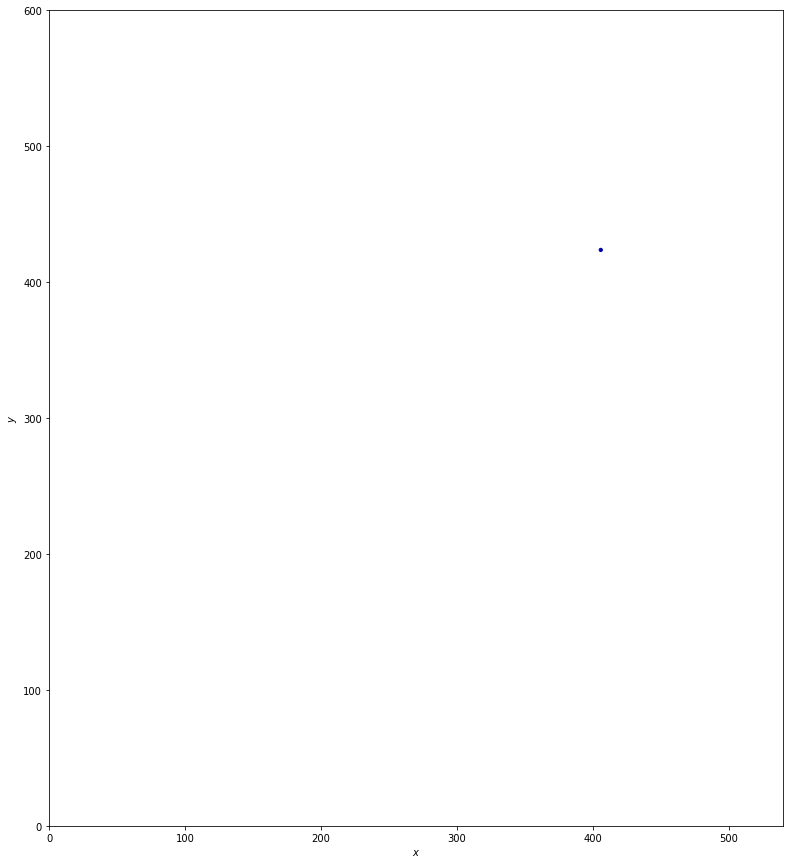

angle -112.78073531
move (2.8099895062393943, 1.0506945202219744)
401.978971691 442.959393917
95


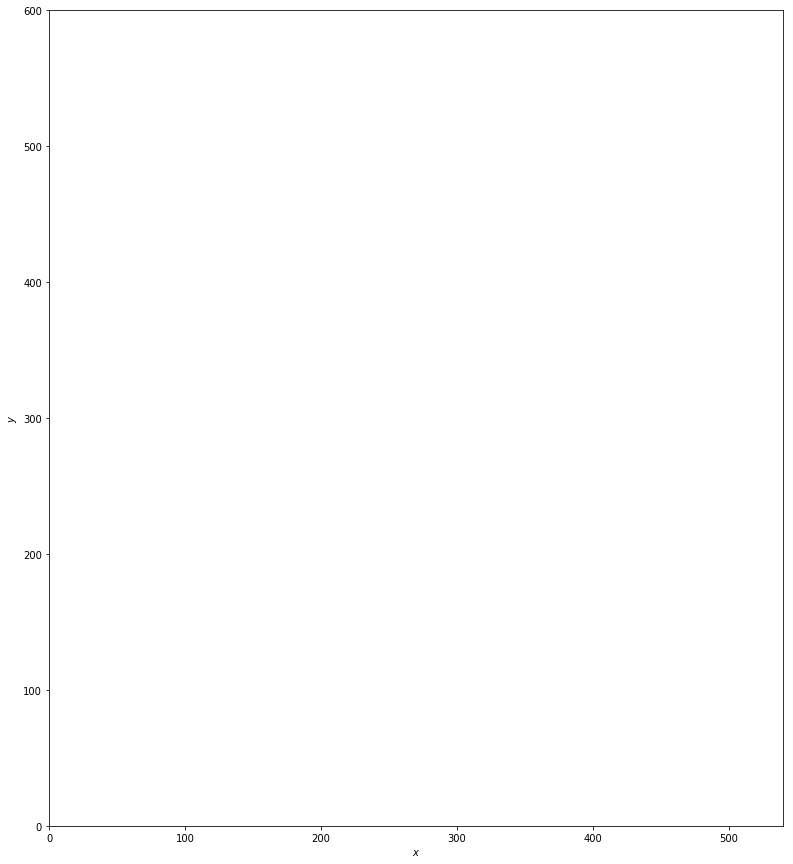

angle 20.501475751
move (3.0, 0.0)
404.978971691 442.959393917
96


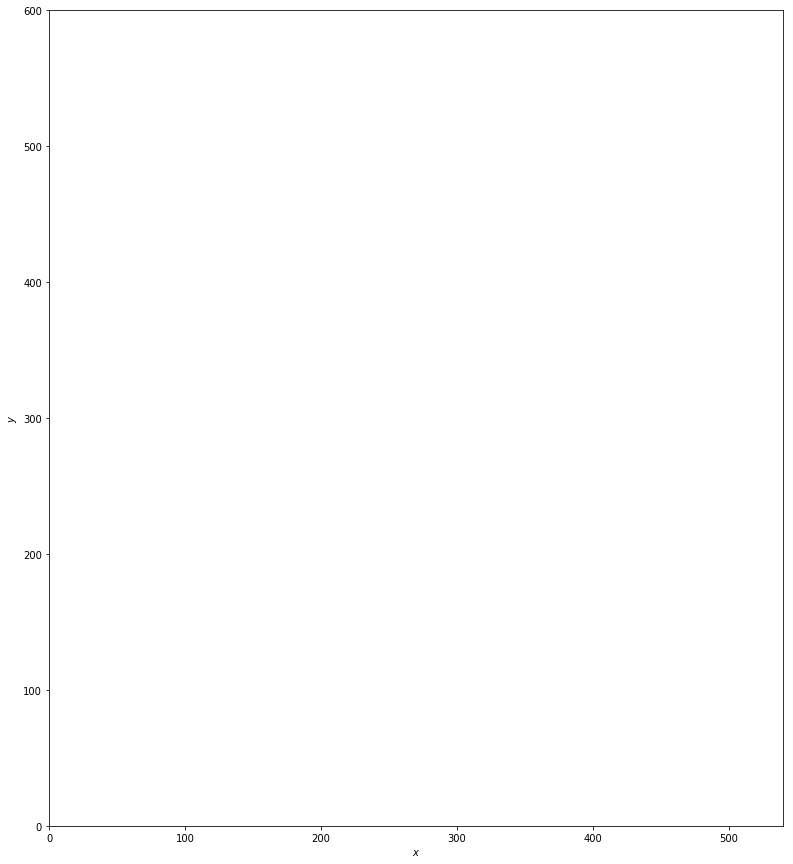

angle 0.0
move (3.0, 0.0)
407.978971691 442.959393917
97


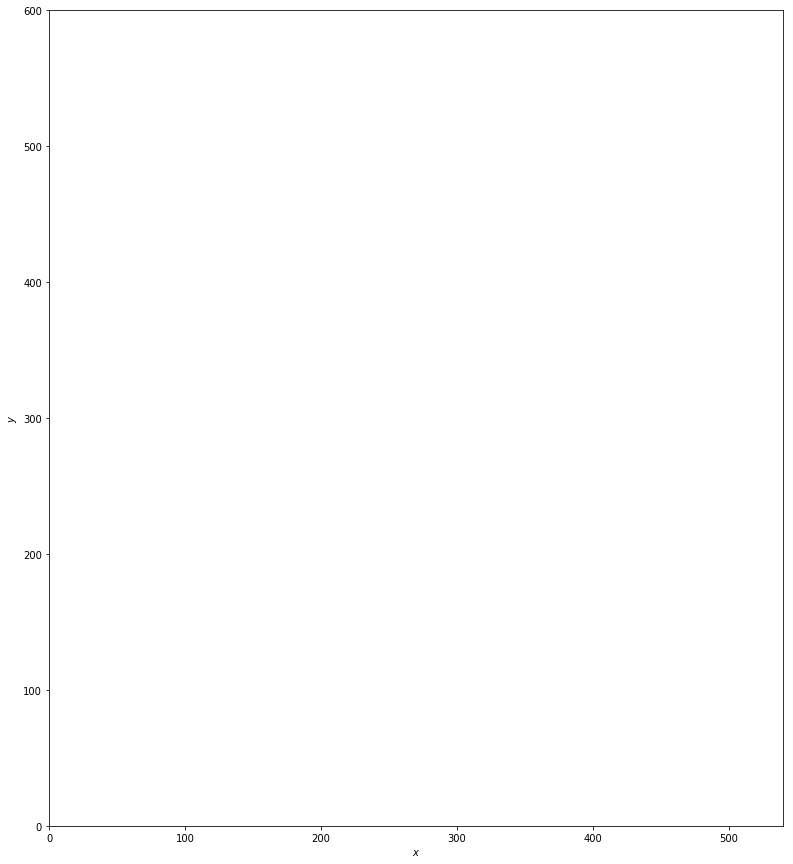

angle 0.0
move (3.0, 0.0)
410.978971691 442.959393917
98


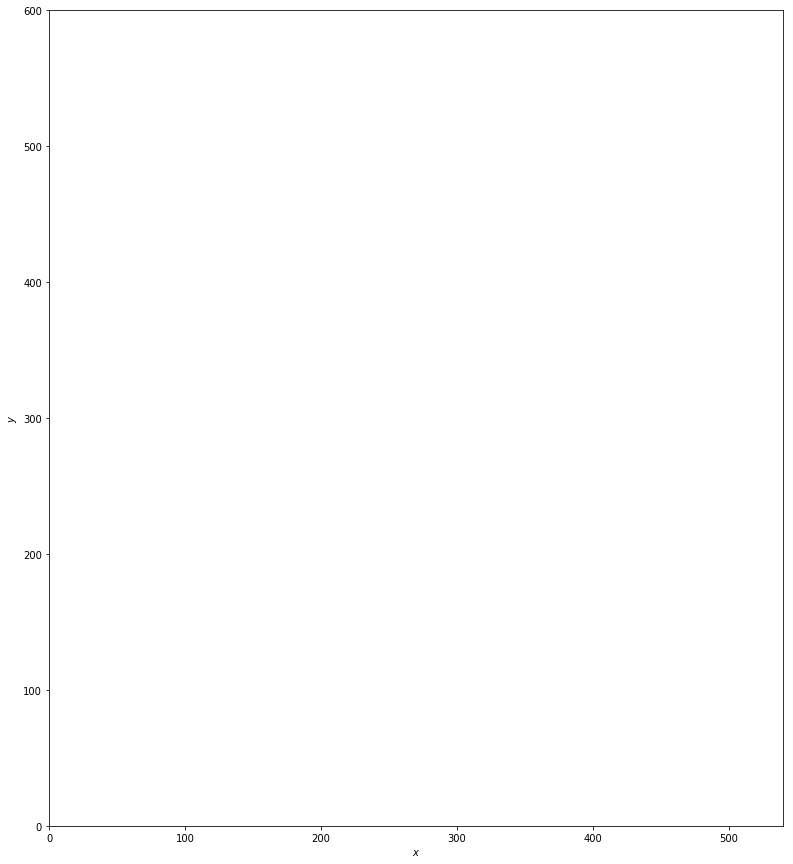

angle 0.0
move (3.0, 0.0)
413.978971691 442.959393917
99


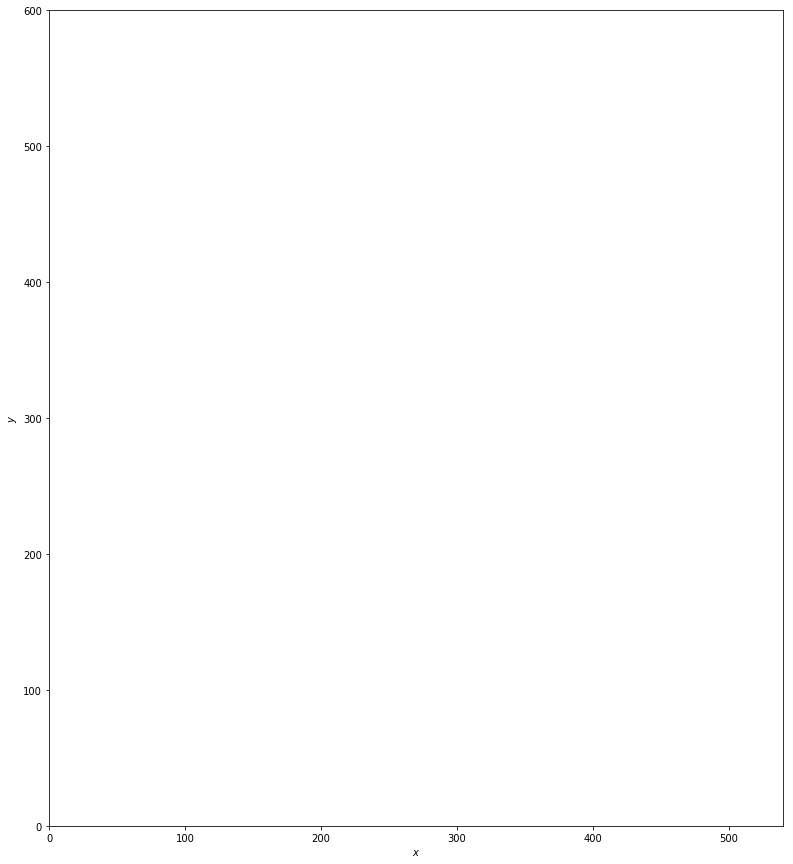

angle 0.0
move (3.0, 0.0)
416.978971691 442.959393917
100


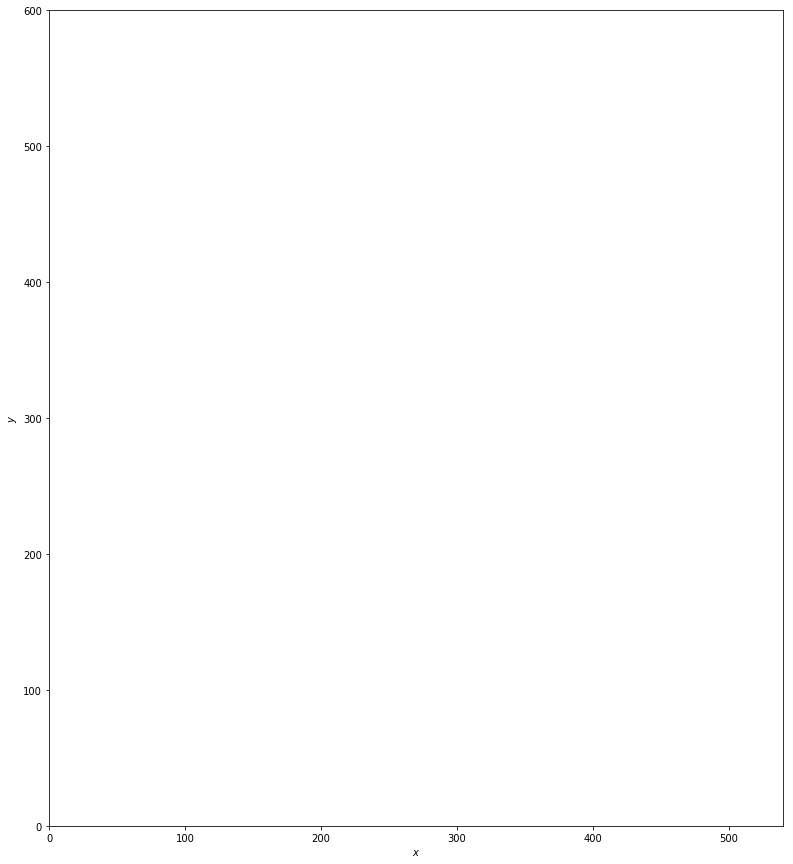

angle 0.0
move (3.0, 0.0)
419.978971691 442.959393917
101


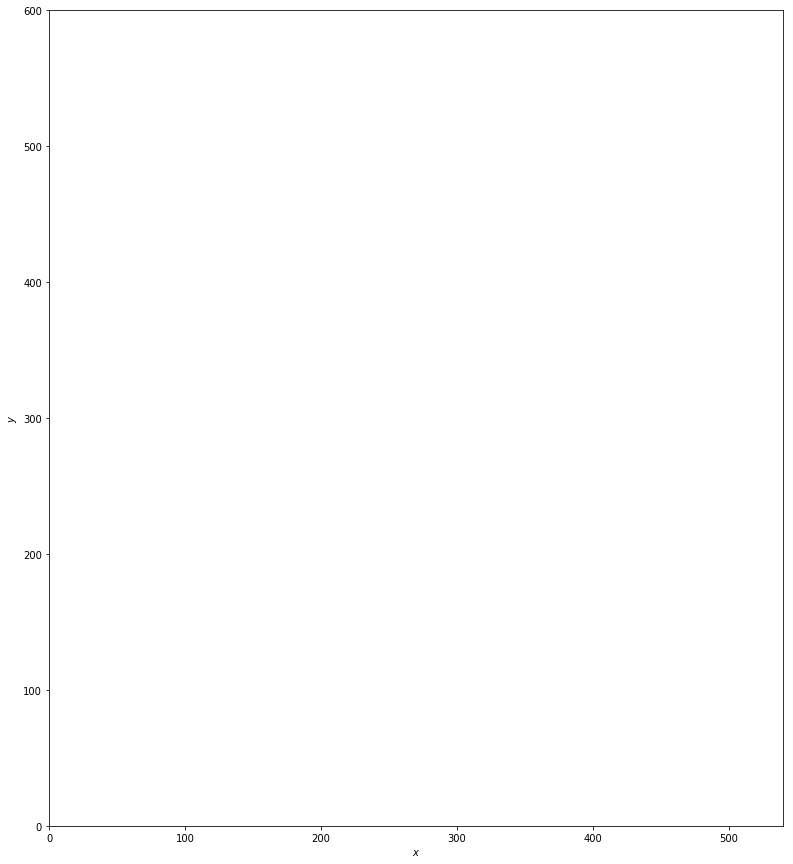

angle 0.0
move (3.0, 0.0)
422.978971691 442.959393917
102


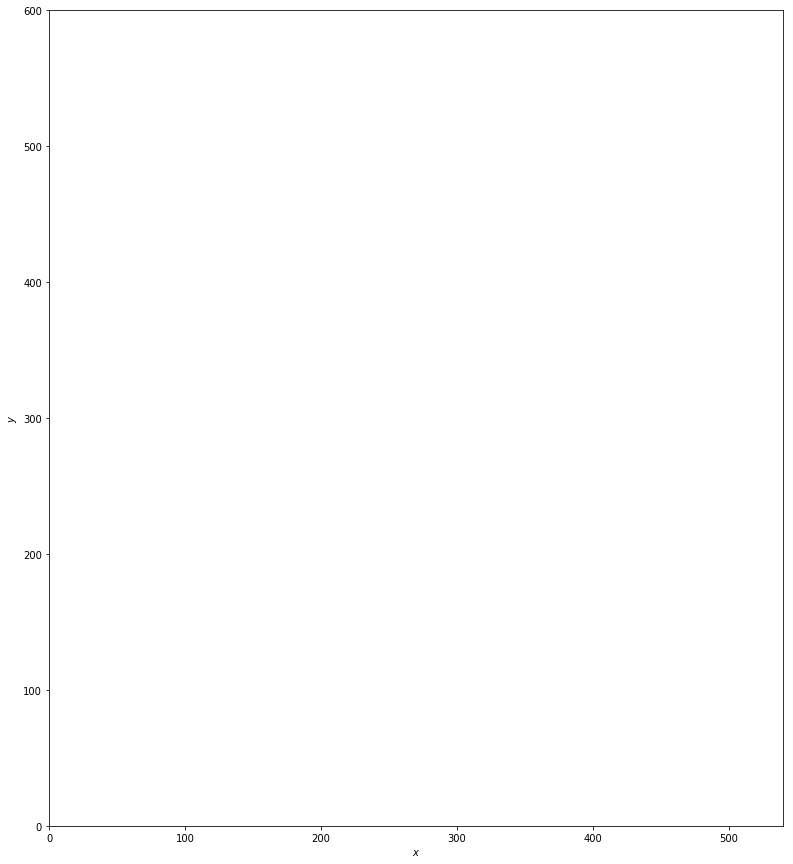

angle 0.0
move (3.0, 0.0)
425.978971691 442.959393917
103


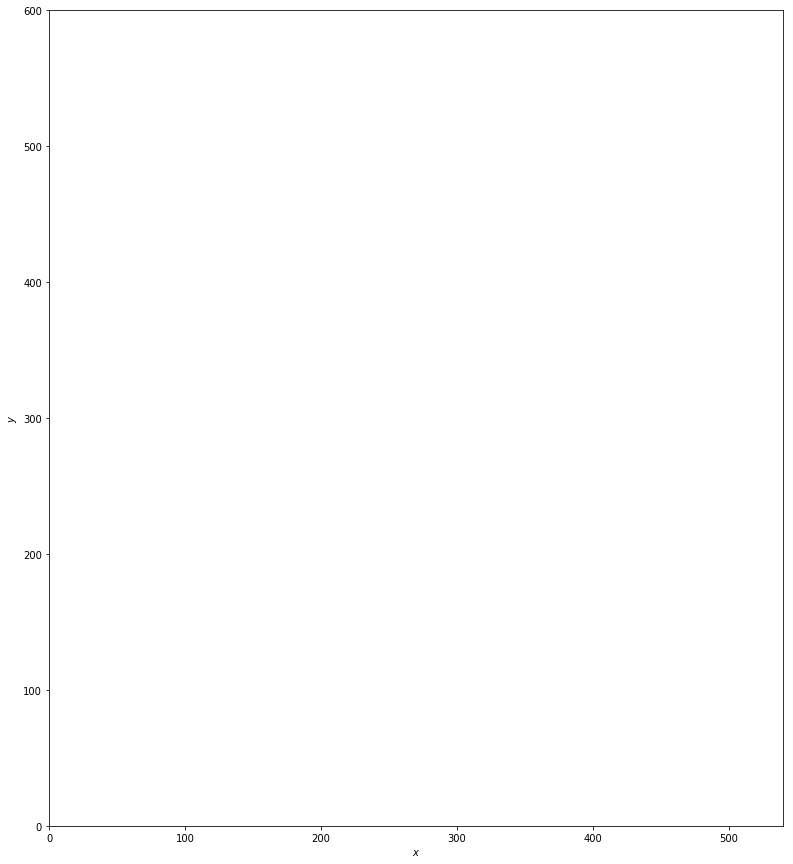

angle 0.0
move (3.0, 0.0)
428.978971691 442.959393917
104


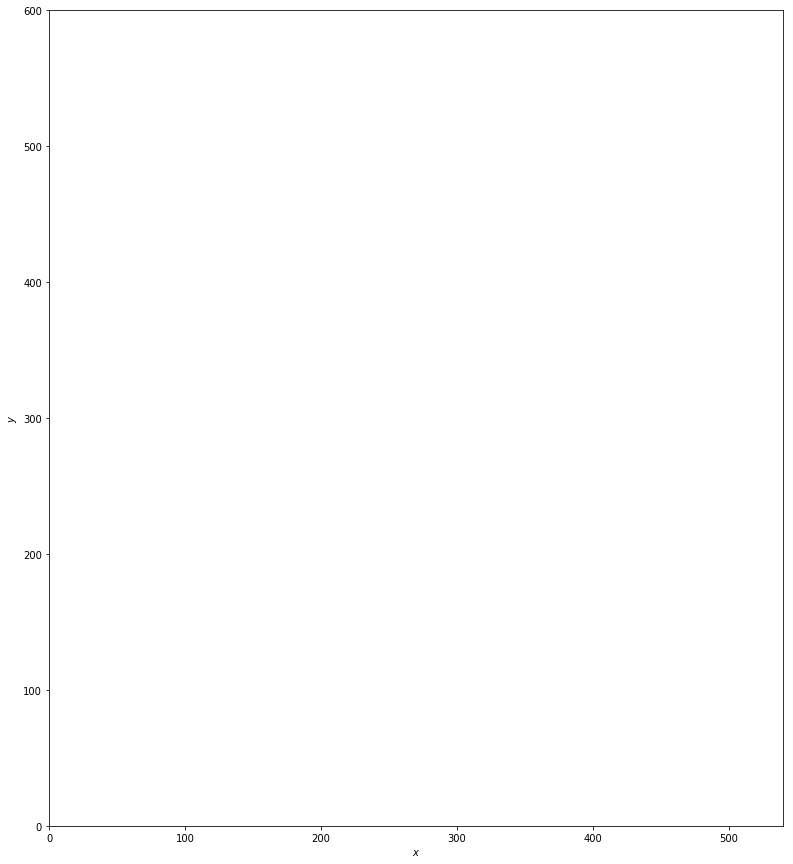

angle 0.0
move (3.0, 0.0)
431.978971691 442.959393917
105


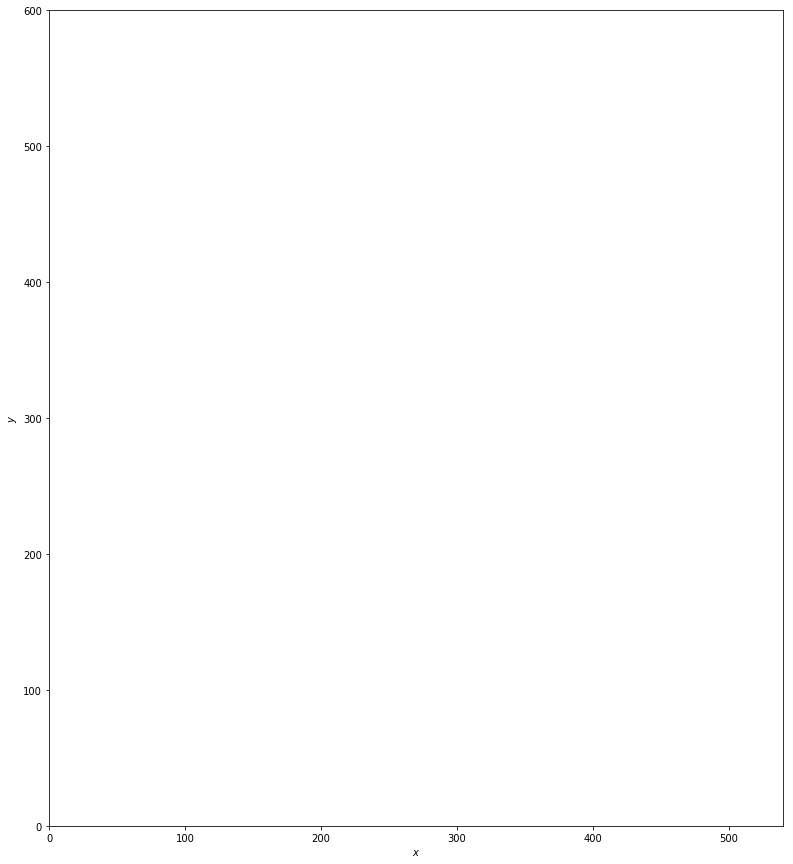

angle 0.0
move (3.0, 0.0)
434.978971691 442.959393917
106


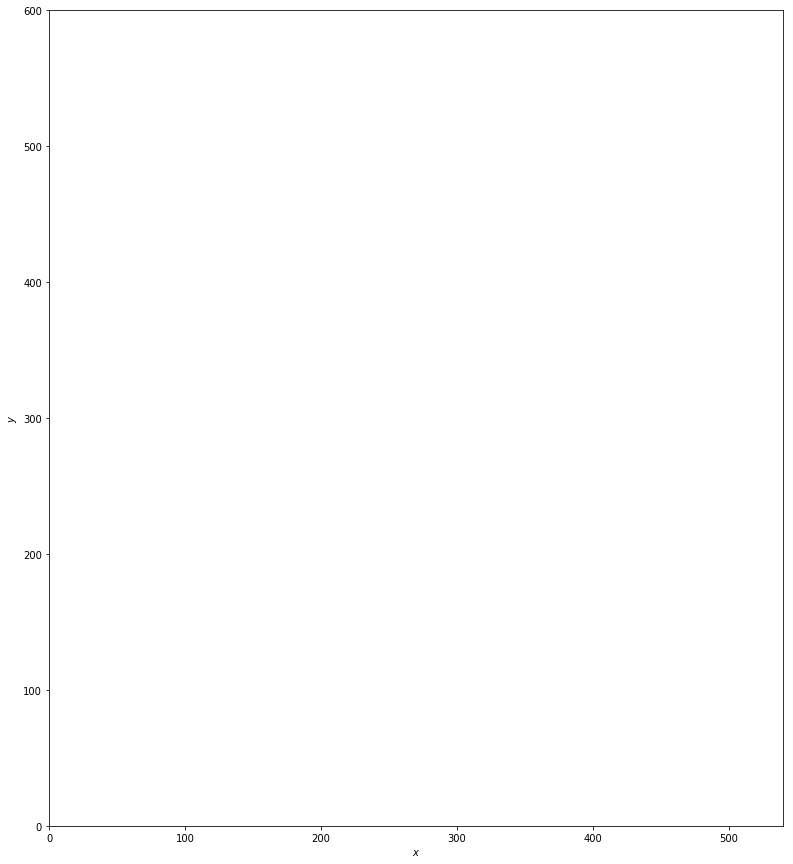

angle 0.0
move (3.0, 0.0)
437.978971691 442.959393917
107


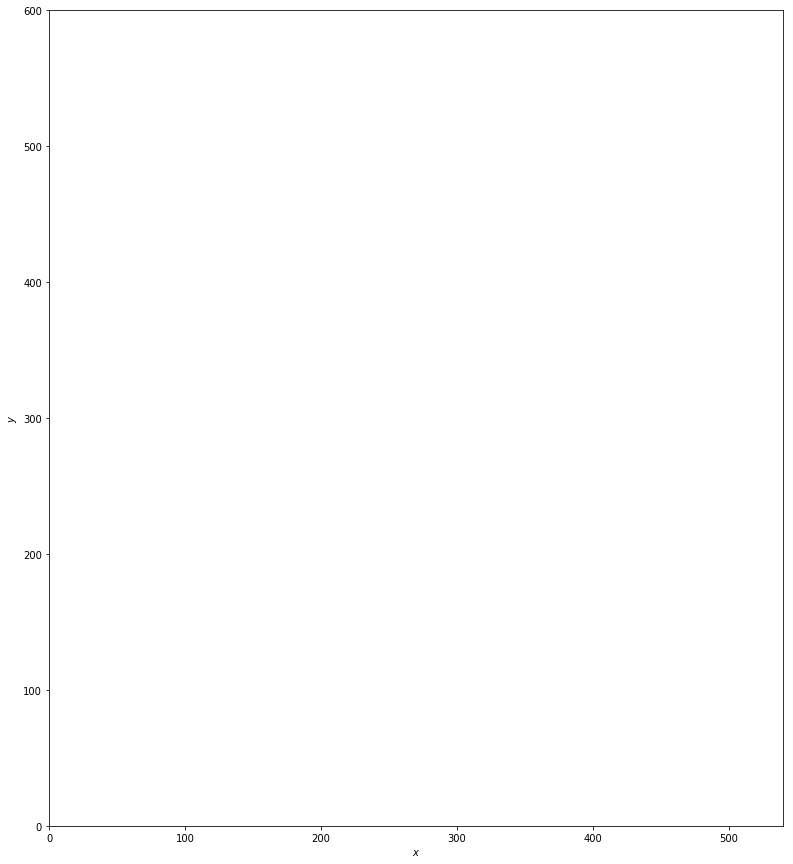

angle 0.0
move (3.0, 0.0)
440.978971691 442.959393917
108


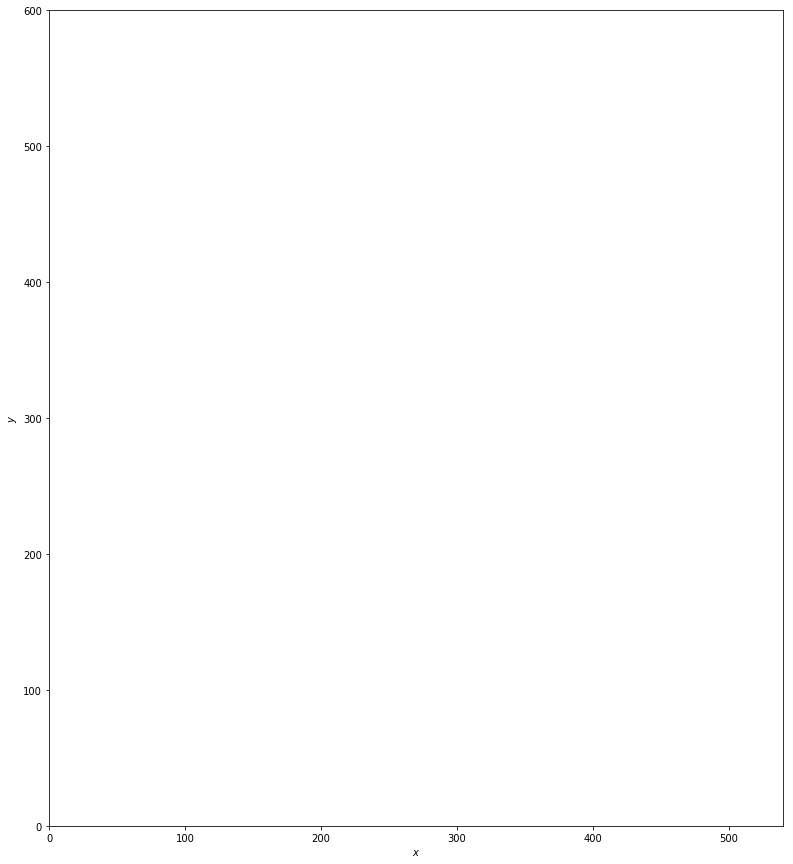

angle 0.0
move (3.0, 0.0)
443.978971691 442.959393917
109


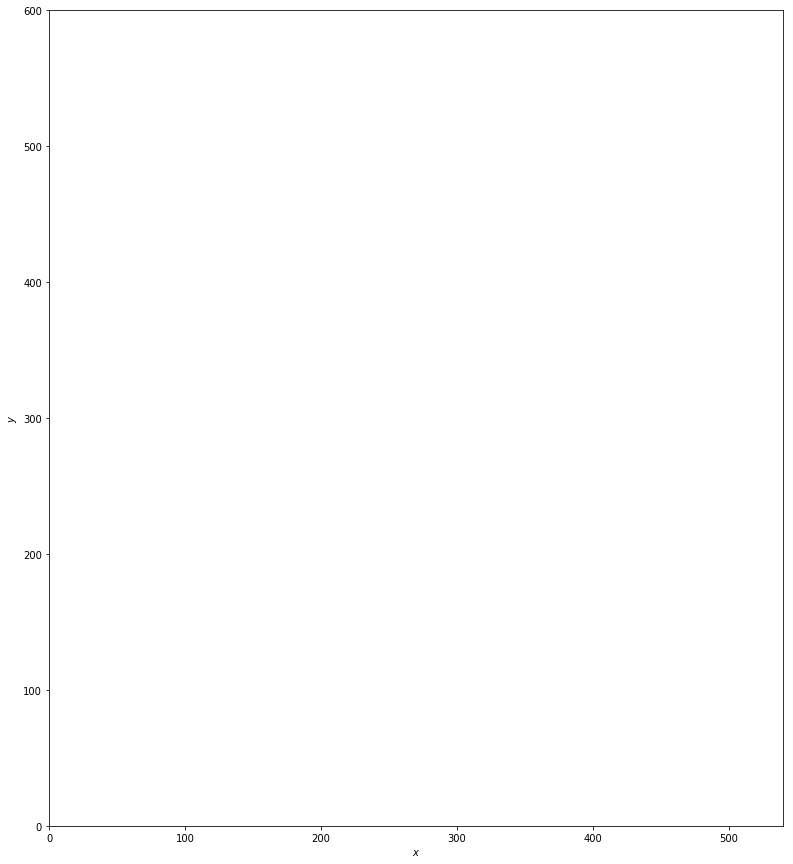

angle 0.0
move (3.0, 0.0)
446.978971691 442.959393917
110


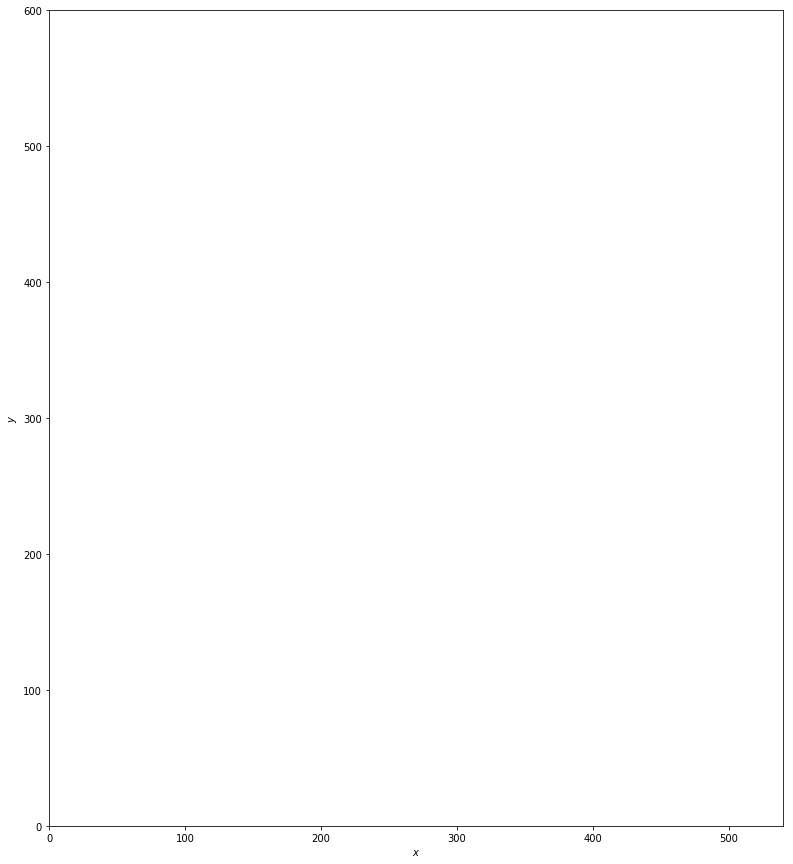

angle 0.0
move (3.0, 0.0)
449.978971691 442.959393917
111


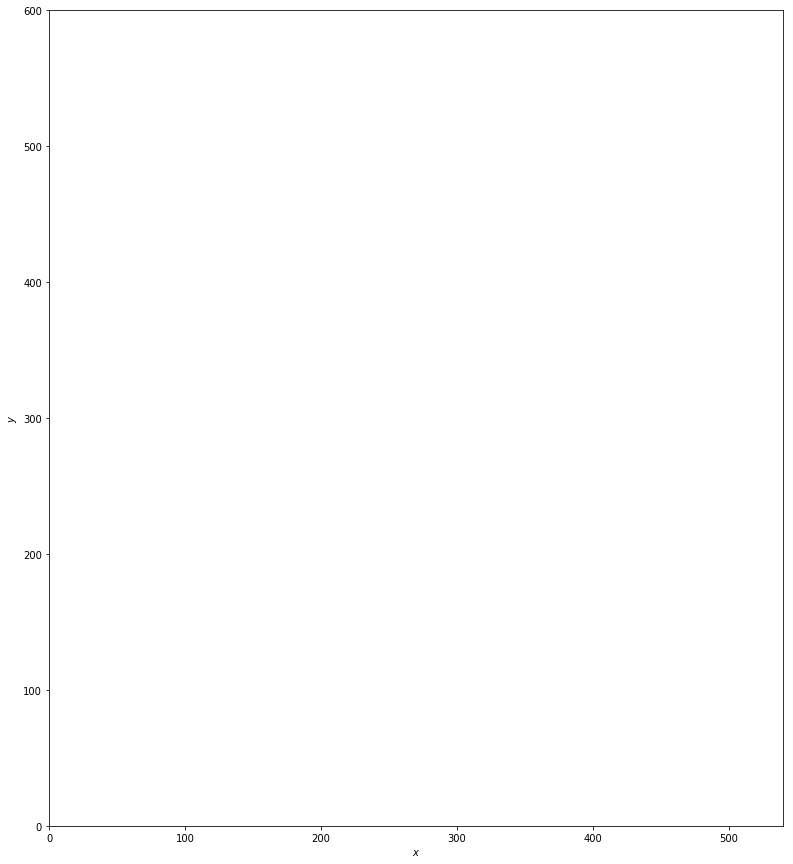

angle 0.0
move (3.0, 0.0)
452.978971691 442.959393917
112


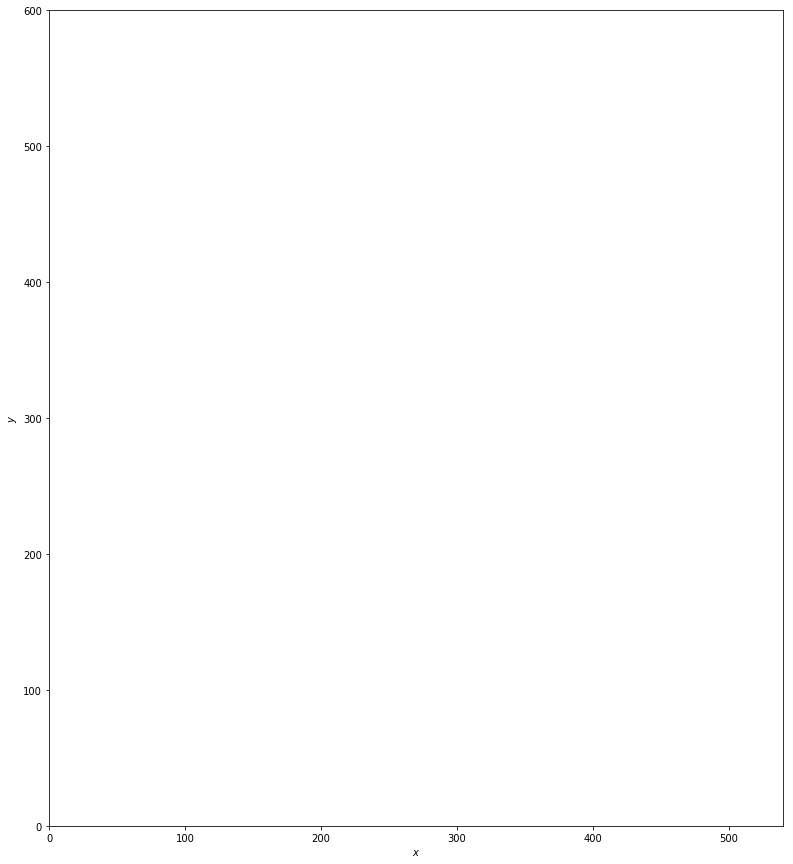

angle 0.0
move (3.0, 0.0)
455.978971691 442.959393917
113


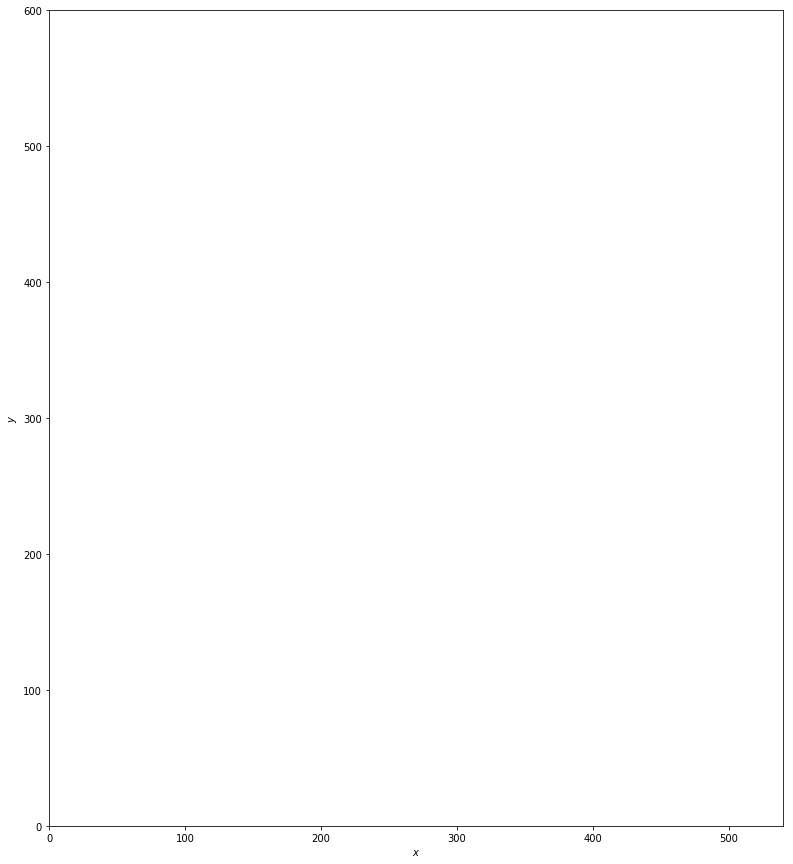

angle 0.0
move (3.0, 0.0)
458.978971691 442.959393917
114


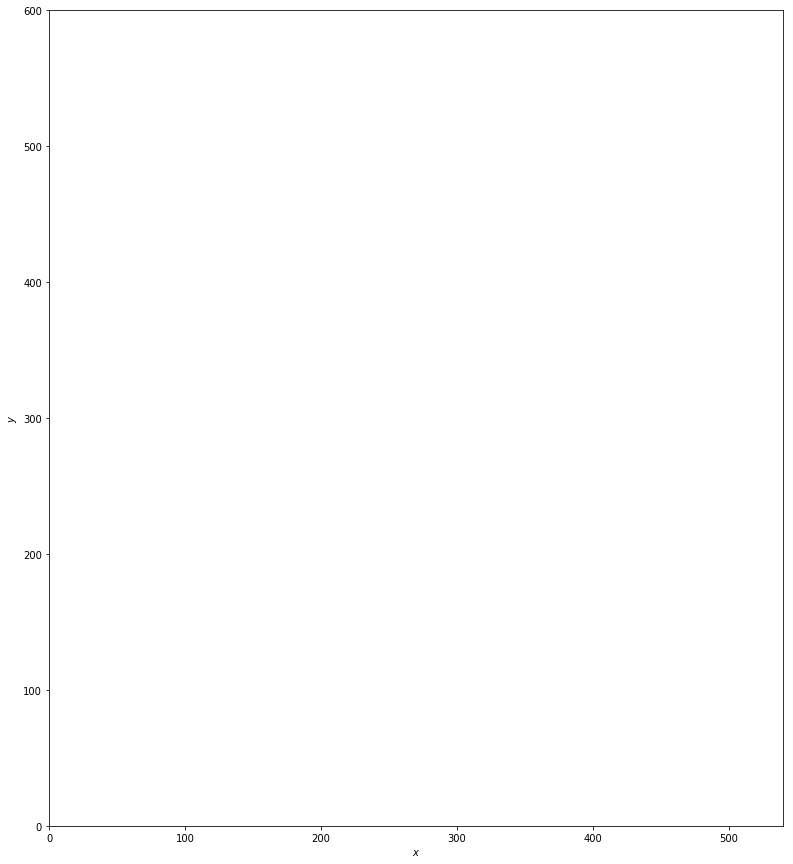

angle 0.0
move (3.0, 0.0)
461.978971691 442.959393917
115


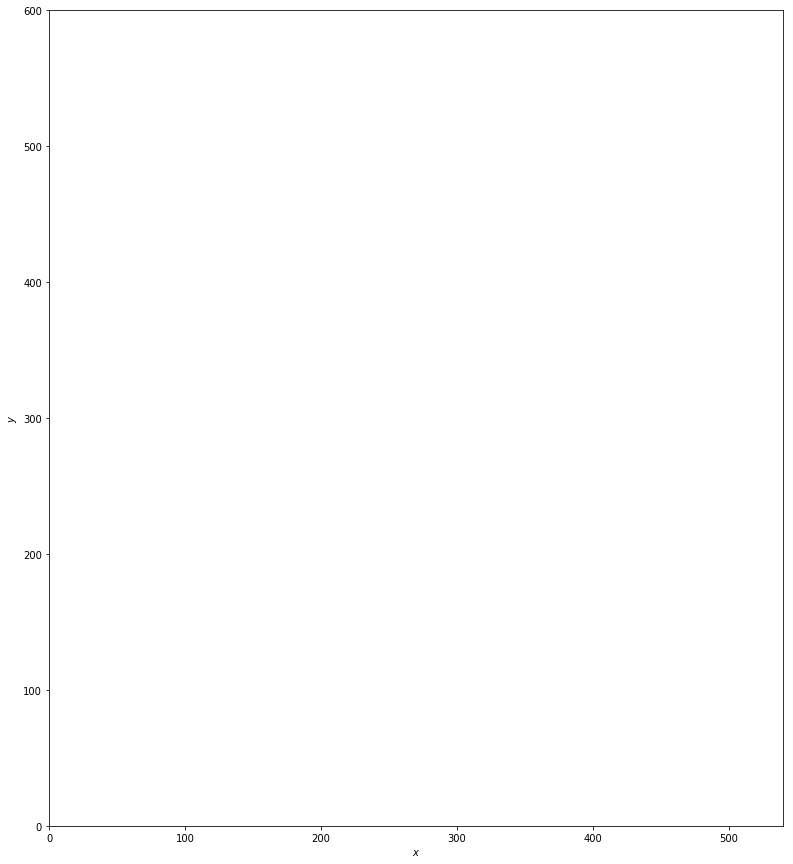

angle 0.0
move (3.0, 0.0)
464.978971691 442.959393917
116


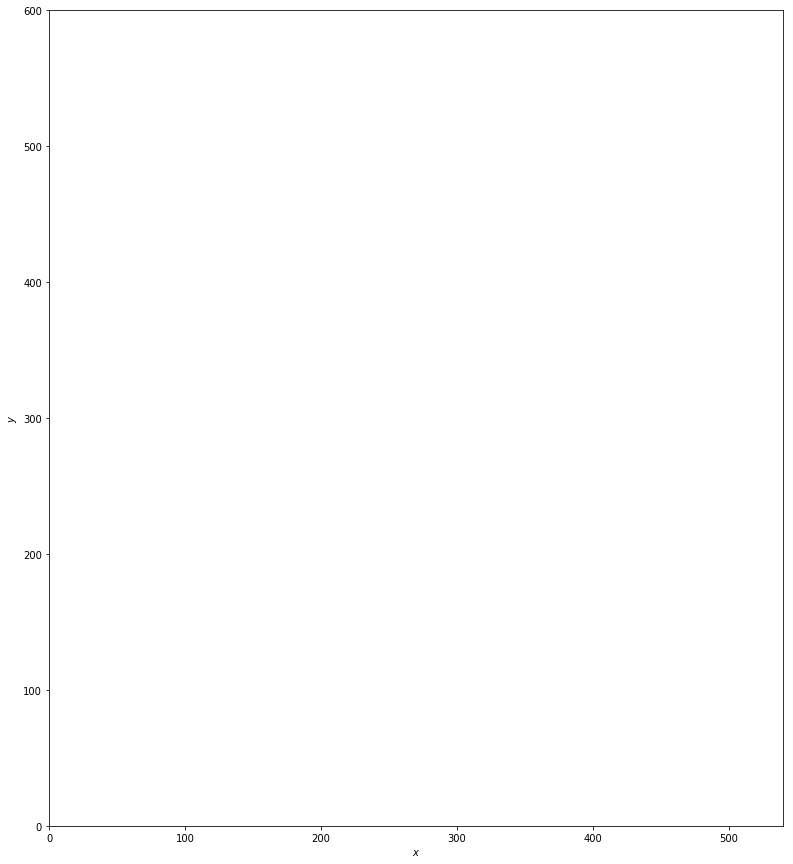

angle 0.0
move (3.0, 0.0)
467.978971691 442.959393917
117


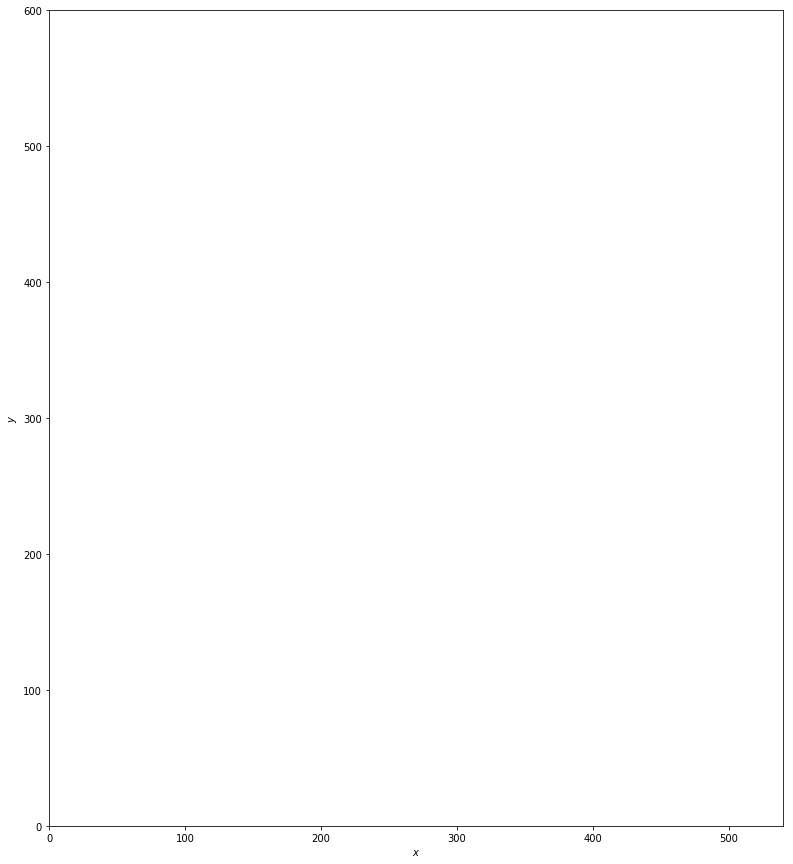

angle 0.0
move (3.0, 0.0)
470.978971691 442.959393917
118


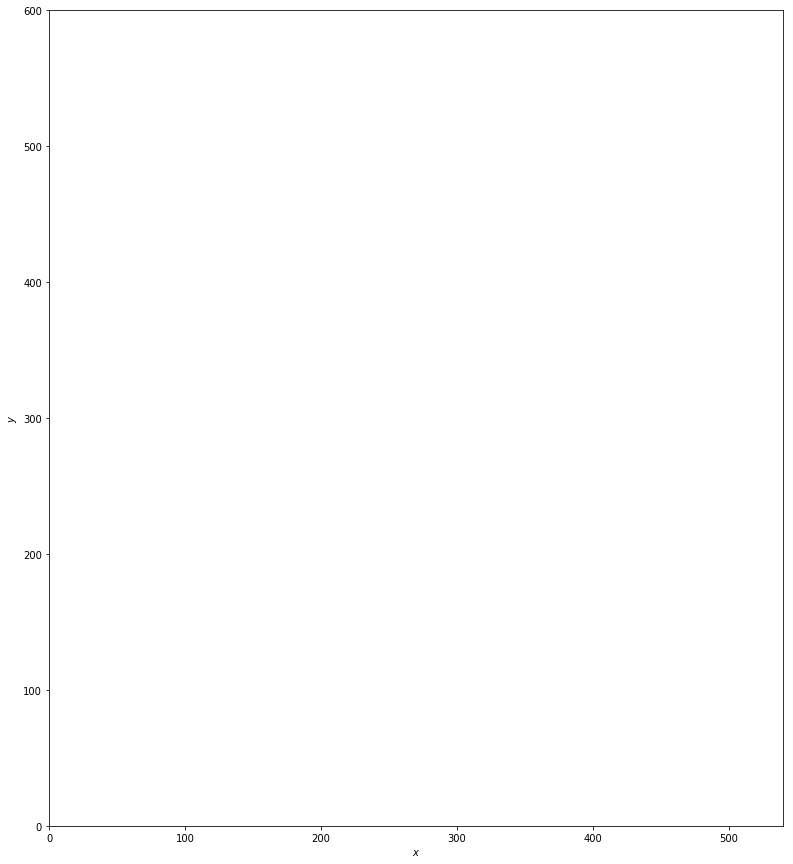

angle 0.0
move (3.0, 0.0)
473.978971691 442.959393917
119


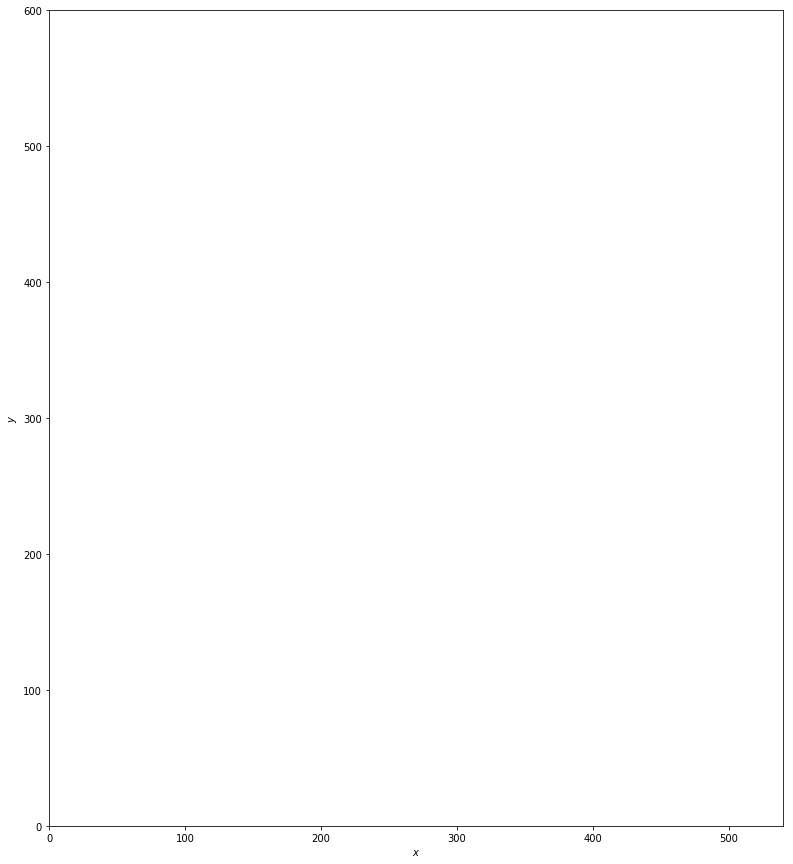

angle 0.0
move (3.0, 0.0)
476.978971691 442.959393917
120


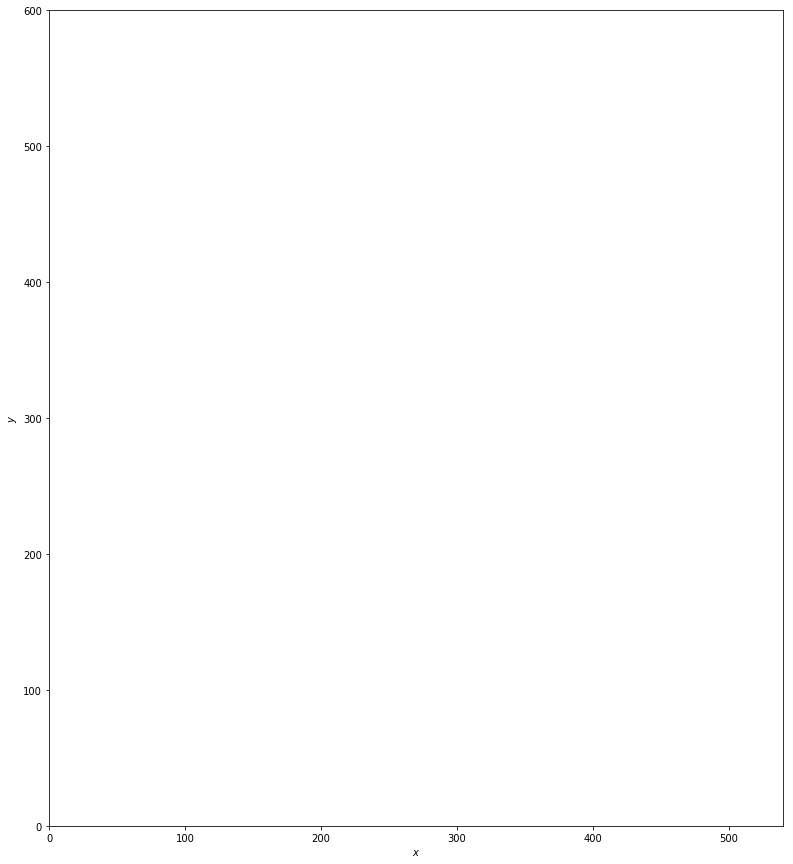

angle 0.0
move (3.0, 0.0)
479.978971691 442.959393917
121


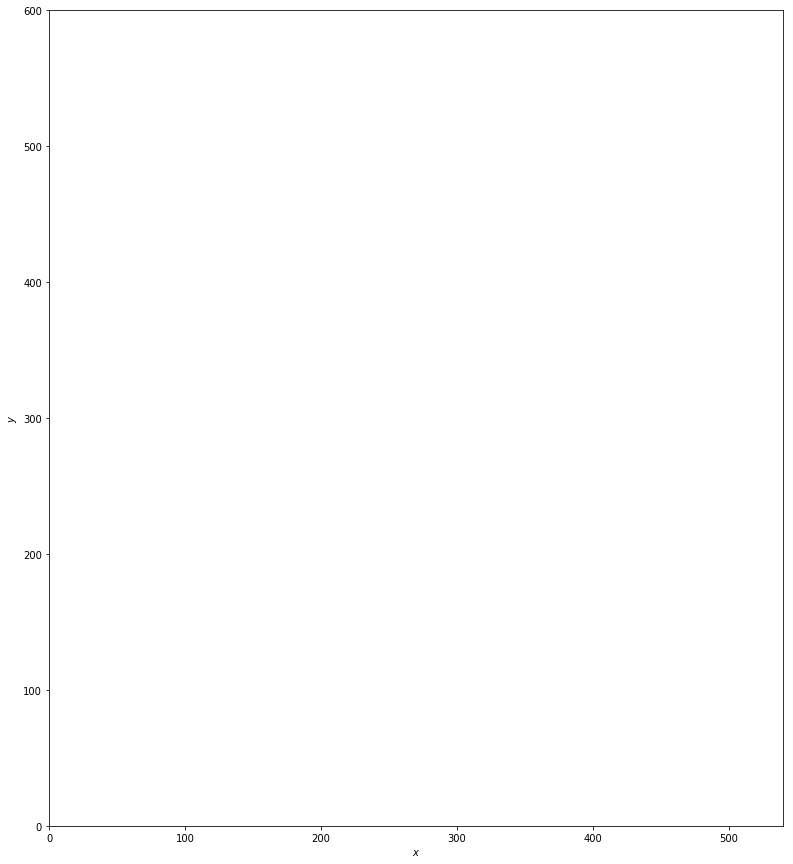

angle 0.0
move (3.0, 0.0)
482.978971691 442.959393917
122


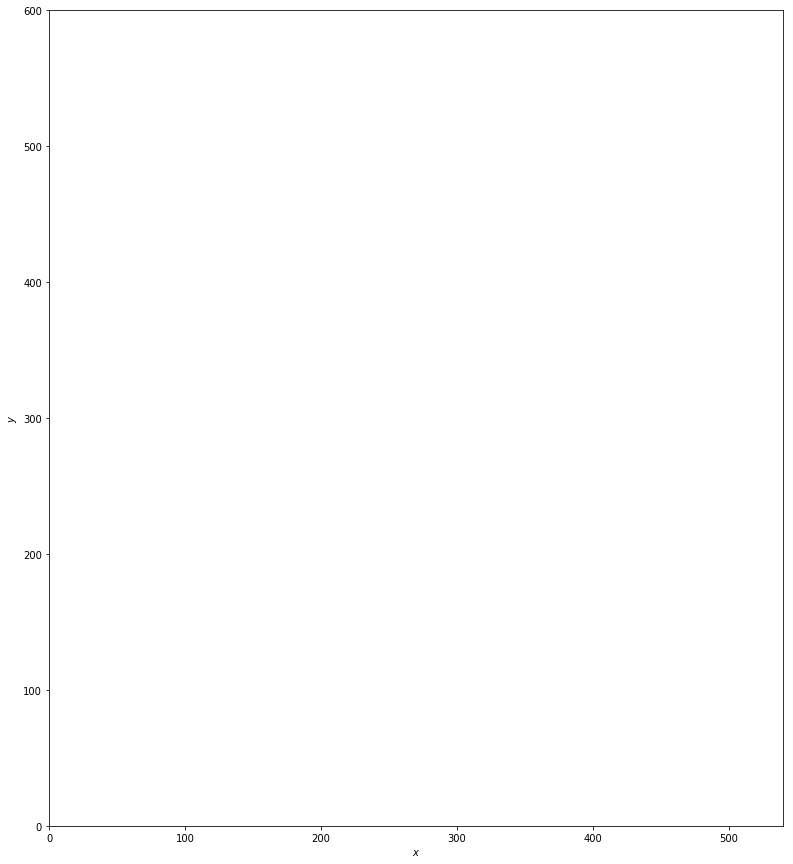

angle 0.0
move (3.0, 0.0)
485.978971691 442.959393917
123


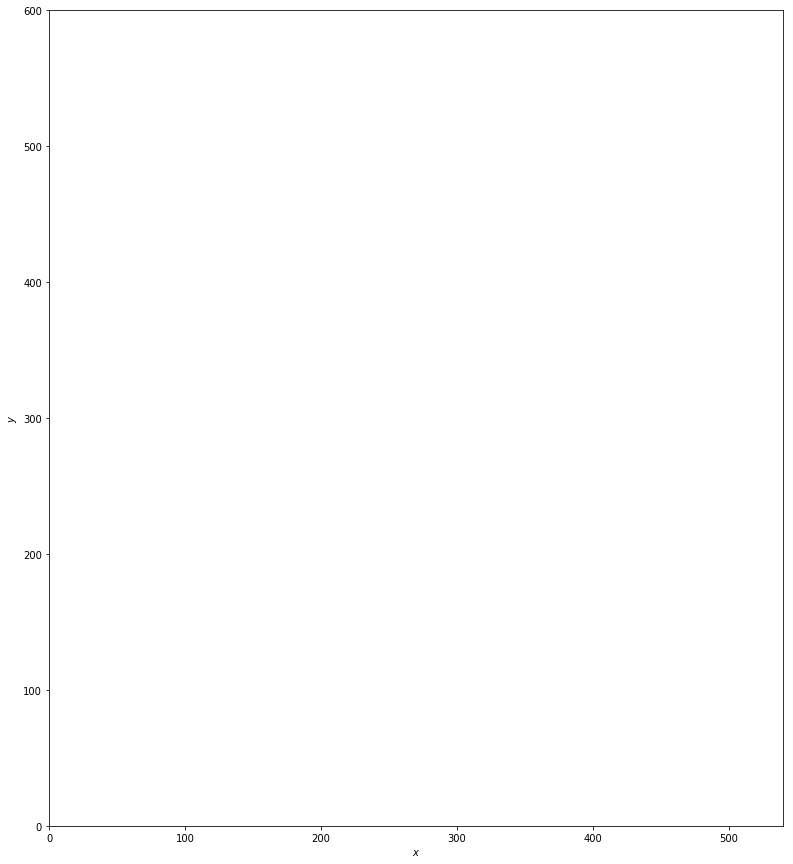

angle 0.0
move (3.0, 0.0)
488.978971691 442.959393917
124


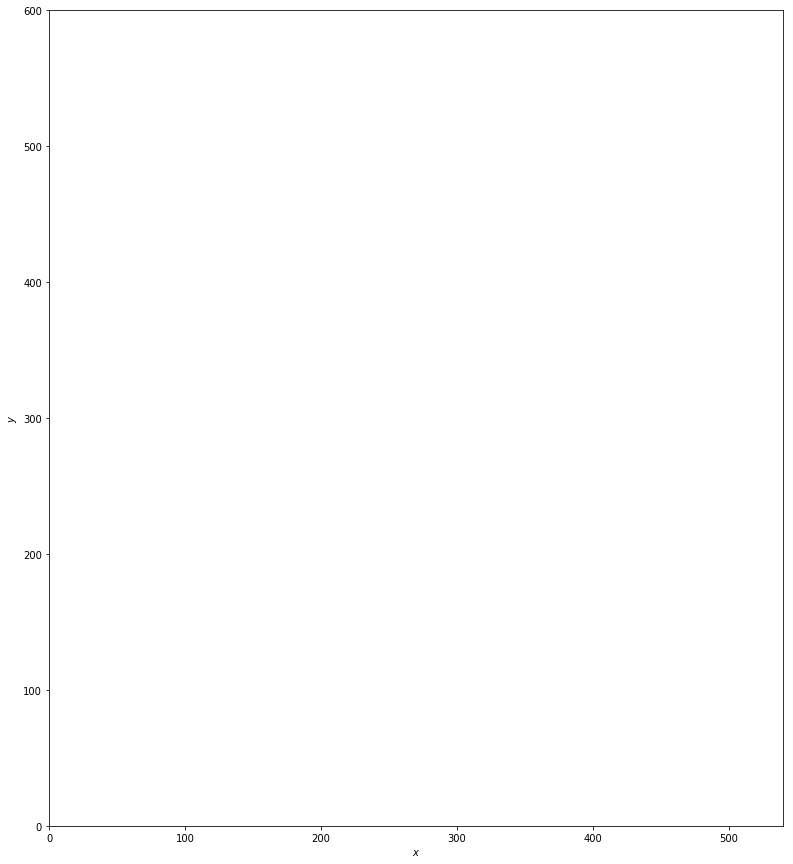

angle 0.0
move (3.0, 0.0)
491.978971691 442.959393917
125


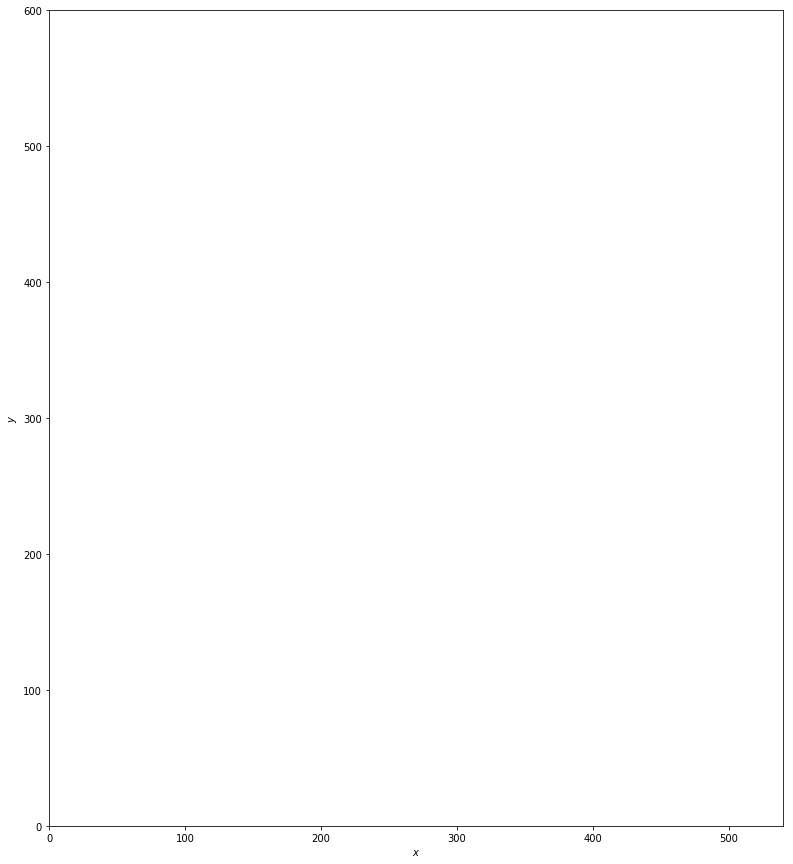

angle 0.0
move (3.0, 0.0)
494.978971691 442.959393917
126


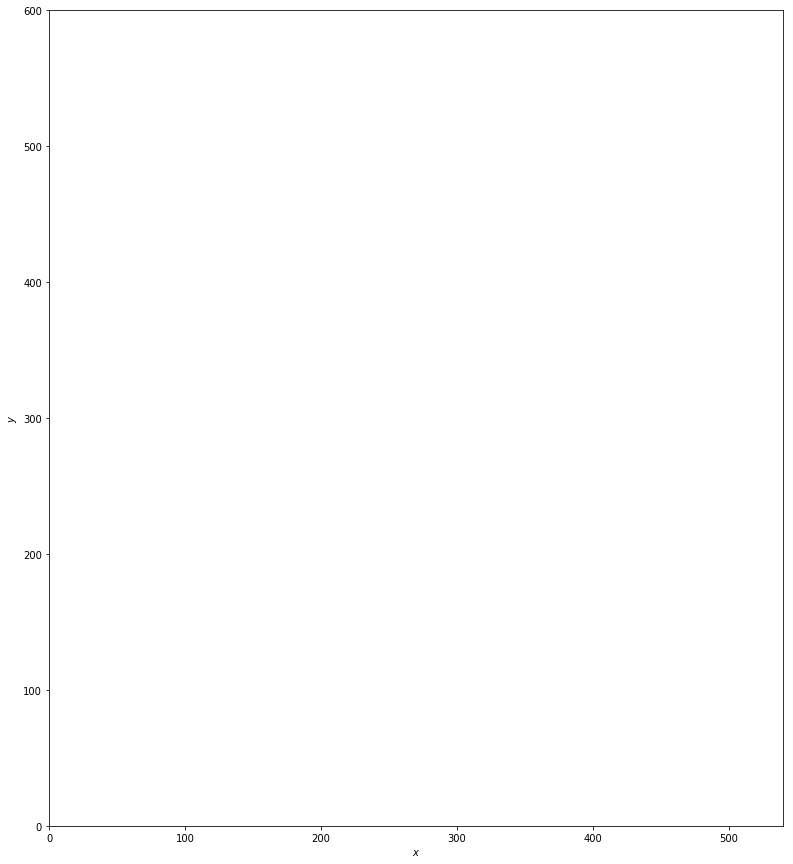

angle 0.0
move (3.0, 0.0)
497.978971691 442.959393917
127


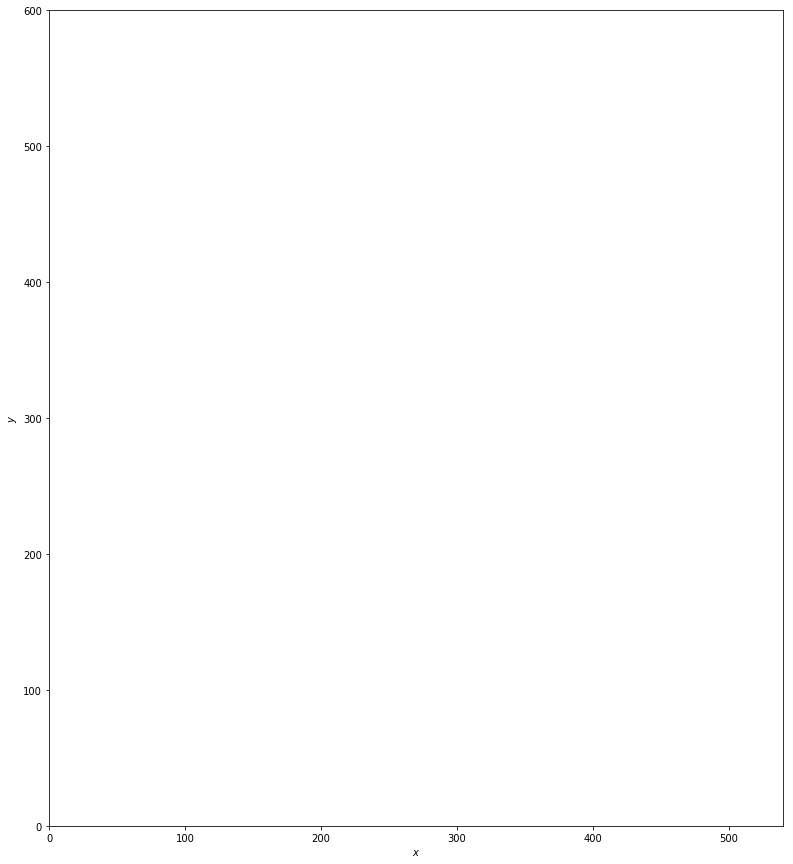

angle 0.0
move (3.0, 0.0)
500.978971691 442.959393917
128


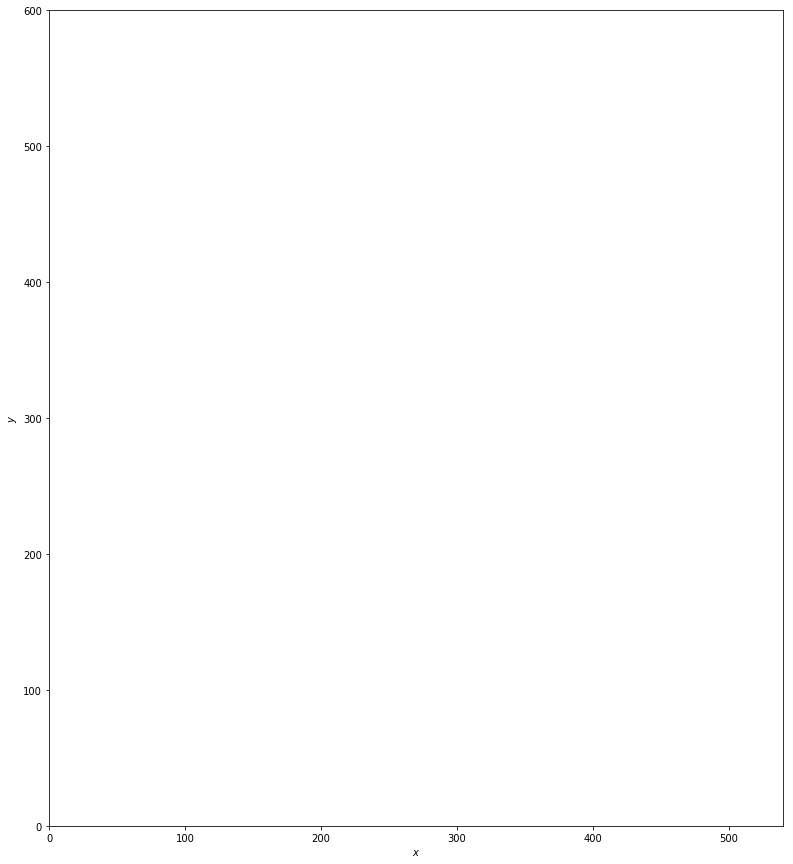

angle 0.0
move (3.0, 0.0)
503.978971691 442.959393917
129


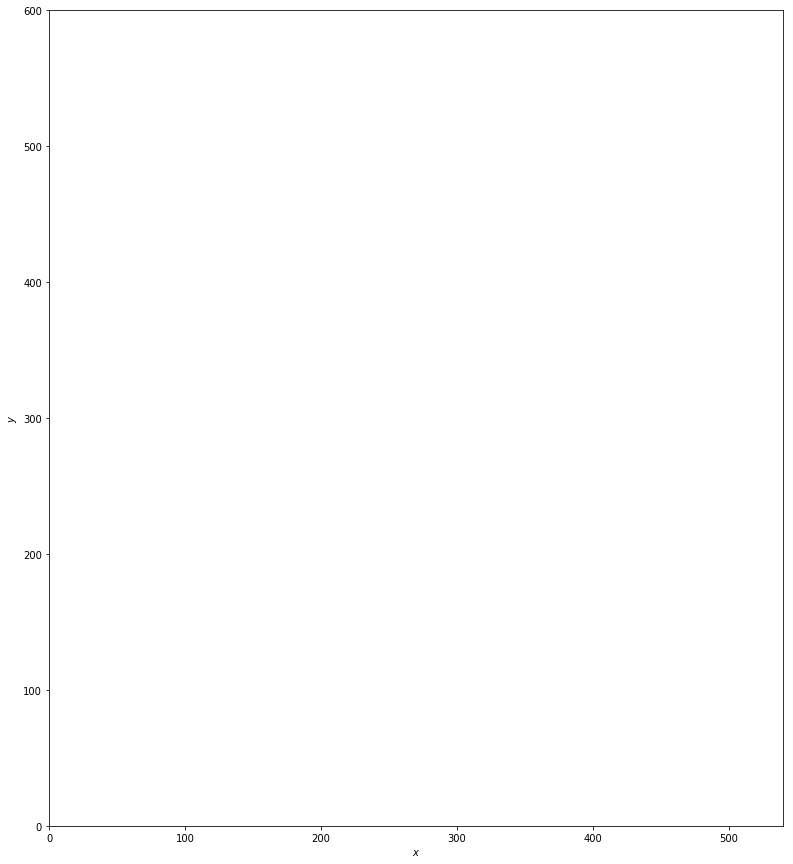

angle 0.0
move (3.0, 0.0)
506.978971691 442.959393917
130


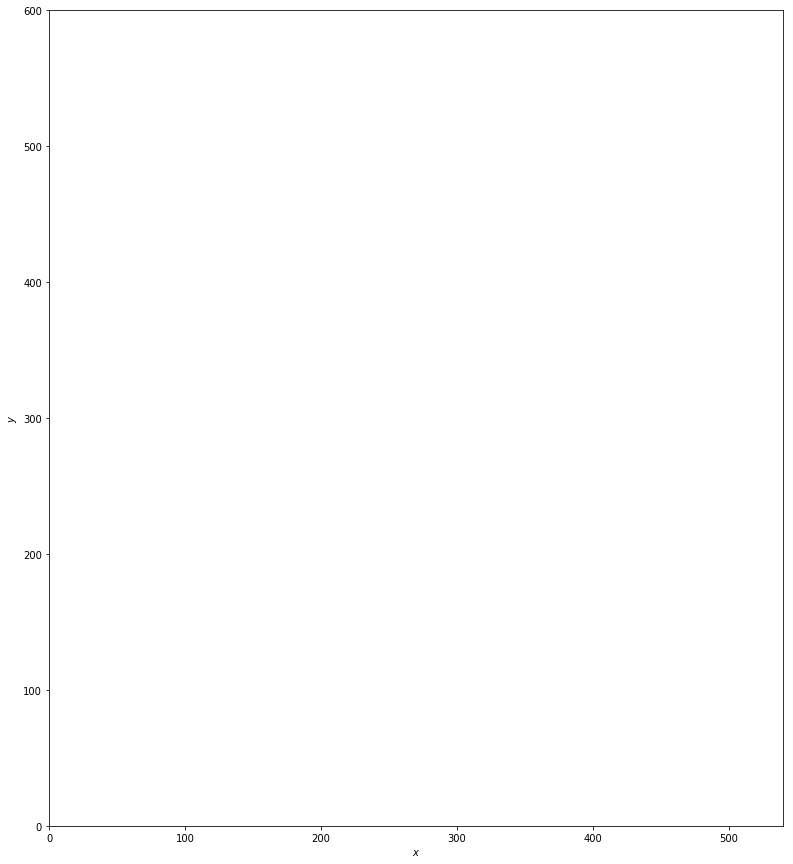

angle 0.0
move (3.0, 0.0)
509.978971691 442.959393917
131


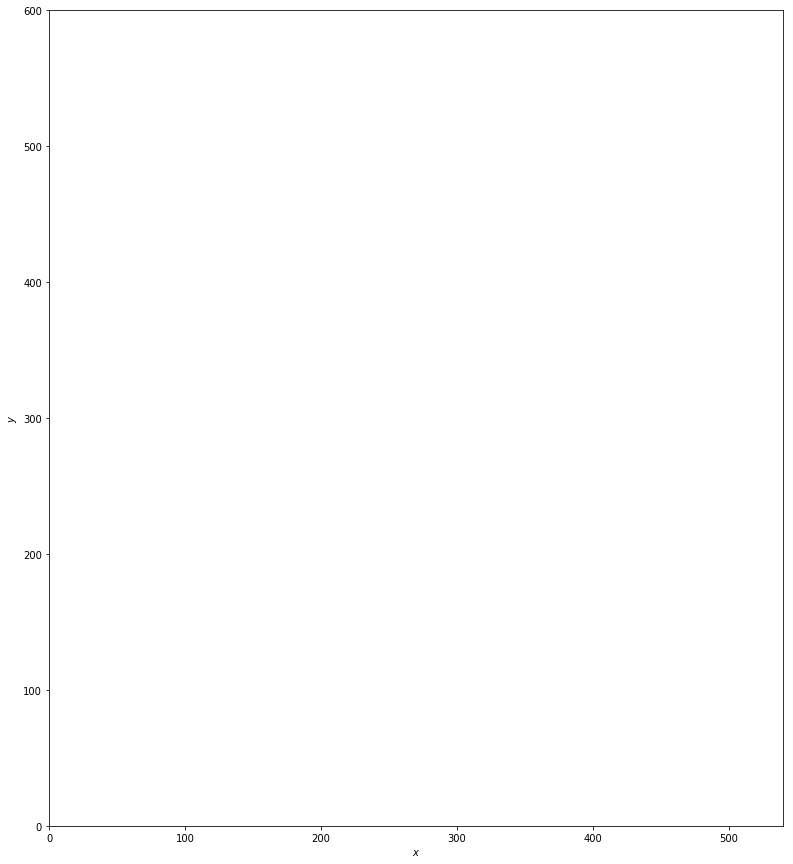

angle 0.0
move (3.0, 0.0)
512.978971691 442.959393917
132


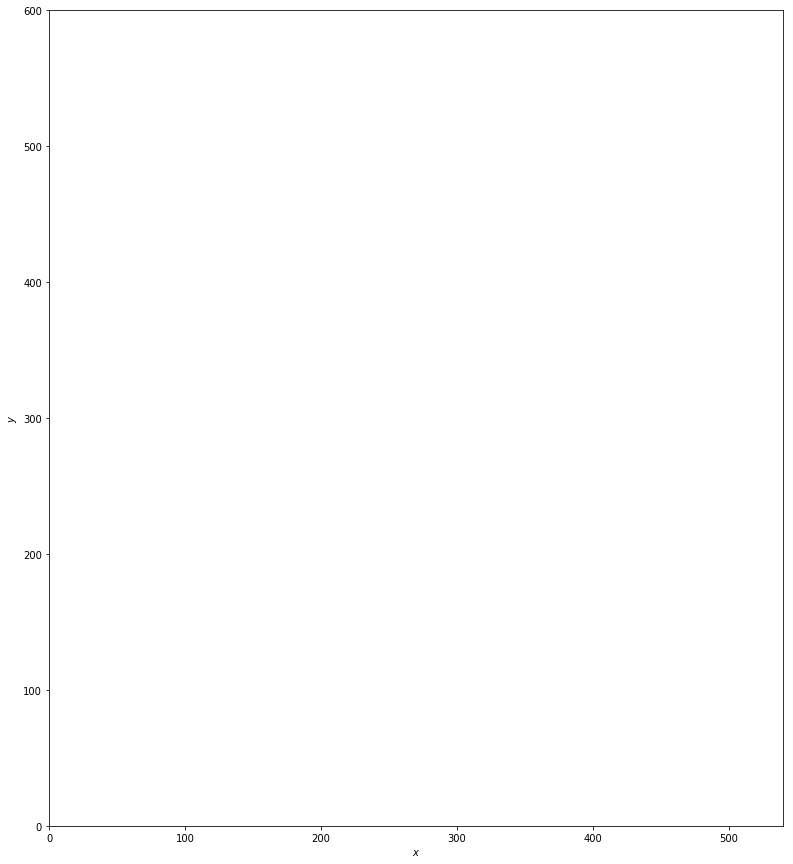

angle 0.0
move (3.0, 0.0)
515.978971691 442.959393917
133


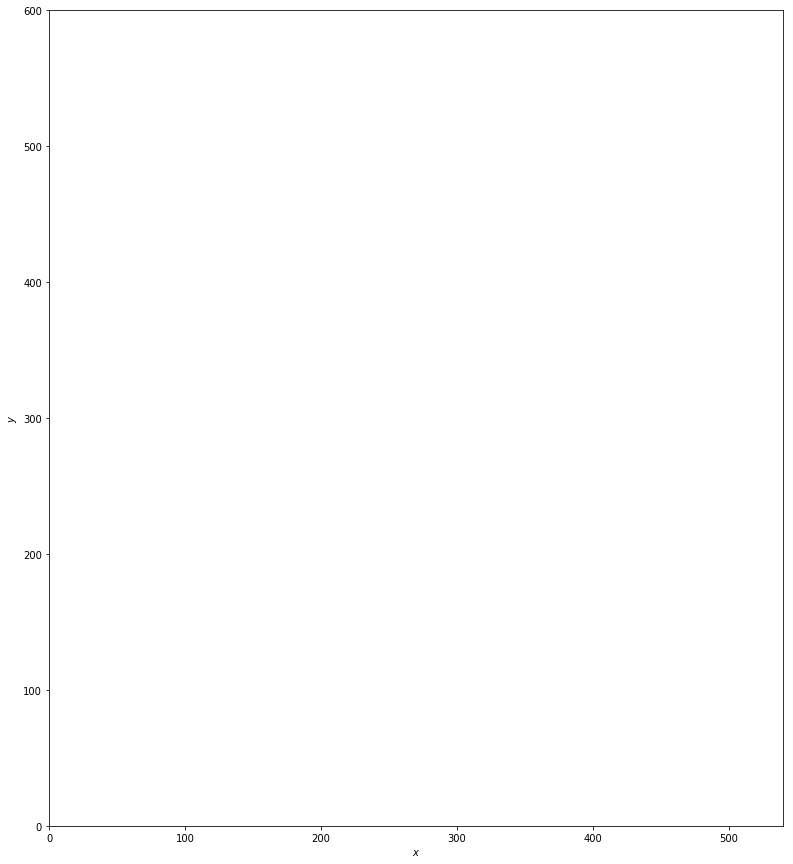

angle 0.0
move (3.0, 0.0)
518.978971691 442.959393917
134


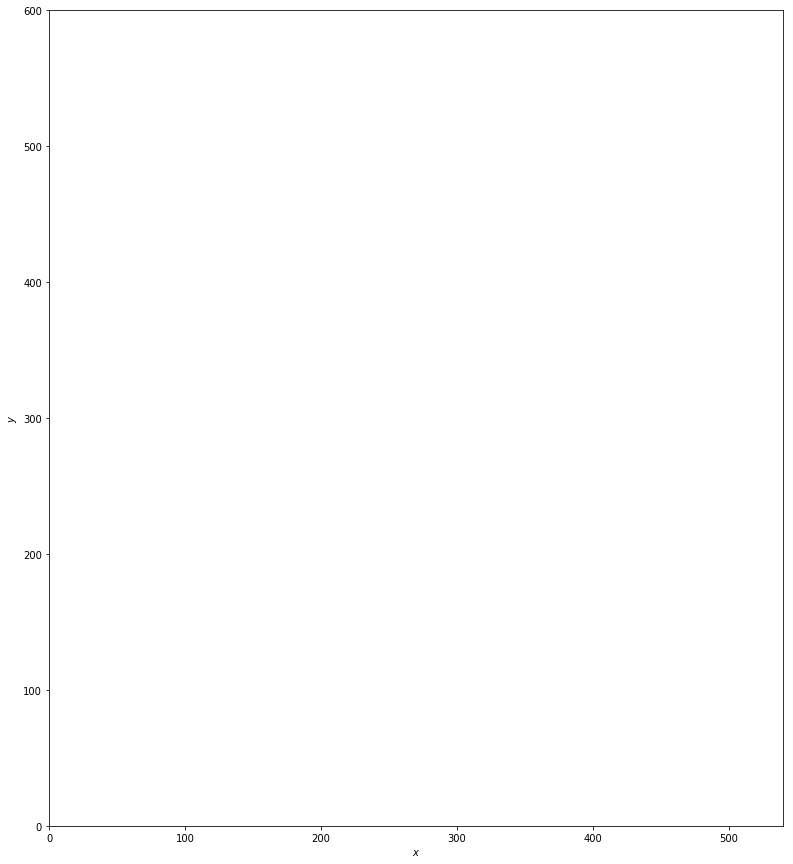

angle 0.0
move (3.0, 0.0)
521.978971691 442.959393917
135


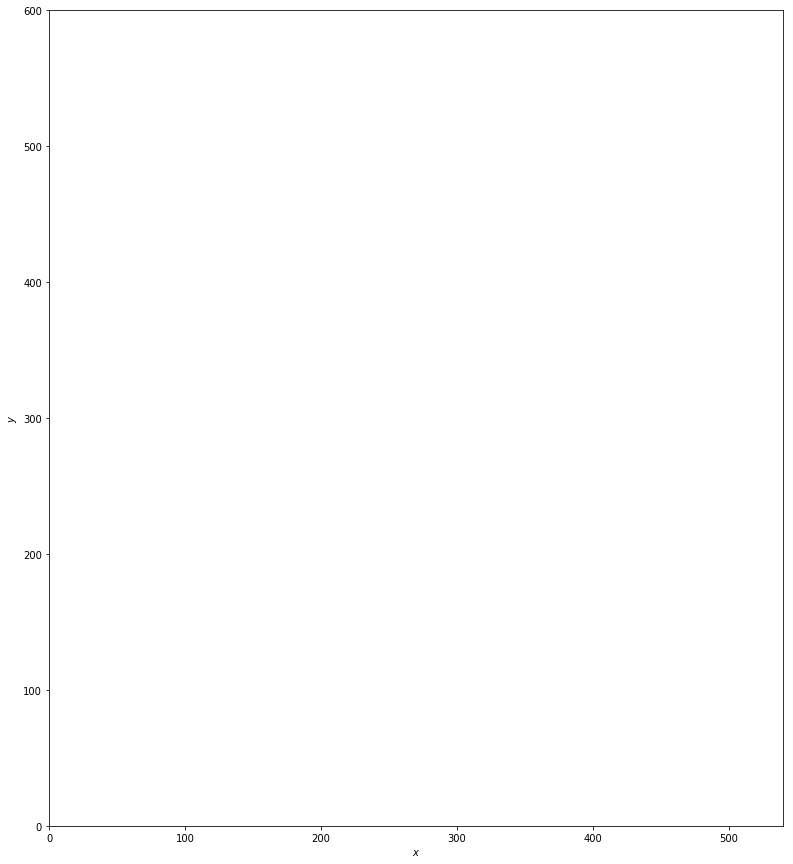

angle 0.0
move (3.0, 0.0)
524.978971691 442.959393917
136


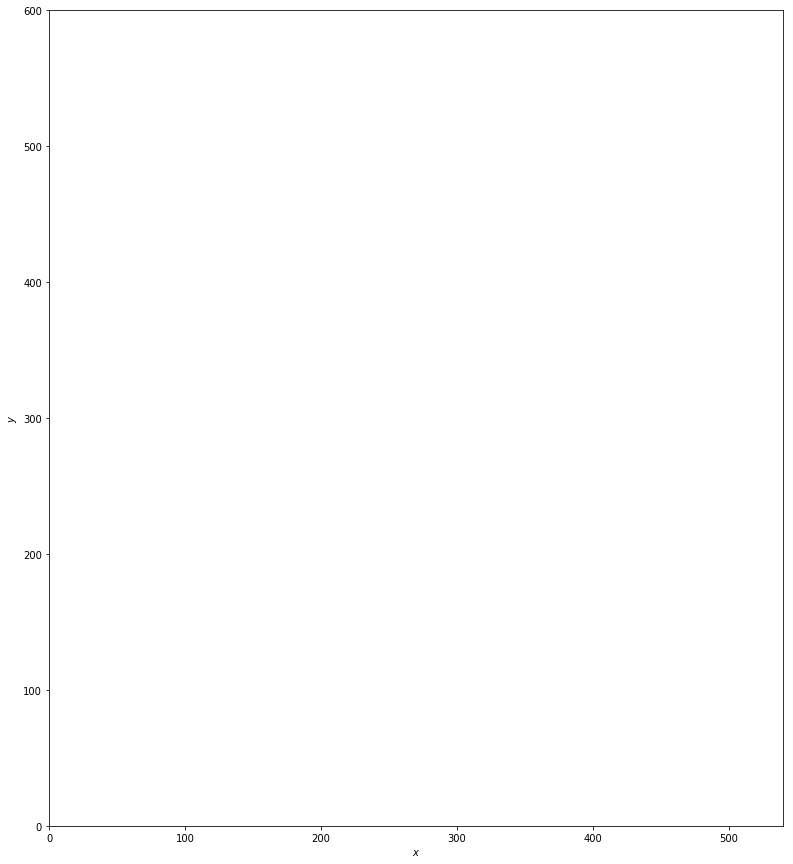

angle 0.0
move (3.0, 0.0)
527.978971691 442.959393917
137


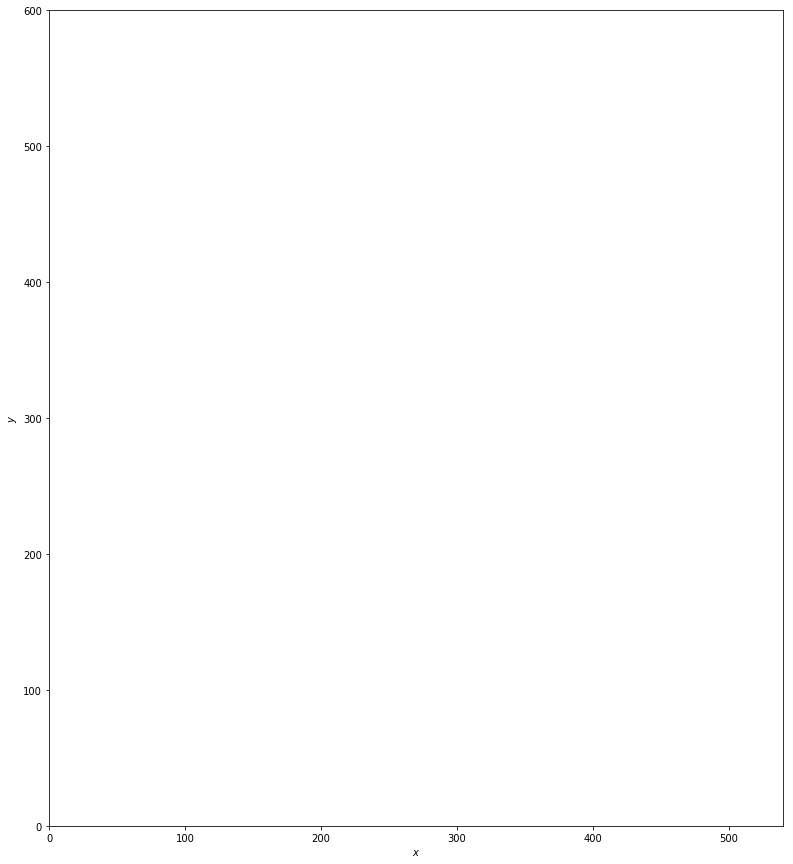

angle 0.0
move (3.0, 0.0)
530.978971691 442.959393917
138


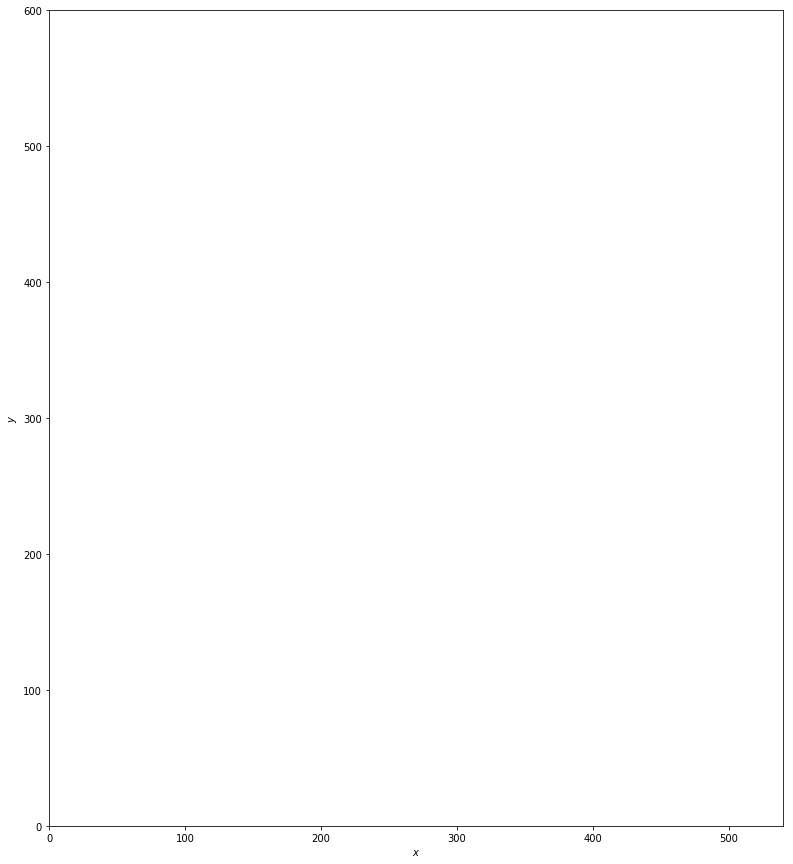

angle 0.0
move (3.0, 0.0)
533.978971691 442.959393917
139


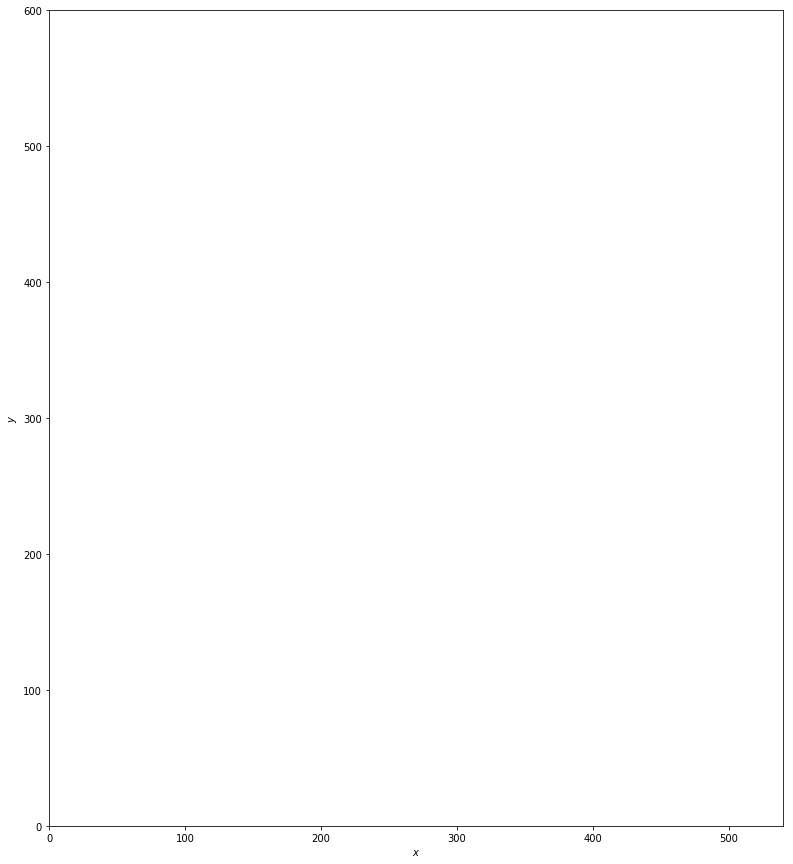

angle 0.0
move (3.0, 0.0)
536.978971691 442.959393917
140


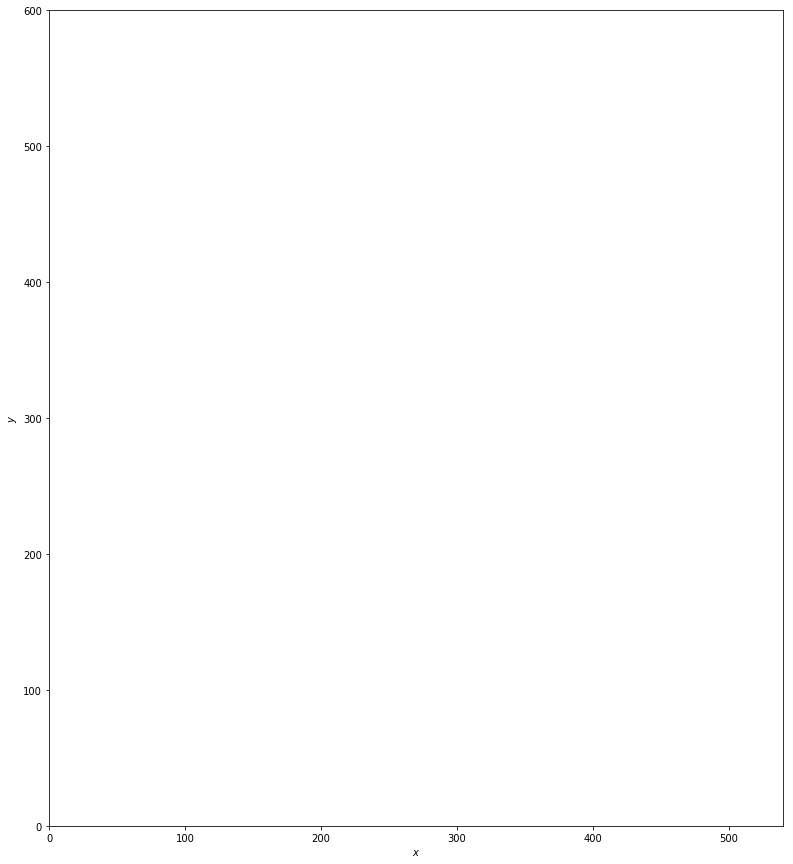

angle 0.0
move (3.0, 0.0)
539.978971691 442.959393917
141


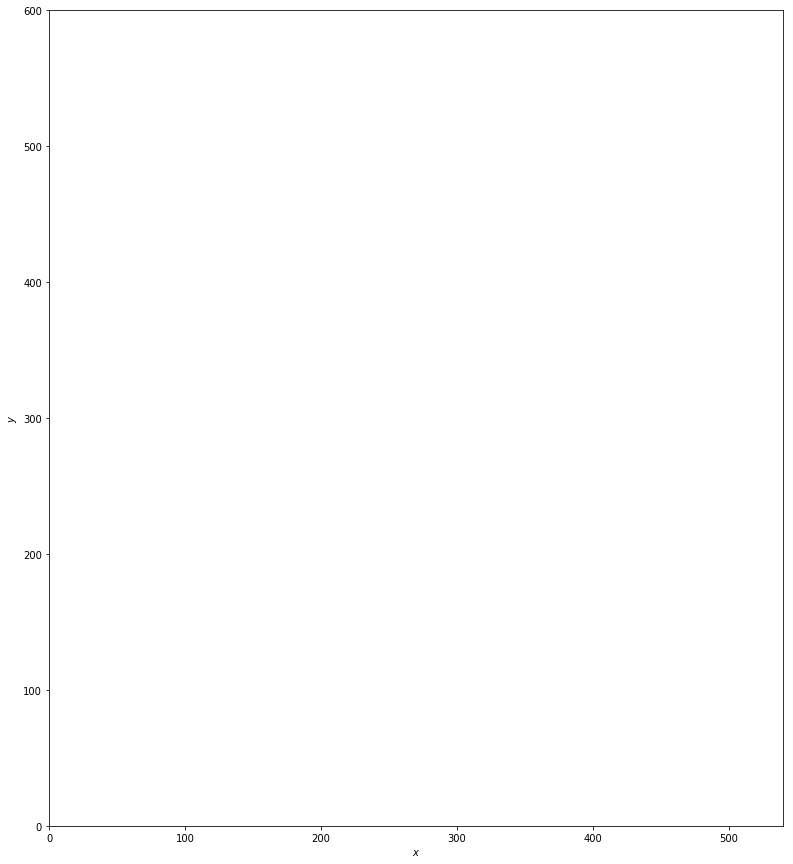

angle 0.0
move (3.0, 0.0)
542.978971691 442.959393917
142


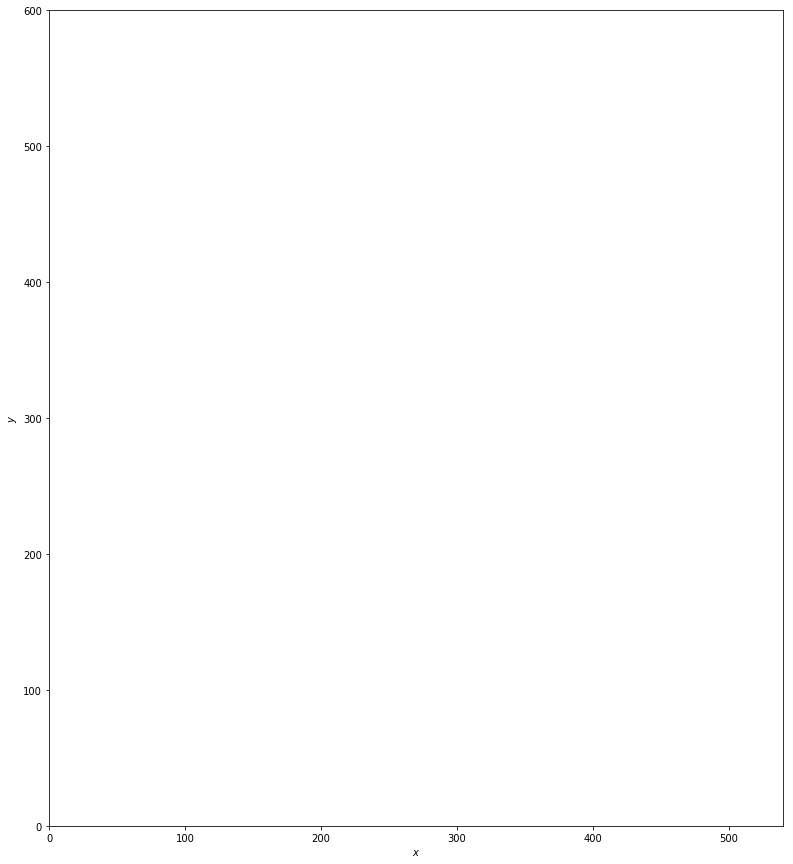

angle 0.0
move (3.0, 0.0)
545.978971691 442.959393917
143


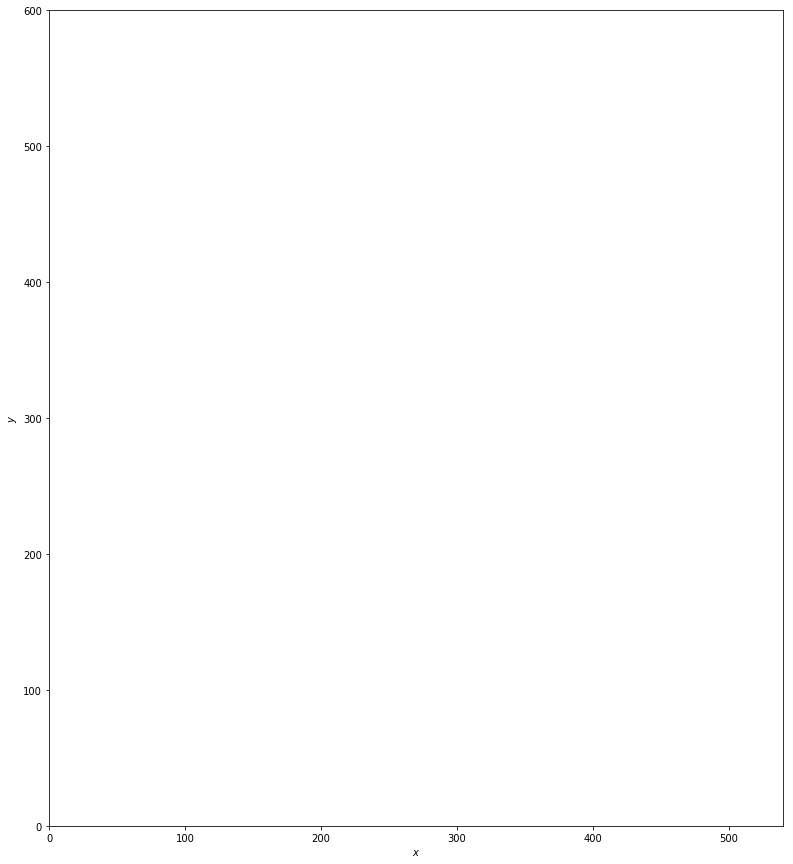

angle 0.0
move (3.0, 0.0)
548.978971691 442.959393917
144


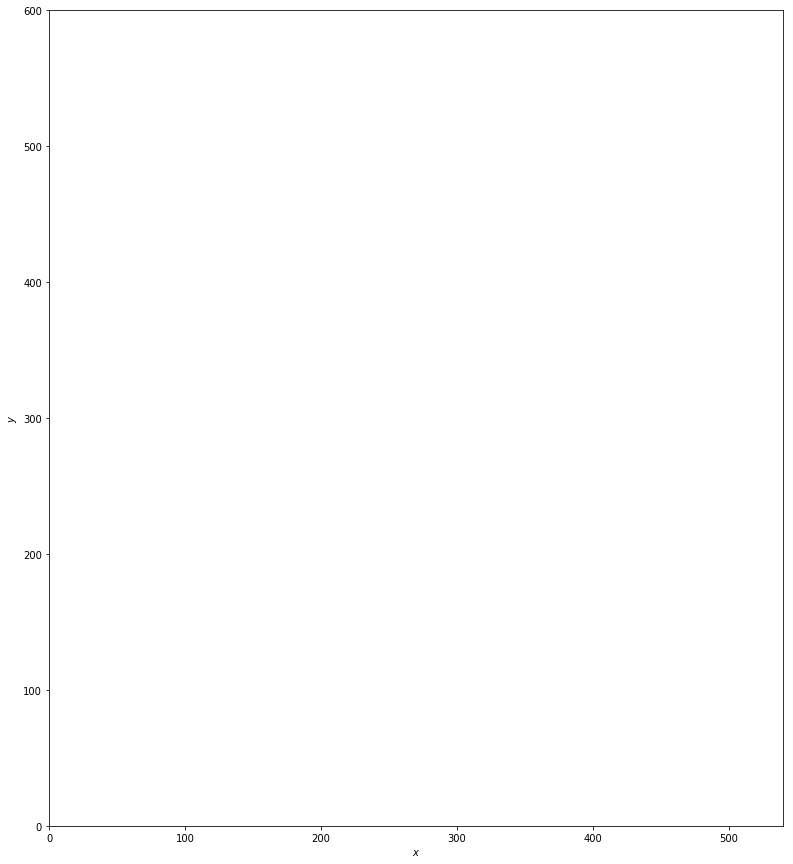

angle 0.0
move (3.0, 0.0)
551.978971691 442.959393917
145


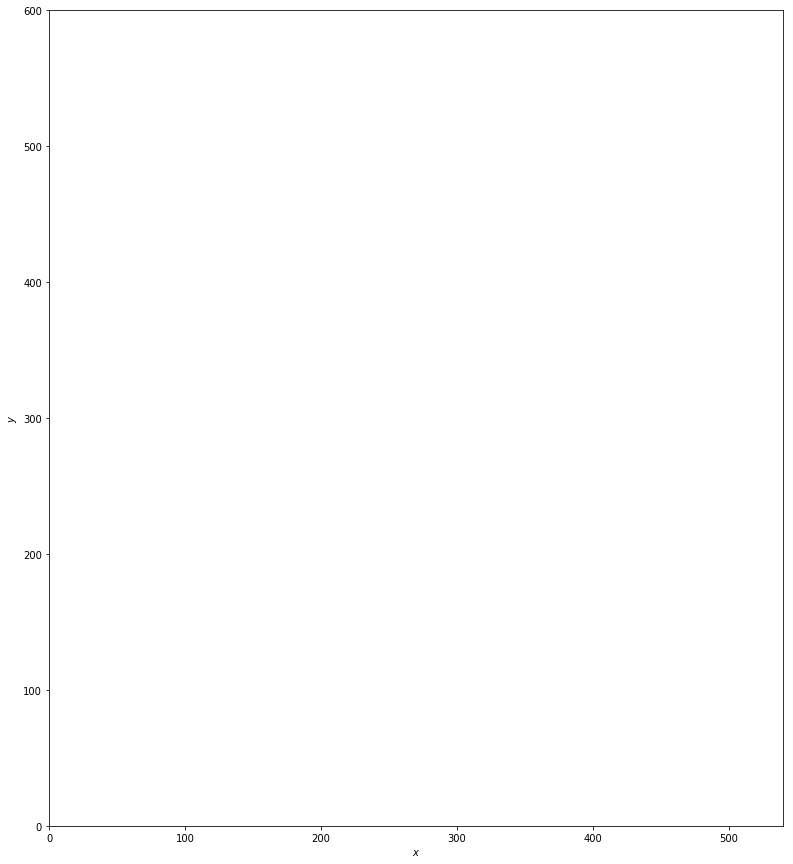

angle 0.0
move (3.0, 0.0)
554.978971691 442.959393917
146


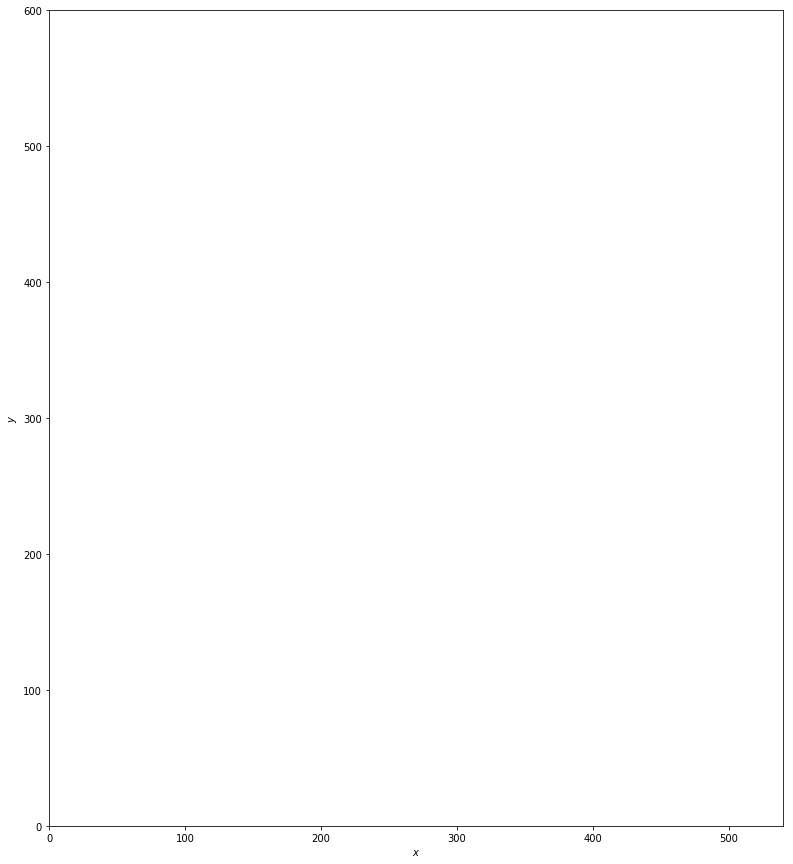

angle 0.0
move (3.0, 0.0)
557.978971691 442.959393917
147


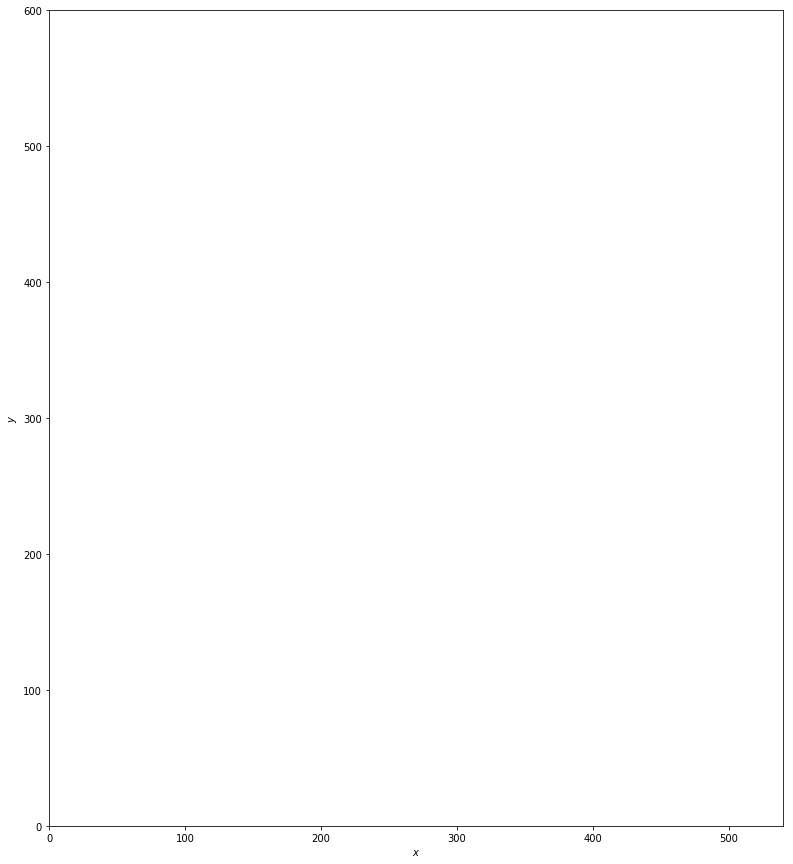

angle 0.0
move (3.0, 0.0)
560.978971691 442.959393917
148


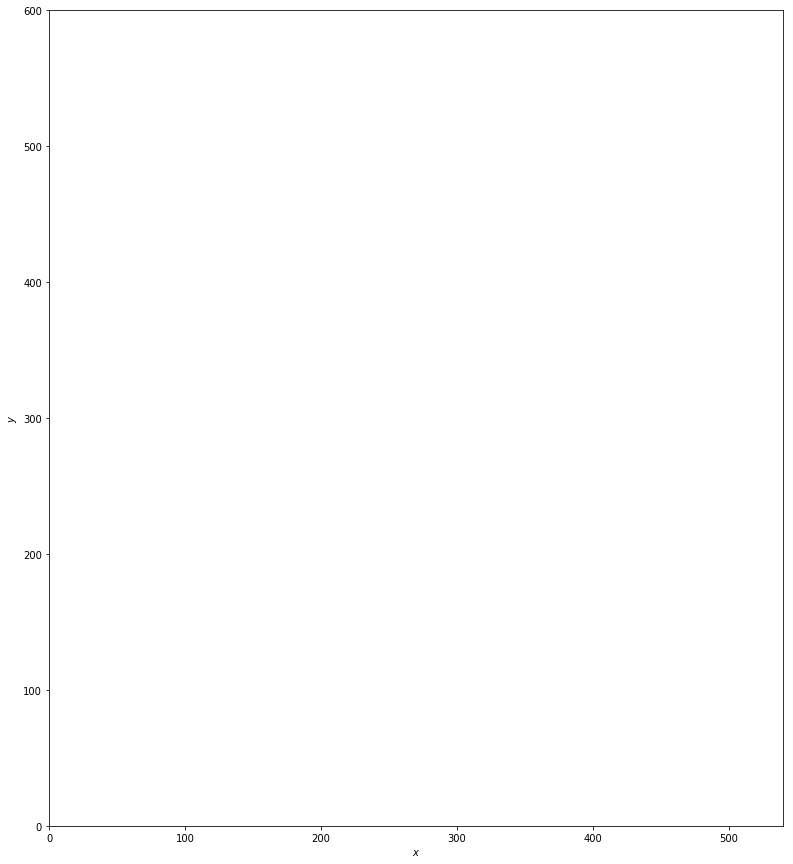

angle 0.0
move (3.0, 0.0)
563.978971691 442.959393917
149


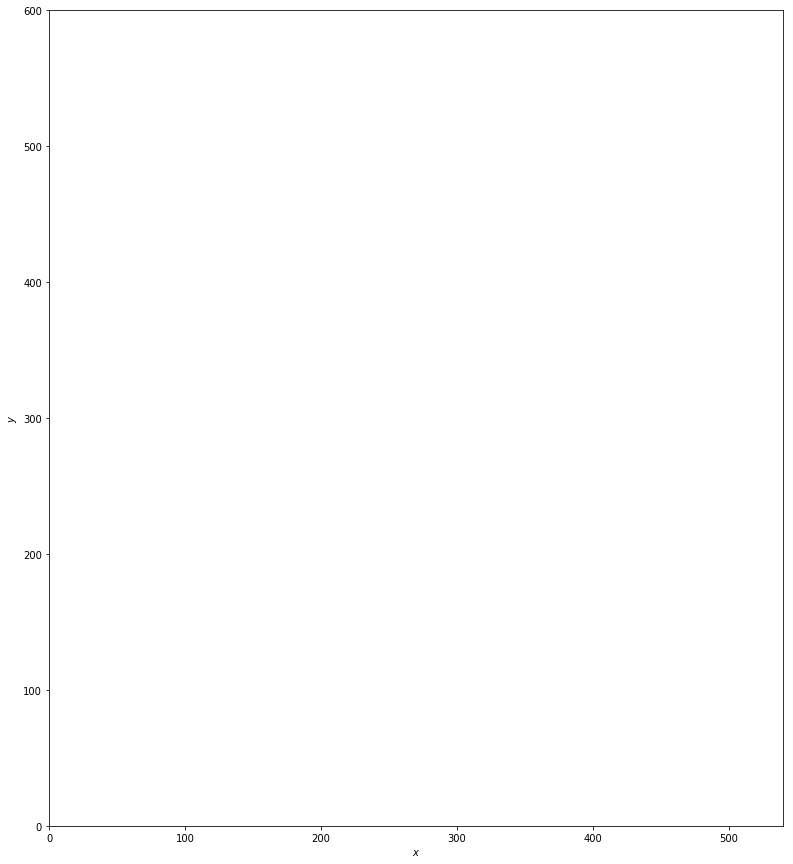

angle 0.0
move (3.0, 0.0)
566.978971691 442.959393917
150


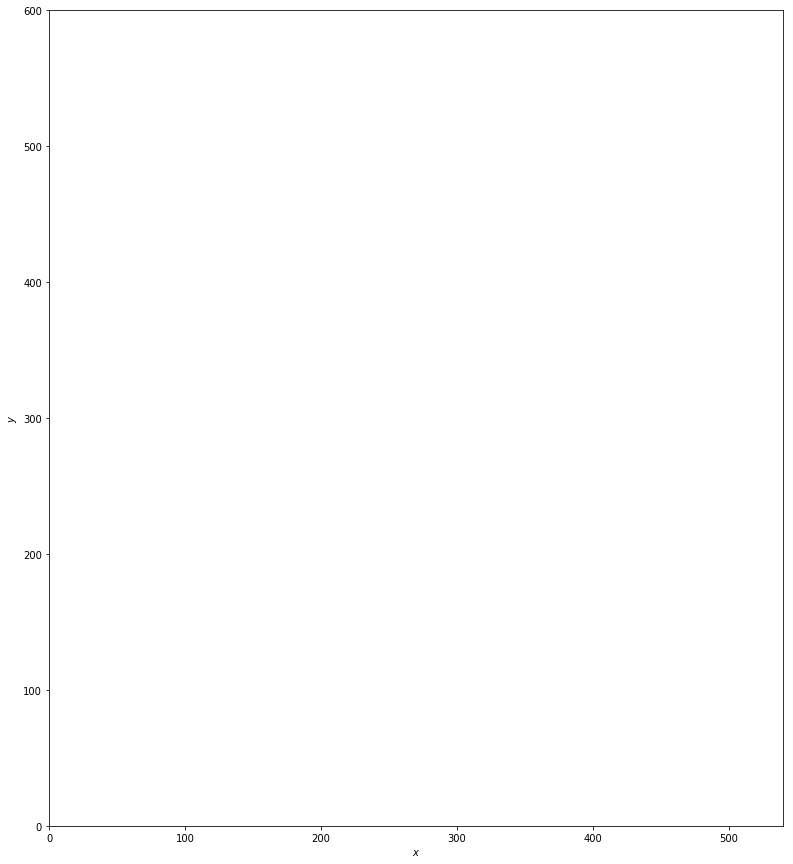

angle 0.0
move (3.0, 0.0)
569.978971691 442.959393917
151


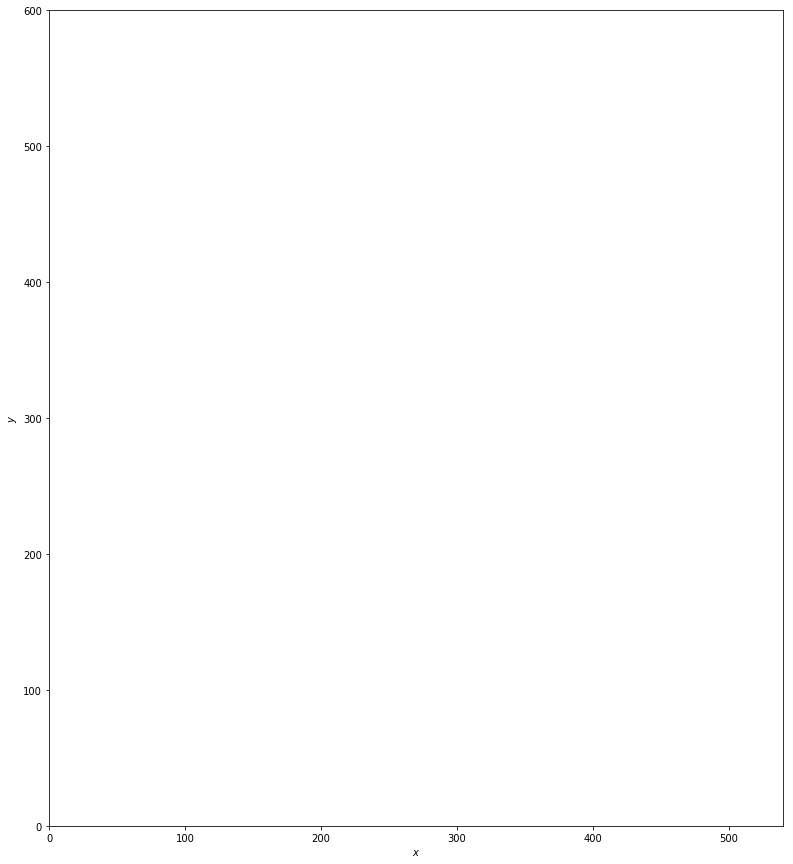

angle 0.0
move (3.0, 0.0)
572.978971691 442.959393917
152


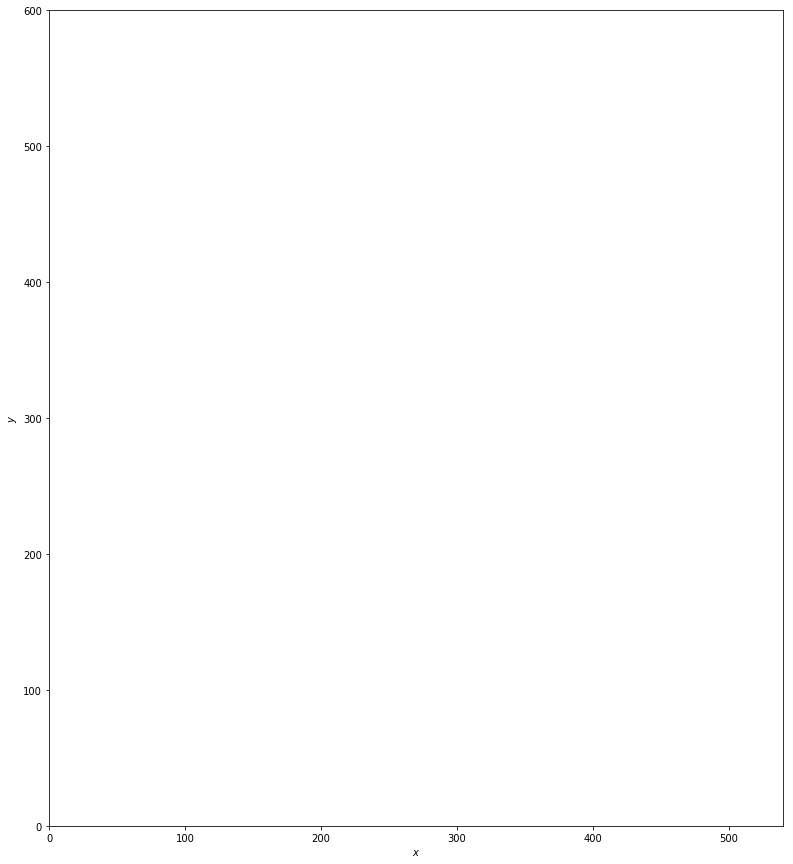

angle 0.0
move (3.0, 0.0)
575.978971691 442.959393917
153


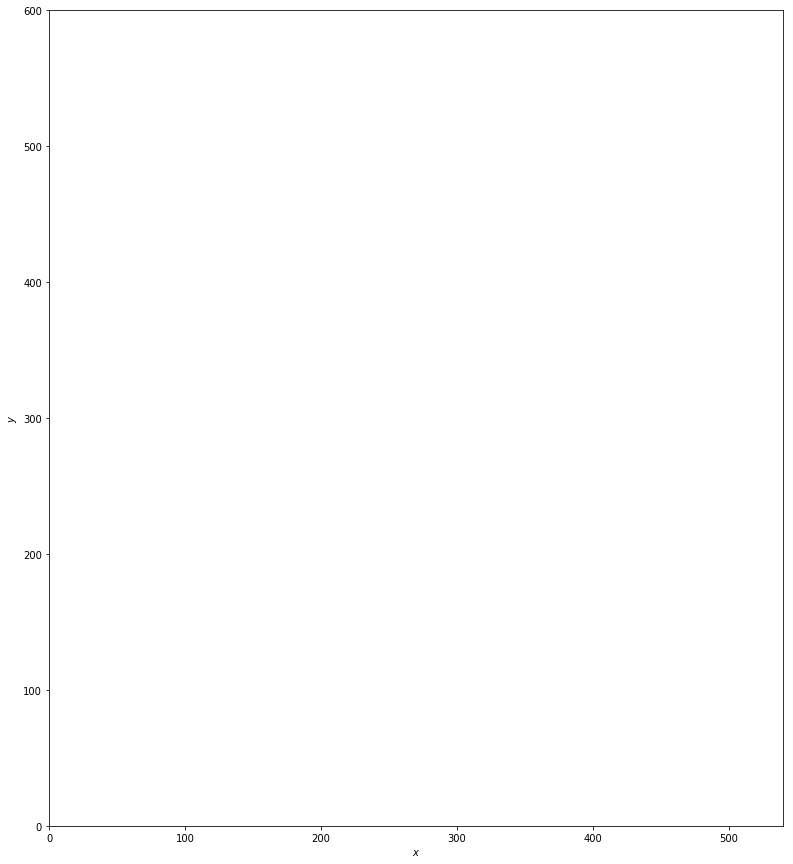

angle 0.0
move (3.0, 0.0)
578.978971691 442.959393917
154


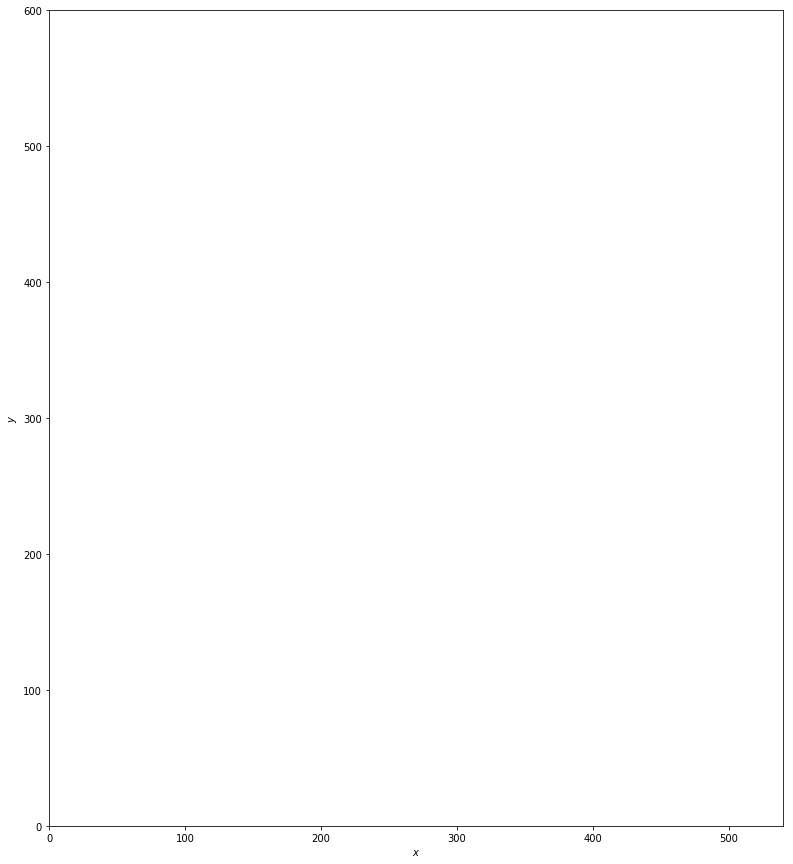

angle 0.0
move (3.0, 0.0)
581.978971691 442.959393917
155


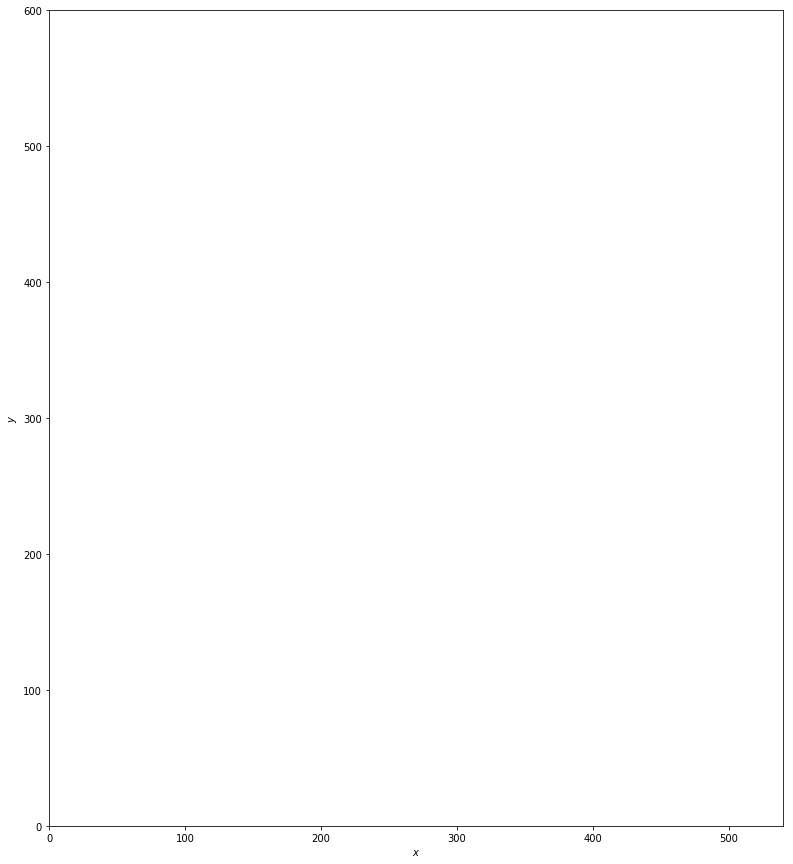

angle 0.0
move (3.0, 0.0)
584.978971691 442.959393917
156


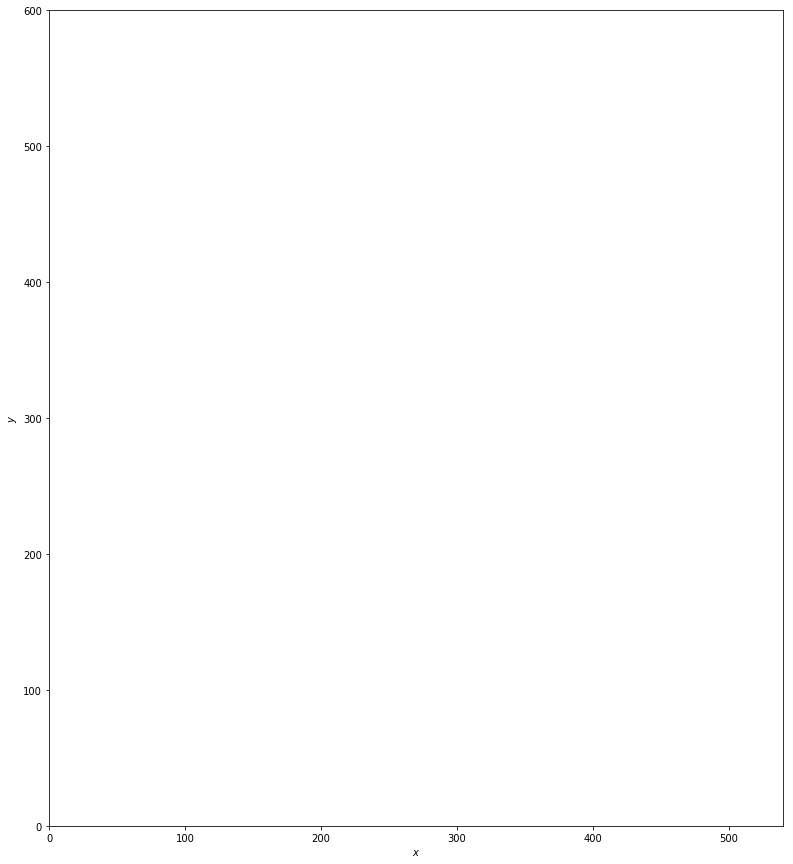

angle 0.0
move (3.0, 0.0)
587.978971691 442.959393917
157


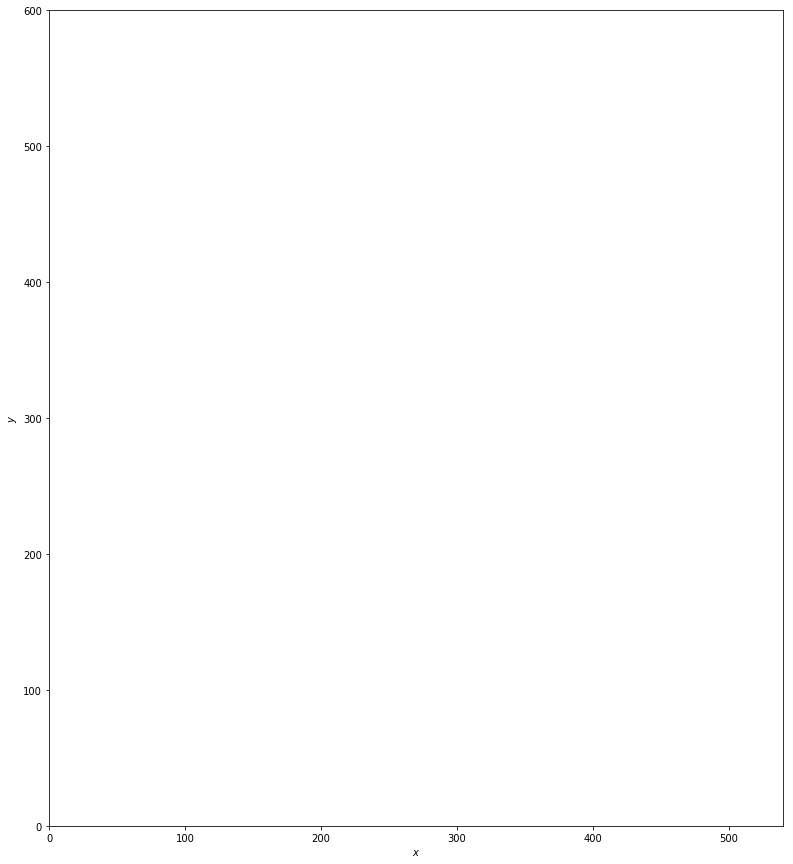

angle 0.0
move (3.0, 0.0)
590.978971691 442.959393917
158


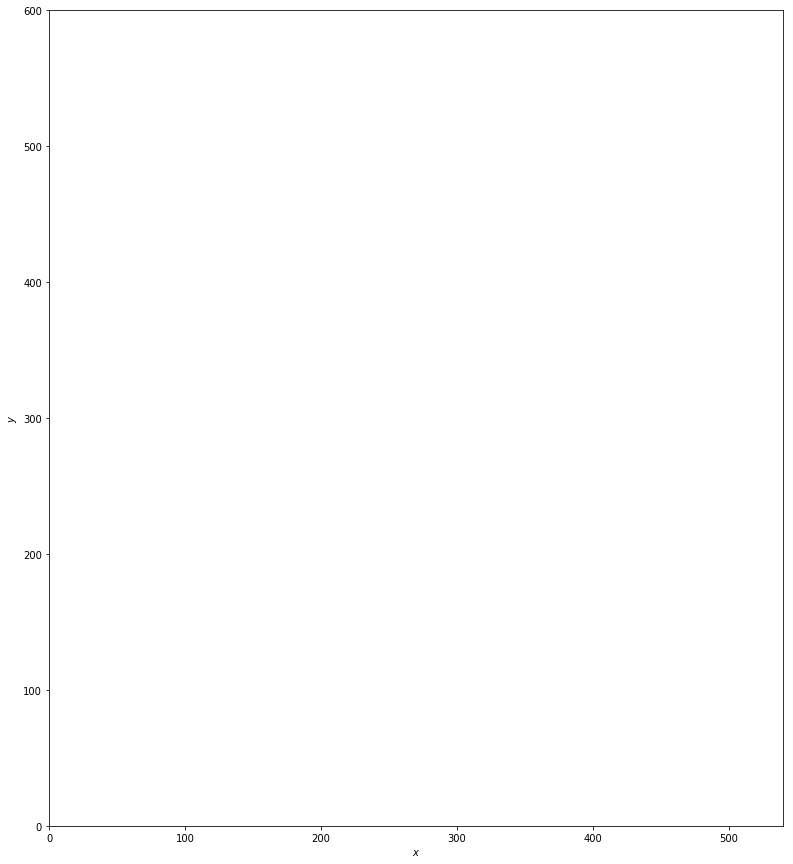

angle 0.0
move (3.0, 0.0)
593.978971691 442.959393917
159


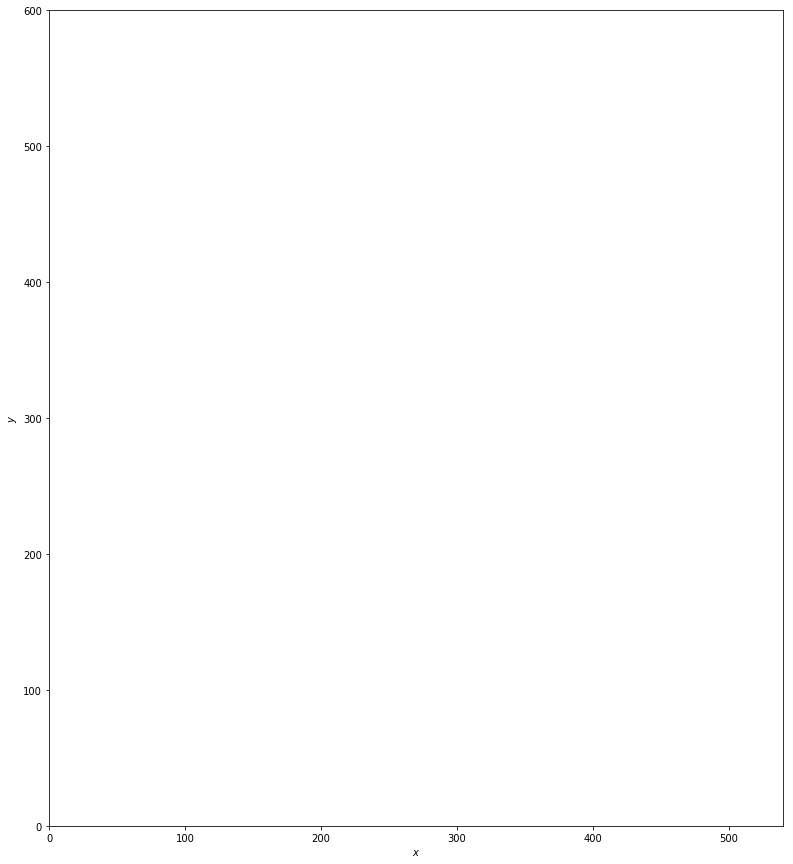

angle 0.0
move (3.0, 0.0)
596.978971691 442.959393917
160


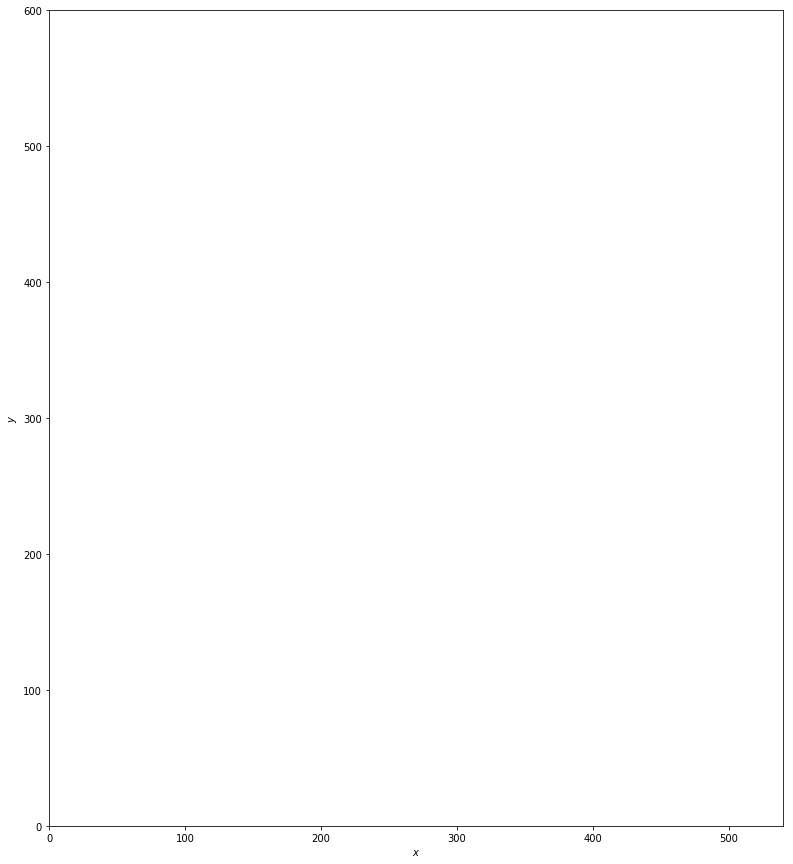

angle 0.0
move (3.0, 0.0)
599.978971691 442.959393917
161


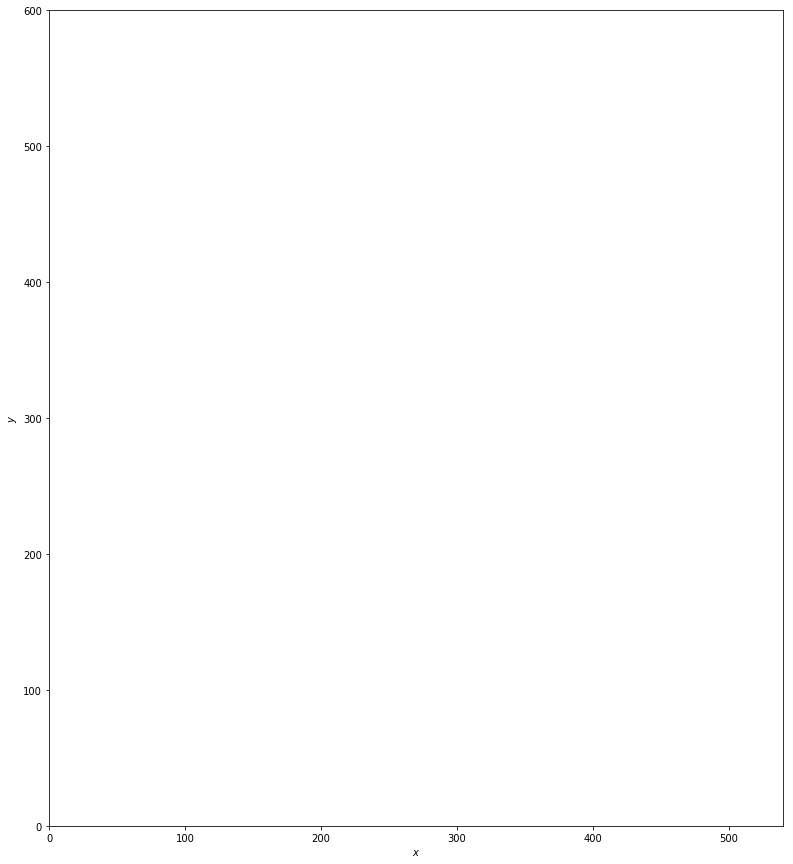

angle 0.0
move (3.0, 0.0)
602.978971691 442.959393917
162


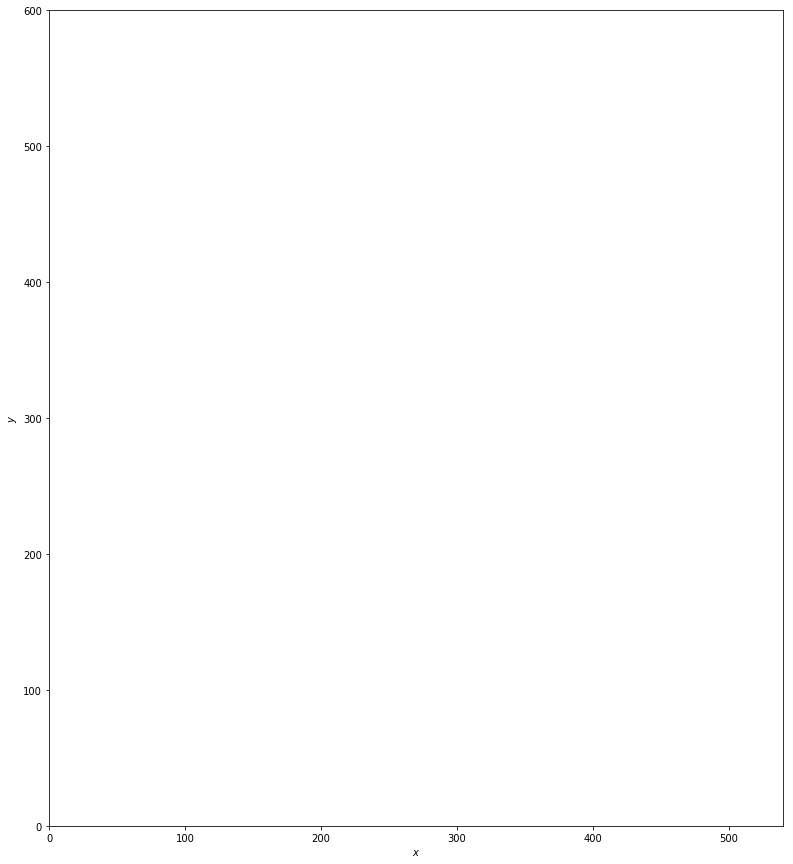

angle 0.0
move (3.0, 0.0)
605.978971691 442.959393917
163


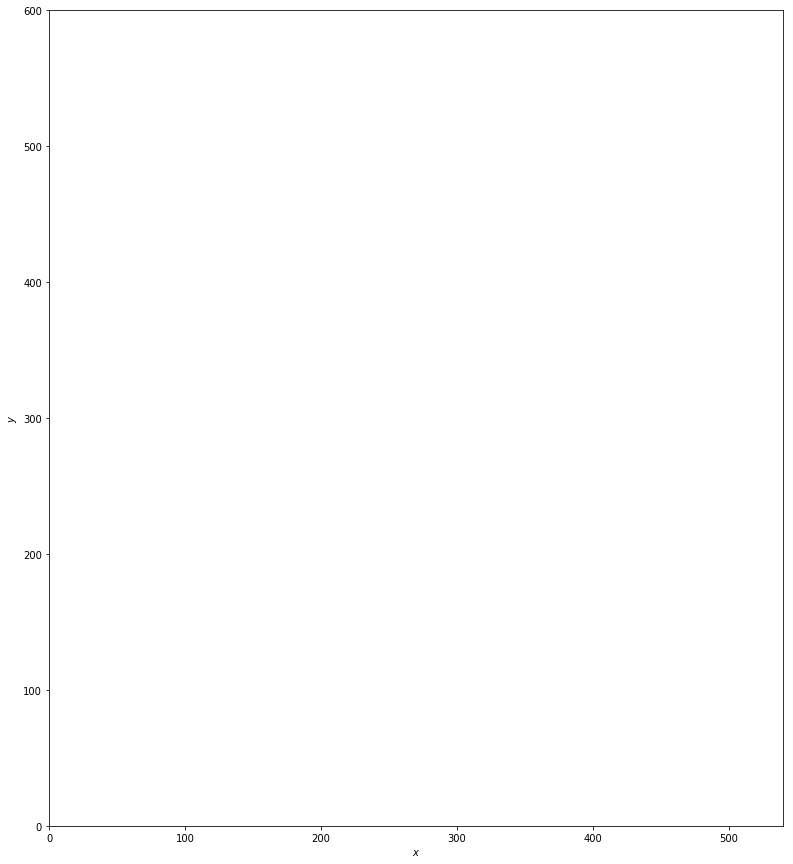

angle 0.0
move (3.0, 0.0)
608.978971691 442.959393917
164


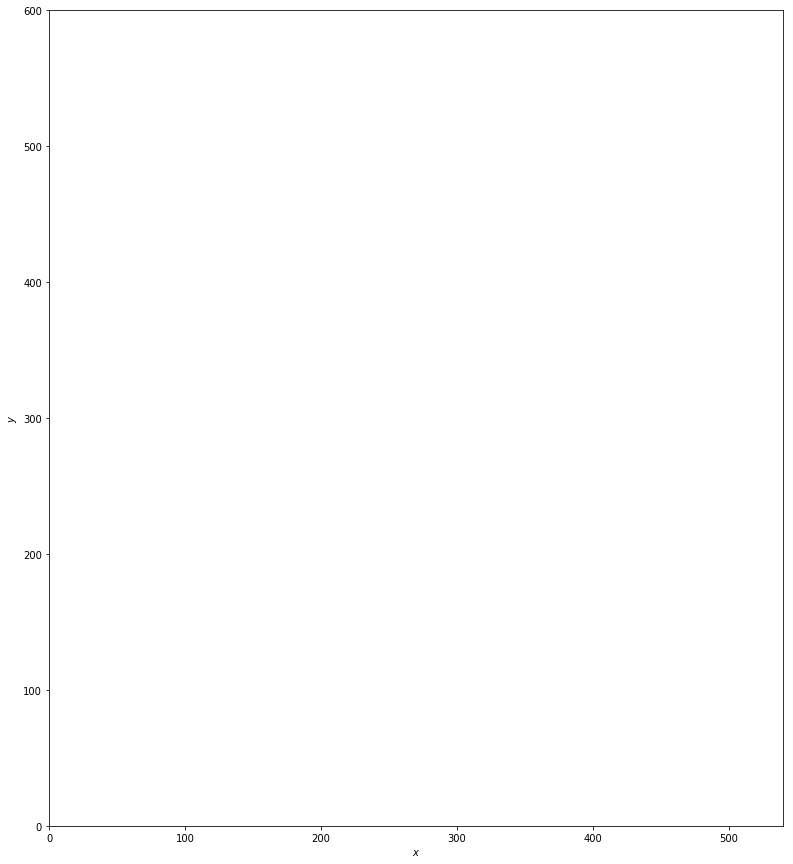

angle 0.0
move (3.0, 0.0)
611.978971691 442.959393917
165


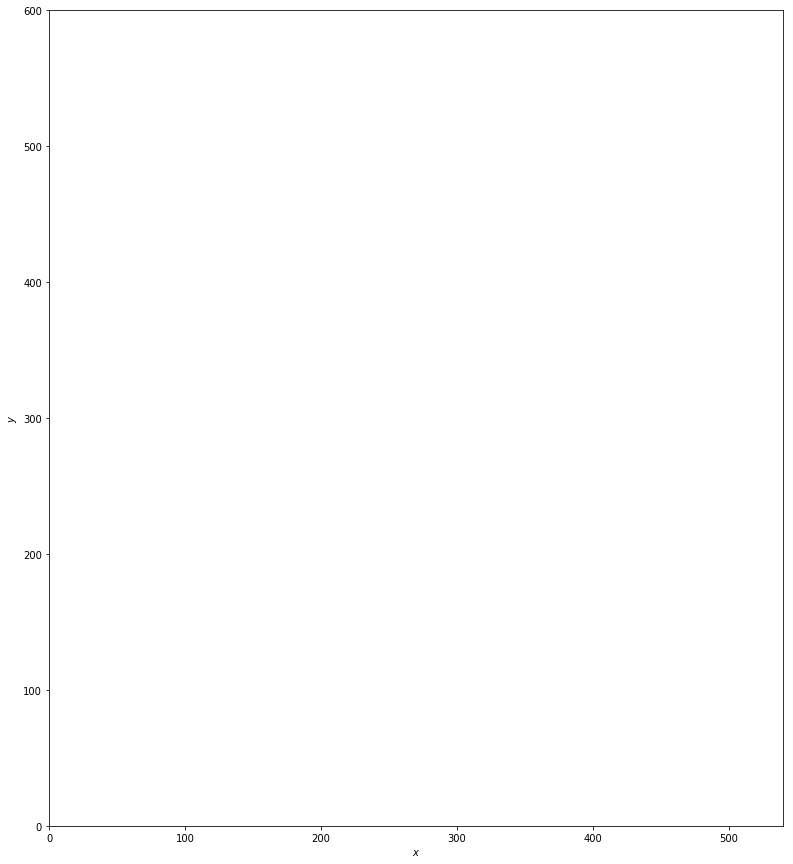

angle 0.0
move (3.0, 0.0)
614.978971691 442.959393917
166


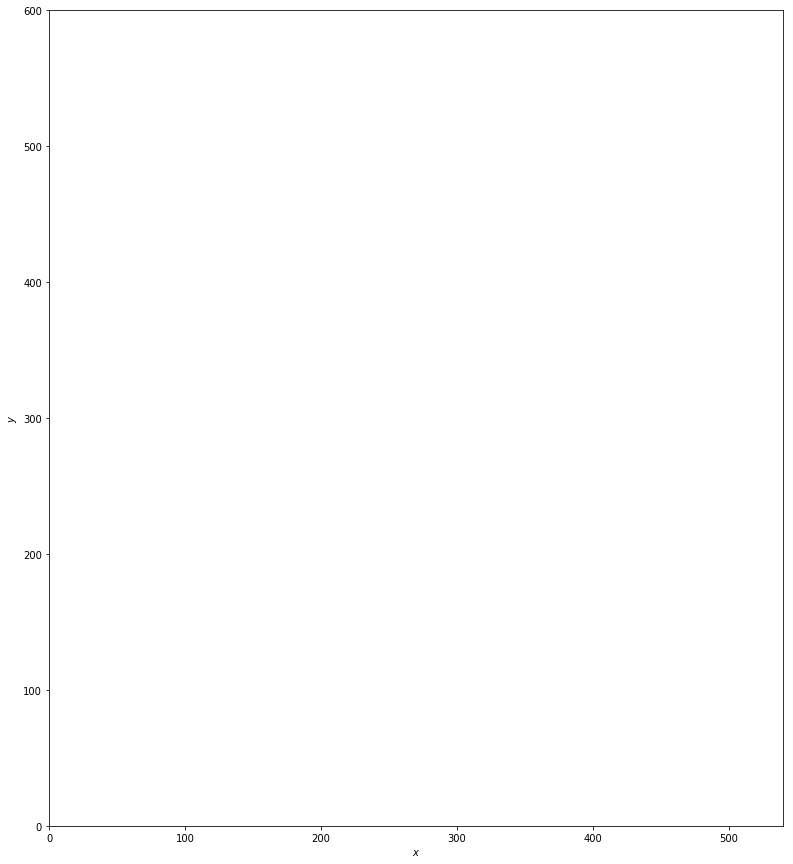

angle 0.0
move (3.0, 0.0)
617.978971691 442.959393917
167


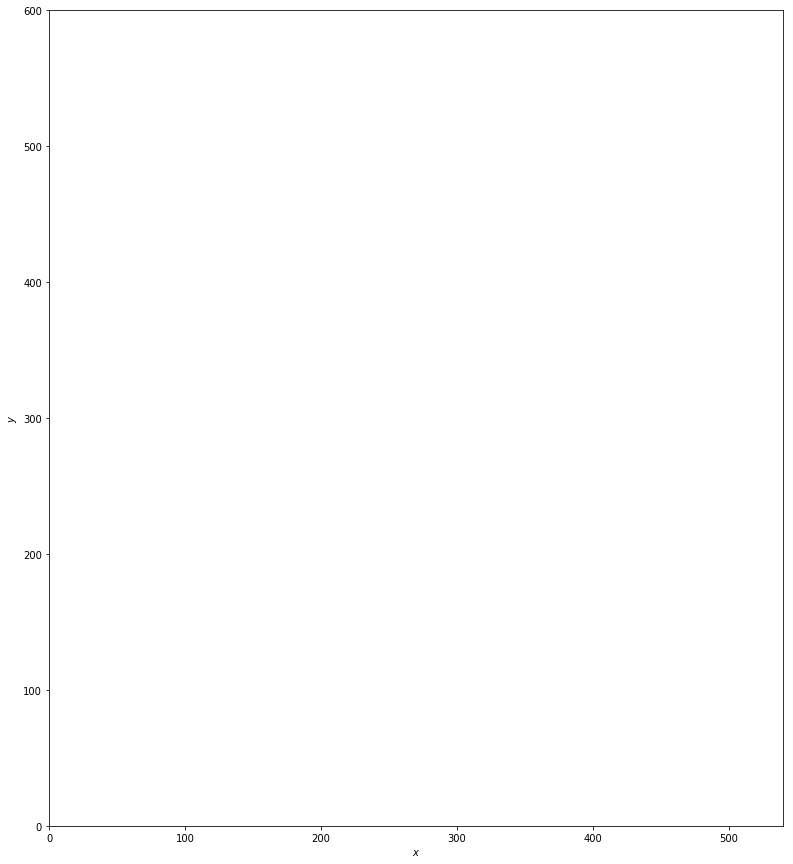

angle 0.0
move (3.0, 0.0)
620.978971691 442.959393917
168


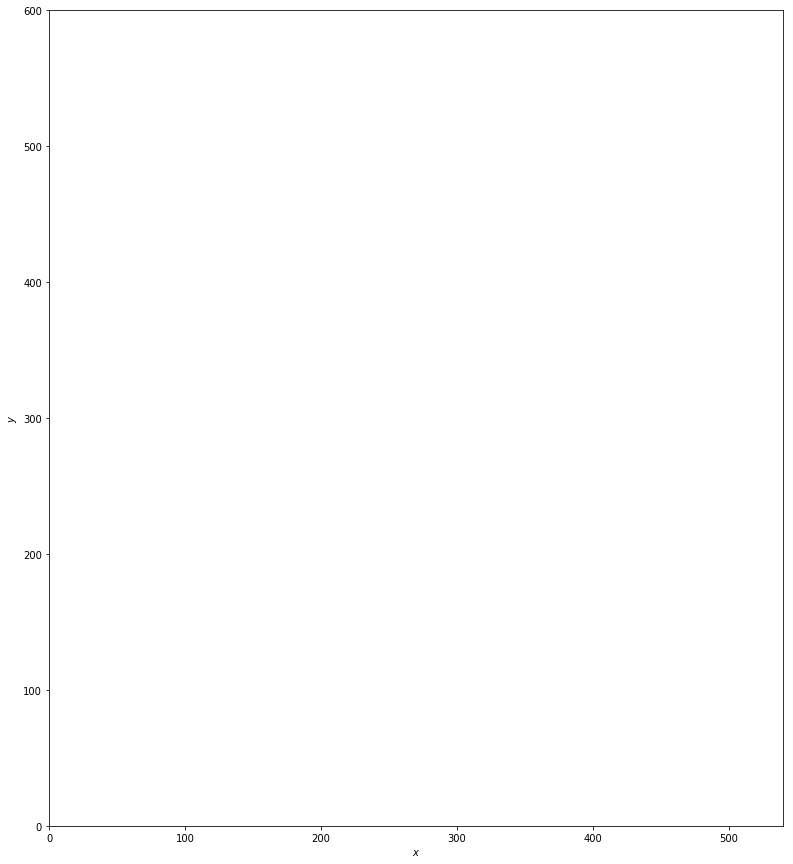

angle 0.0
move (3.0, 0.0)
623.978971691 442.959393917
169


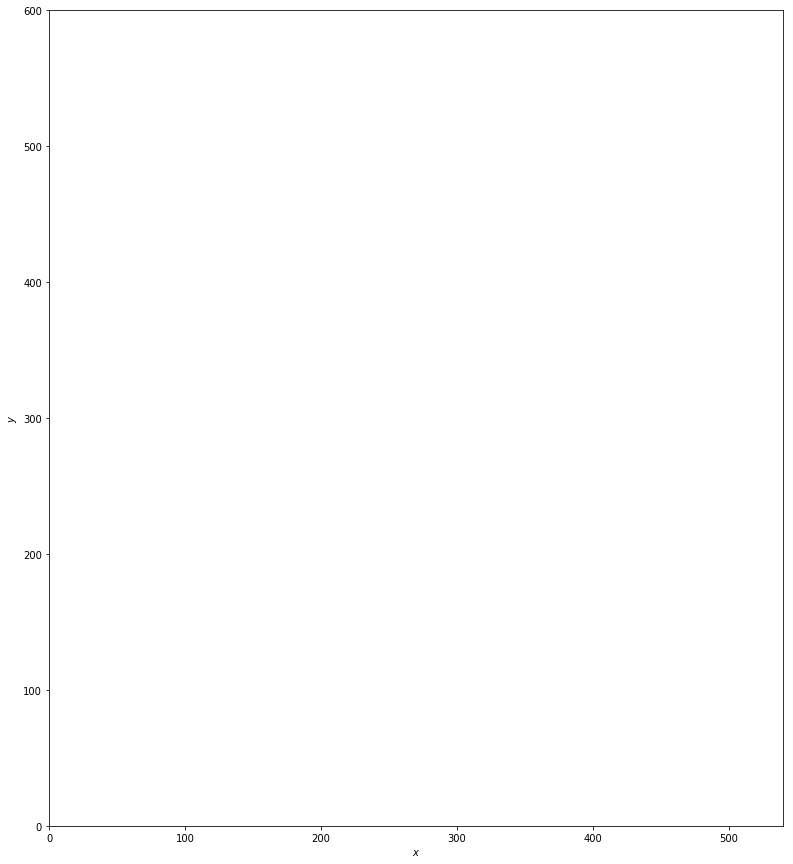

angle 0.0
move (3.0, 0.0)
626.978971691 442.959393917
170


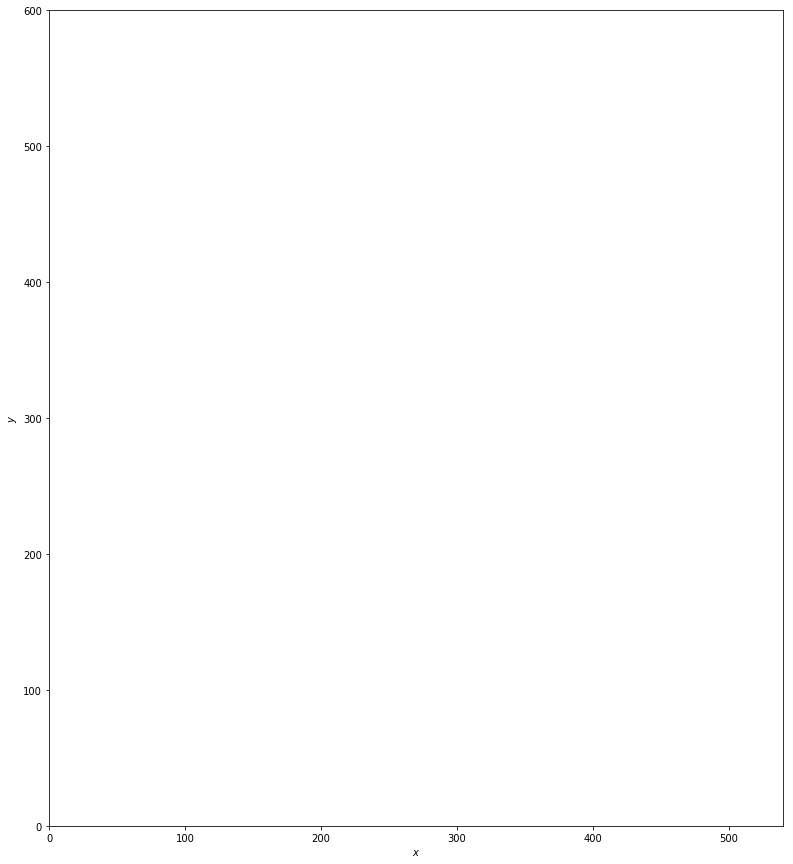

angle 0.0
move (3.0, 0.0)
629.978971691 442.959393917
171


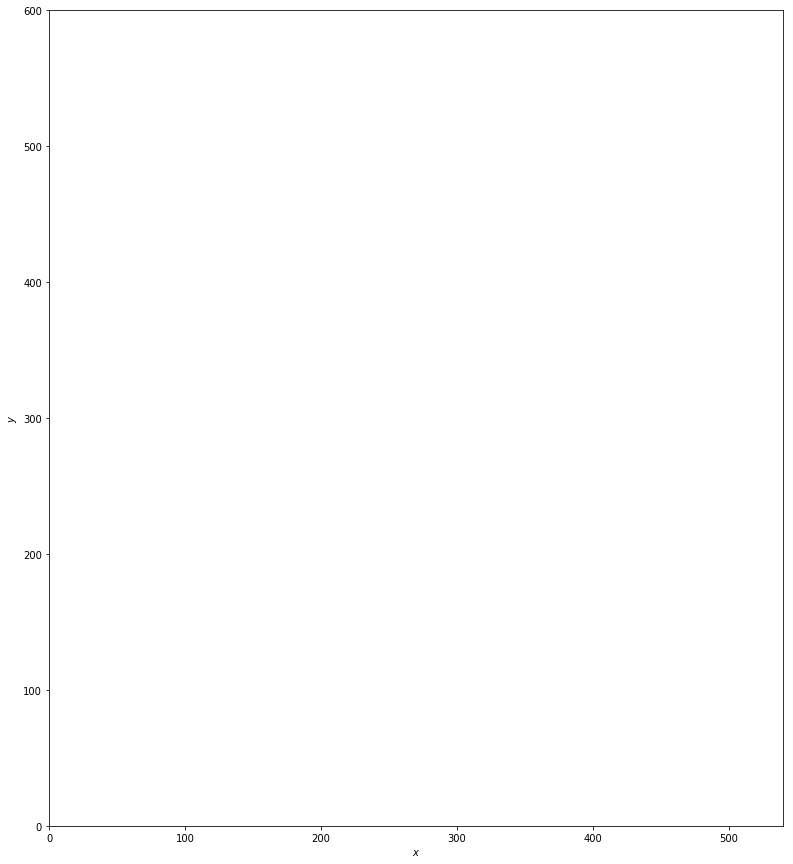

angle 0.0
move (3.0, 0.0)
632.978971691 442.959393917
172


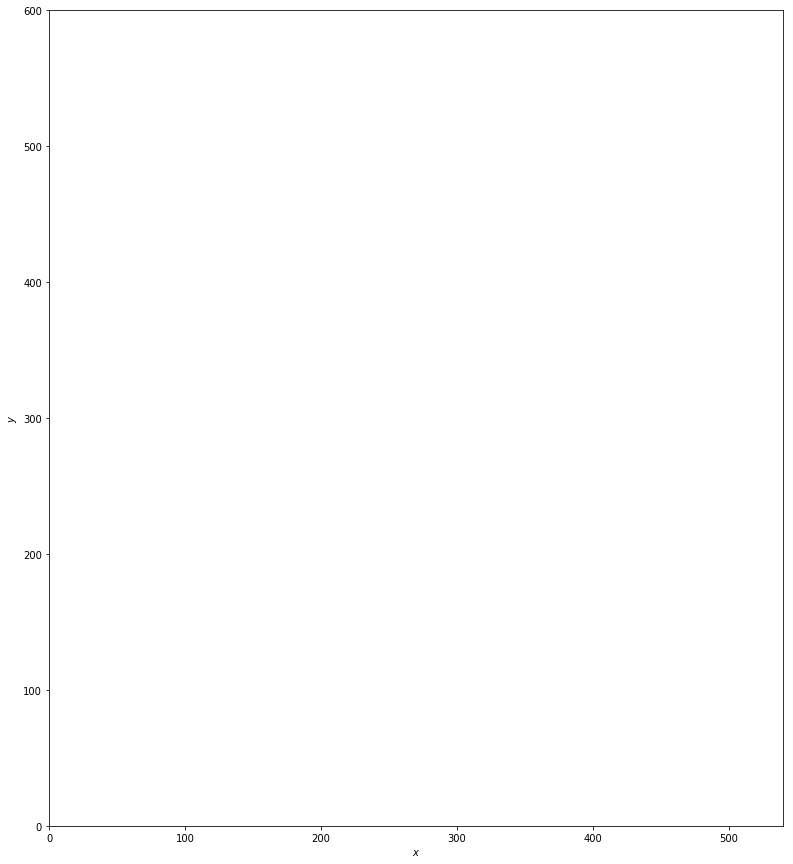

angle 0.0
move (3.0, 0.0)
635.978971691 442.959393917
173


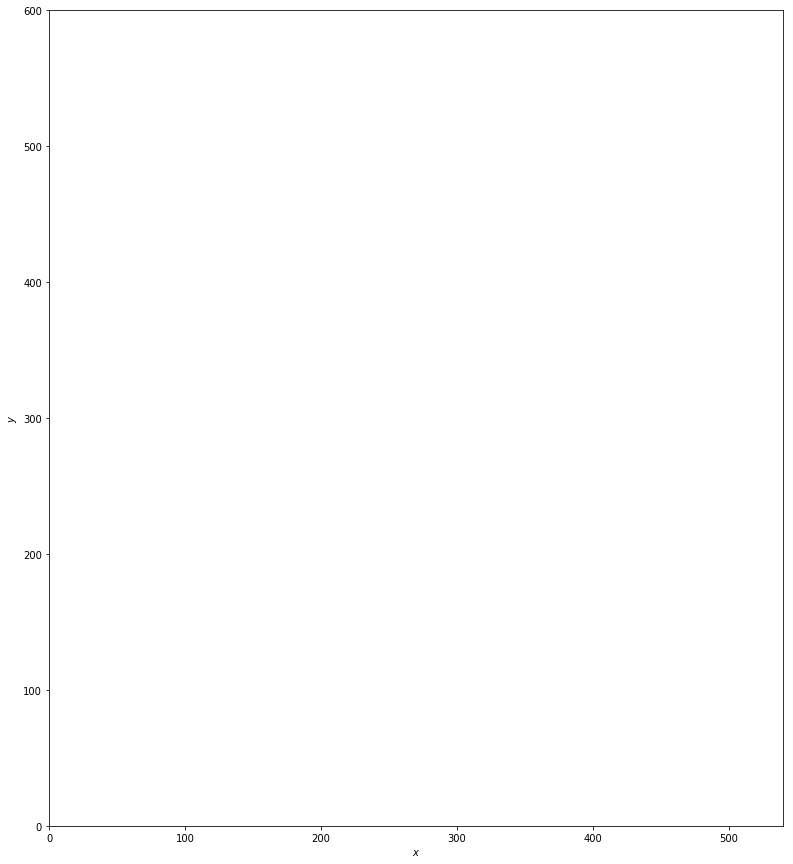

angle 0.0
move (3.0, 0.0)
638.978971691 442.959393917
174


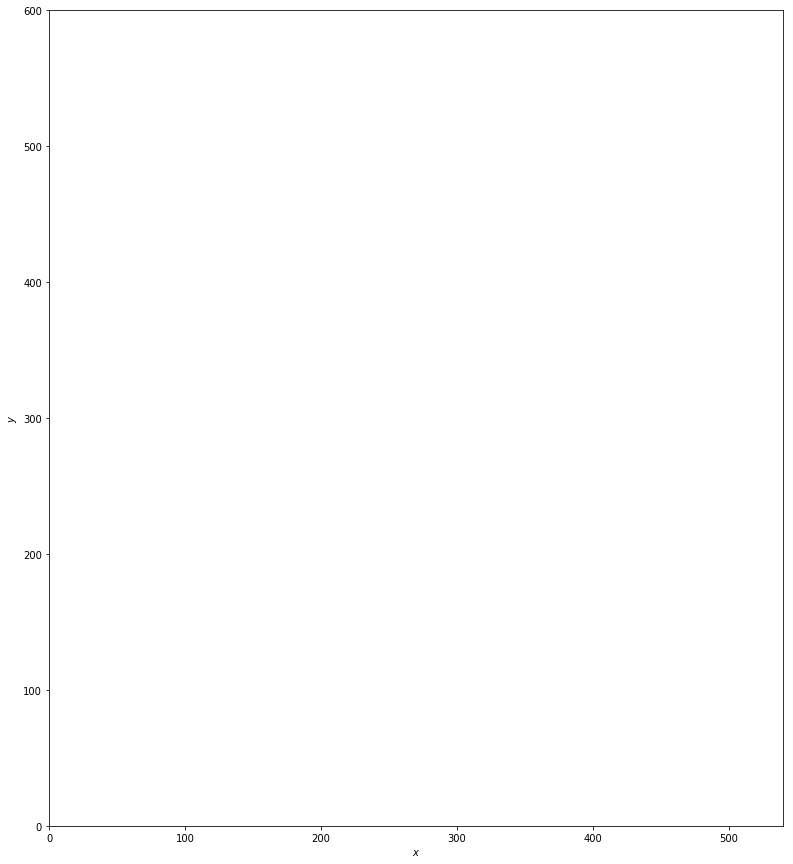

angle 0.0
move (3.0, 0.0)
641.978971691 442.959393917
175


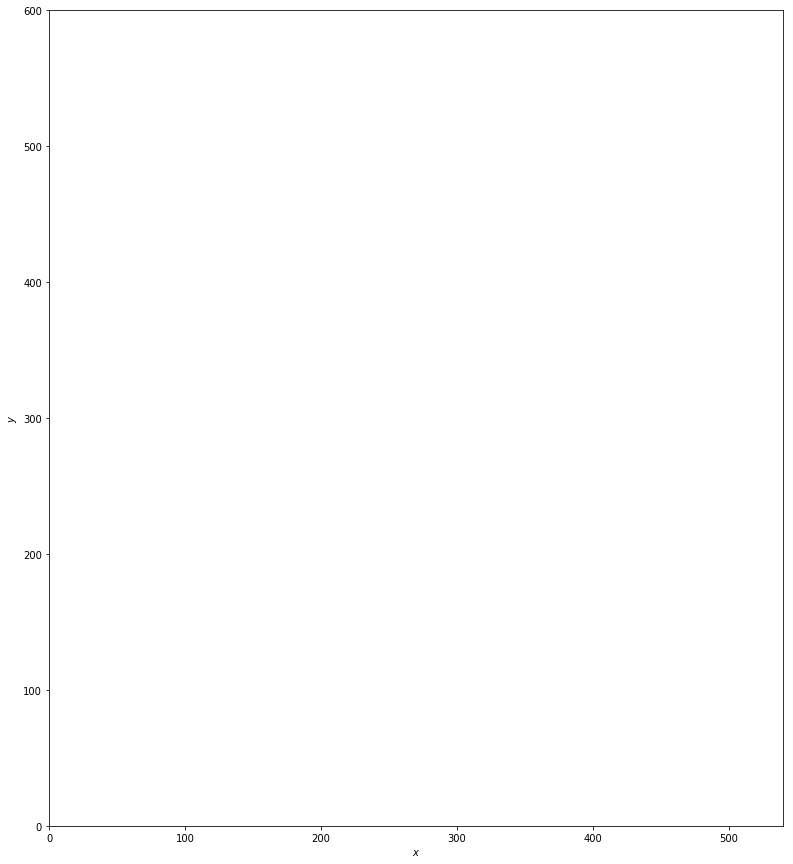

angle 0.0
move (3.0, 0.0)
644.978971691 442.959393917
176


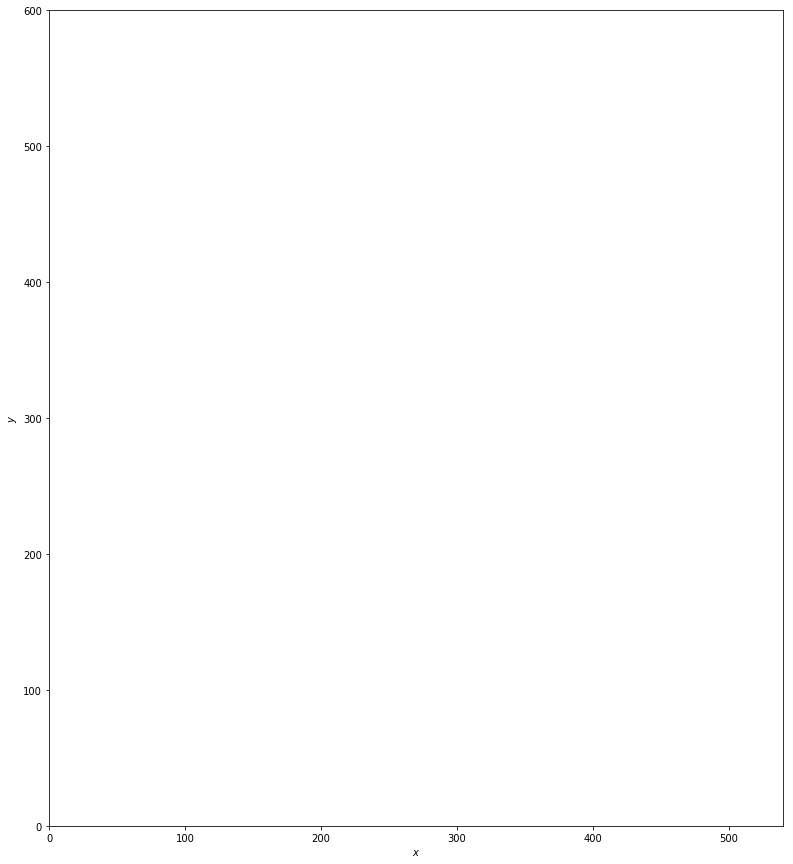

angle 0.0
move (3.0, 0.0)
647.978971691 442.959393917
177


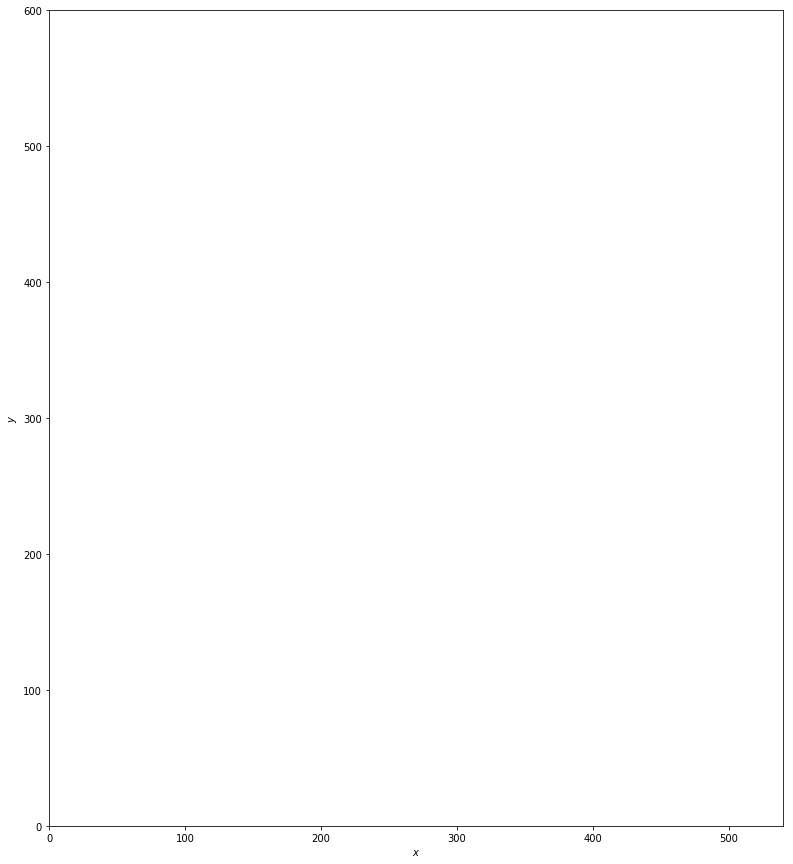

angle 0.0
move (3.0, 0.0)
650.978971691 442.959393917
178


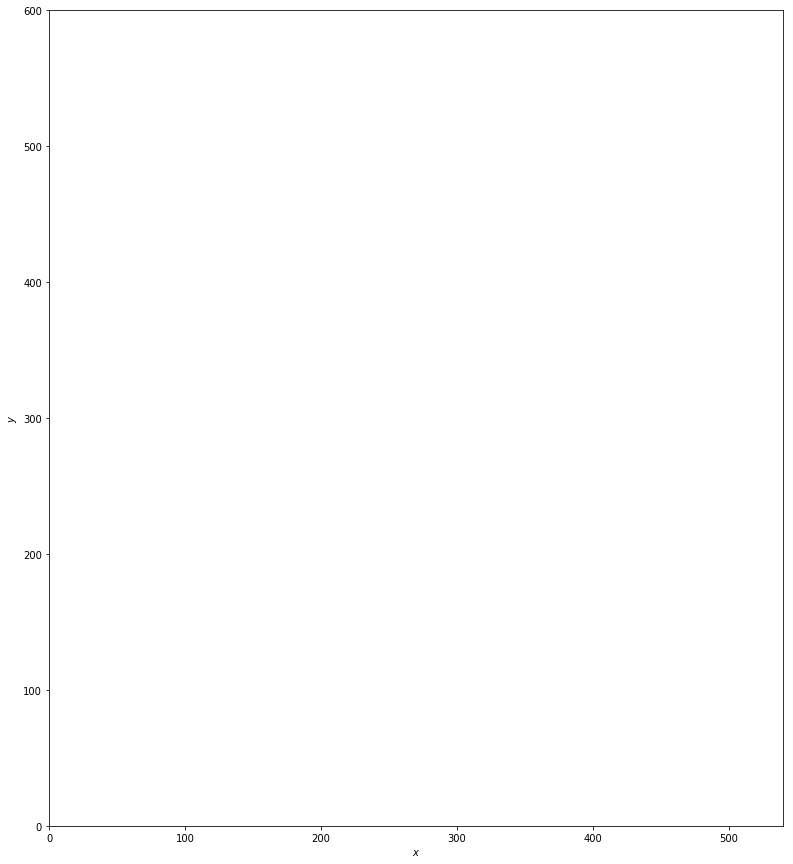

angle 0.0
move (3.0, 0.0)
653.978971691 442.959393917
179


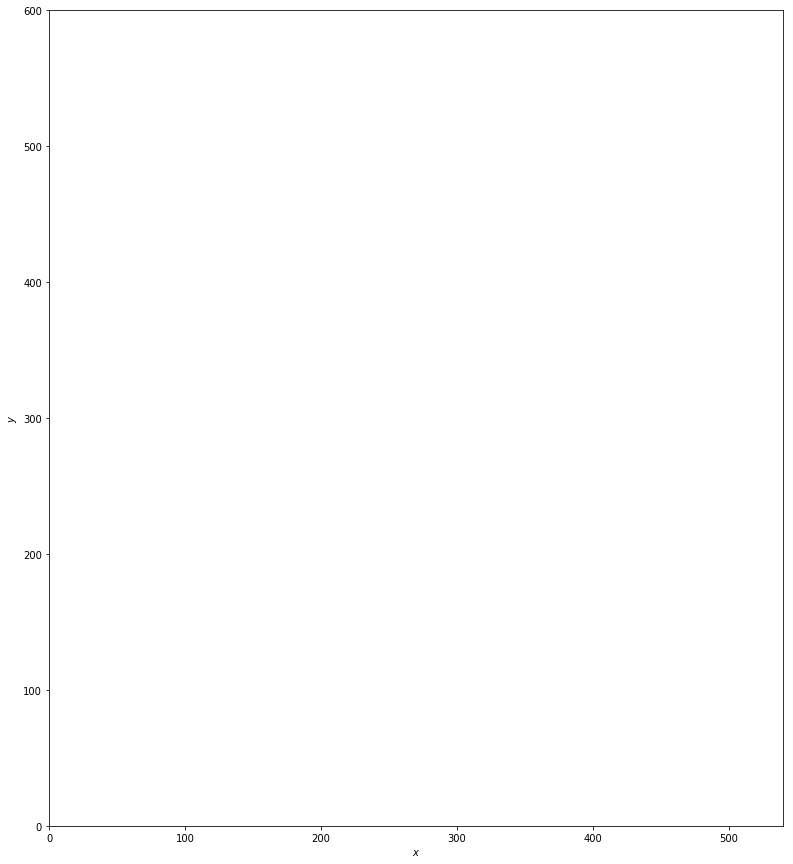

angle 0.0
move (3.0, 0.0)
656.978971691 442.959393917
180


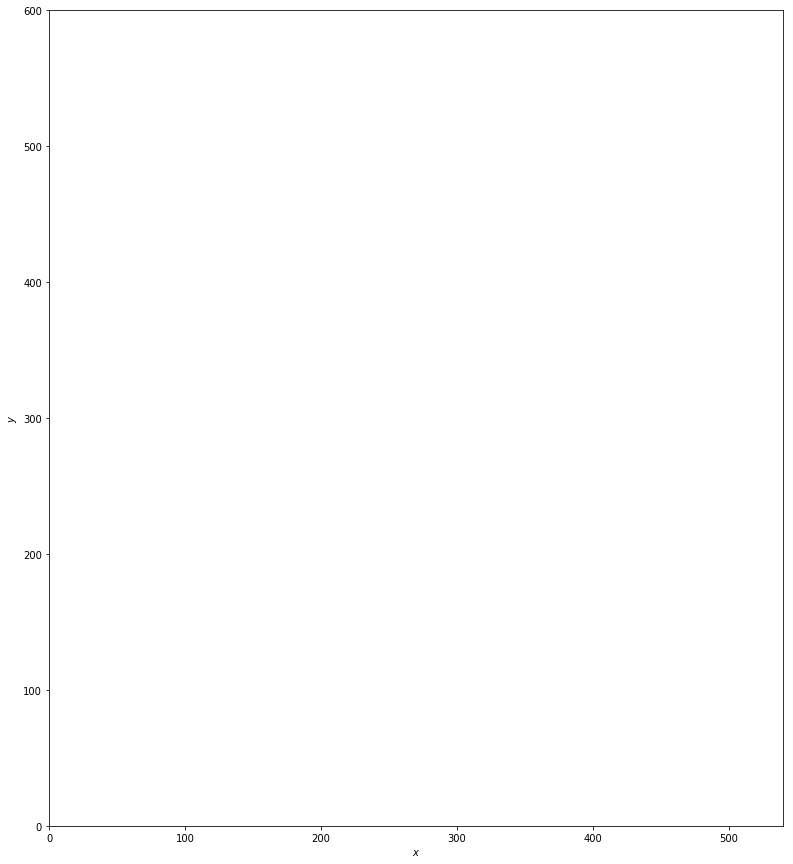

angle 0.0
move (3.0, 0.0)
659.978971691 442.959393917
181


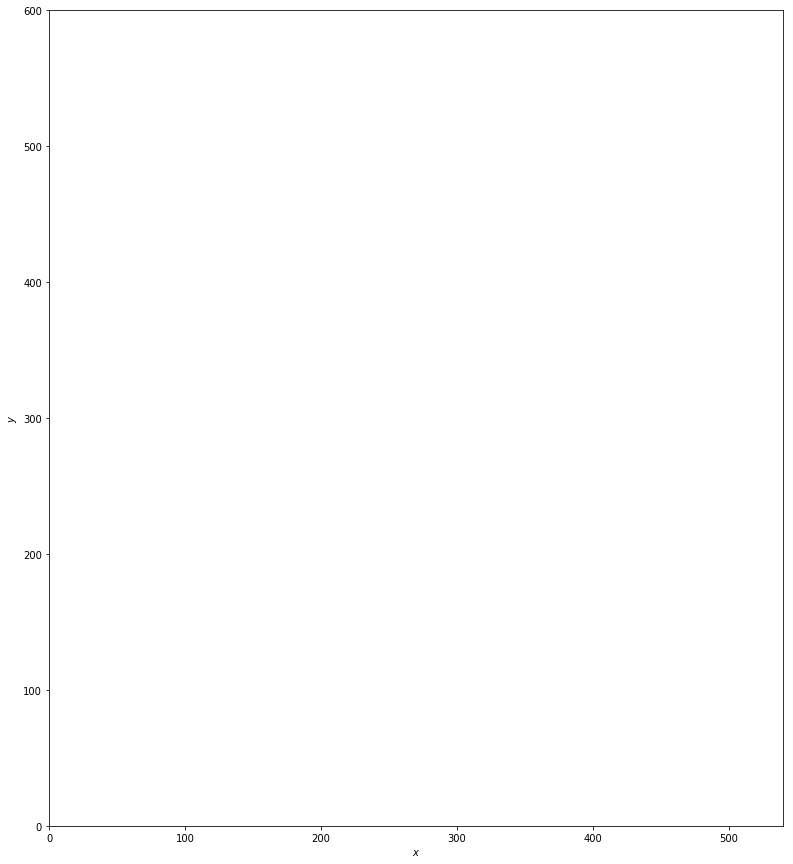

angle 0.0
move (3.0, 0.0)
662.978971691 442.959393917
182


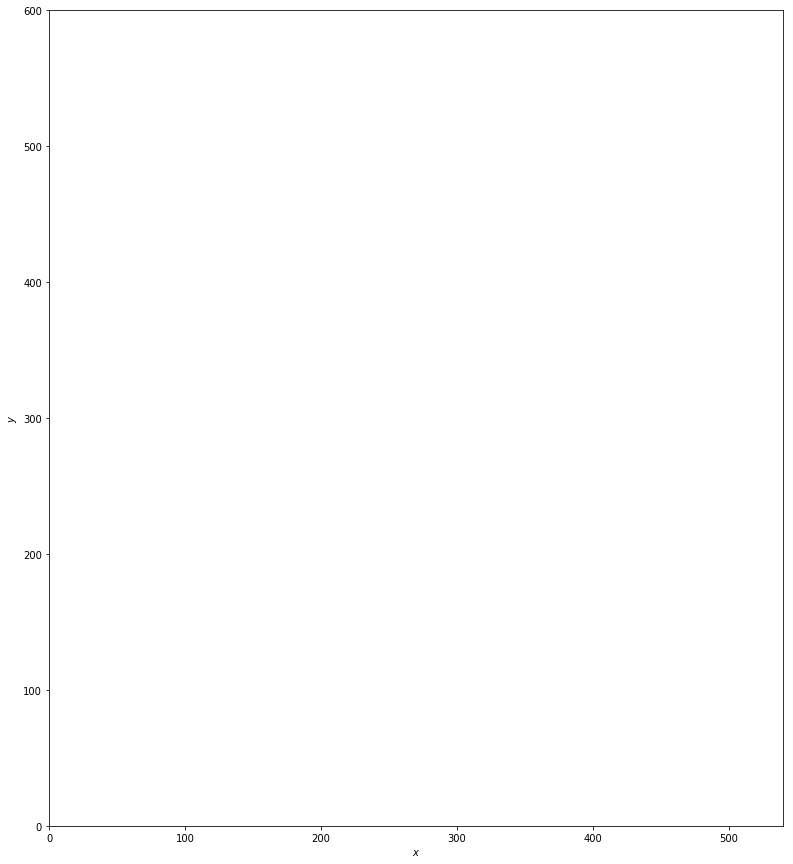

angle 0.0
move (3.0, 0.0)
665.978971691 442.959393917
183


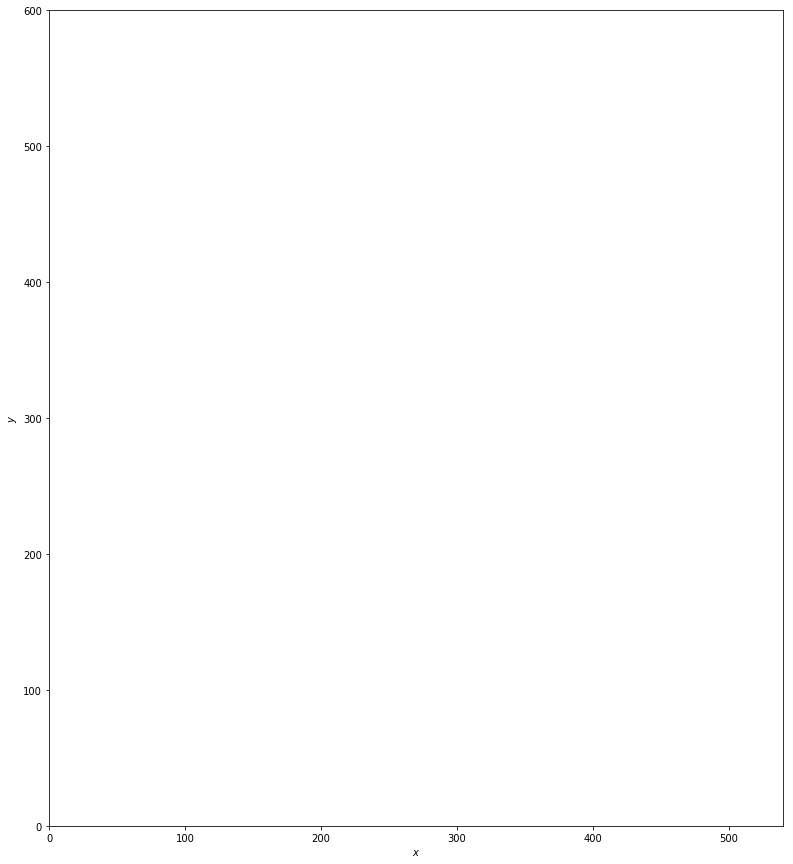

angle 0.0
move (3.0, 0.0)
668.978971691 442.959393917
184


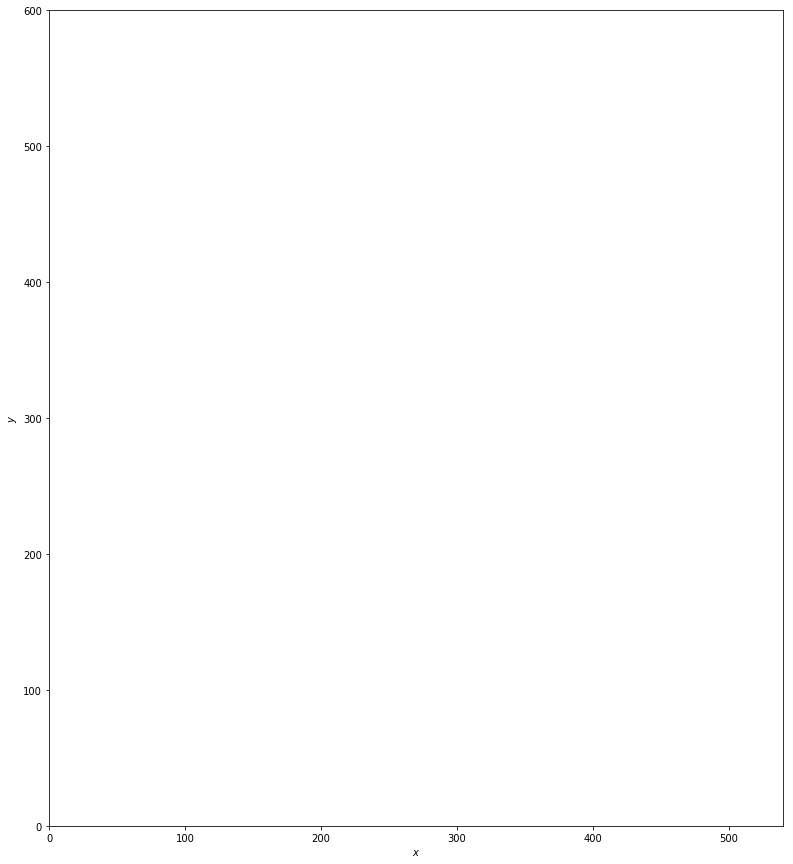

angle 0.0
move (3.0, 0.0)
671.978971691 442.959393917
185


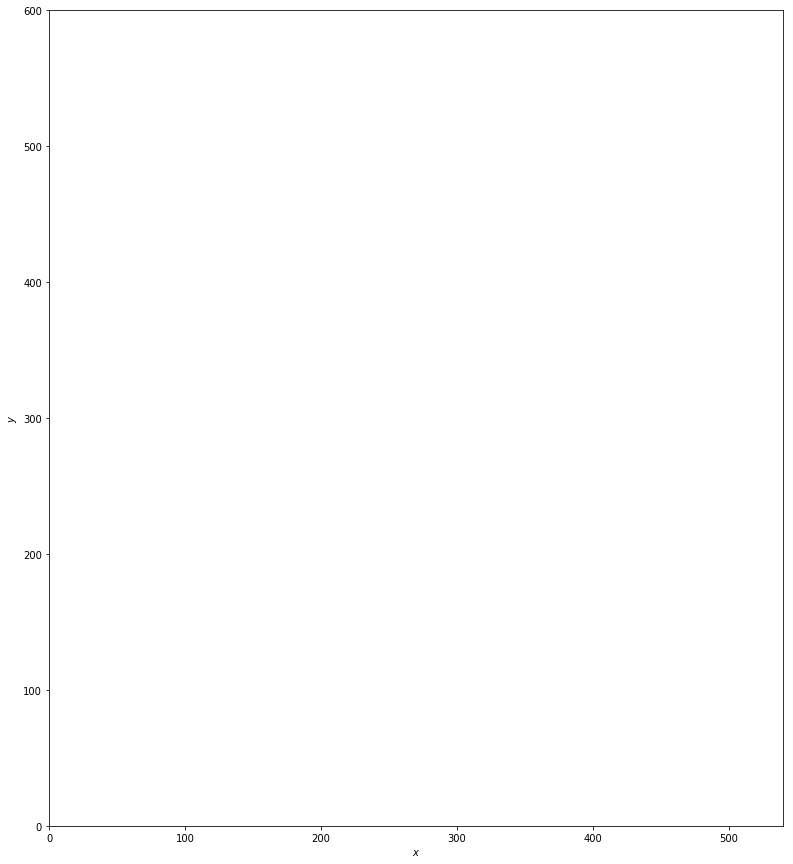

angle 0.0
move (3.0, 0.0)
674.978971691 442.959393917
186


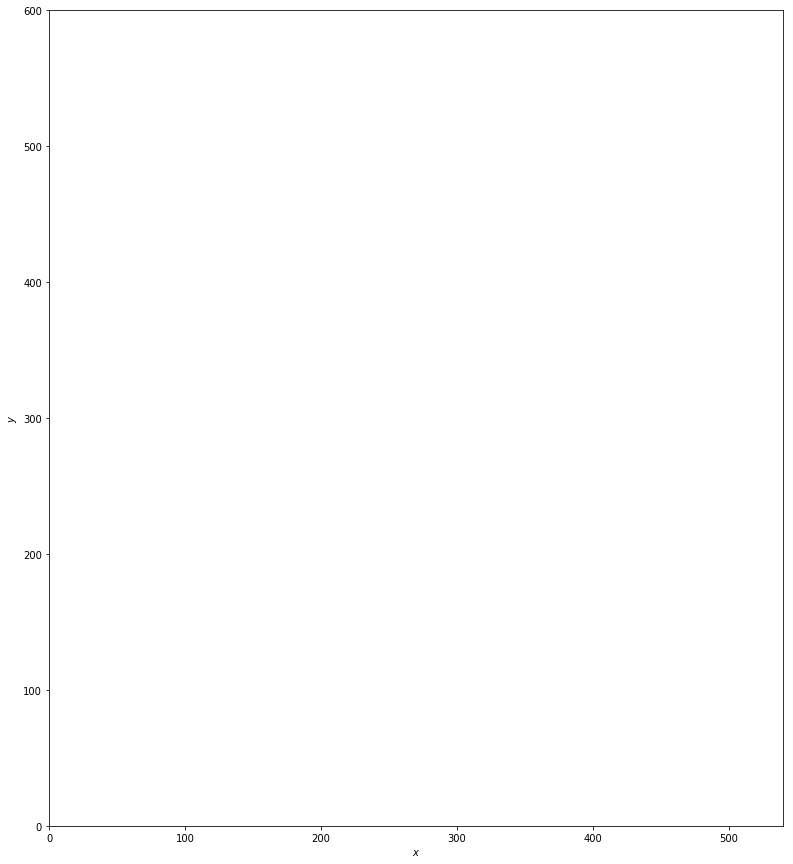

angle 0.0
move (3.0, 0.0)
677.978971691 442.959393917
187


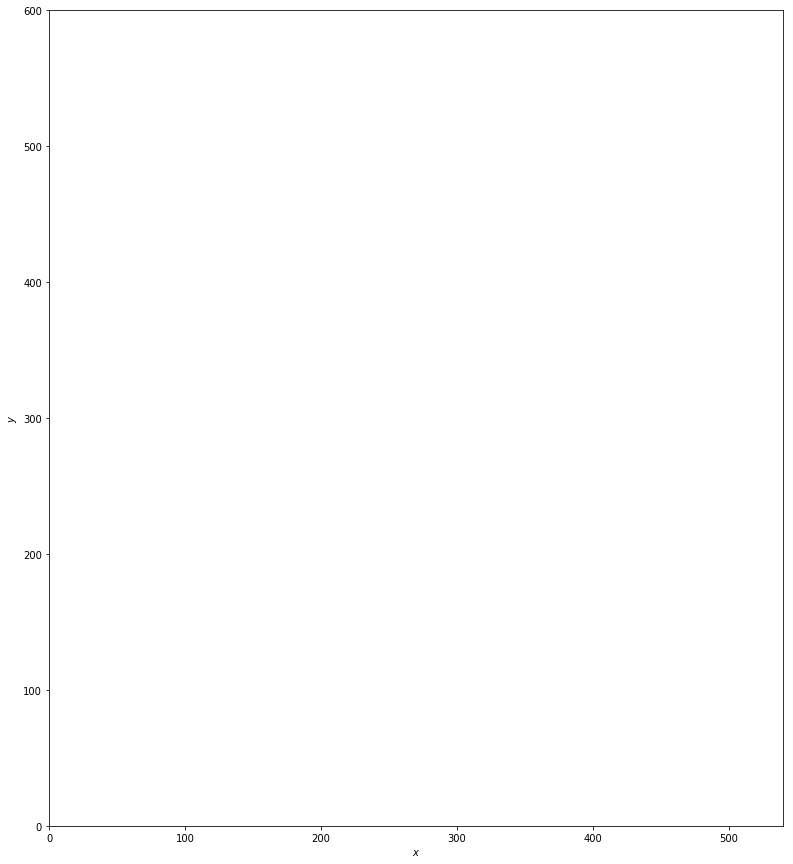

angle 0.0
move (3.0, 0.0)
680.978971691 442.959393917
188


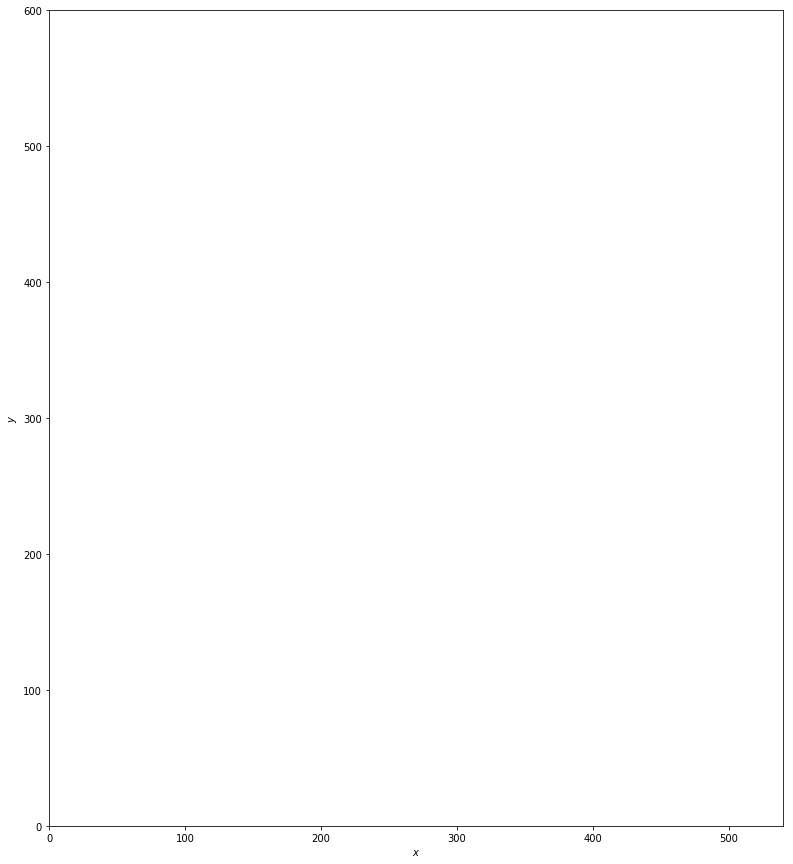

angle 0.0
move (3.0, 0.0)
683.978971691 442.959393917
189


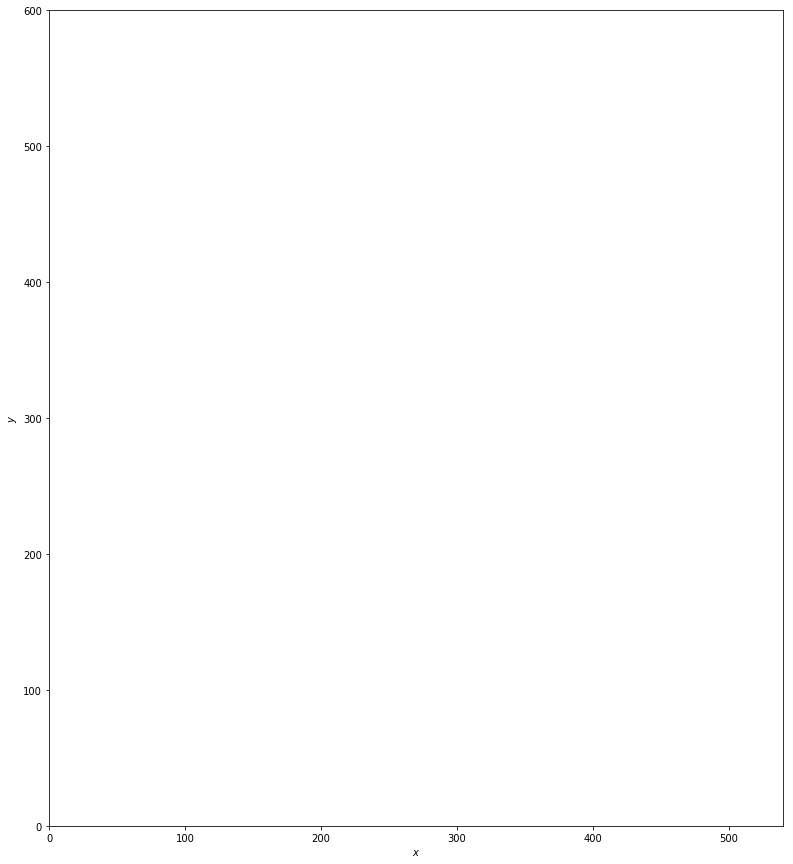

angle 0.0
move (3.0, 0.0)
686.978971691 442.959393917
190


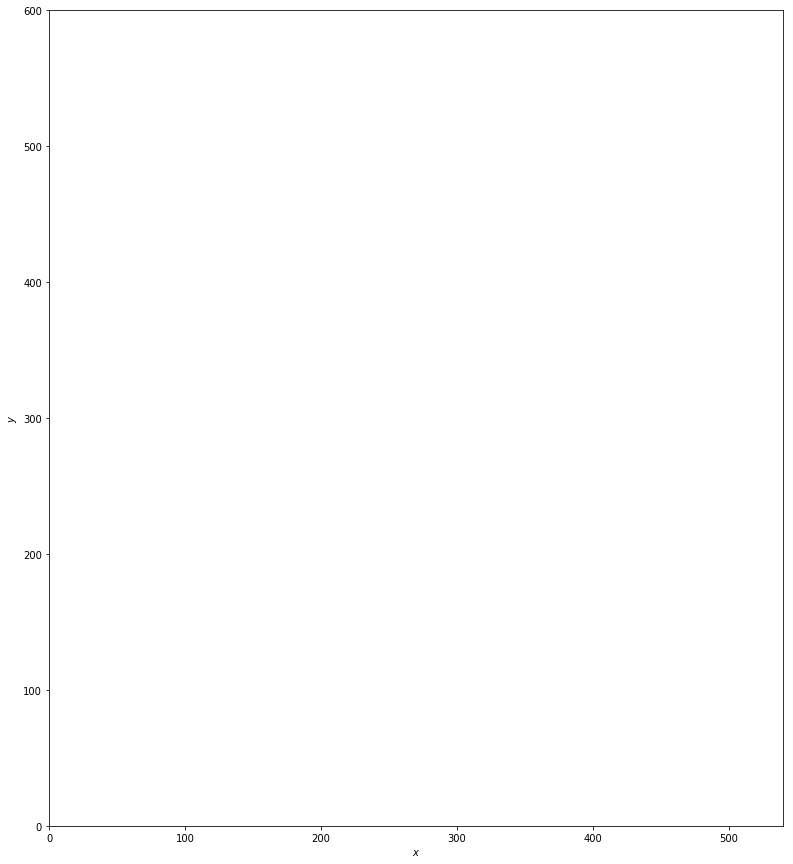

angle 0.0
move (3.0, 0.0)
689.978971691 442.959393917
191


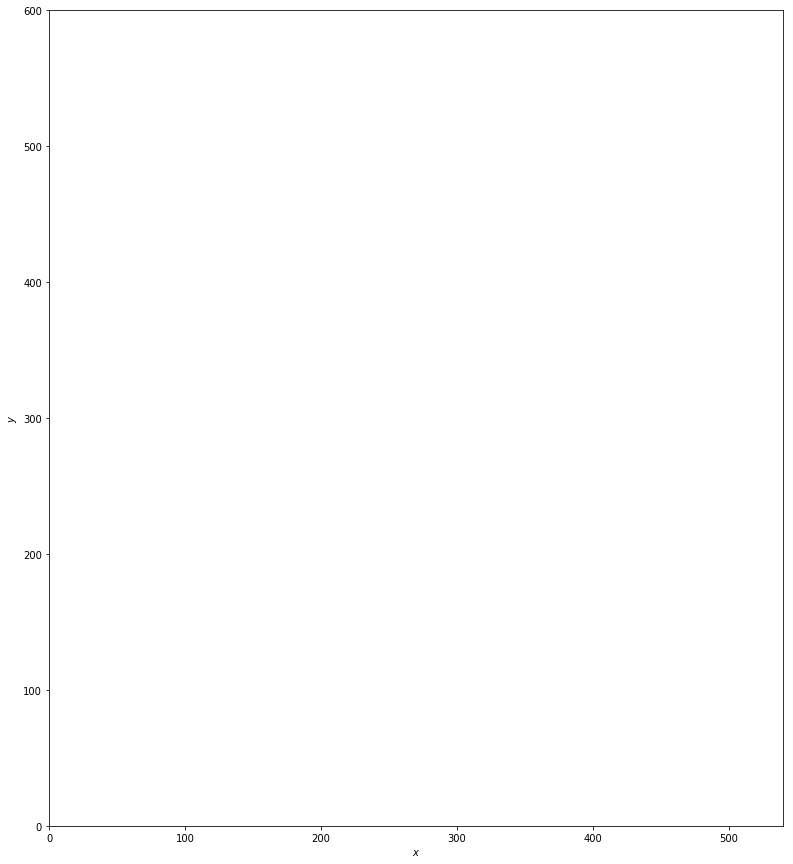

angle 0.0
move (3.0, 0.0)
692.978971691 442.959393917
192


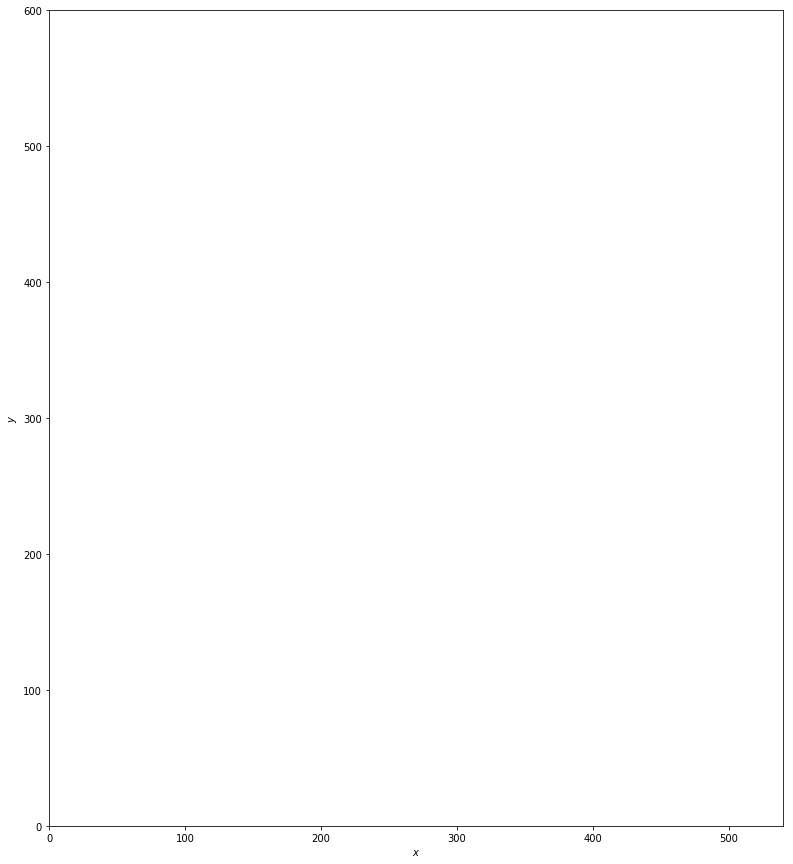

angle 0.0
move (3.0, 0.0)
695.978971691 442.959393917
193


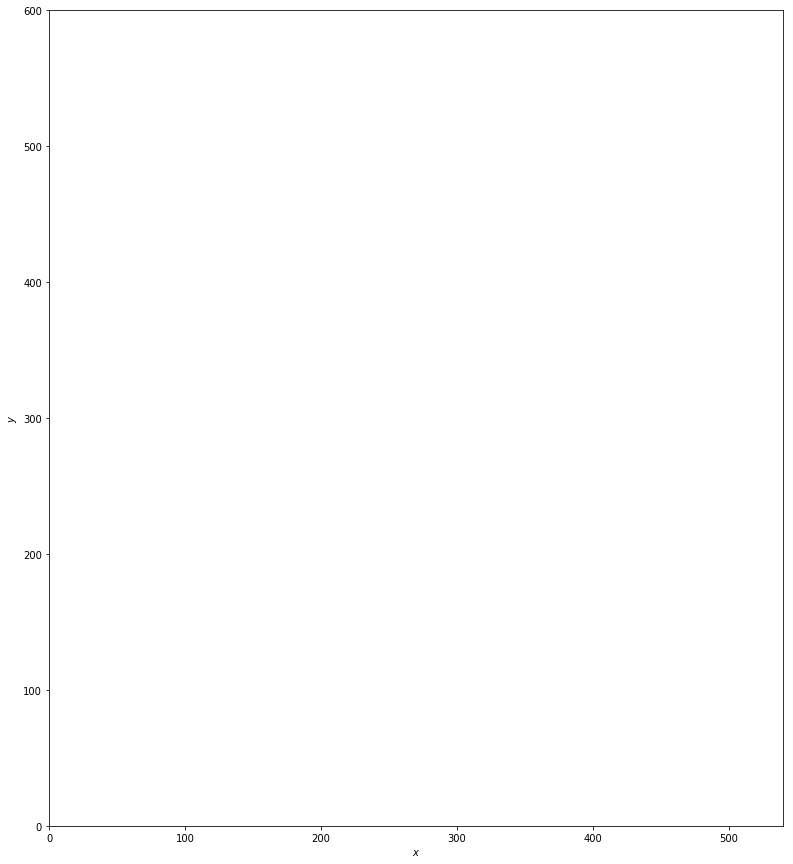

angle 0.0
move (3.0, 0.0)
698.978971691 442.959393917
194


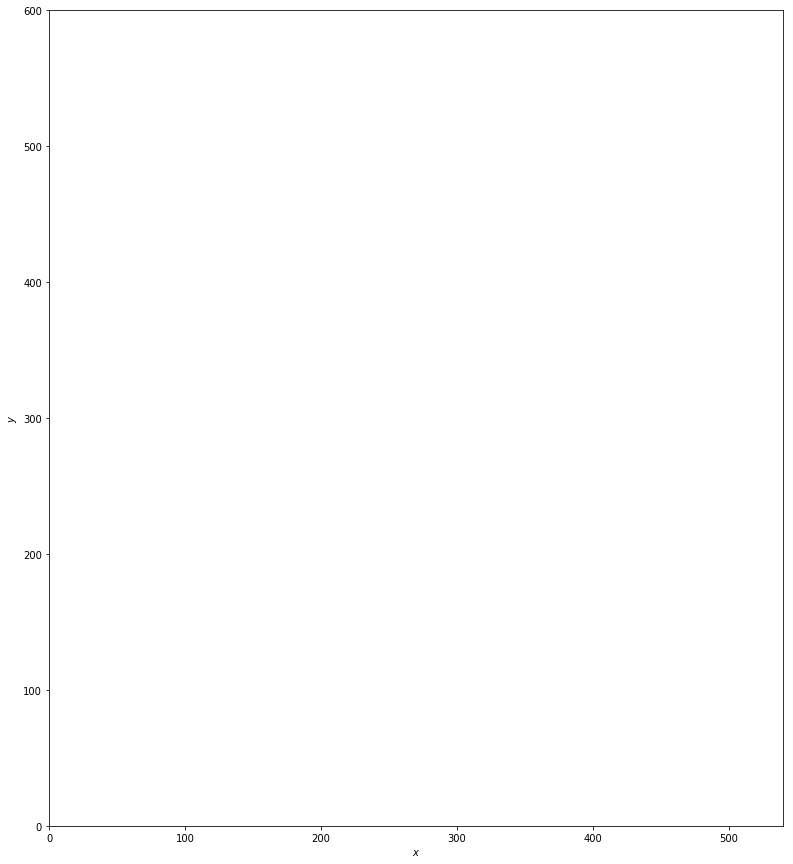

angle 0.0
move (3.0, 0.0)
701.978971691 442.959393917
195


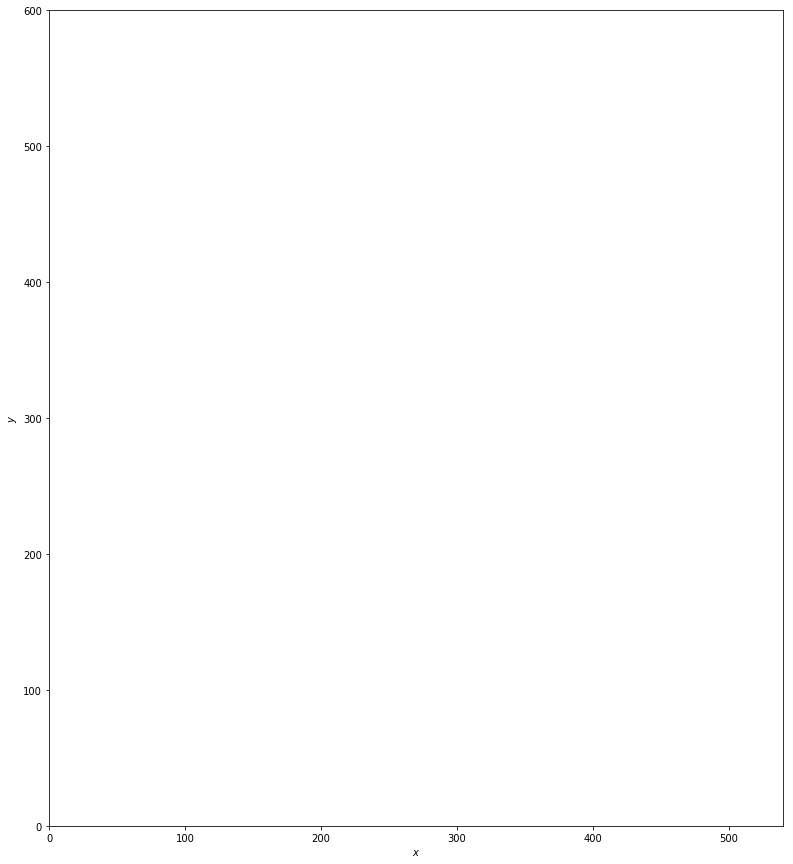

angle 0.0
move (3.0, 0.0)
704.978971691 442.959393917
196


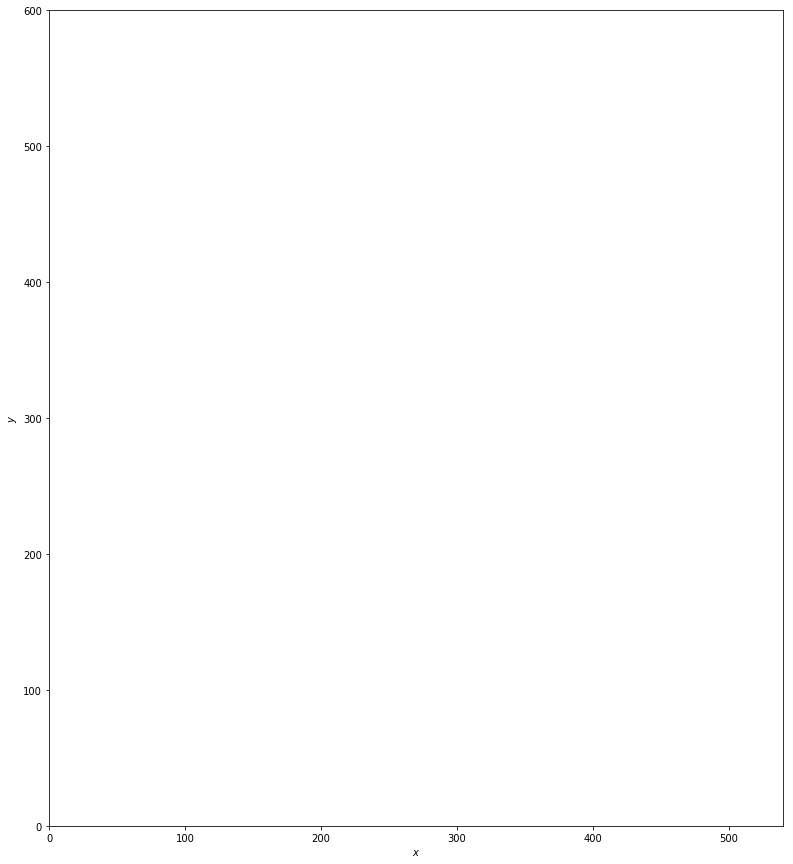

angle 0.0
move (3.0, 0.0)
707.978971691 442.959393917
197


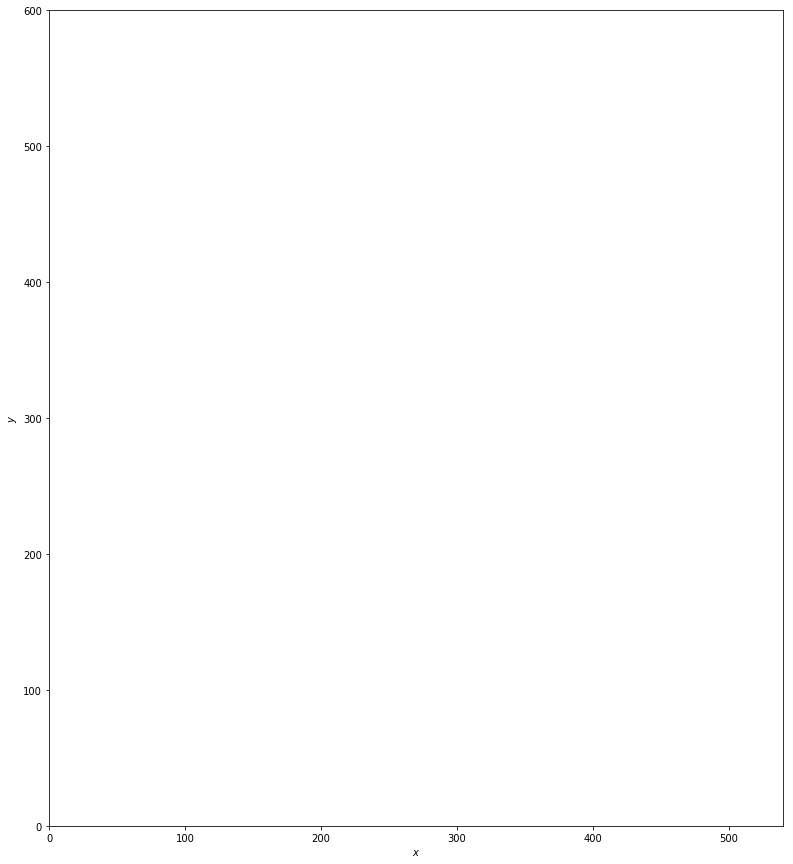

angle 0.0
move (3.0, 0.0)
710.978971691 442.959393917
198


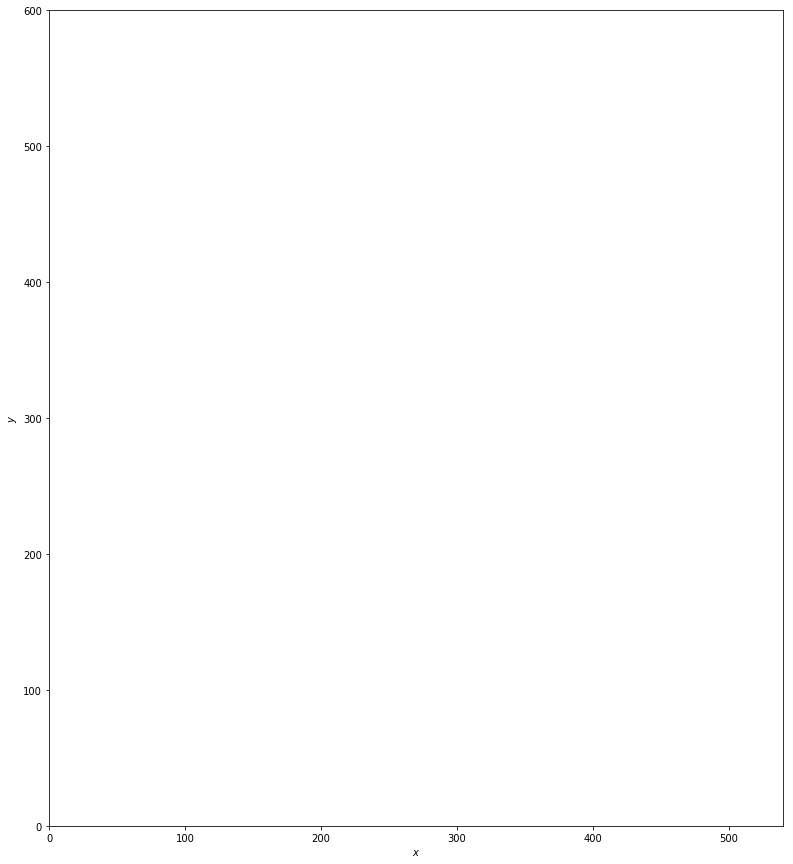

angle 0.0
move (3.0, 0.0)
713.978971691 442.959393917
199


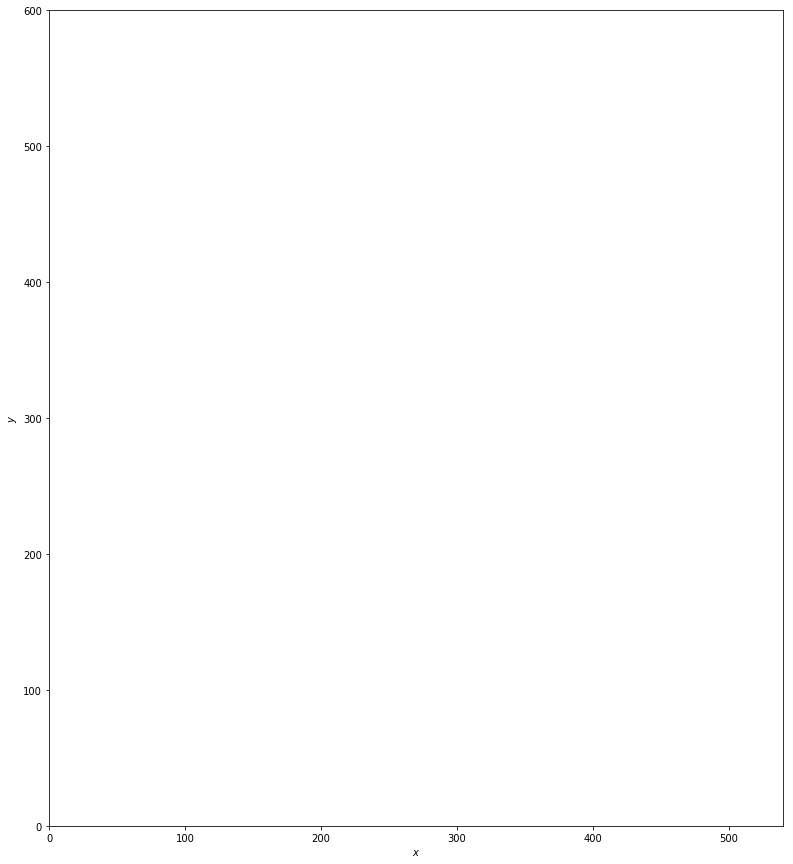

angle 0.0
move (3.0, 0.0)
716.978971691 442.959393917
200


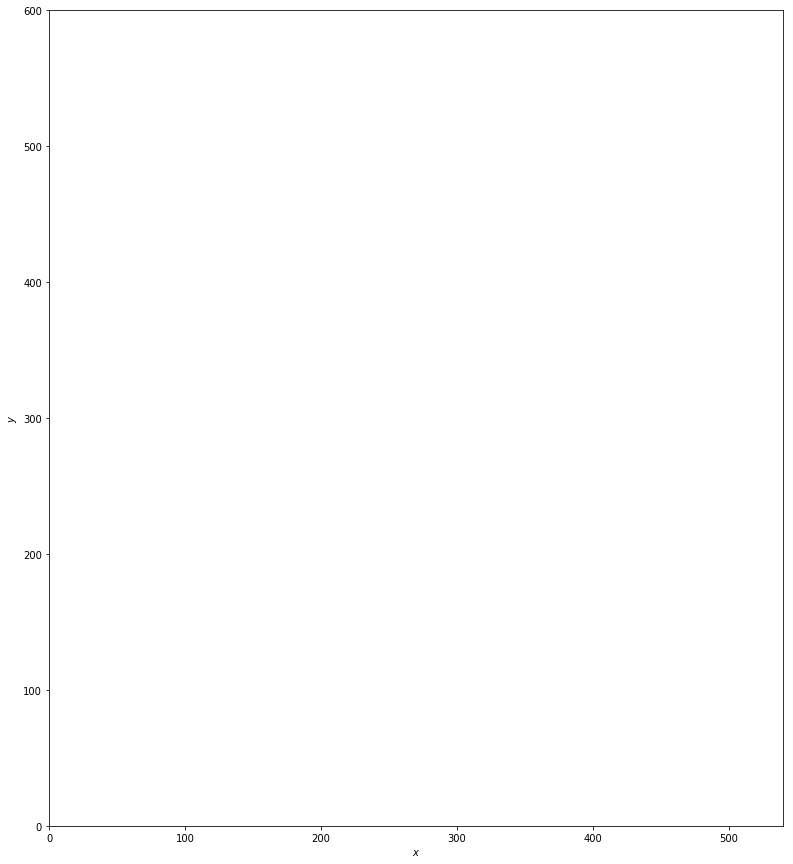

angle 0.0
move (3.0, 0.0)
719.978971691 442.959393917
201


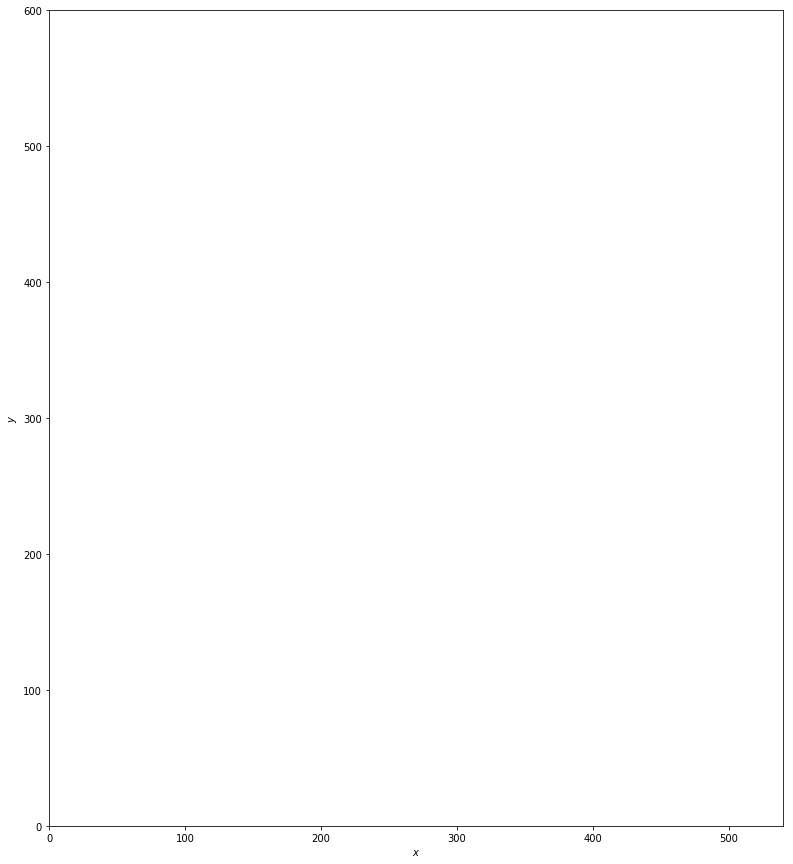

angle 0.0
move (3.0, 0.0)
722.978971691 442.959393917
202


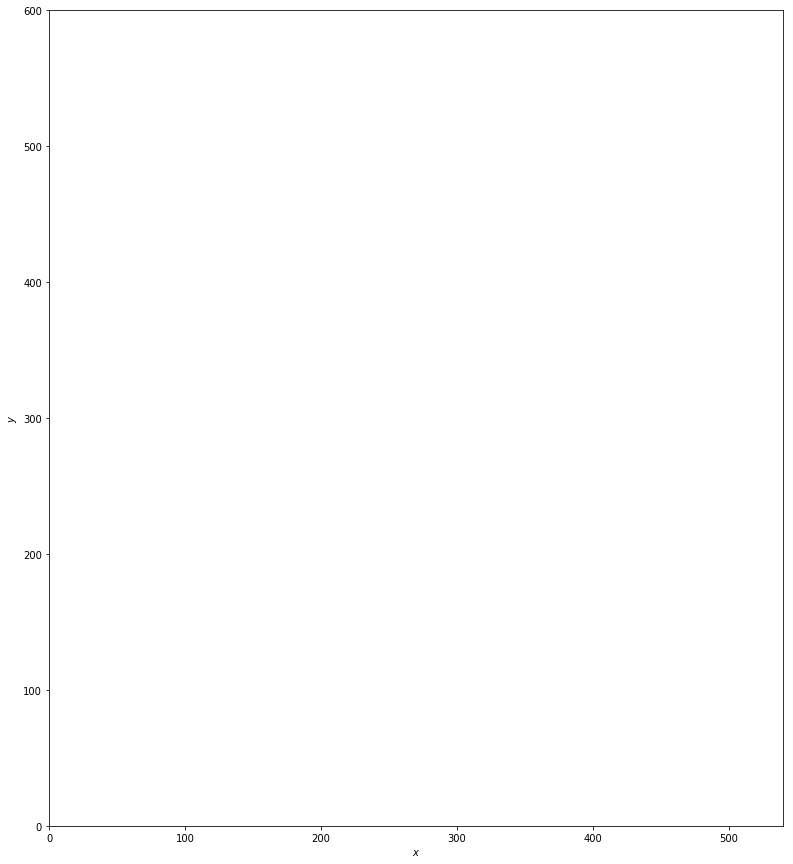

angle 0.0
move (3.0, 0.0)
725.978971691 442.959393917
203


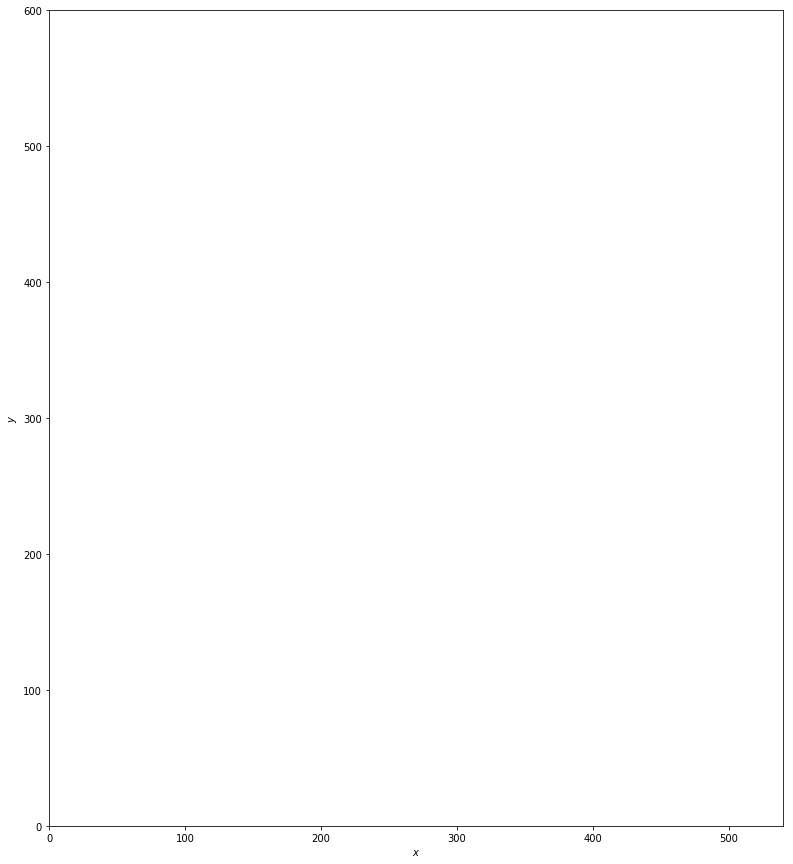

angle 0.0
move (3.0, 0.0)
728.978971691 442.959393917
204


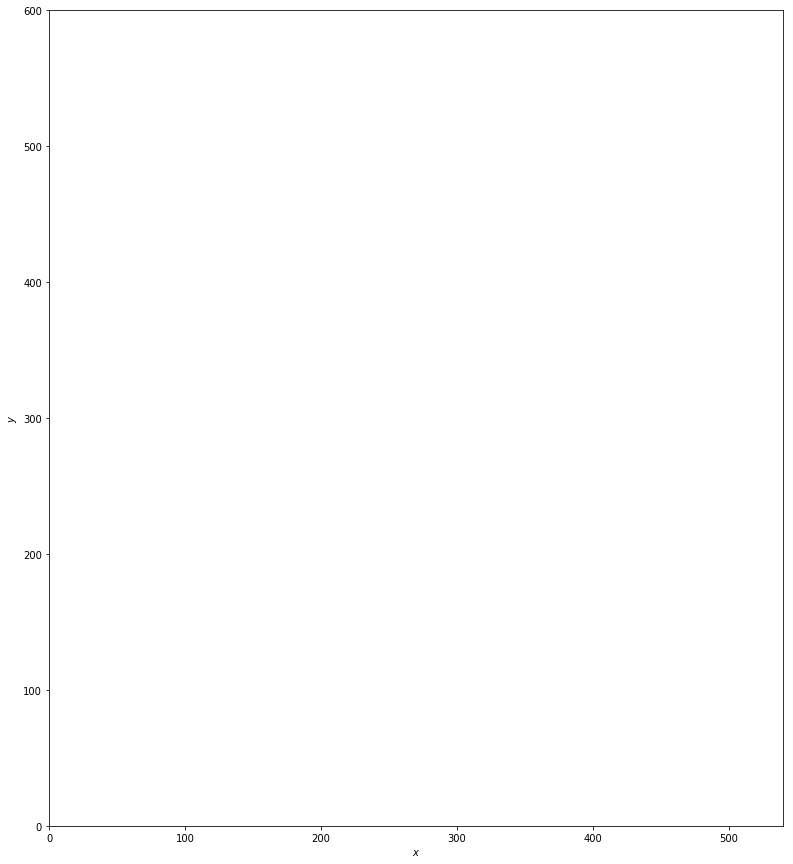

angle 0.0
move (3.0, 0.0)
731.978971691 442.959393917
205


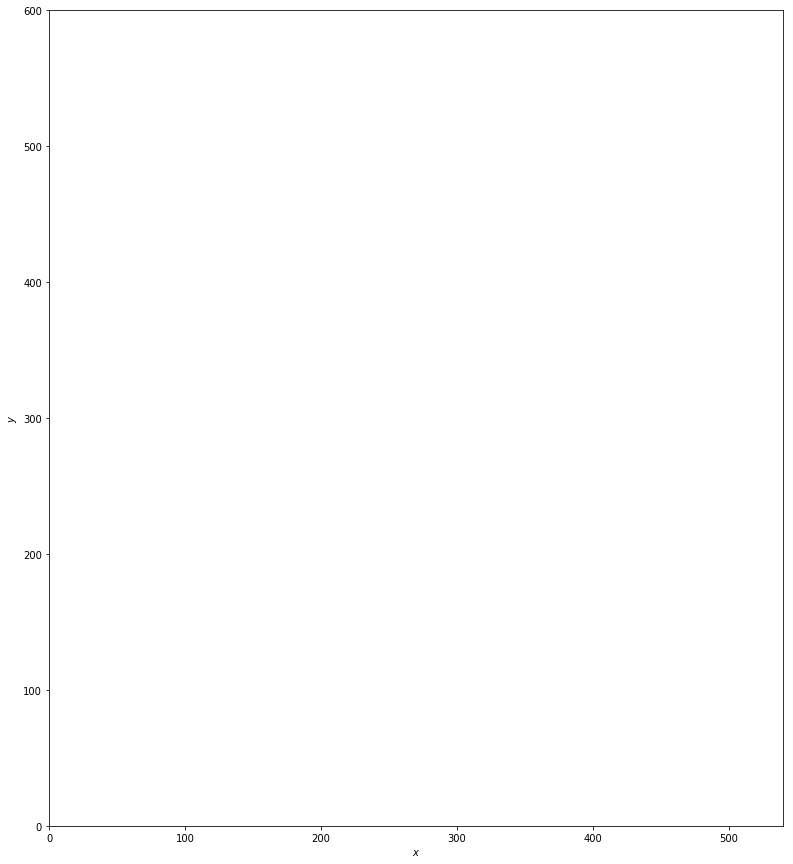

angle 0.0
move (3.0, 0.0)
734.978971691 442.959393917
206


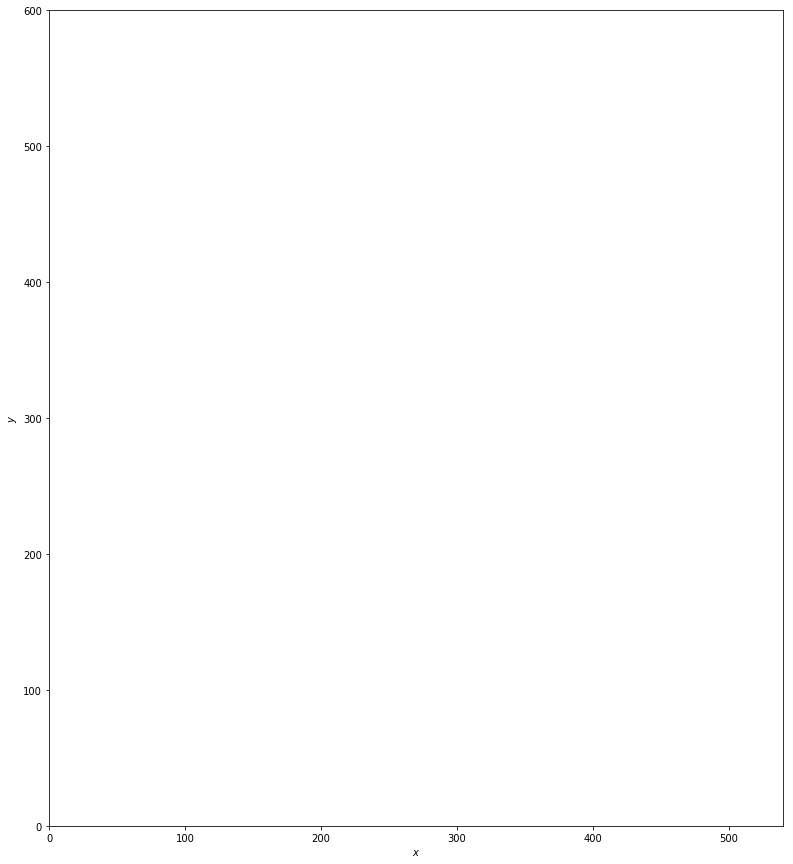

angle 0.0
move (3.0, 0.0)
737.978971691 442.959393917
207


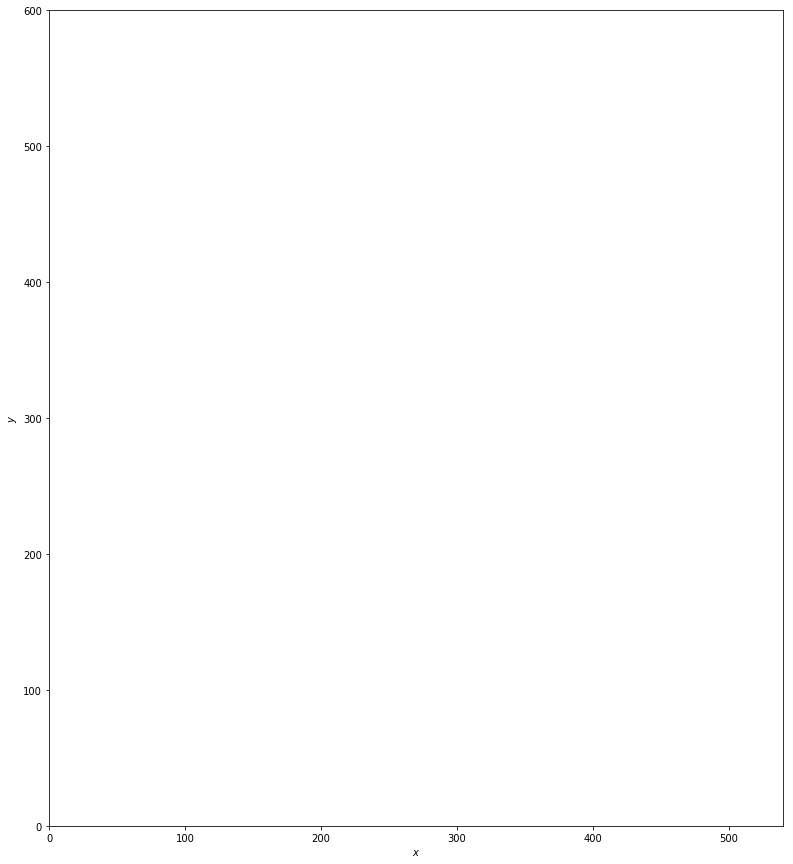

angle 0.0
move (3.0, 0.0)
740.978971691 442.959393917
208


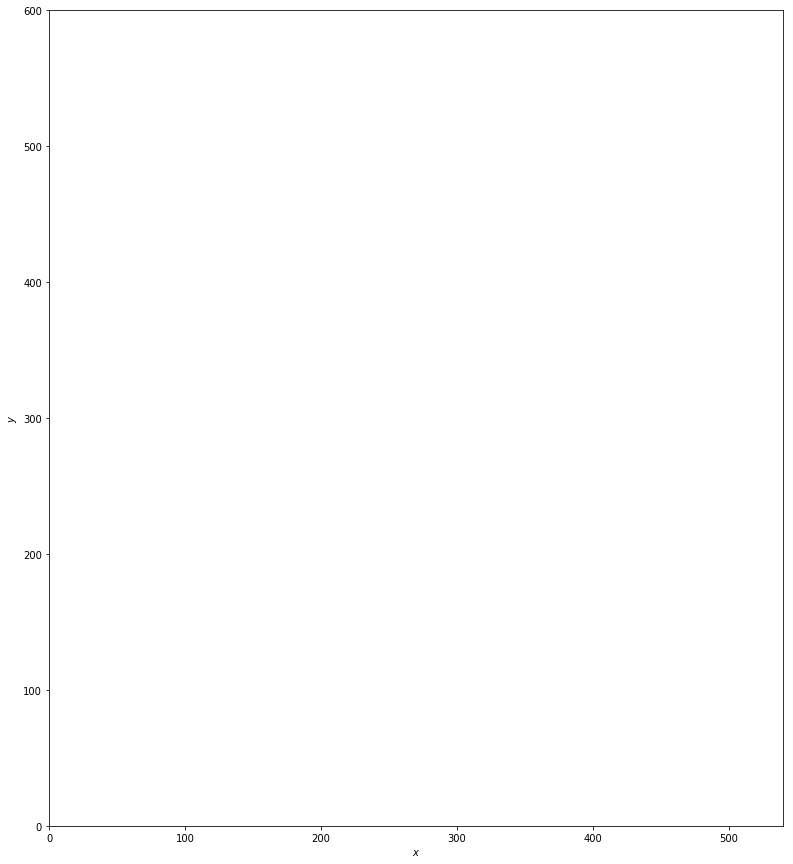

angle 0.0
move (3.0, 0.0)
743.978971691 442.959393917
209


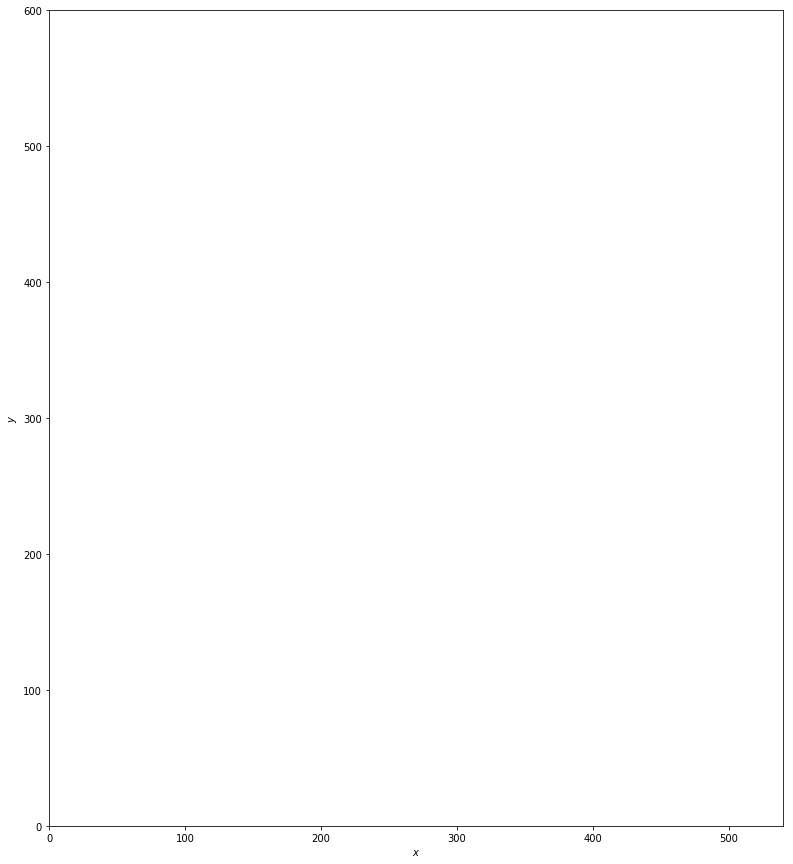

angle 0.0
move (3.0, 0.0)
746.978971691 442.959393917
210


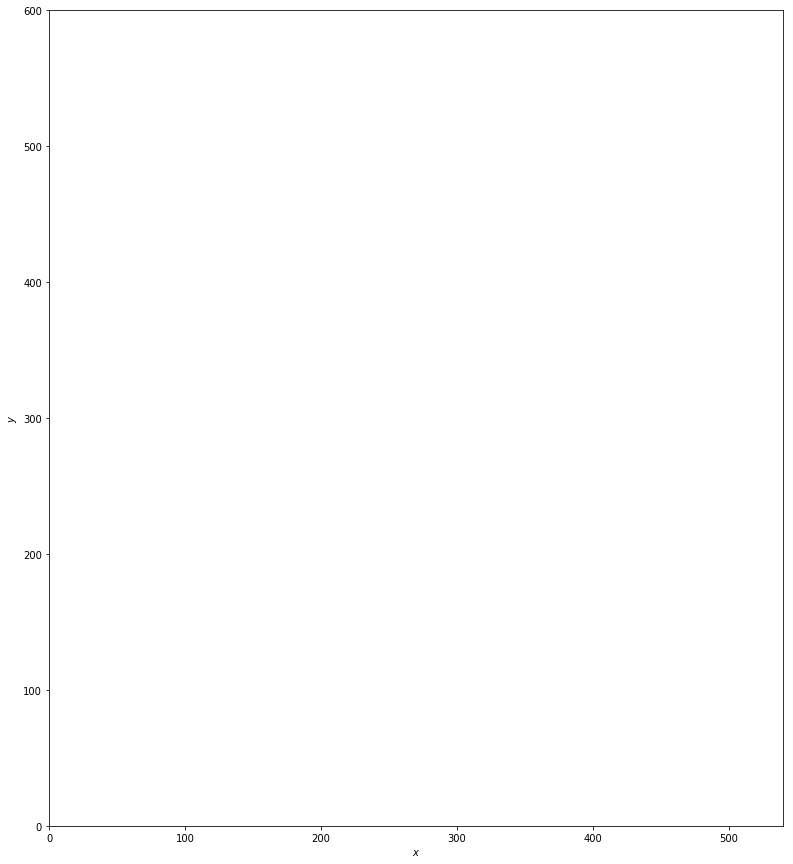

angle 0.0
move (3.0, 0.0)
749.978971691 442.959393917
211


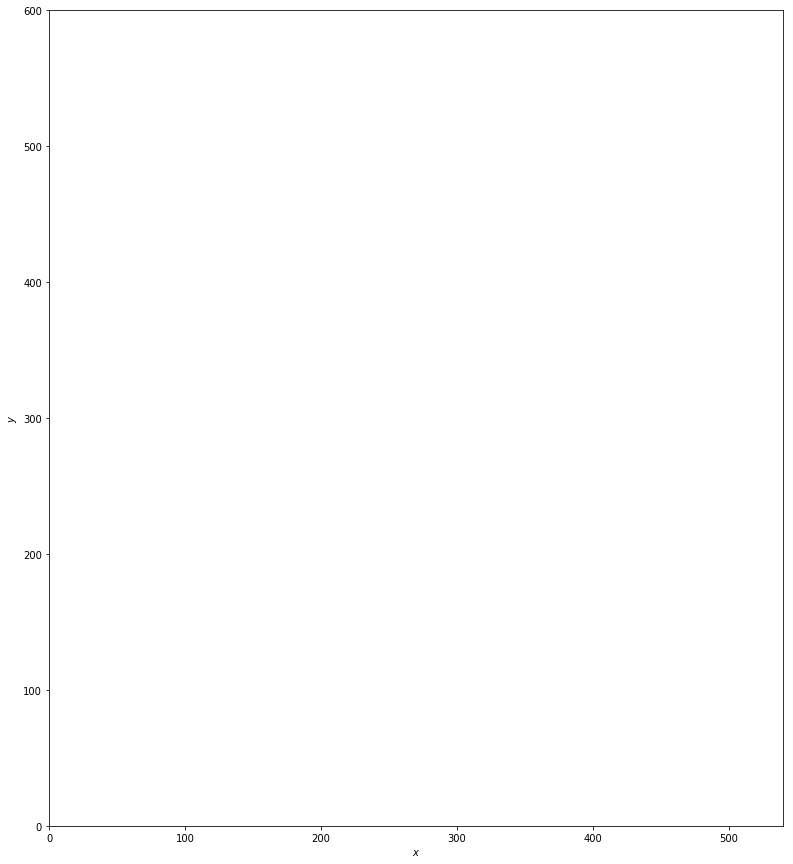

angle 0.0
move (3.0, 0.0)
752.978971691 442.959393917
212


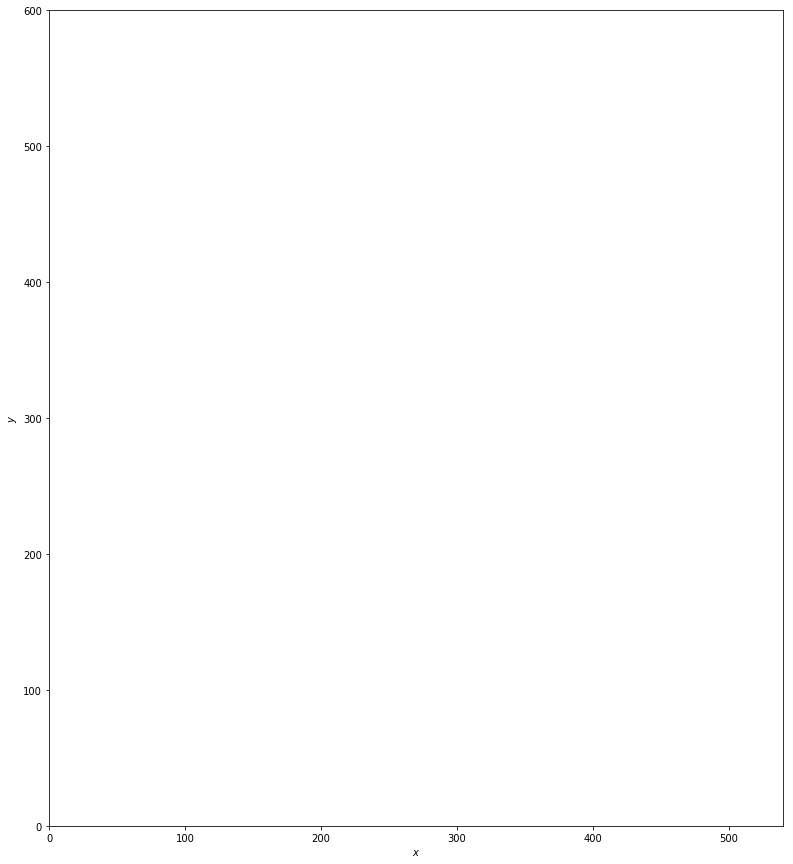

angle 0.0
move (3.0, 0.0)
755.978971691 442.959393917
213


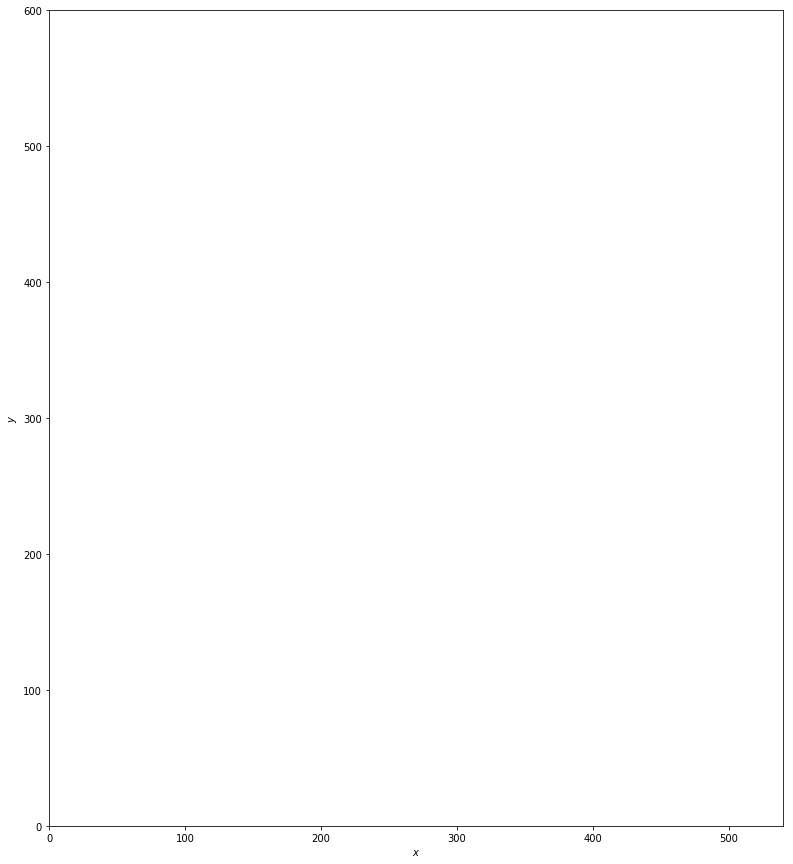

angle 0.0
move (3.0, 0.0)
758.978971691 442.959393917
214


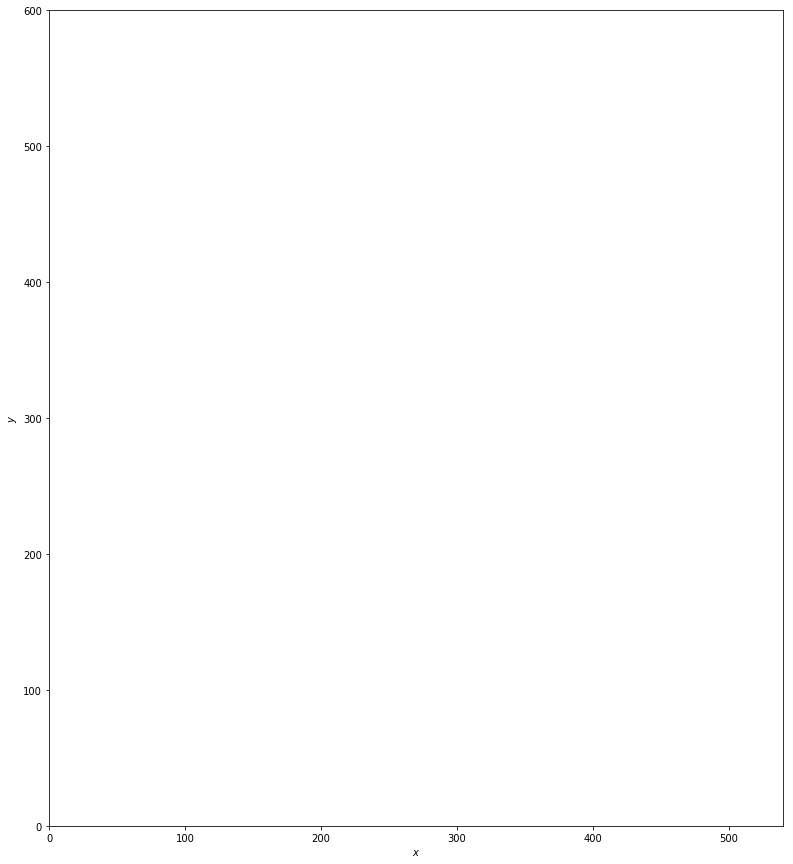

angle 0.0
move (3.0, 0.0)
761.978971691 442.959393917
215


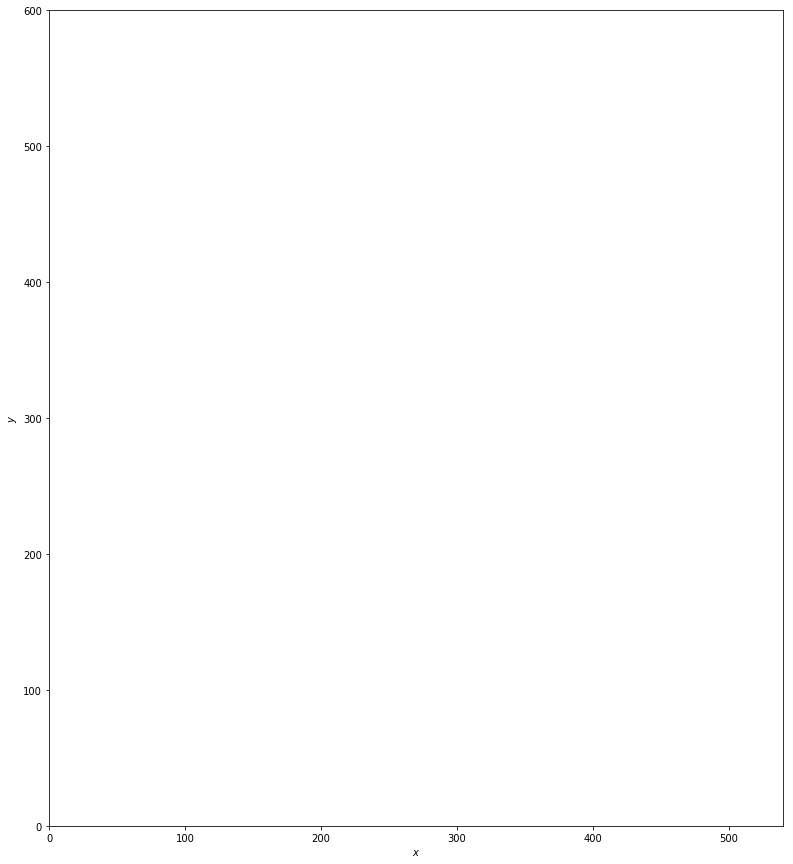

angle 0.0
move (3.0, 0.0)
764.978971691 442.959393917
216


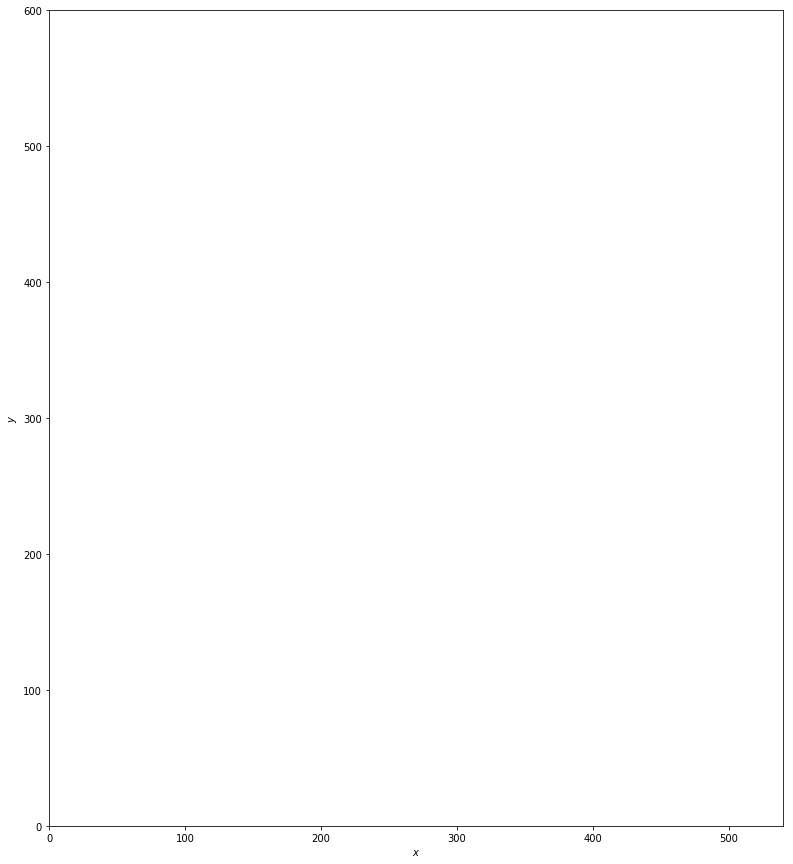

angle 0.0
move (3.0, 0.0)
767.978971691 442.959393917
217


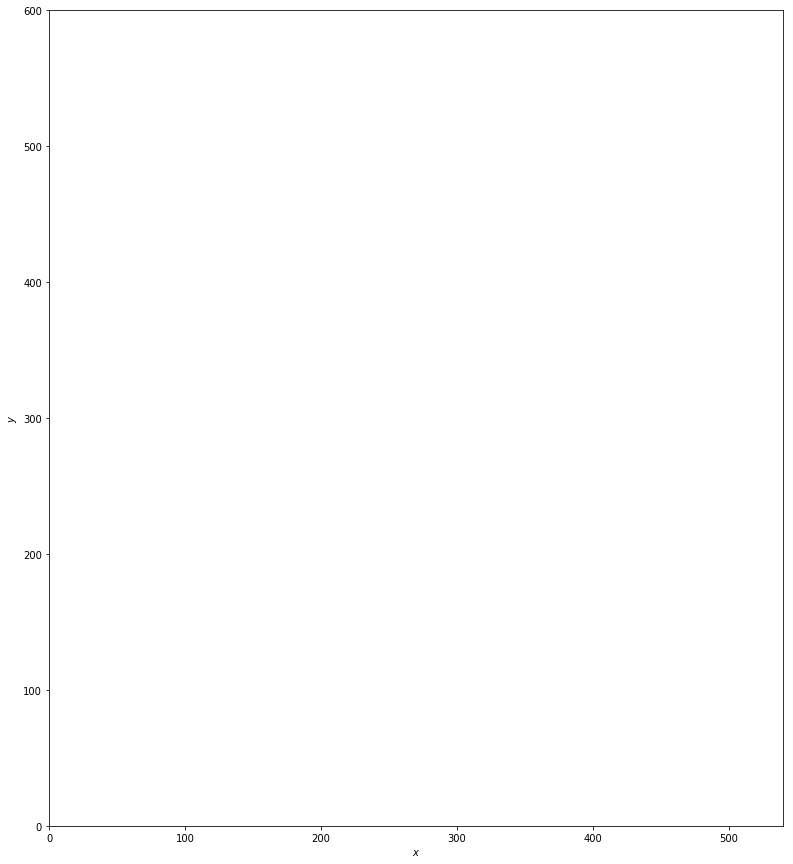

angle 0.0
move (3.0, 0.0)
770.978971691 442.959393917
218


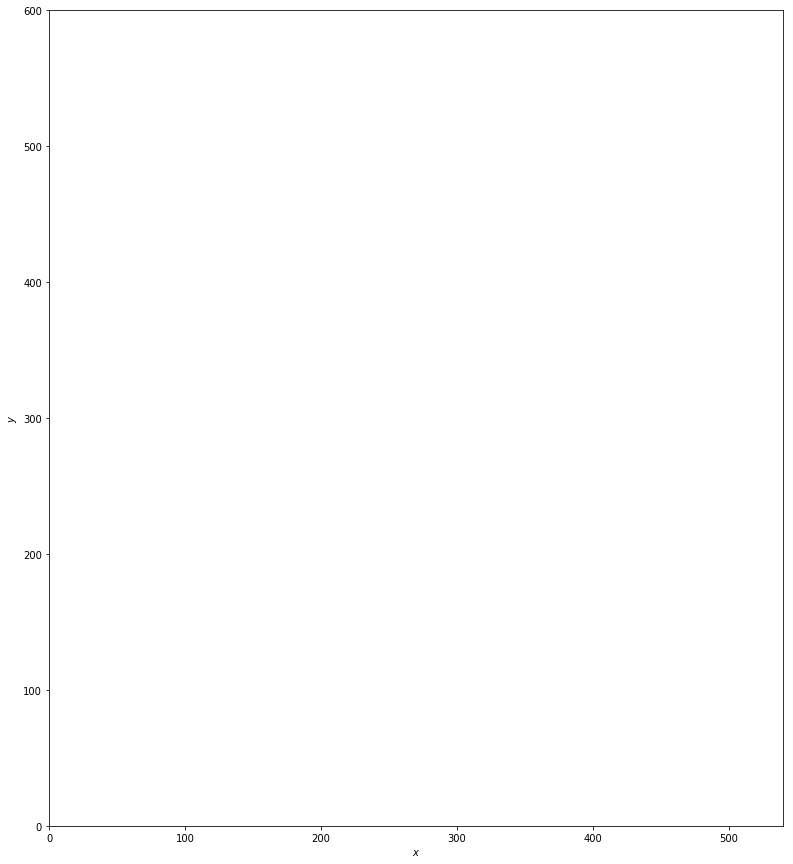

angle 0.0
move (3.0, 0.0)
773.978971691 442.959393917
219


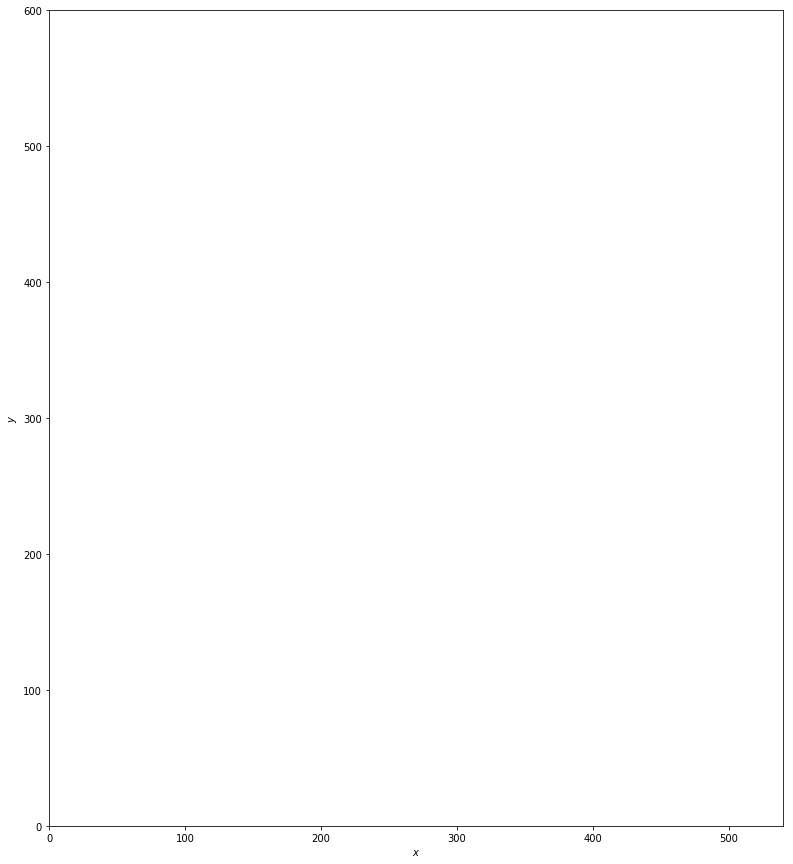

angle 0.0
move (3.0, 0.0)
776.978971691 442.959393917
220


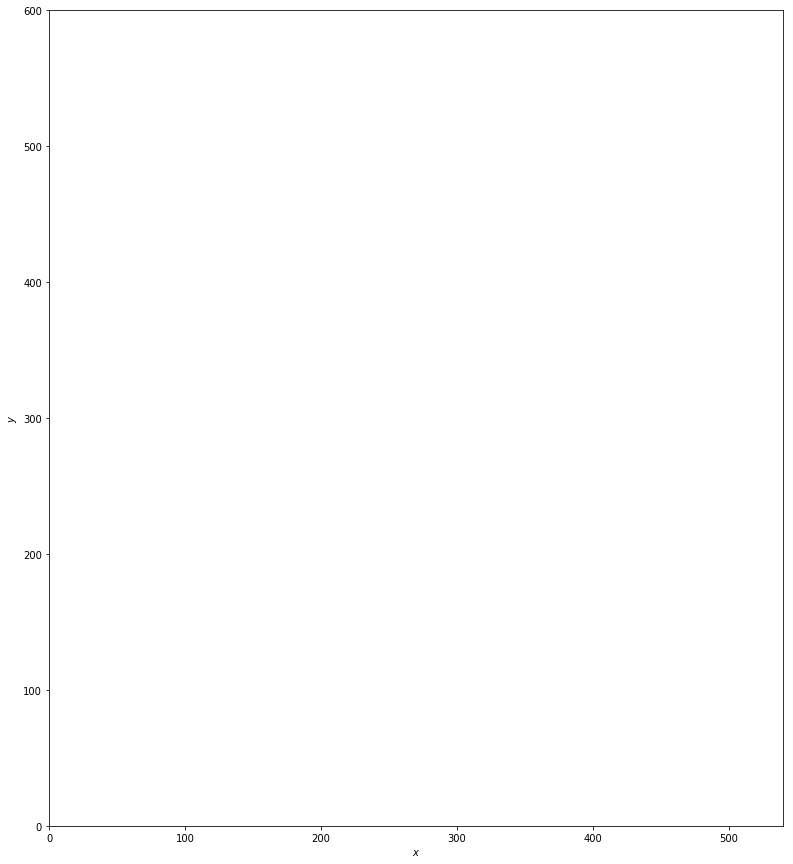

angle 0.0
move (3.0, 0.0)
779.978971691 442.959393917
221


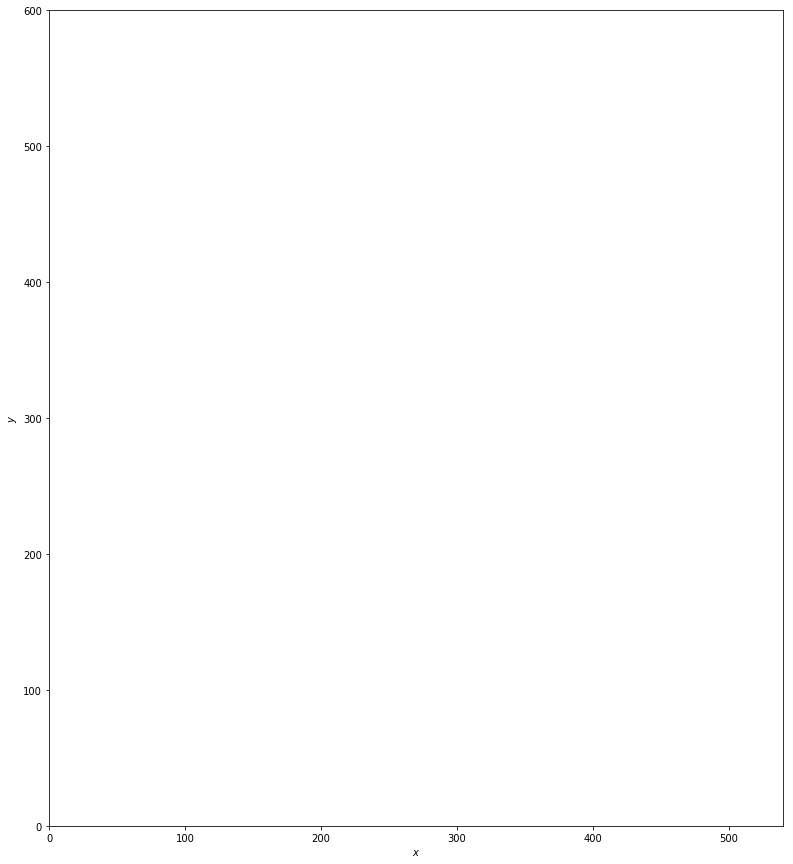

angle 0.0
move (3.0, 0.0)
782.978971691 442.959393917
222


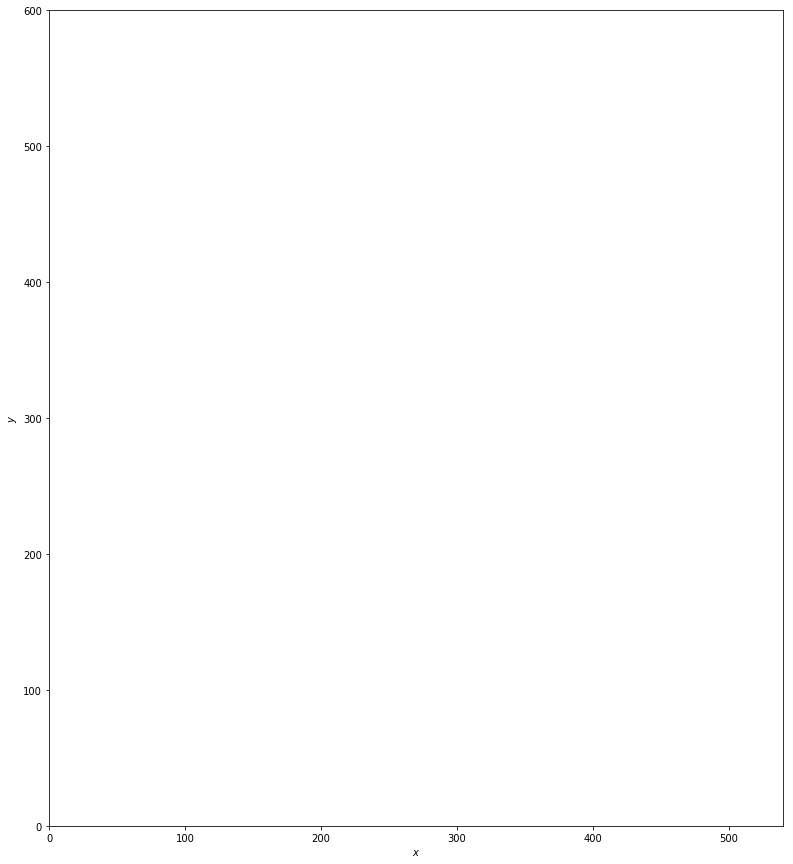

angle 0.0
move (3.0, 0.0)
785.978971691 442.959393917
223


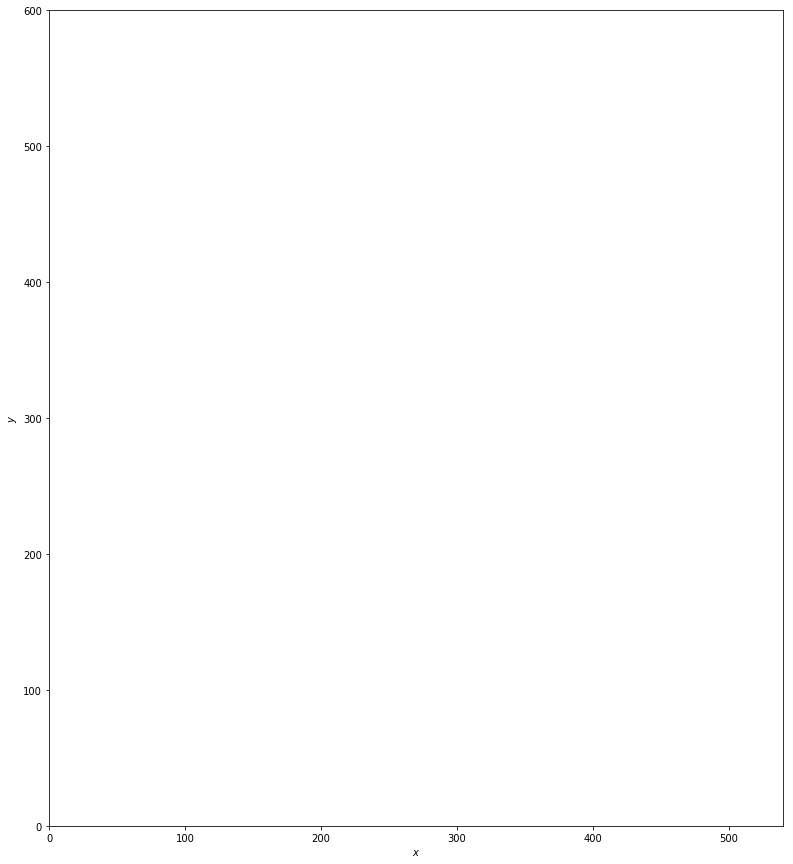

angle 0.0
move (3.0, 0.0)
788.978971691 442.959393917
224


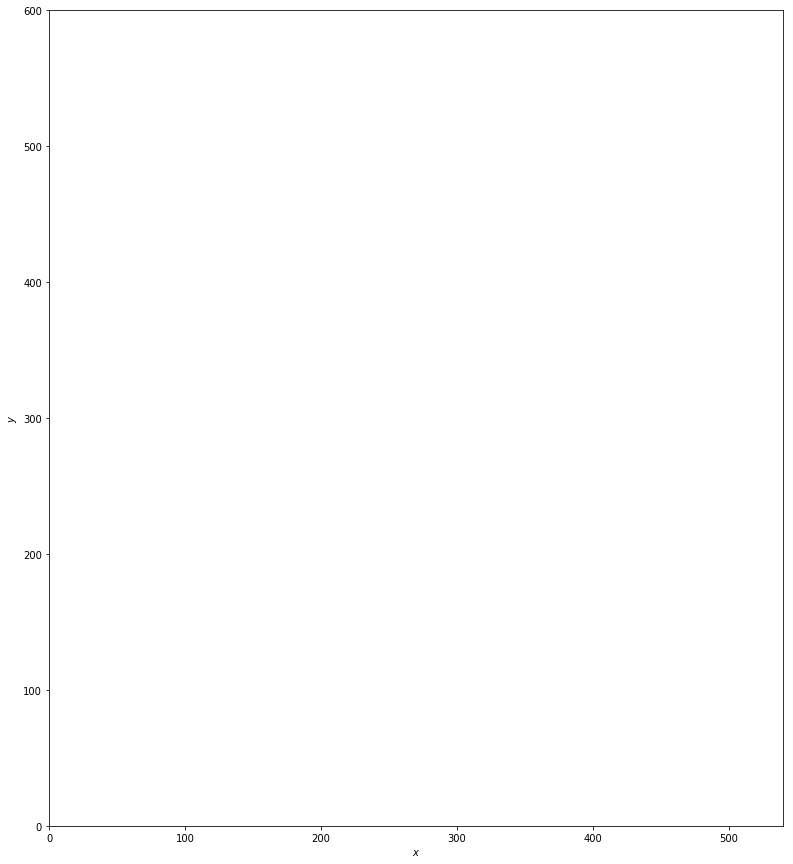

angle 0.0
move (3.0, 0.0)
791.978971691 442.959393917
225


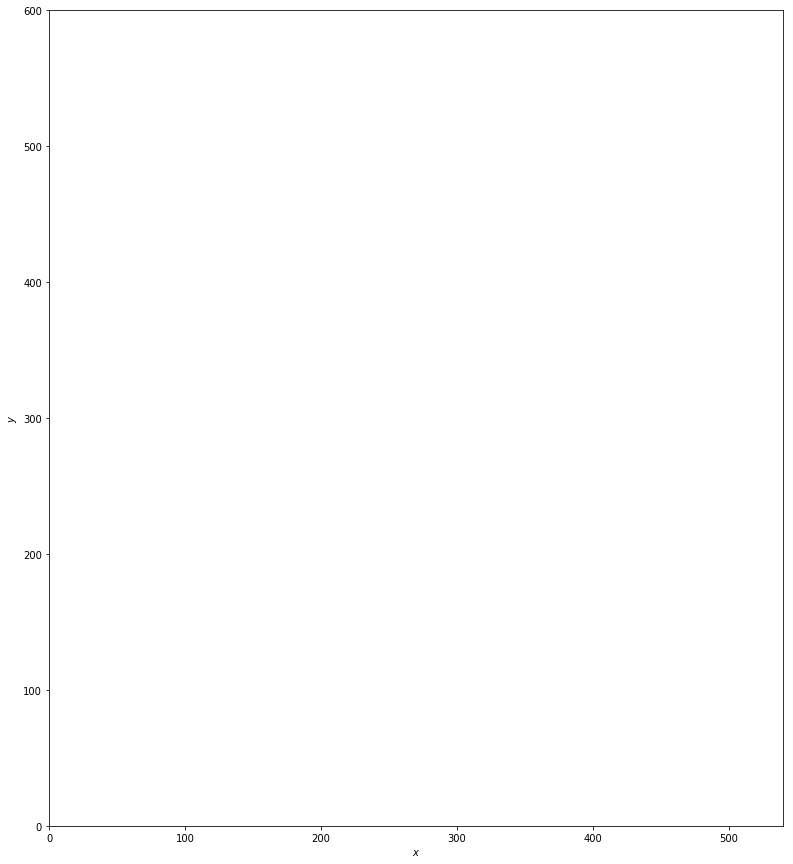

angle 0.0
move (3.0, 0.0)
794.978971691 442.959393917
226


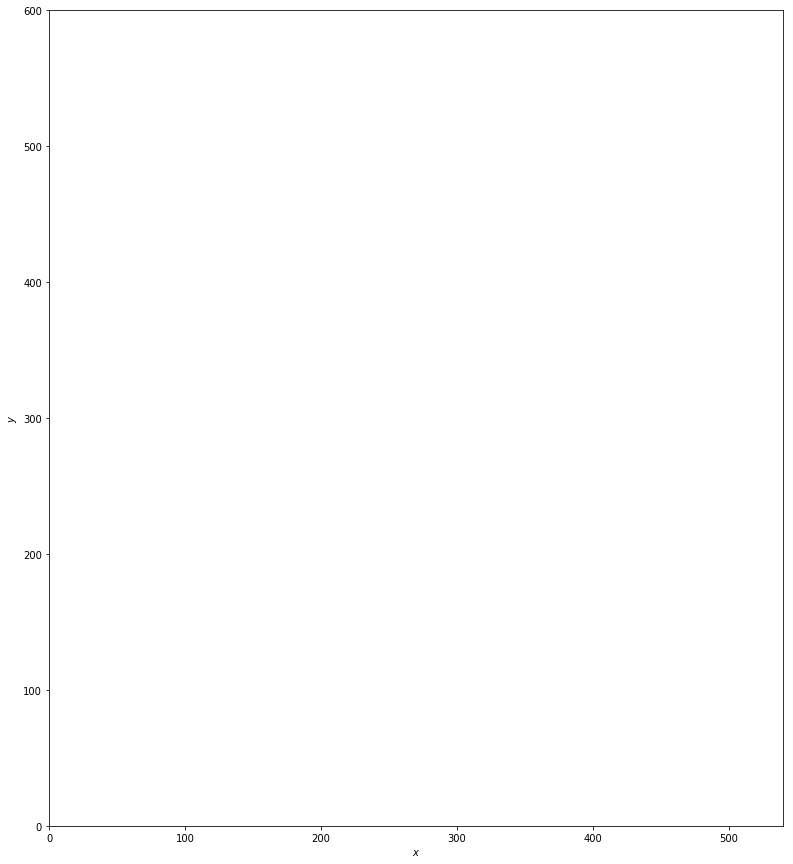

angle 0.0
move (3.0, 0.0)
797.978971691 442.959393917
227


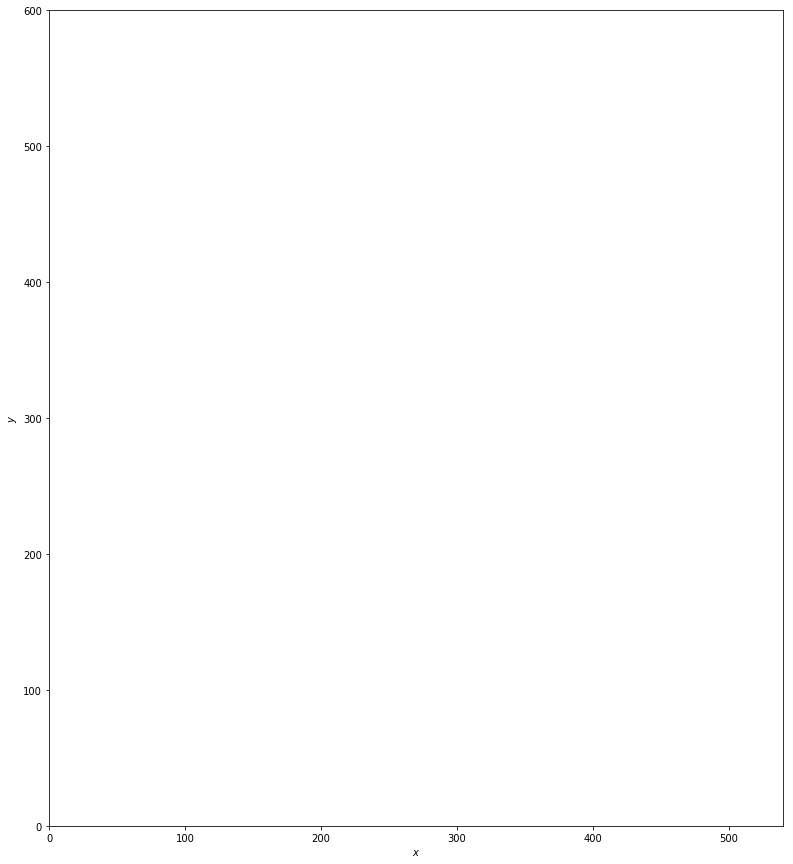

angle 0.0
move (3.0, 0.0)
800.978971691 442.959393917
228


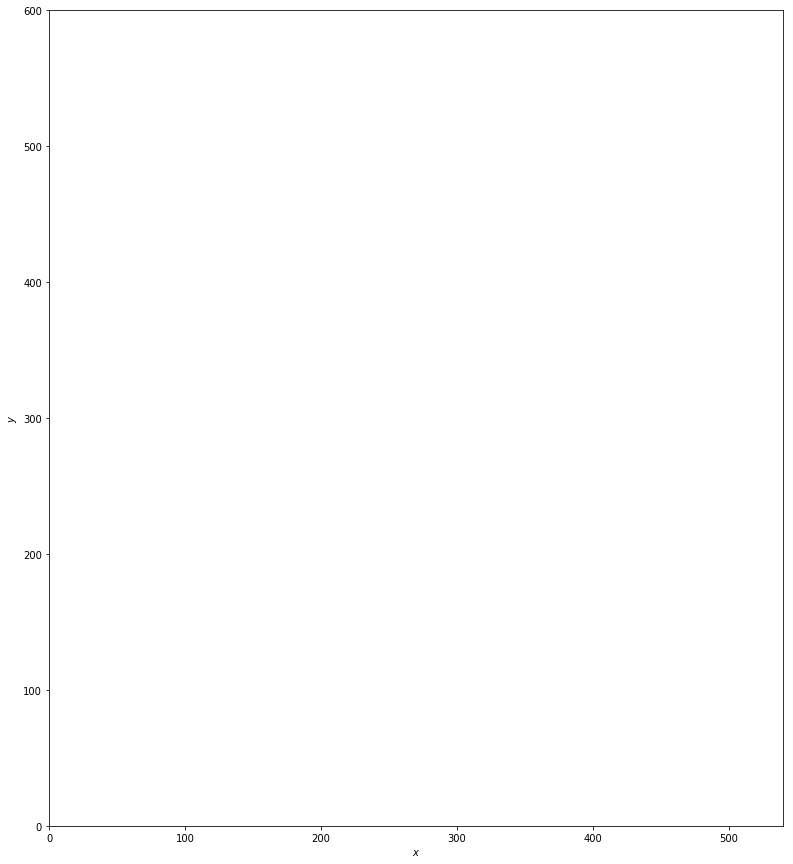

angle 0.0
move (3.0, 0.0)
803.978971691 442.959393917
229


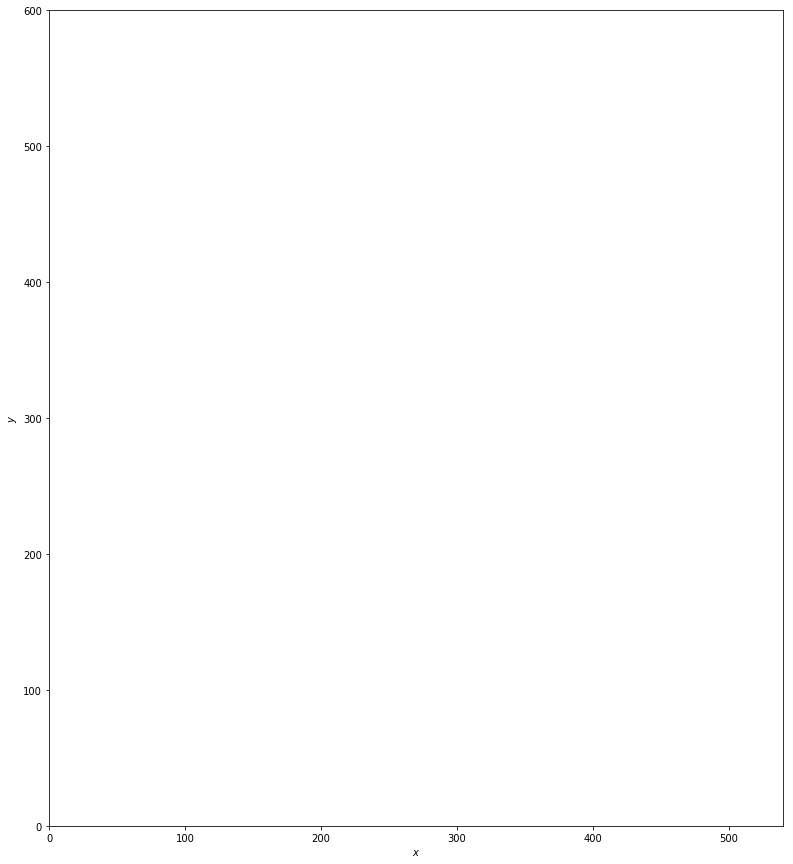

angle 0.0
move (3.0, 0.0)
806.978971691 442.959393917
230


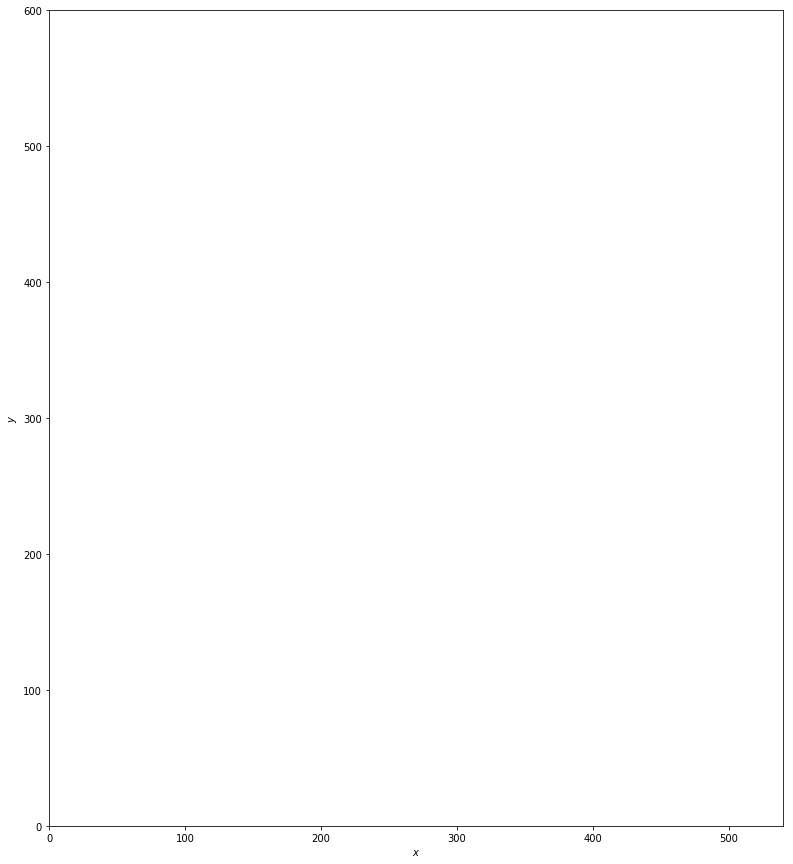

angle 0.0
move (3.0, 0.0)
809.978971691 442.959393917
231


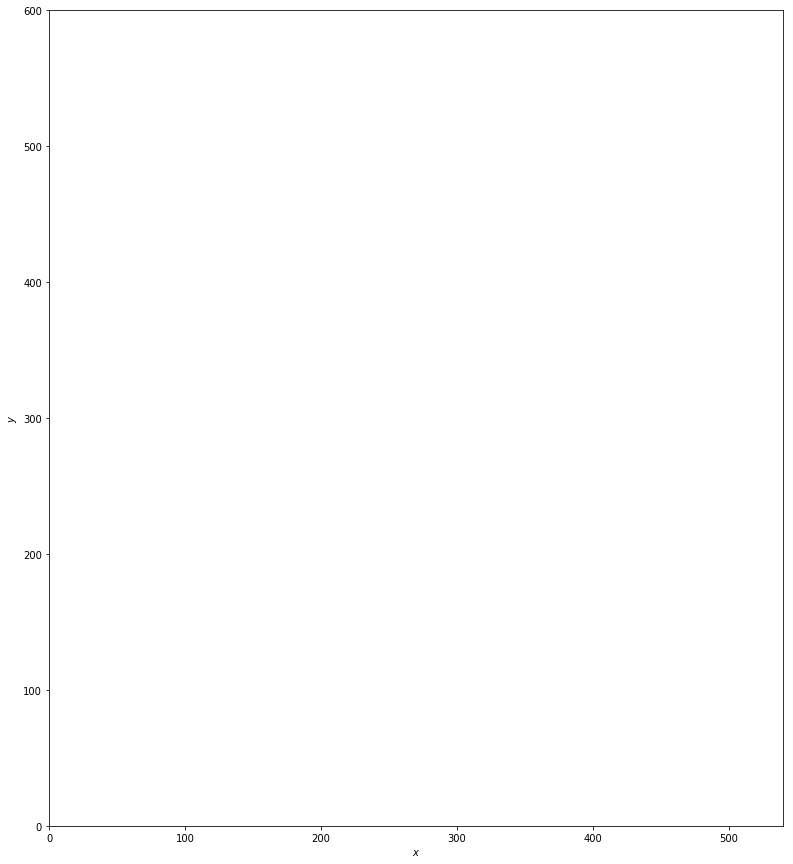

angle 0.0
move (3.0, 0.0)
812.978971691 442.959393917
232


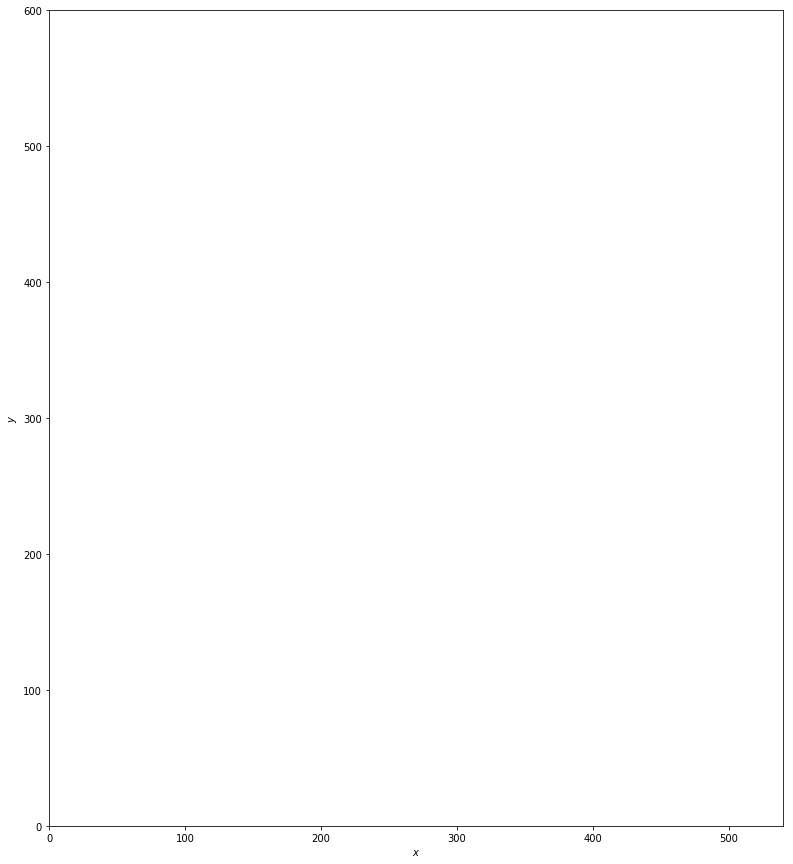

angle 0.0
move (3.0, 0.0)
815.978971691 442.959393917
233


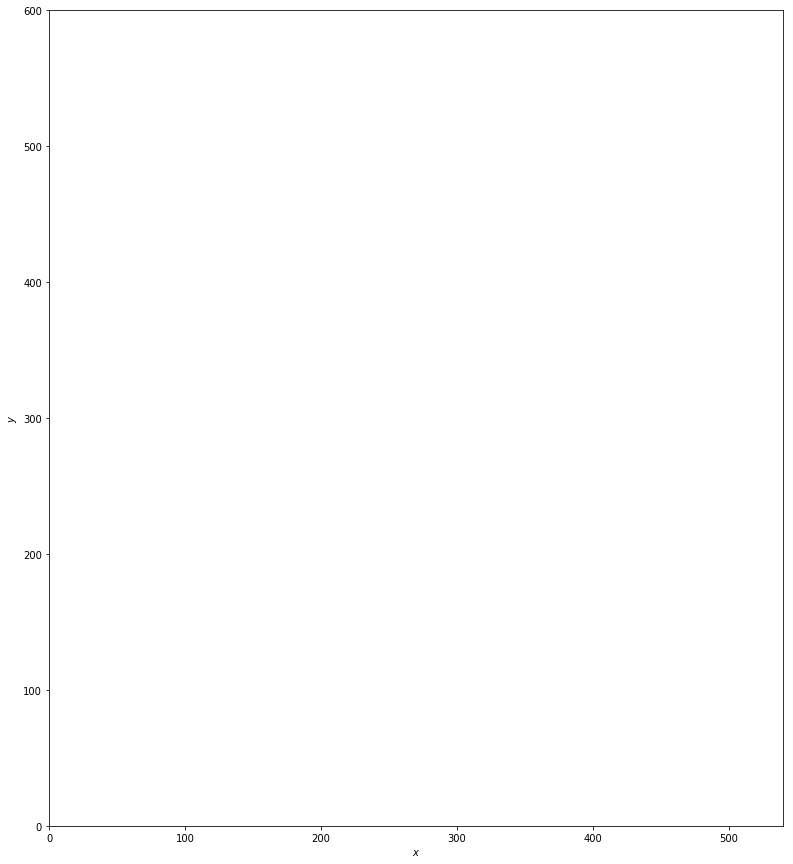

angle 0.0
move (3.0, 0.0)
818.978971691 442.959393917
234


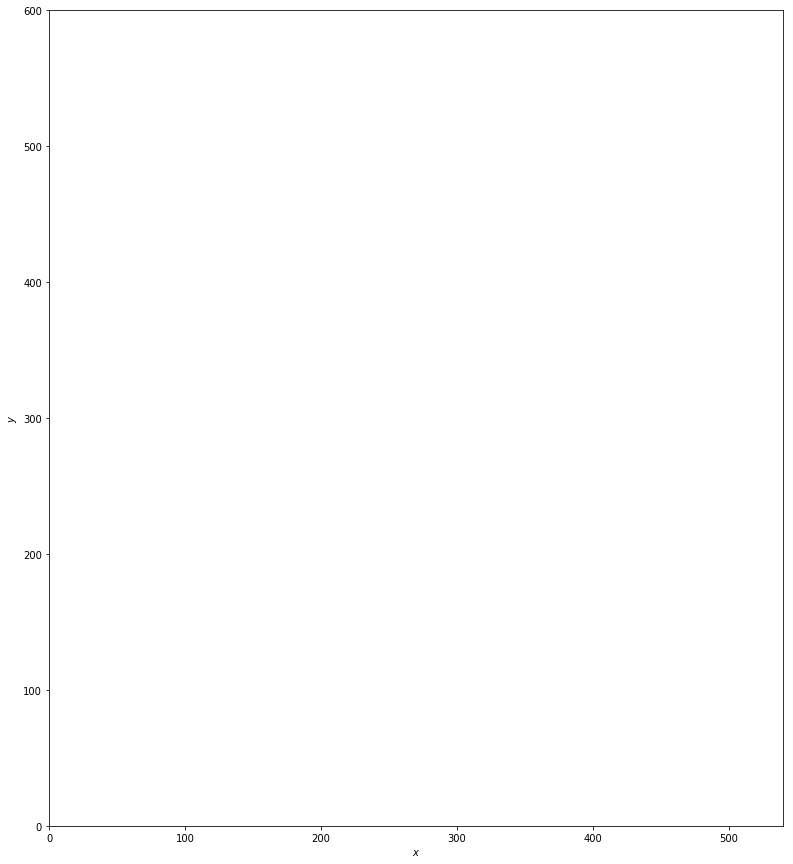

angle 0.0
move (3.0, 0.0)
821.978971691 442.959393917
235


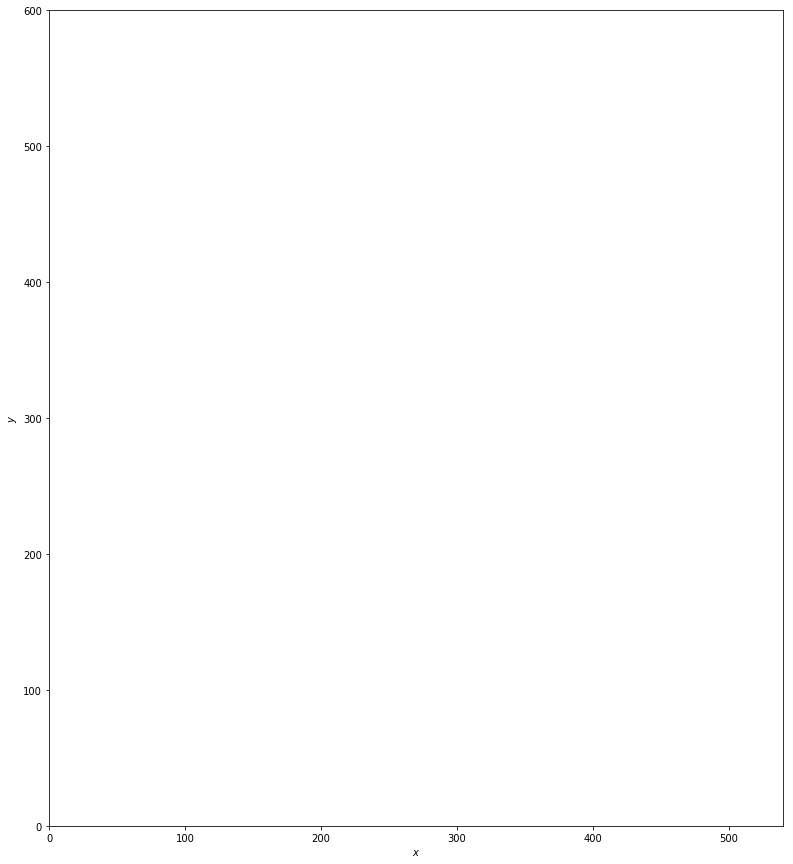

angle 0.0
move (3.0, 0.0)
824.978971691 442.959393917
236


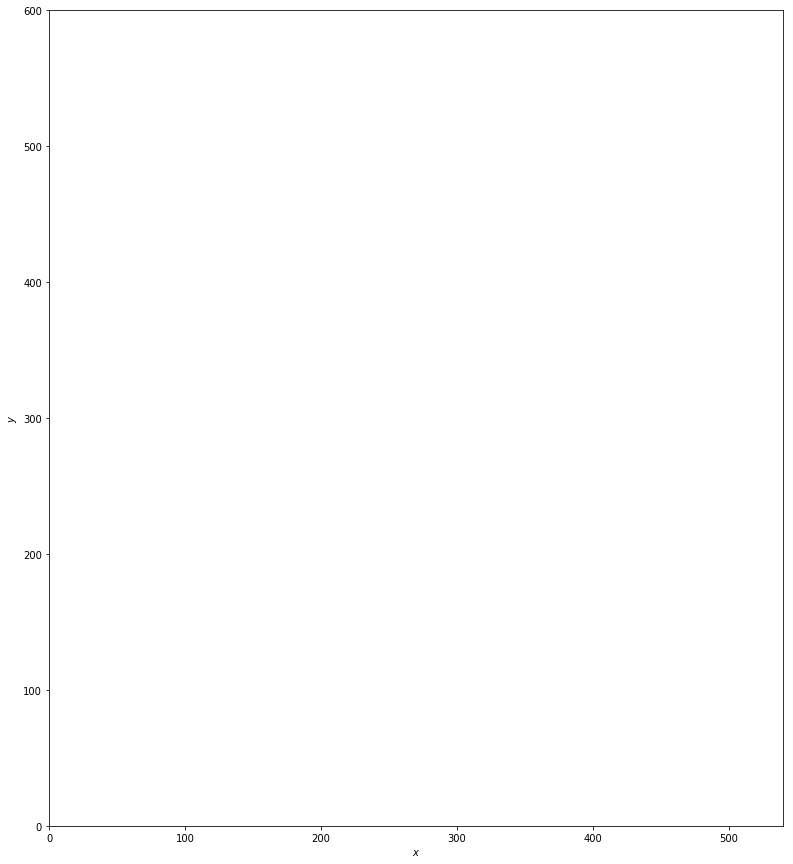

angle 0.0
move (3.0, 0.0)
827.978971691 442.959393917
237


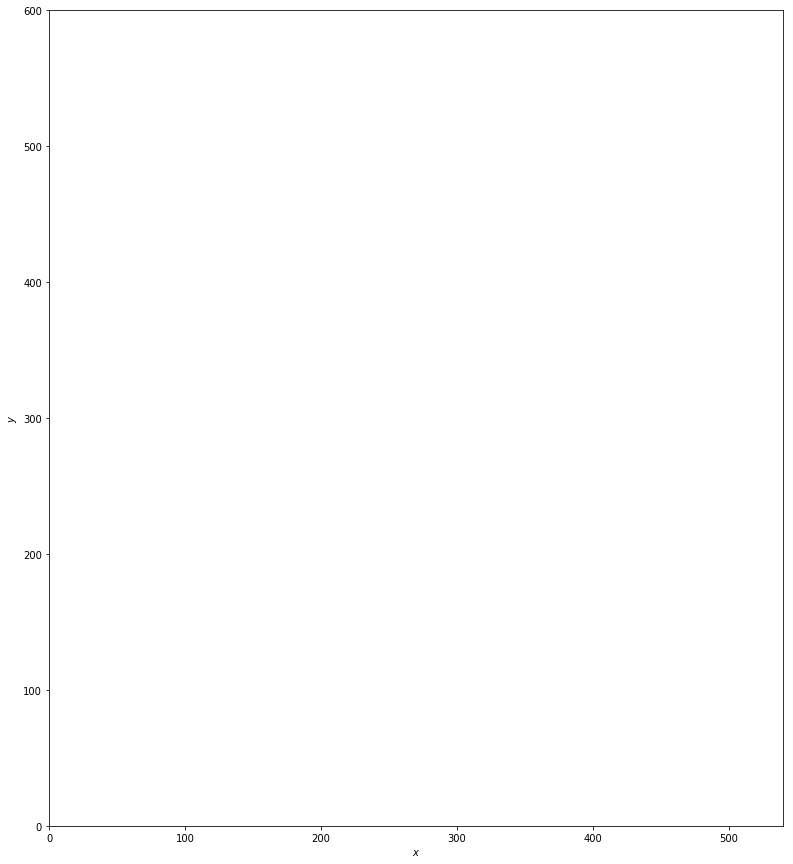

angle 0.0
move (3.0, 0.0)
830.978971691 442.959393917
238


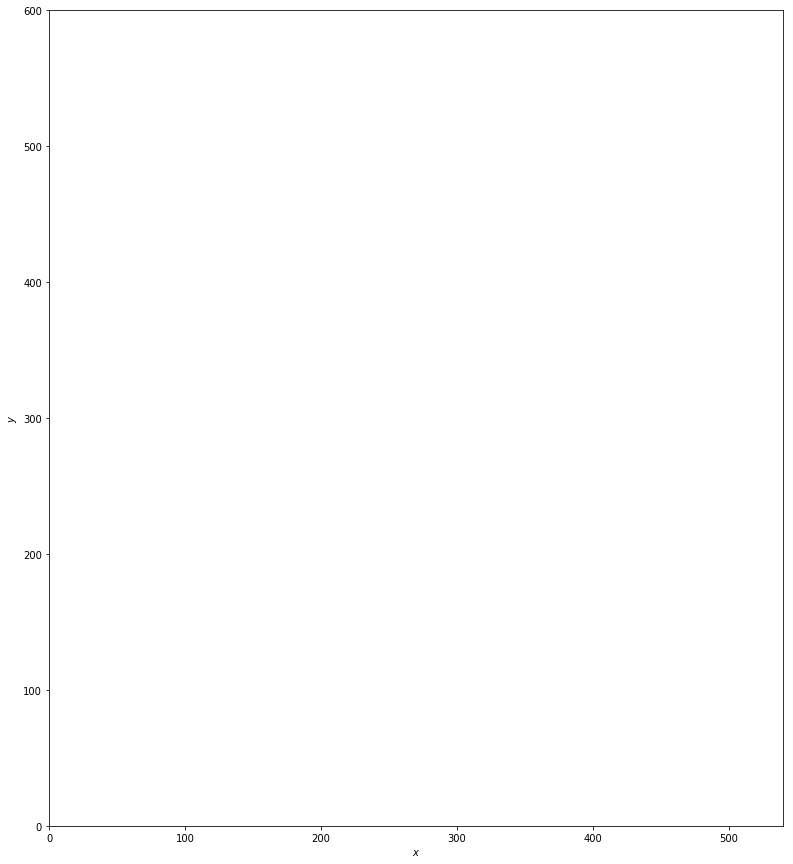

angle 0.0
move (3.0, 0.0)
833.978971691 442.959393917
239


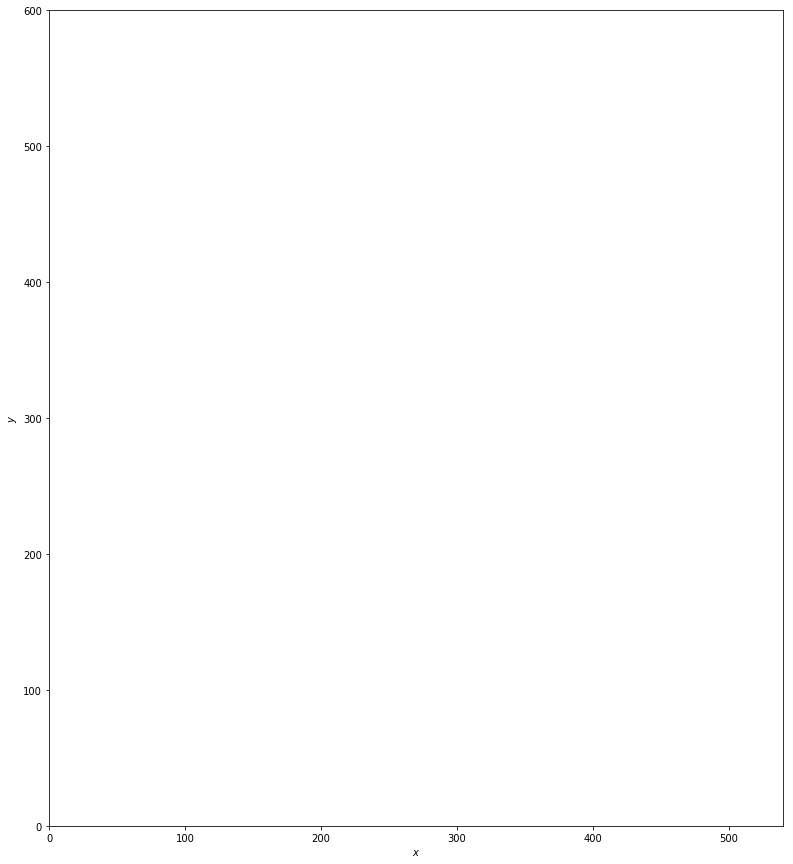

angle 0.0
move (3.0, 0.0)
836.978971691 442.959393917
240


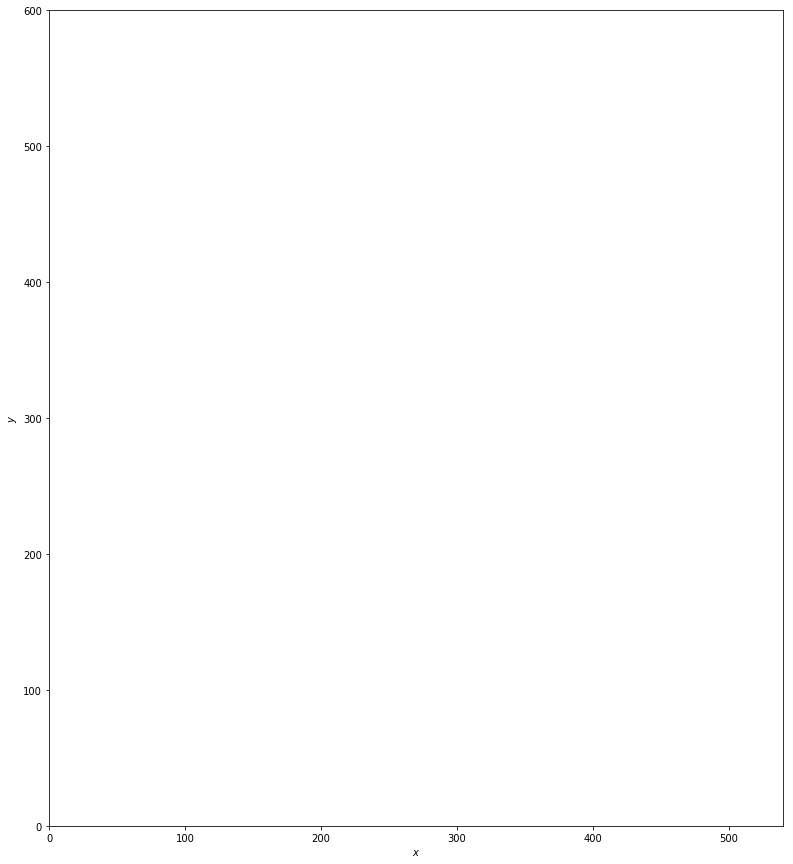

angle 0.0
move (3.0, 0.0)
839.978971691 442.959393917
241


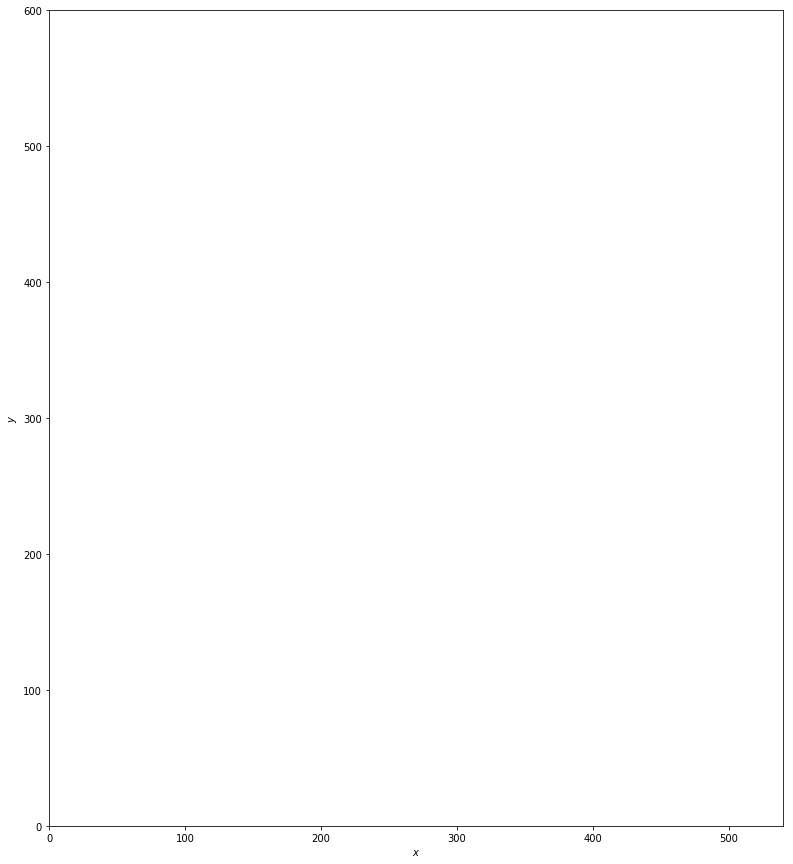

angle 0.0
move (3.0, 0.0)
842.978971691 442.959393917
242


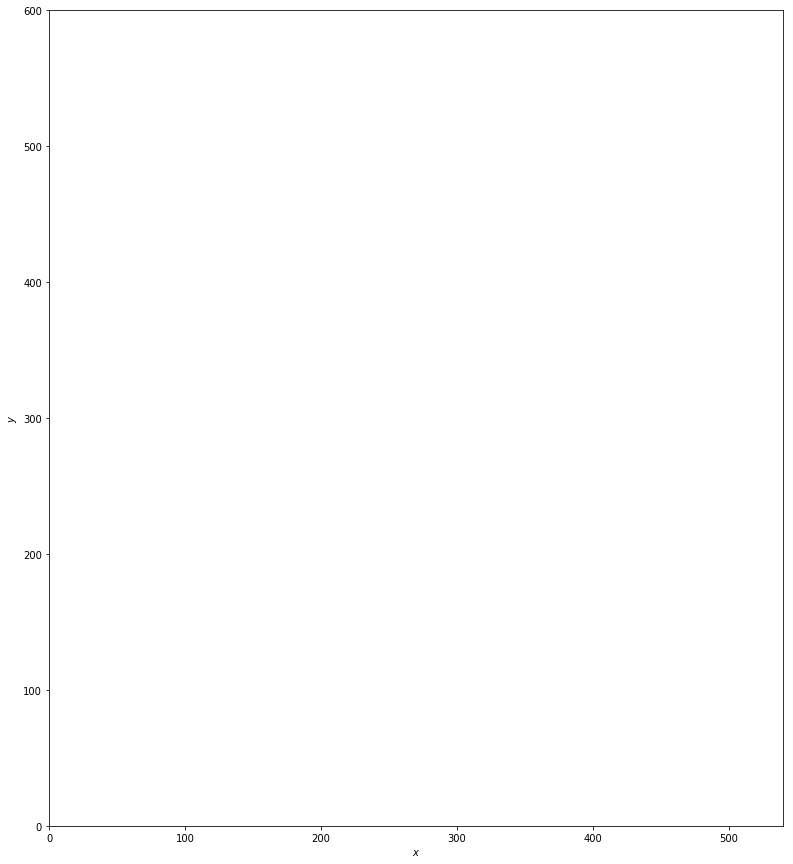

angle 0.0
move (3.0, 0.0)
845.978971691 442.959393917
243


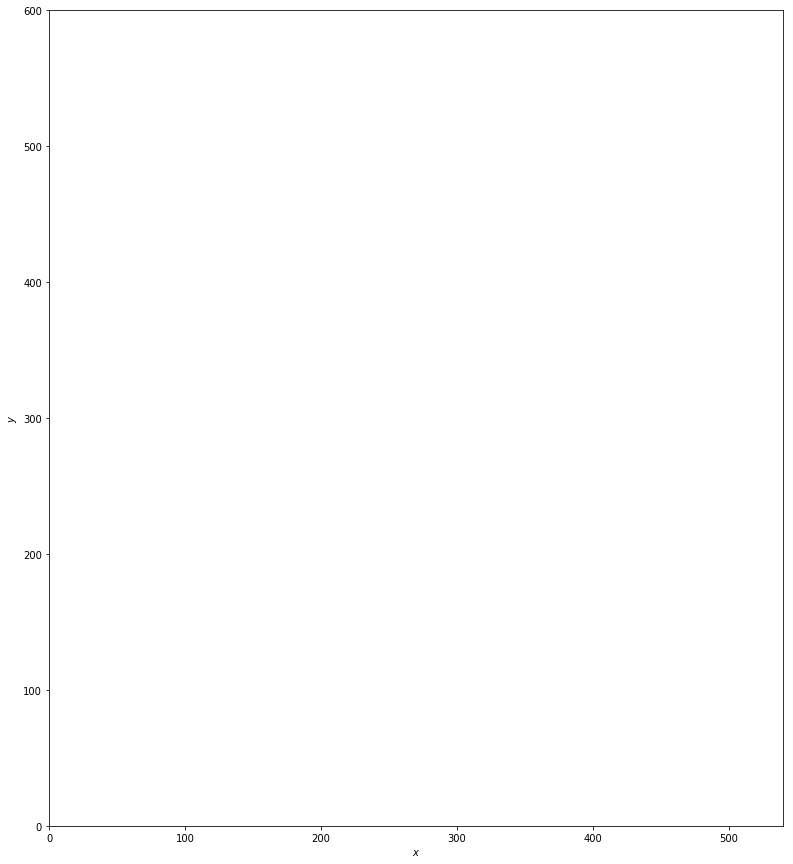

angle 0.0
move (3.0, 0.0)
848.978971691 442.959393917
244


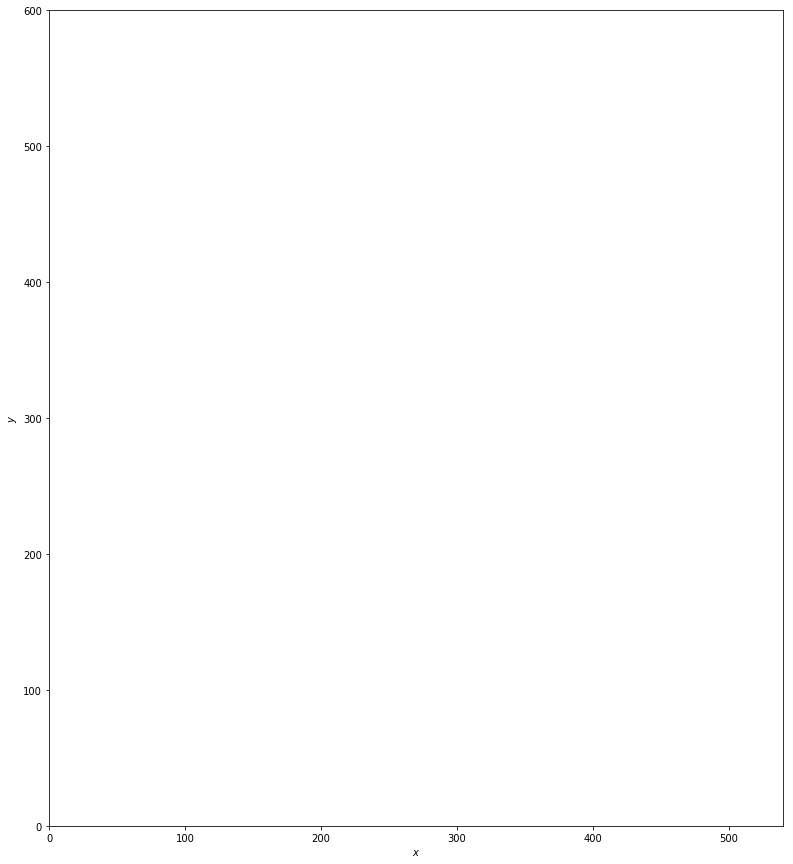

angle 0.0
move (3.0, 0.0)
851.978971691 442.959393917
245


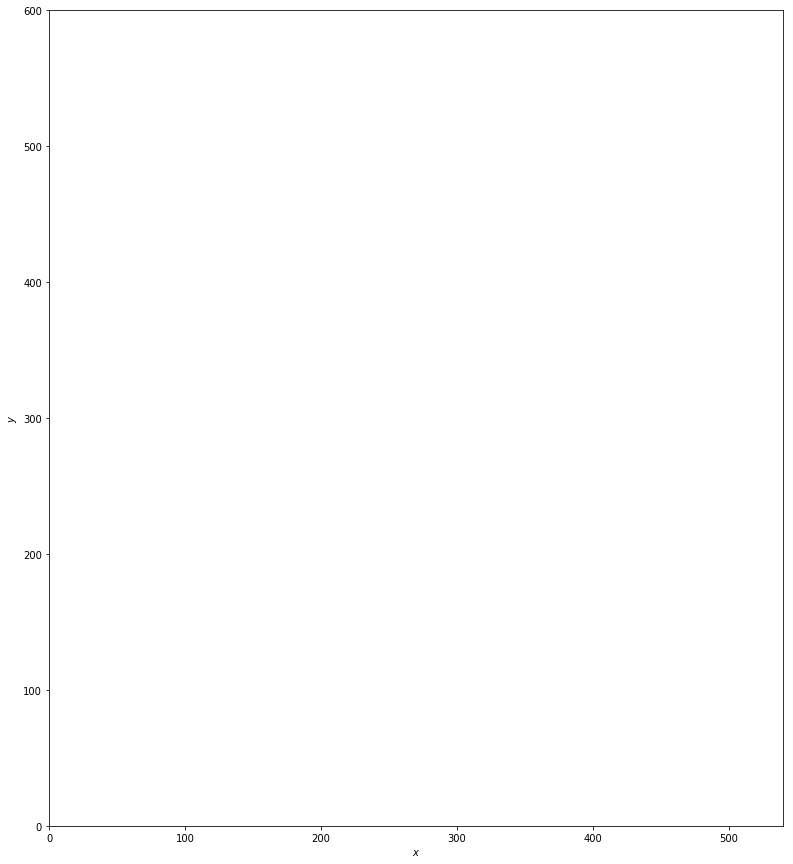

angle 0.0
move (3.0, 0.0)
854.978971691 442.959393917
246


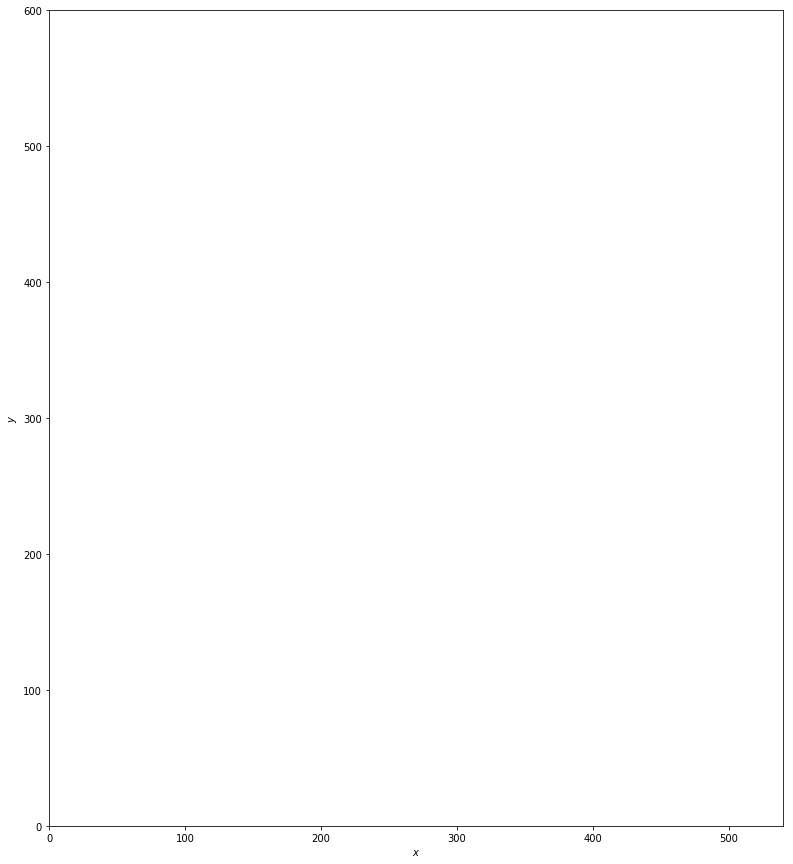

angle 0.0
move (3.0, 0.0)
857.978971691 442.959393917
247


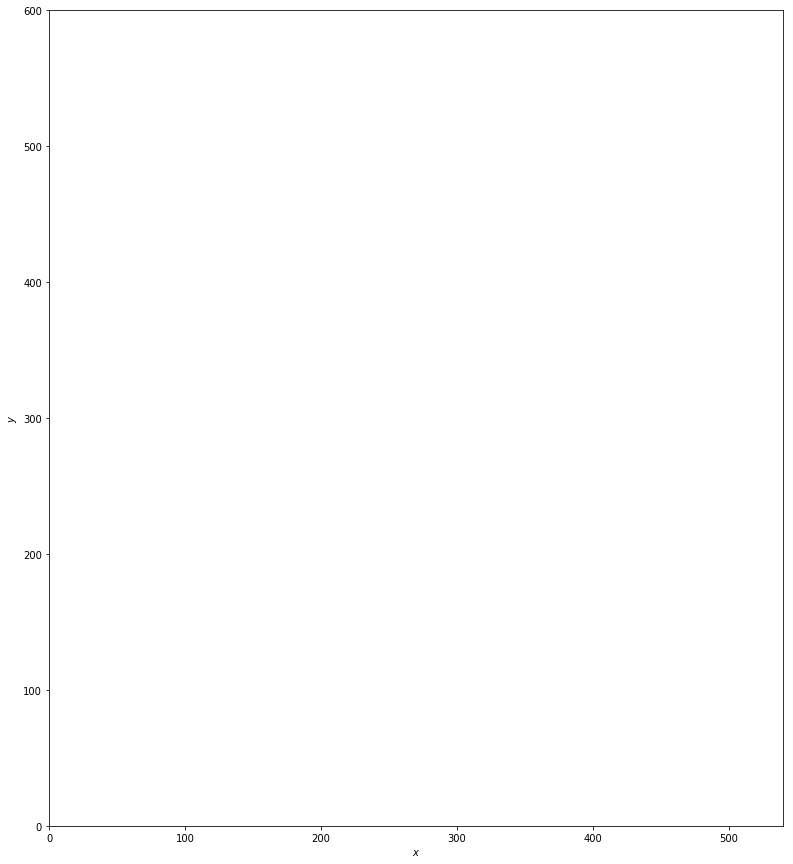

angle 0.0
move (3.0, 0.0)
860.978971691 442.959393917
248


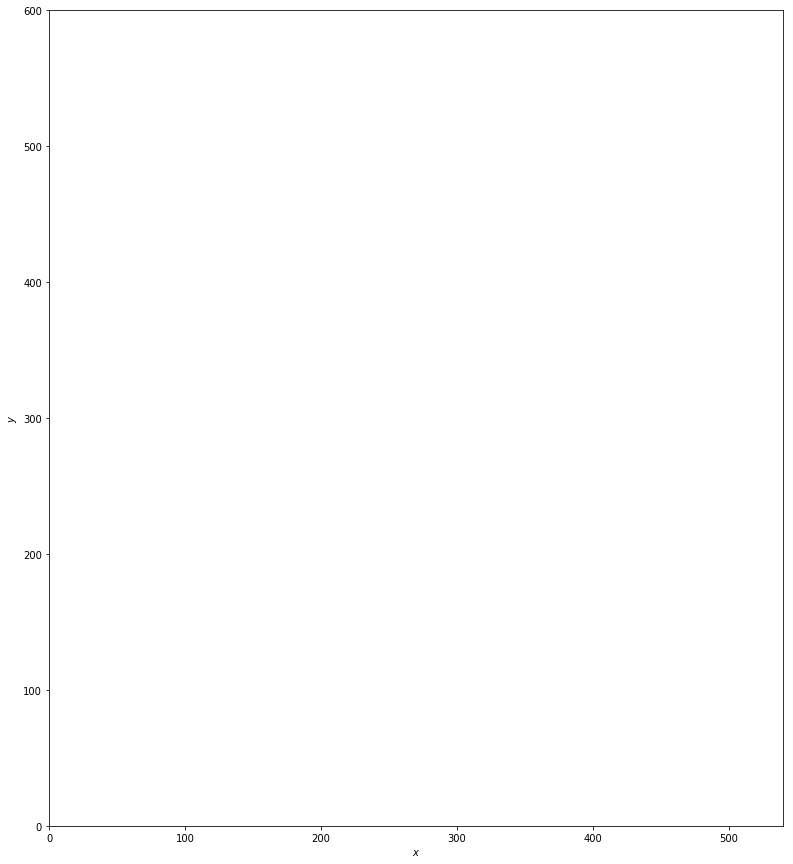

angle 0.0
move (3.0, 0.0)
863.978971691 442.959393917
249


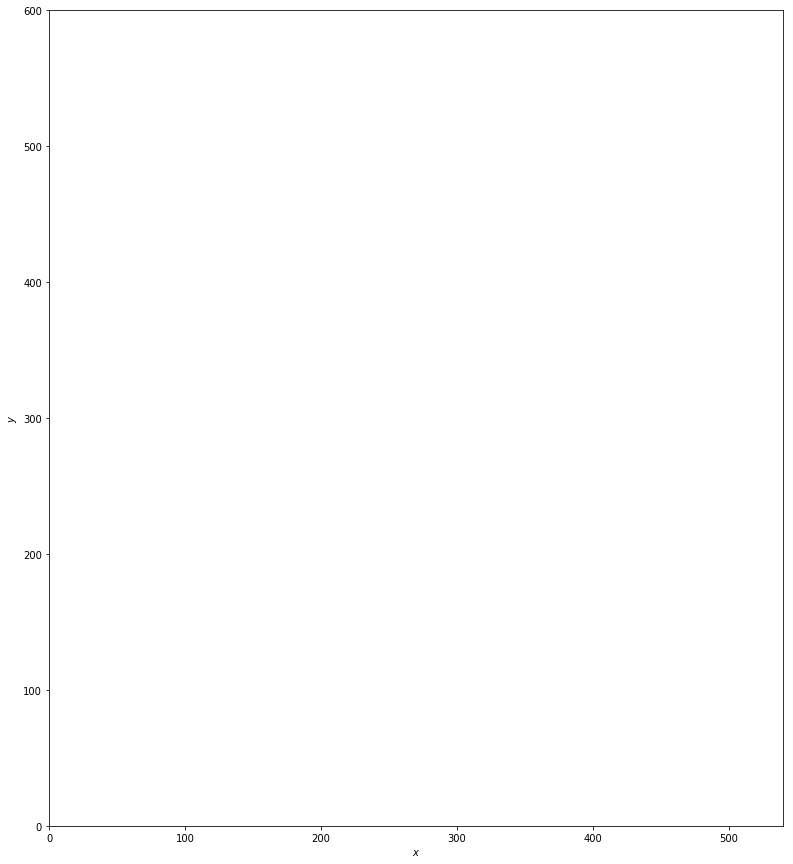

angle 0.0
move (3.0, 0.0)
866.978971691 442.959393917
250


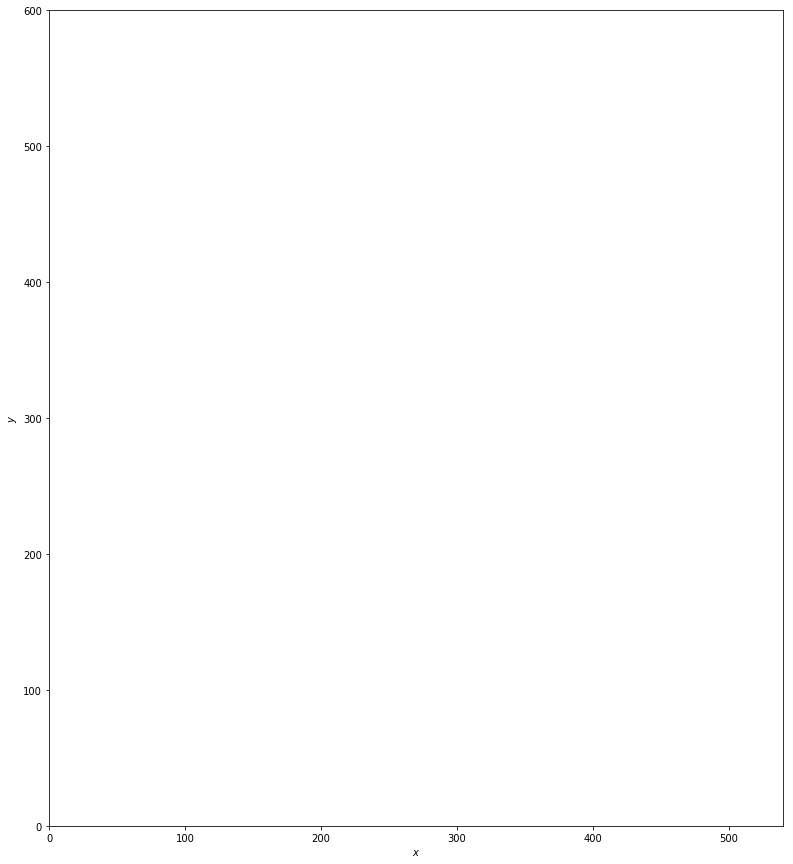

angle 0.0
move (3.0, 0.0)
869.978971691 442.959393917
251


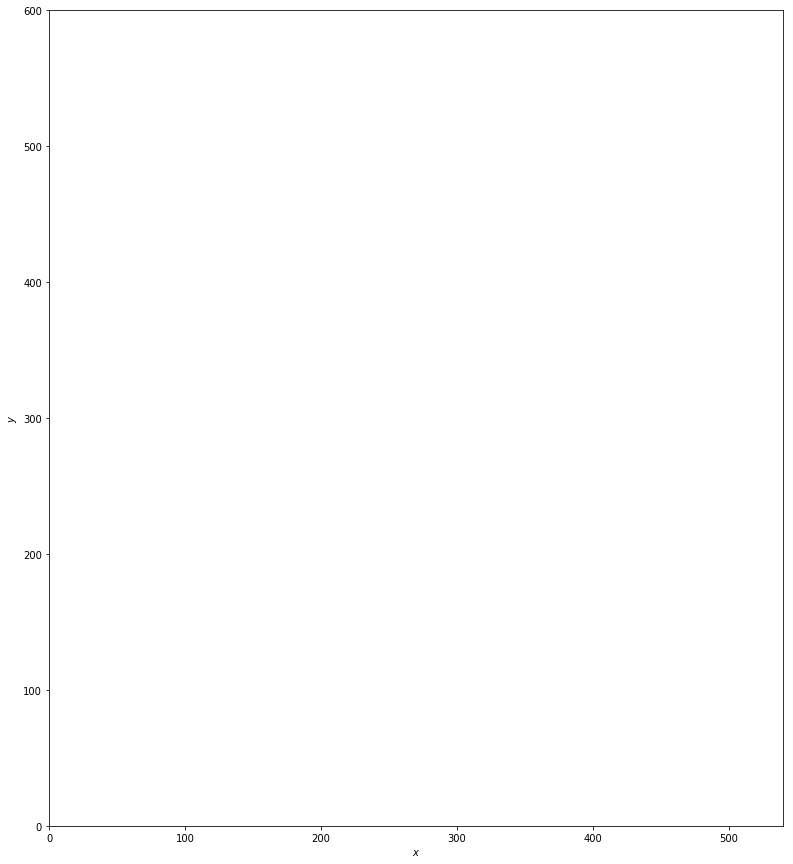

angle 0.0
move (3.0, 0.0)
872.978971691 442.959393917
252


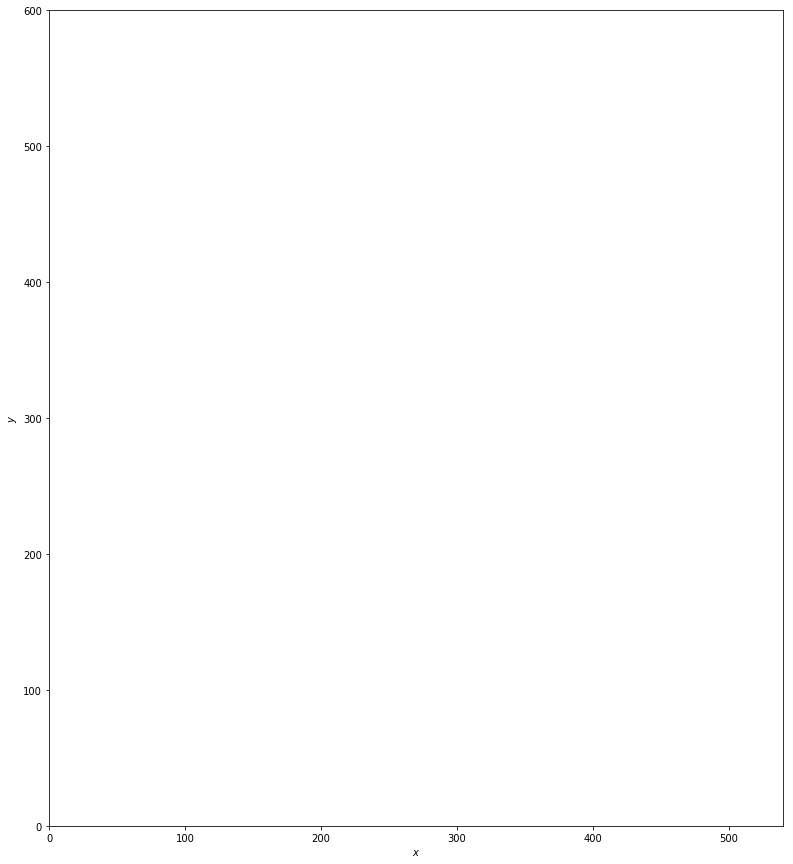

angle 0.0
move (3.0, 0.0)
875.978971691 442.959393917
253


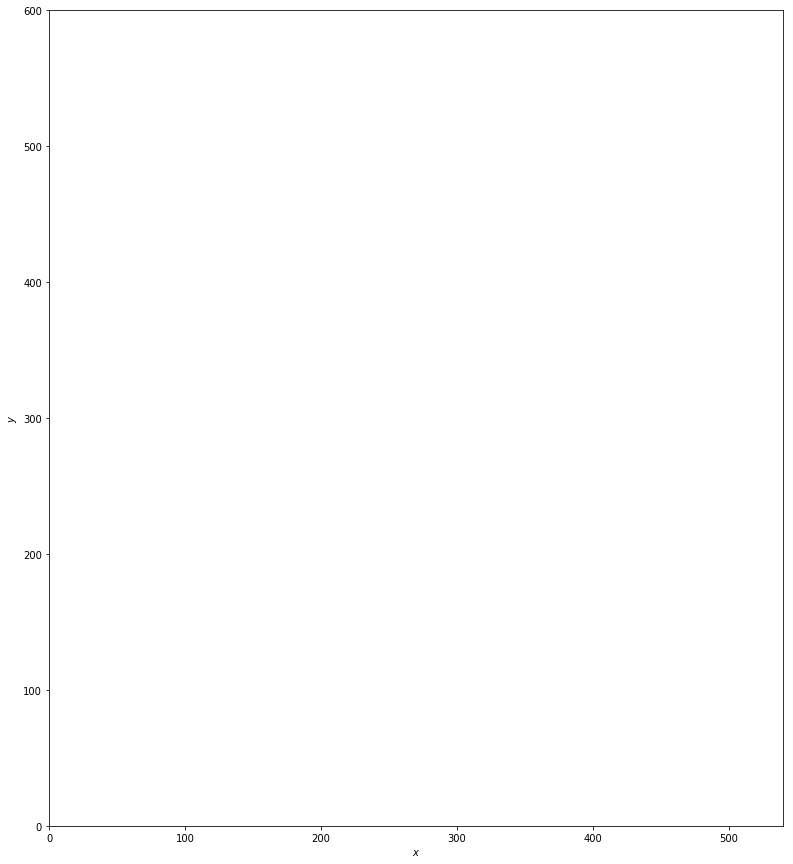

angle 0.0
move (3.0, 0.0)
878.978971691 442.959393917
254


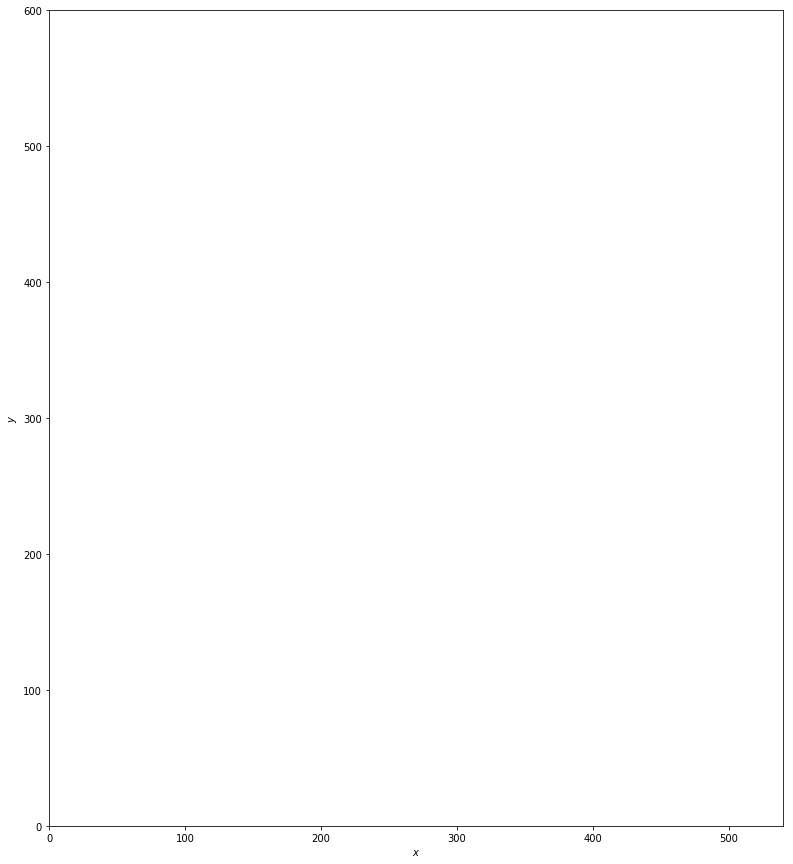

angle 0.0
move (3.0, 0.0)
881.978971691 442.959393917
255


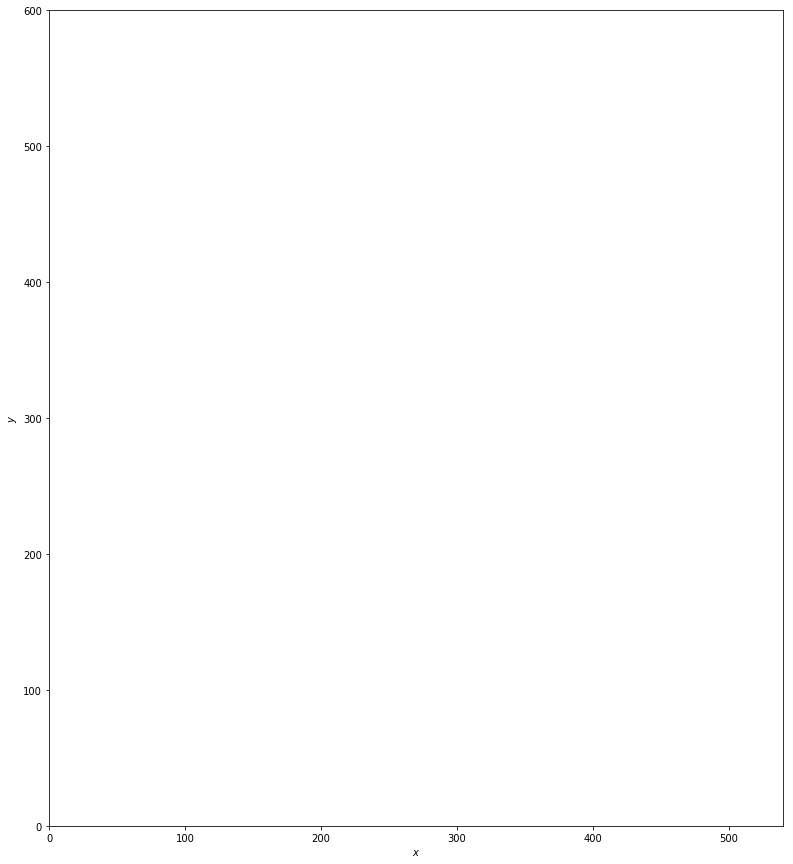

angle 0.0
move (3.0, 0.0)
884.978971691 442.959393917
256


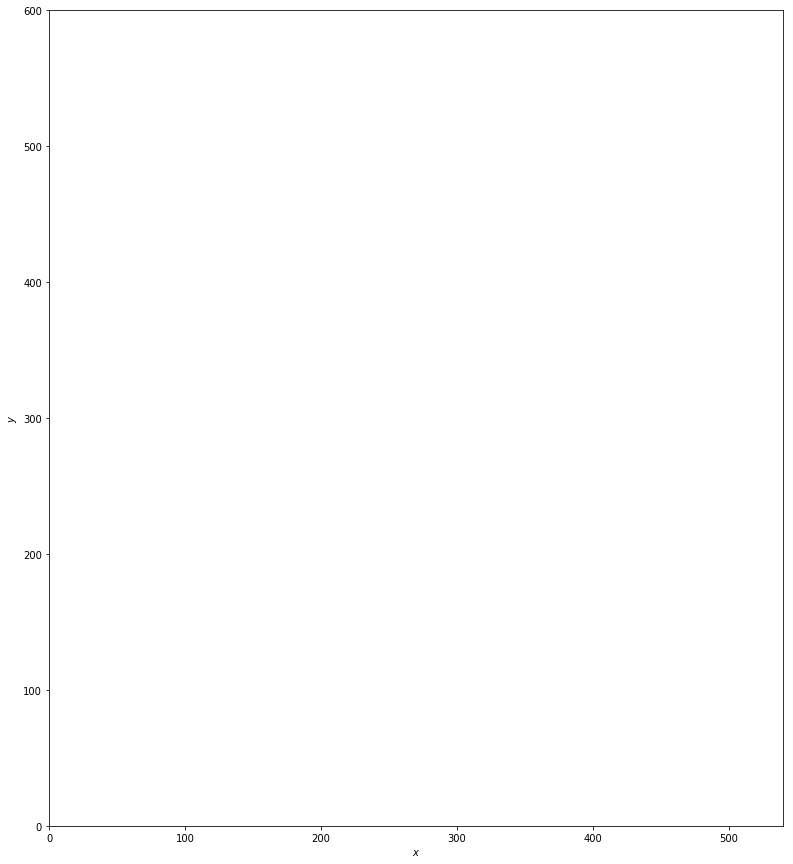

angle 0.0
move (3.0, 0.0)
887.978971691 442.959393917
257


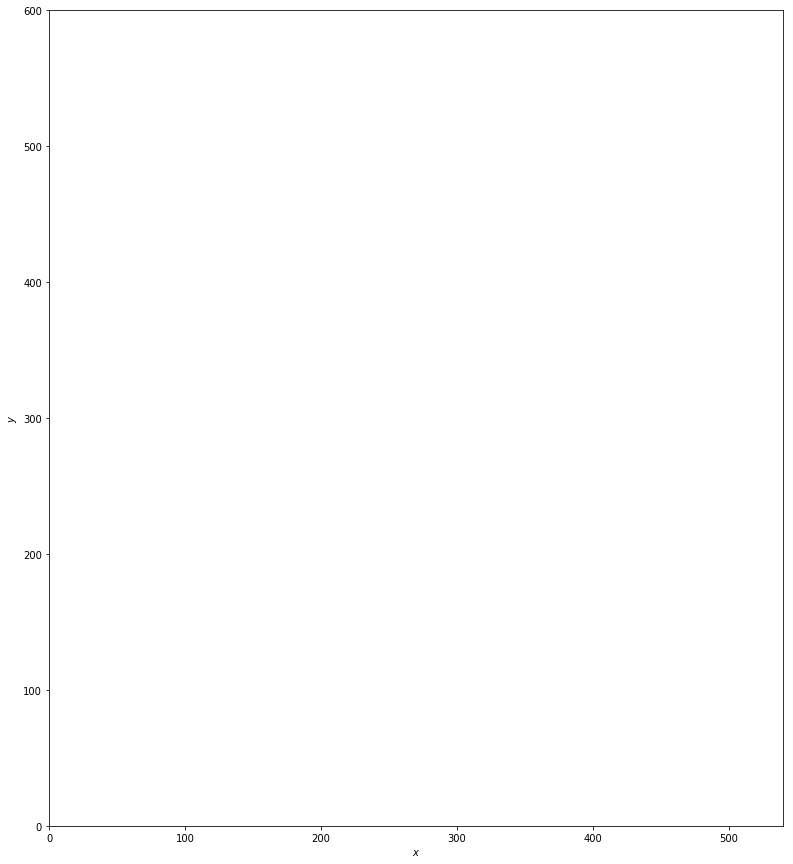

angle 0.0
move (3.0, 0.0)
890.978971691 442.959393917
258


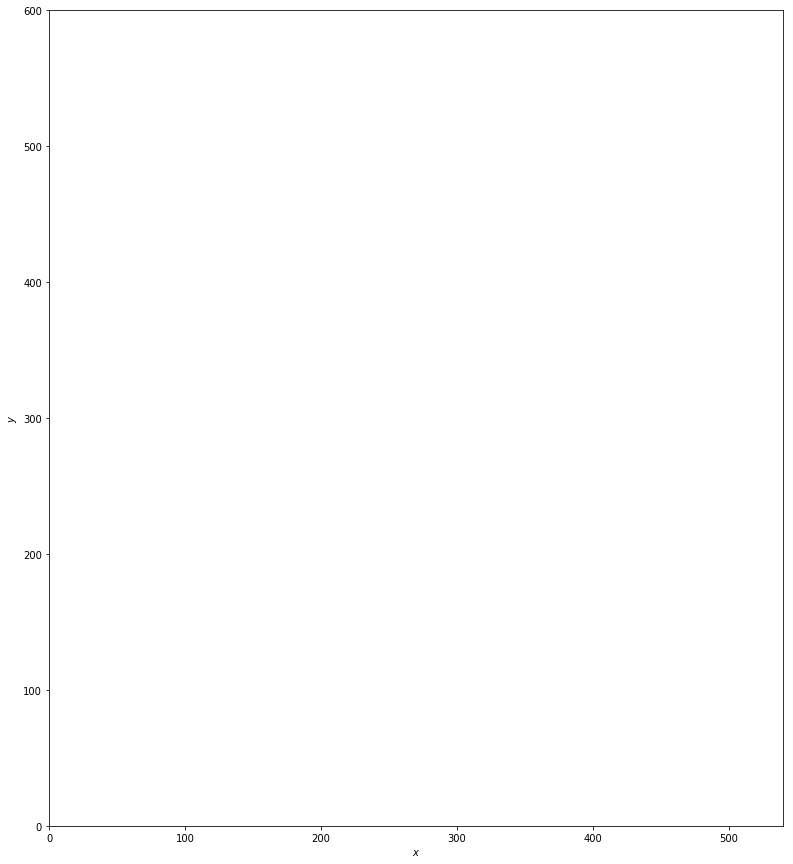

angle 0.0
move (3.0, 0.0)
893.978971691 442.959393917
259


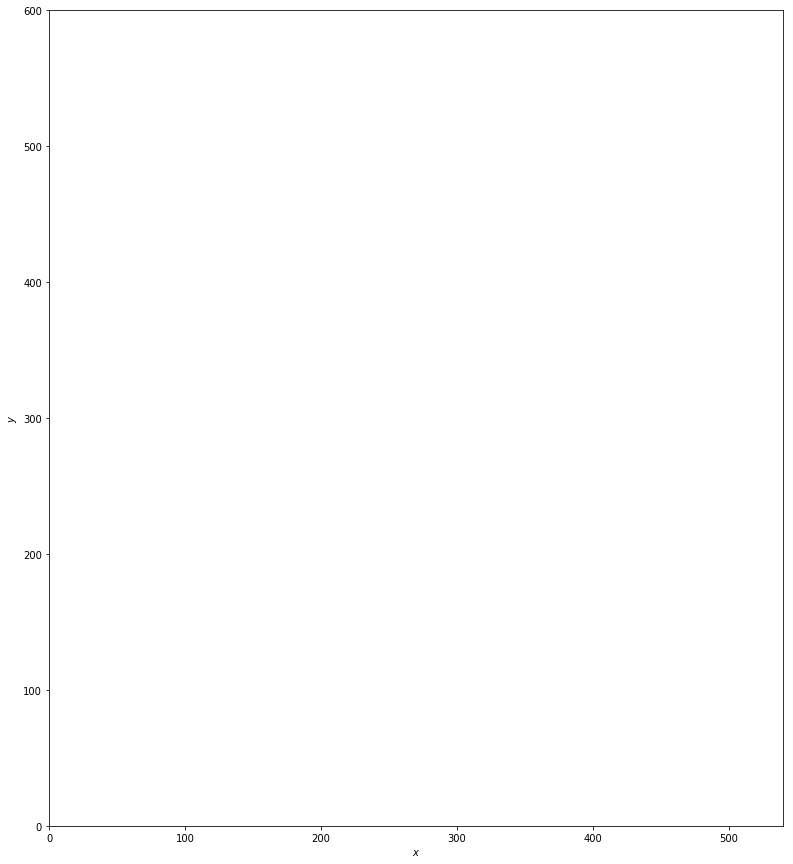

angle 0.0
move (3.0, 0.0)
896.978971691 442.959393917
260


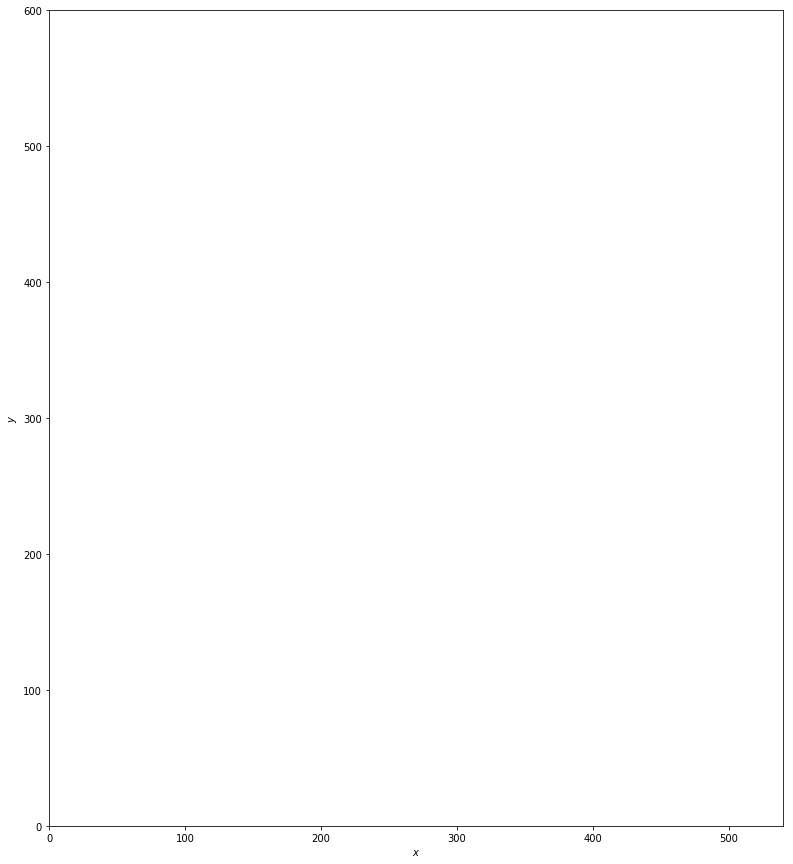

angle 0.0
move (3.0, 0.0)
899.978971691 442.959393917
261


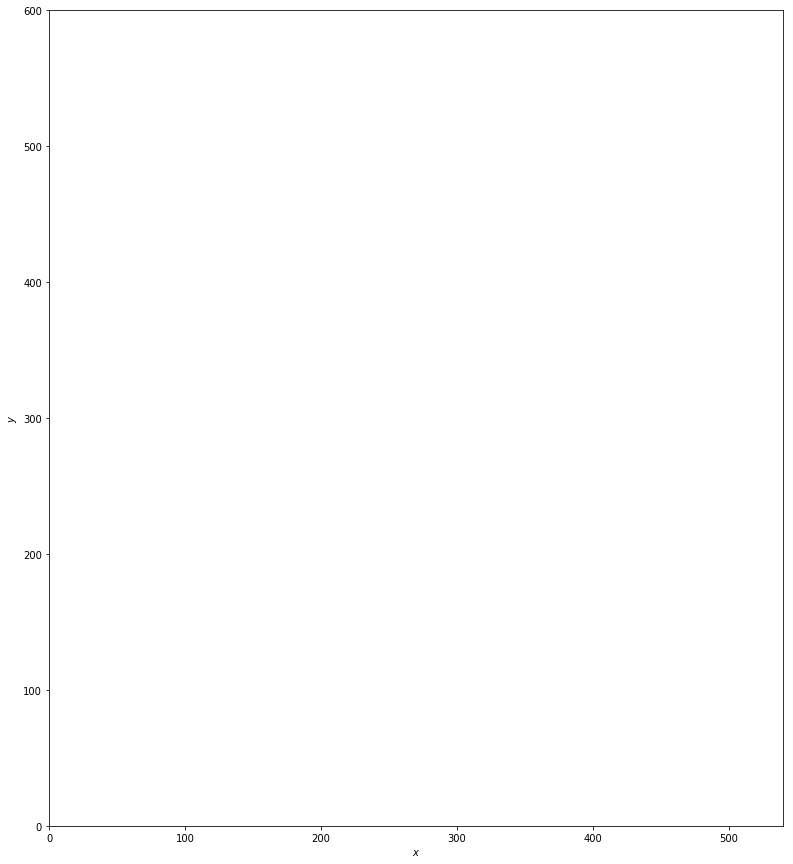

angle 0.0
move (3.0, 0.0)
902.978971691 442.959393917
262


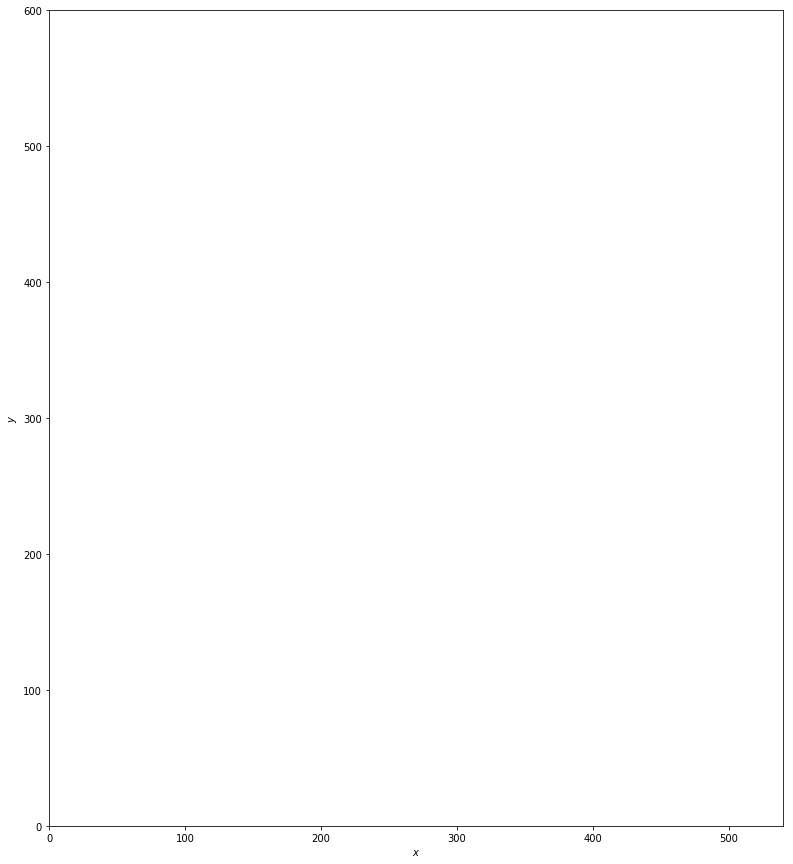

angle 0.0
move (3.0, 0.0)
905.978971691 442.959393917
263


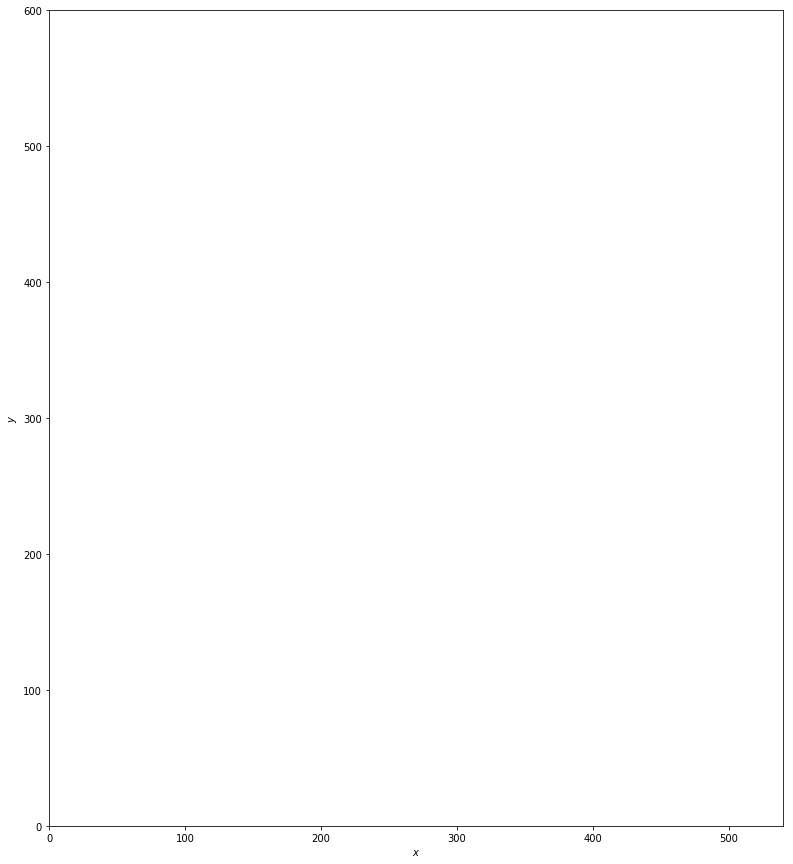

angle 0.0
move (3.0, 0.0)
908.978971691 442.959393917
264


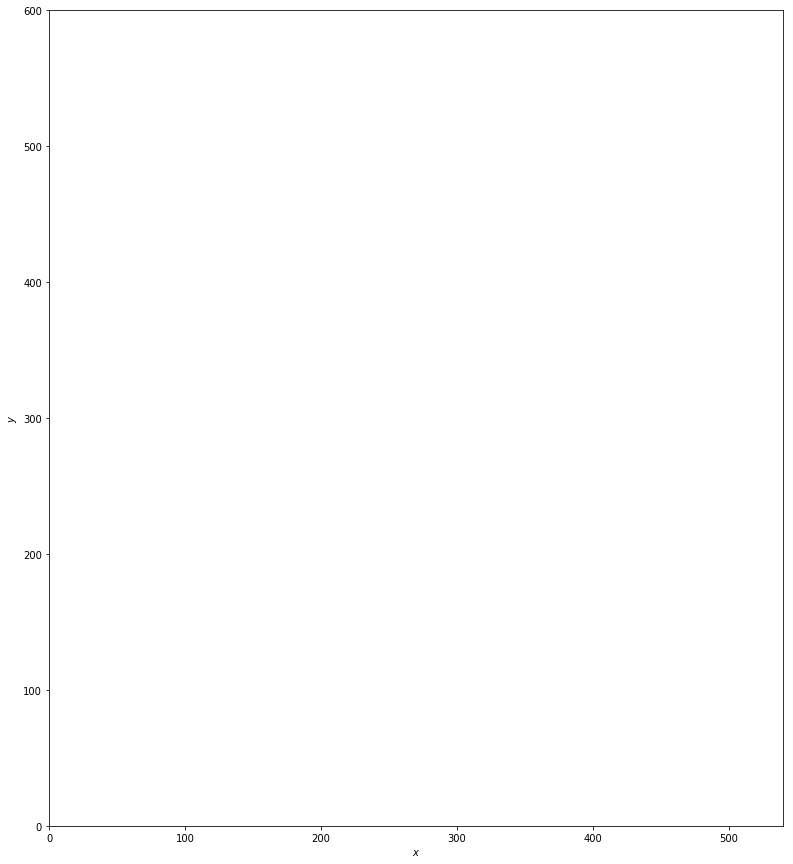

angle 0.0
move (3.0, 0.0)
911.978971691 442.959393917
265


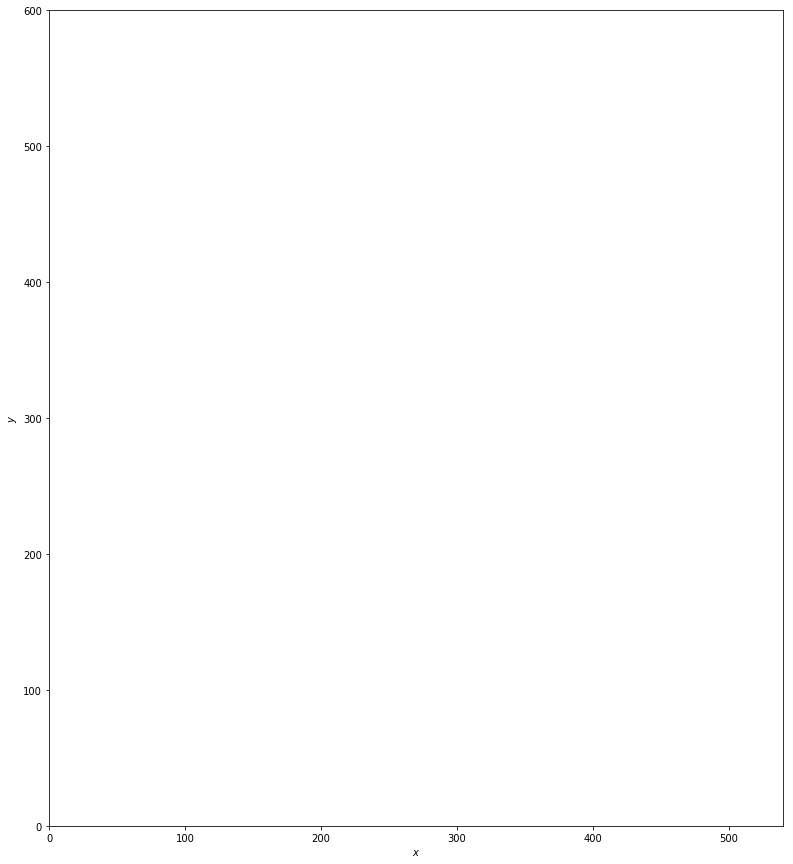

angle 0.0
move (3.0, 0.0)
914.978971691 442.959393917
266


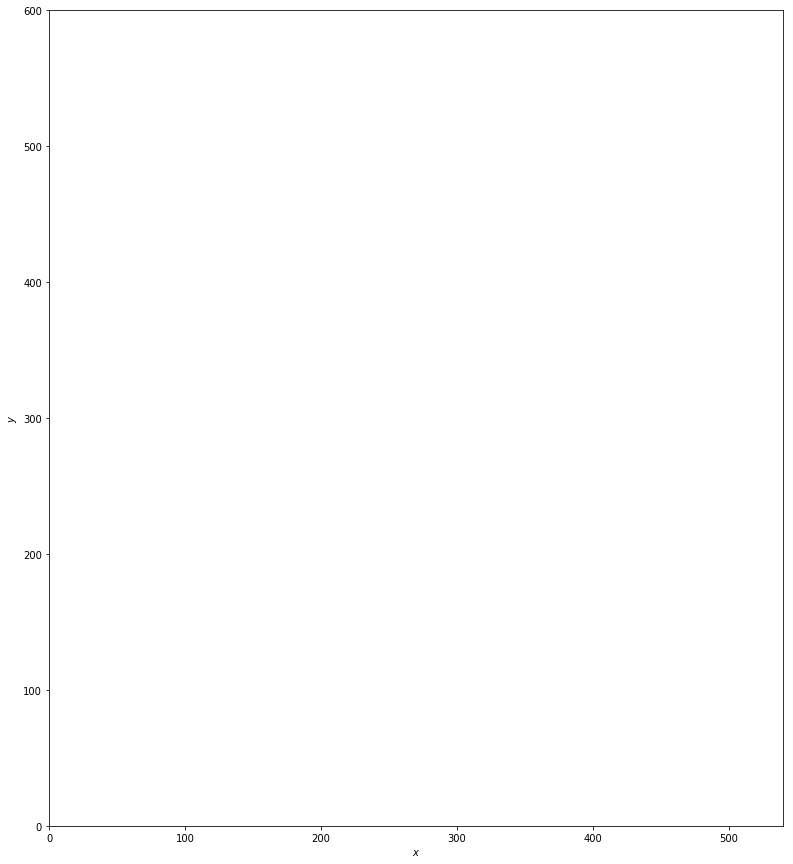

angle 0.0
move (3.0, 0.0)
917.978971691 442.959393917
267


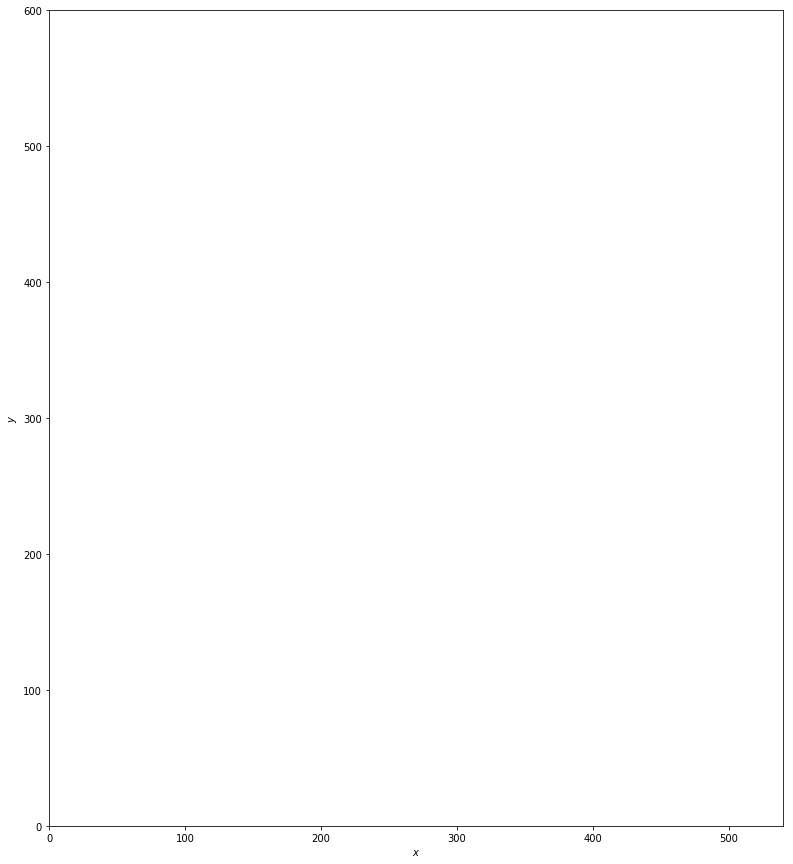

angle 0.0
move (3.0, 0.0)
920.978971691 442.959393917
268


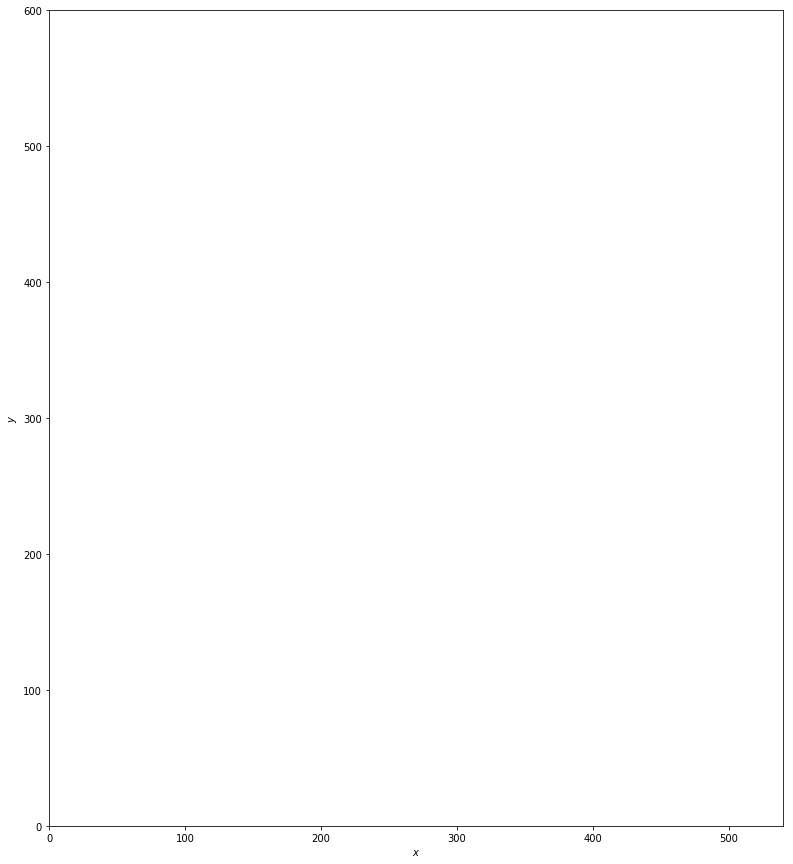

angle 0.0
move (3.0, 0.0)
923.978971691 442.959393917
269


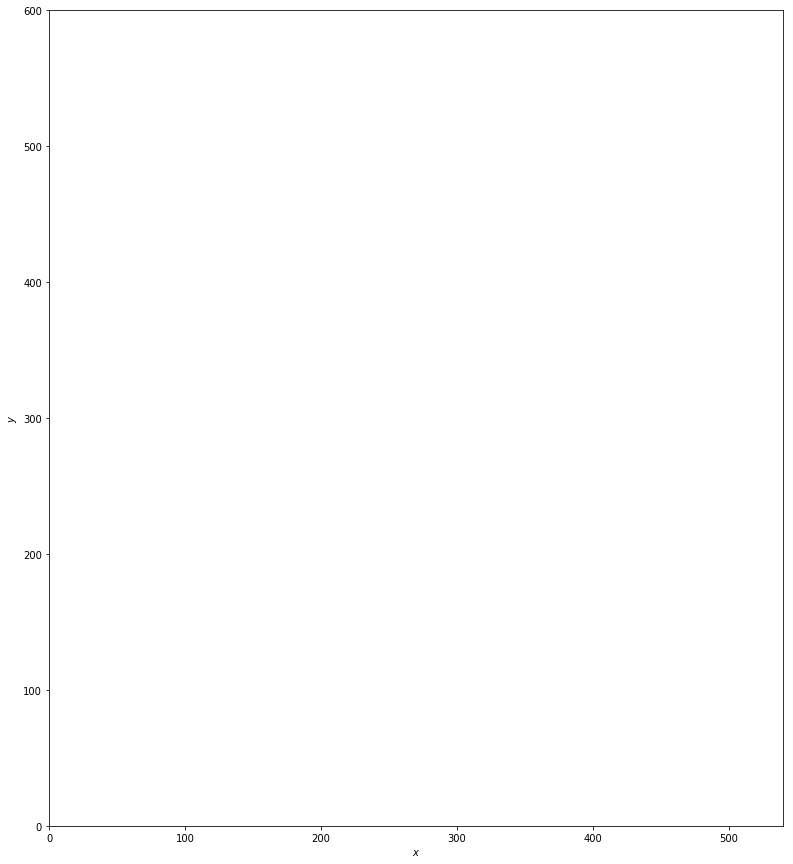

angle 0.0
move (3.0, 0.0)
926.978971691 442.959393917
270


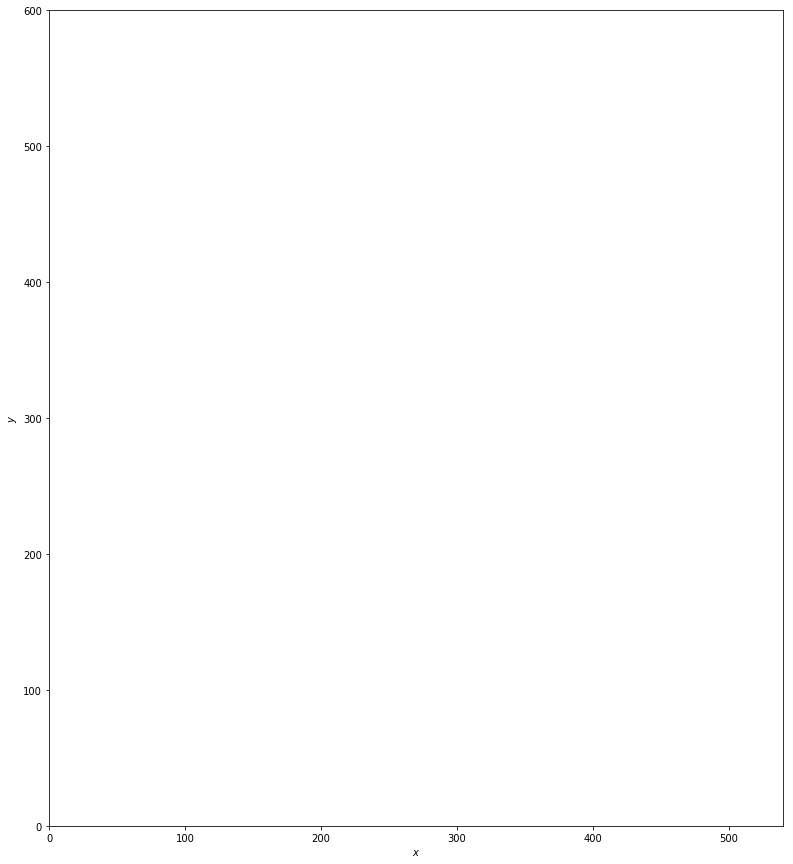

angle 0.0
move (3.0, 0.0)
929.978971691 442.959393917
271


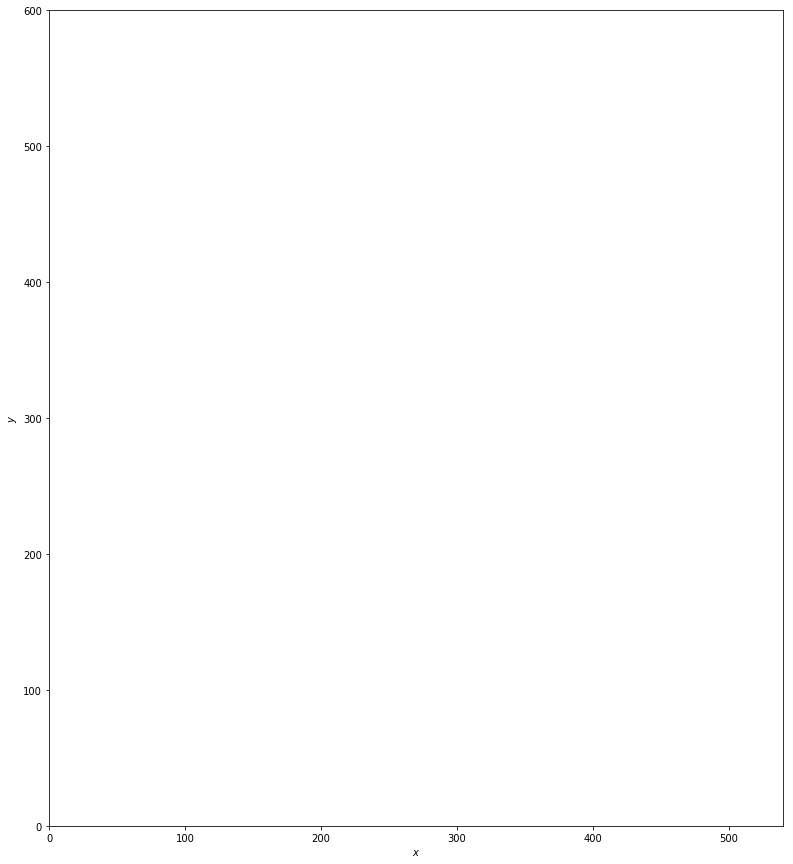

angle 0.0
move (3.0, 0.0)
932.978971691 442.959393917
272


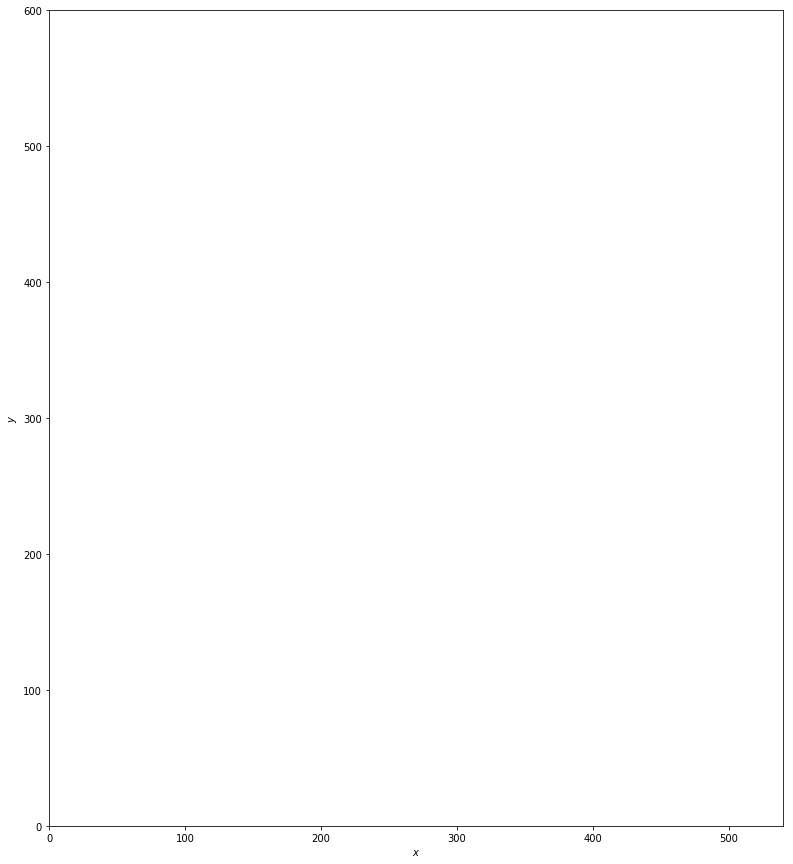

angle 0.0
move (3.0, 0.0)
935.978971691 442.959393917
273


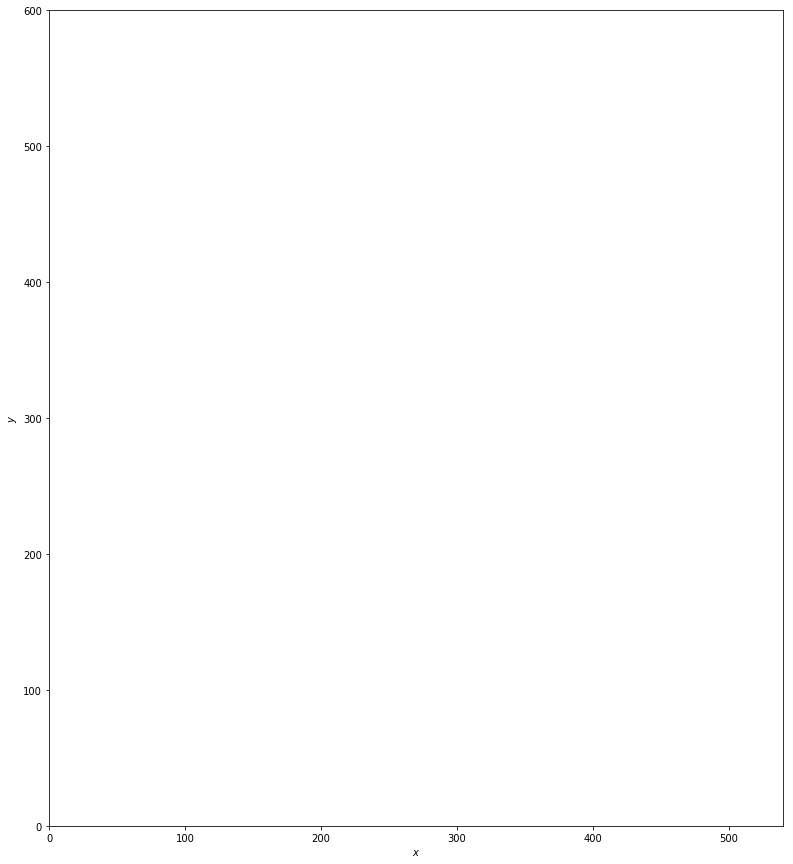

angle 0.0
move (3.0, 0.0)
938.978971691 442.959393917
274


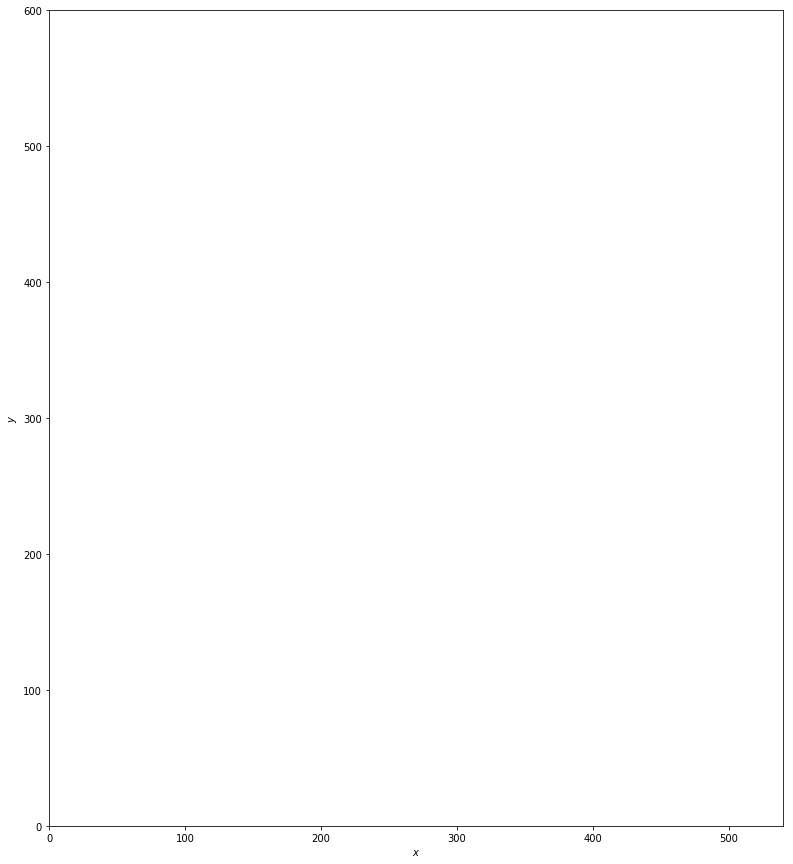

angle 0.0
move (3.0, 0.0)
941.978971691 442.959393917
275


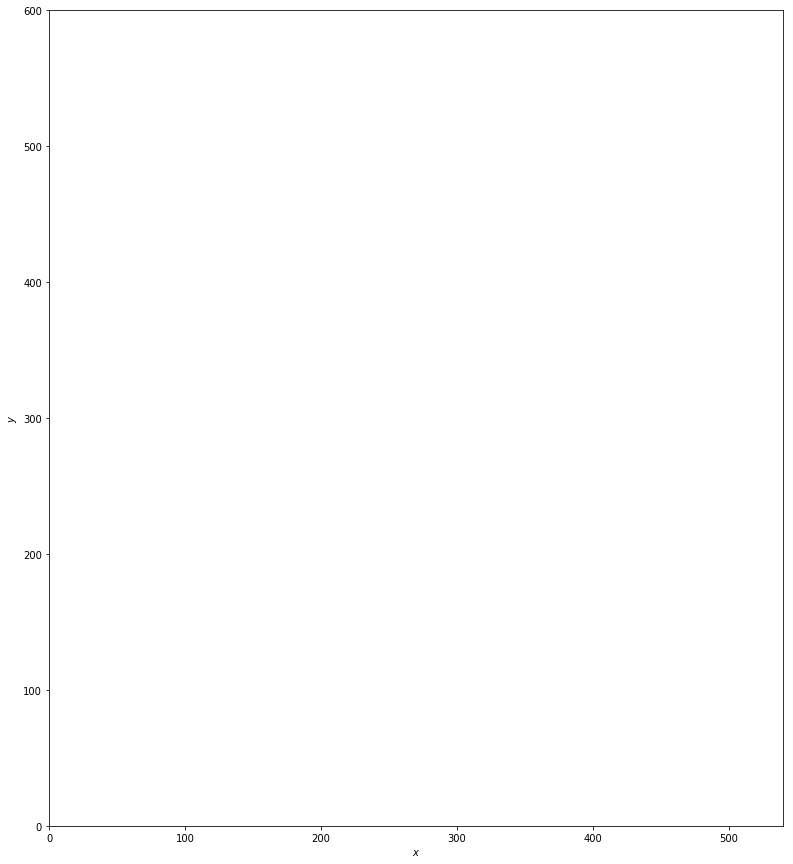

angle 0.0
move (3.0, 0.0)
944.978971691 442.959393917
276


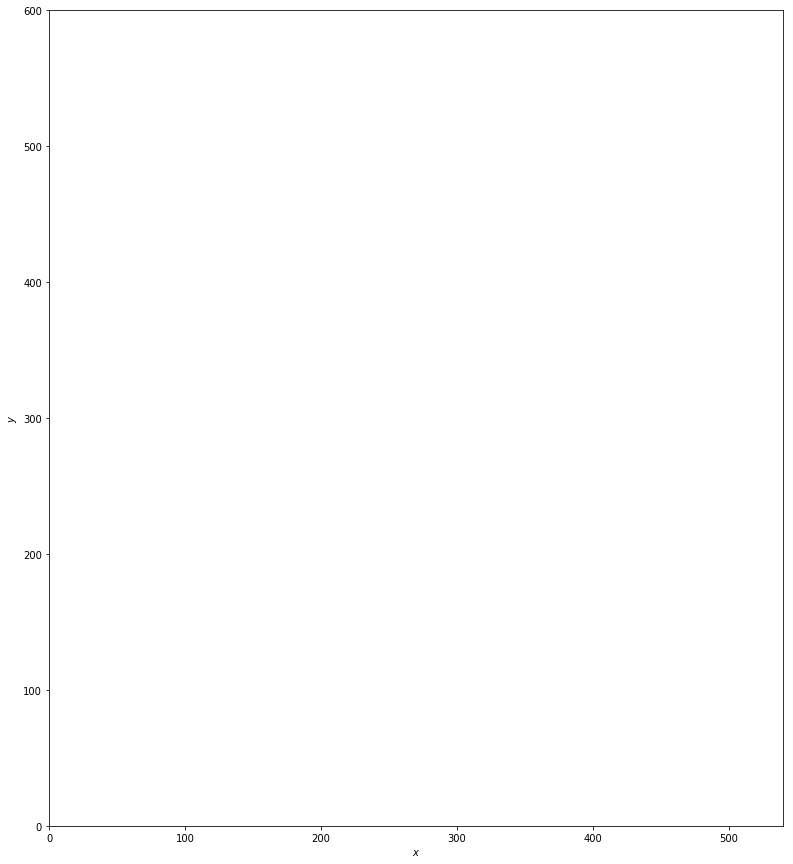

angle 0.0
move (3.0, 0.0)
947.978971691 442.959393917
277


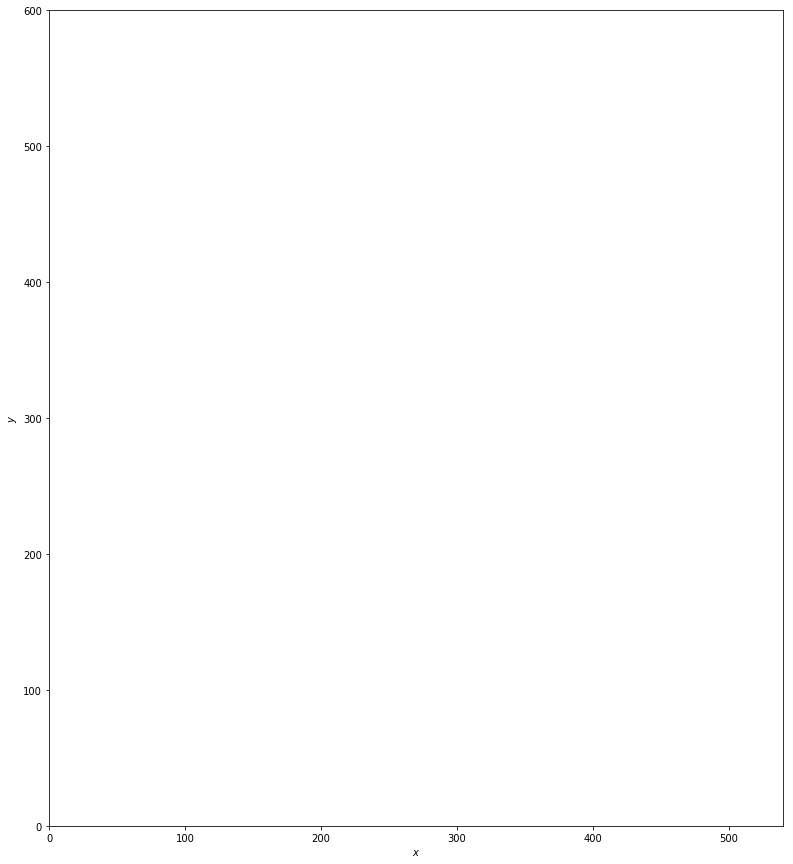

angle 0.0
move (3.0, 0.0)
950.978971691 442.959393917
278


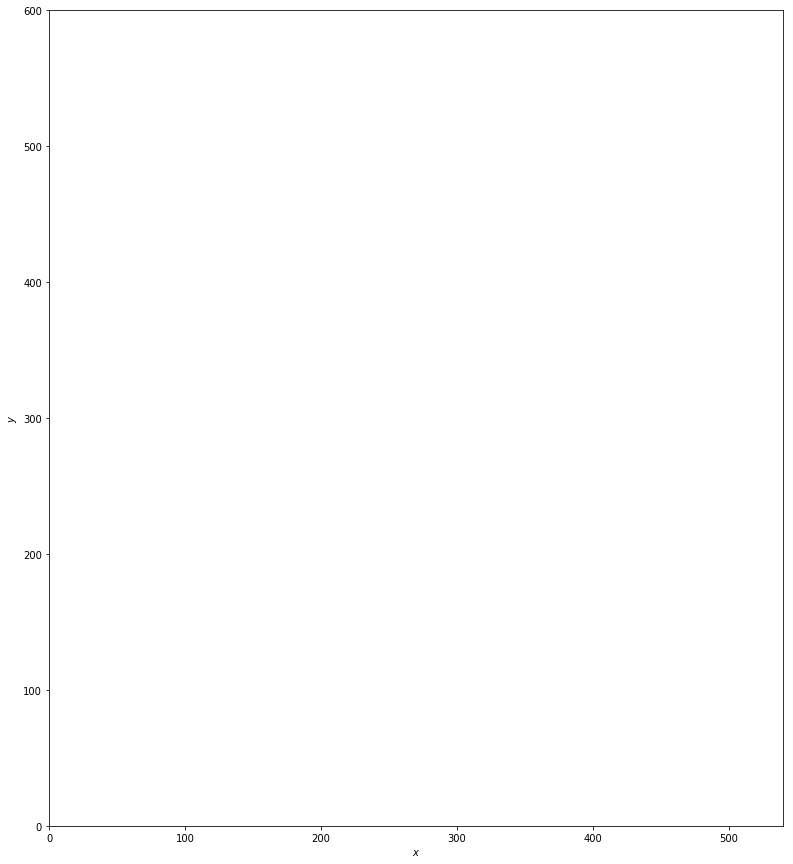

angle 0.0
move (3.0, 0.0)
953.978971691 442.959393917
279


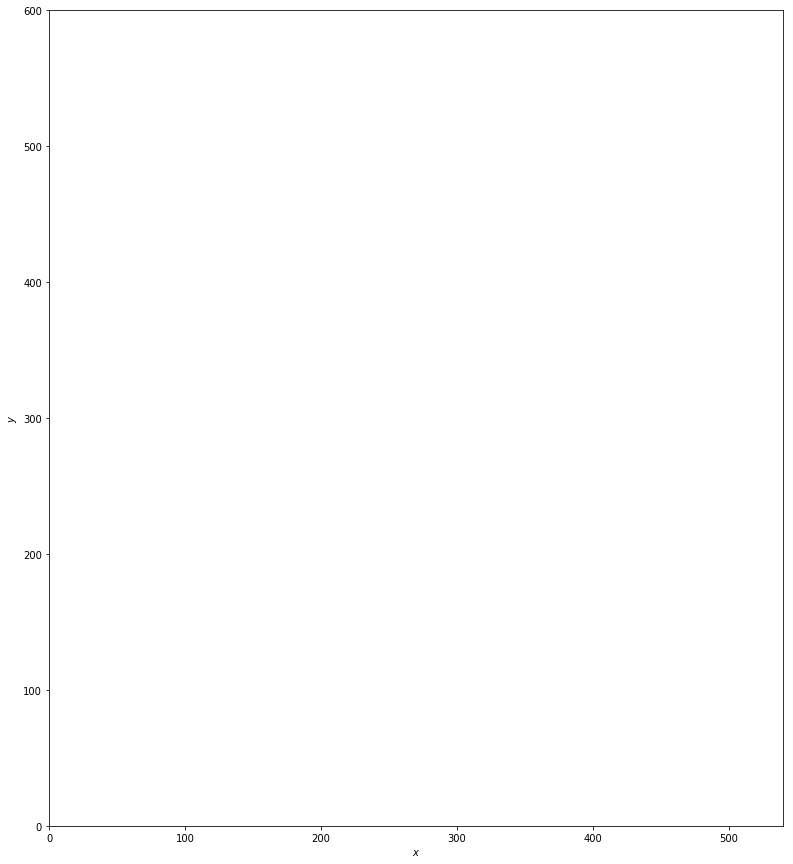

angle 0.0
move (3.0, 0.0)
956.978971691 442.959393917
280


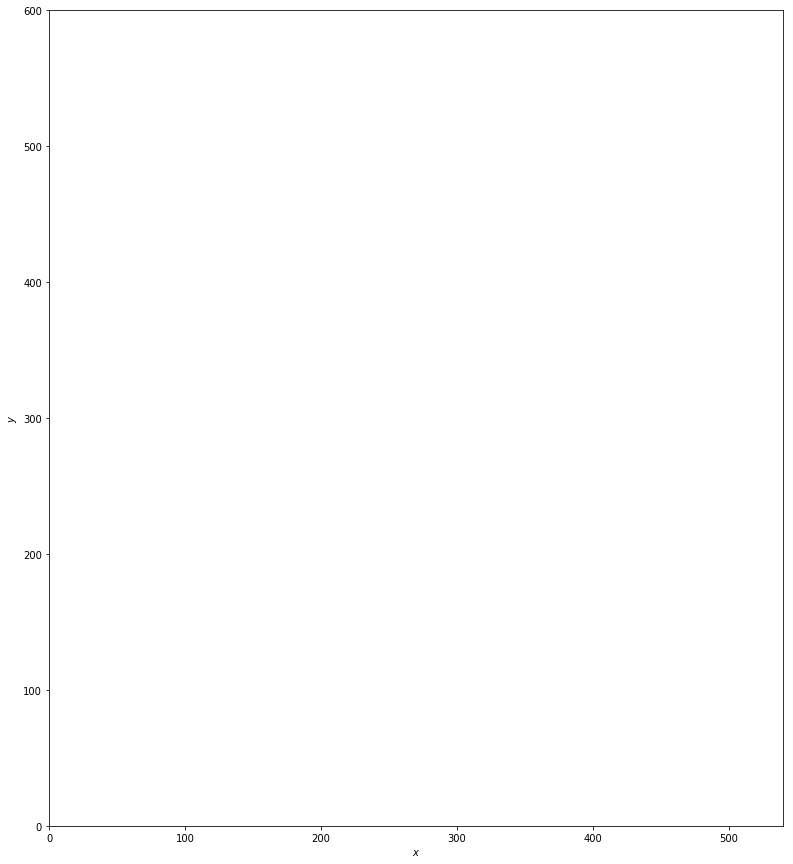

angle 0.0
move (3.0, 0.0)
959.978971691 442.959393917
281


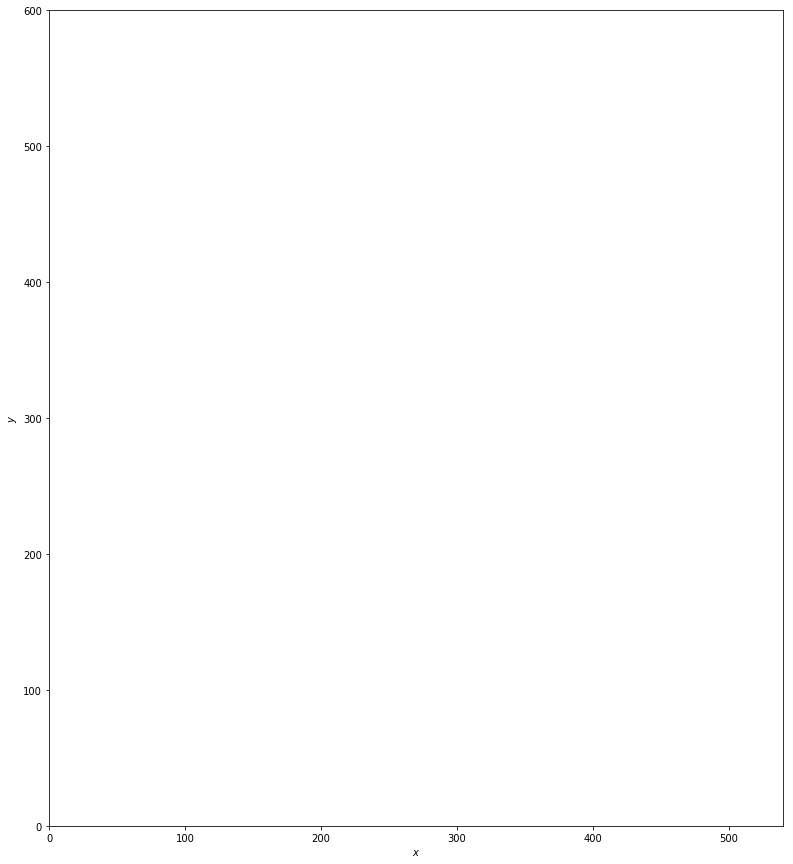

angle 0.0
move (3.0, 0.0)
962.978971691 442.959393917
282


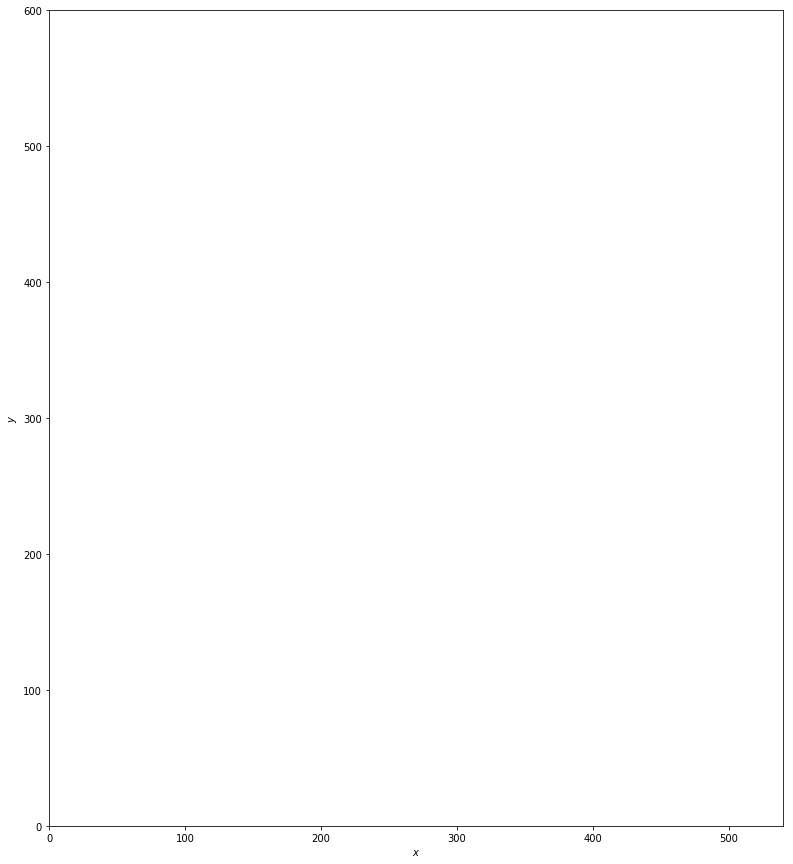

angle 0.0
move (3.0, 0.0)
965.978971691 442.959393917
283


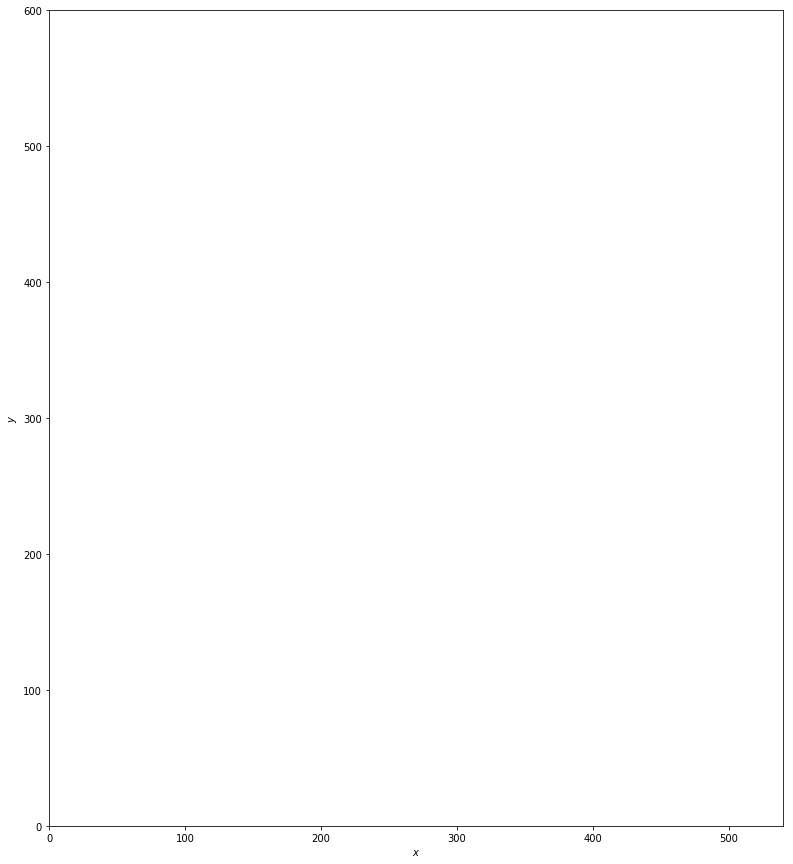

angle 0.0
move (3.0, 0.0)
968.978971691 442.959393917
284


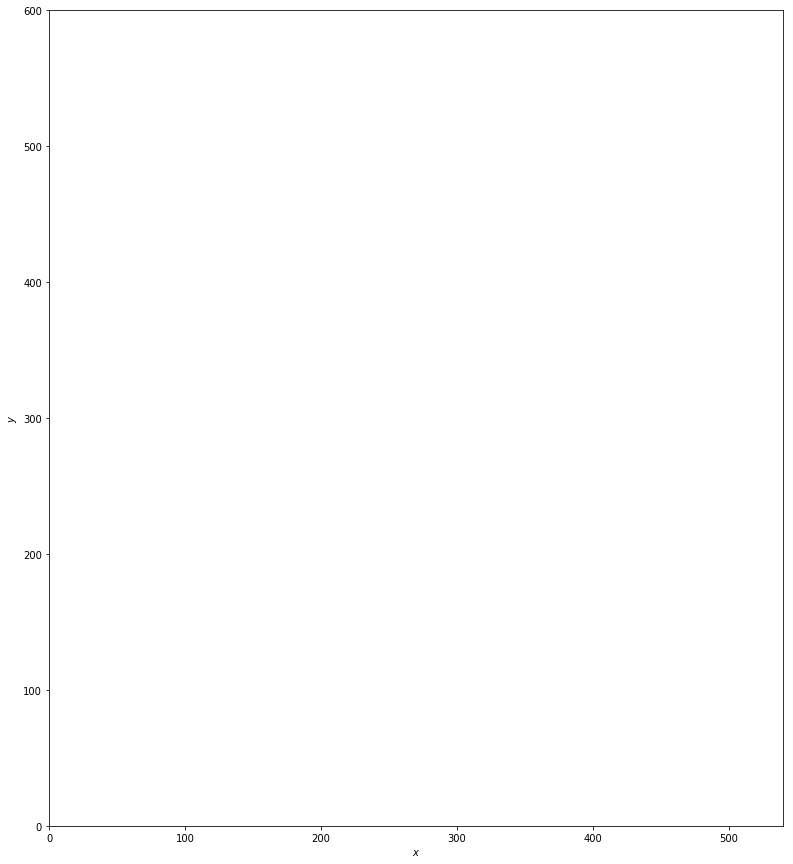

angle 0.0
move (3.0, 0.0)
971.978971691 442.959393917
285


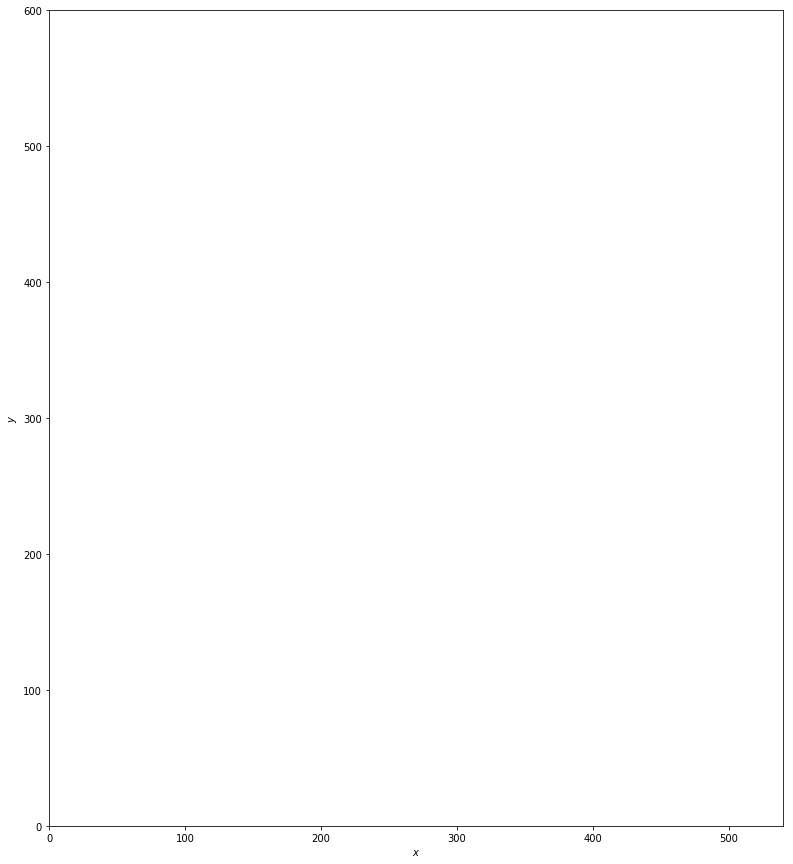

angle 0.0
move (3.0, 0.0)
974.978971691 442.959393917
286


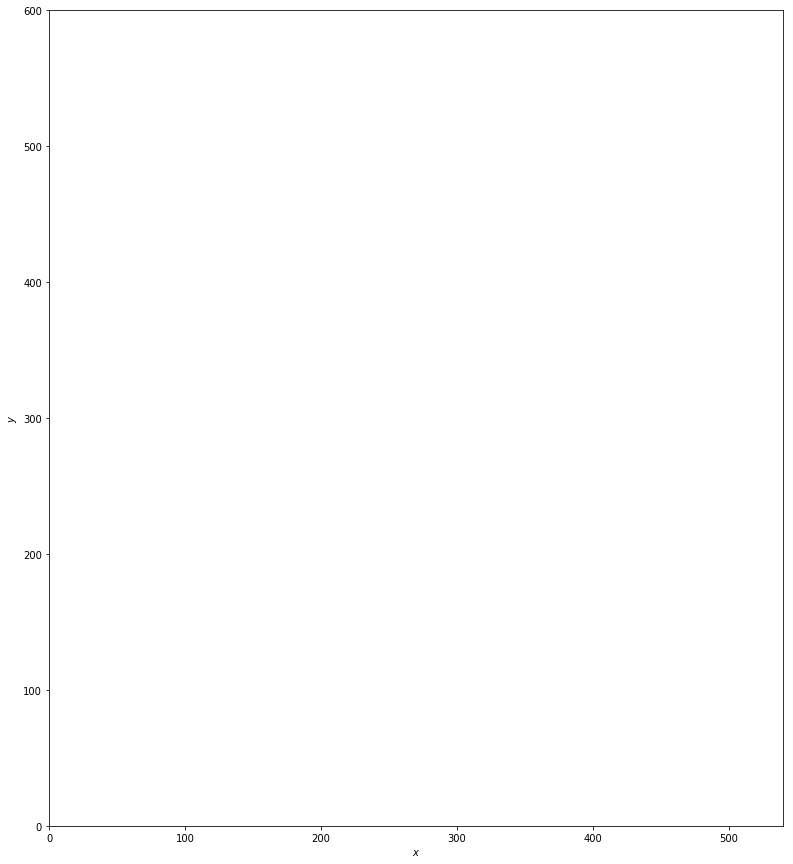

angle 0.0
move (3.0, 0.0)
977.978971691 442.959393917
287


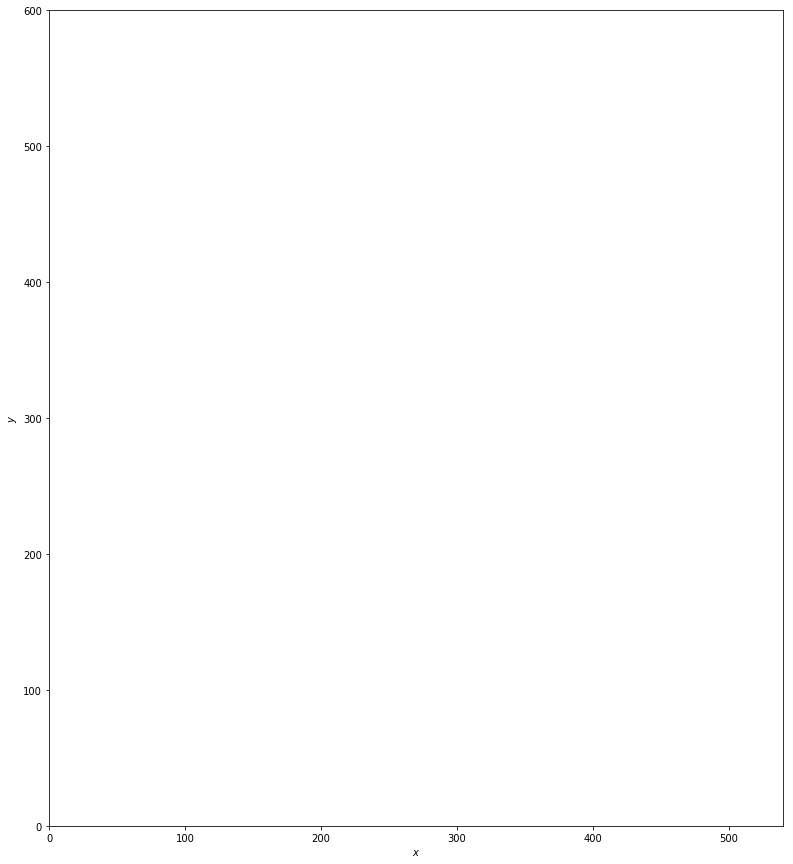

angle 0.0
move (3.0, 0.0)
980.978971691 442.959393917
288


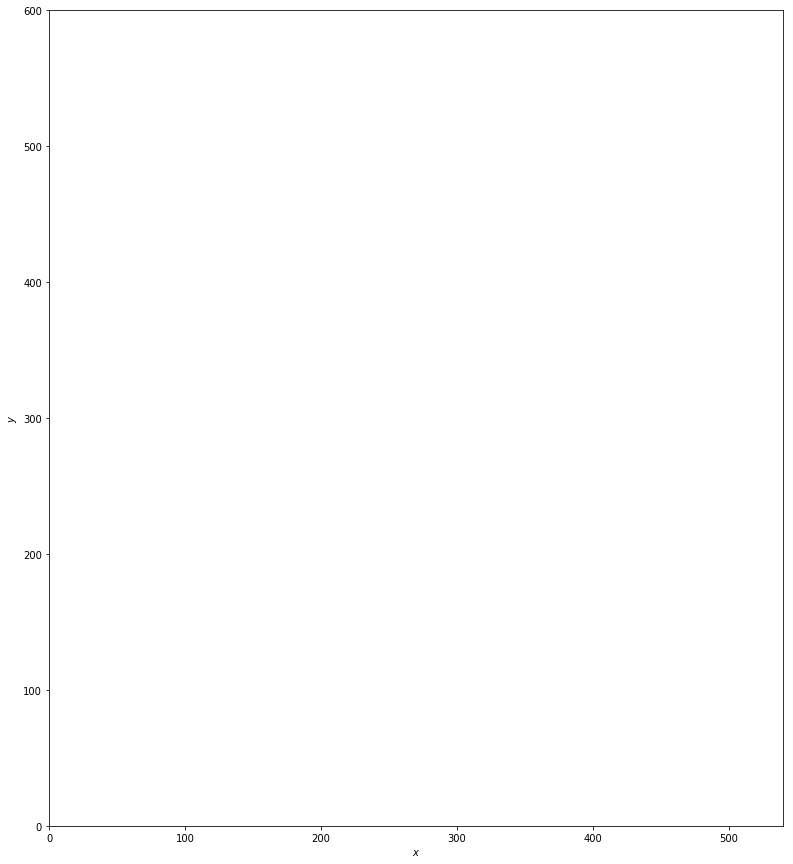

angle 0.0
move (3.0, 0.0)
983.978971691 442.959393917
289


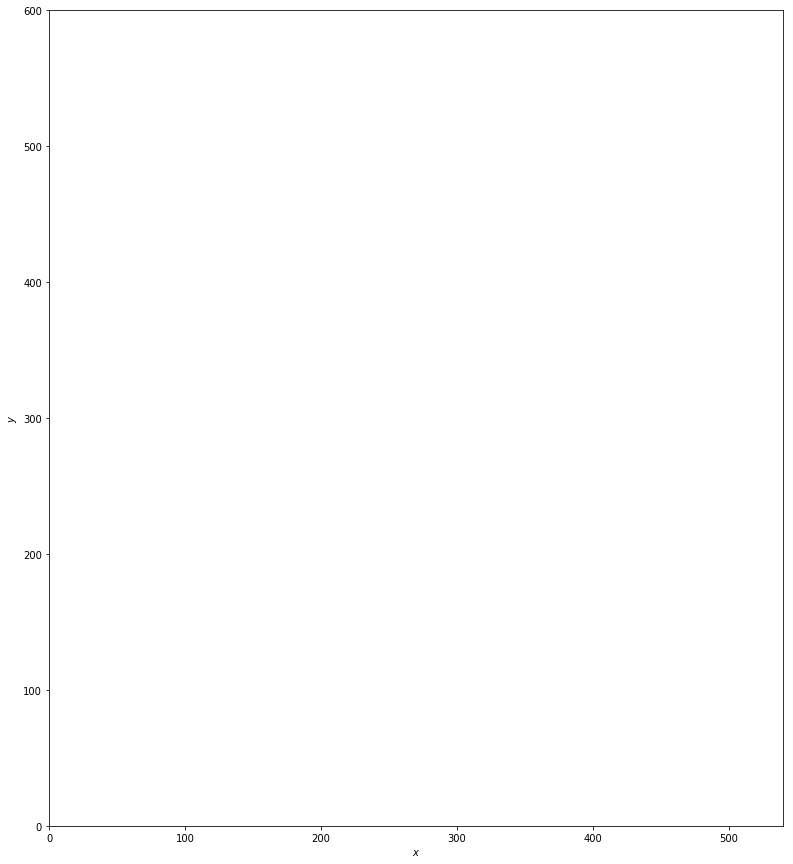

angle 0.0
move (3.0, 0.0)
986.978971691 442.959393917
290


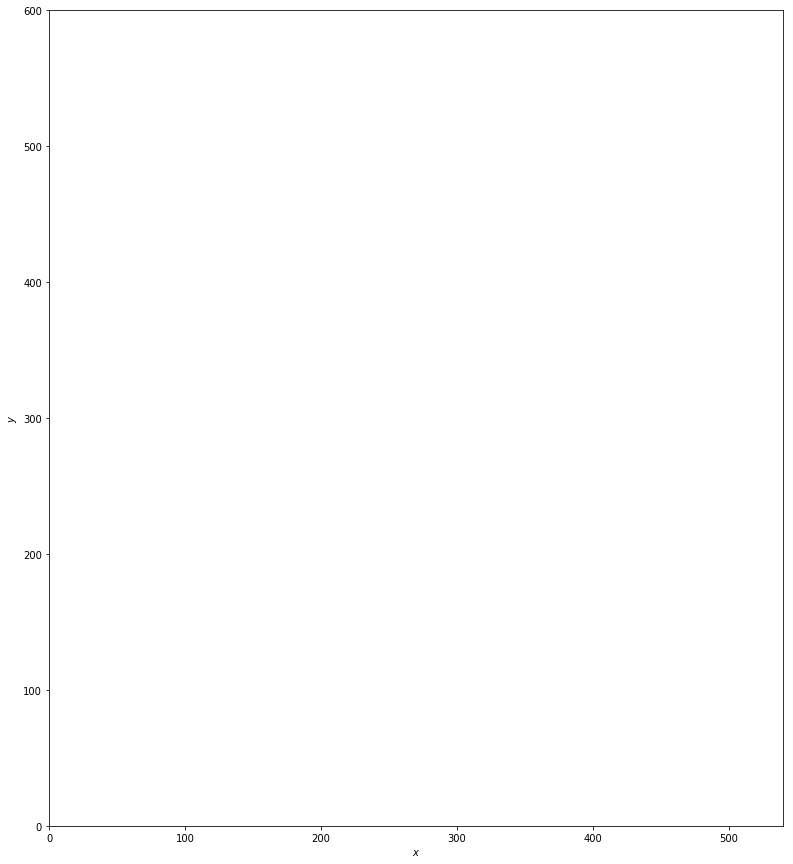

angle 0.0
move (3.0, 0.0)
989.978971691 442.959393917
291


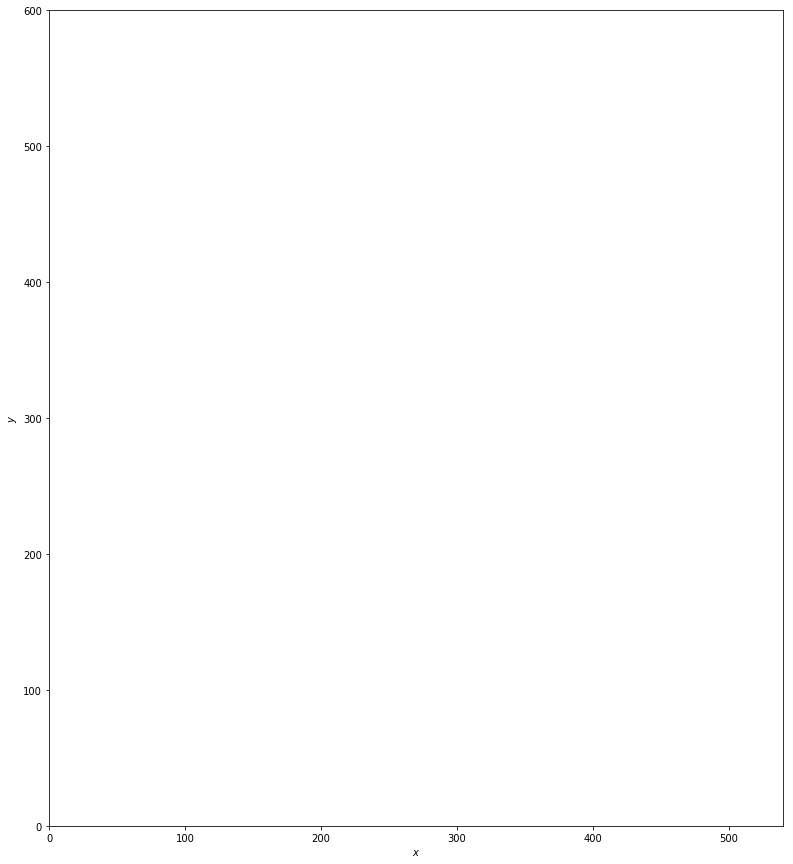

angle 0.0
move (3.0, 0.0)
992.978971691 442.959393917
292


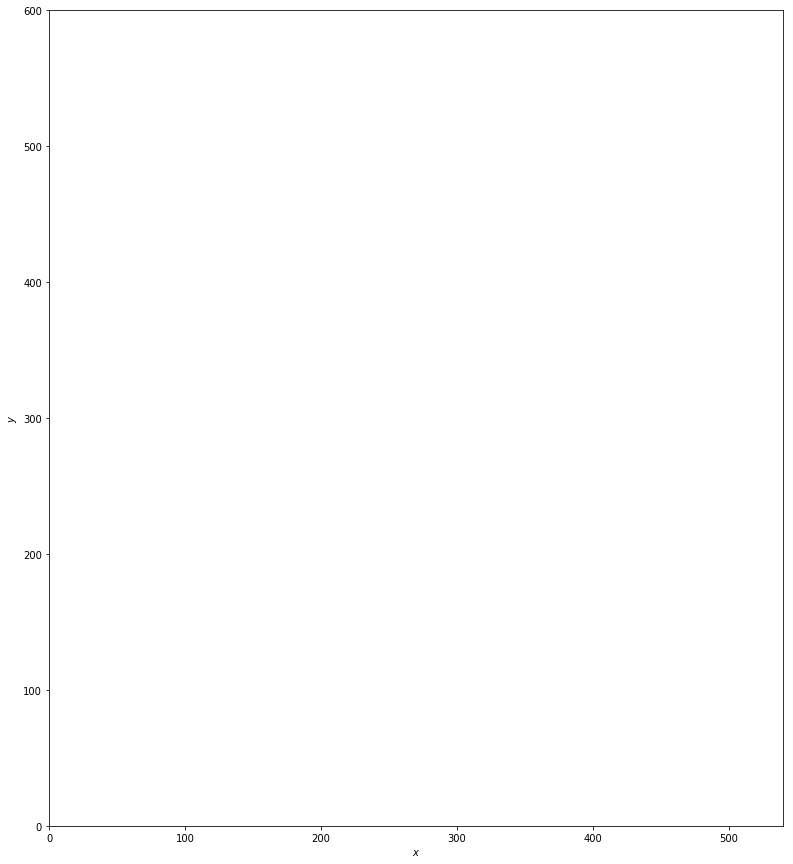

angle 0.0
move (3.0, 0.0)
995.978971691 442.959393917
293


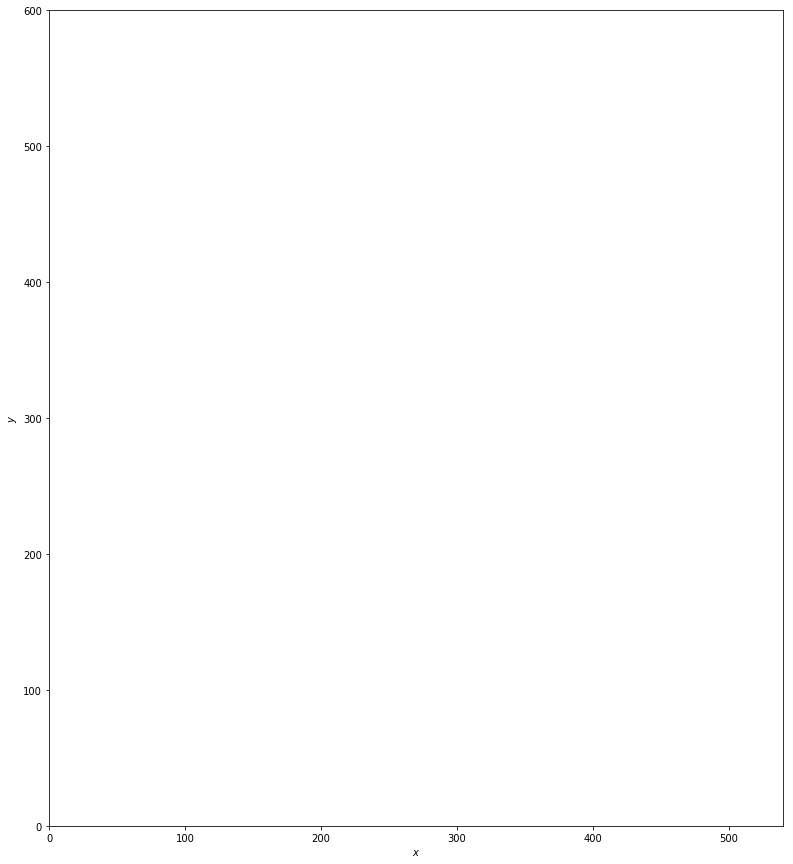

angle 0.0
move (3.0, 0.0)
998.978971691 442.959393917
294


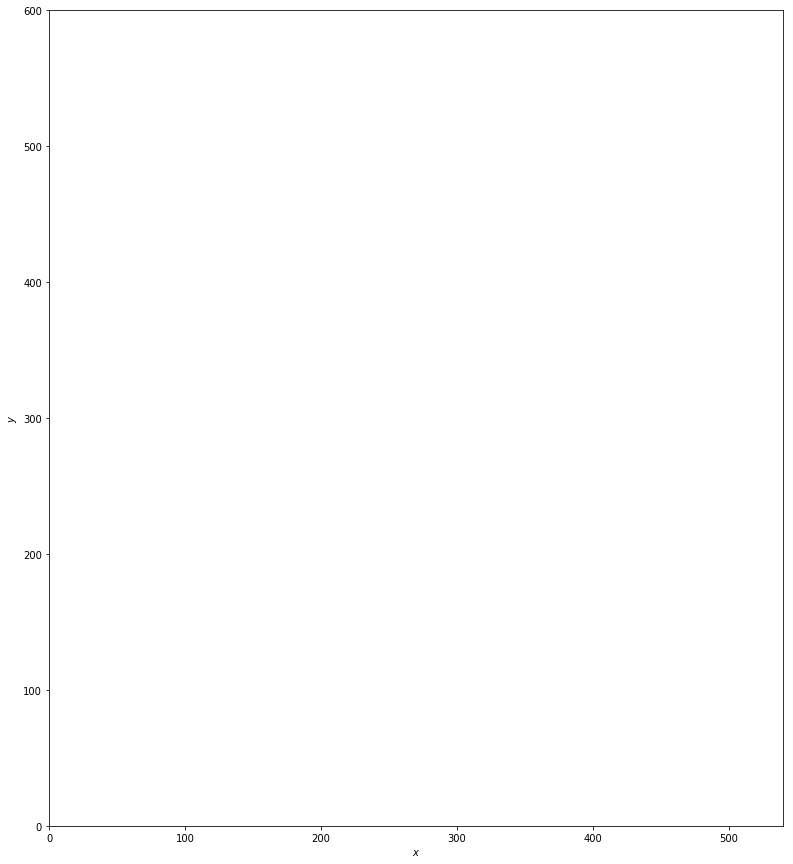

angle 0.0
move (3.0, 0.0)
1001.97897169 442.959393917
295


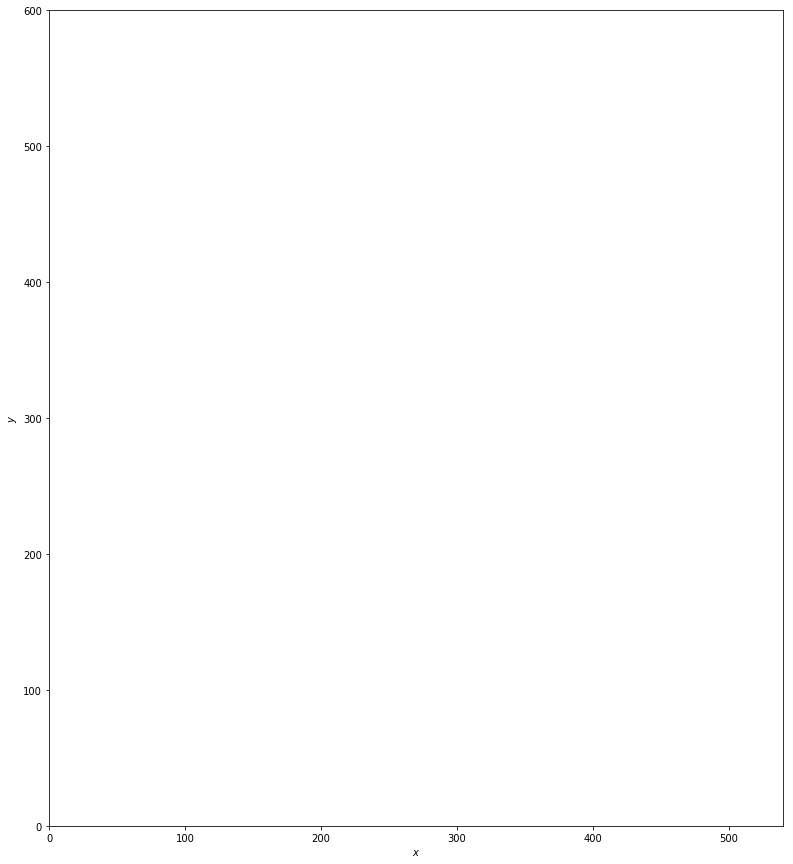

angle 0.0
move (3.0, 0.0)
1004.97897169 442.959393917
296


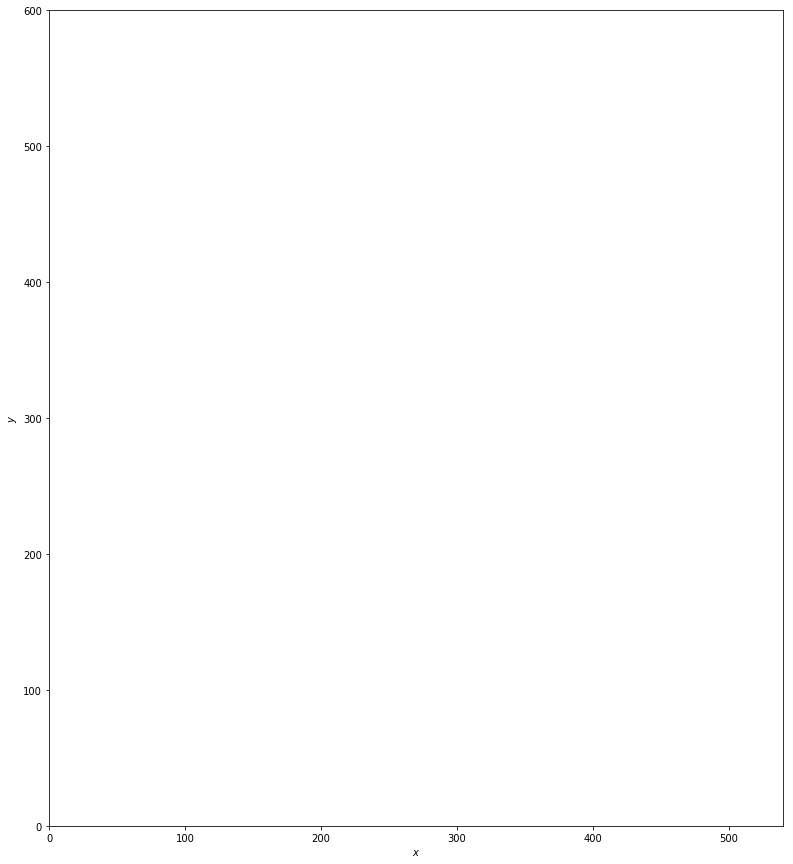

angle 0.0
move (3.0, 0.0)
1007.97897169 442.959393917
297


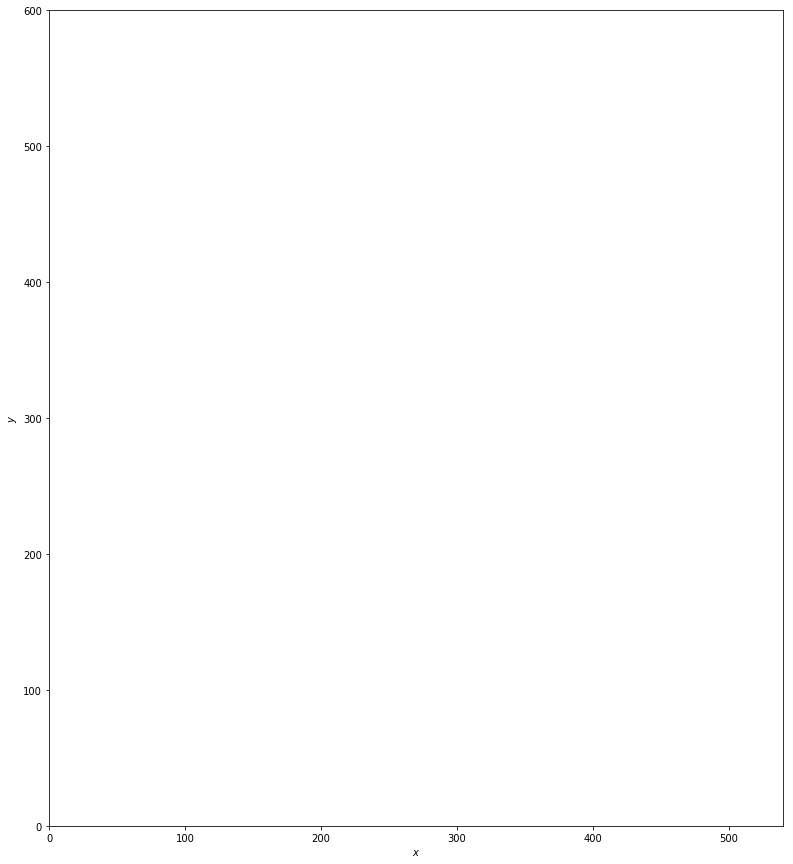

angle 0.0
move (3.0, 0.0)
1010.97897169 442.959393917
298


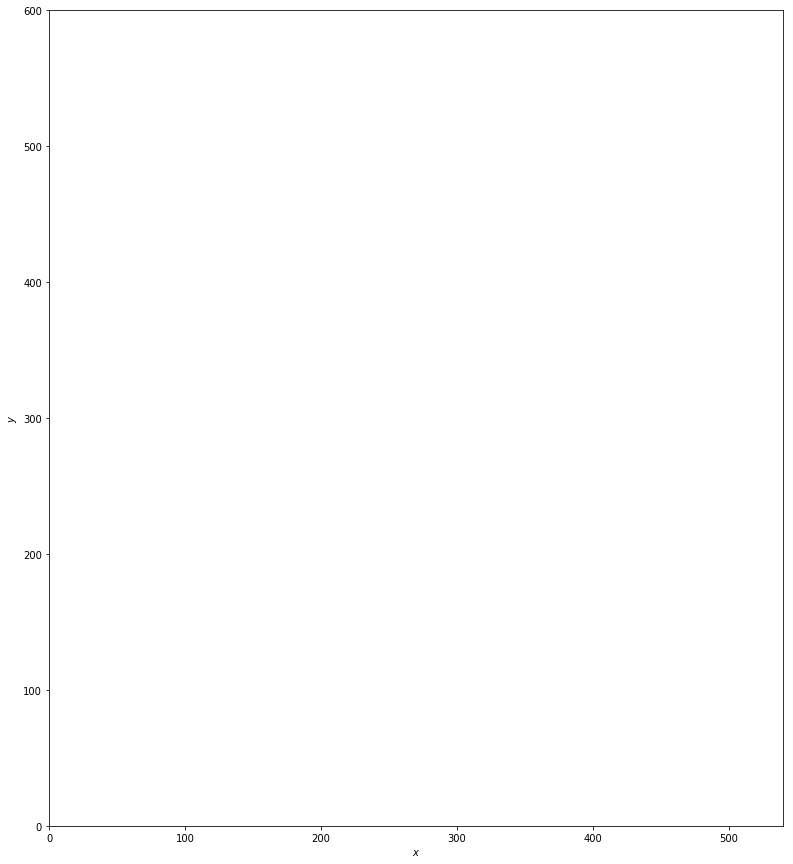

angle 0.0
move (3.0, 0.0)
1013.97897169 442.959393917
299


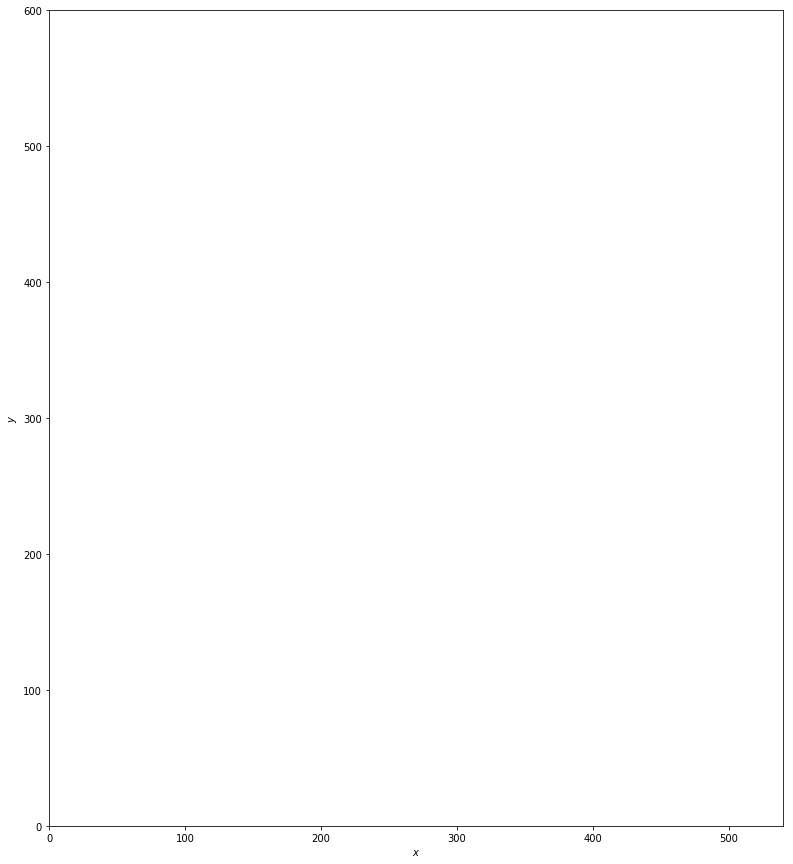

angle 0.0
move (3.0, 0.0)
1016.97897169 442.959393917
300


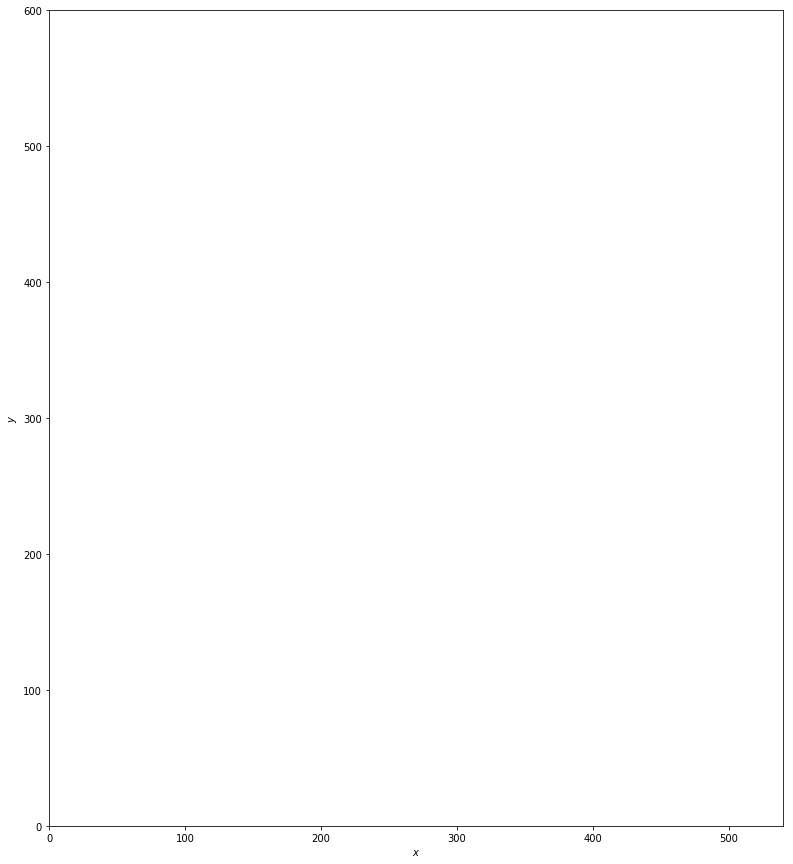

angle 0.0
move (3.0, 0.0)
1019.97897169 442.959393917
301


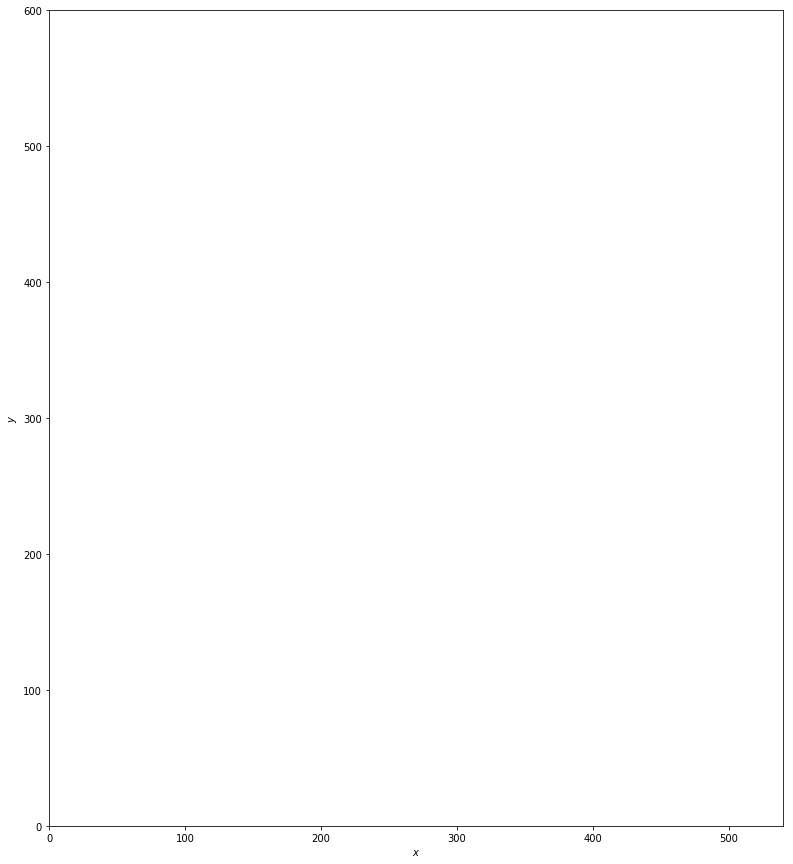

angle 0.0
move (3.0, 0.0)
1022.97897169 442.959393917
302


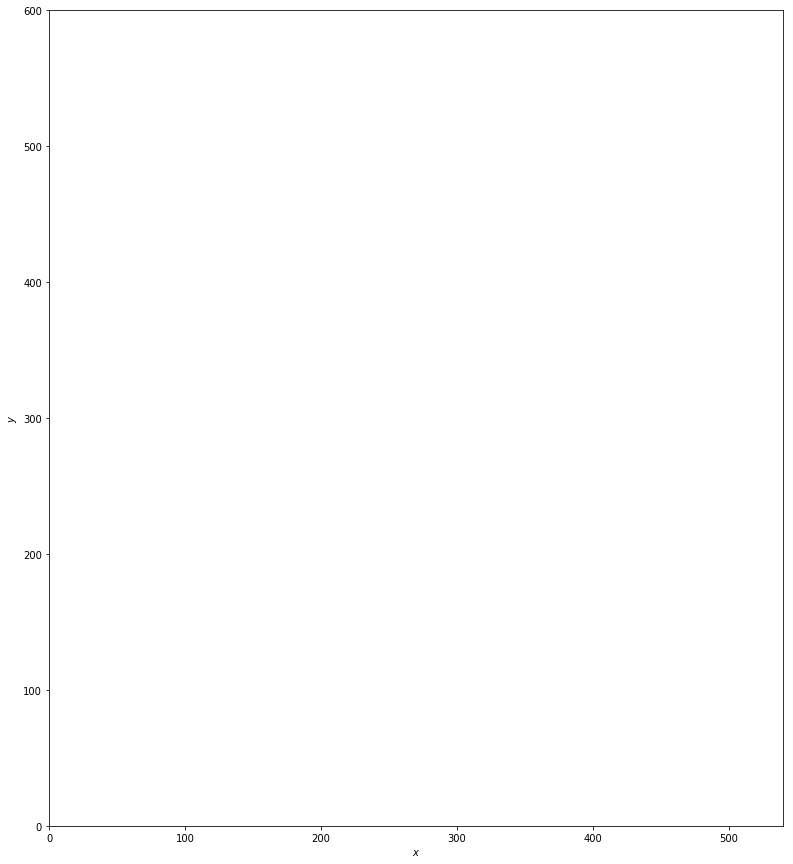

angle 0.0
move (3.0, 0.0)
1025.97897169 442.959393917
303


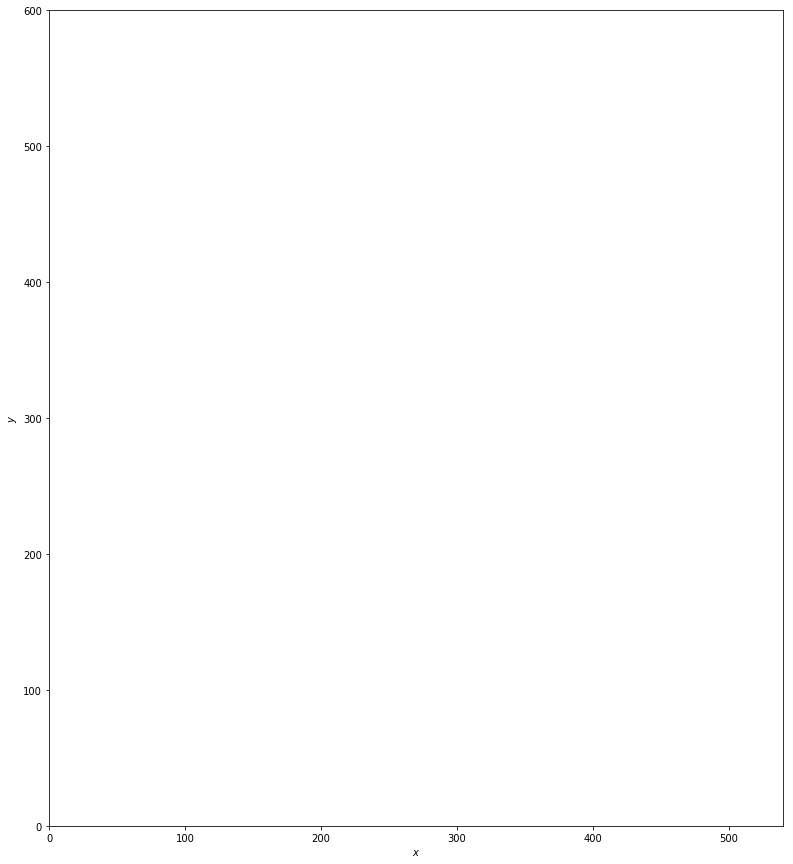

angle 0.0
move (3.0, 0.0)
1028.97897169 442.959393917
304


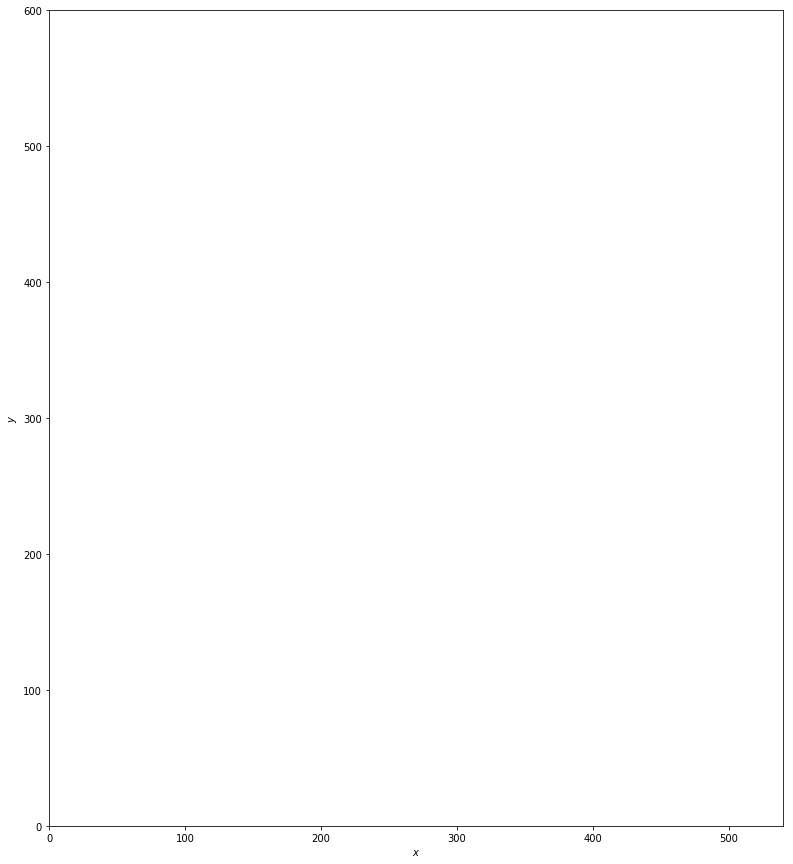

angle 0.0
move (3.0, 0.0)
1031.97897169 442.959393917
305


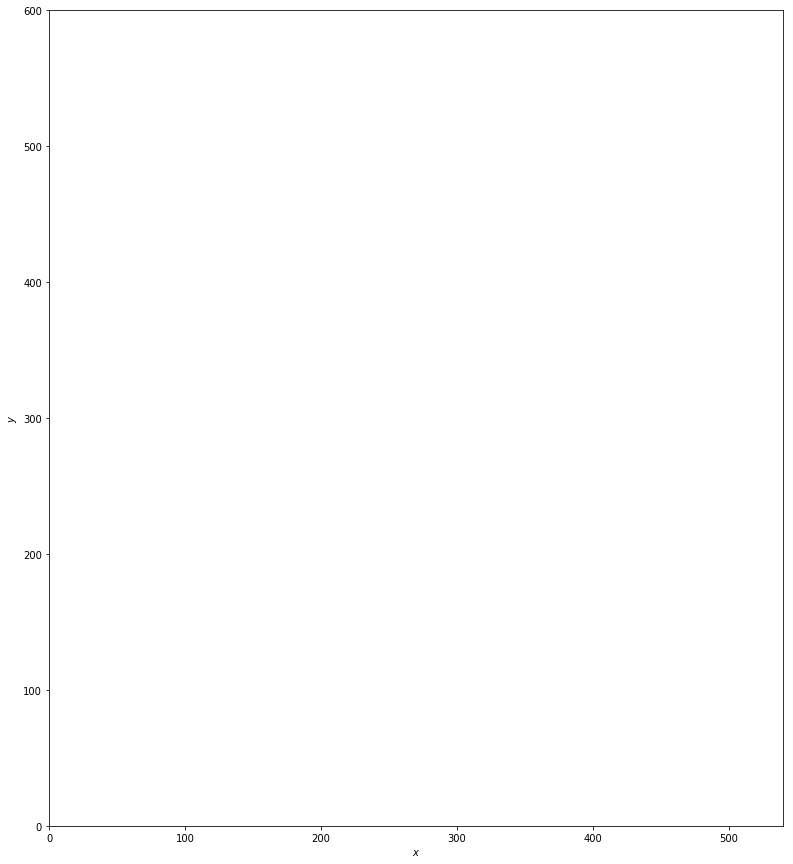

angle 0.0
move (3.0, 0.0)
1034.97897169 442.959393917
306


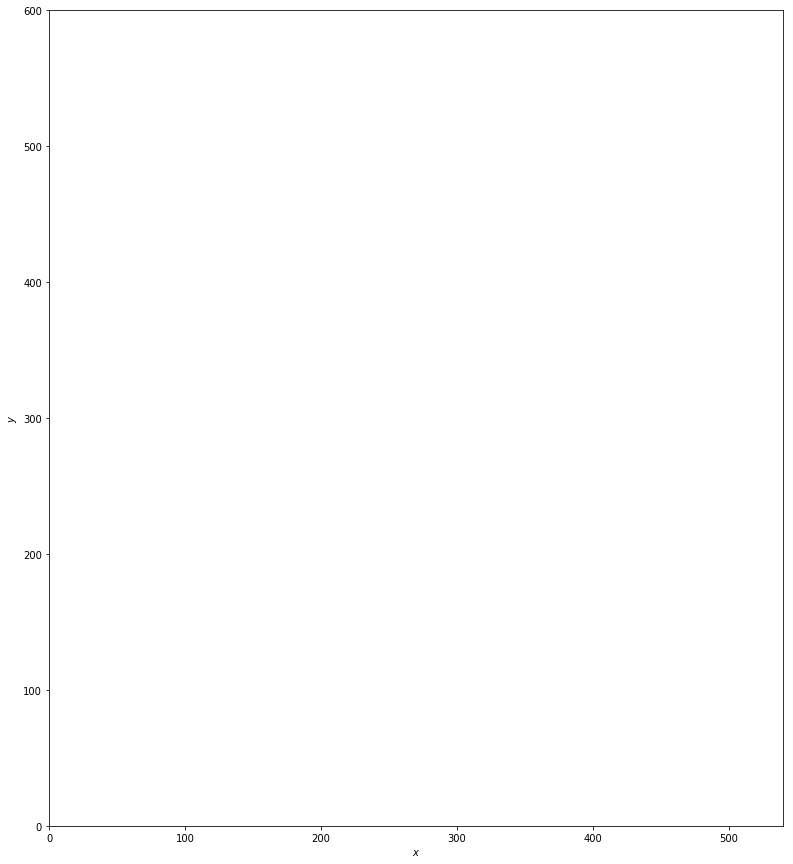

angle 0.0
move (3.0, 0.0)
1037.97897169 442.959393917
307


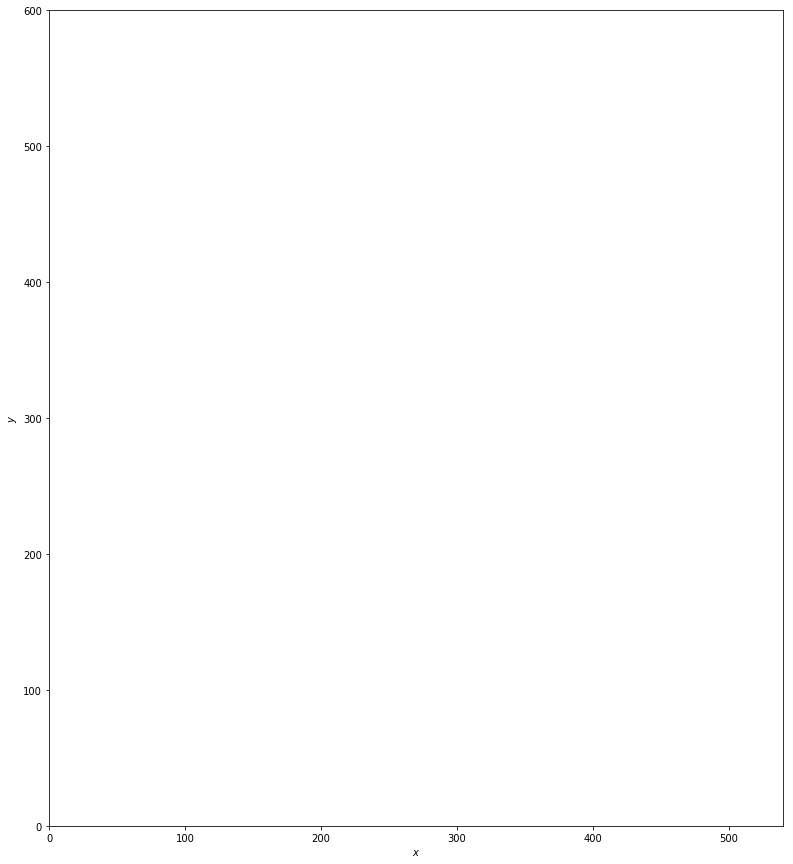

angle 0.0
move (3.0, 0.0)
1040.97897169 442.959393917
308


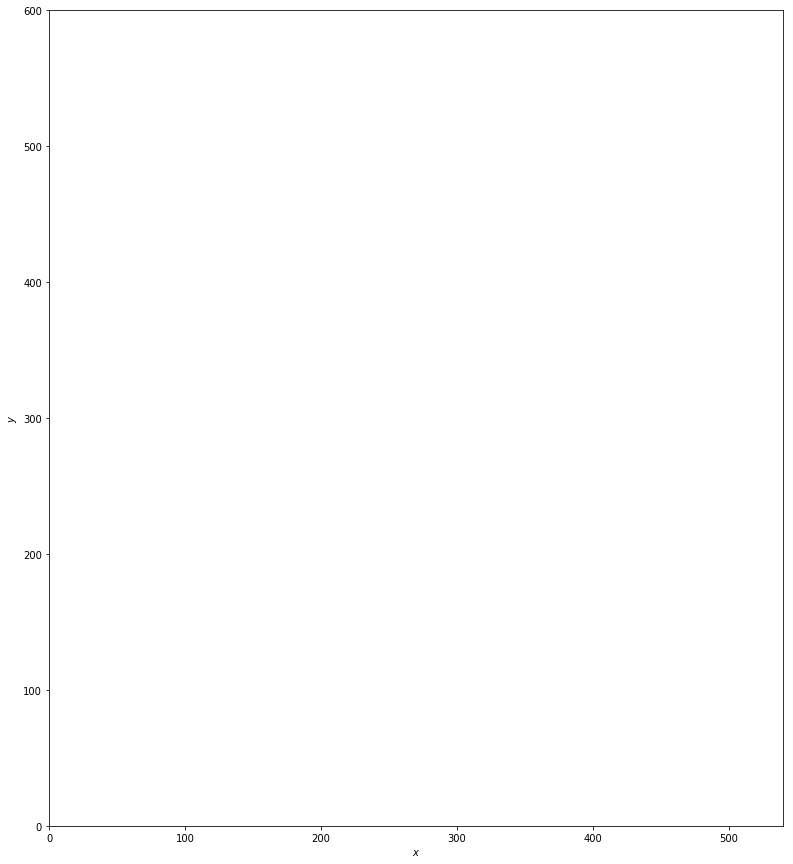

angle 0.0
move (3.0, 0.0)
1043.97897169 442.959393917
309


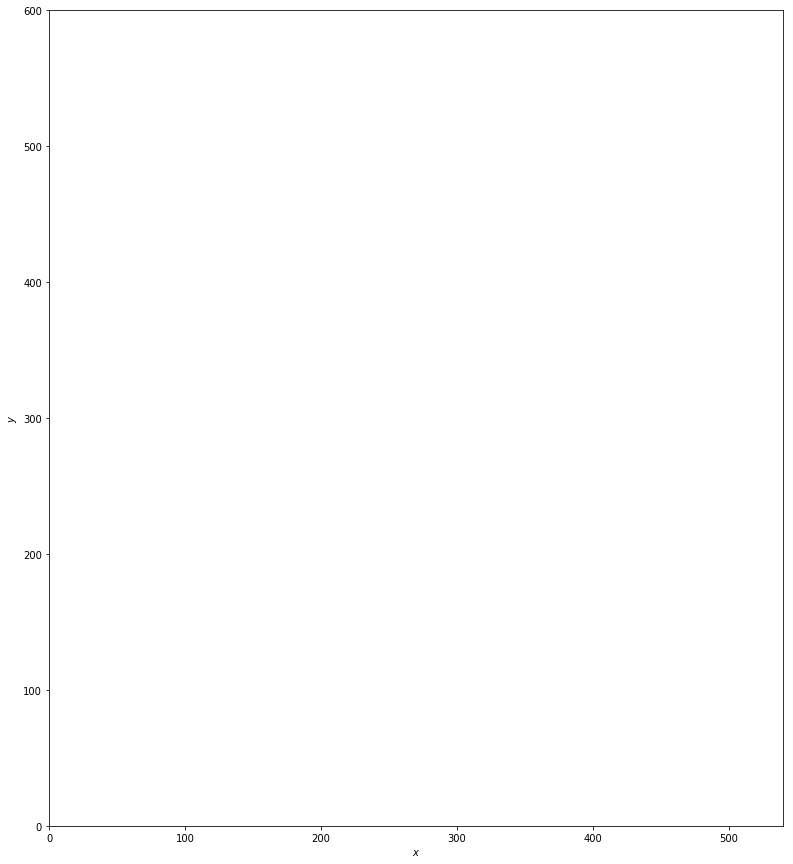

angle 0.0
move (3.0, 0.0)
1046.97897169 442.959393917
310


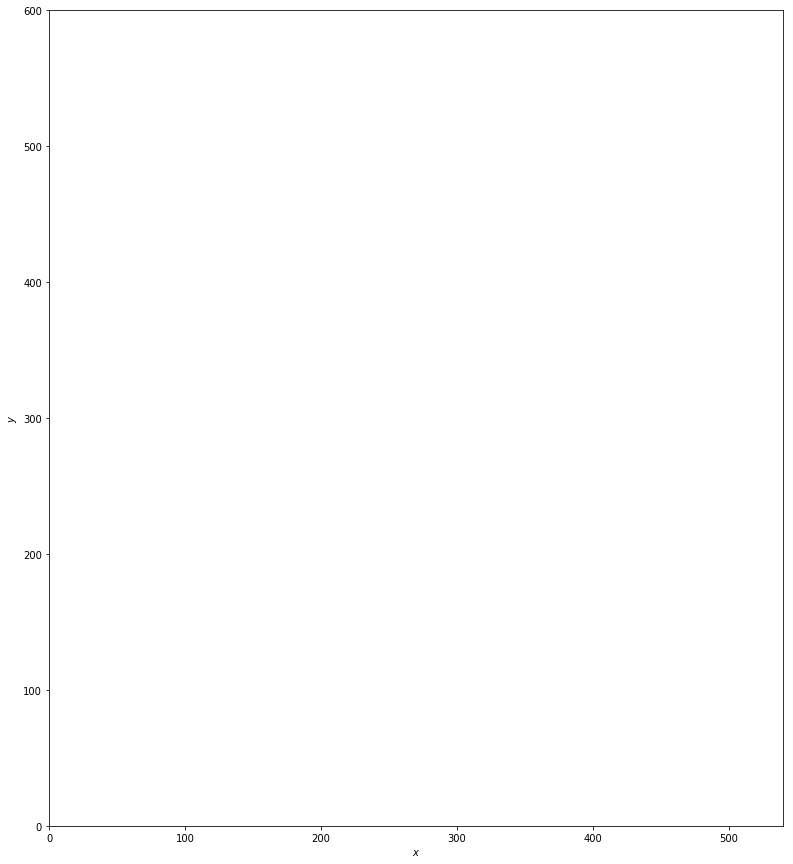

angle 0.0
move (3.0, 0.0)
1049.97897169 442.959393917
311


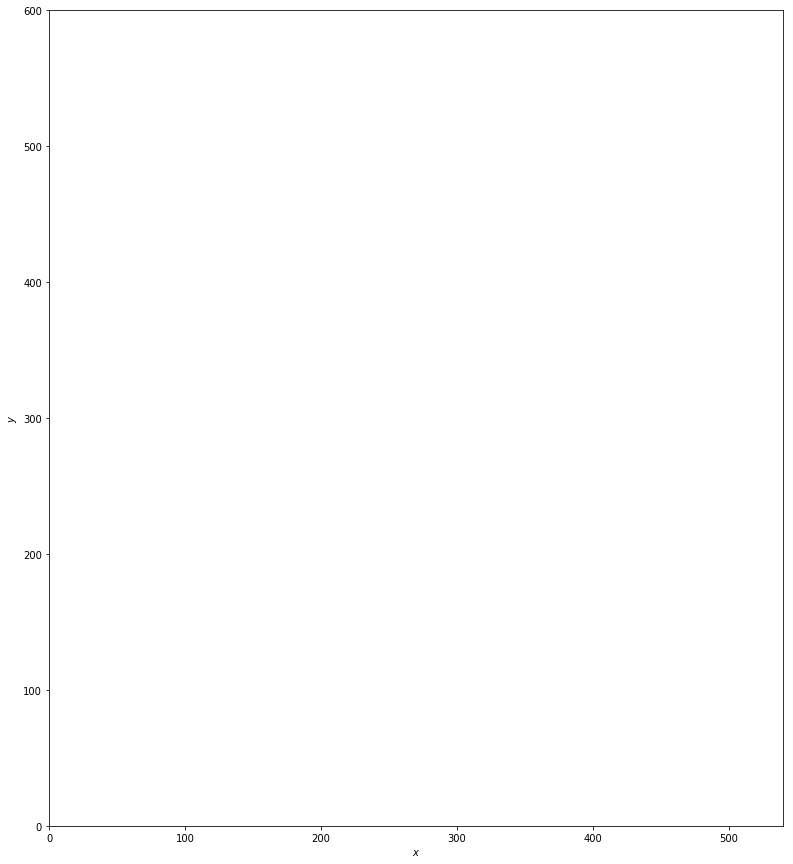

angle 0.0
move (3.0, 0.0)
1052.97897169 442.959393917
312


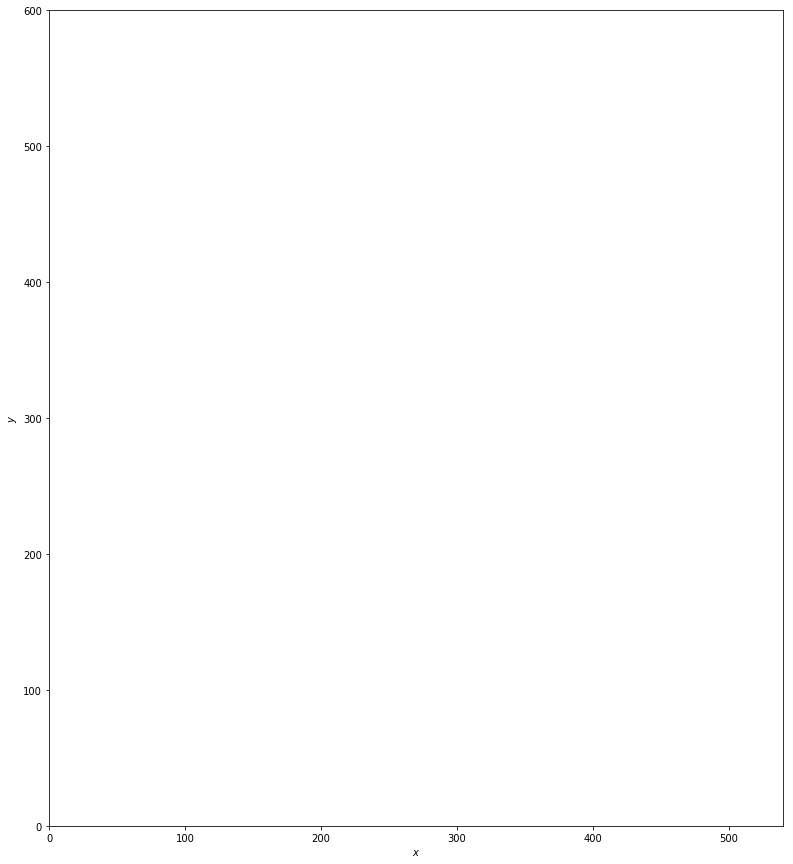

angle 0.0
move (3.0, 0.0)
1055.97897169 442.959393917
313


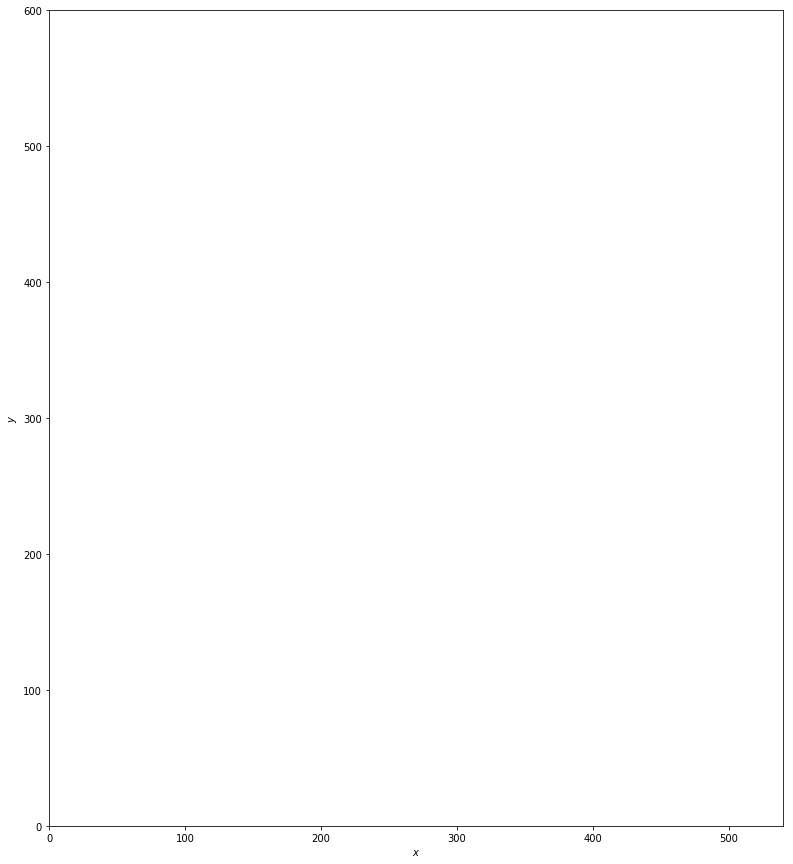

angle 0.0
move (3.0, 0.0)
1058.97897169 442.959393917
314


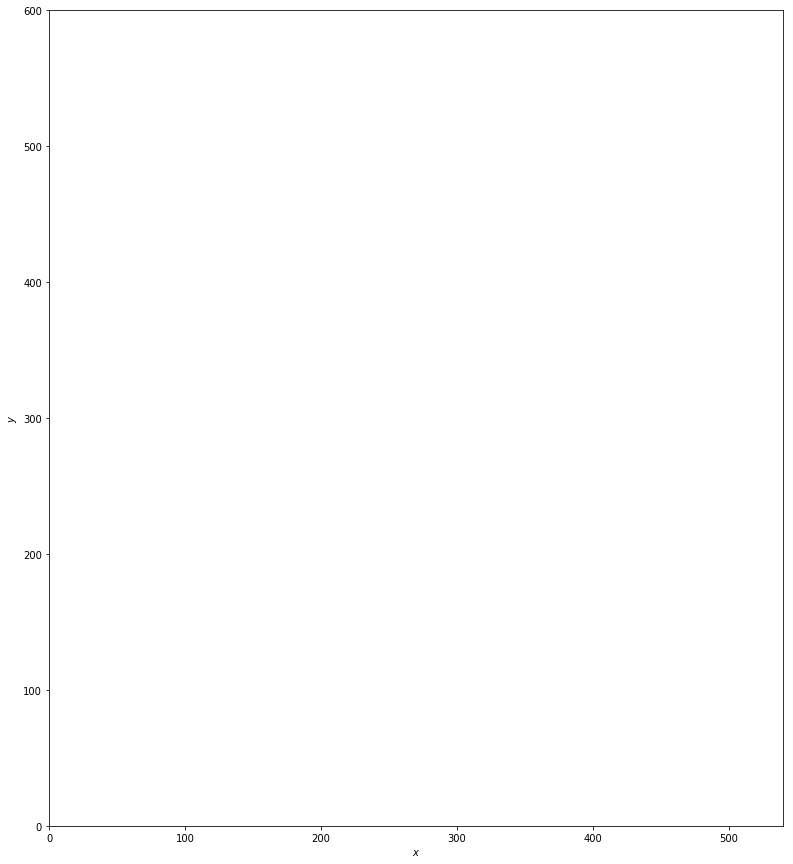

angle 0.0
move (3.0, 0.0)
1061.97897169 442.959393917
315


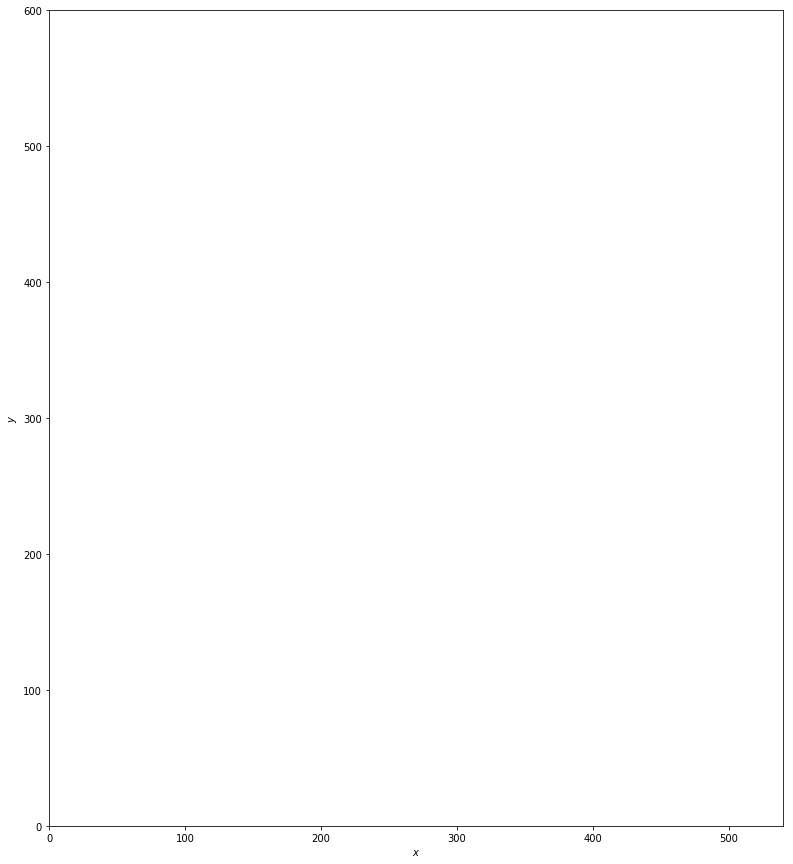

angle 0.0
move (3.0, 0.0)
1064.97897169 442.959393917
316


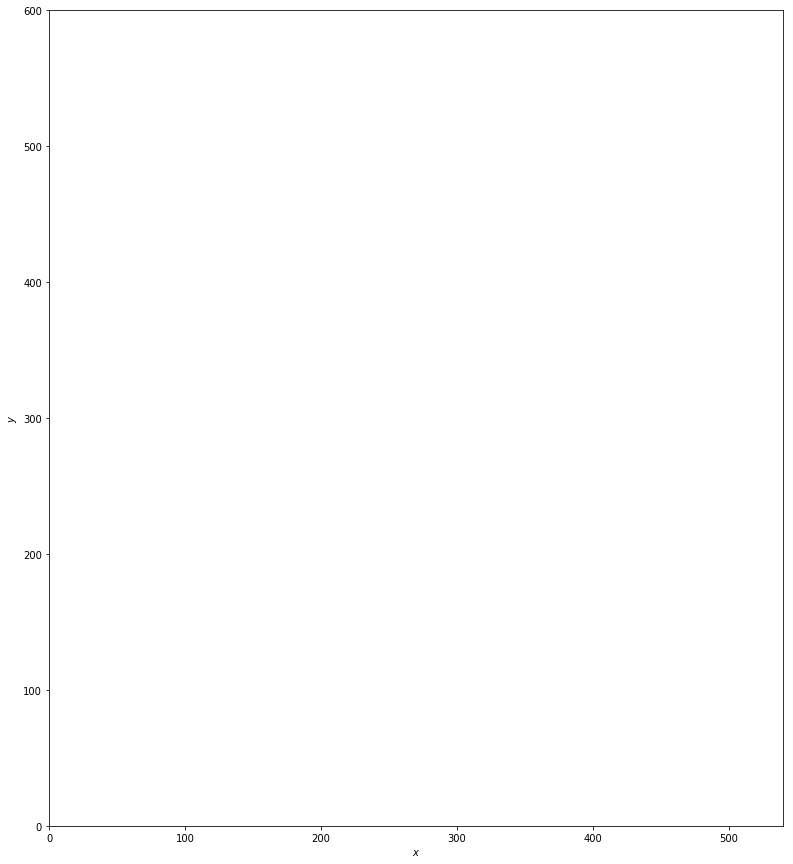

angle 0.0
move (3.0, 0.0)
1067.97897169 442.959393917
317


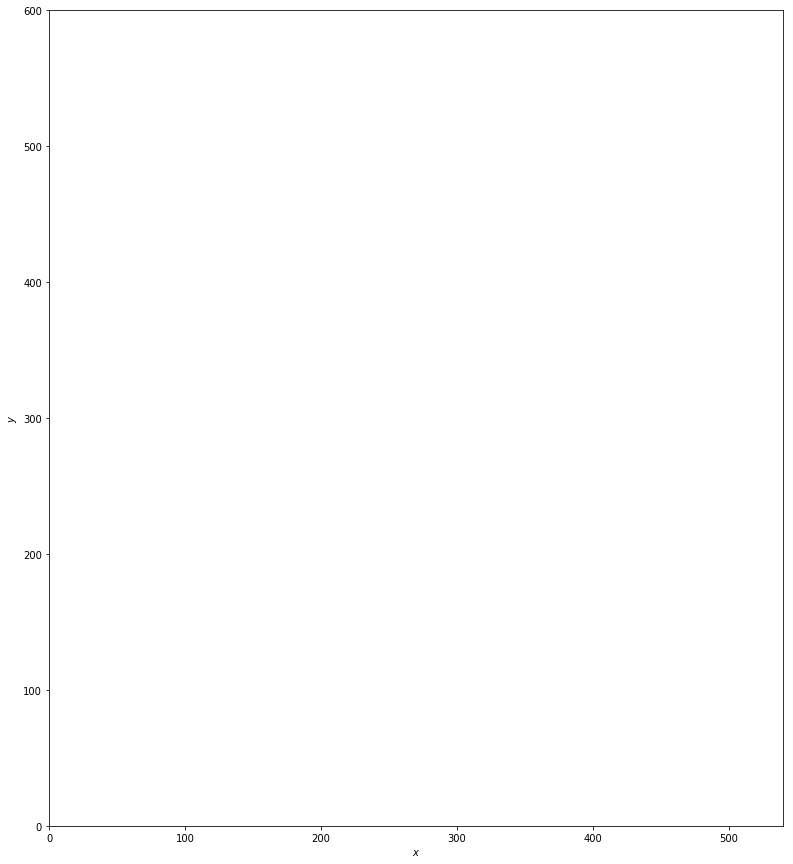

angle 0.0
move (3.0, 0.0)
1070.97897169 442.959393917
318


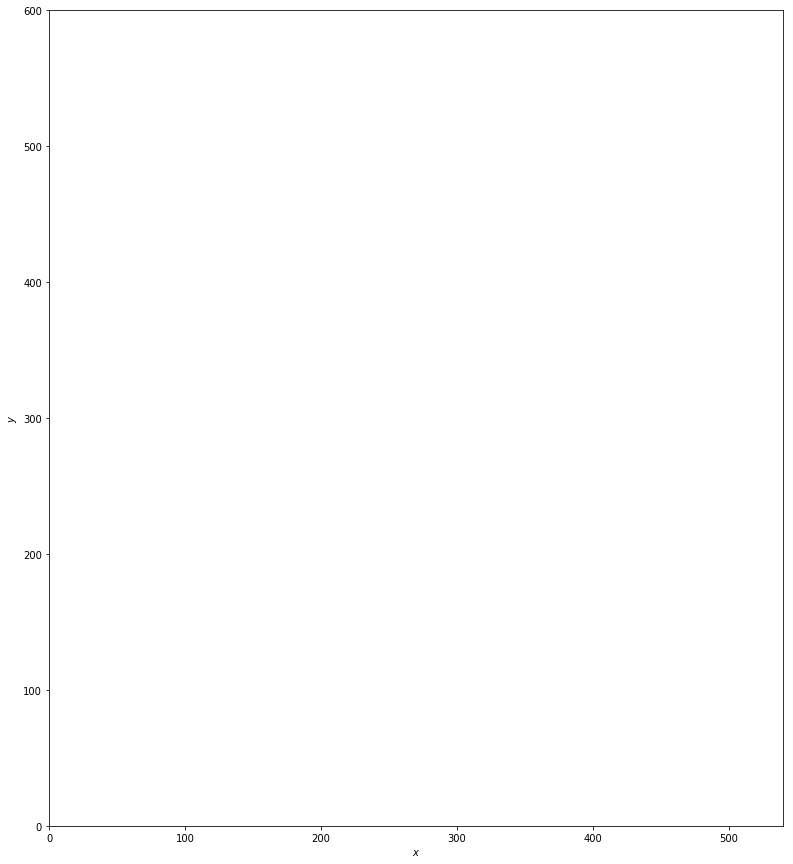

angle 0.0
move (3.0, 0.0)
1073.97897169 442.959393917
319


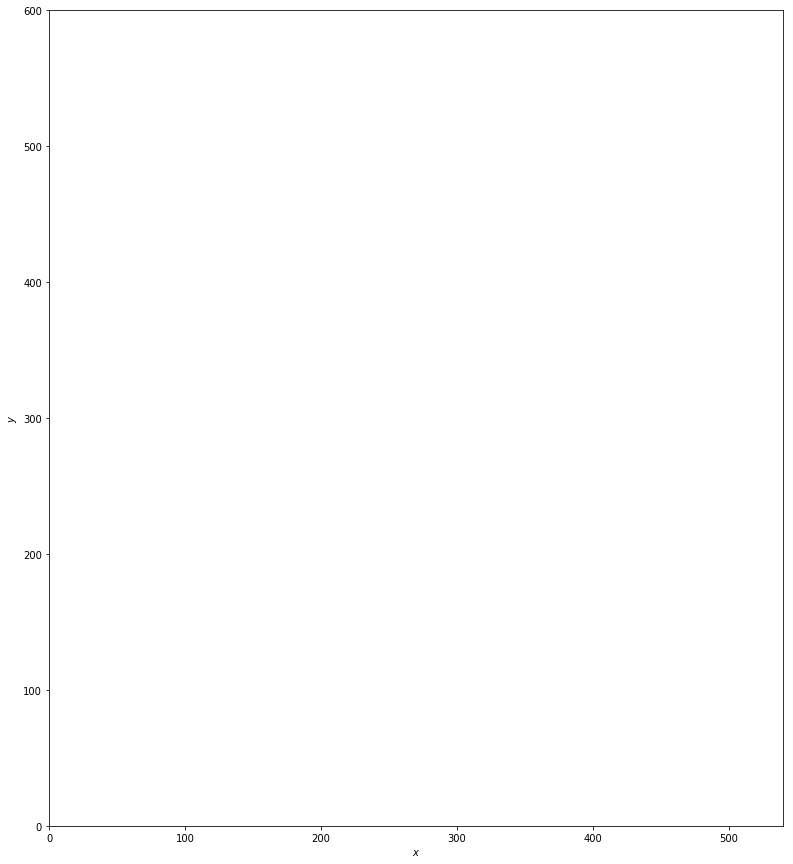

angle 0.0
move (3.0, 0.0)
1076.97897169 442.959393917
320


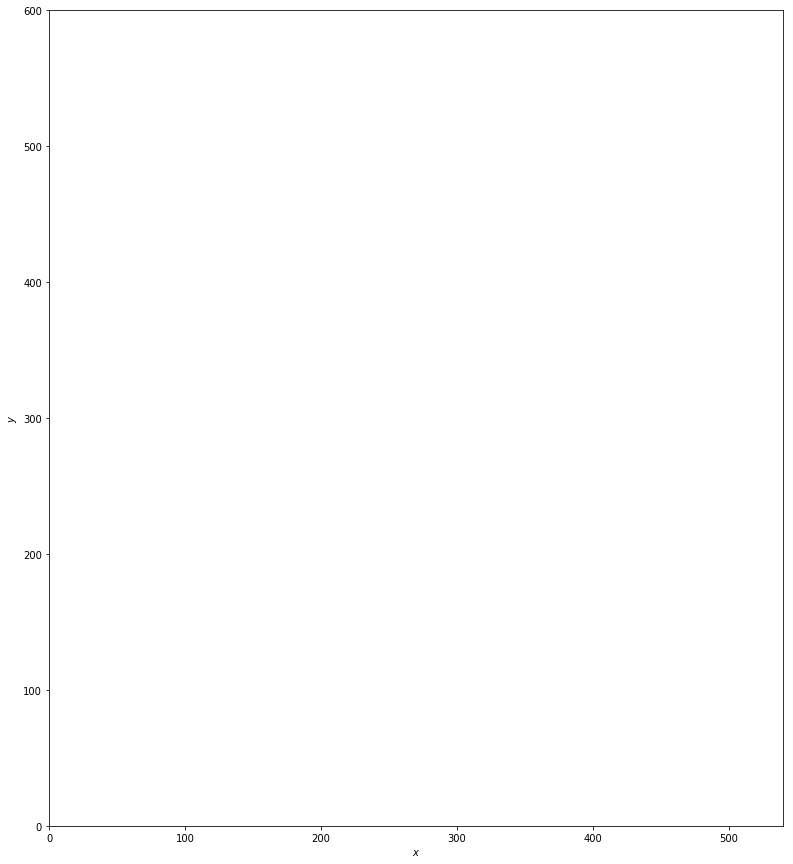

angle 0.0
move (3.0, 0.0)
1079.97897169 442.959393917
321


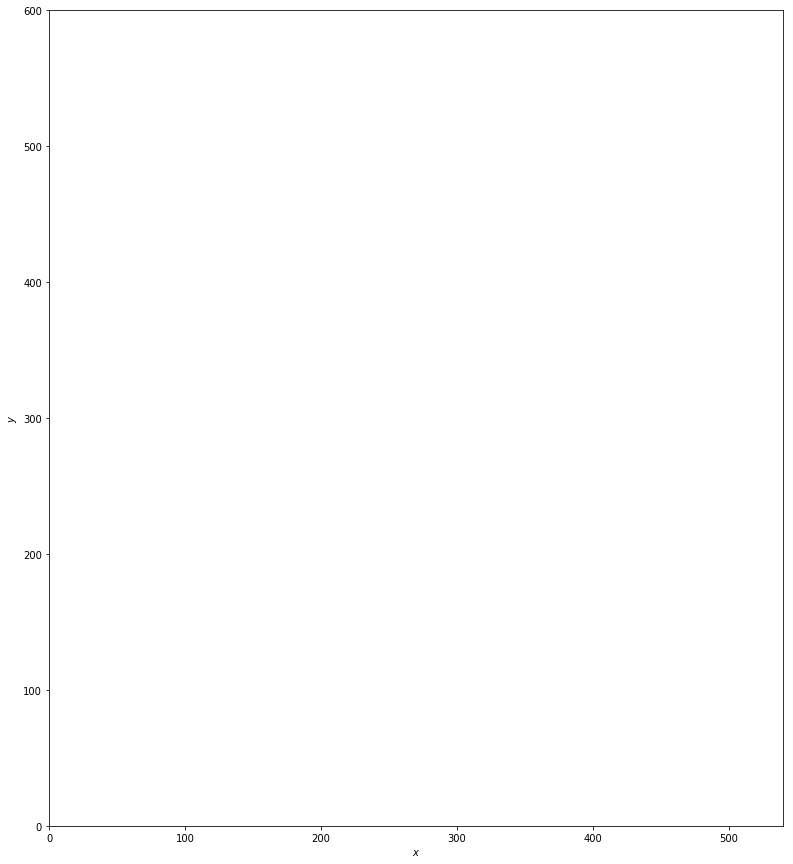

angle 0.0
move (3.0, 0.0)
1082.97897169 442.959393917
322


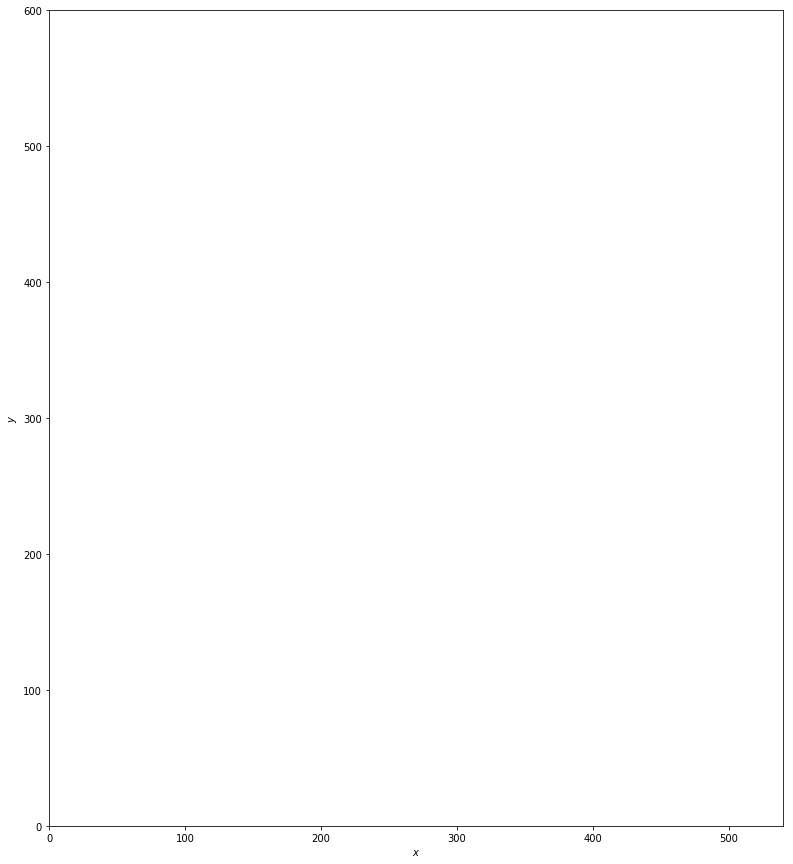

angle 0.0
move (3.0, 0.0)
1085.97897169 442.959393917
323


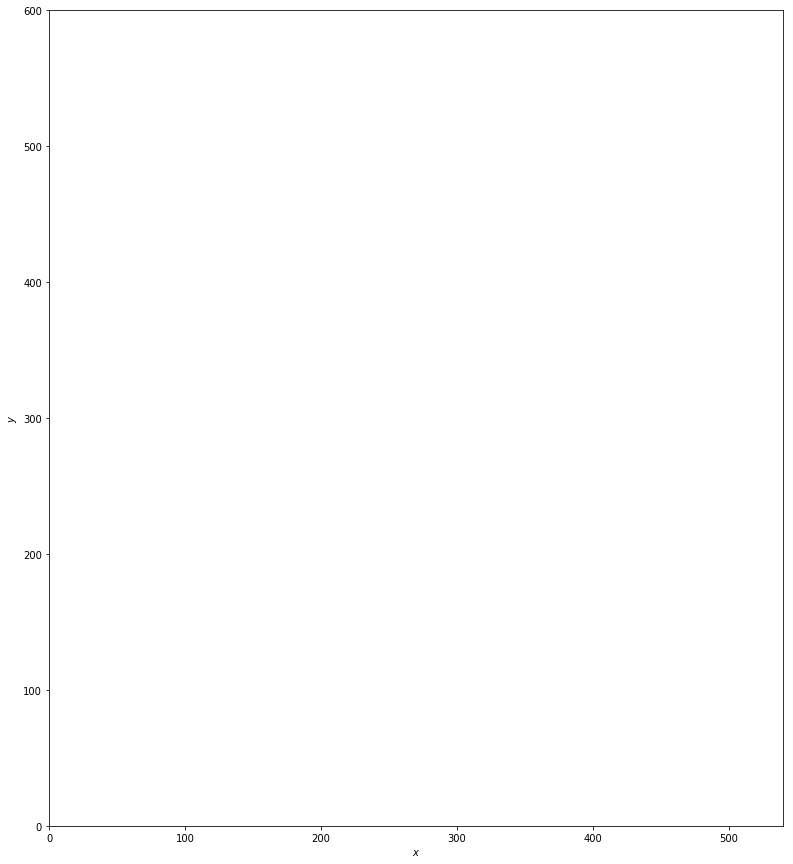

angle 0.0
move (3.0, 0.0)
1088.97897169 442.959393917
324


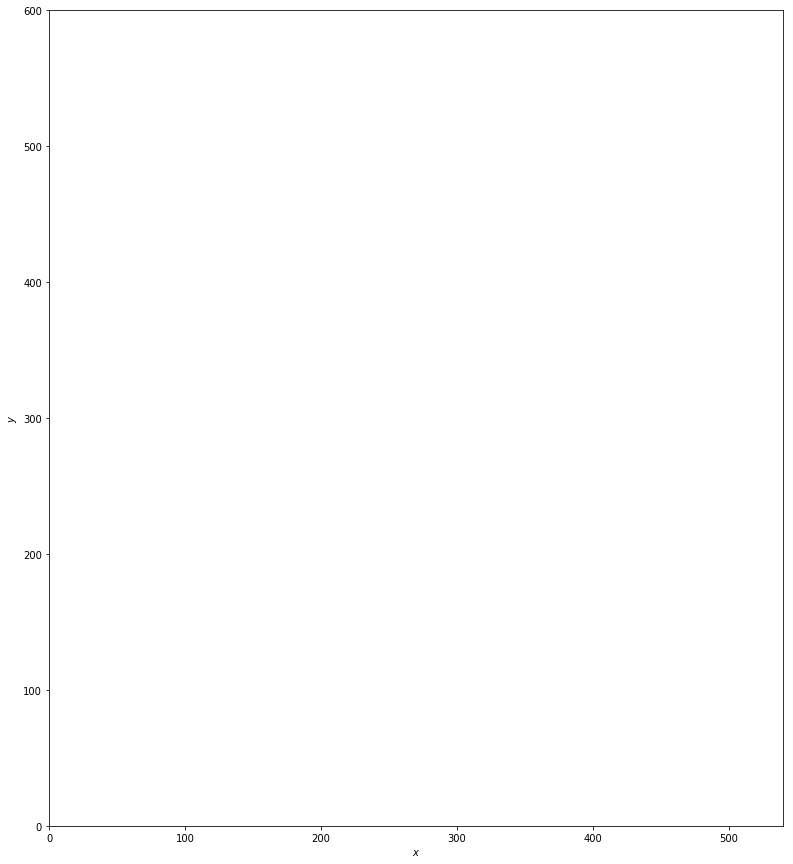

angle 0.0
move (3.0, 0.0)
1091.97897169 442.959393917
325


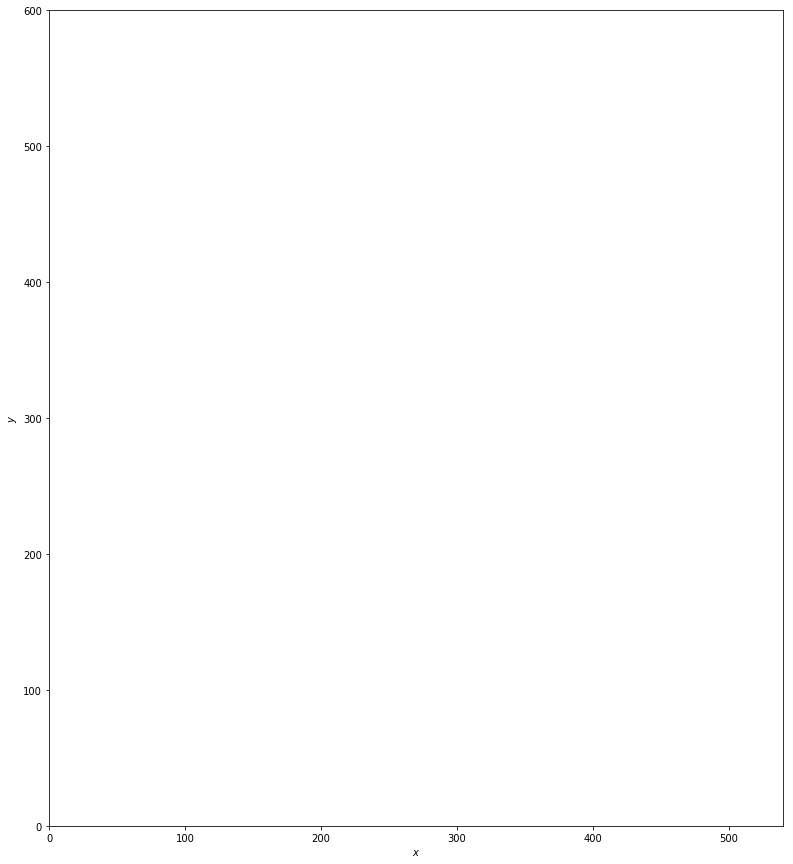

angle 0.0
move (3.0, 0.0)
1094.97897169 442.959393917
326


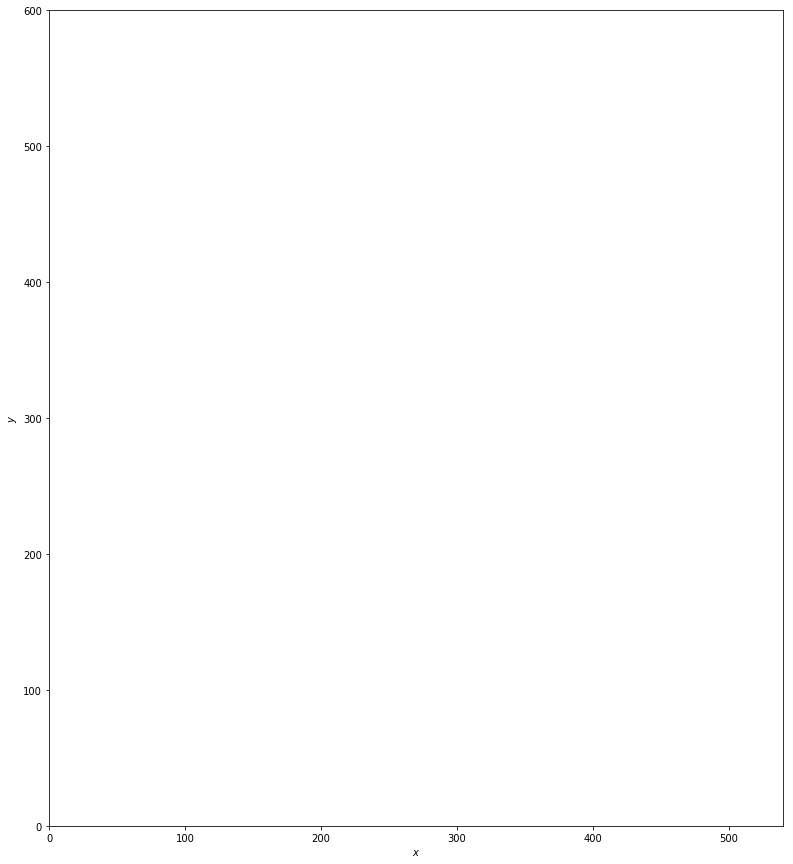

angle 0.0
move (3.0, 0.0)
1097.97897169 442.959393917
327


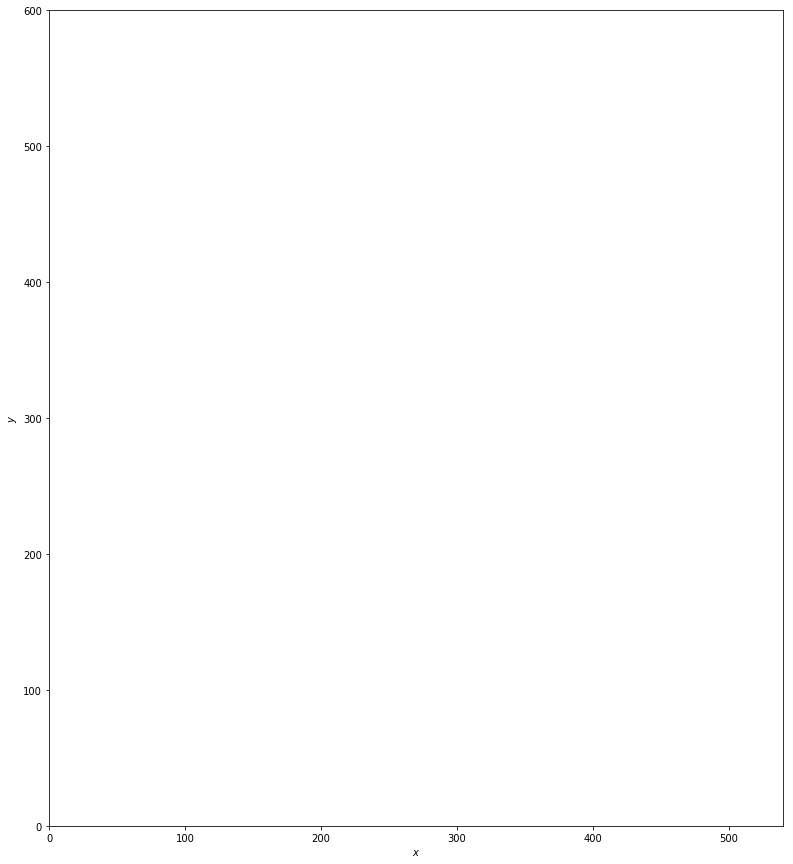

angle 0.0
move (3.0, 0.0)
1100.97897169 442.959393917
328


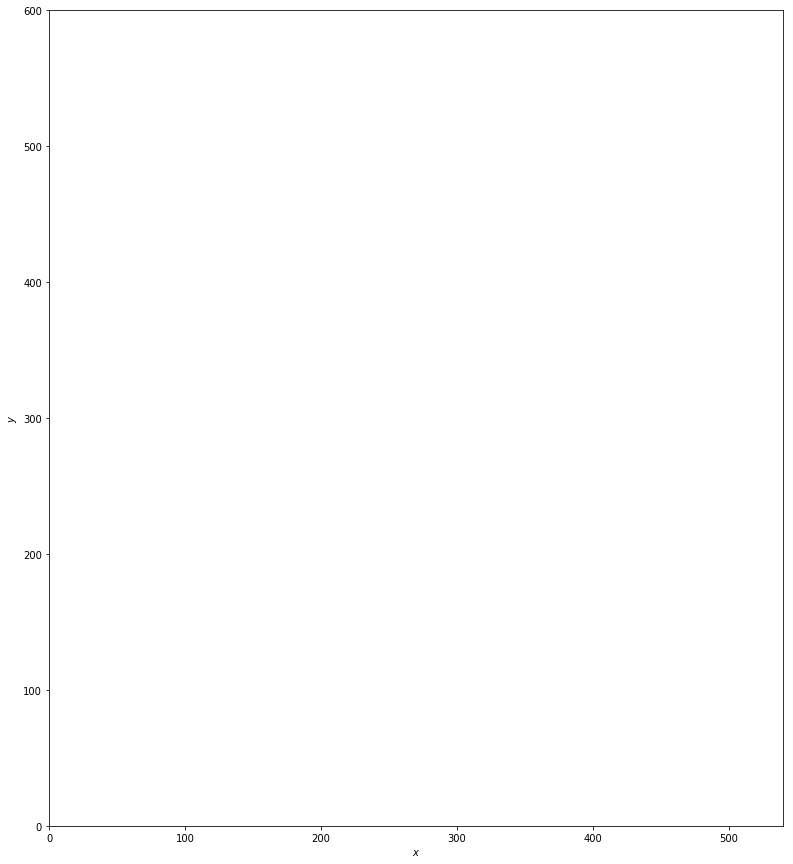

angle 0.0
move (3.0, 0.0)
1103.97897169 442.959393917
329


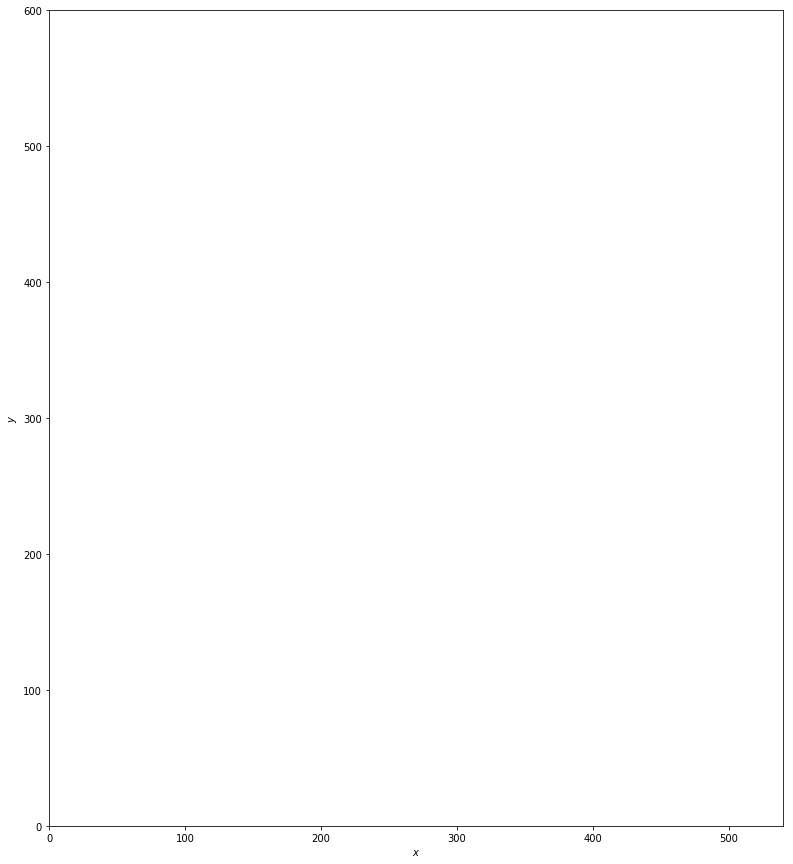

angle 0.0
move (3.0, 0.0)
1106.97897169 442.959393917
330


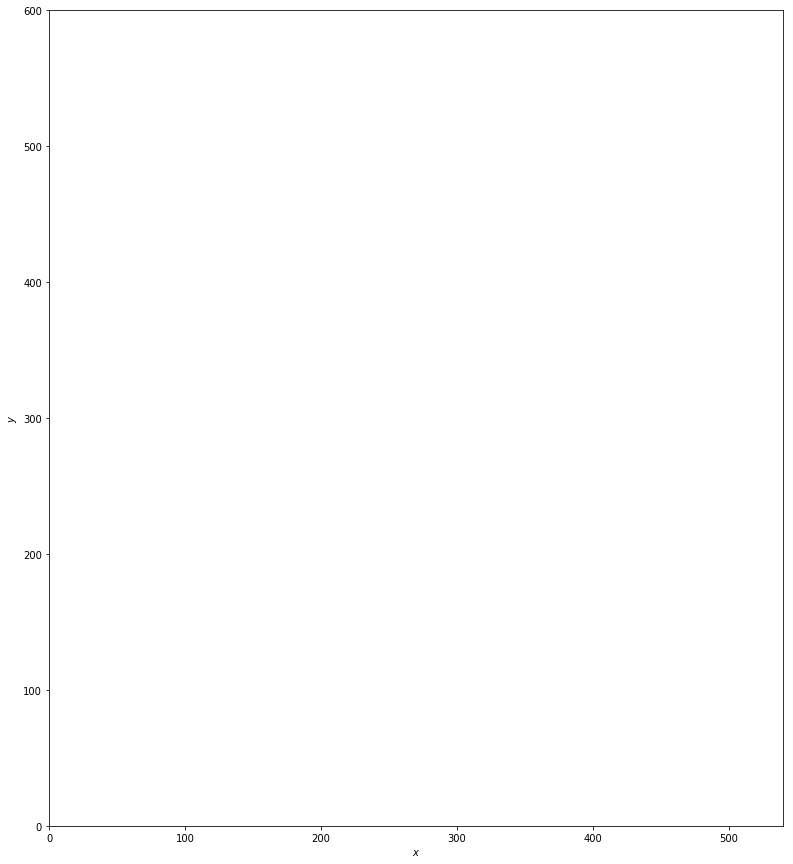

angle 0.0
move (3.0, 0.0)
1109.97897169 442.959393917
331


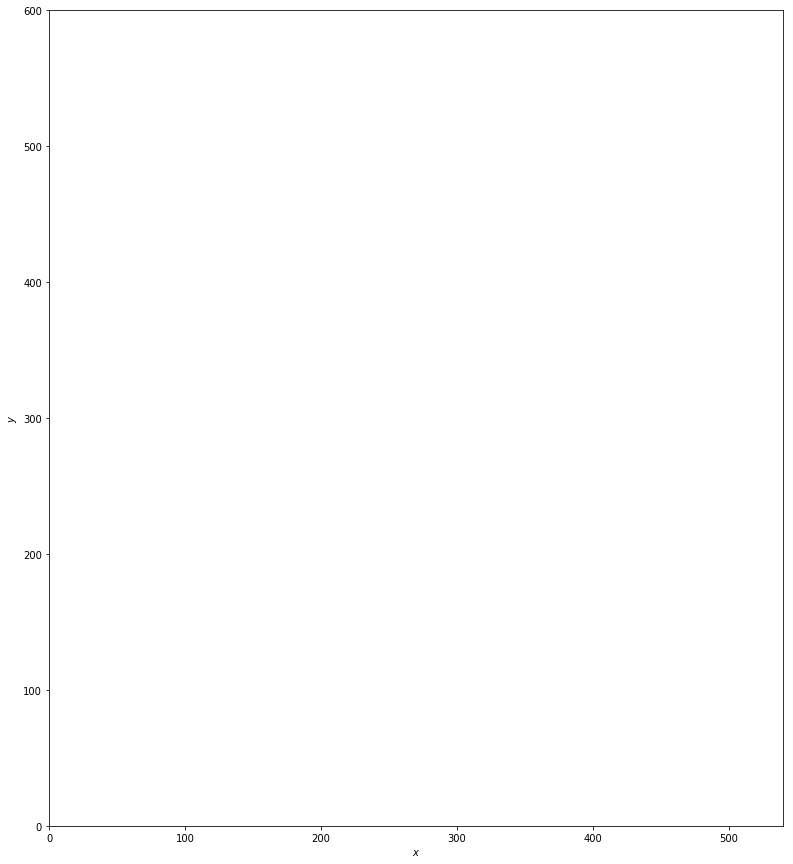

angle 0.0
move (3.0, 0.0)
1112.97897169 442.959393917
332


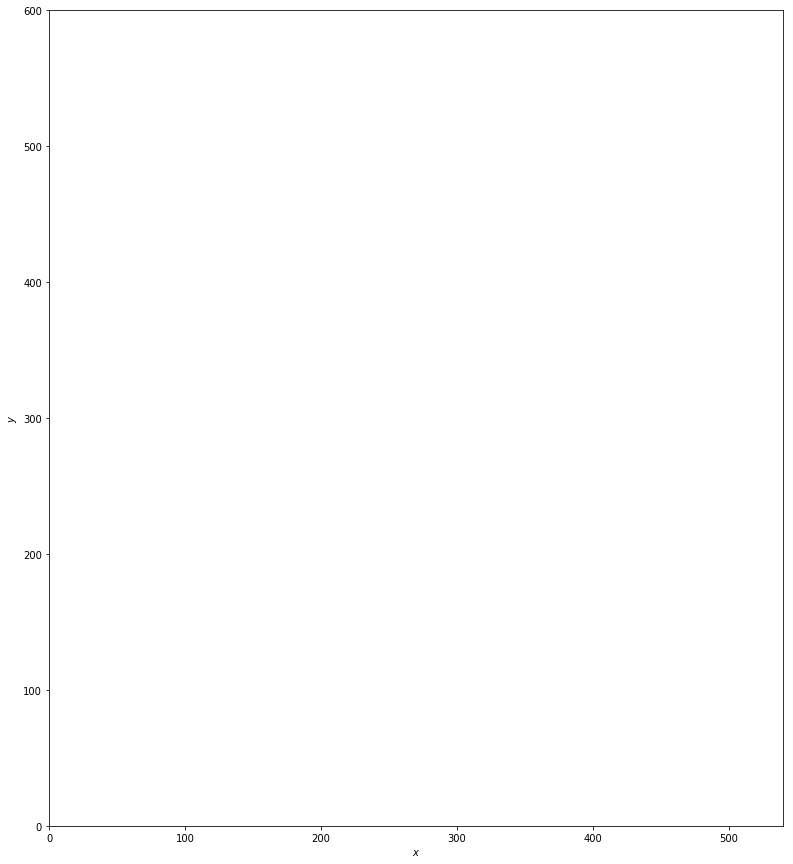

angle 0.0
move (3.0, 0.0)
1115.97897169 442.959393917
333


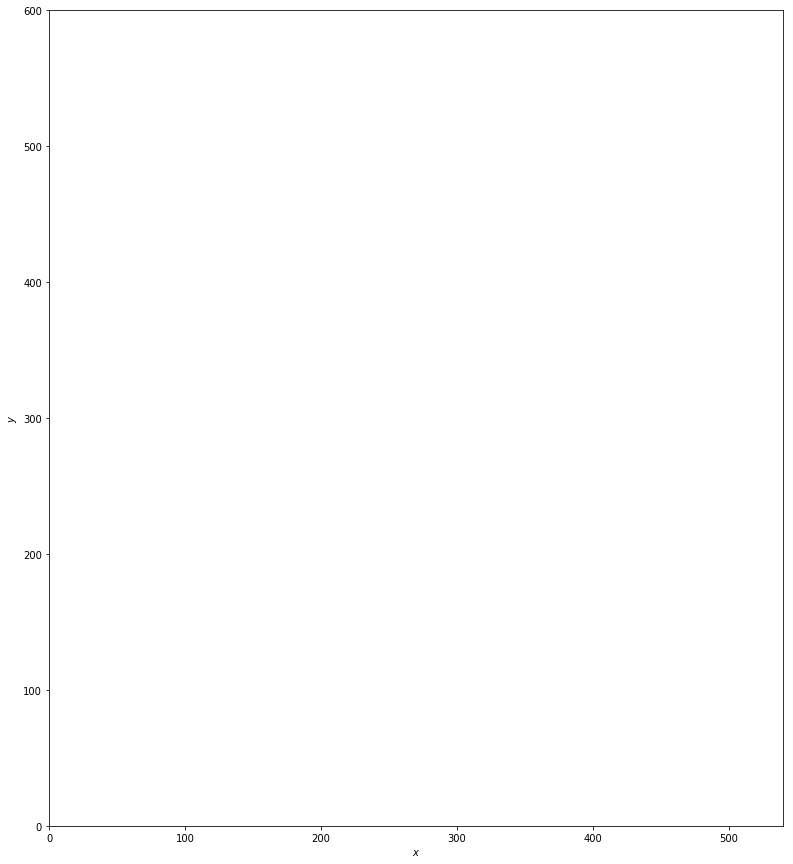

angle 0.0
move (3.0, 0.0)
1118.97897169 442.959393917
334


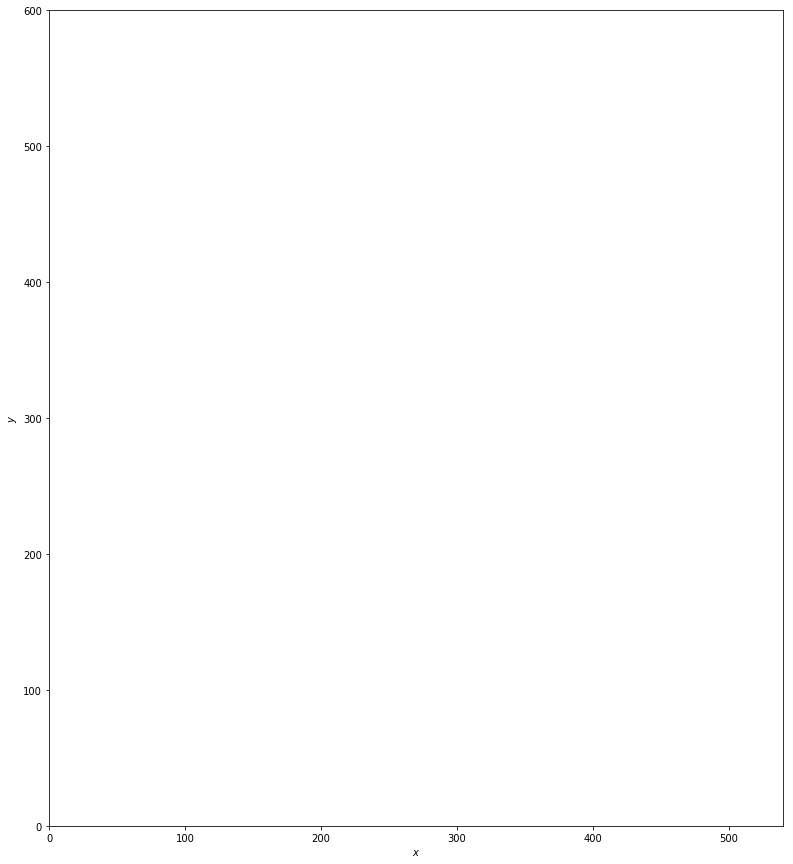

angle 0.0
move (3.0, 0.0)
1121.97897169 442.959393917
335


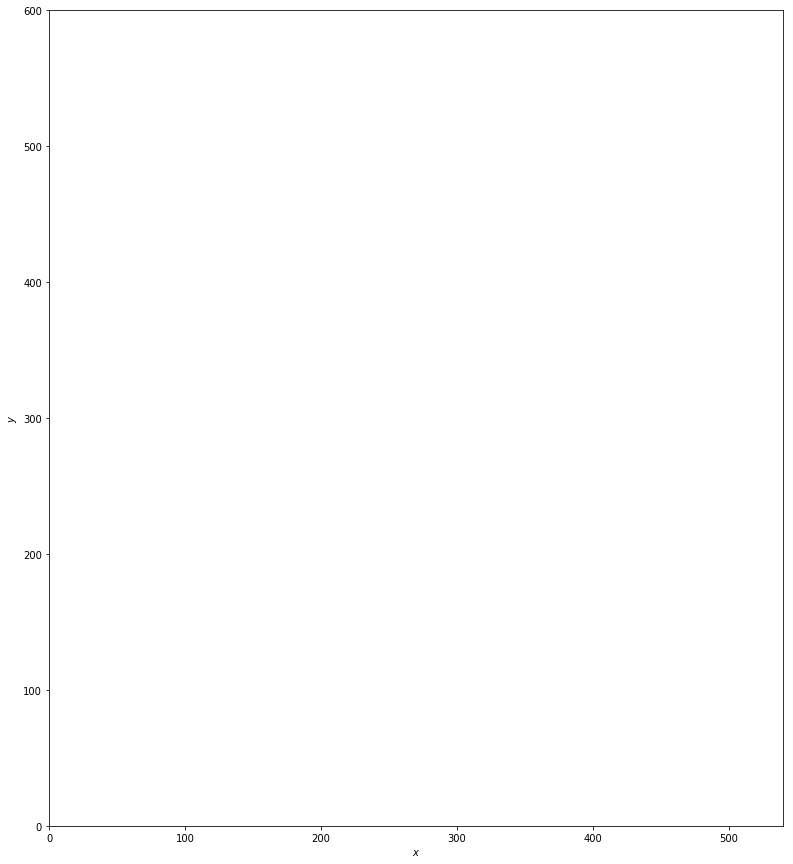

angle 0.0
move (3.0, 0.0)
1124.97897169 442.959393917
336


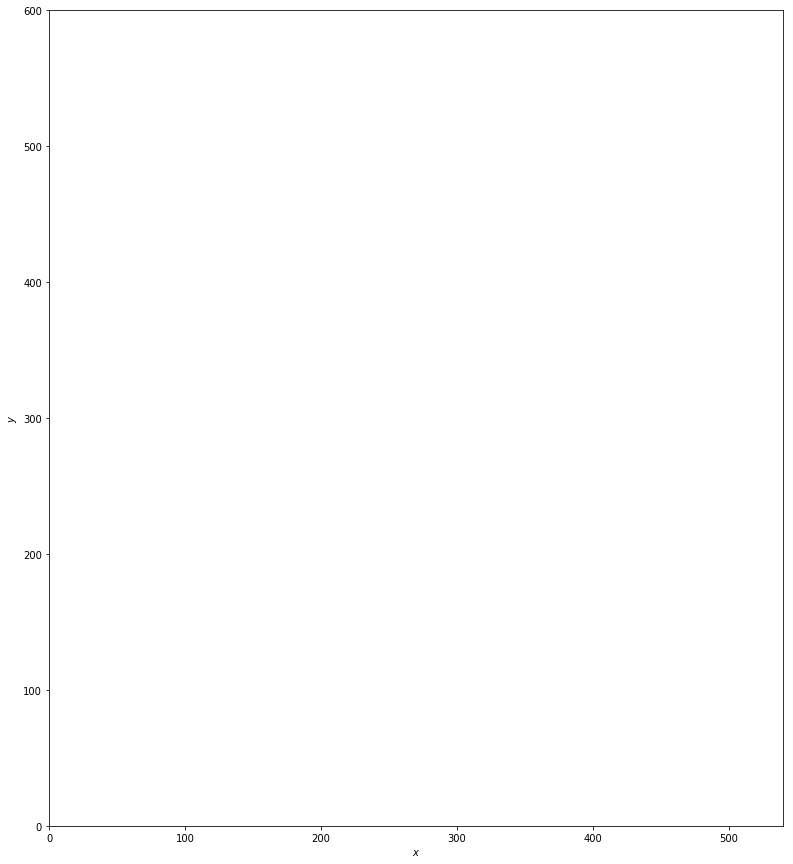

angle 0.0
move (3.0, 0.0)
1127.97897169 442.959393917
337


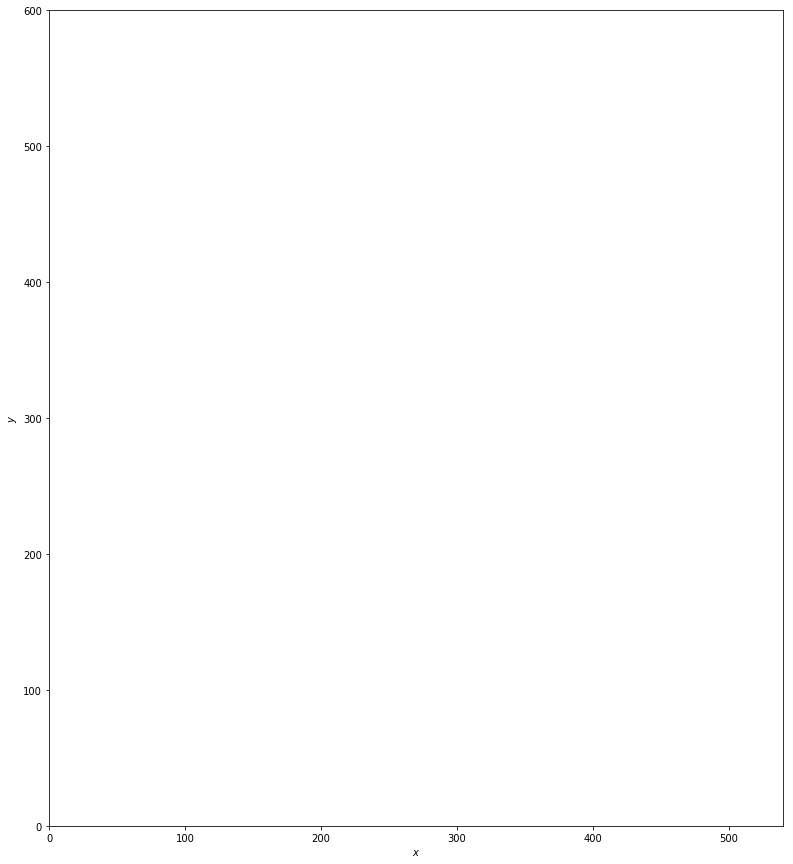

angle 0.0
move (3.0, 0.0)
1130.97897169 442.959393917
338


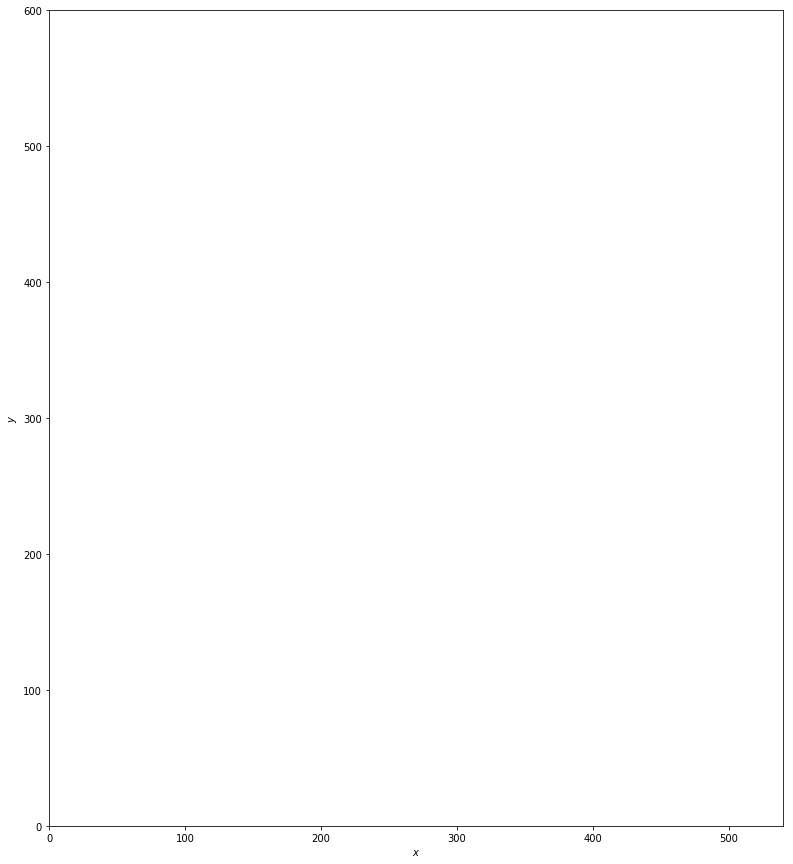

angle 0.0
move (3.0, 0.0)
1133.97897169 442.959393917
339


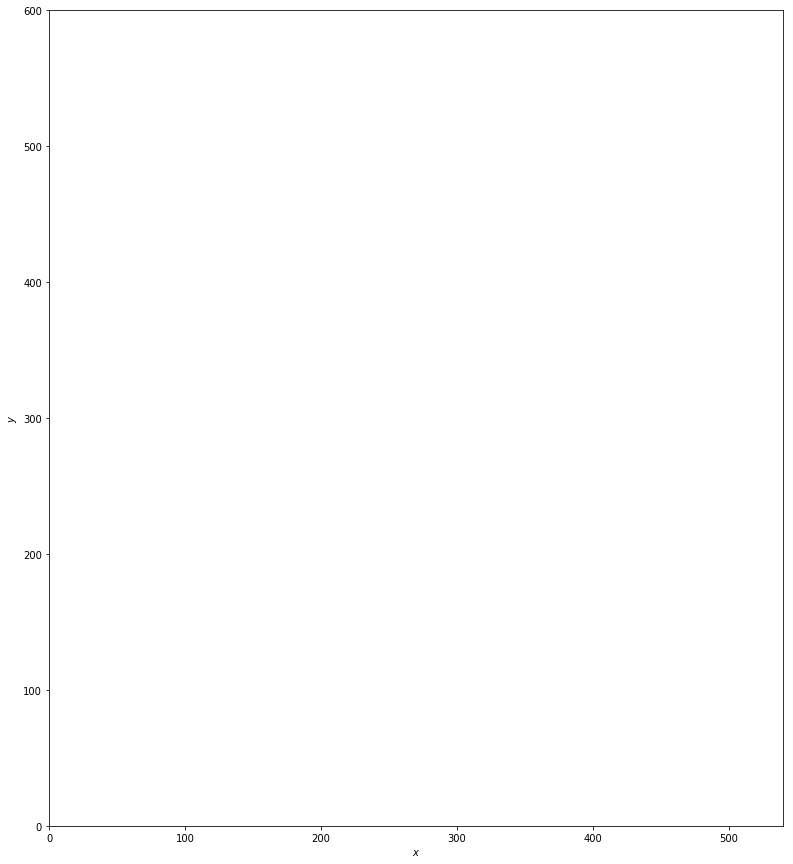

angle 0.0
move (3.0, 0.0)
1136.97897169 442.959393917
340


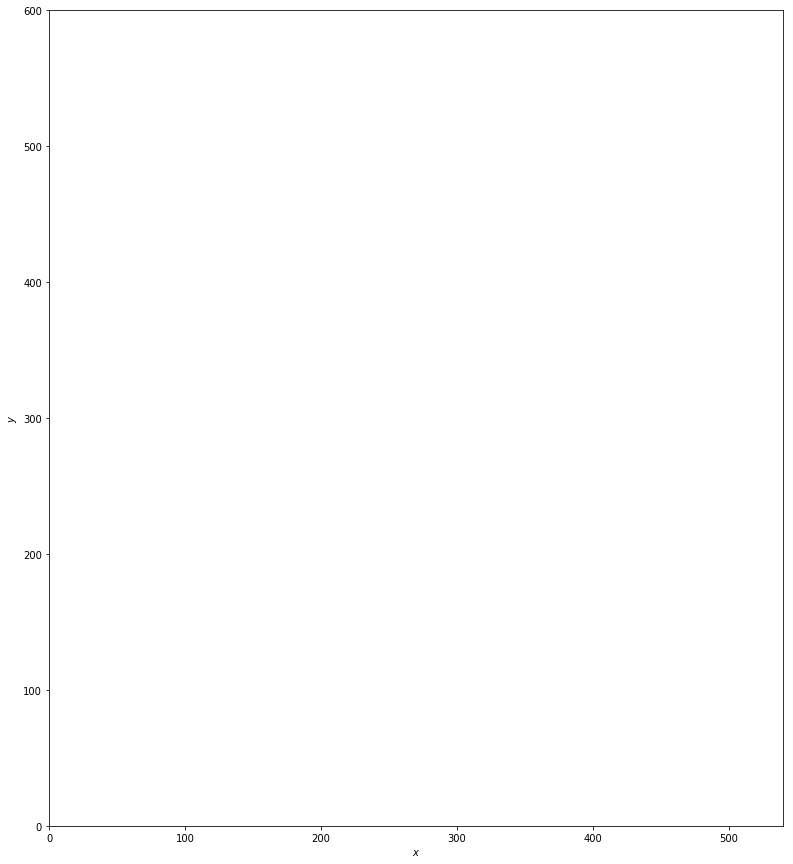

angle 0.0
move (3.0, 0.0)
1139.97897169 442.959393917
341


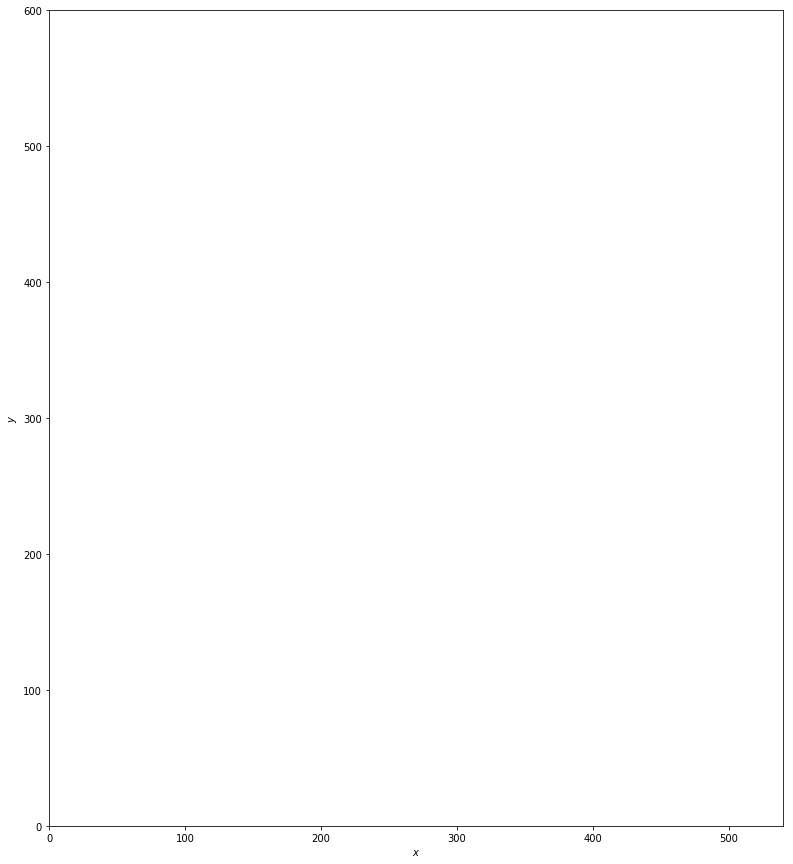

angle 0.0
move (3.0, 0.0)
1142.97897169 442.959393917
342


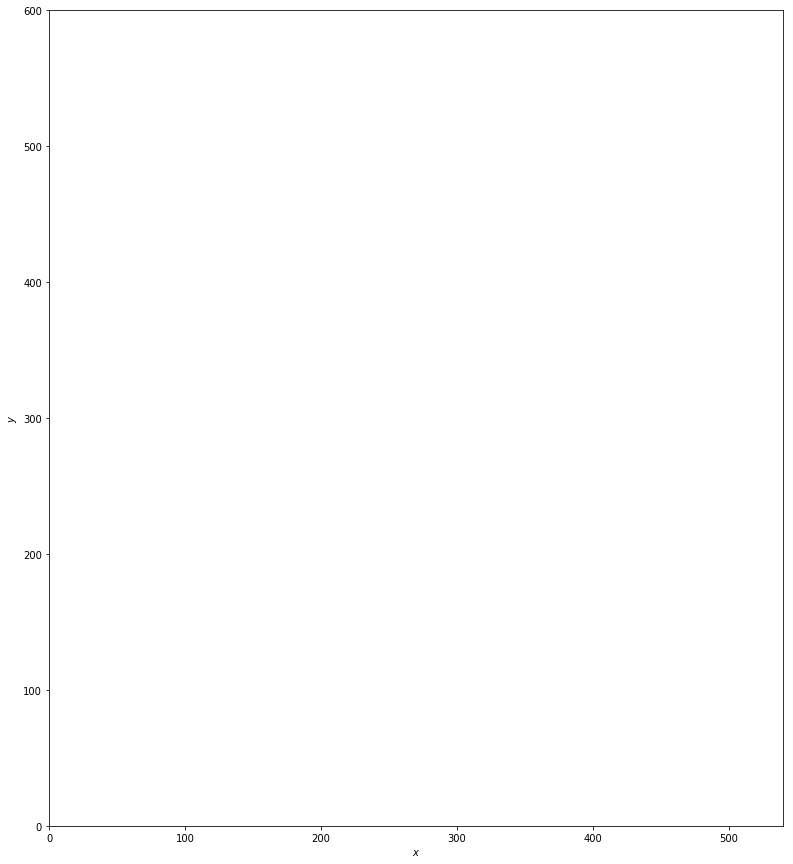

angle 0.0
move (3.0, 0.0)
1145.97897169 442.959393917
343


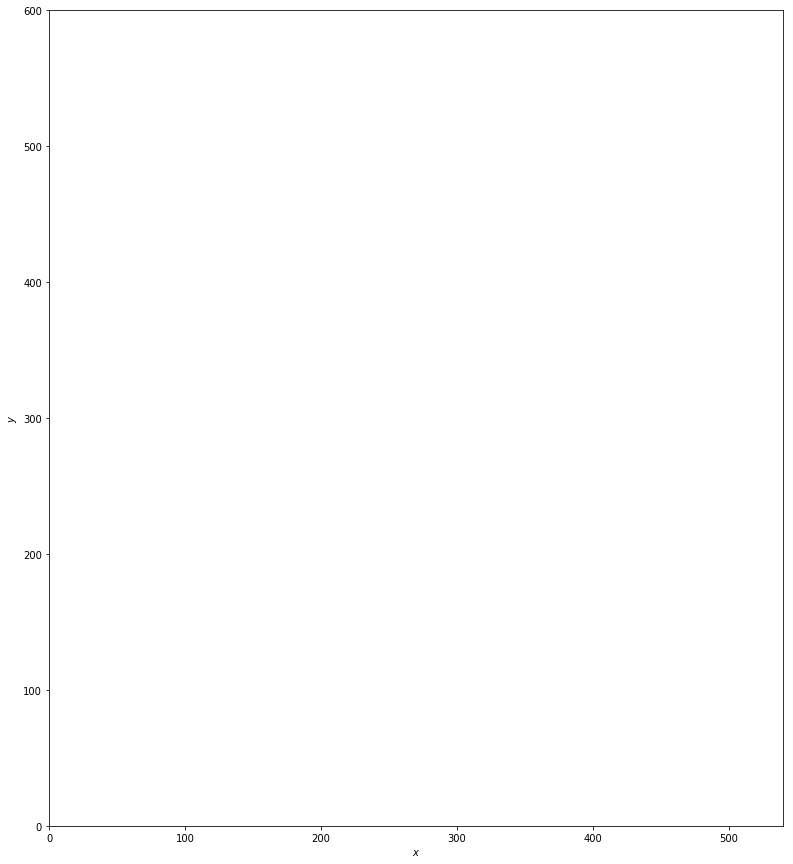

angle 0.0
move (3.0, 0.0)
1148.97897169 442.959393917
344


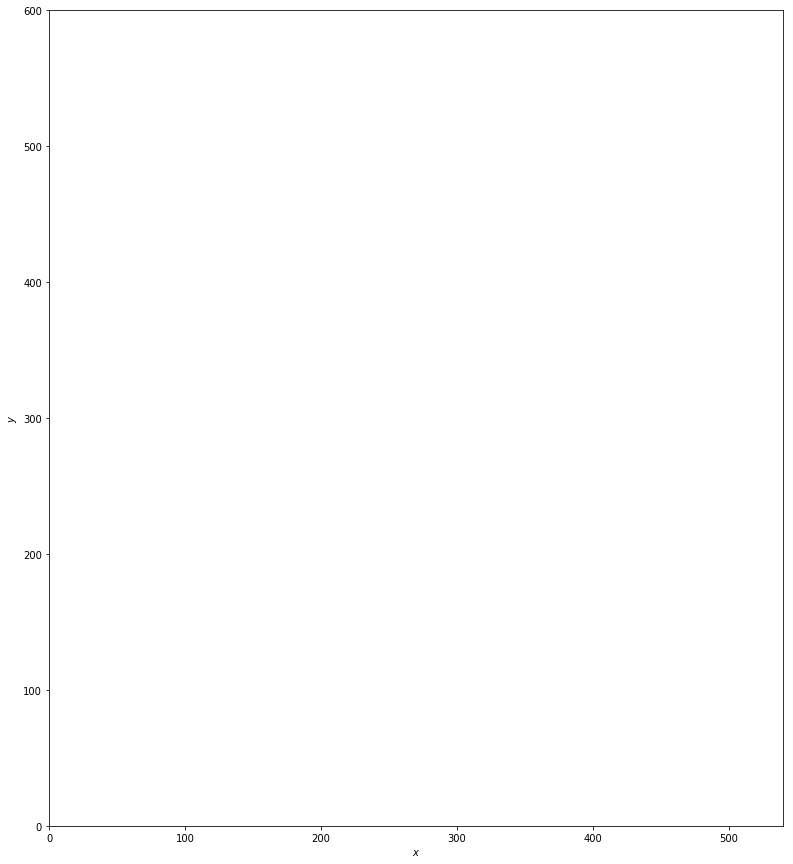

angle 0.0
move (3.0, 0.0)
1151.97897169 442.959393917
345


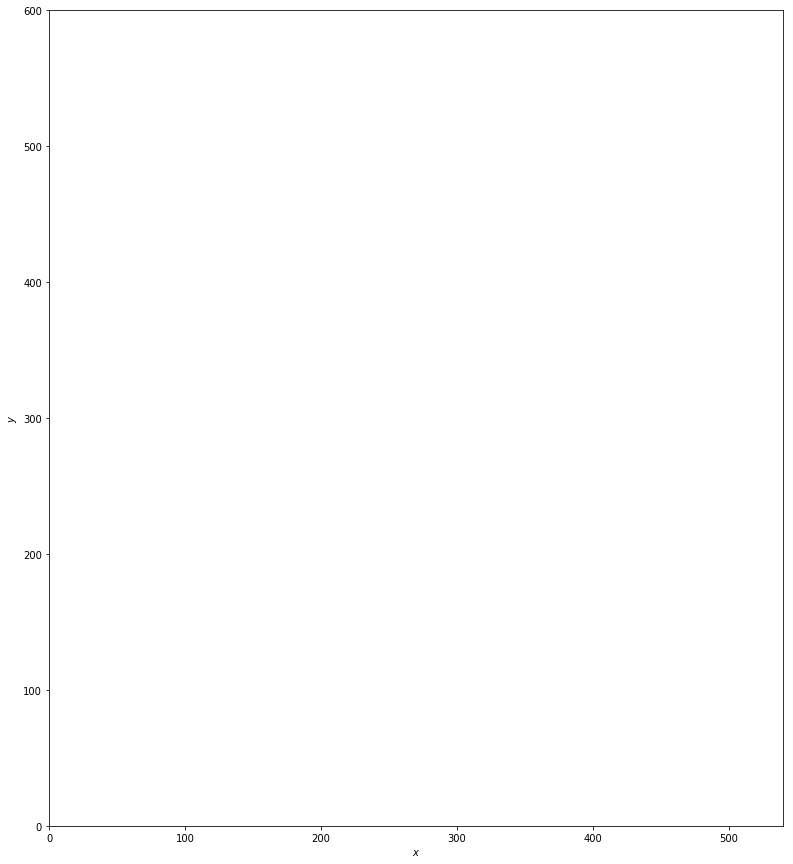

angle 0.0
move (3.0, 0.0)
1154.97897169 442.959393917
346


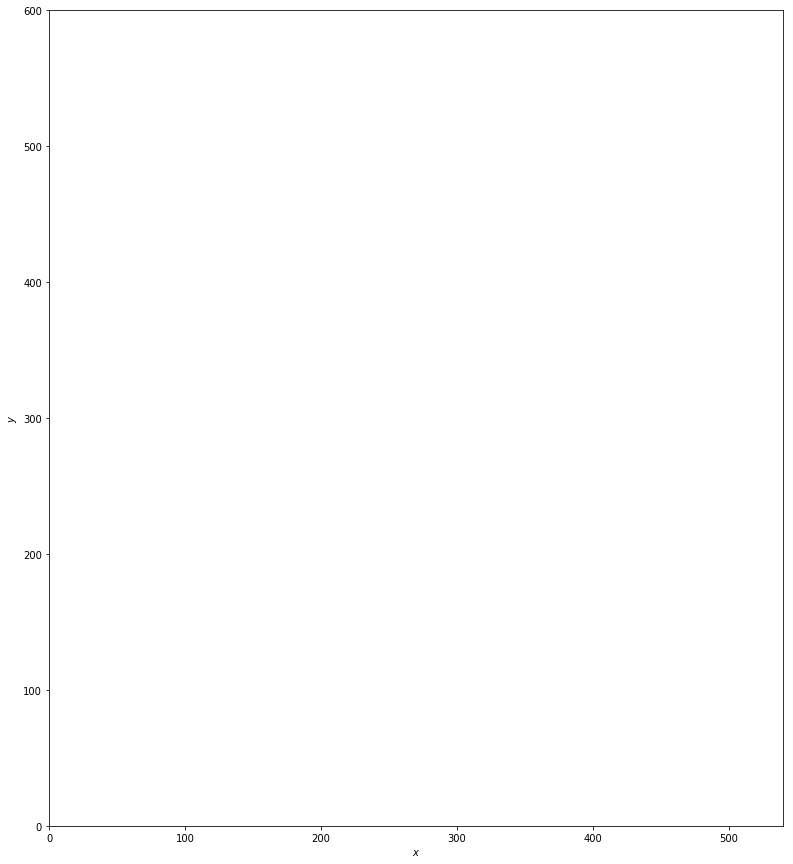

angle 0.0
move (3.0, 0.0)
1157.97897169 442.959393917
347


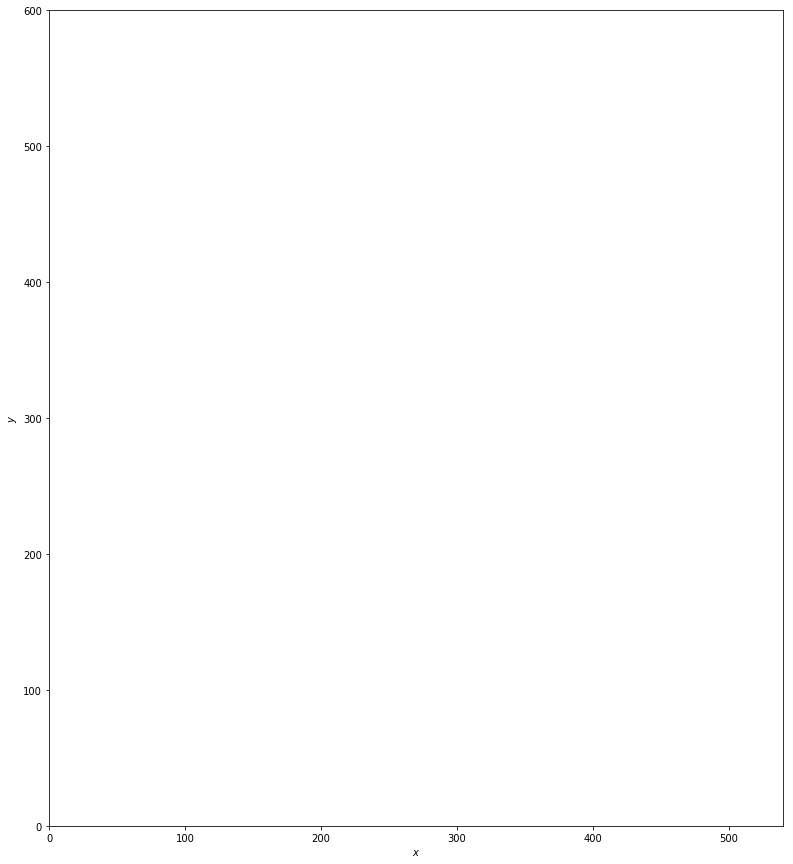

angle 0.0
move (3.0, 0.0)
1160.97897169 442.959393917
348


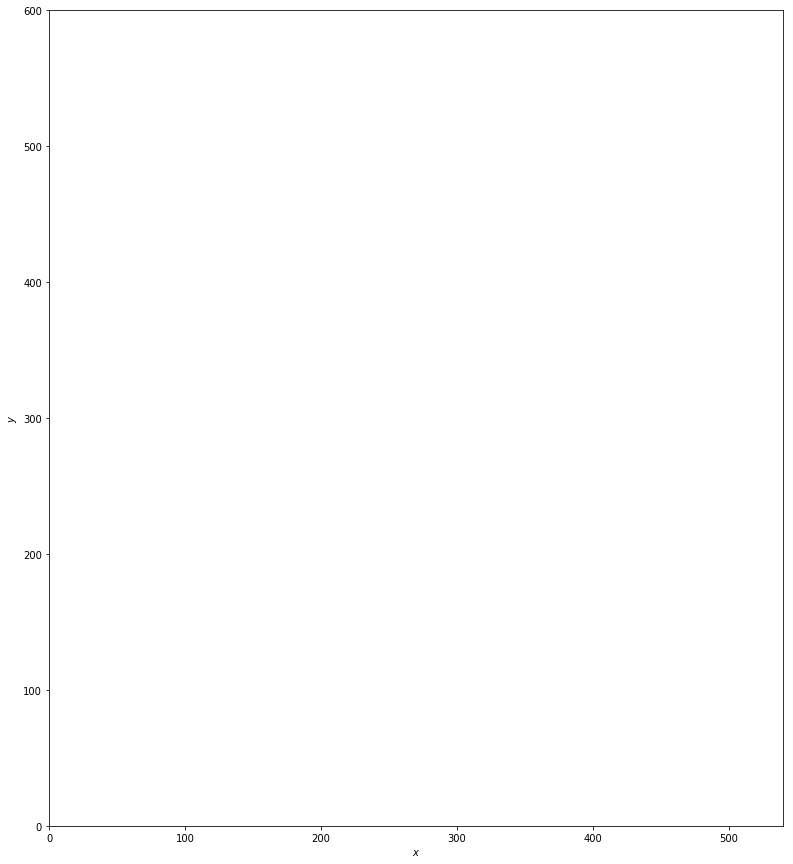

angle 0.0
move (3.0, 0.0)
1163.97897169 442.959393917
349


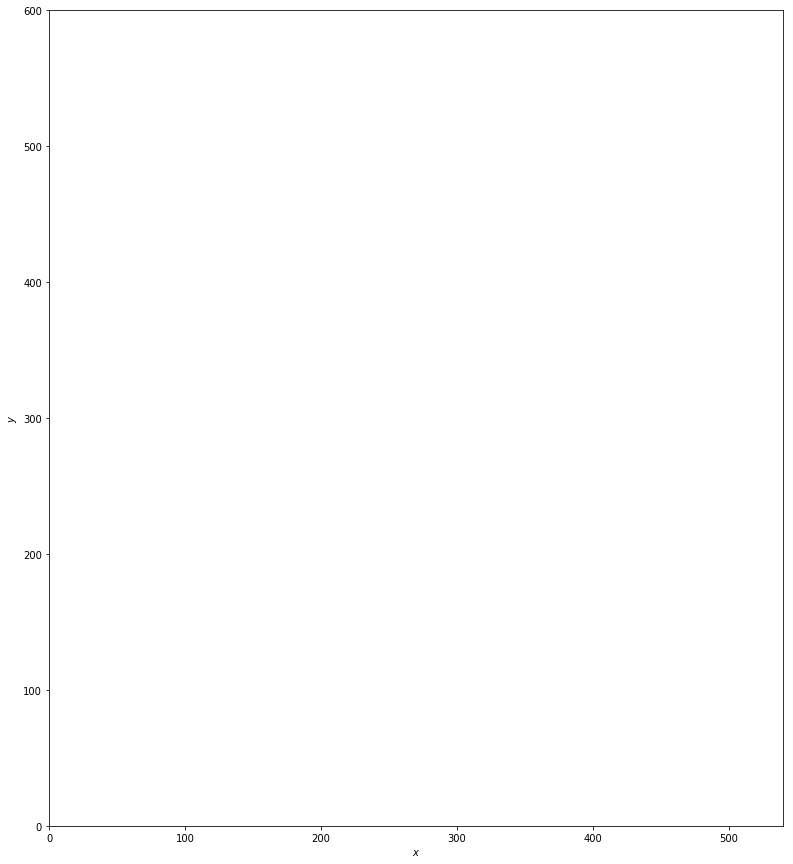

angle 0.0
move (3.0, 0.0)
1166.97897169 442.959393917
350


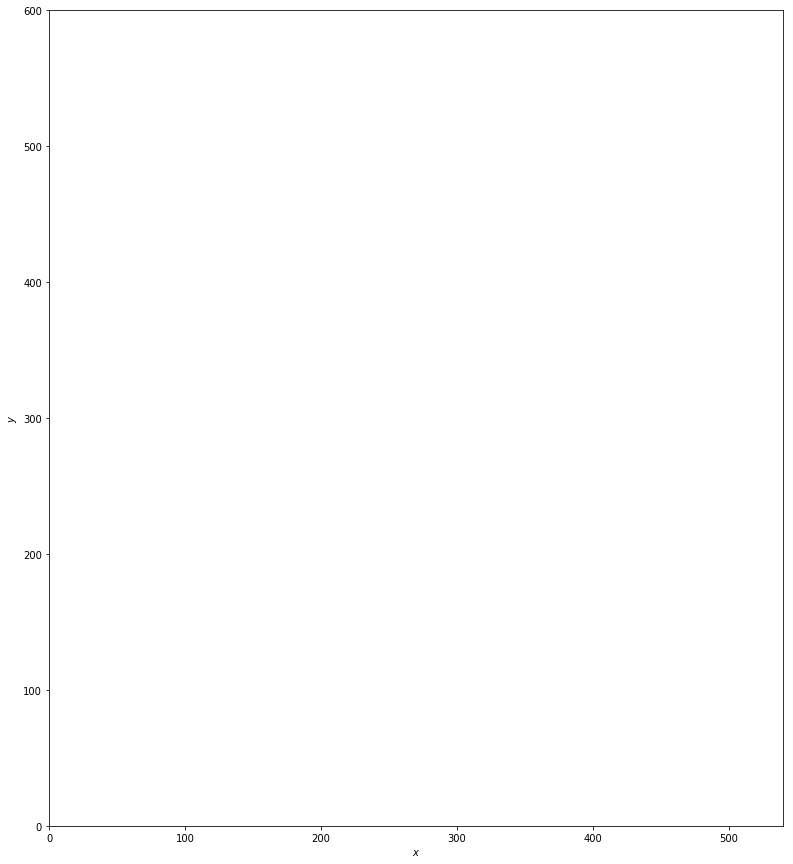

angle 0.0
move (3.0, 0.0)
1169.97897169 442.959393917
351


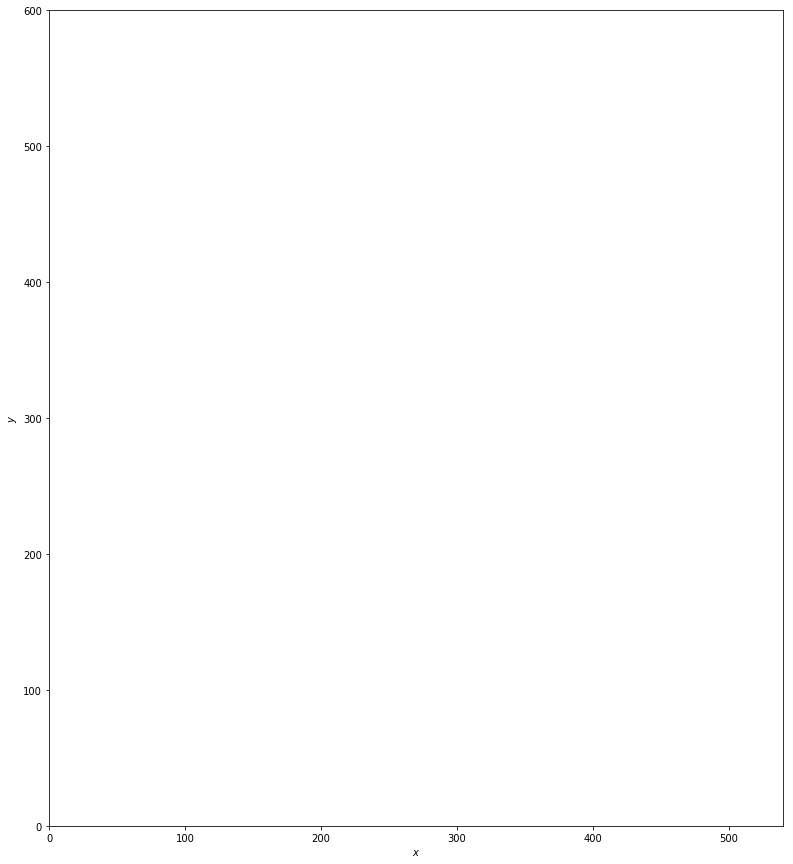

angle 0.0
move (3.0, 0.0)
1172.97897169 442.959393917
352


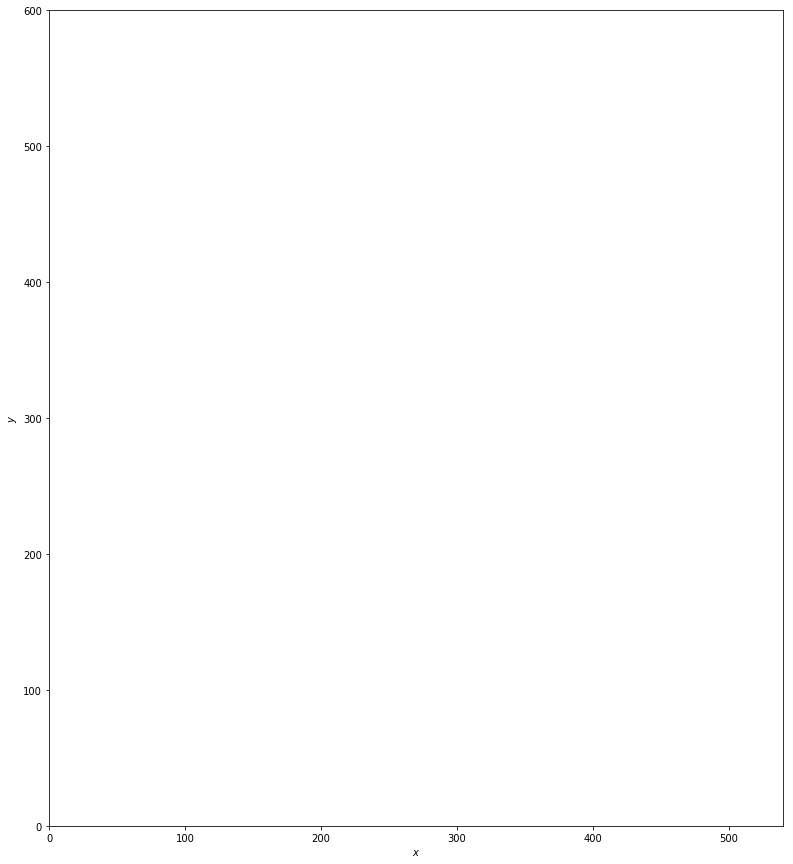

angle 0.0
move (3.0, 0.0)
1175.97897169 442.959393917
353


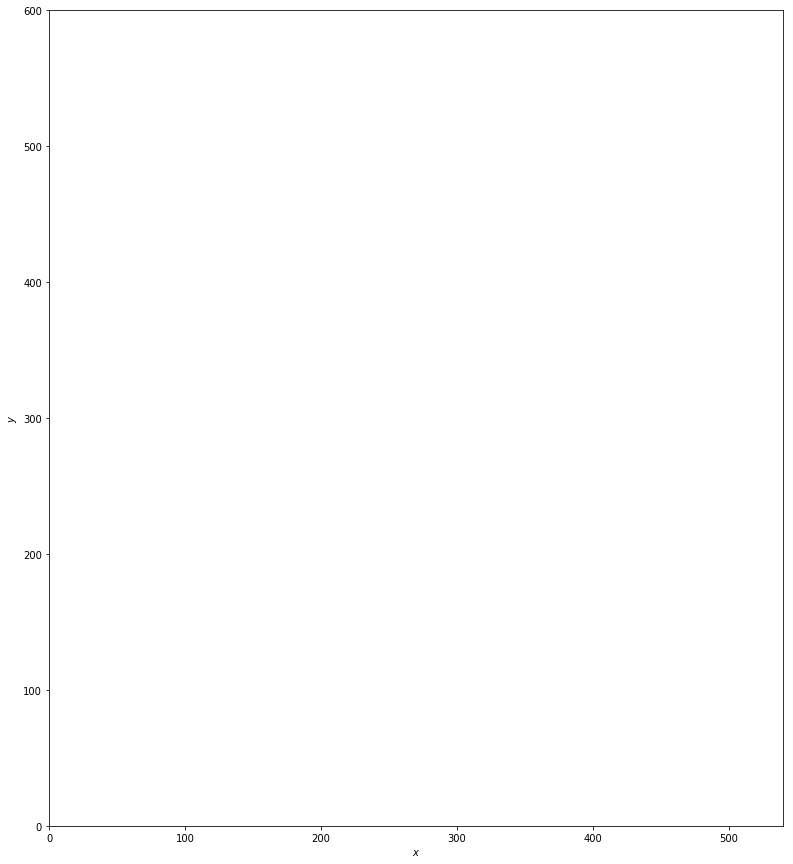

angle 0.0
move (3.0, 0.0)
1178.97897169 442.959393917
354


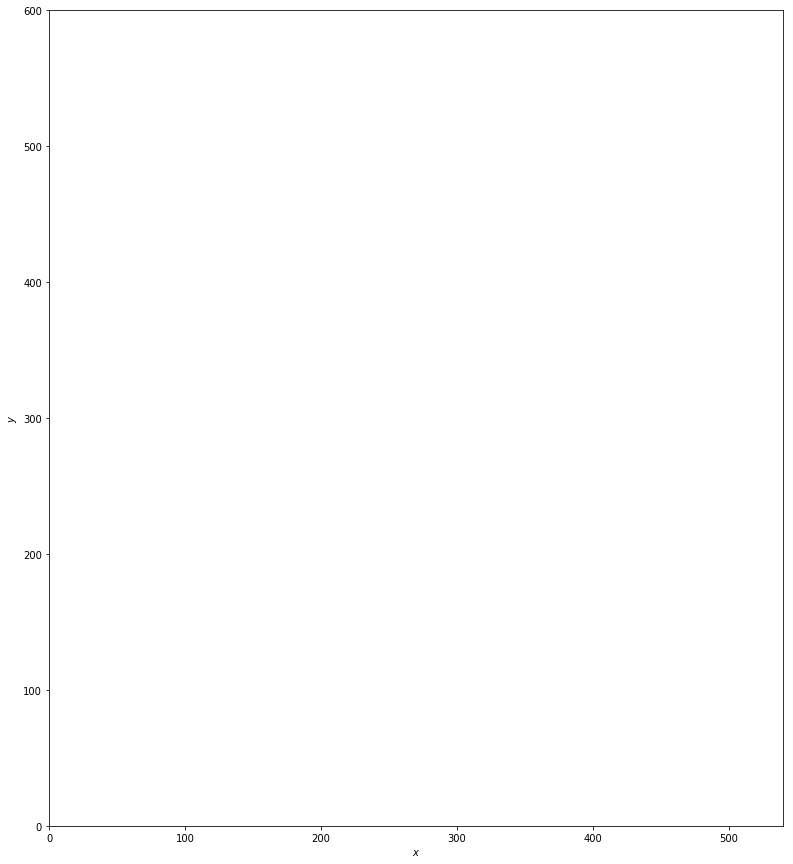

angle 0.0
move (3.0, 0.0)
1181.97897169 442.959393917
355


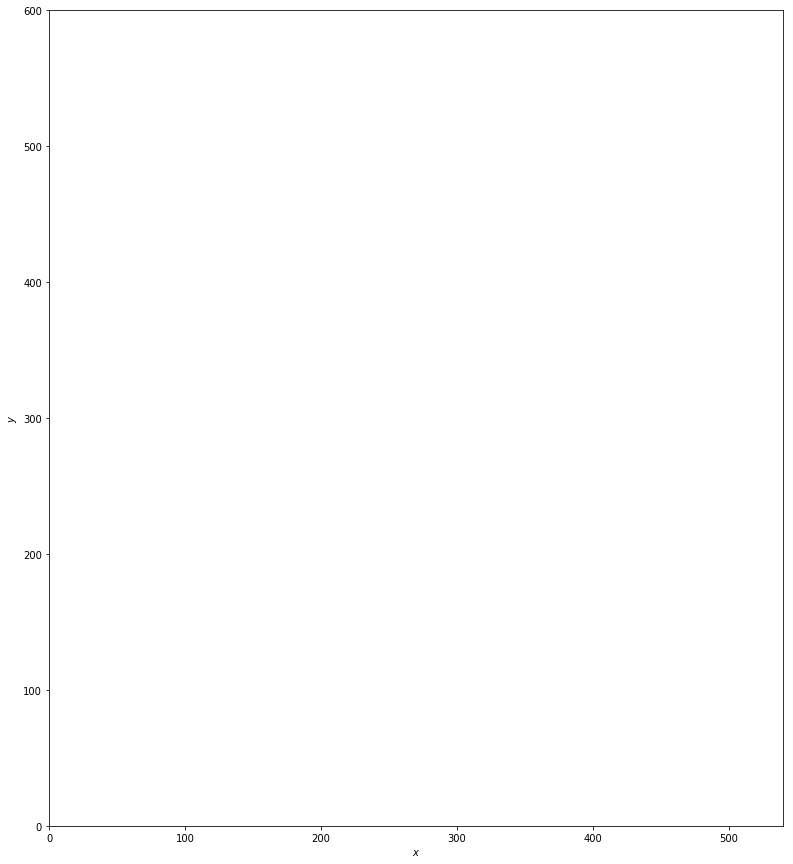

angle 0.0
move (3.0, 0.0)
1184.97897169 442.959393917
356


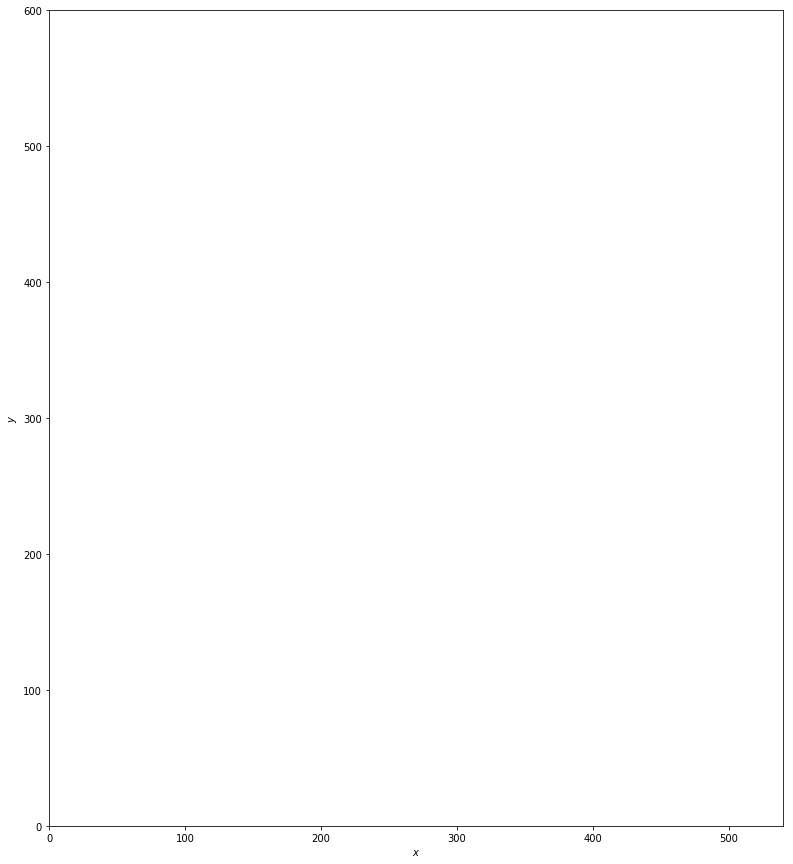

angle 0.0
move (3.0, 0.0)
1187.97897169 442.959393917
357


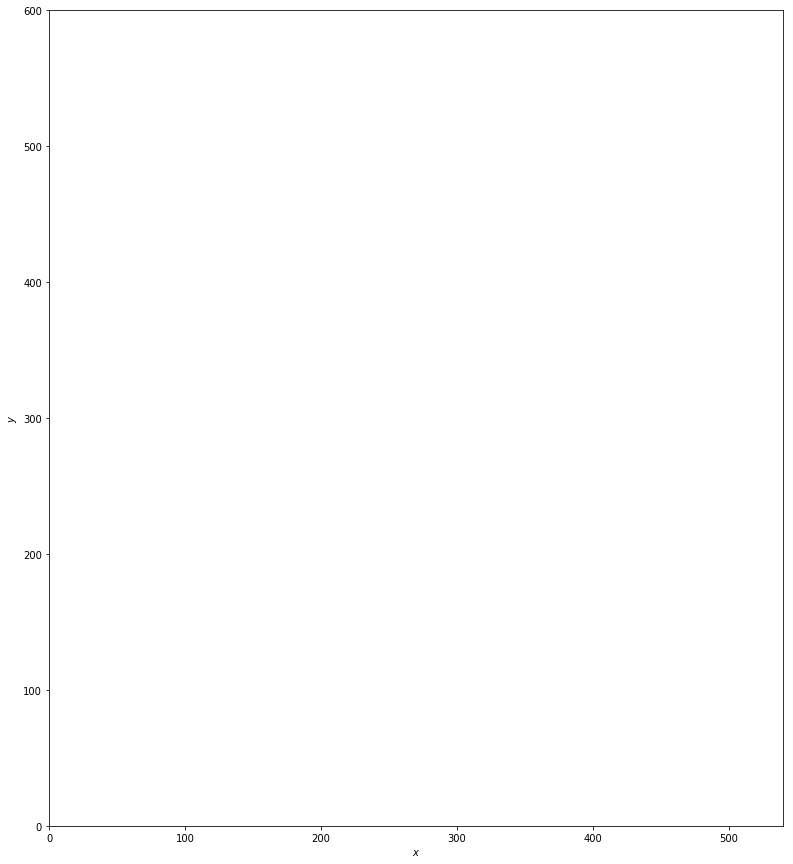

angle 0.0
move (3.0, 0.0)
1190.97897169 442.959393917
358


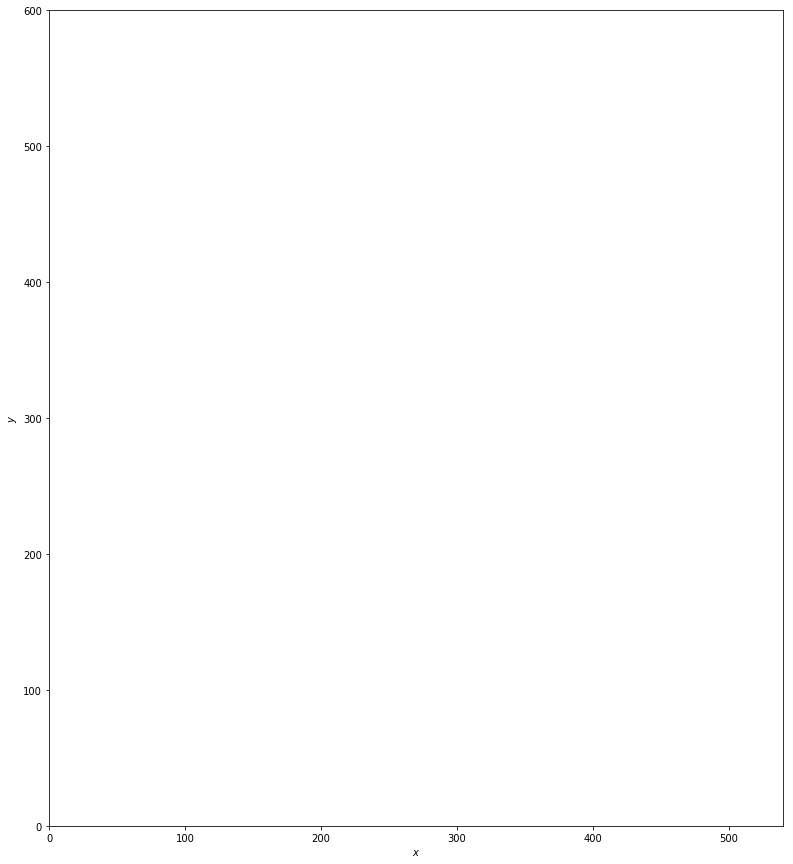

angle 0.0
move (3.0, 0.0)
1193.97897169 442.959393917
359


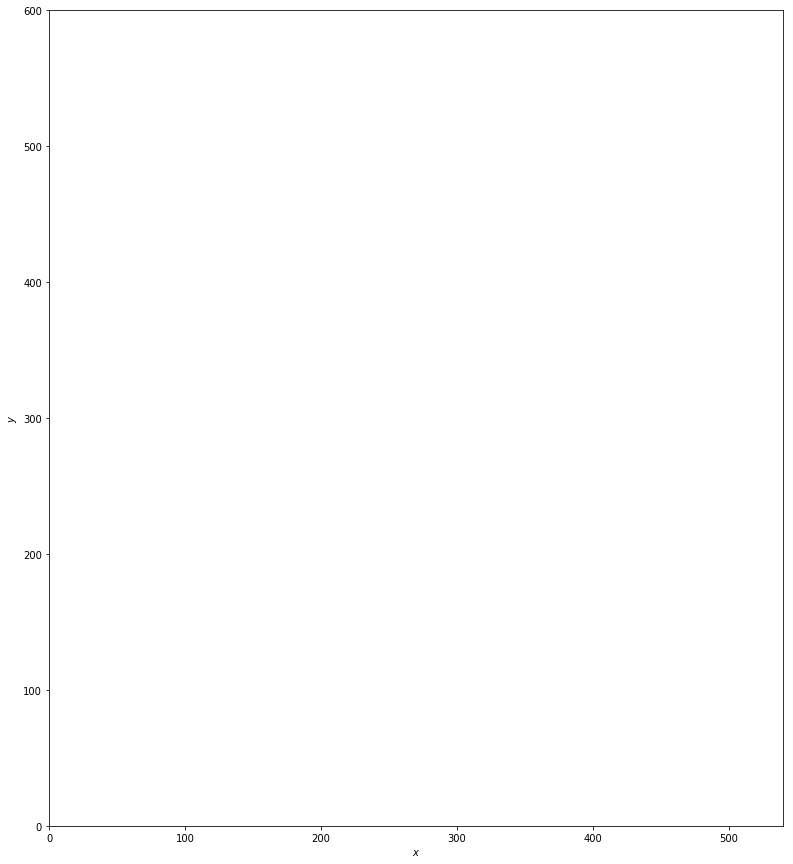

angle 0.0
move (3.0, 0.0)
1196.97897169 442.959393917
360


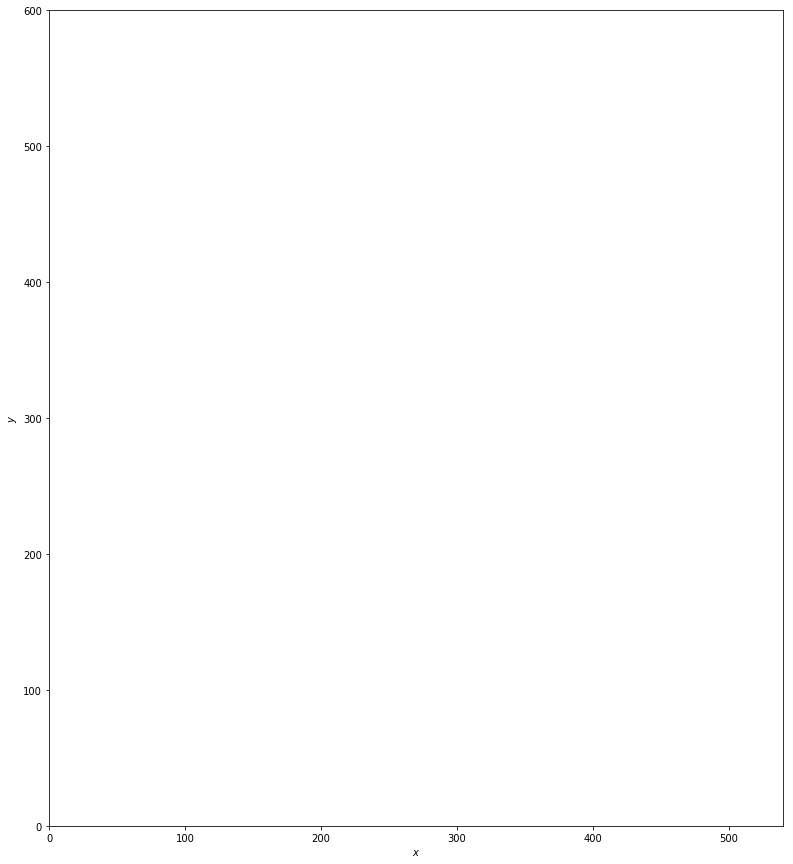

angle 0.0
move (3.0, 0.0)
1199.97897169 442.959393917
361


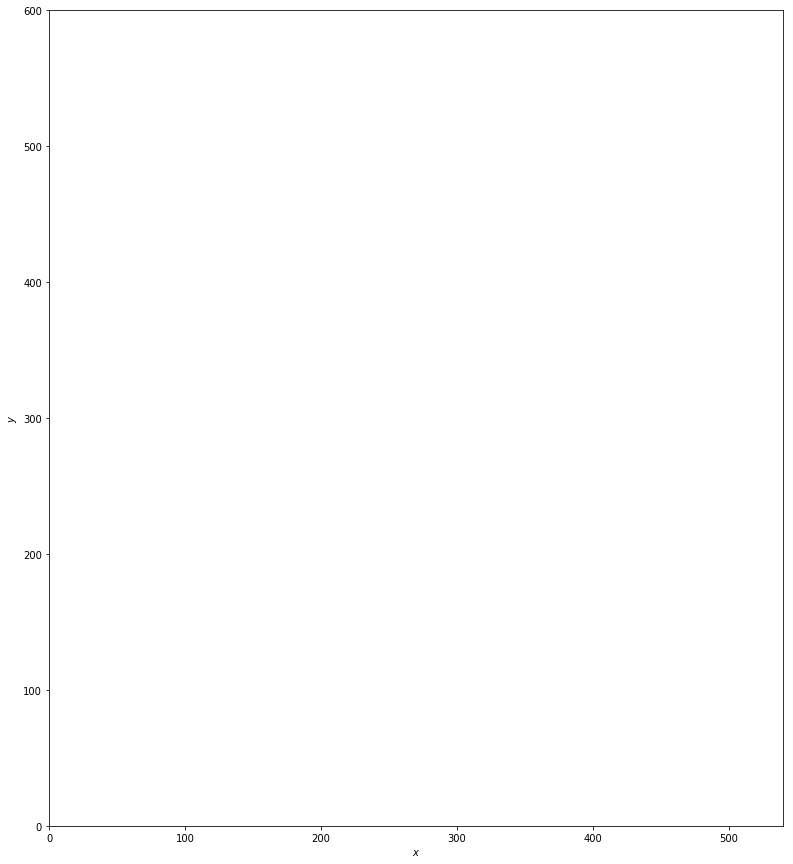

angle 0.0
move (3.0, 0.0)
1202.97897169 442.959393917
362


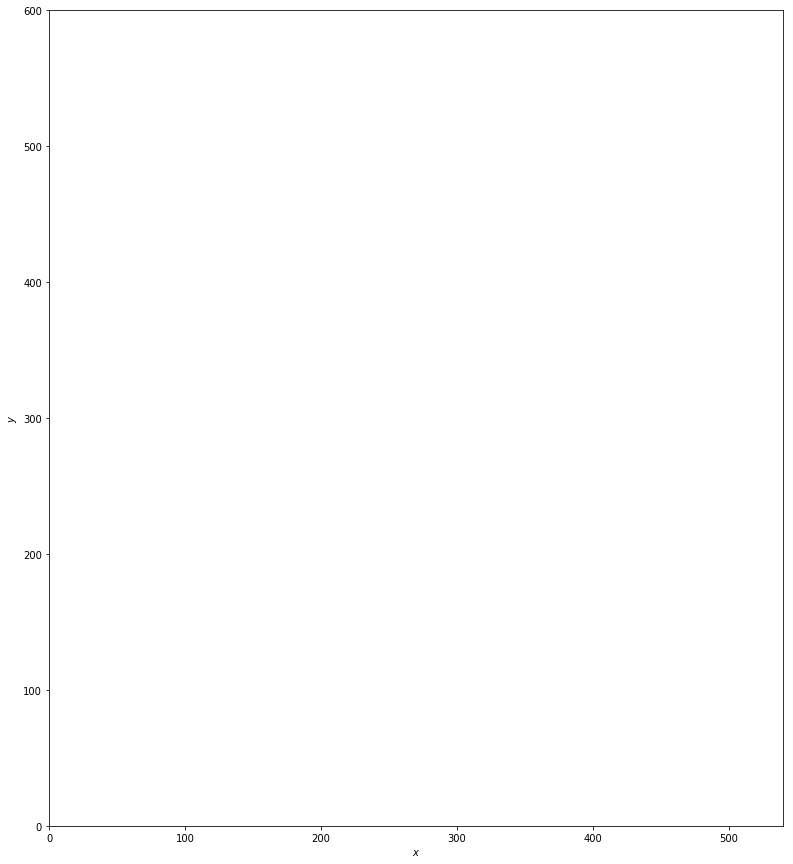

angle 0.0
move (3.0, 0.0)
1205.97897169 442.959393917
363


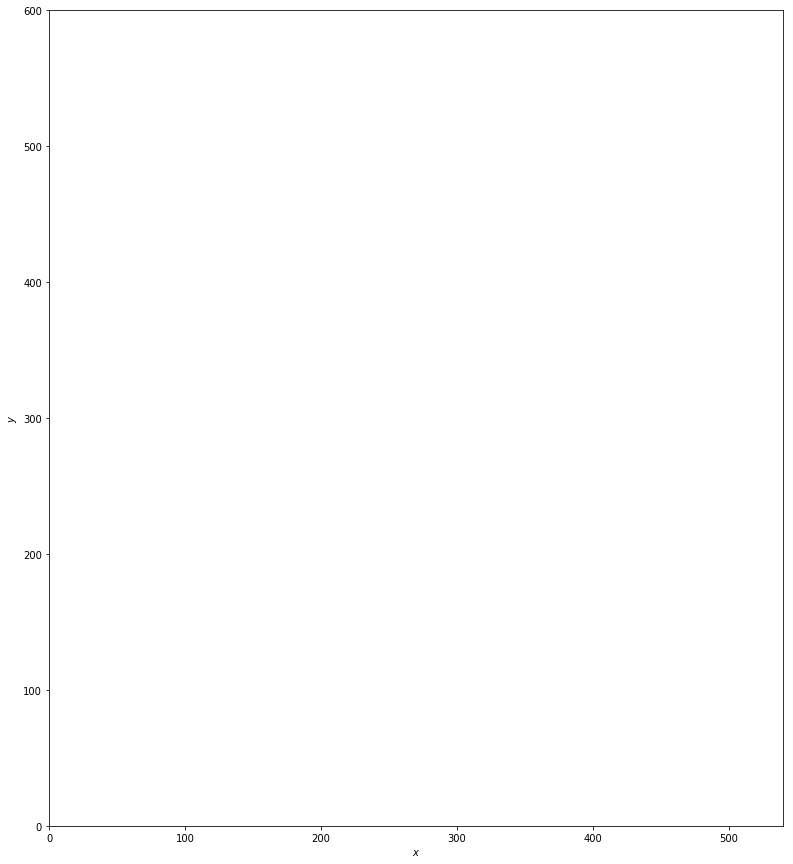

angle 0.0
move (3.0, 0.0)
1208.97897169 442.959393917
364


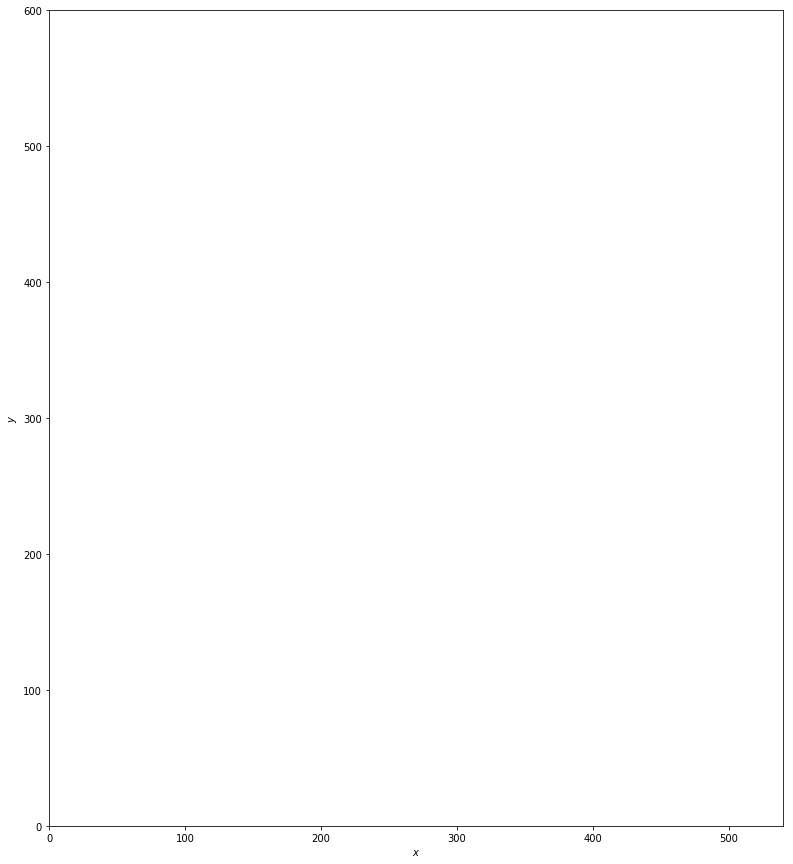

angle 0.0
move (3.0, 0.0)
1211.97897169 442.959393917
365


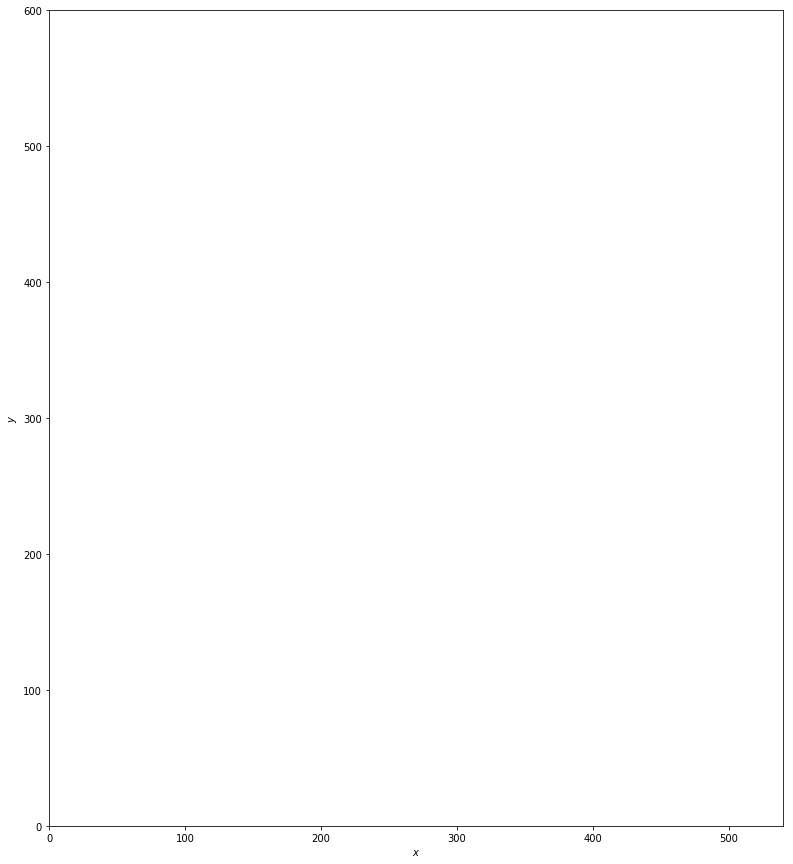

angle 0.0
move (3.0, 0.0)
1214.97897169 442.959393917
366


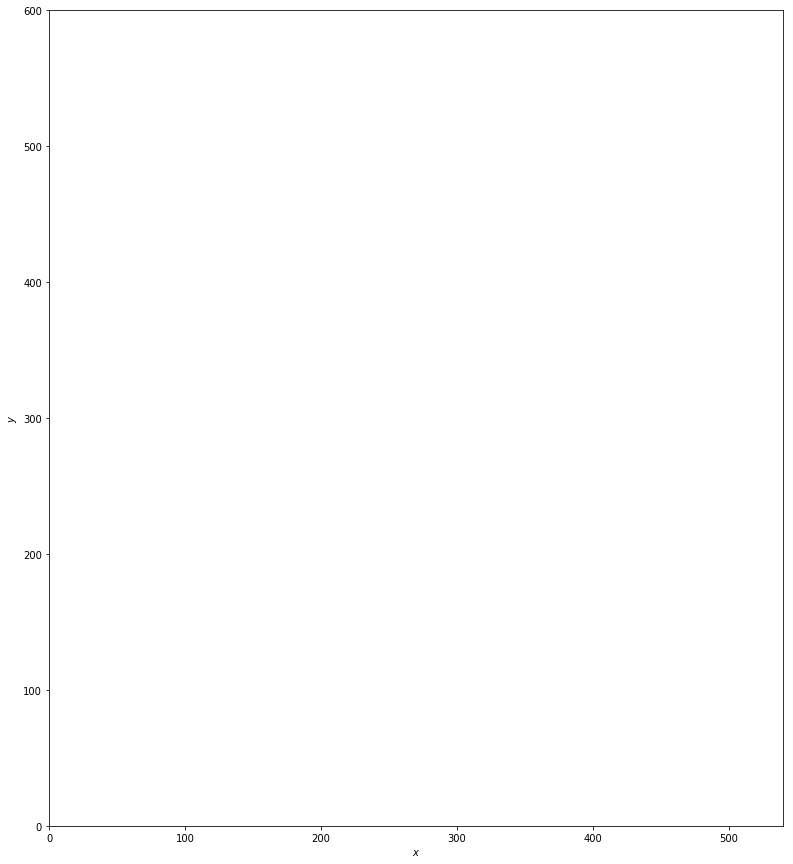

angle 0.0
move (3.0, 0.0)
1217.97897169 442.959393917
367


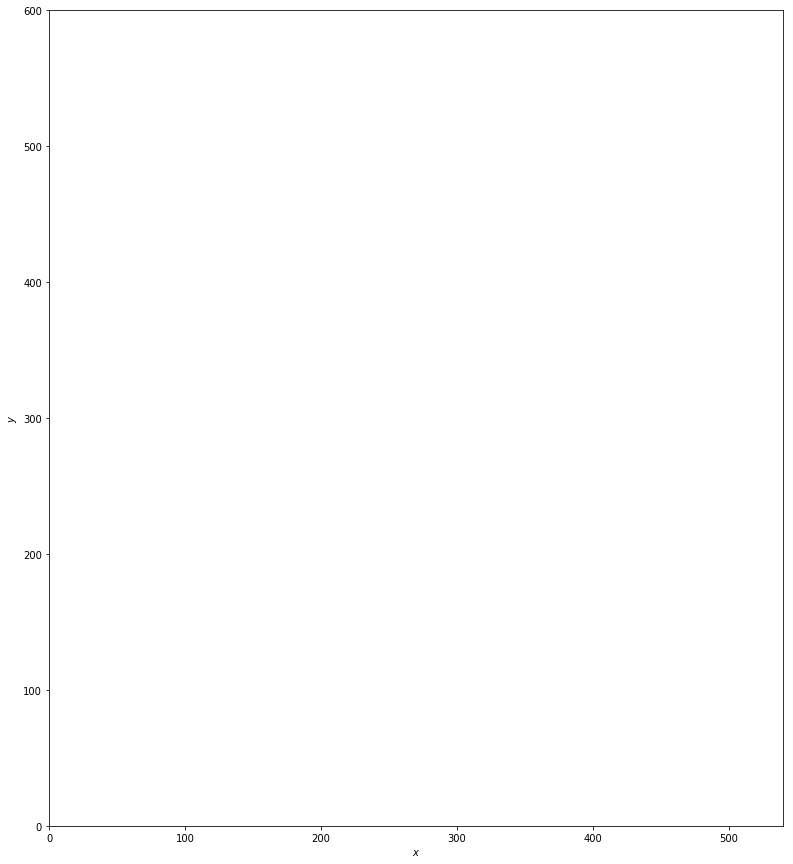

angle 0.0
move (3.0, 0.0)
1220.97897169 442.959393917
368


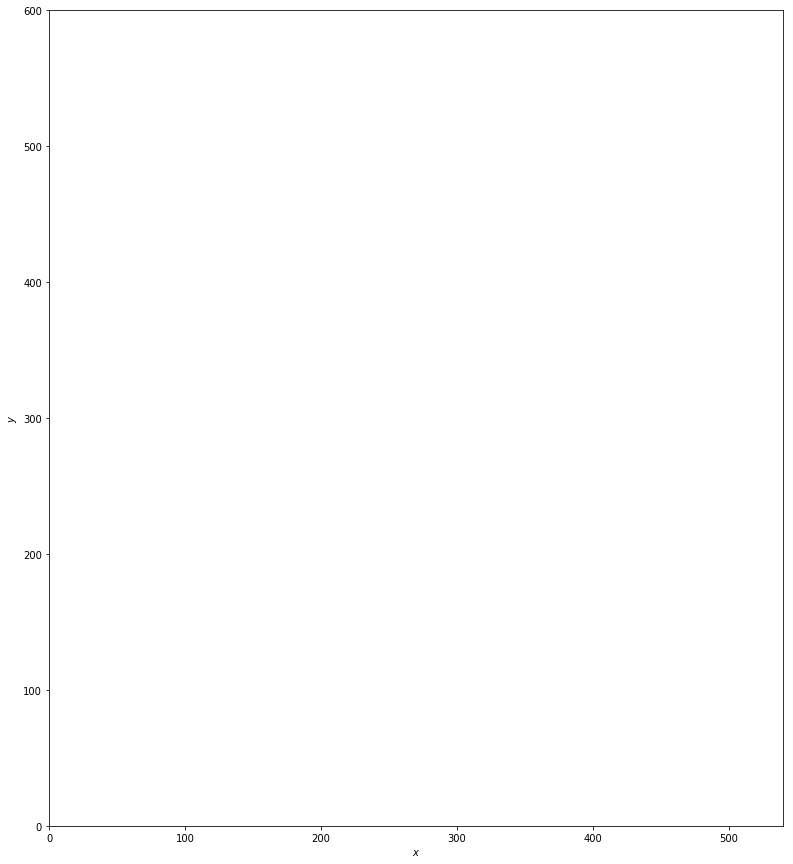

angle 0.0
move (3.0, 0.0)
1223.97897169 442.959393917
369


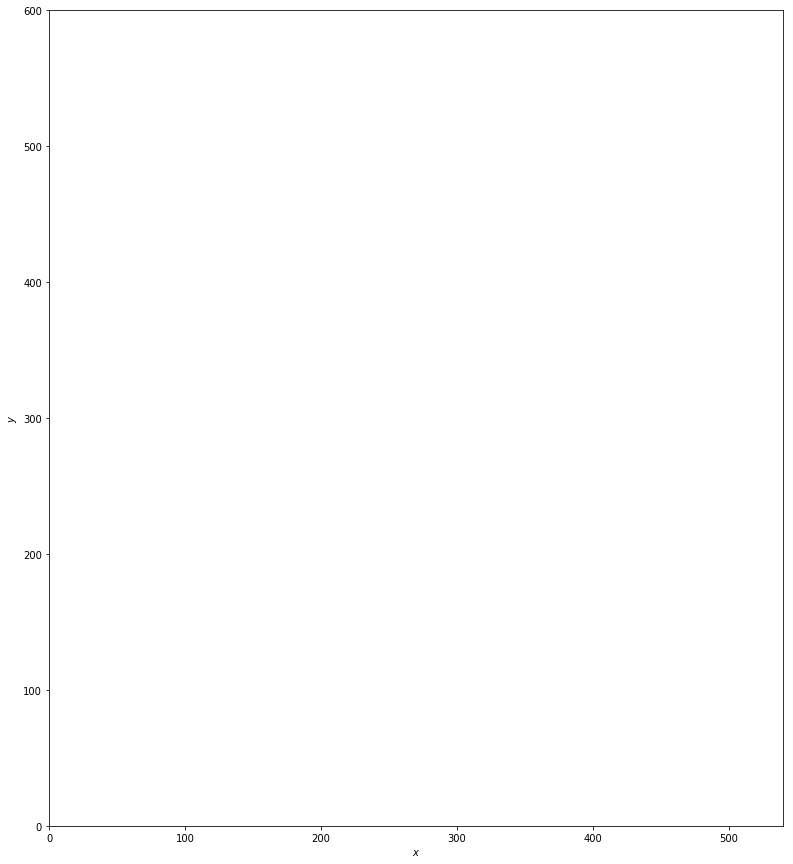

angle 0.0
move (3.0, 0.0)
1226.97897169 442.959393917
370


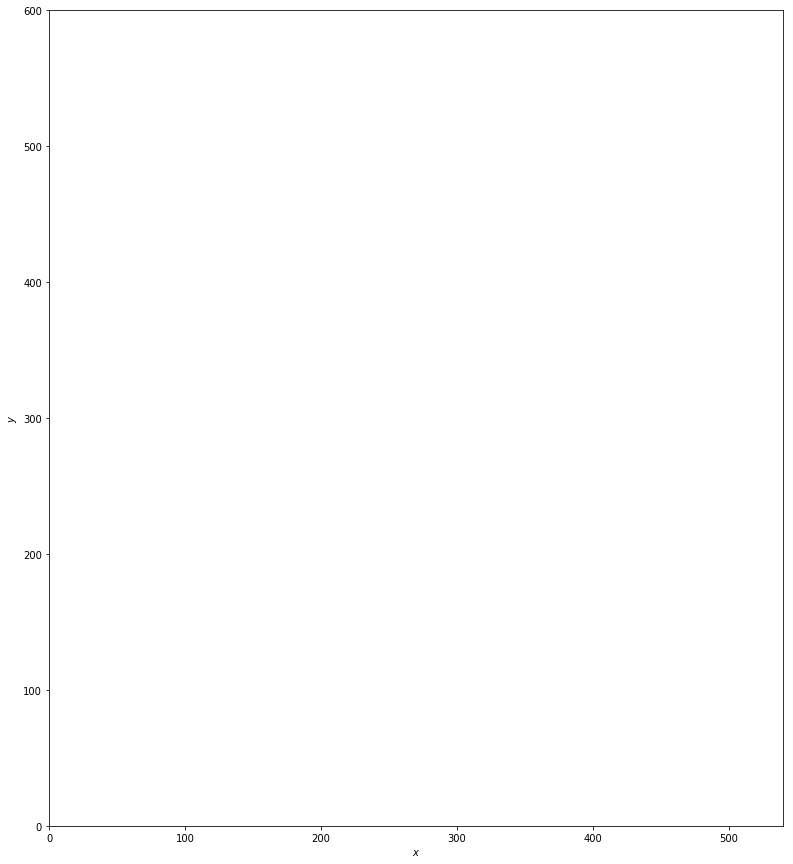

angle 0.0
move (3.0, 0.0)
1229.97897169 442.959393917
371


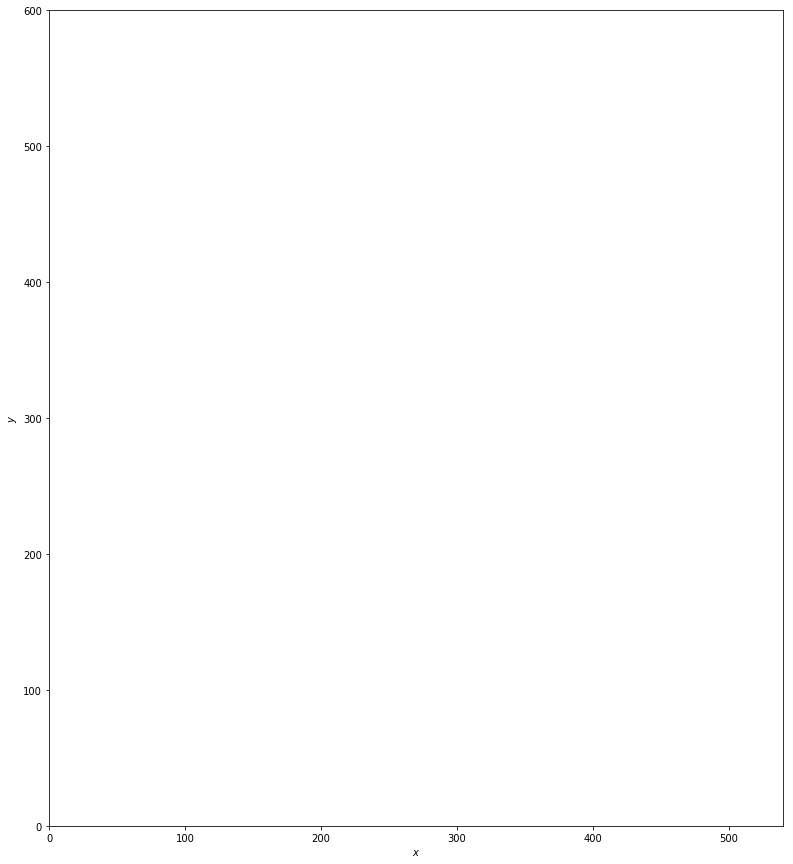

angle 0.0
move (3.0, 0.0)
1232.97897169 442.959393917
372


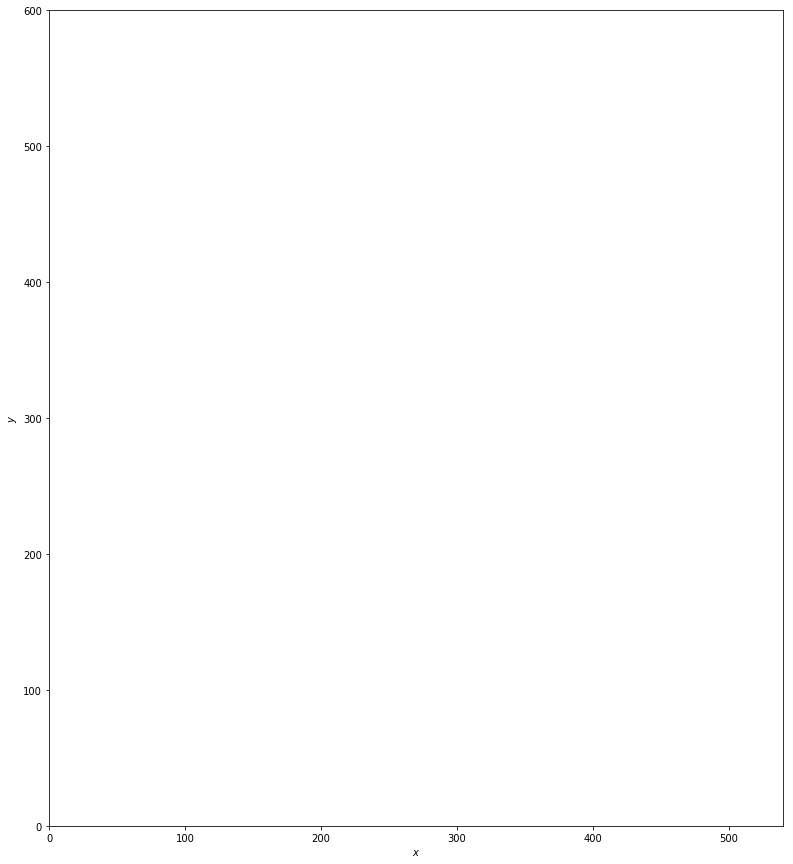

angle 0.0
move (3.0, 0.0)
1235.97897169 442.959393917
373


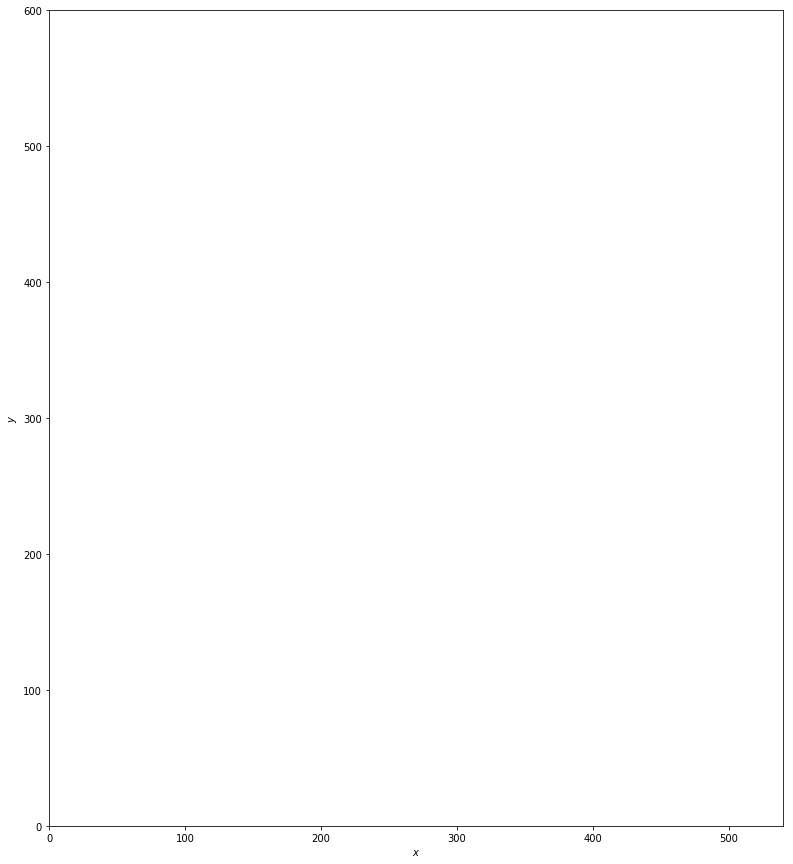

angle 0.0
move (3.0, 0.0)
1238.97897169 442.959393917
374


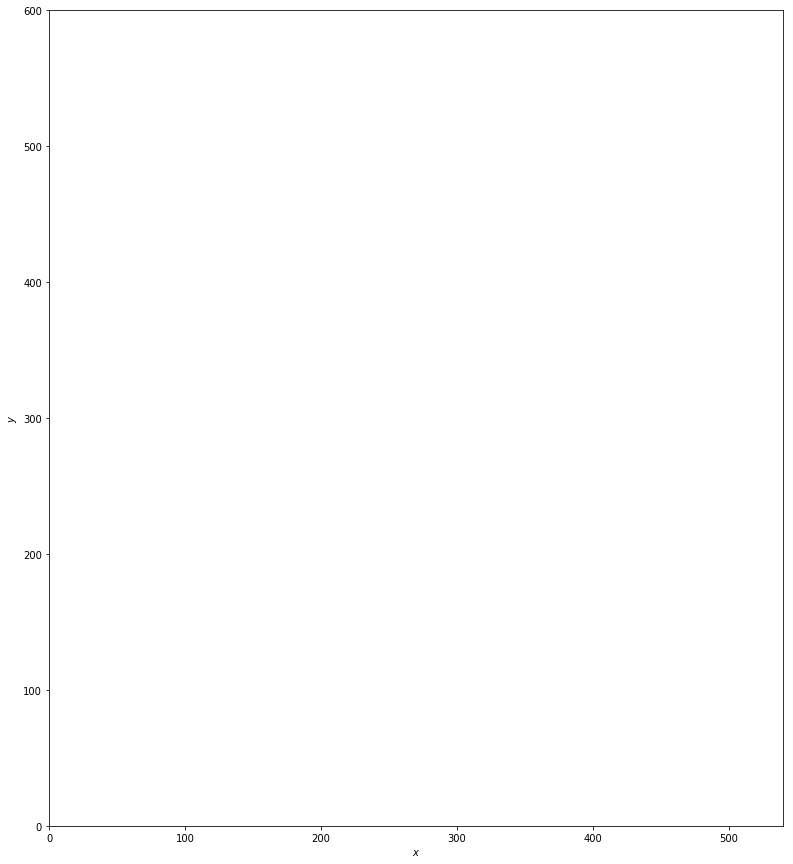

angle 0.0
move (3.0, 0.0)
1241.97897169 442.959393917
375


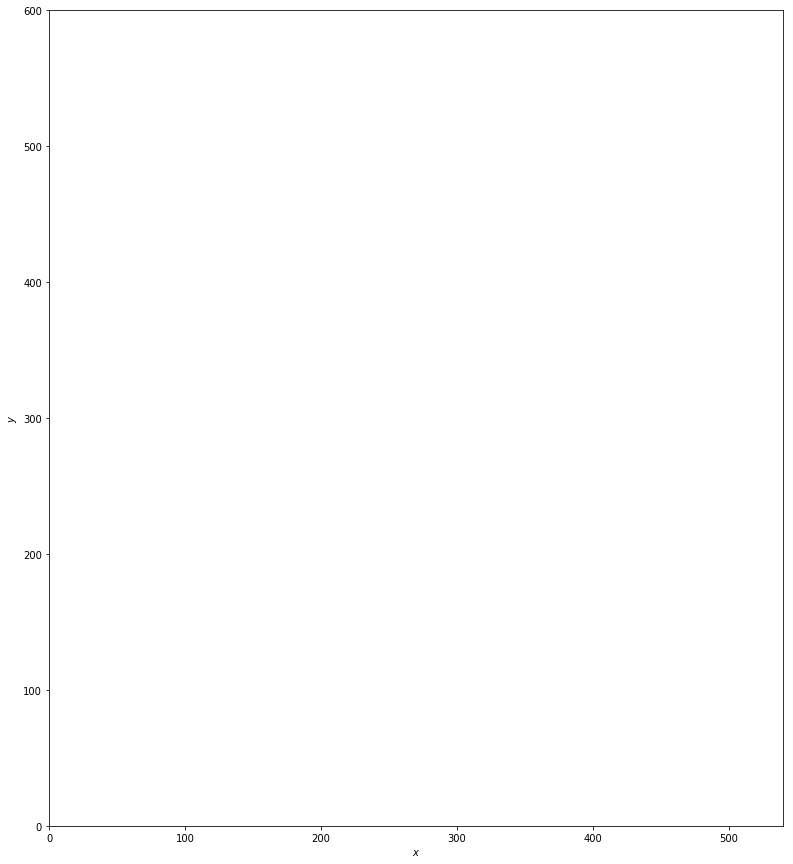

angle 0.0
move (3.0, 0.0)
1244.97897169 442.959393917
376


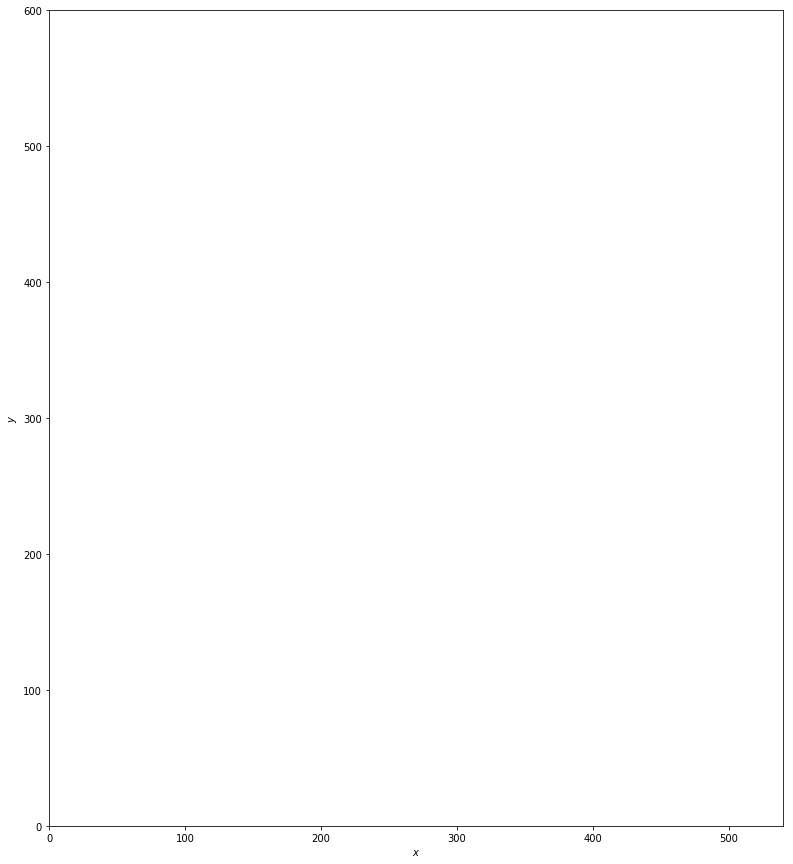

angle 0.0
move (3.0, 0.0)
1247.97897169 442.959393917
377


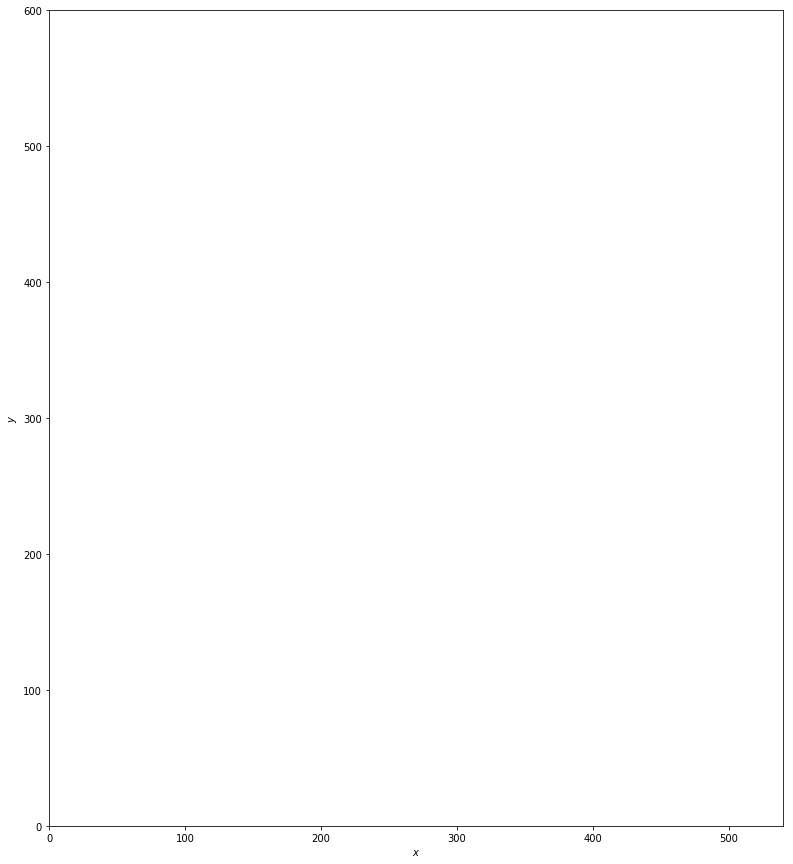

angle 0.0
move (3.0, 0.0)
1250.97897169 442.959393917
378


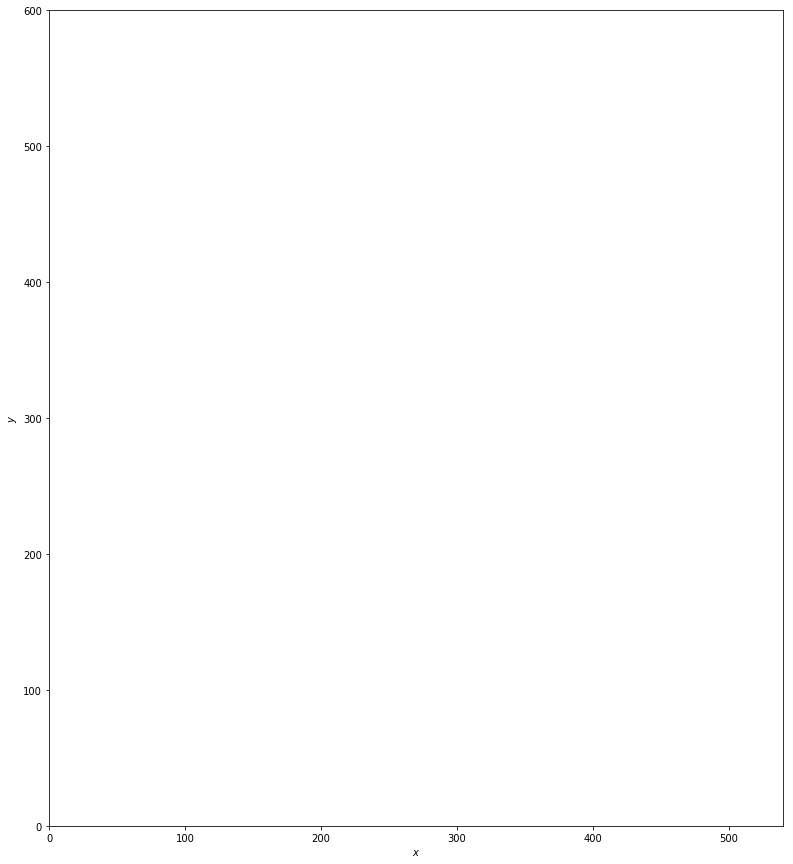

angle 0.0
move (3.0, 0.0)
1253.97897169 442.959393917
379


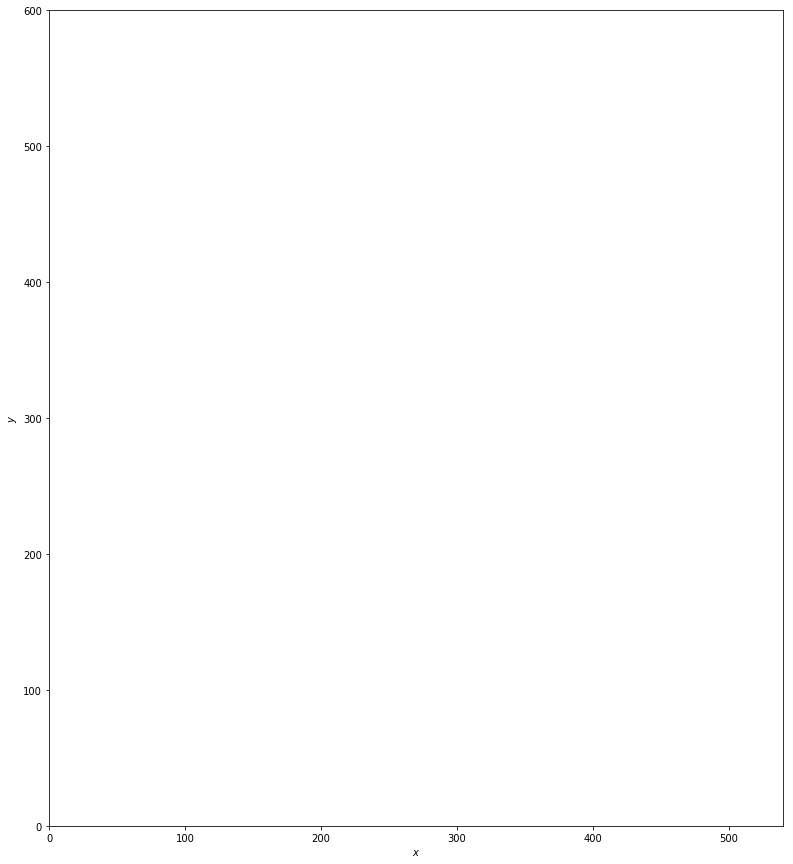

angle 0.0
move (3.0, 0.0)
1256.97897169 442.959393917
380


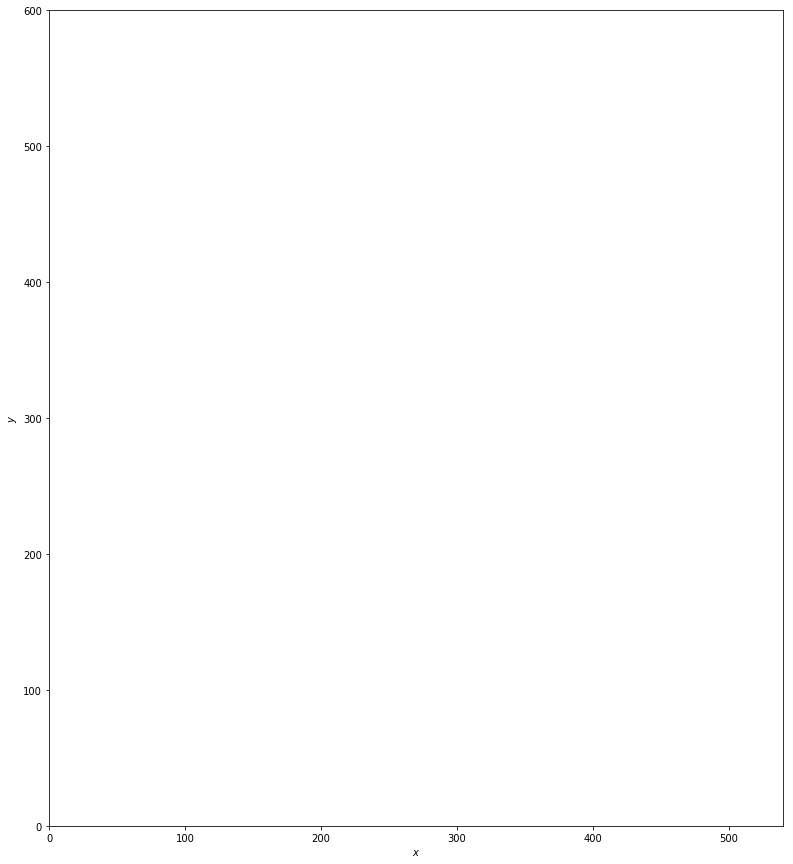

angle 0.0
move (3.0, 0.0)
1259.97897169 442.959393917
381


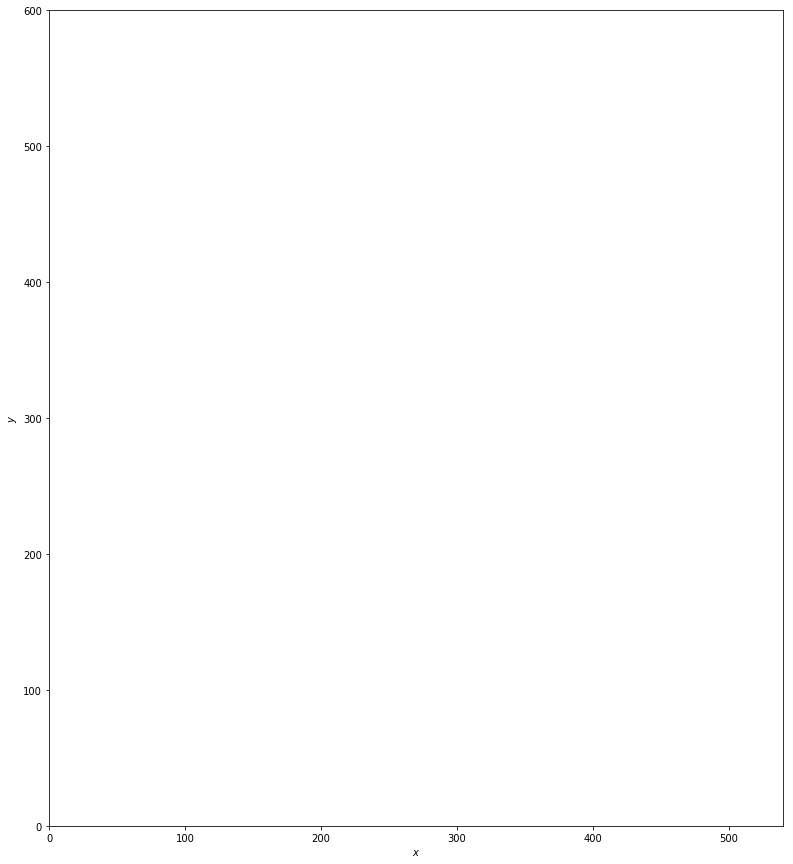

angle 0.0
move (3.0, 0.0)
1262.97897169 442.959393917
382


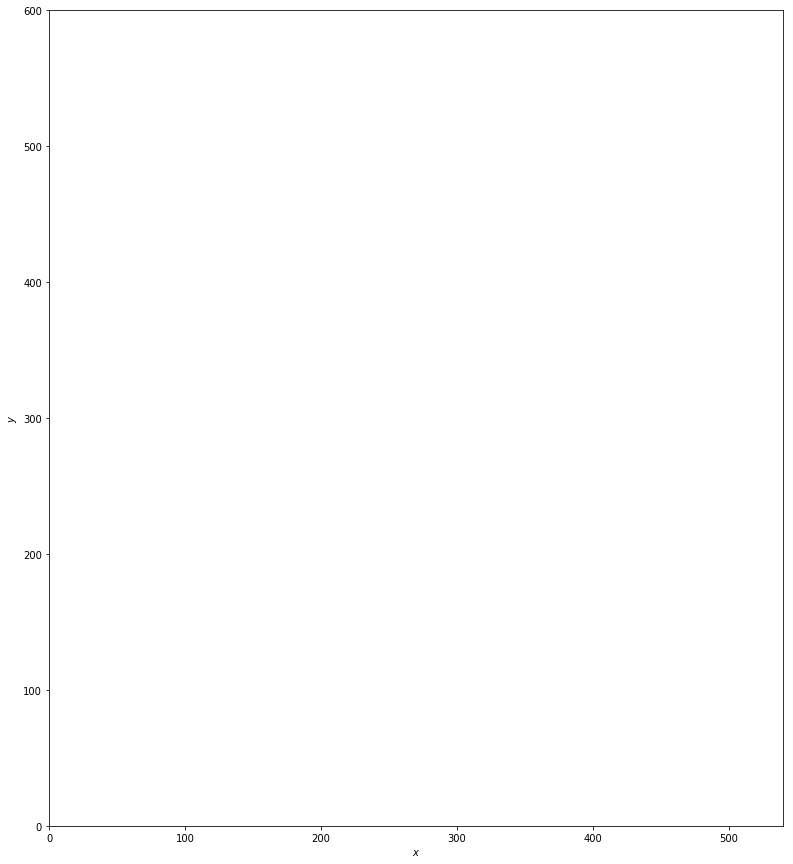

angle 0.0
move (3.0, 0.0)
1265.97897169 442.959393917
383


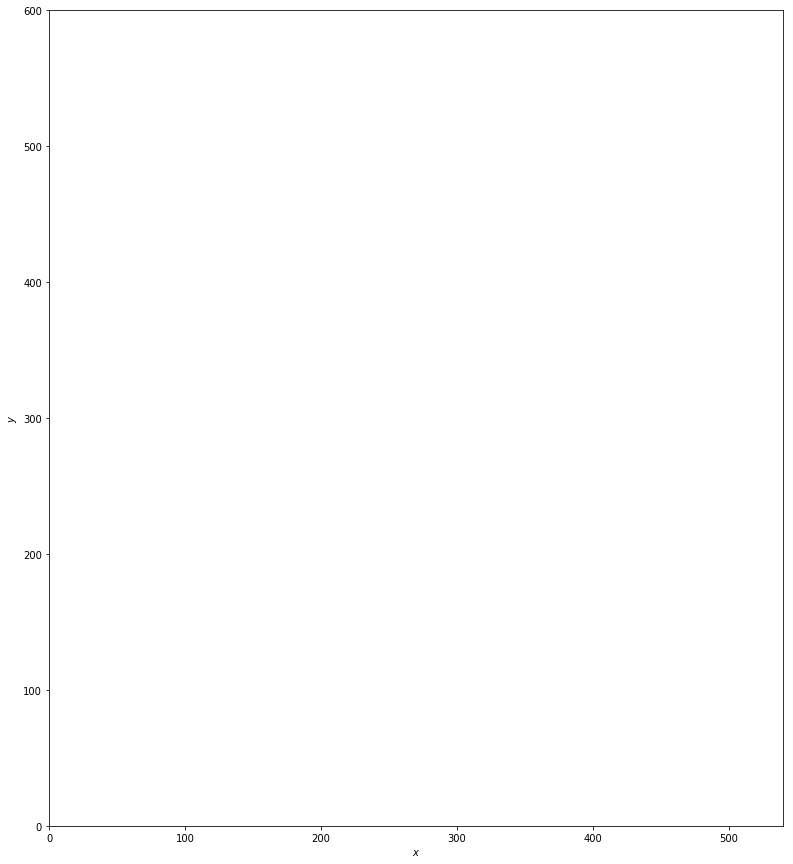

angle 0.0
move (3.0, 0.0)
1268.97897169 442.959393917
384


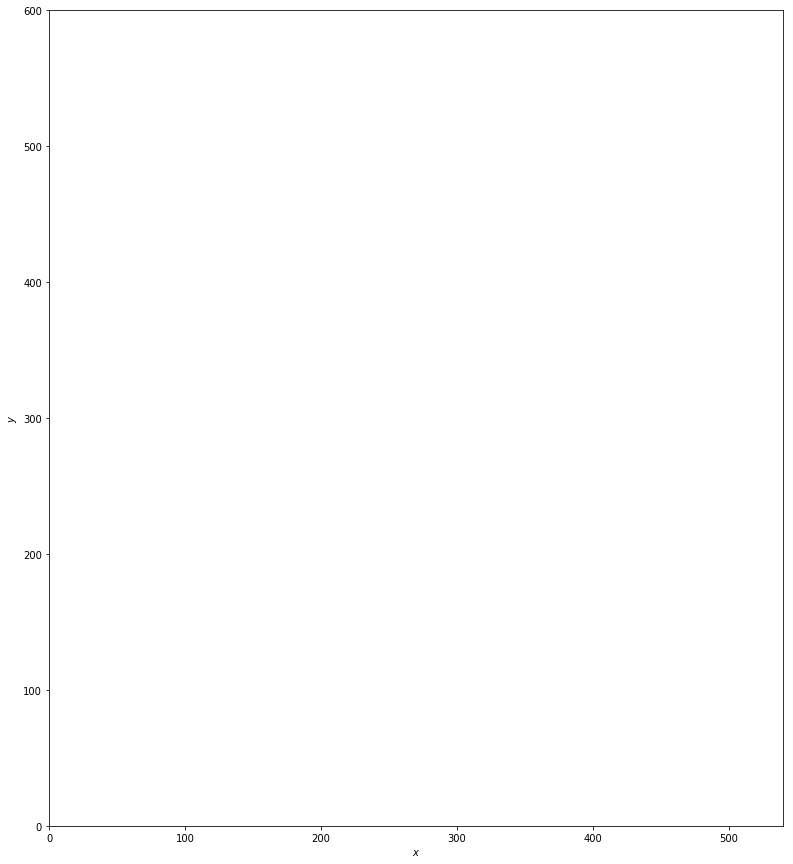

angle 0.0
move (3.0, 0.0)
1271.97897169 442.959393917
385


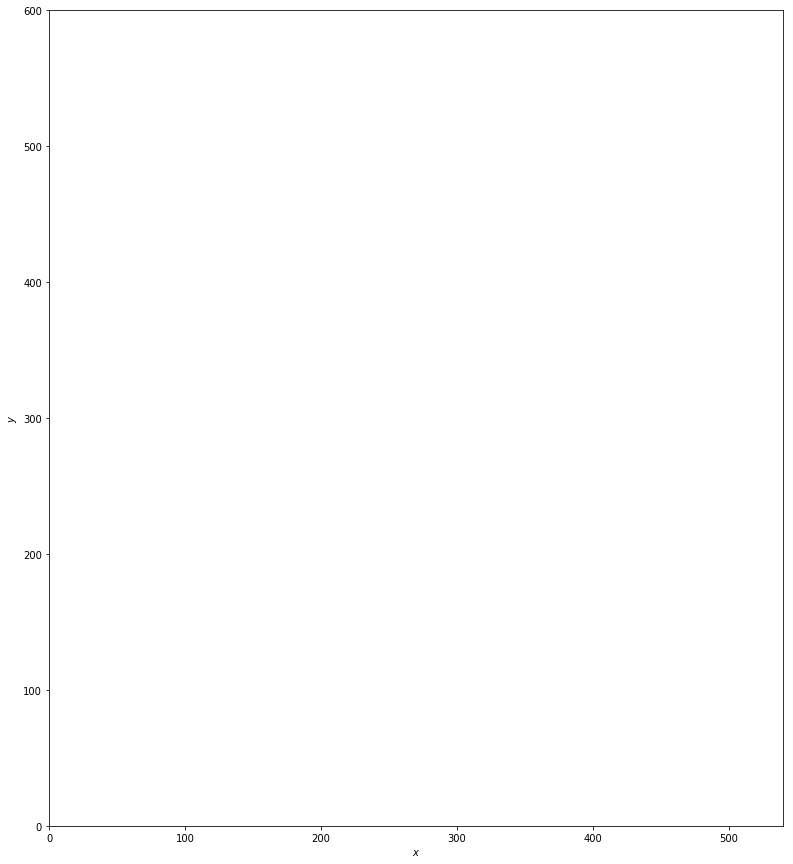

angle 0.0
move (3.0, 0.0)
1274.97897169 442.959393917
386


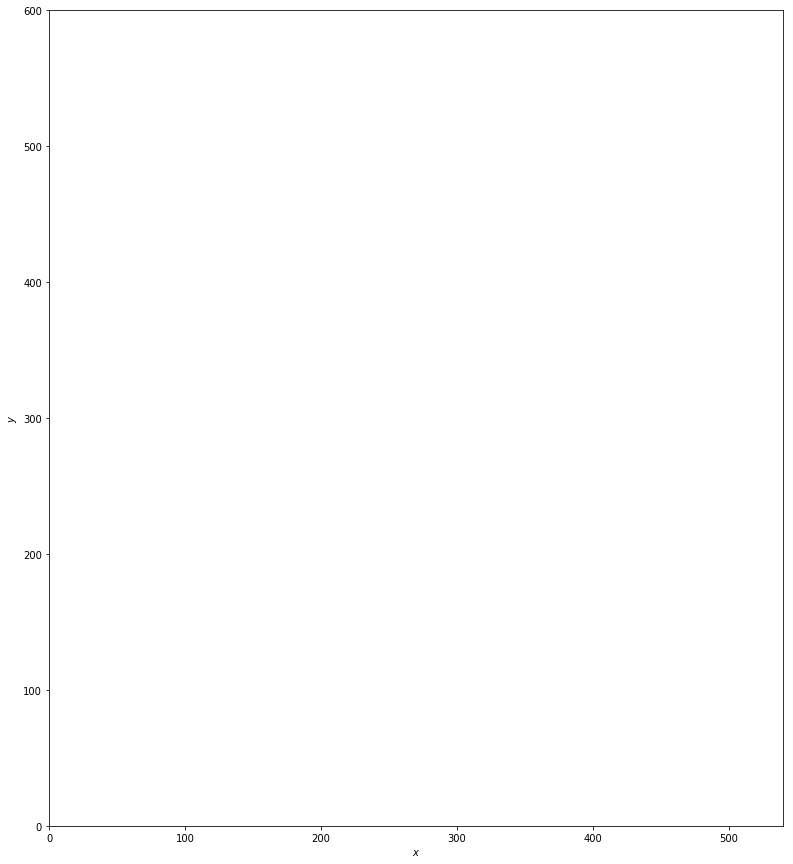

angle 0.0
move (3.0, 0.0)
1277.97897169 442.959393917
387


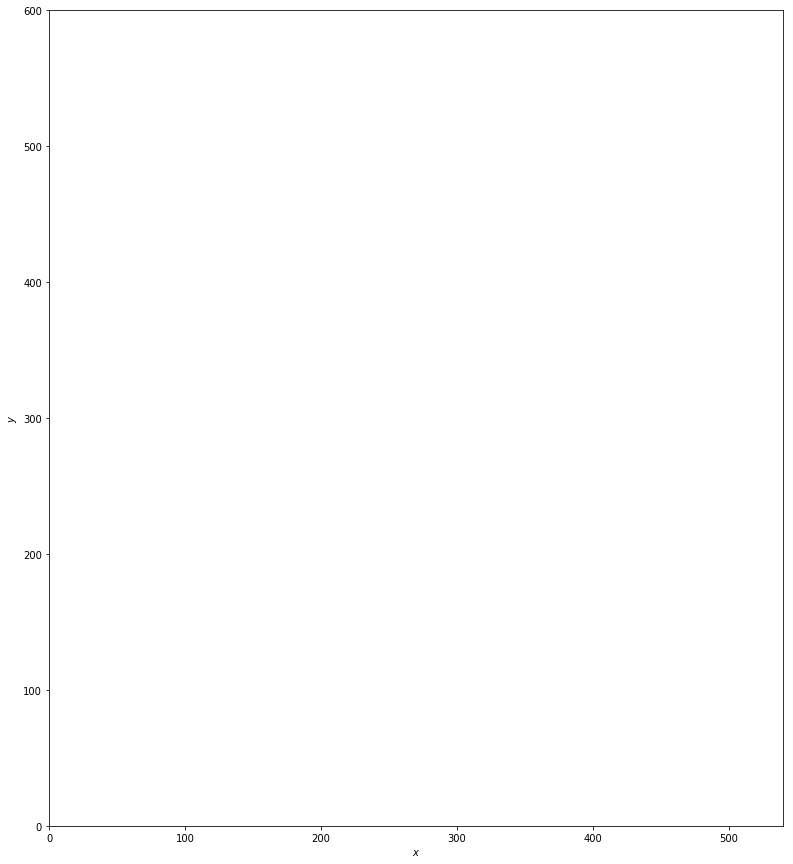

angle 0.0
move (3.0, 0.0)
1280.97897169 442.959393917
388


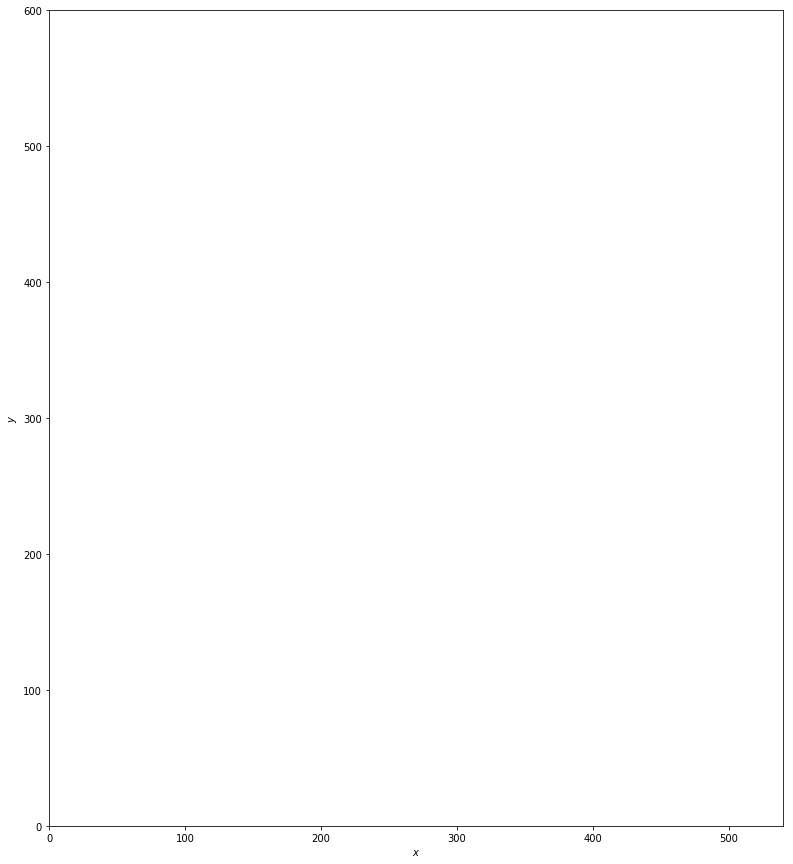

angle 0.0
move (3.0, 0.0)
1283.97897169 442.959393917
389


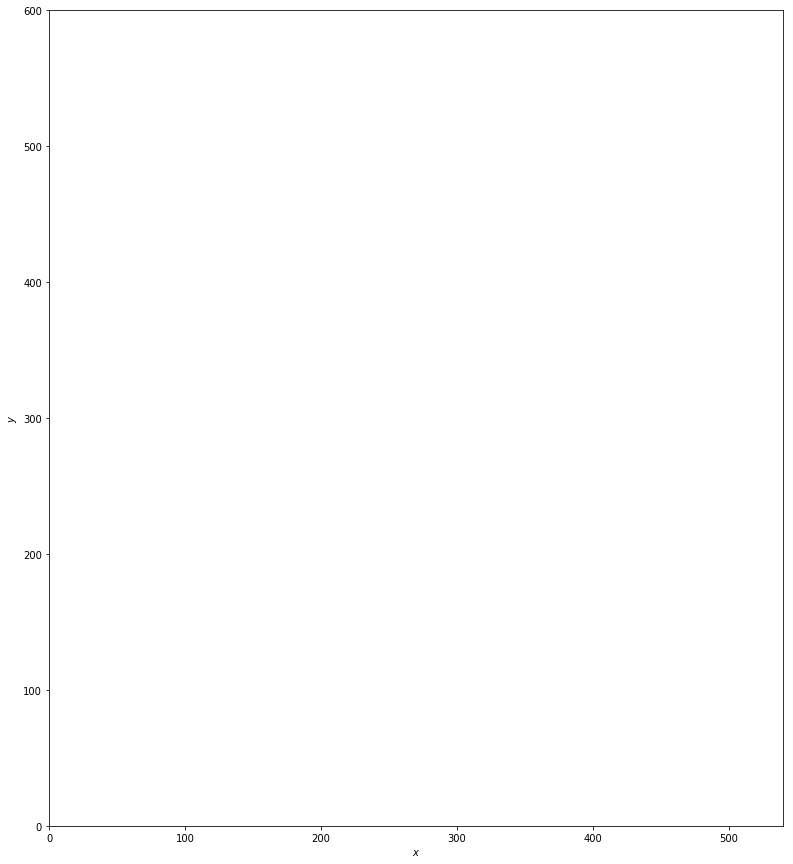

angle 0.0
move (3.0, 0.0)
1286.97897169 442.959393917
390


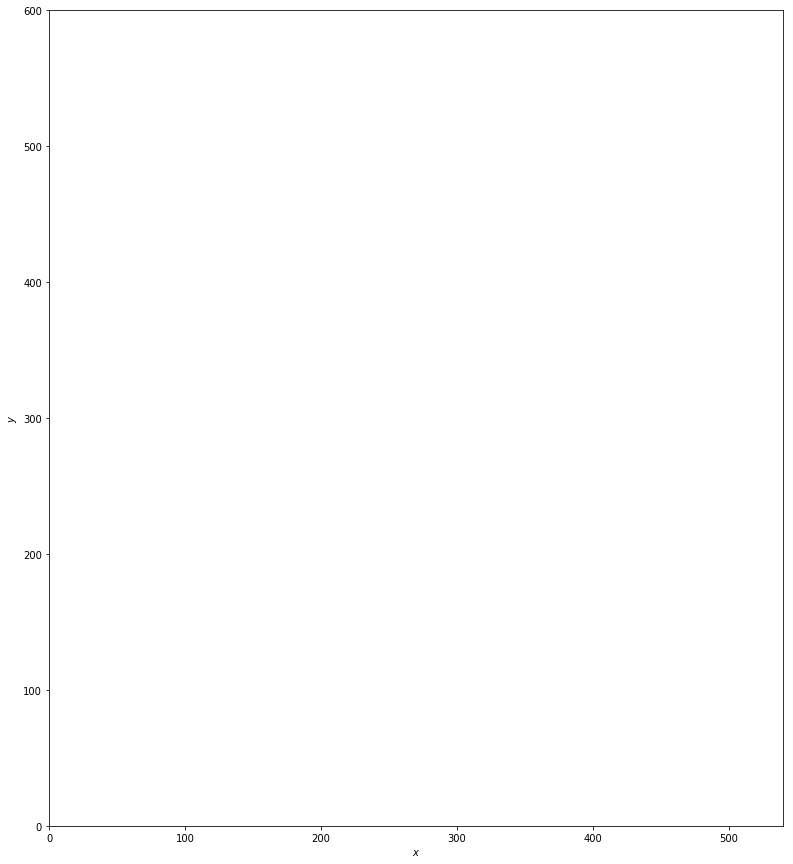

angle 0.0
move (3.0, 0.0)
1289.97897169 442.959393917
391


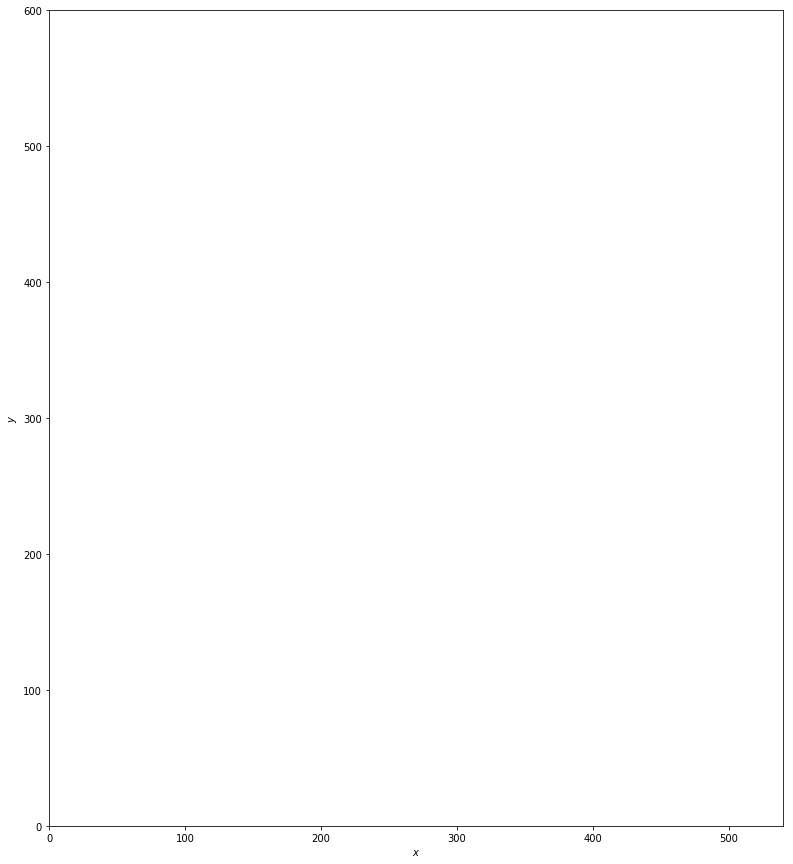

angle 0.0
move (3.0, 0.0)
1292.97897169 442.959393917
392


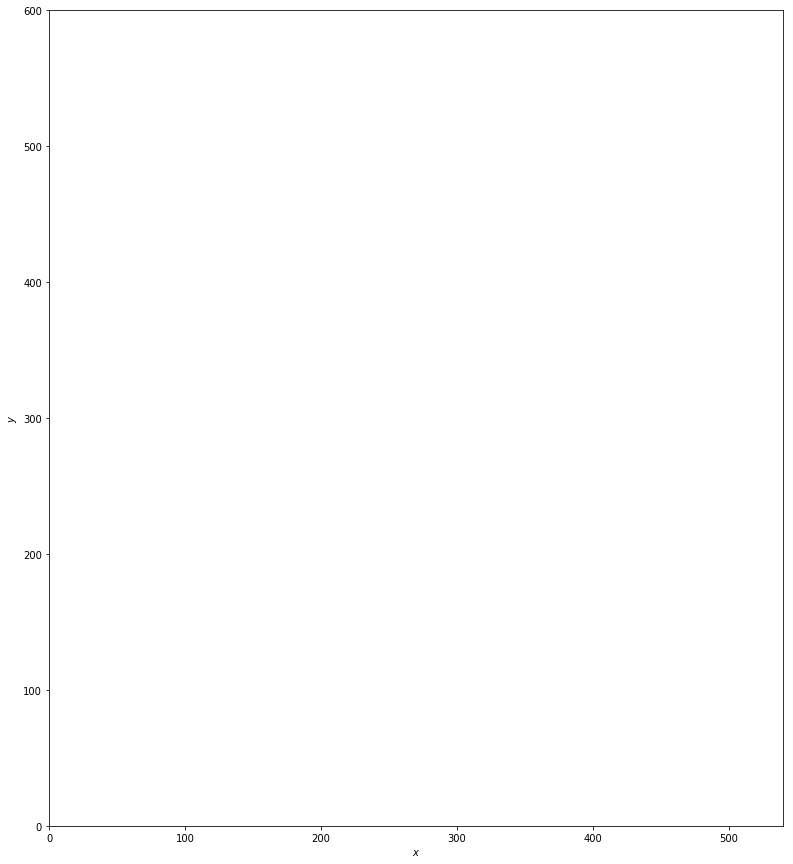

angle 0.0
move (3.0, 0.0)
1295.97897169 442.959393917
393


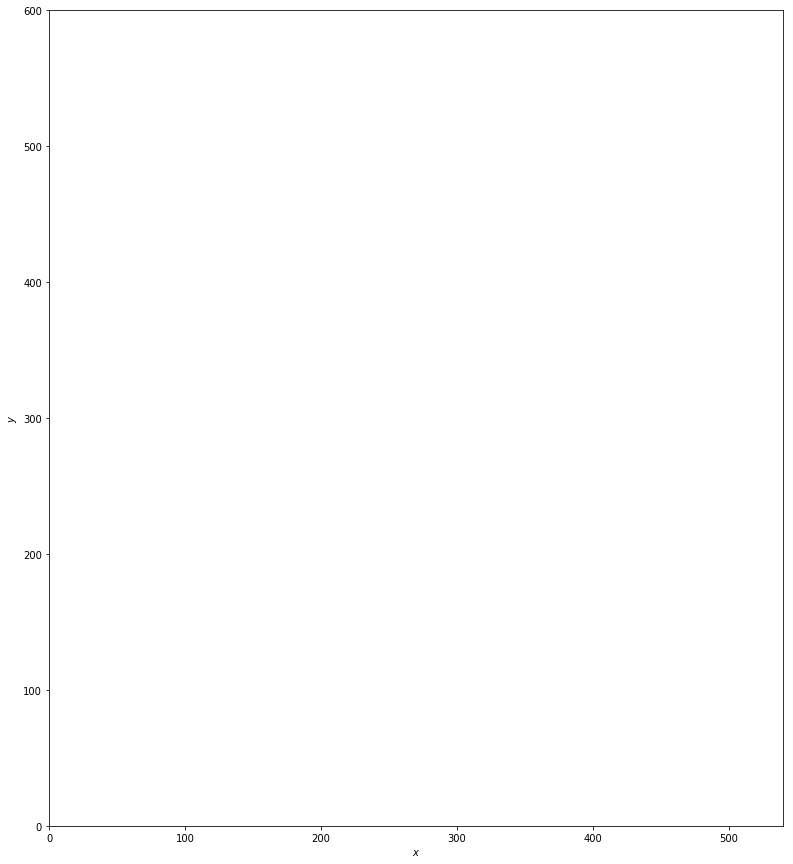

angle 0.0
move (3.0, 0.0)
1298.97897169 442.959393917
394


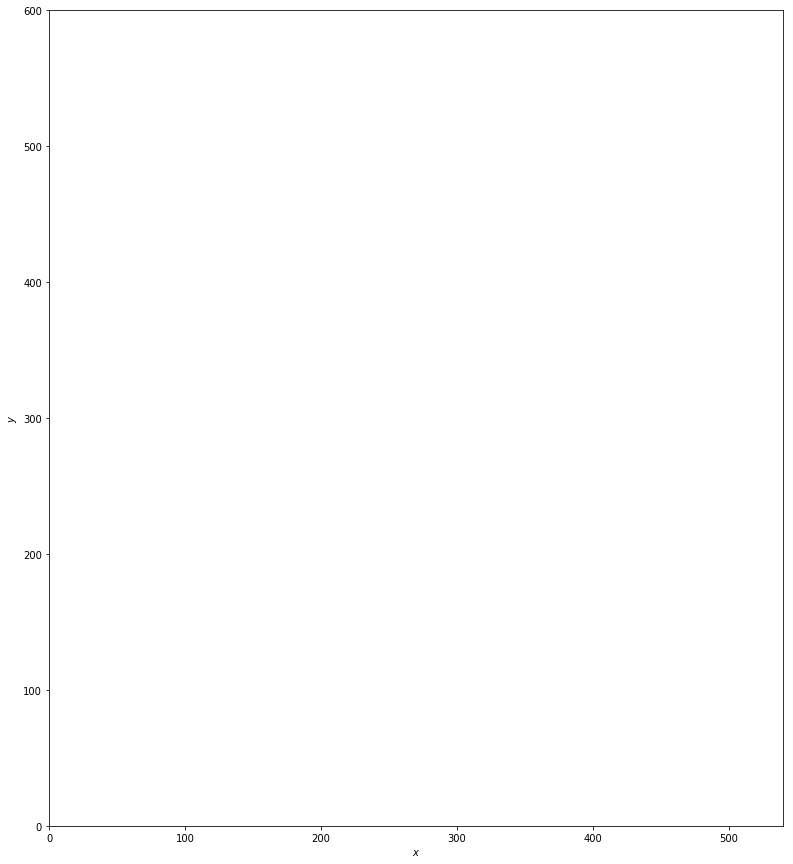

angle 0.0
move (3.0, 0.0)
1301.97897169 442.959393917
395


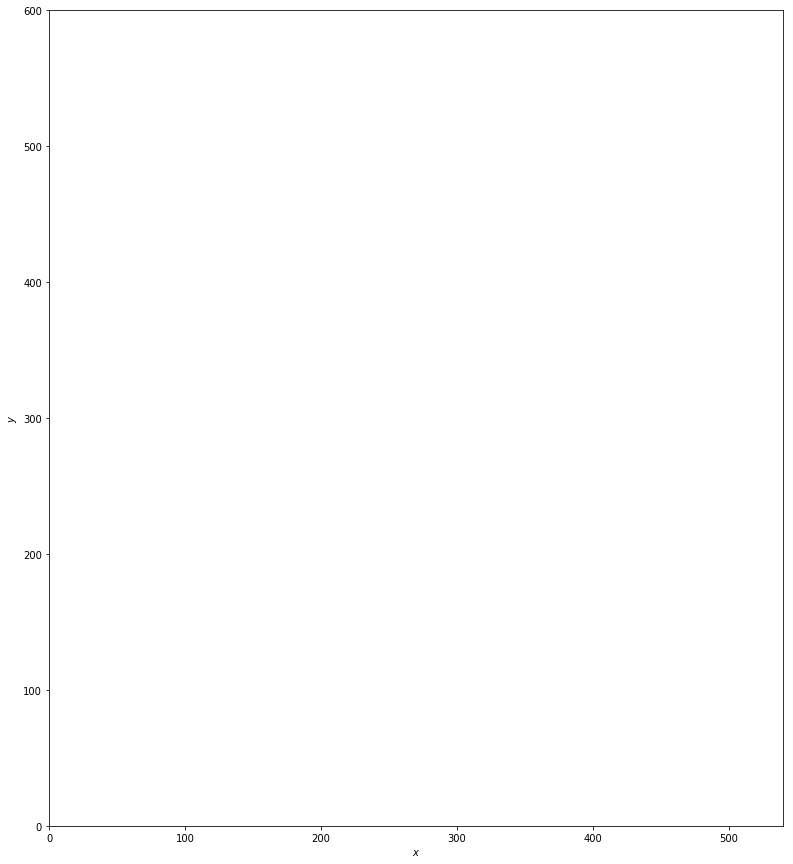

angle 0.0
move (3.0, 0.0)
1304.97897169 442.959393917
396


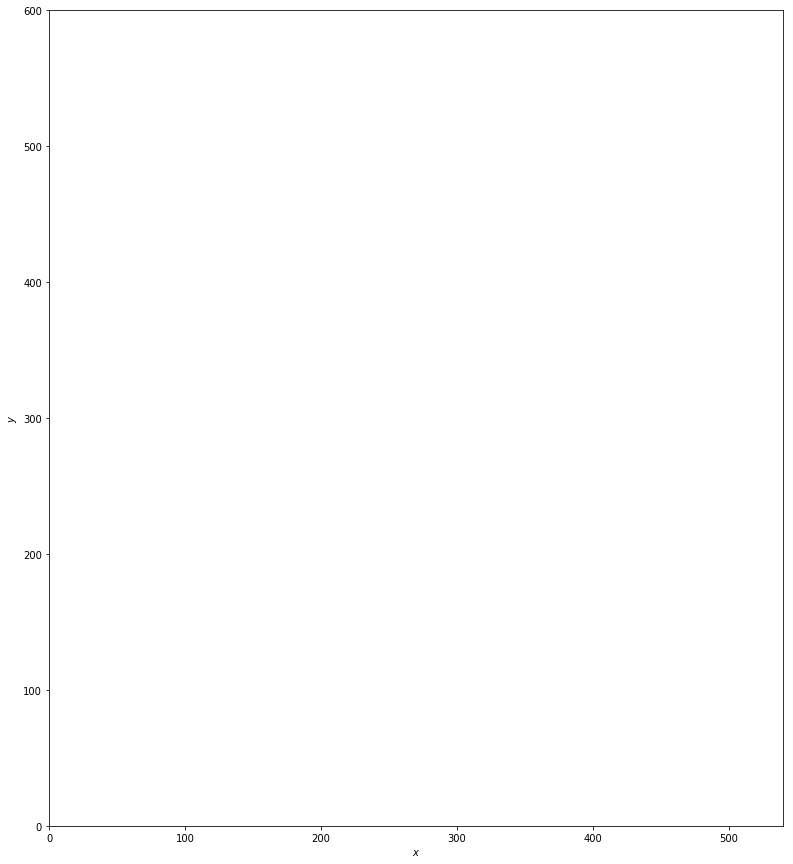

angle 0.0
move (3.0, 0.0)
1307.97897169 442.959393917
397


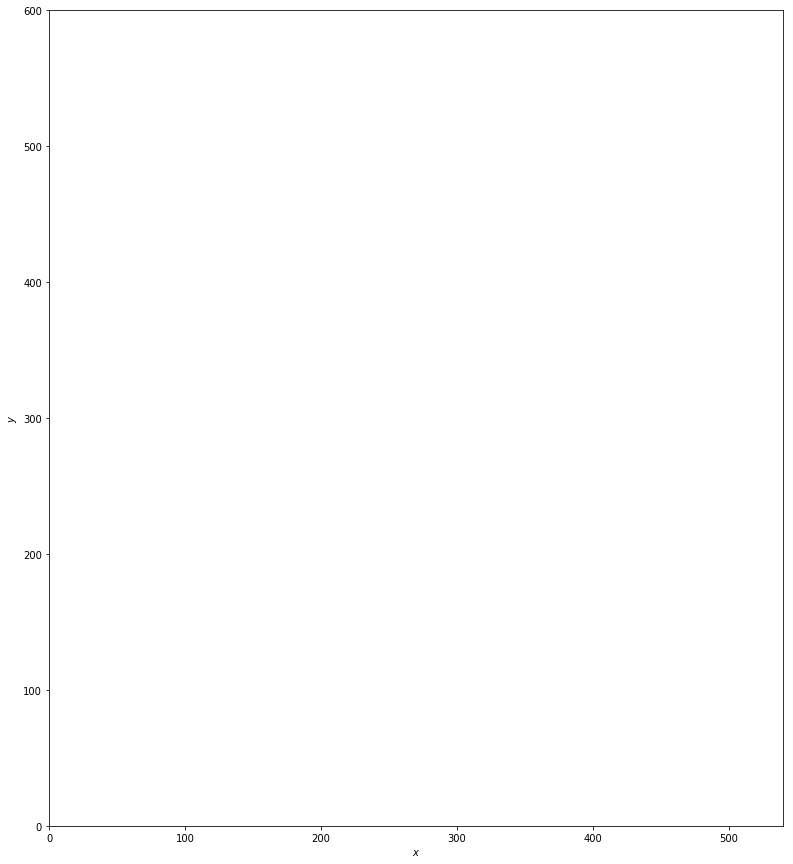

angle 0.0
move (3.0, 0.0)
1310.97897169 442.959393917
398


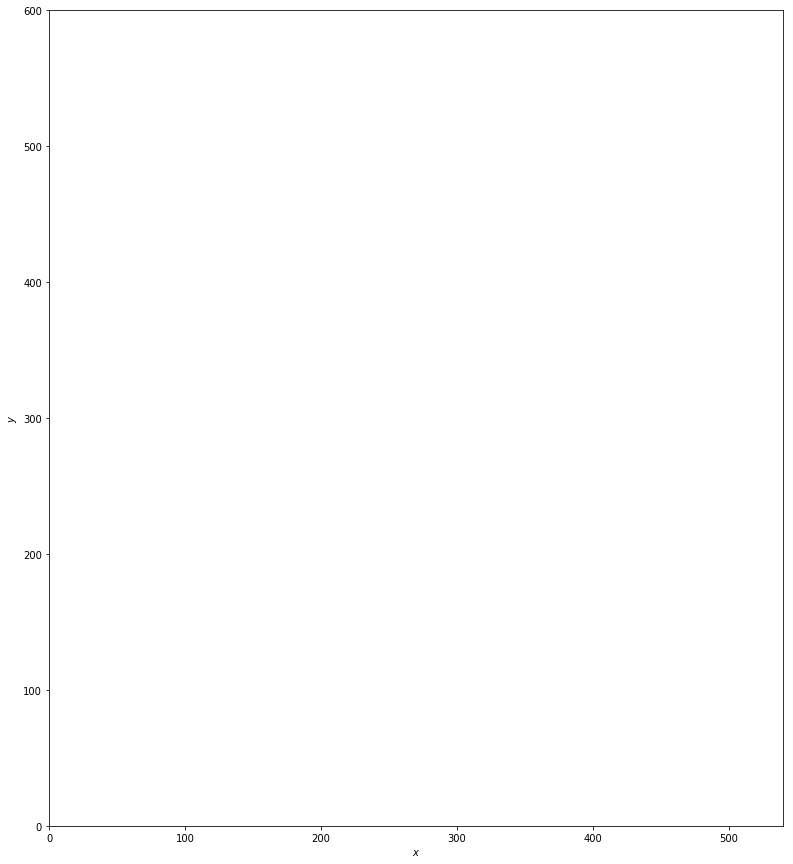

angle 0.0
move (3.0, 0.0)
1313.97897169 442.959393917
399


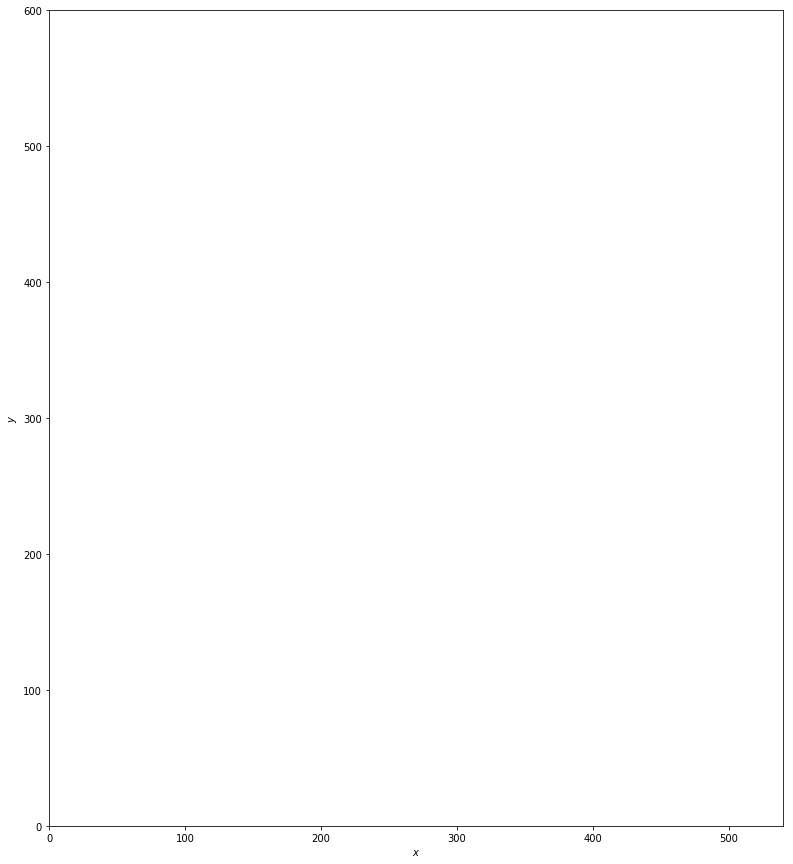

angle 0.0
move (3.0, 0.0)
1316.97897169 442.959393917
400


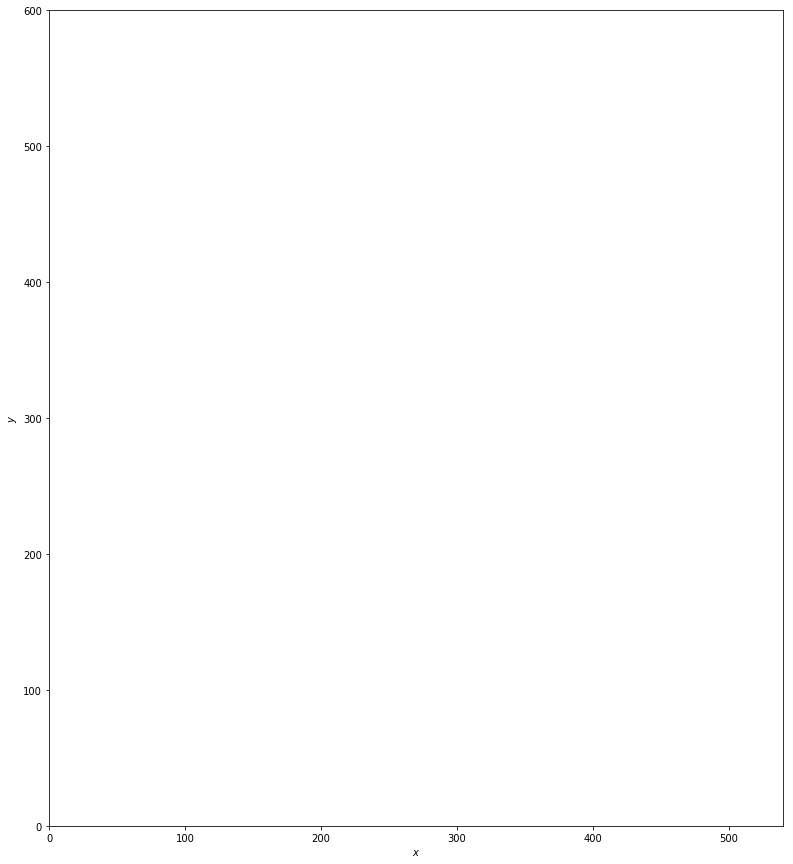

angle 0.0
move (3.0, 0.0)
1319.97897169 442.959393917
401


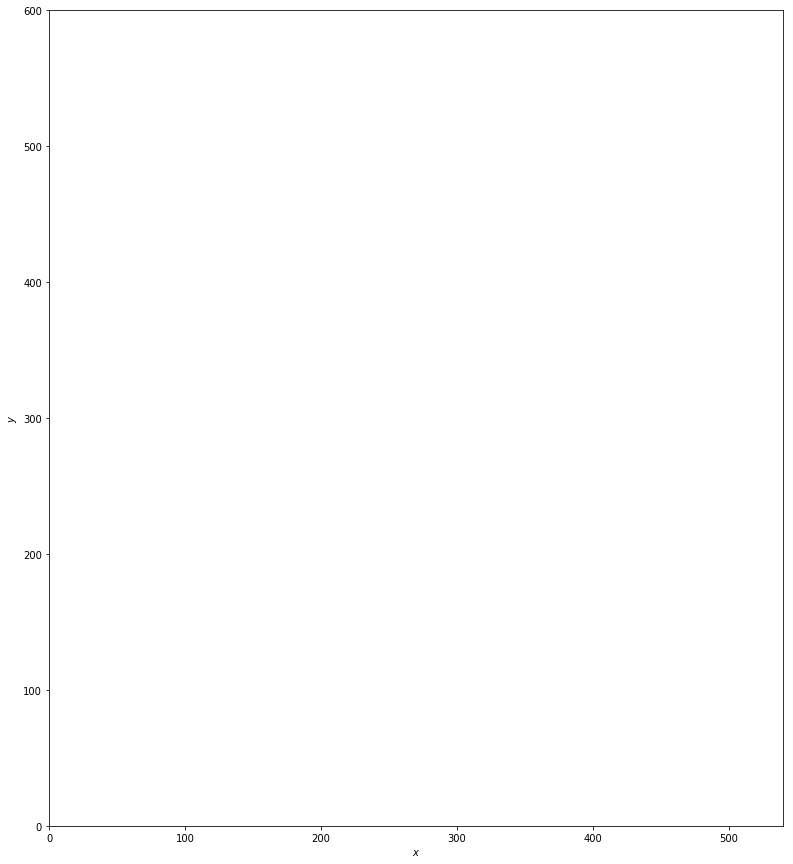

angle 0.0
move (3.0, 0.0)
1322.97897169 442.959393917
402


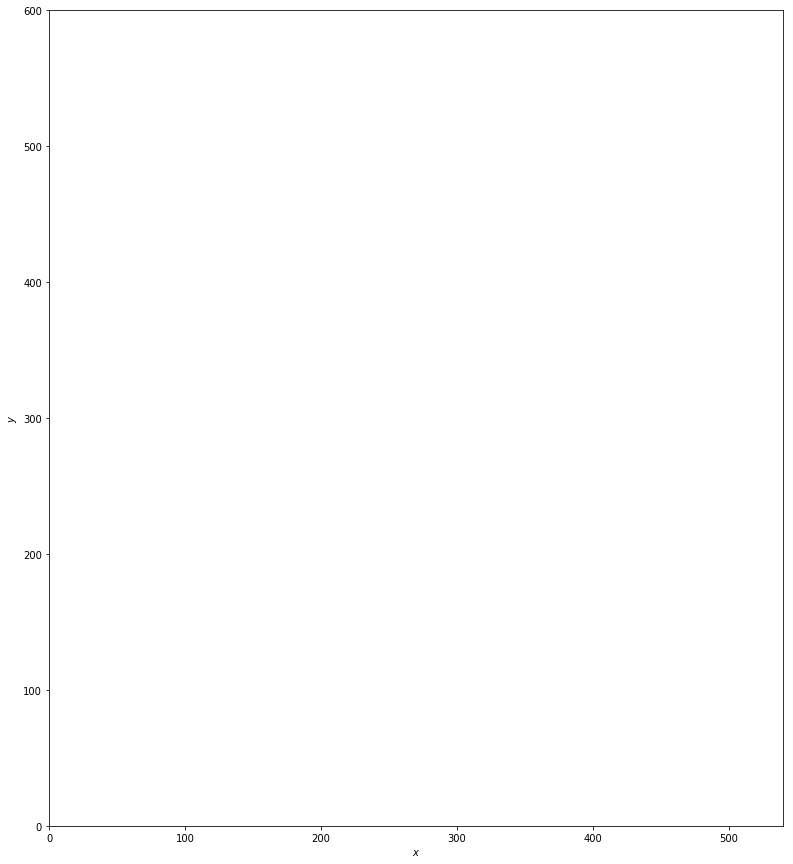

angle 0.0
move (3.0, 0.0)
1325.97897169 442.959393917
403


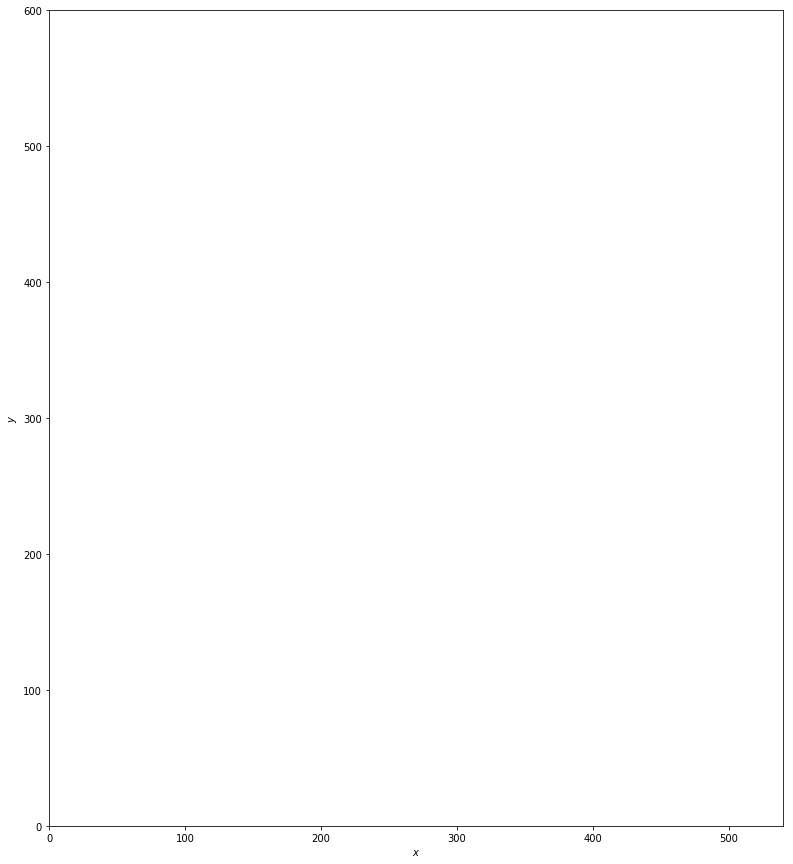

angle 0.0
move (3.0, 0.0)
1328.97897169 442.959393917
404


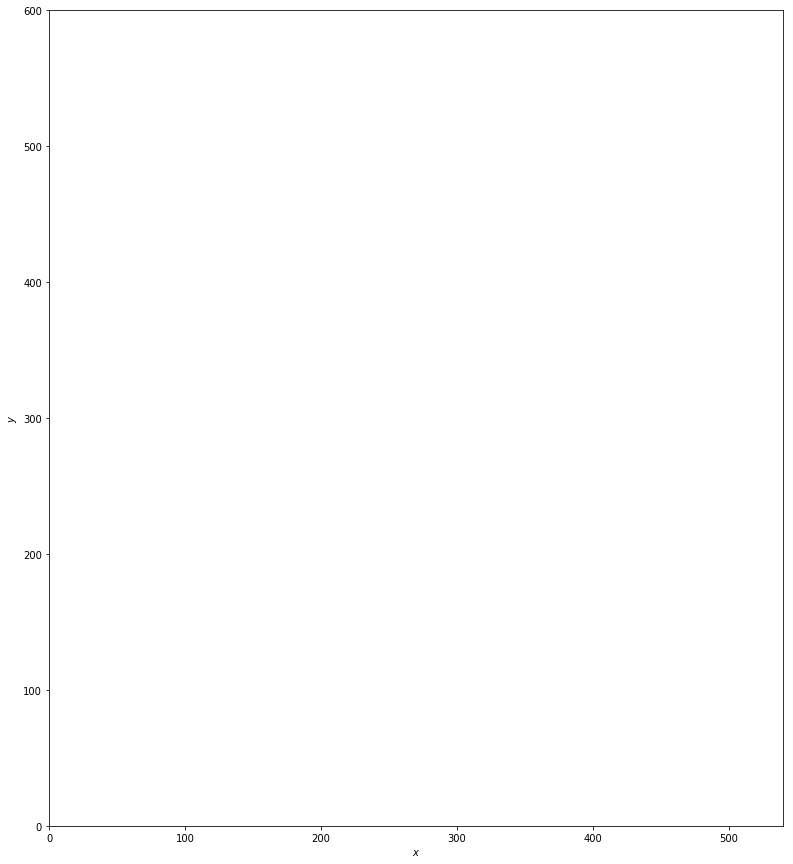

angle 0.0
move (3.0, 0.0)
1331.97897169 442.959393917
405


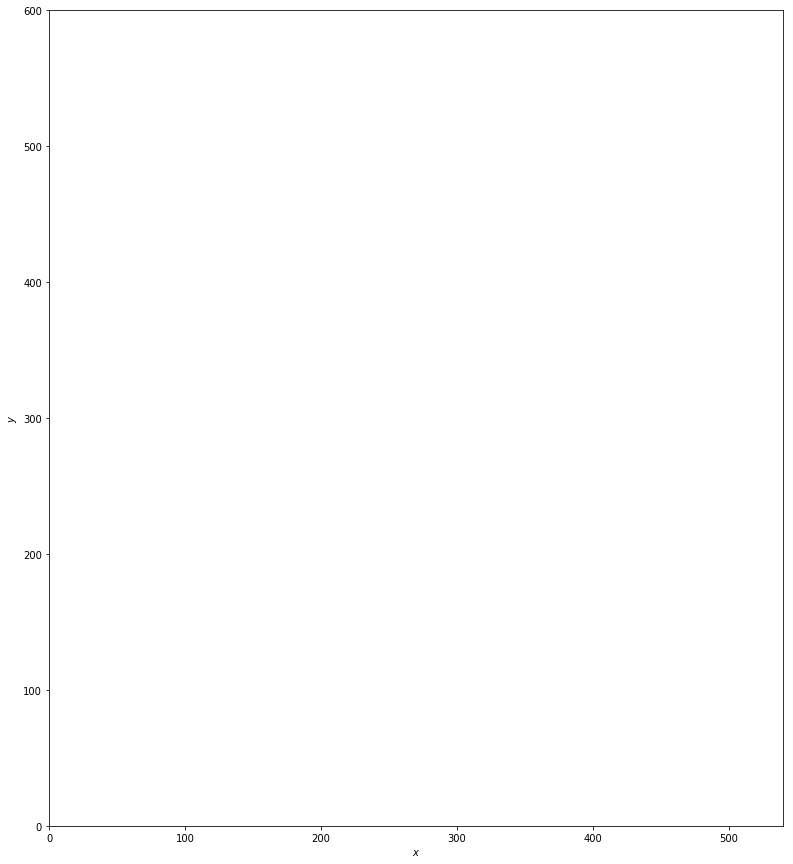

angle 0.0
move (3.0, 0.0)
1334.97897169 442.959393917
406


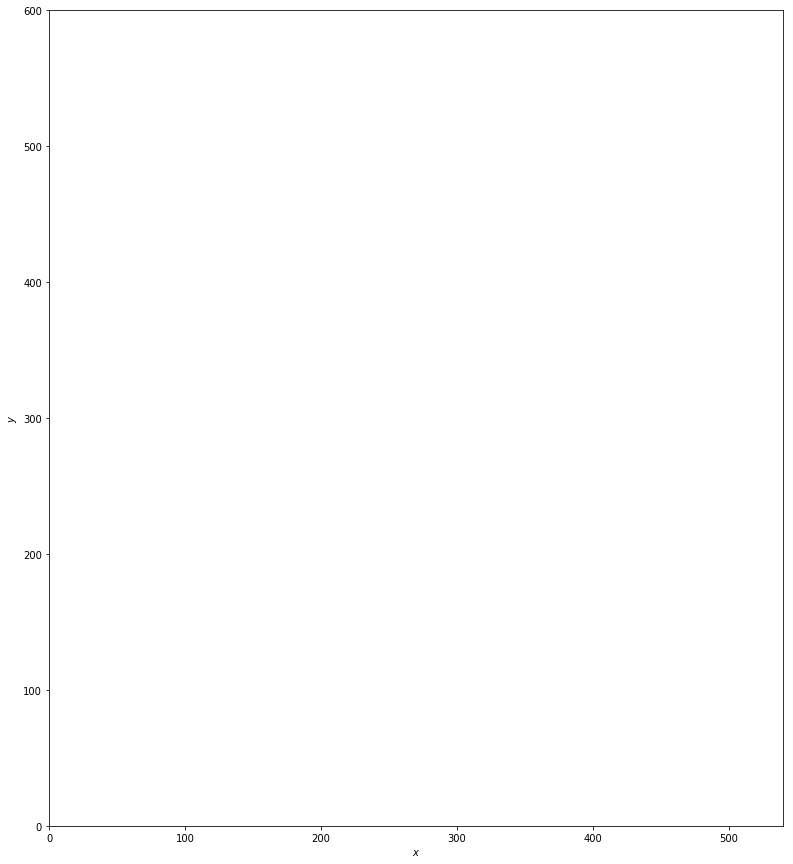

angle 0.0
move (3.0, 0.0)
1337.97897169 442.959393917
407


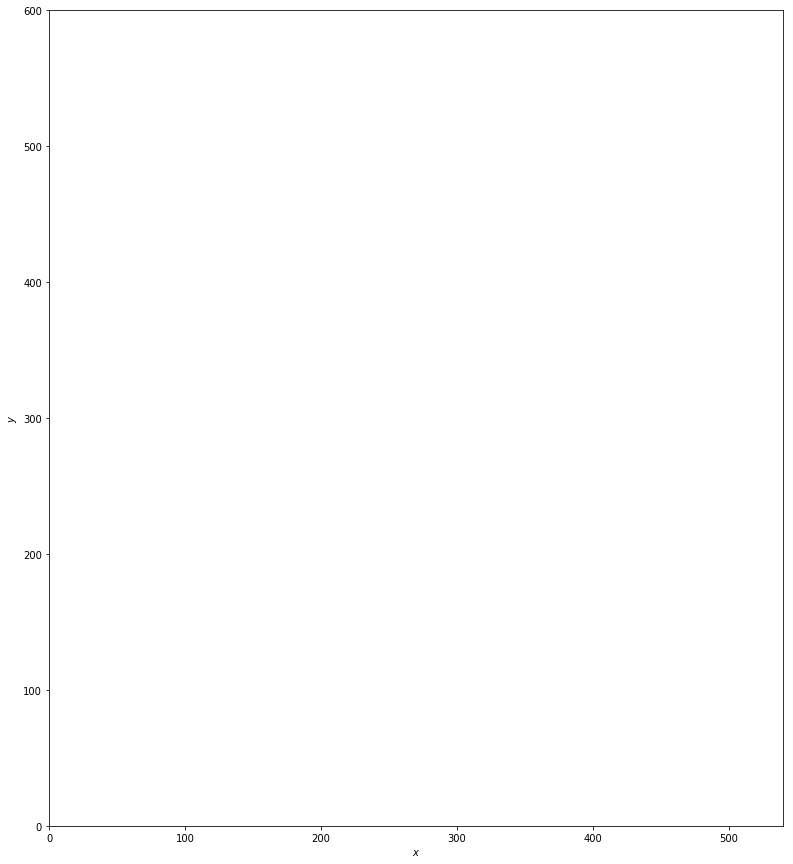

angle 0.0
move (3.0, 0.0)
1340.97897169 442.959393917
408


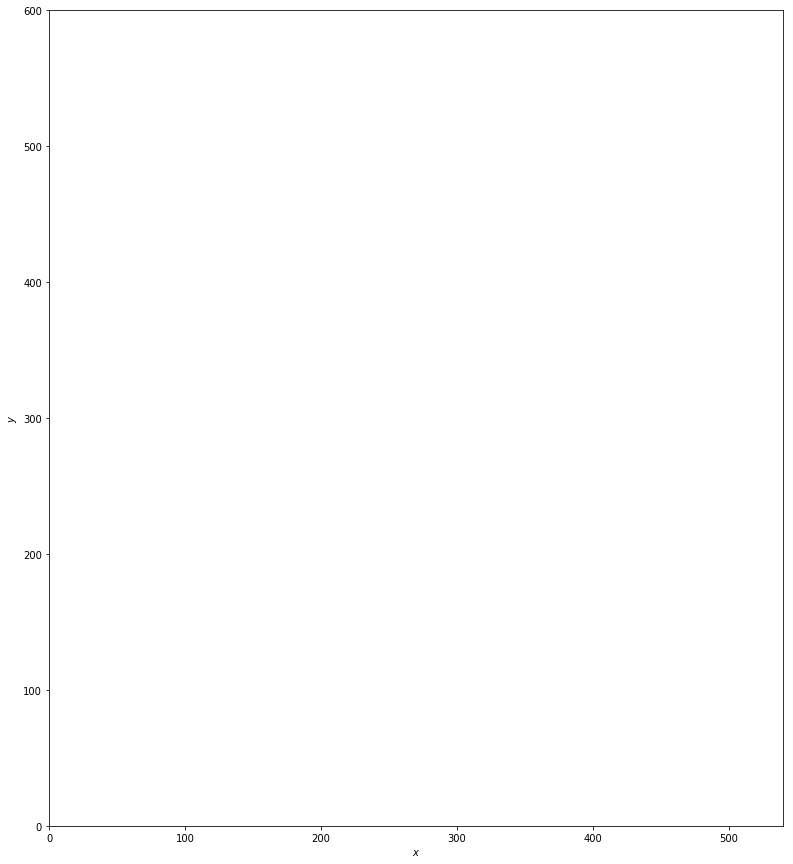

angle 0.0
move (3.0, 0.0)
1343.97897169 442.959393917
409


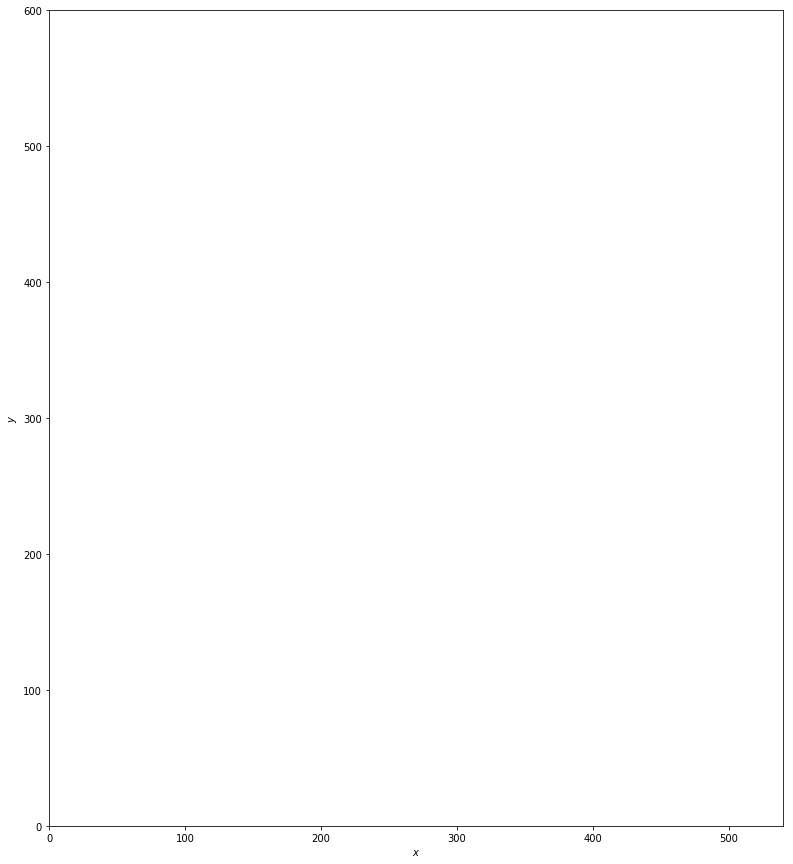

angle 0.0
move (3.0, 0.0)
1346.97897169 442.959393917
410


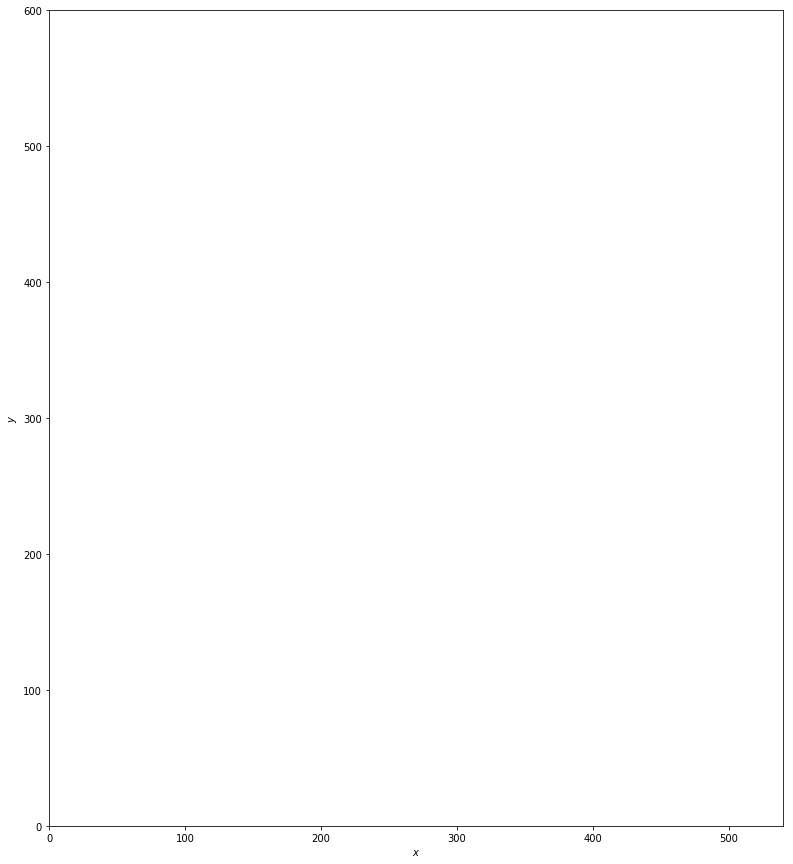

angle 0.0
move (3.0, 0.0)
1349.97897169 442.959393917
411


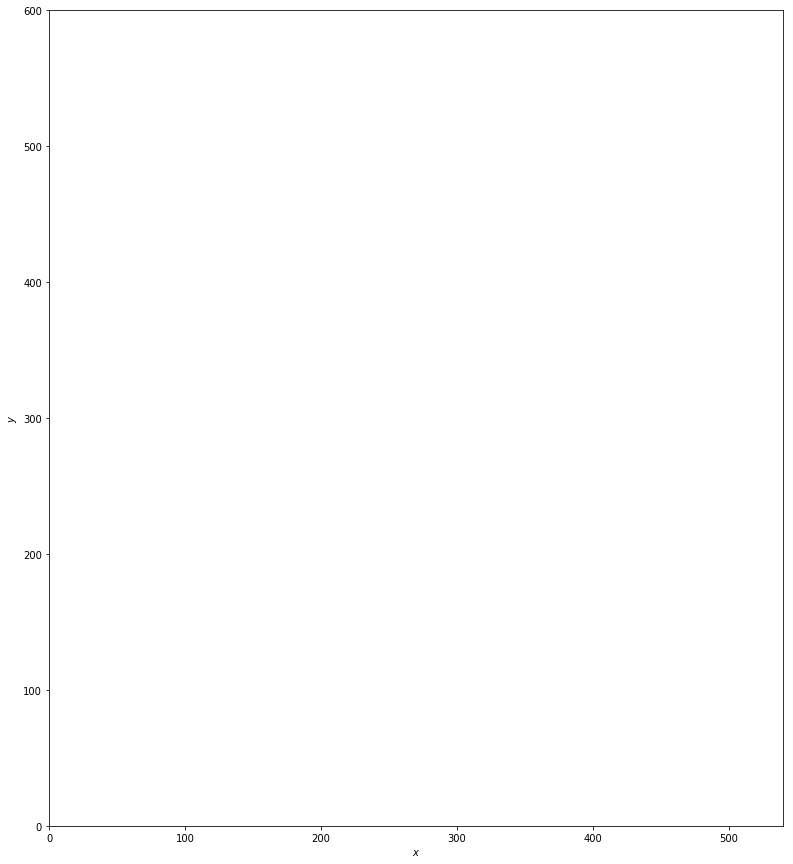

angle 0.0
move (3.0, 0.0)
1352.97897169 442.959393917
412


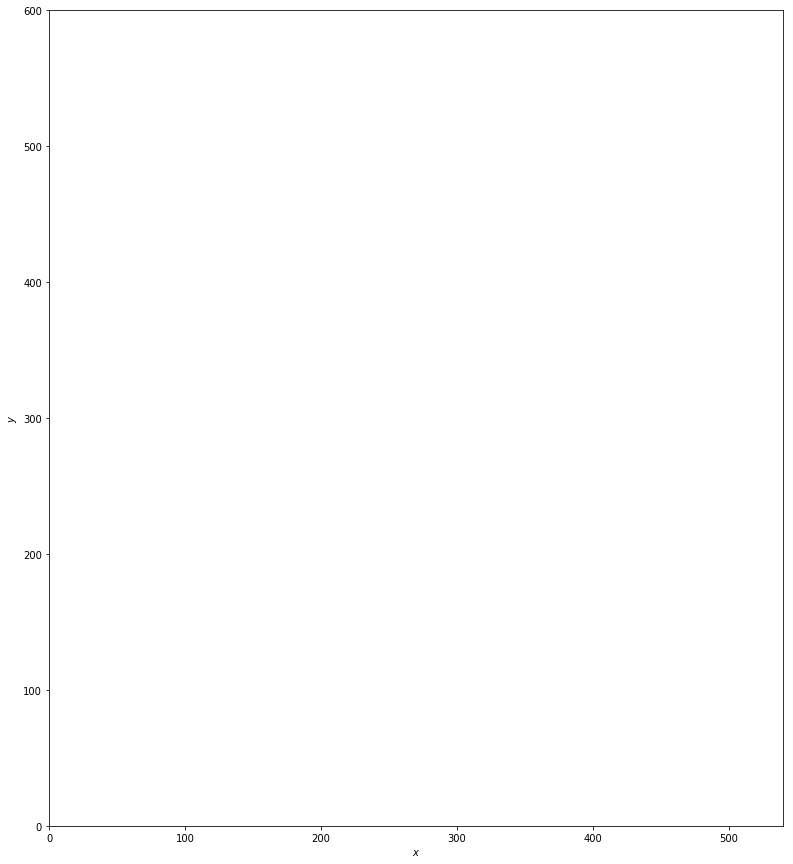

angle 0.0
move (3.0, 0.0)
1355.97897169 442.959393917
413


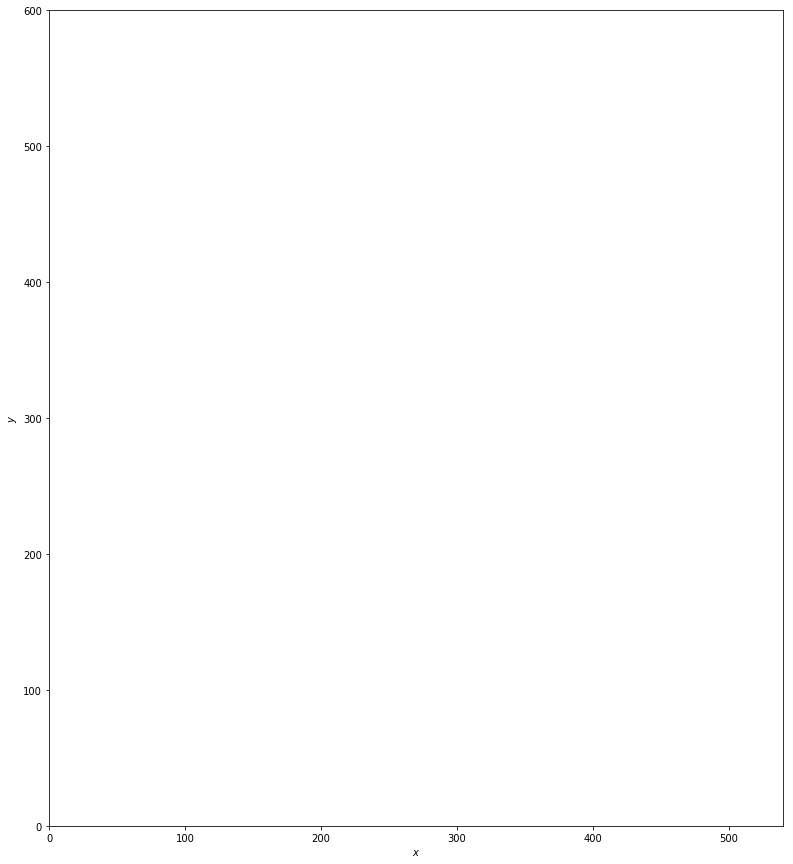

angle 0.0
move (3.0, 0.0)
1358.97897169 442.959393917
414


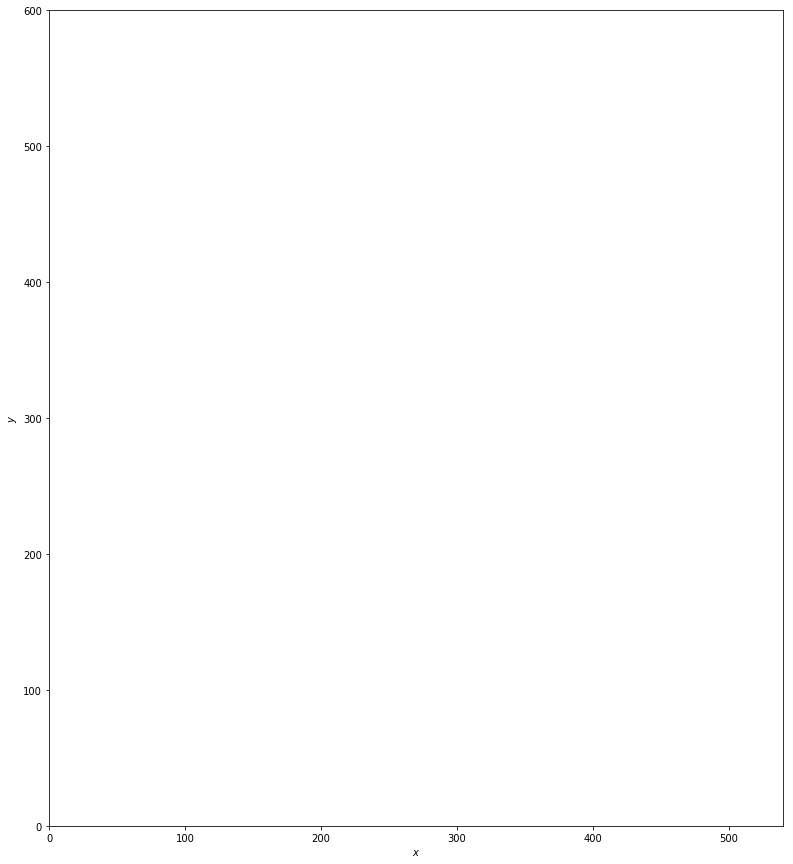

angle 0.0
move (3.0, 0.0)
1361.97897169 442.959393917
415


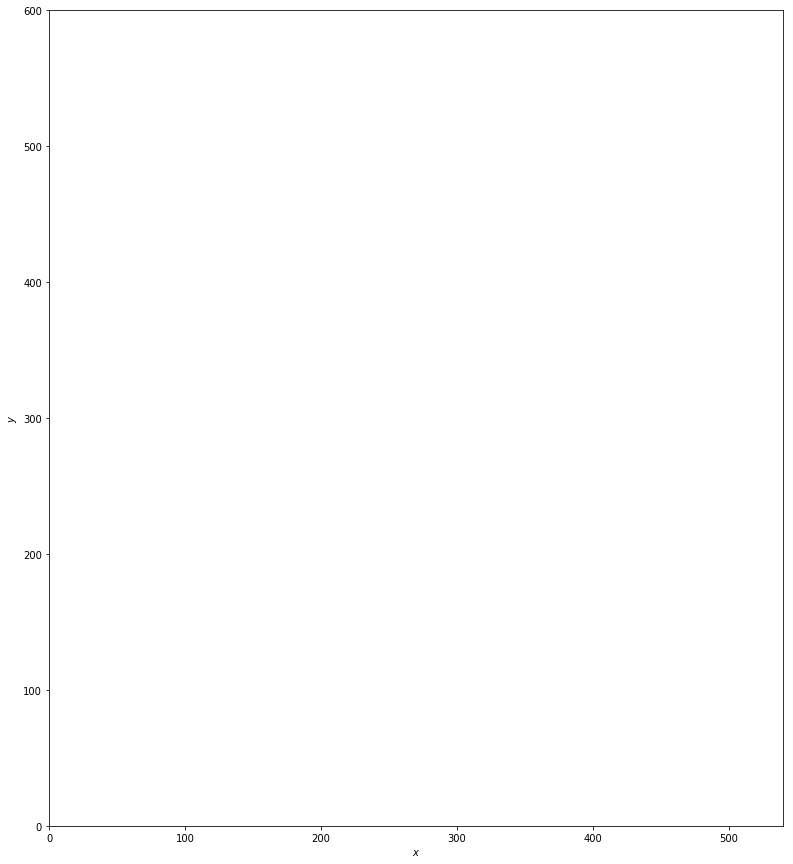

angle 0.0
move (3.0, 0.0)
1364.97897169 442.959393917
416


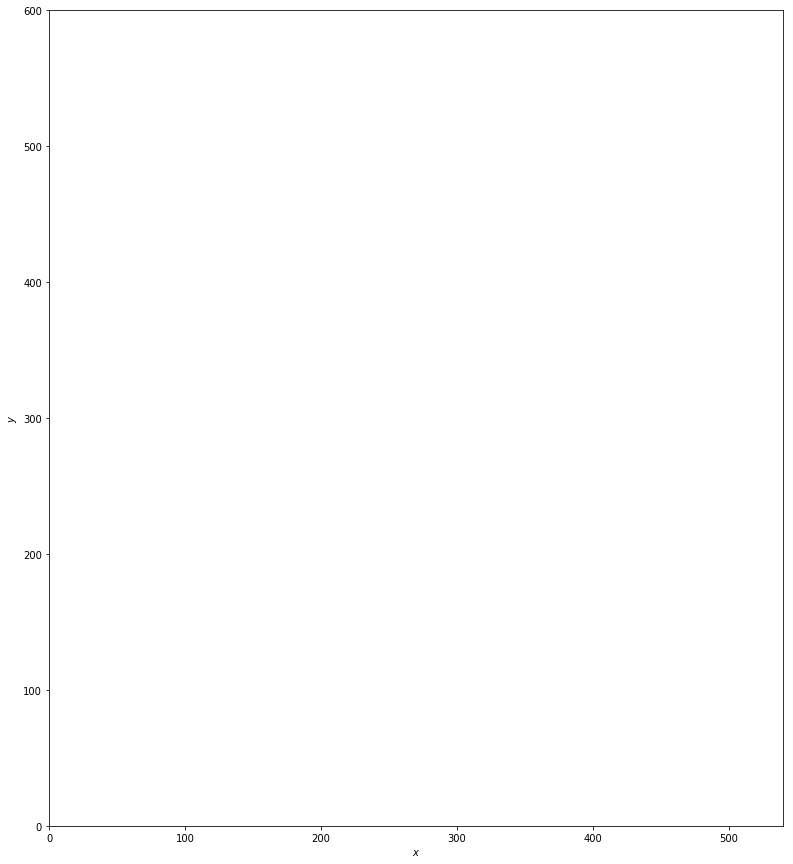

angle 0.0
move (3.0, 0.0)
1367.97897169 442.959393917
417


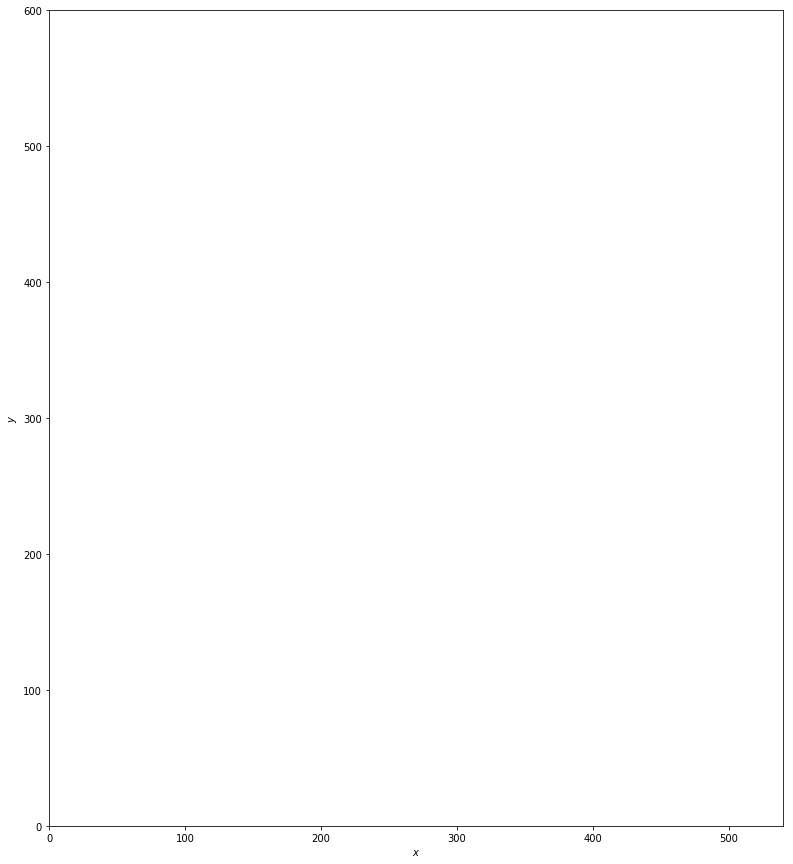

angle 0.0
move (3.0, 0.0)
1370.97897169 442.959393917
418


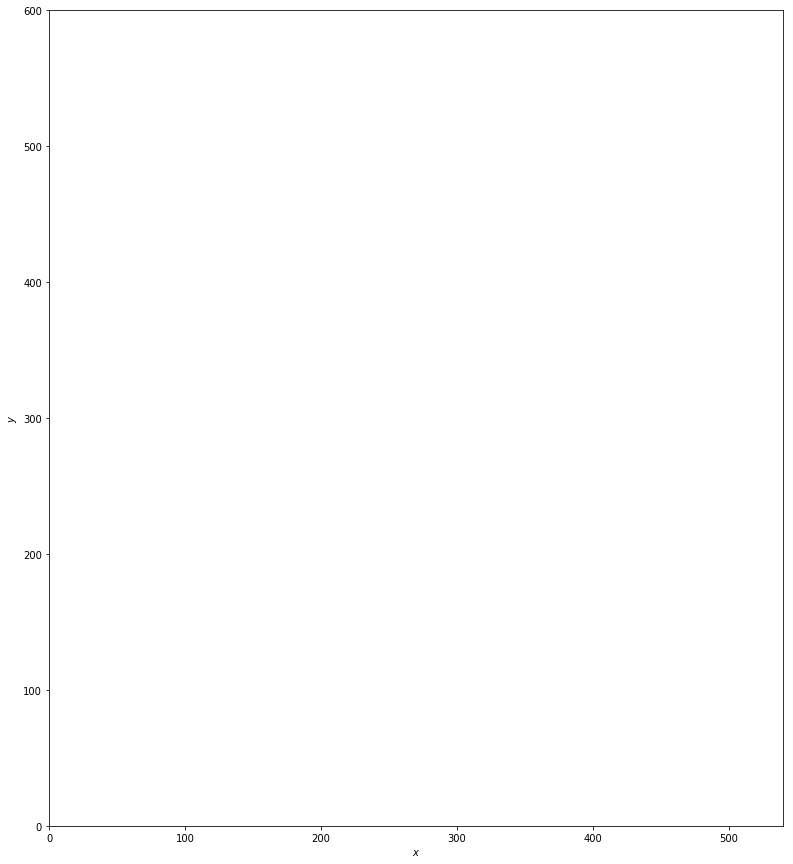

angle 0.0
move (3.0, 0.0)
1373.97897169 442.959393917
419


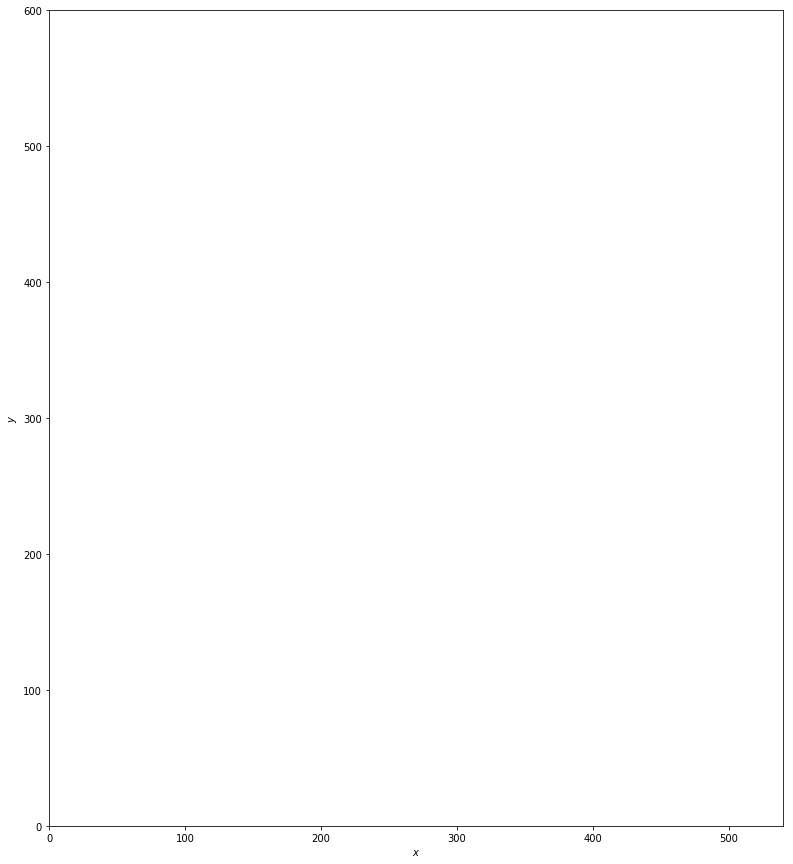

angle 0.0
move (3.0, 0.0)
1376.97897169 442.959393917
420


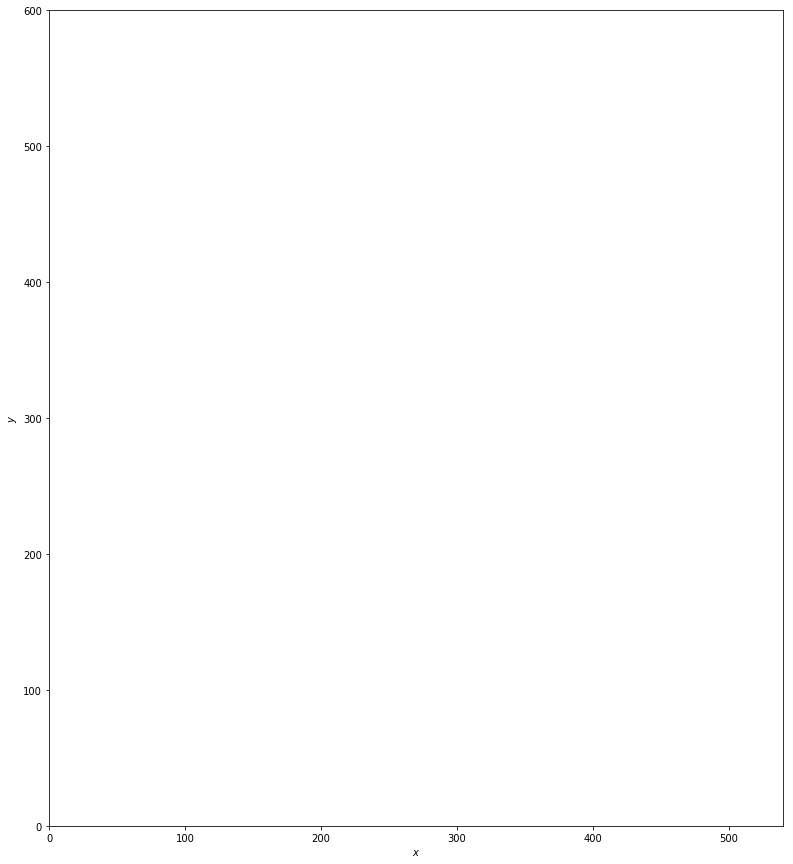

angle 0.0
move (3.0, 0.0)
1379.97897169 442.959393917
421


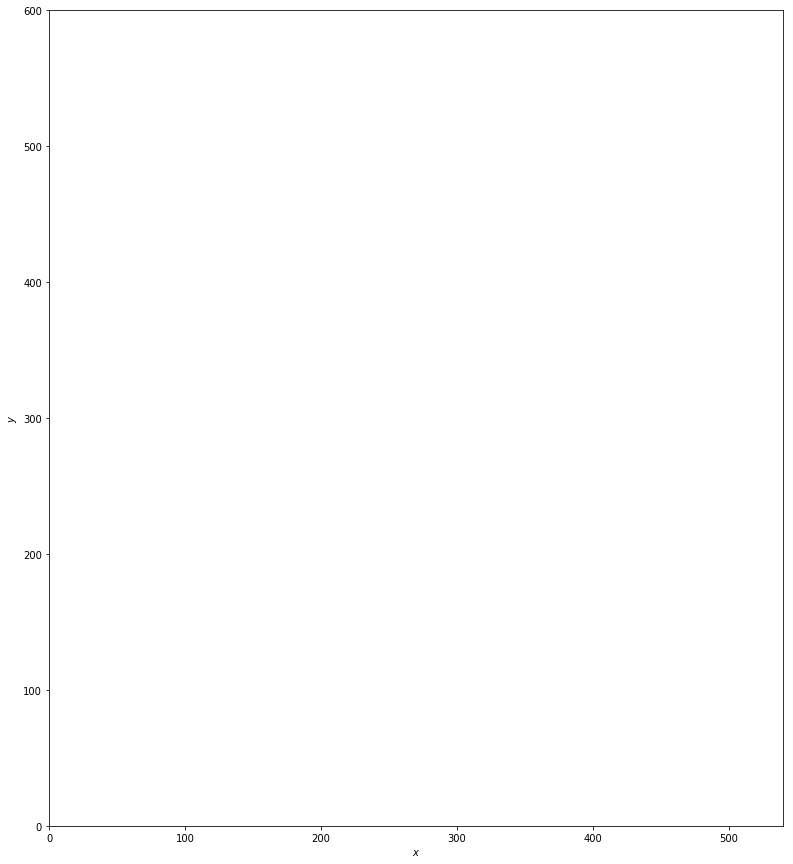

angle 0.0
move (3.0, 0.0)
1382.97897169 442.959393917
422


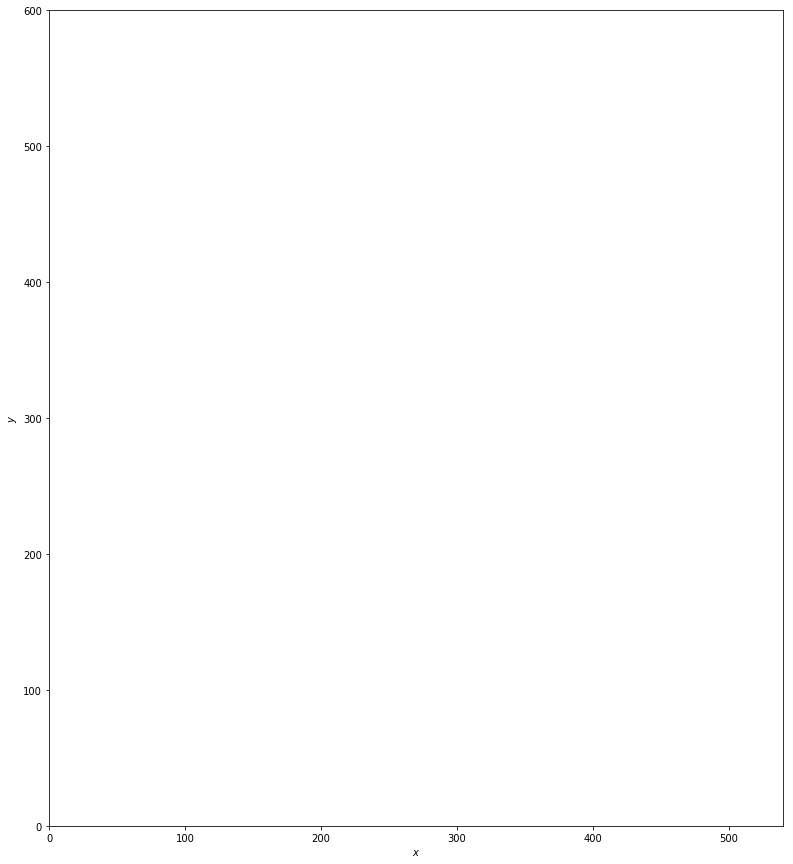

angle 0.0
move (3.0, 0.0)
1385.97897169 442.959393917
423


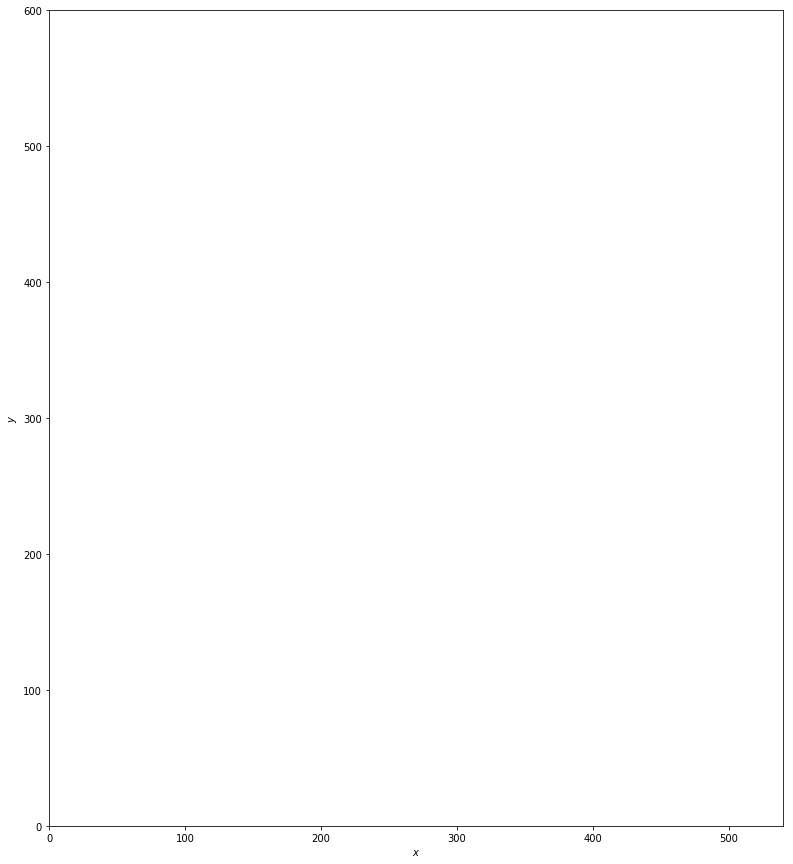

angle 0.0
move (3.0, 0.0)
1388.97897169 442.959393917
424


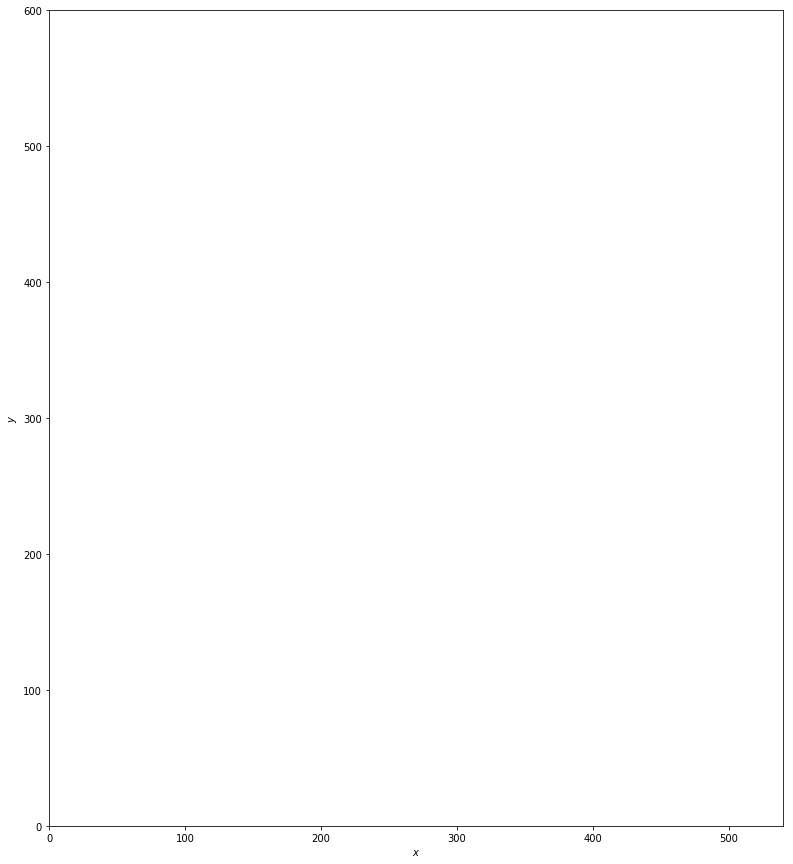

angle 0.0
move (3.0, 0.0)
1391.97897169 442.959393917
425


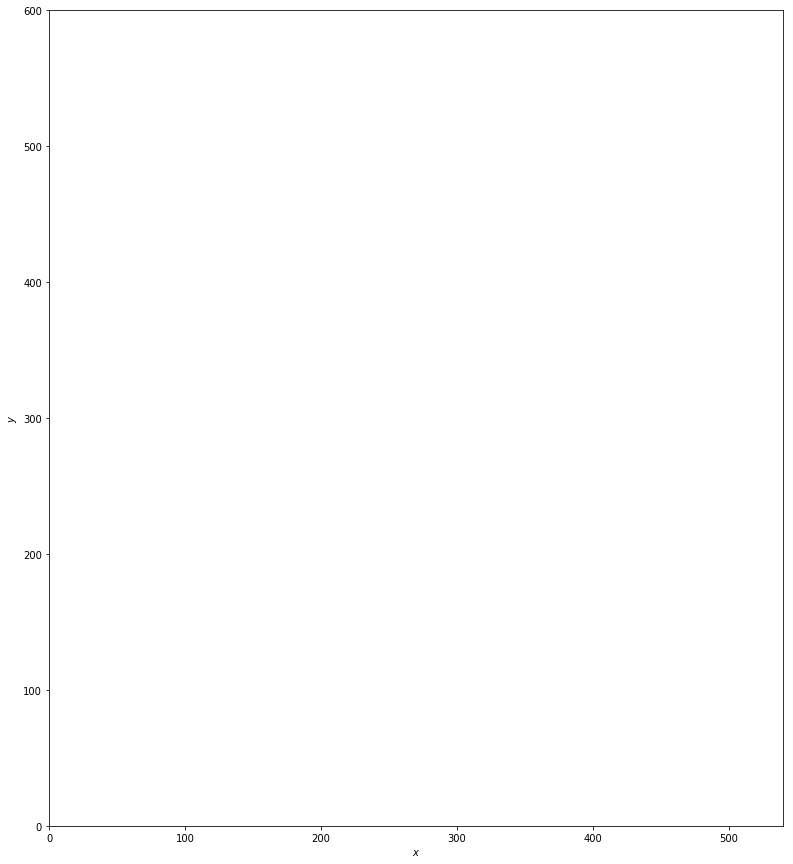

angle 0.0
move (3.0, 0.0)
1394.97897169 442.959393917
426


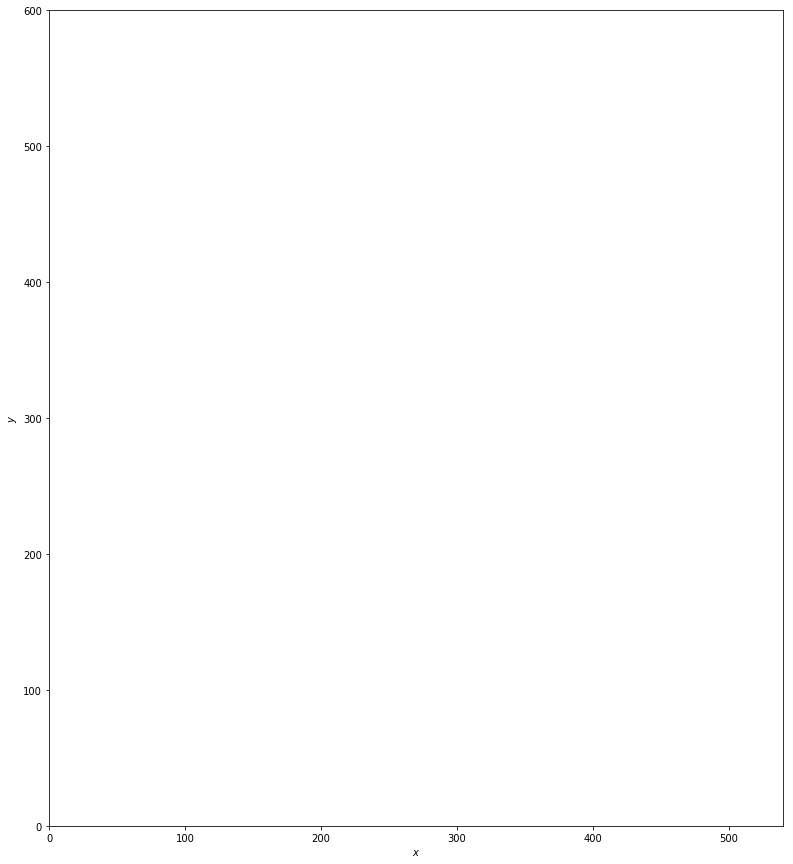

angle 0.0
move (3.0, 0.0)
1397.97897169 442.959393917
427


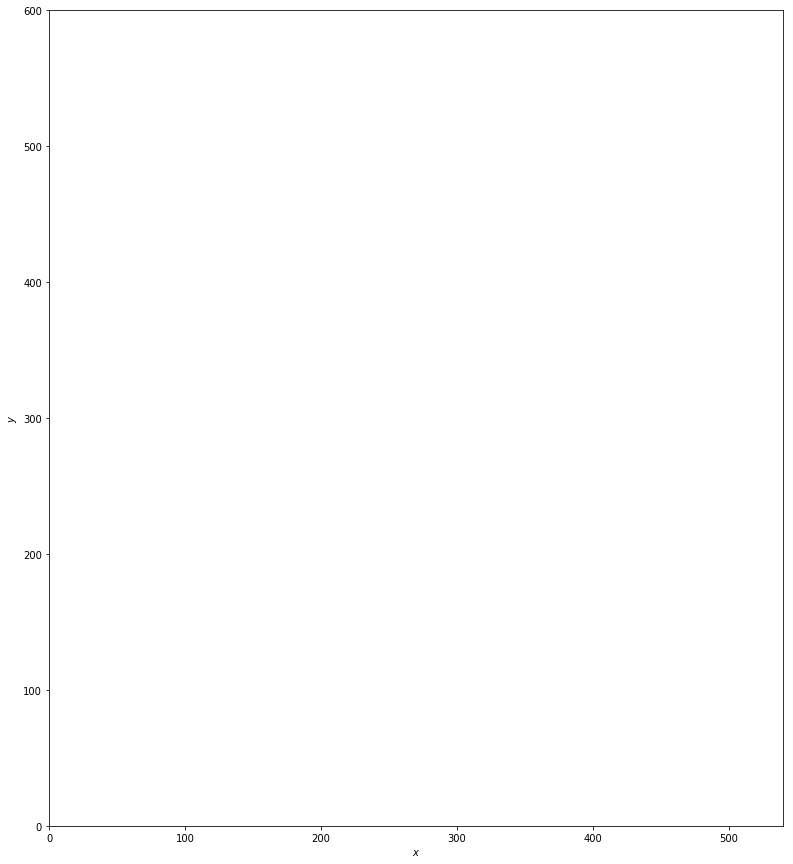

angle 0.0
move (3.0, 0.0)
1400.97897169 442.959393917
428


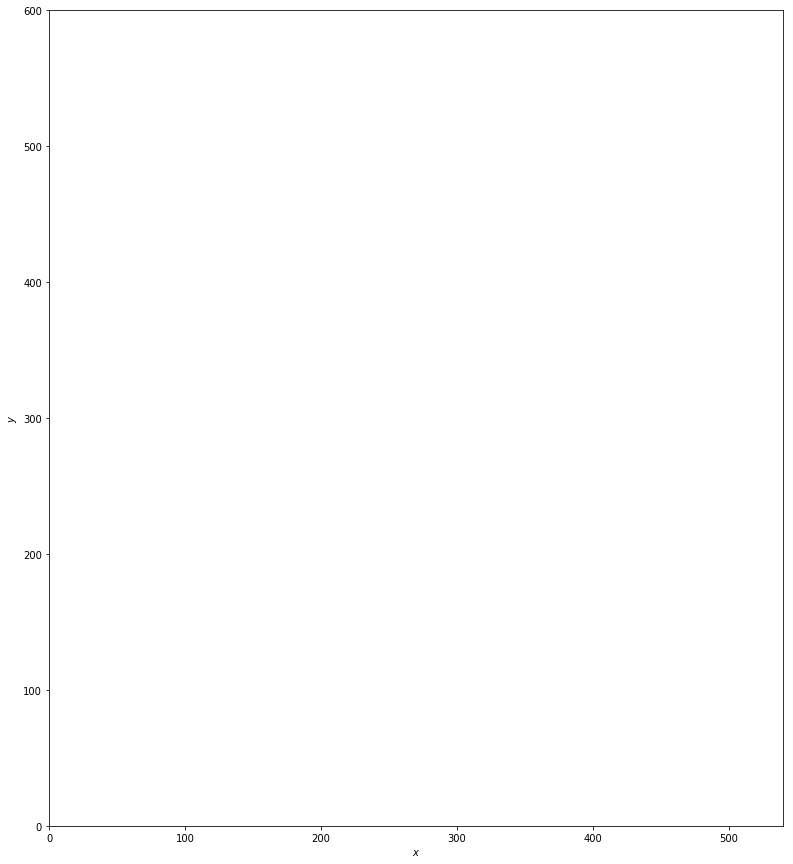

angle 0.0
move (3.0, 0.0)
1403.97897169 442.959393917
429


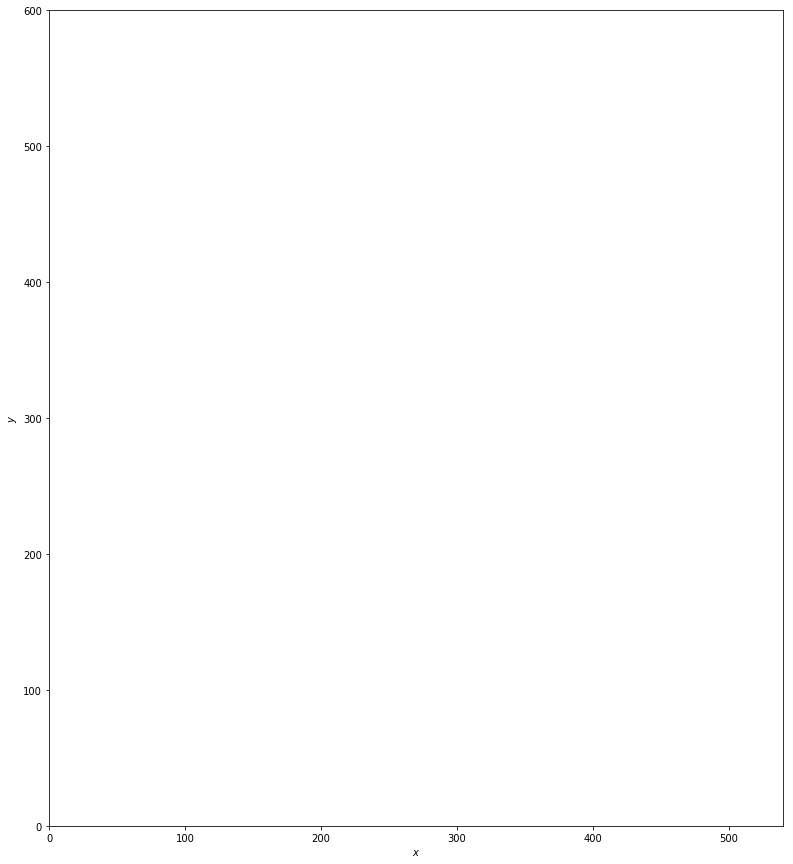

angle 0.0
move (3.0, 0.0)
1406.97897169 442.959393917
430


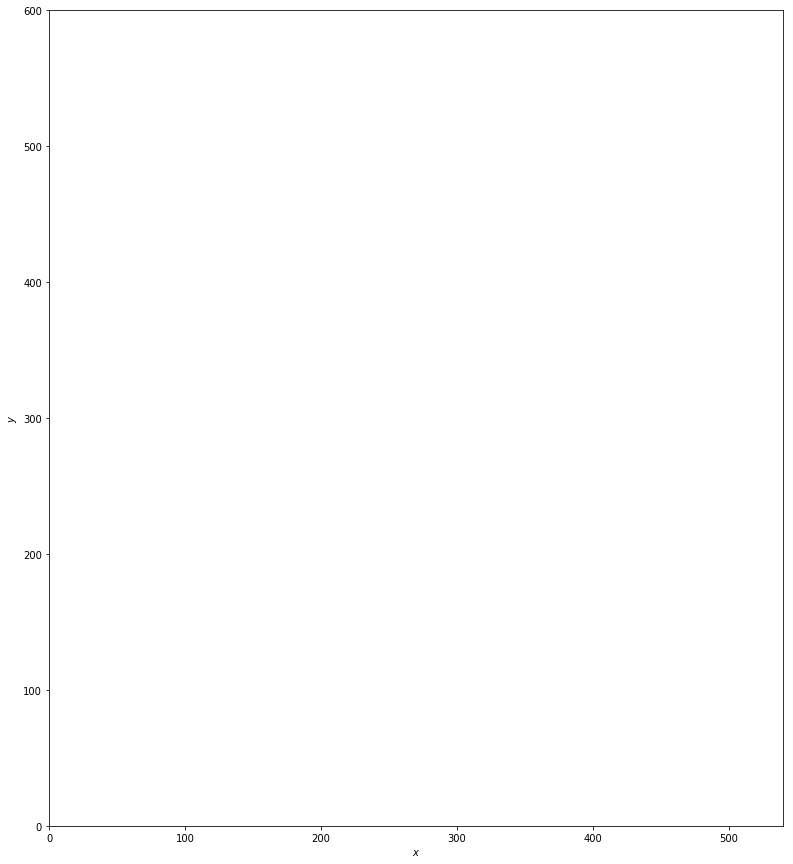

angle 0.0
move (3.0, 0.0)
1409.97897169 442.959393917
431


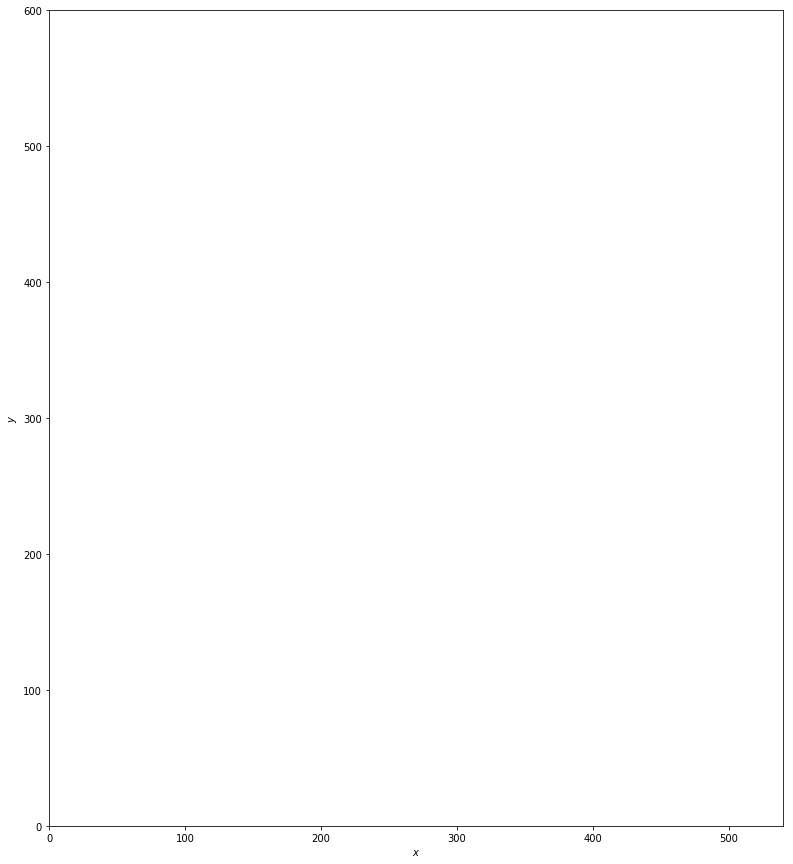

angle 0.0
move (3.0, 0.0)
1412.97897169 442.959393917
432


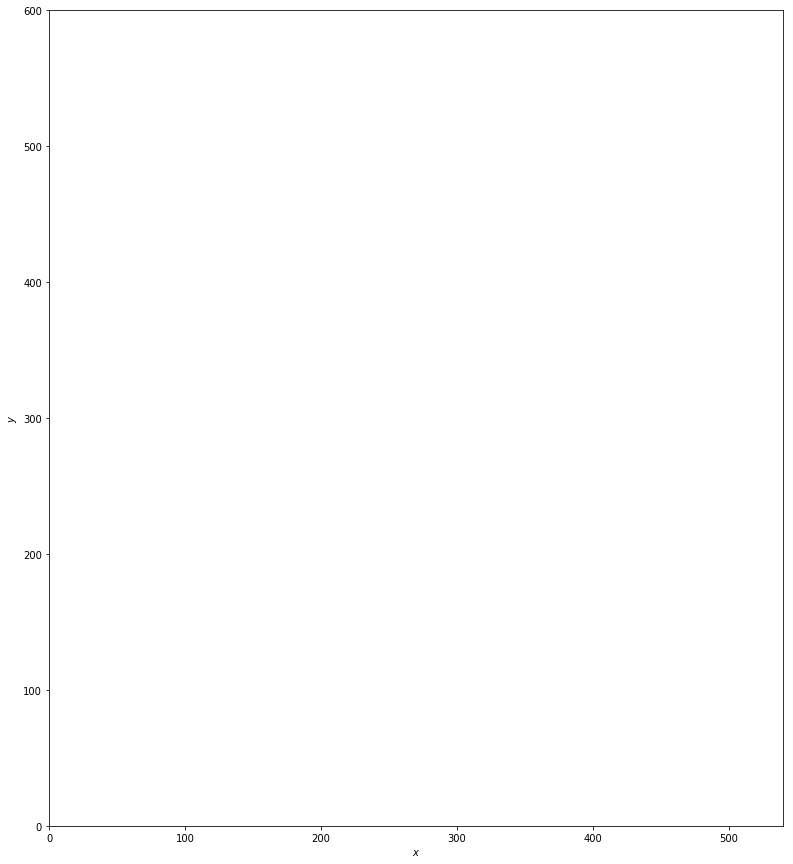

angle 0.0
move (3.0, 0.0)
1415.97897169 442.959393917
433


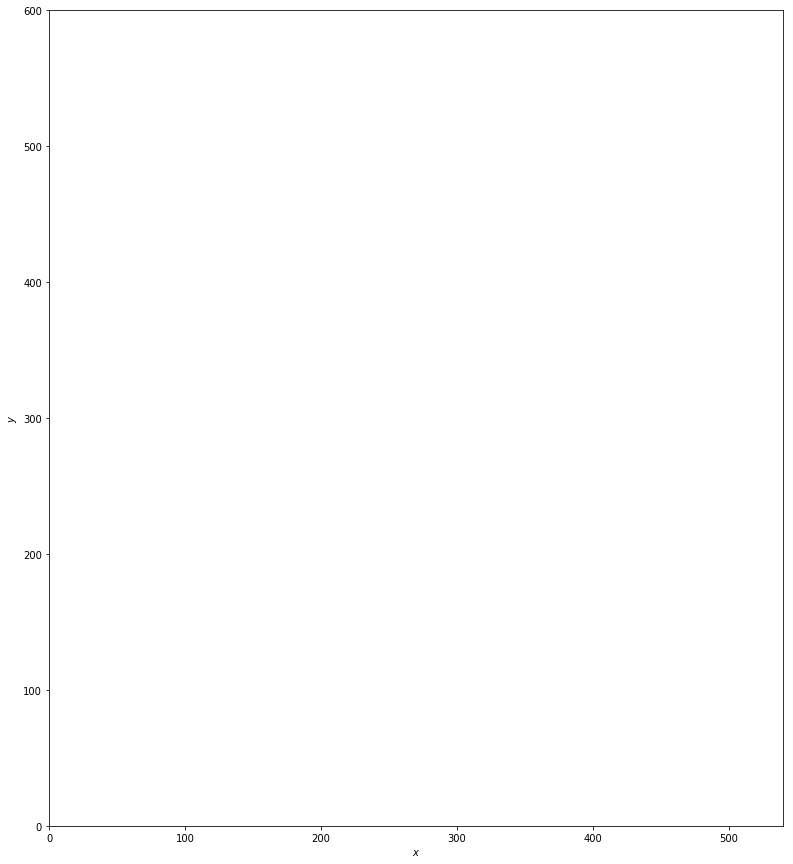

angle 0.0
move (3.0, 0.0)
1418.97897169 442.959393917
434


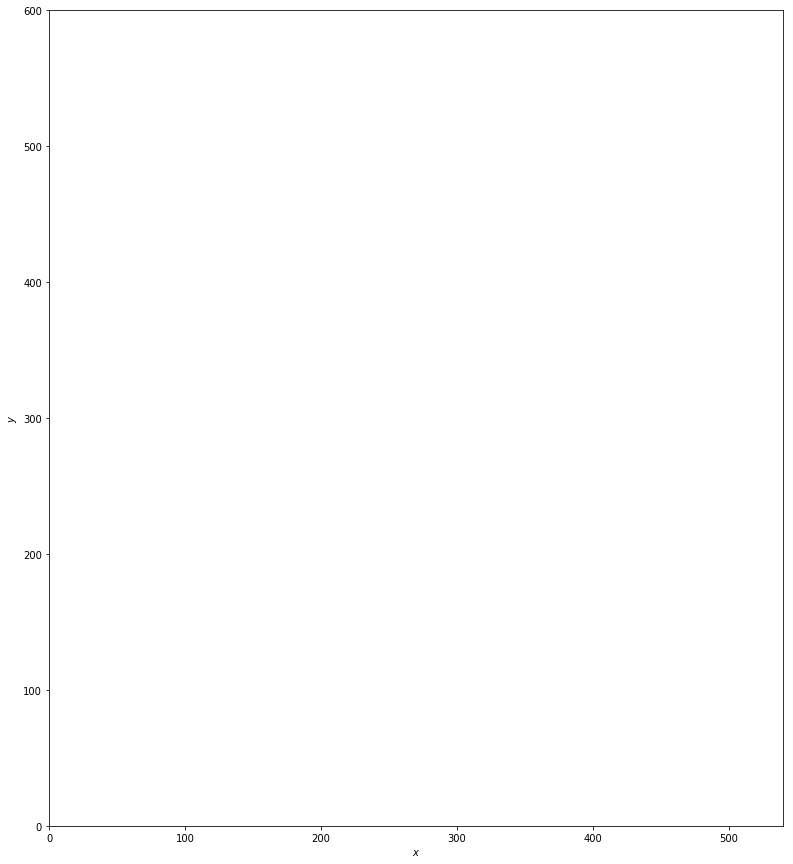

angle 0.0
move (3.0, 0.0)
1421.97897169 442.959393917
435


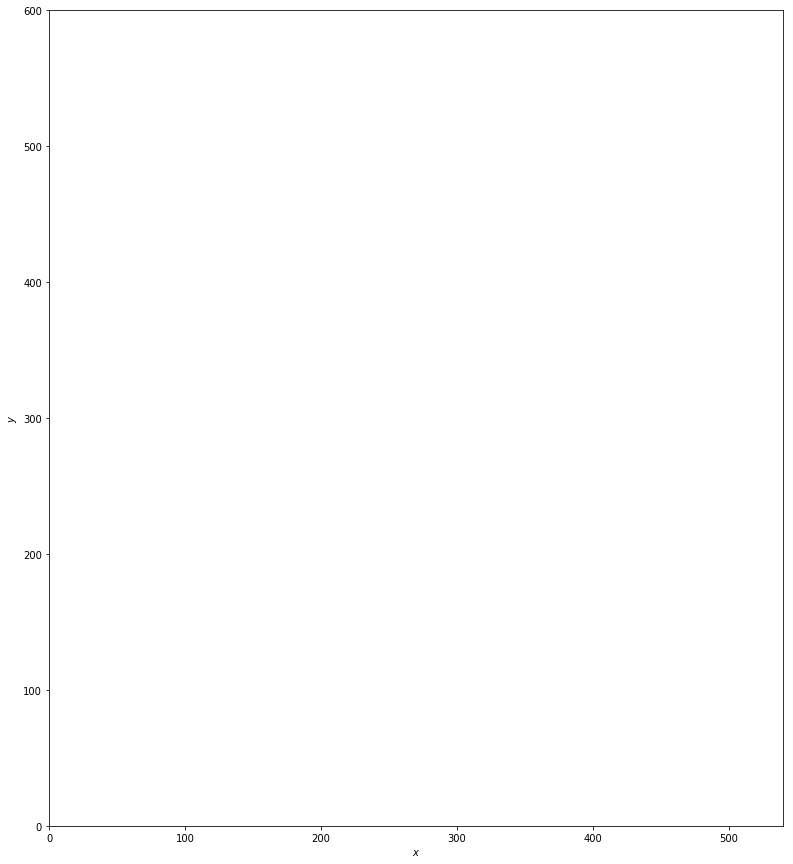

angle 0.0
move (3.0, 0.0)
1424.97897169 442.959393917
436


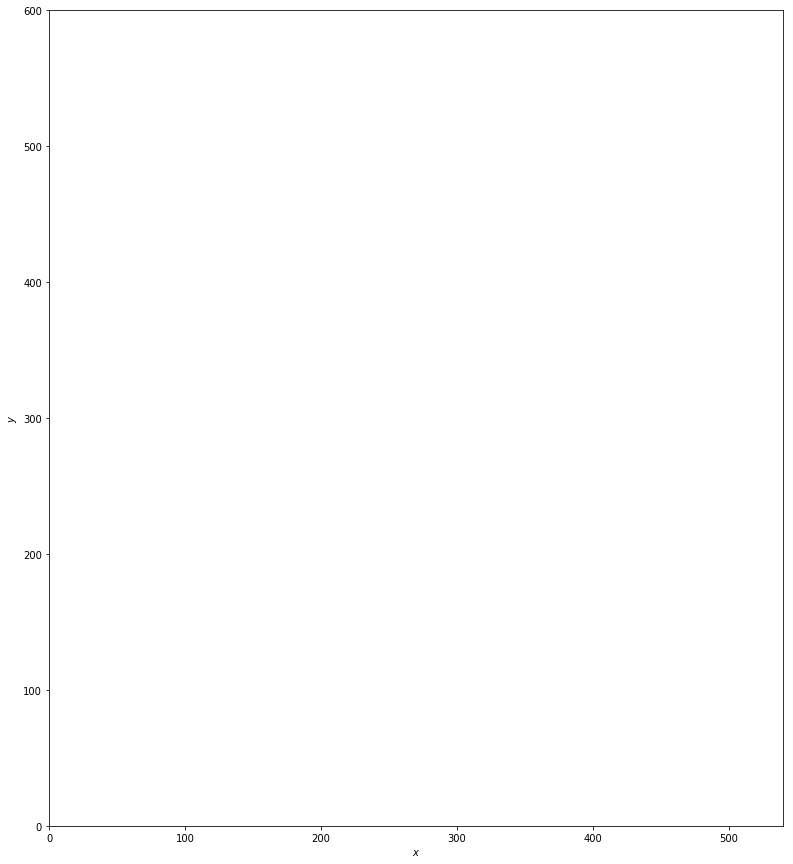

angle 0.0
move (3.0, 0.0)
1427.97897169 442.959393917
437


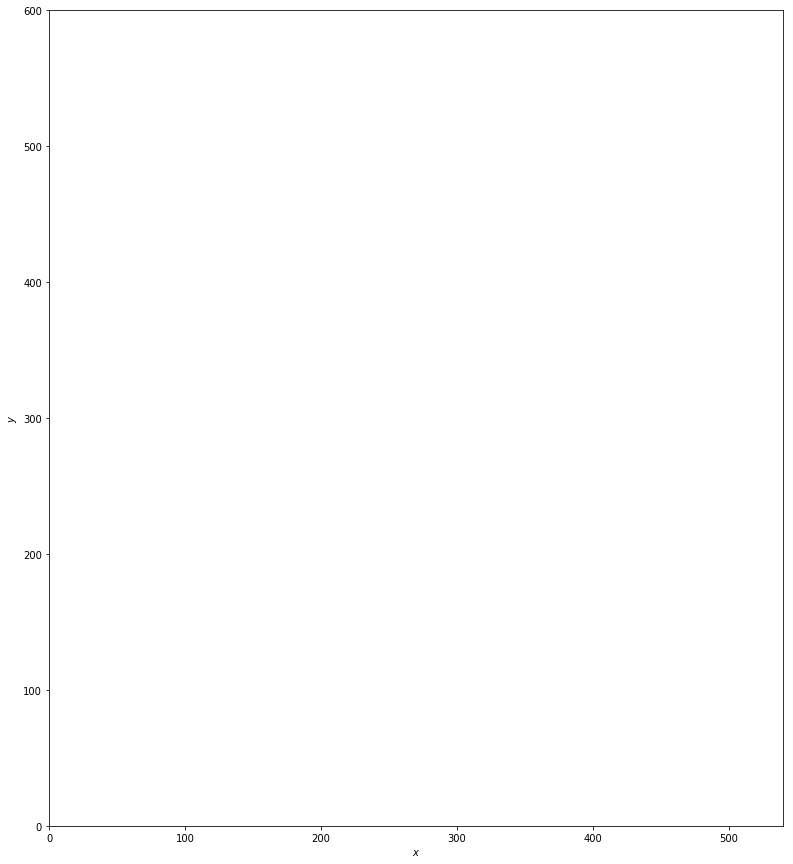

angle 0.0
move (3.0, 0.0)
1430.97897169 442.959393917
438


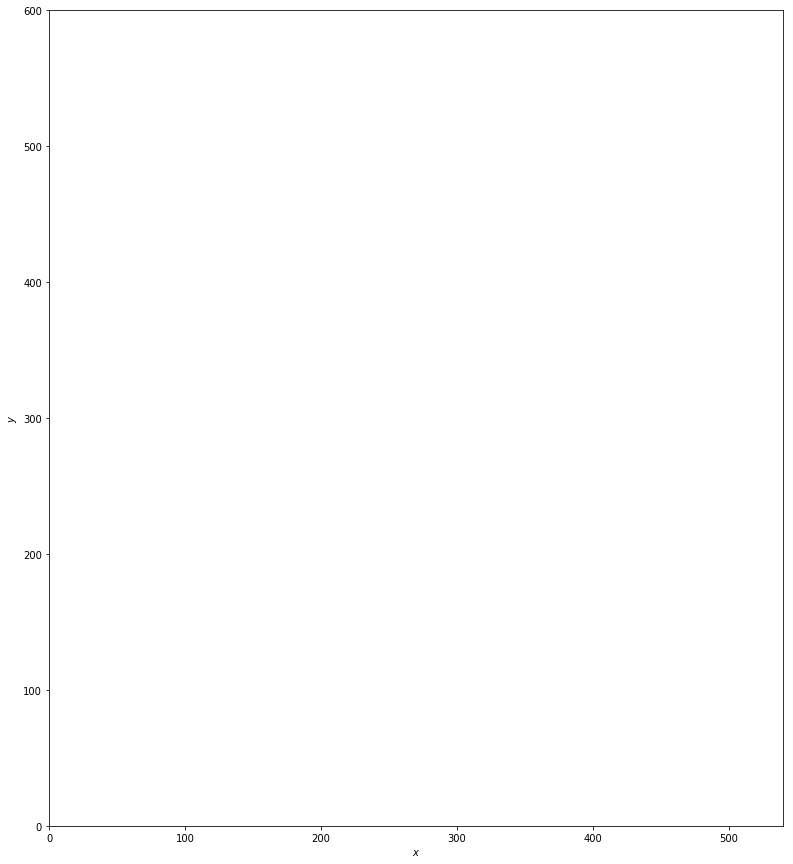

angle 0.0
move (3.0, 0.0)
1433.97897169 442.959393917
439


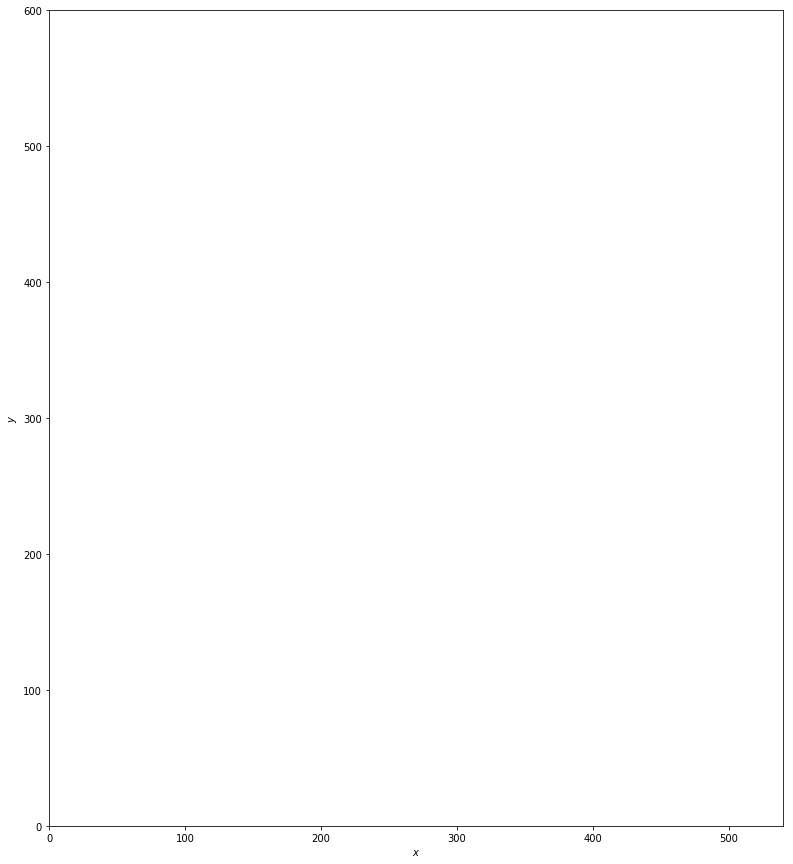

angle 0.0
move (3.0, 0.0)
1436.97897169 442.959393917
440


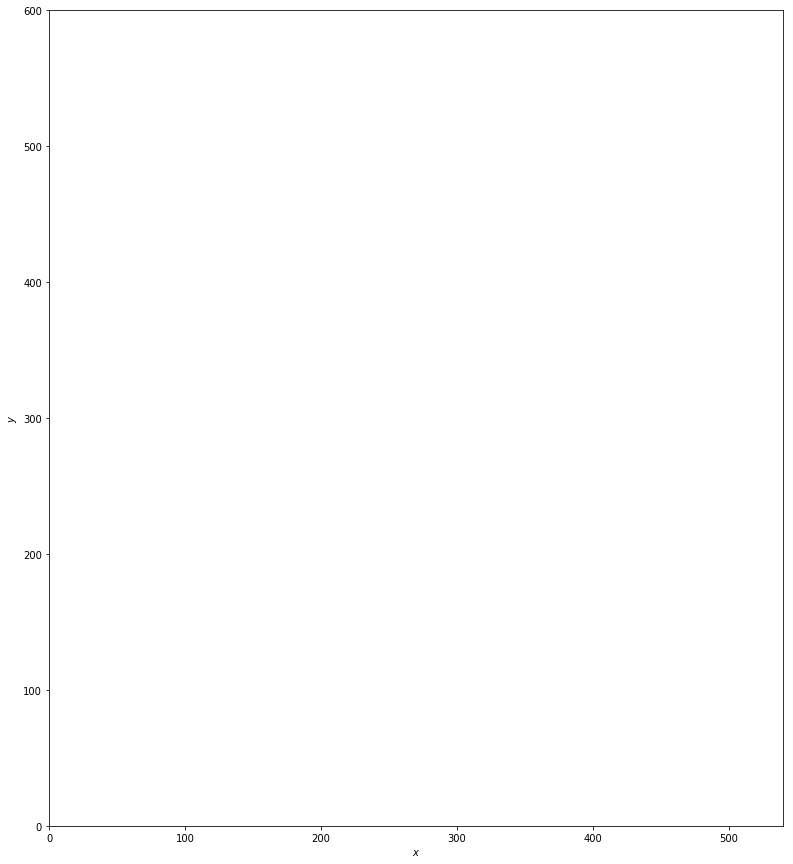

angle 0.0
move (3.0, 0.0)
1439.97897169 442.959393917
441


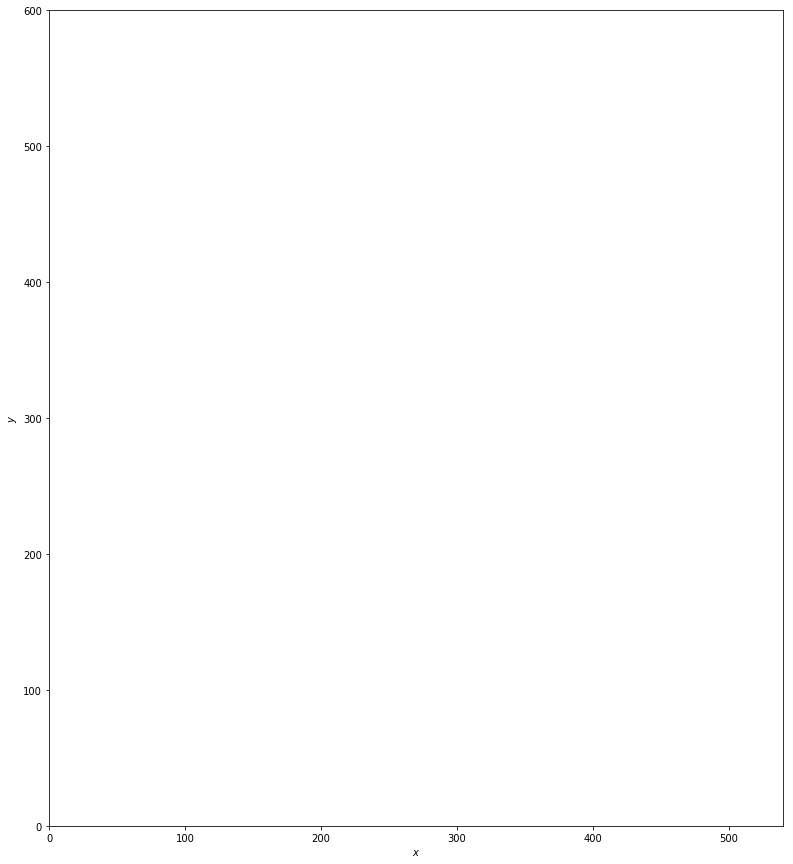

angle 0.0
move (3.0, 0.0)
1442.97897169 442.959393917
442


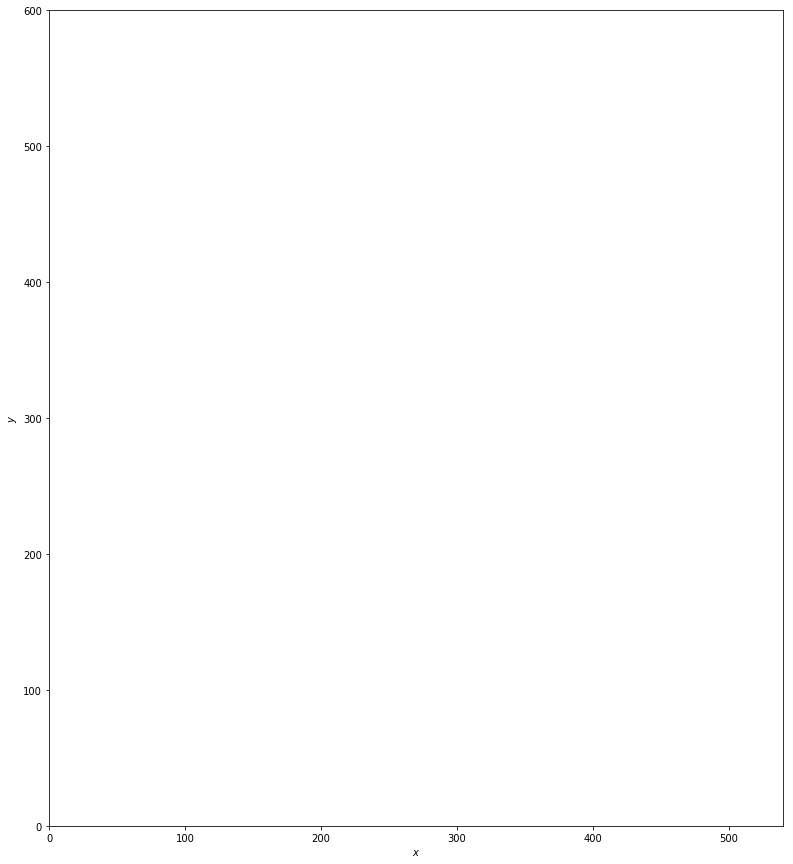

angle 0.0
move (3.0, 0.0)
1445.97897169 442.959393917
443


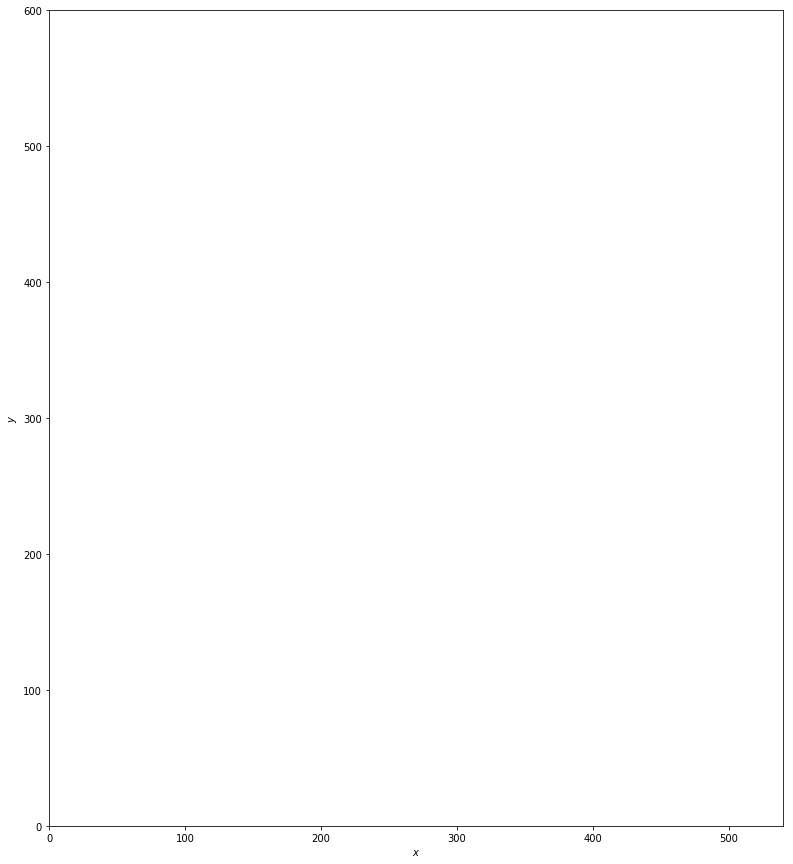

angle 0.0
move (3.0, 0.0)
1448.97897169 442.959393917
444


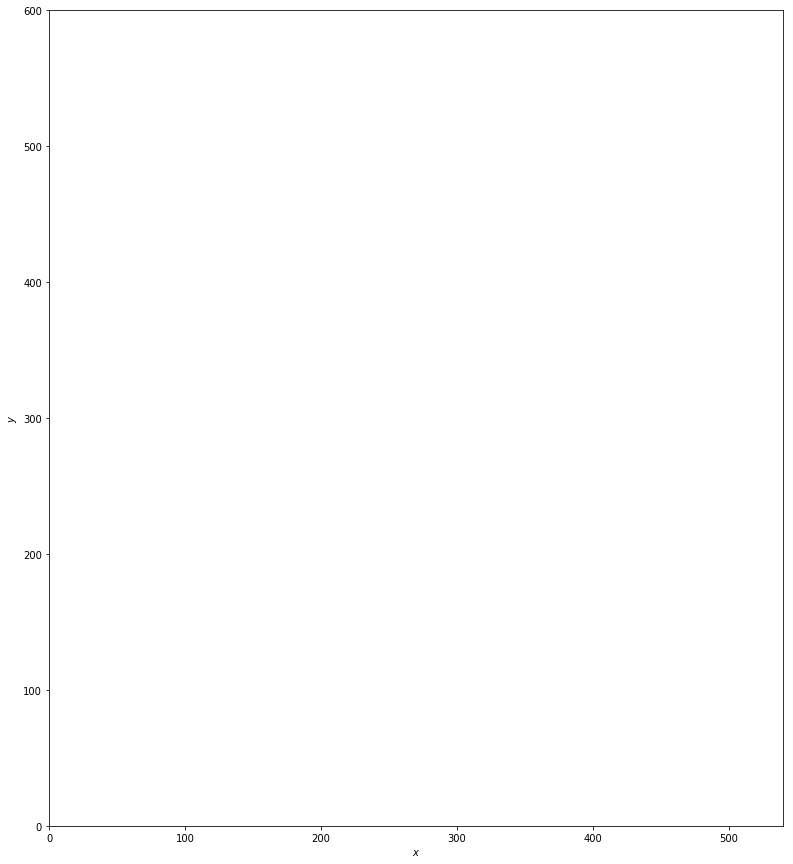

angle 0.0
move (3.0, 0.0)
1451.97897169 442.959393917
445


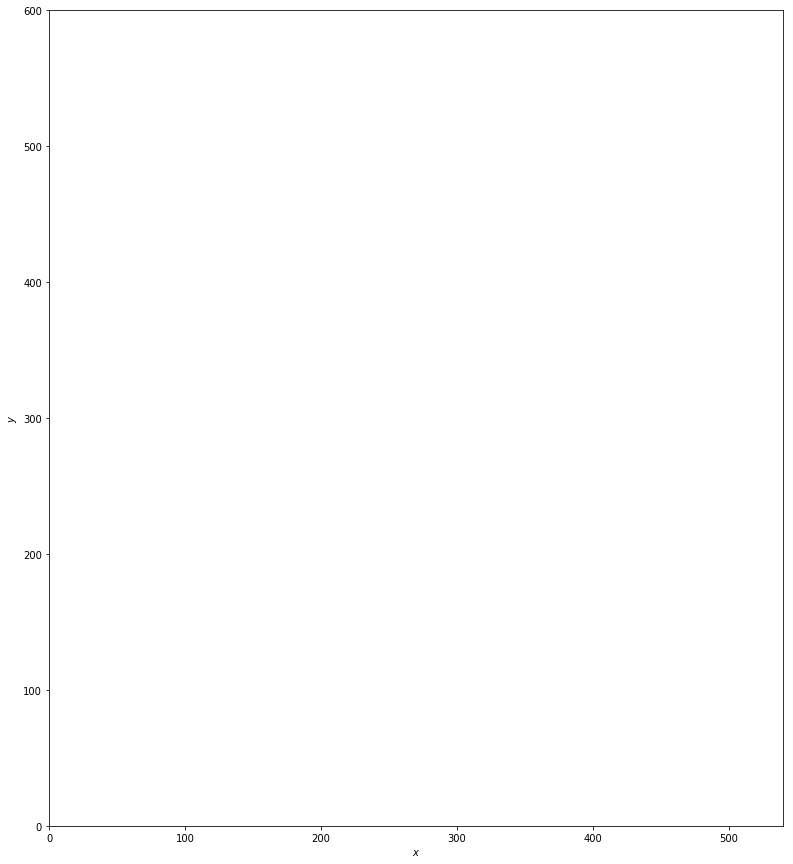

angle 0.0
move (3.0, 0.0)
1454.97897169 442.959393917
446


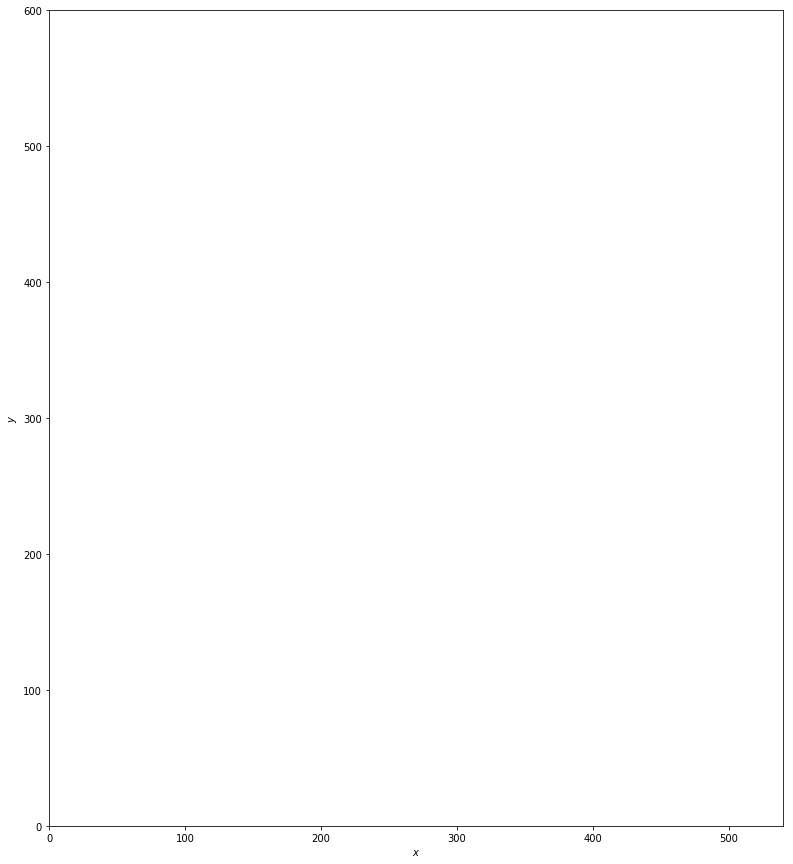

angle 0.0
move (3.0, 0.0)
1457.97897169 442.959393917
447


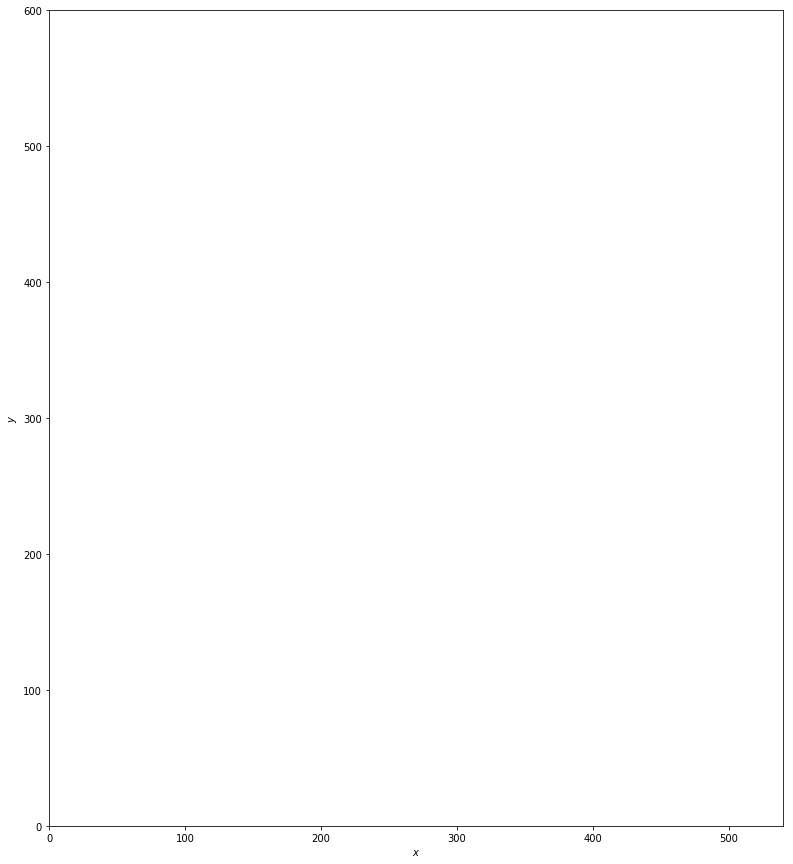

angle 0.0
move (3.0, 0.0)
1460.97897169 442.959393917
448


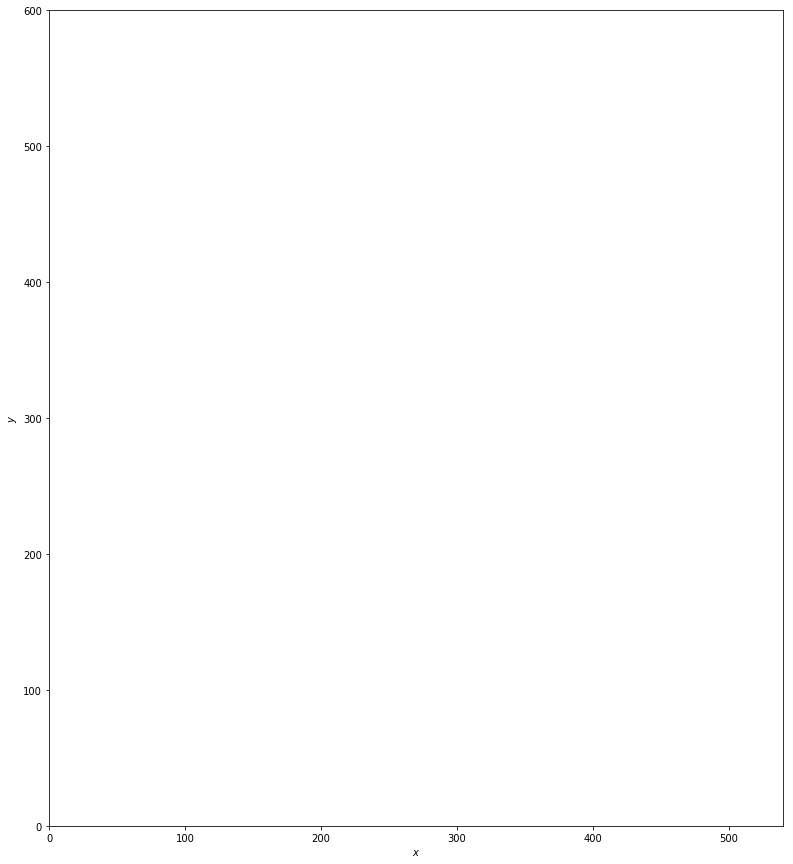

angle 0.0
move (3.0, 0.0)
1463.97897169 442.959393917
449


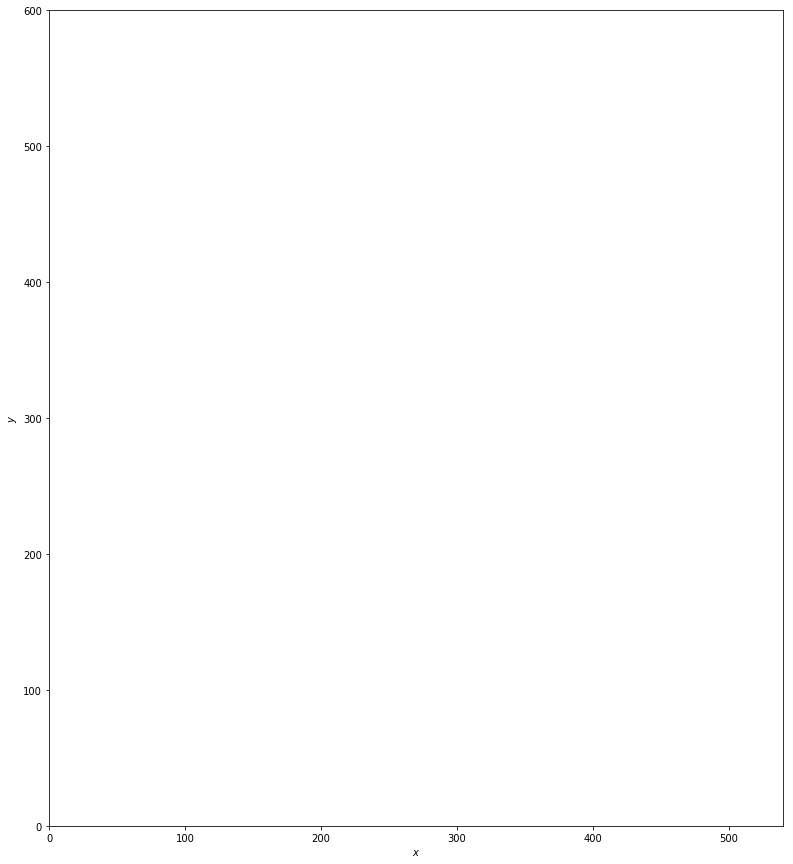

angle 0.0
move (3.0, 0.0)
1466.97897169 442.959393917
450


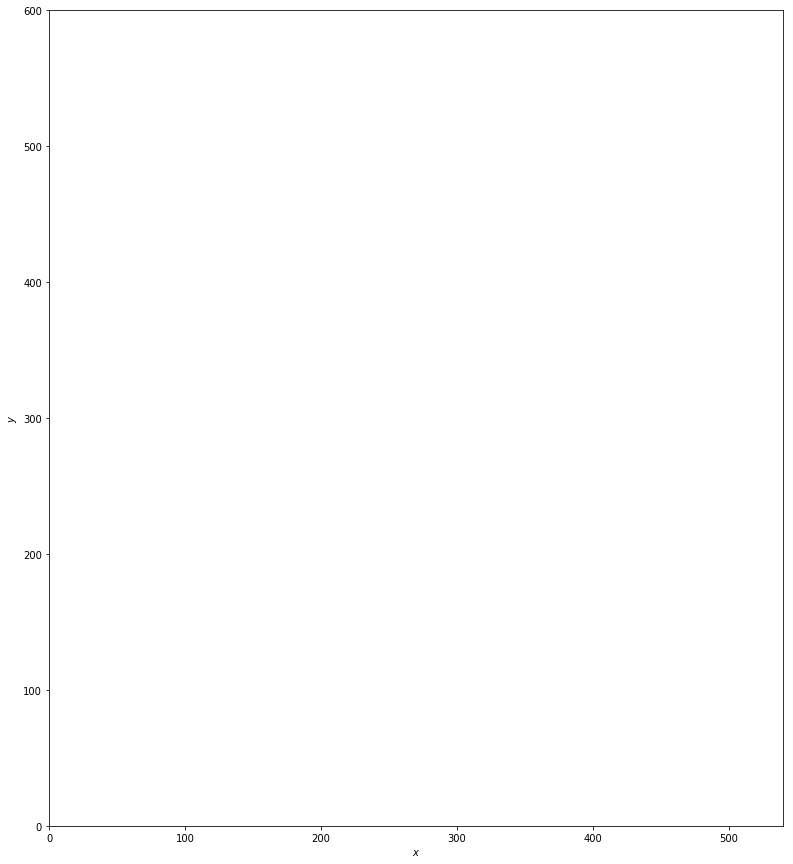

angle 0.0
move (3.0, 0.0)
1469.97897169 442.959393917
451


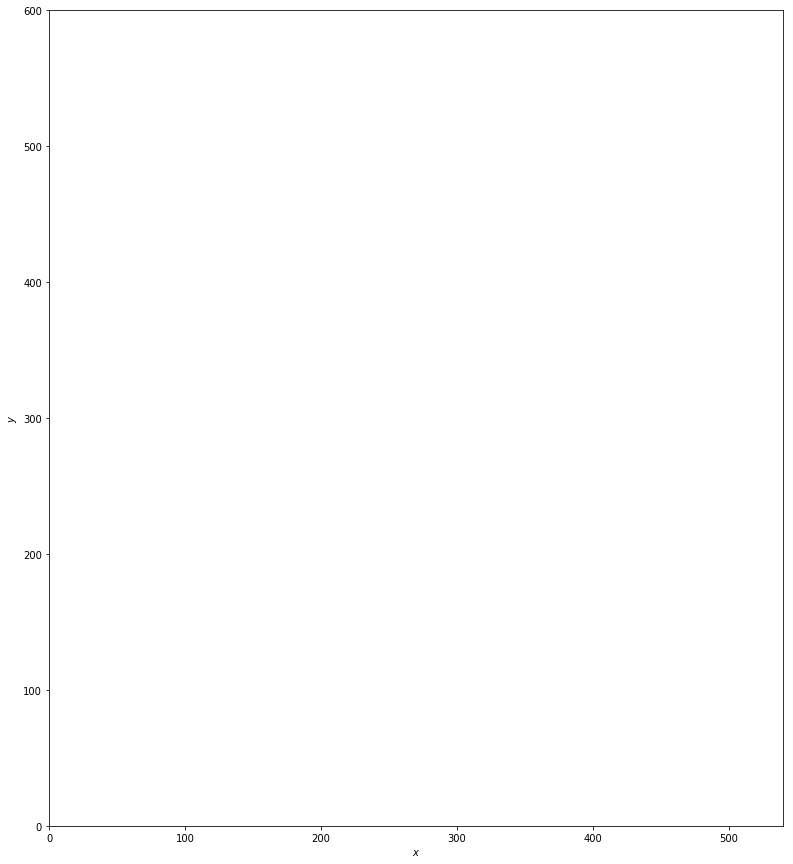

angle 0.0
move (3.0, 0.0)
1472.97897169 442.959393917
452


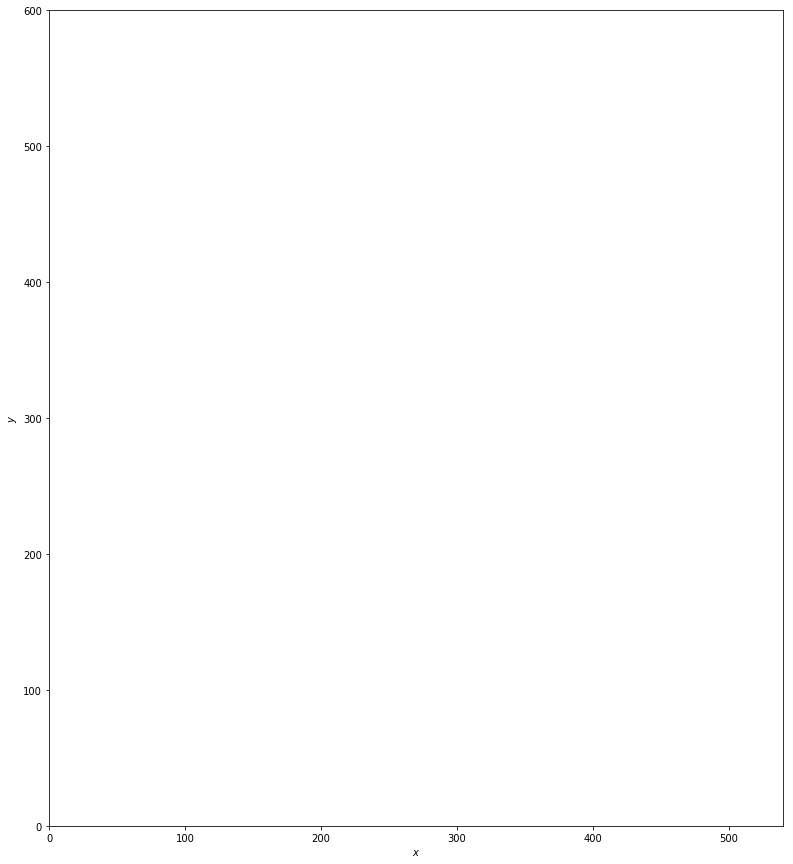

angle 0.0
move (3.0, 0.0)
1475.97897169 442.959393917
453


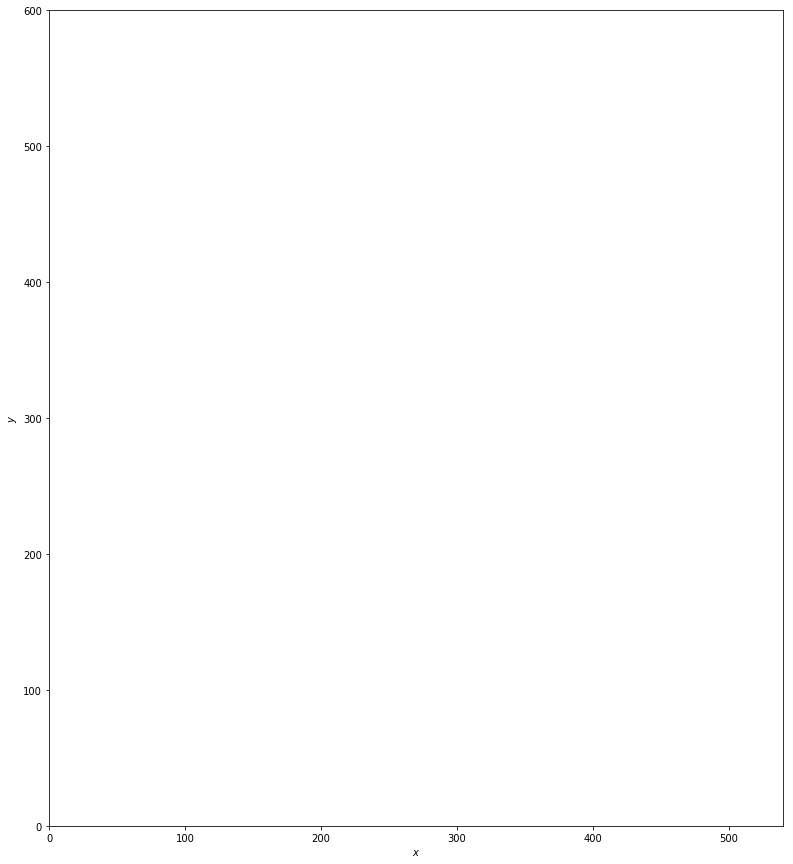

angle 0.0
move (3.0, 0.0)
1478.97897169 442.959393917
454


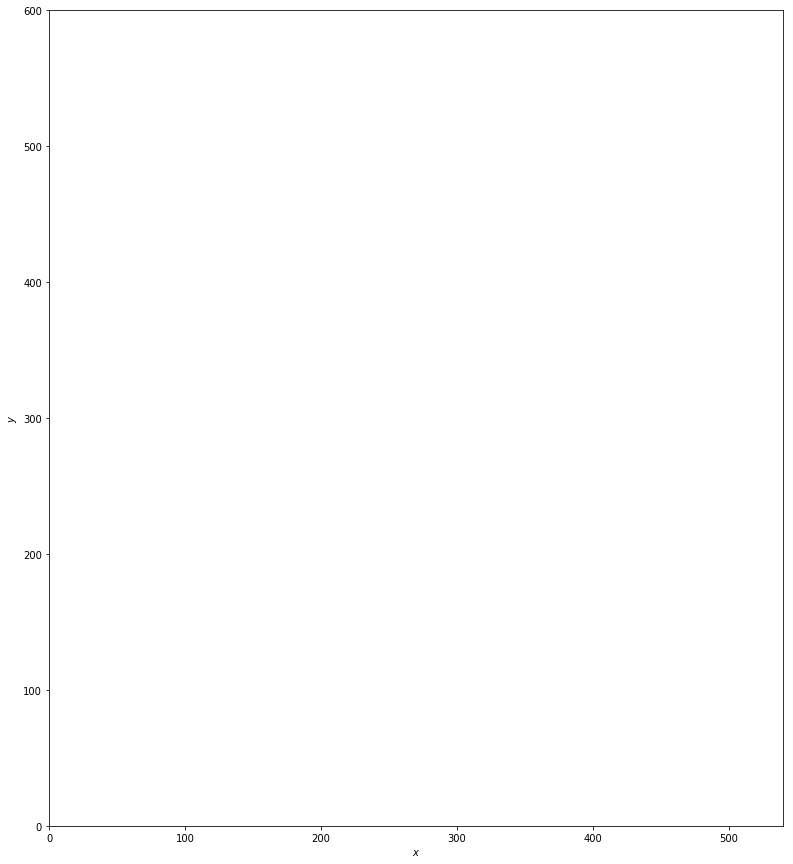

angle 0.0
move (3.0, 0.0)
1481.97897169 442.959393917
455


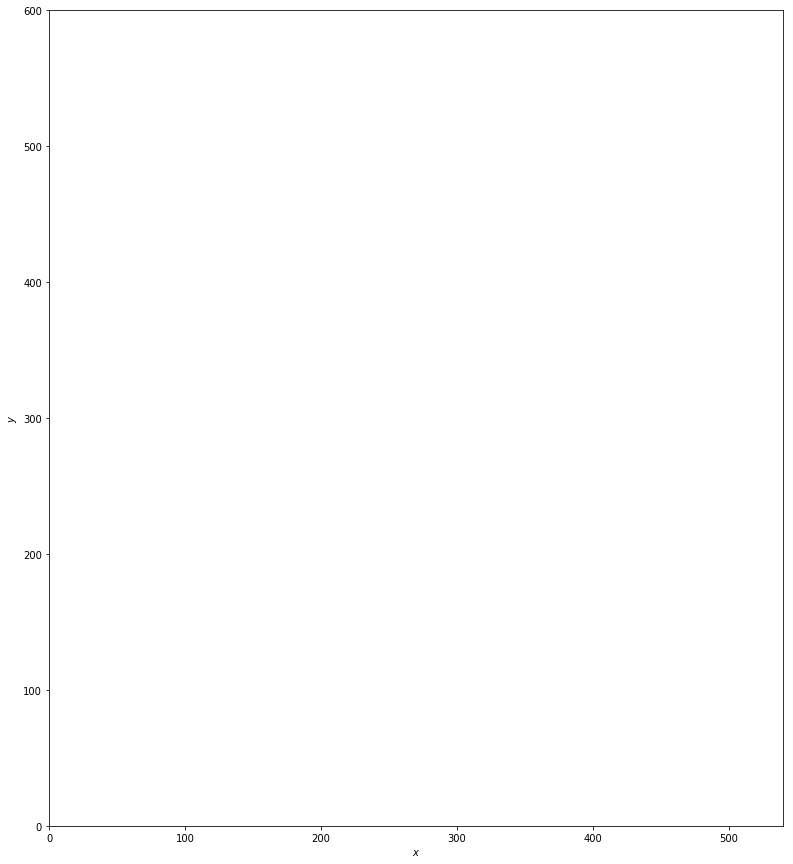

angle 0.0
move (3.0, 0.0)
1484.97897169 442.959393917
456


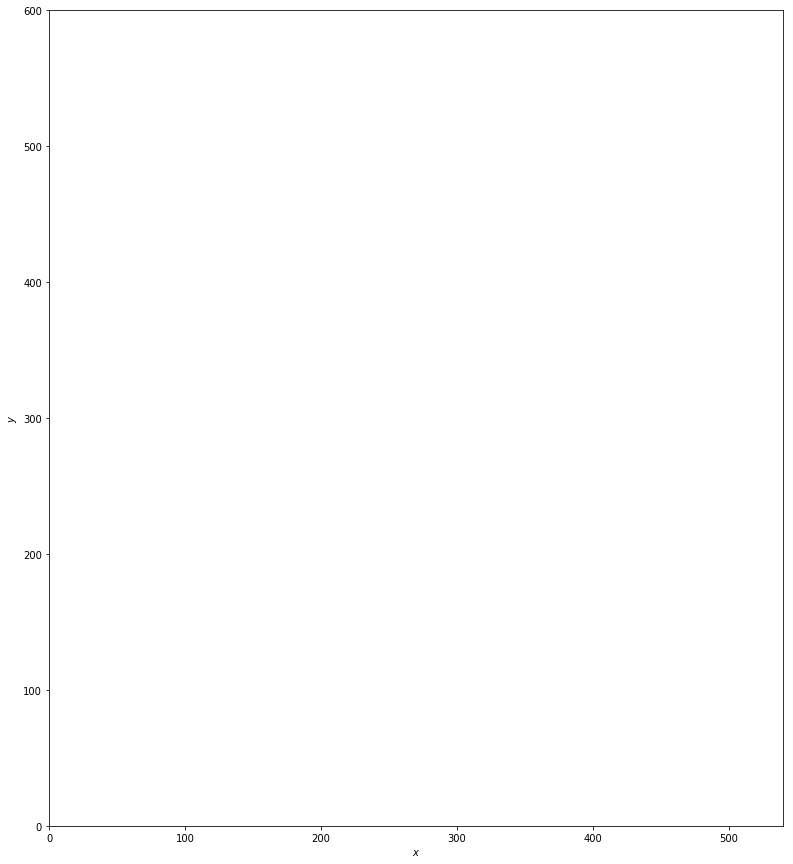

angle 0.0
move (3.0, 0.0)
1487.97897169 442.959393917
457


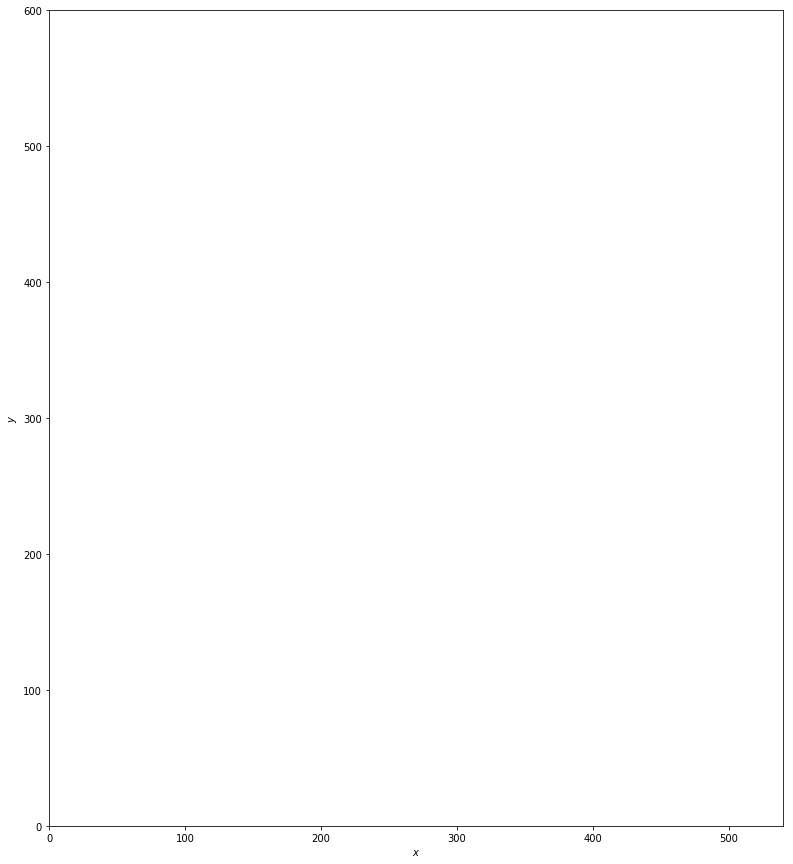

angle 0.0
move (3.0, 0.0)
1490.97897169 442.959393917
458


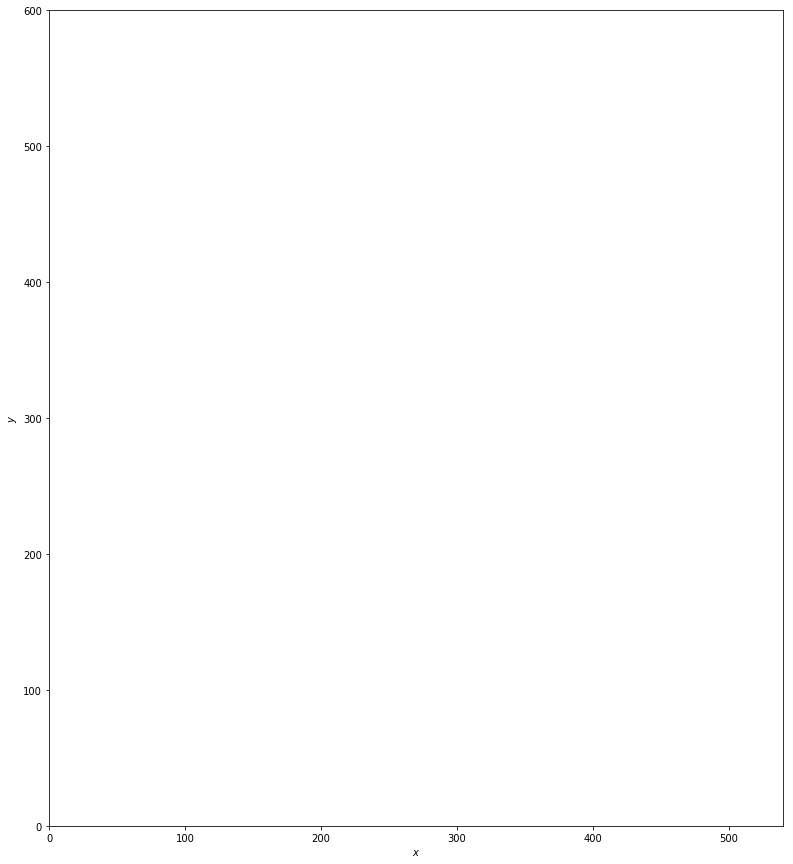

angle 0.0
move (3.0, 0.0)
1493.97897169 442.959393917
459


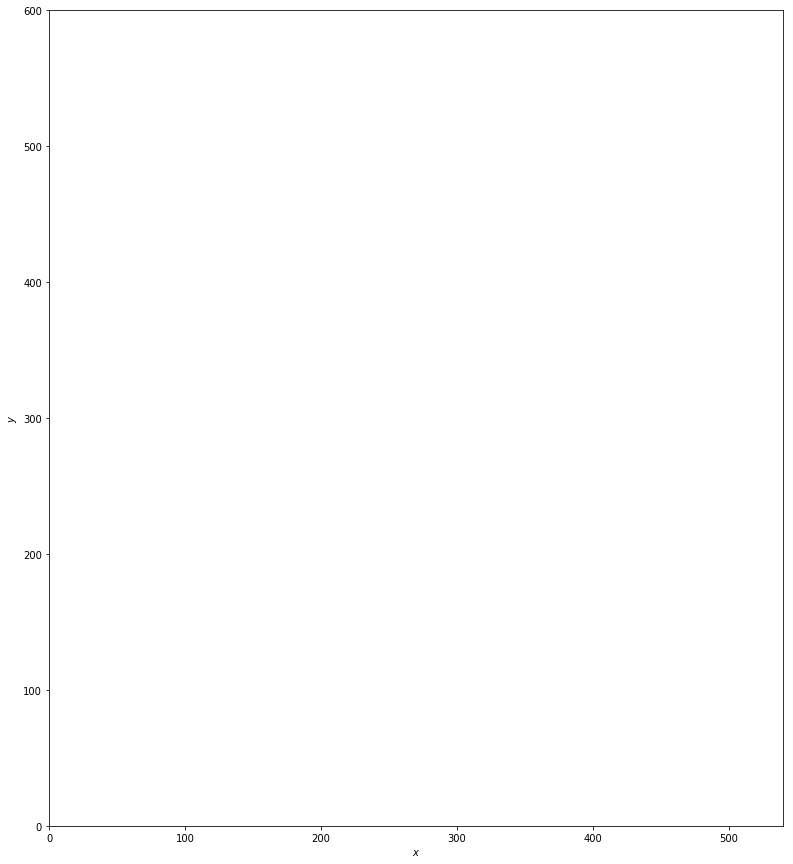

angle 0.0
move (3.0, 0.0)
1496.97897169 442.959393917
460


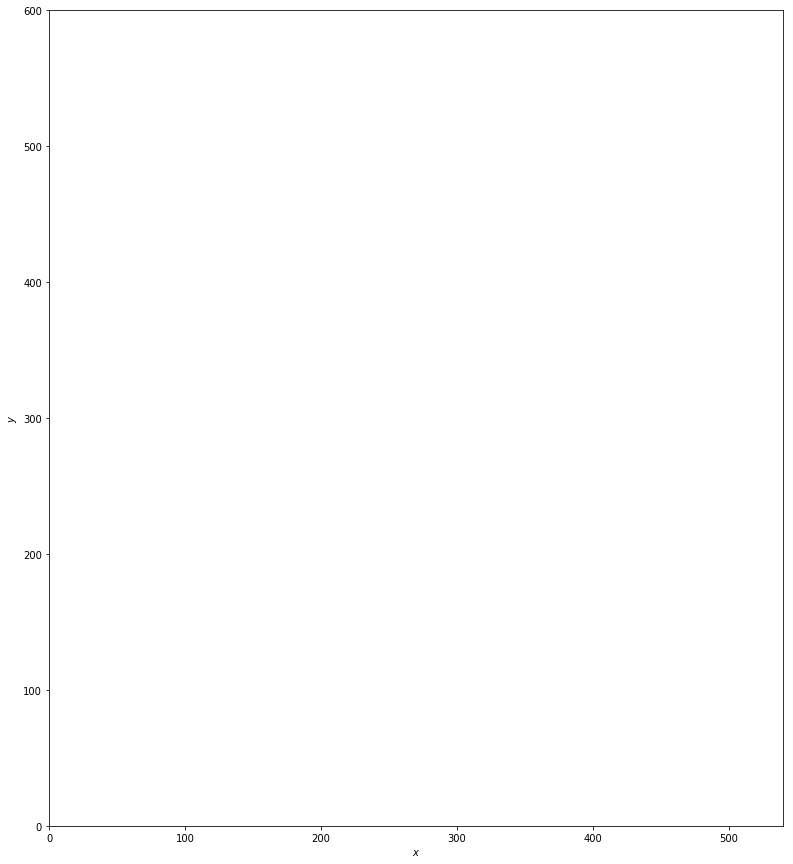

angle 0.0
move (3.0, 0.0)
1499.97897169 442.959393917
461


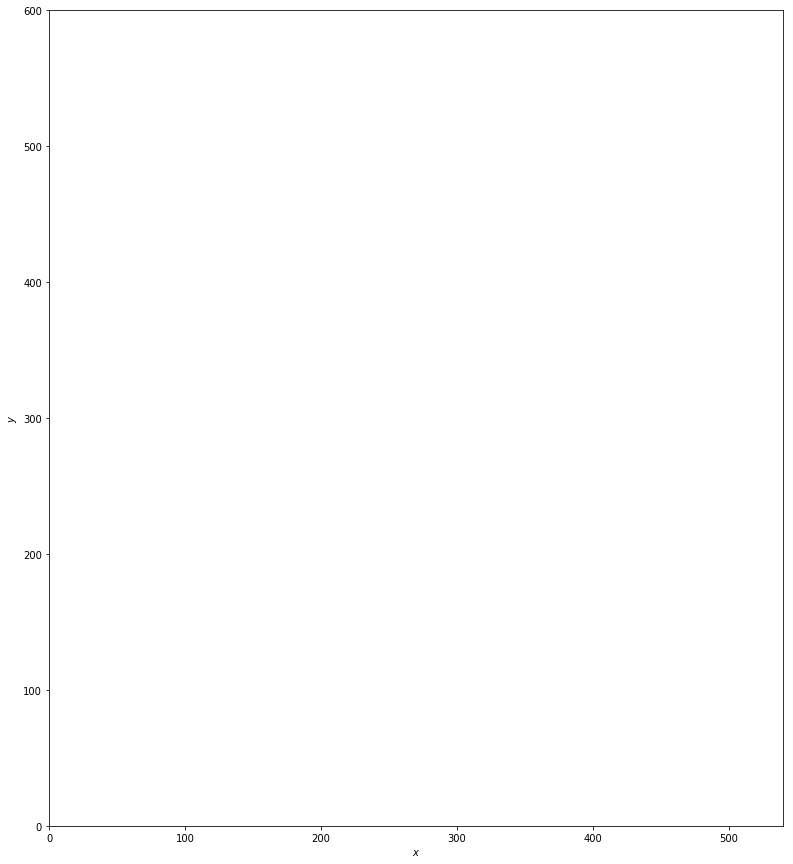

angle 0.0
move (3.0, 0.0)
1502.97897169 442.959393917
462


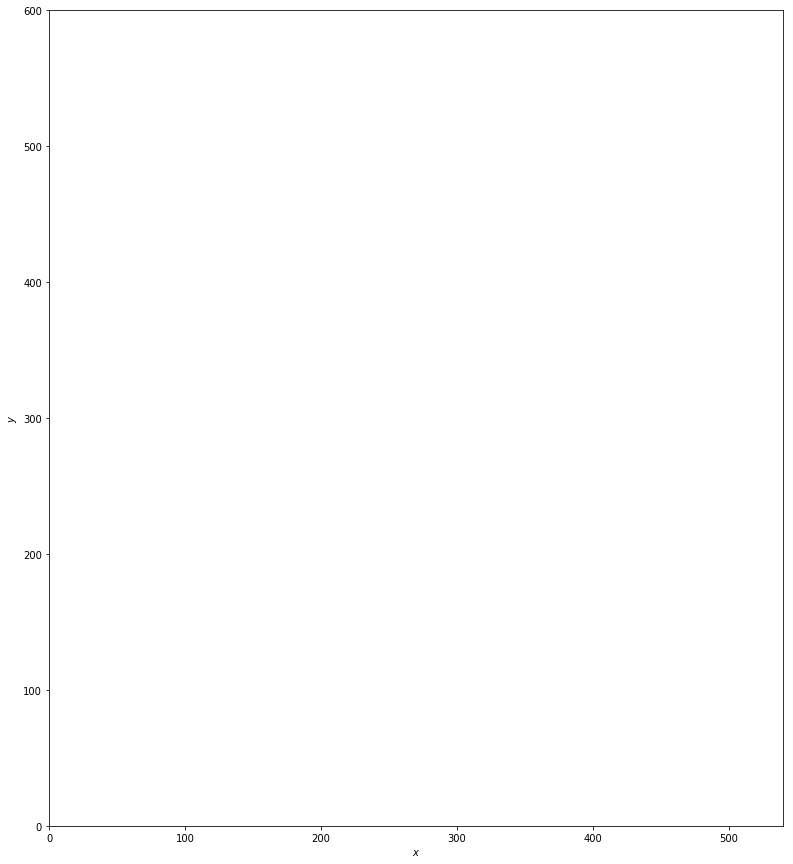

angle 0.0
move (3.0, 0.0)
1505.97897169 442.959393917
463


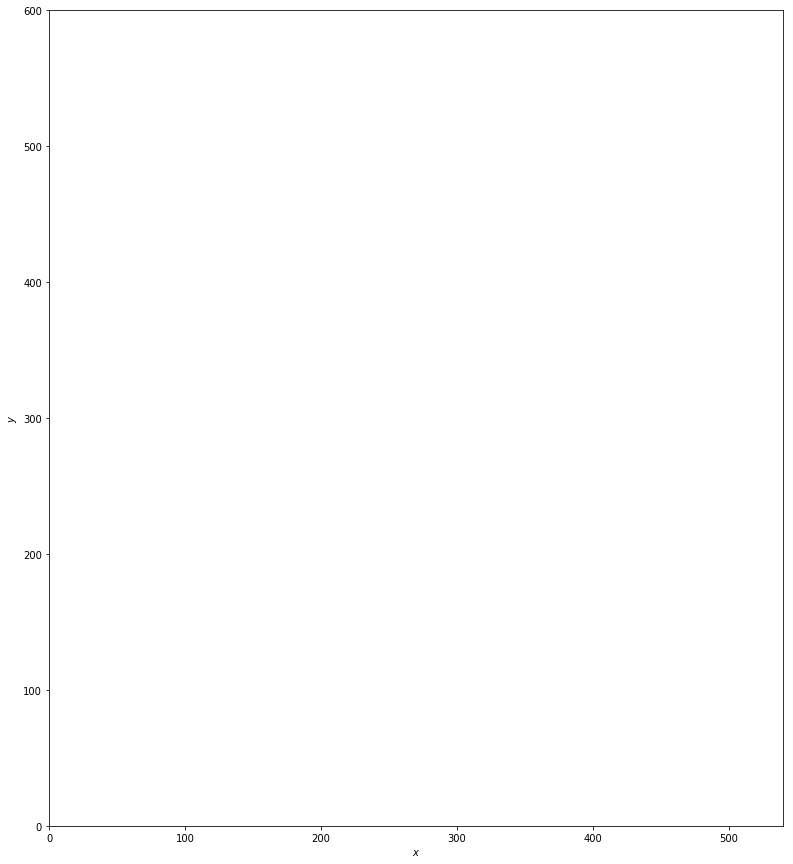

angle 0.0
move (3.0, 0.0)
1508.97897169 442.959393917
464


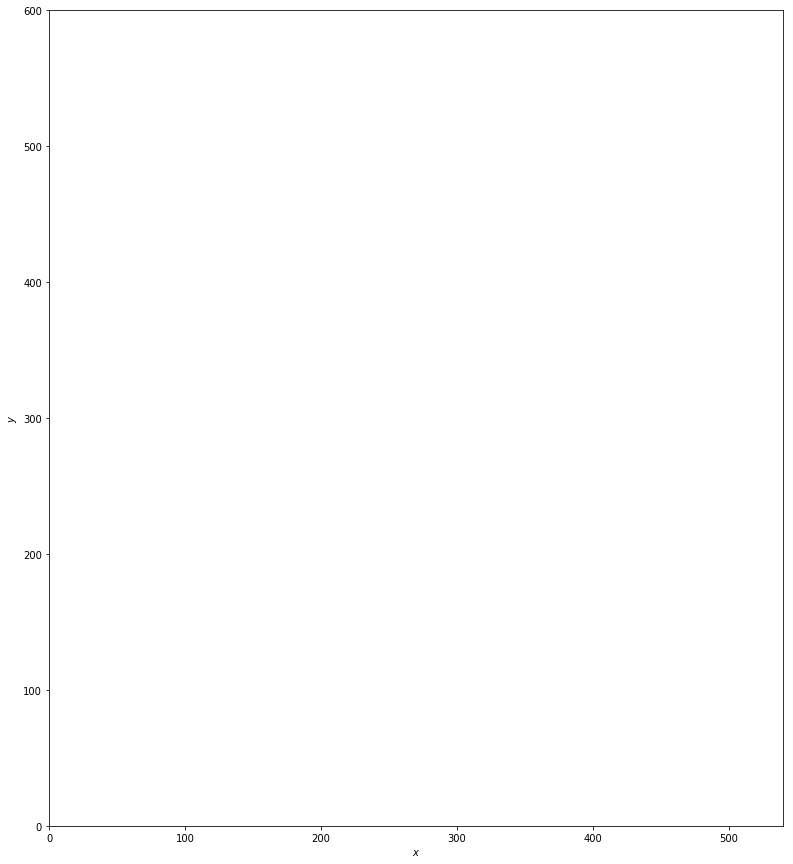

angle 0.0
move (3.0, 0.0)
1511.97897169 442.959393917
465


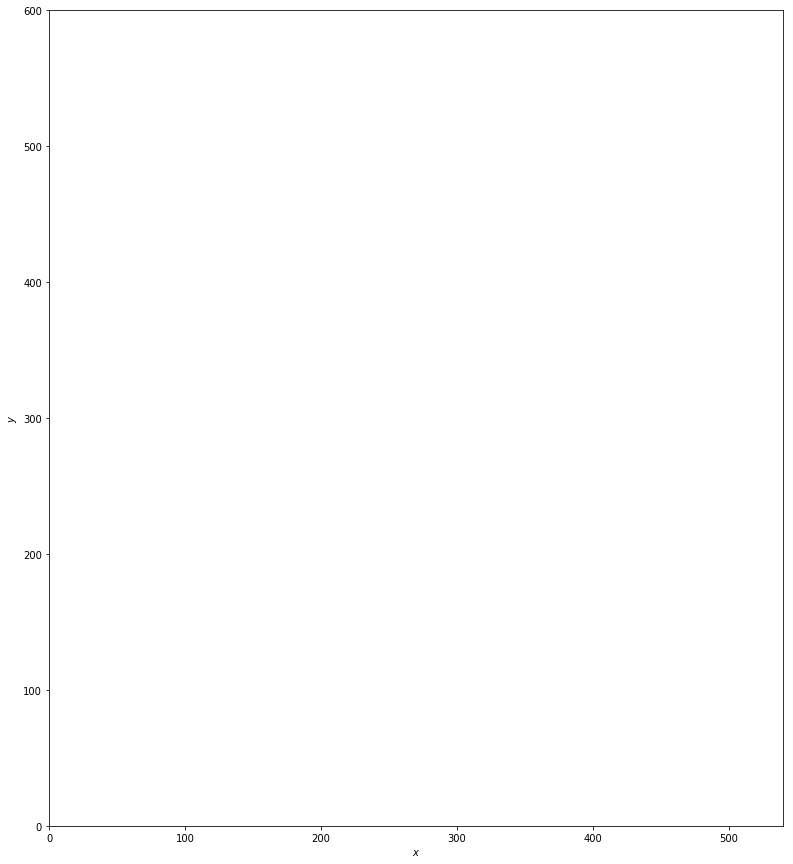

angle 0.0
move (3.0, 0.0)
1514.97897169 442.959393917
466


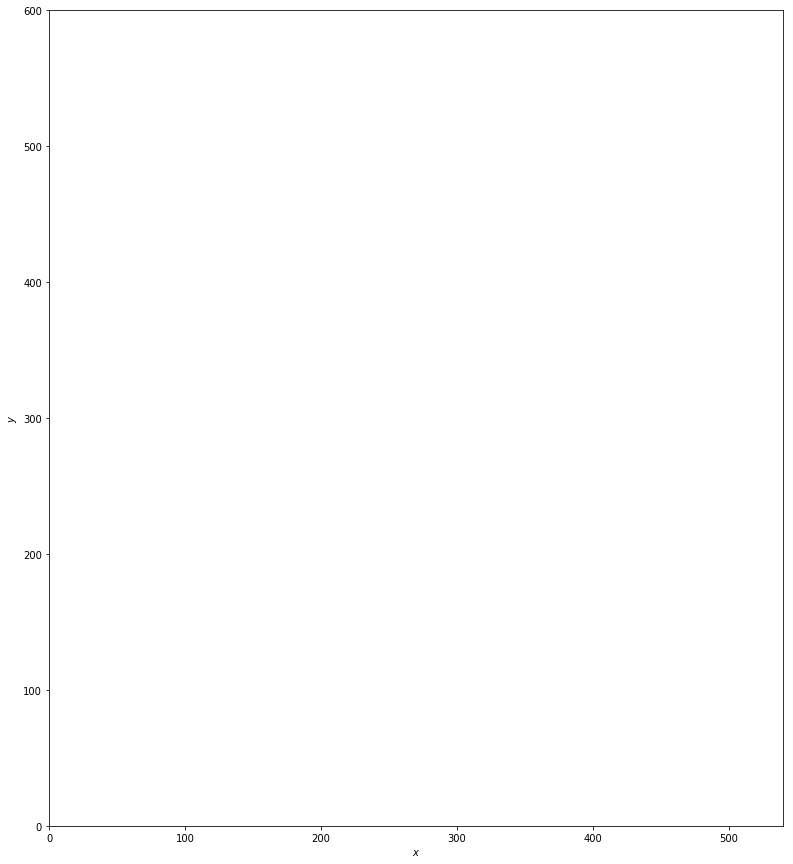

angle 0.0
move (3.0, 0.0)
1517.97897169 442.959393917
467


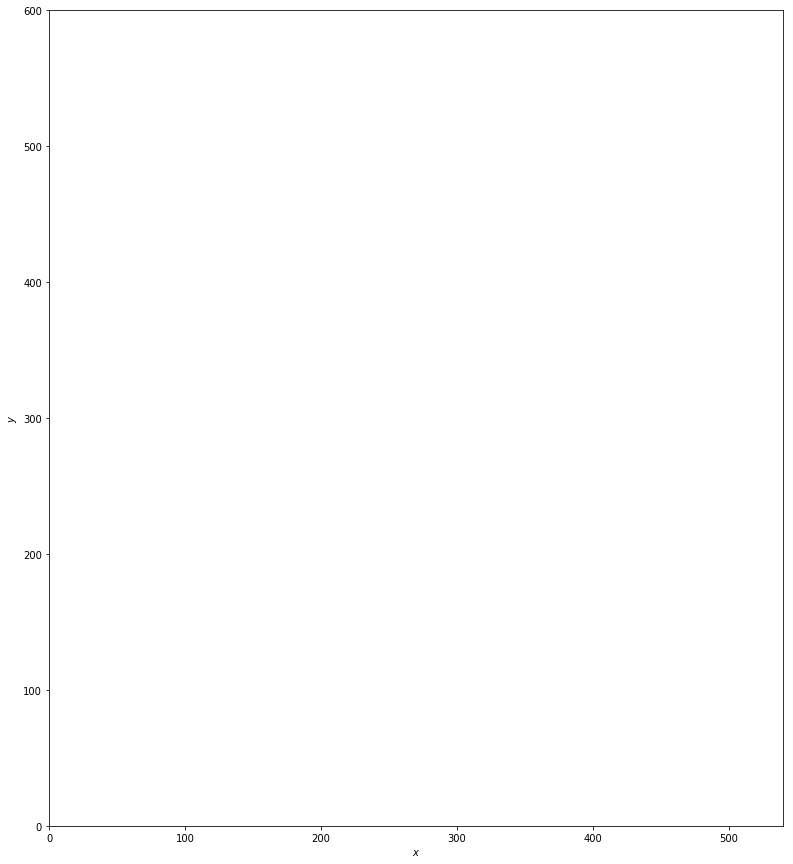

angle 0.0
move (3.0, 0.0)
1520.97897169 442.959393917
468


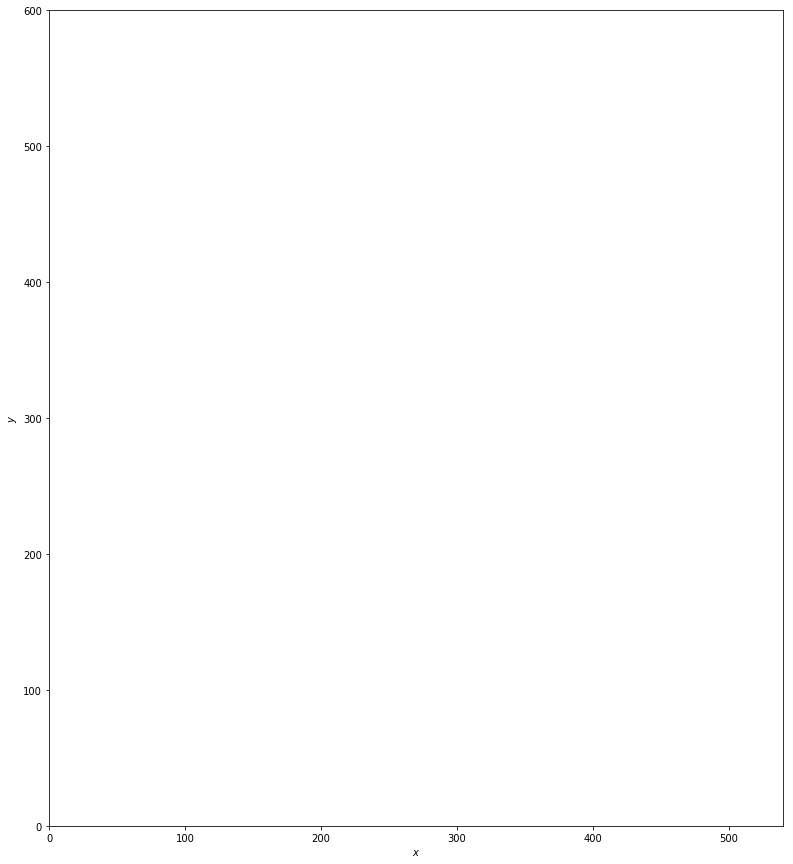

angle 0.0
move (3.0, 0.0)
1523.97897169 442.959393917
469


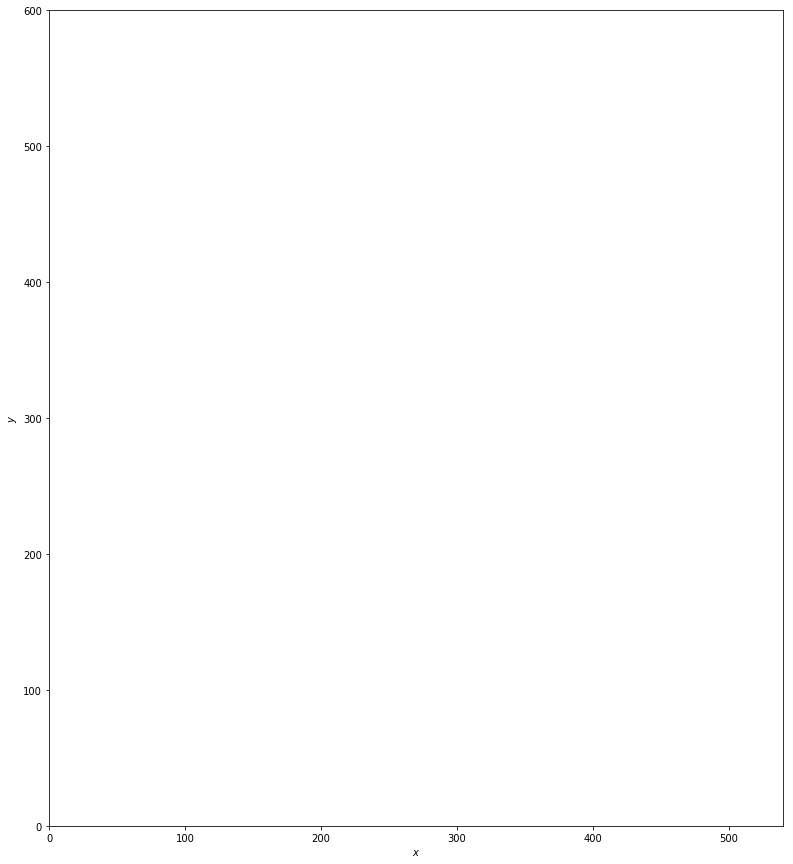

angle 0.0
move (3.0, 0.0)
1526.97897169 442.959393917
470


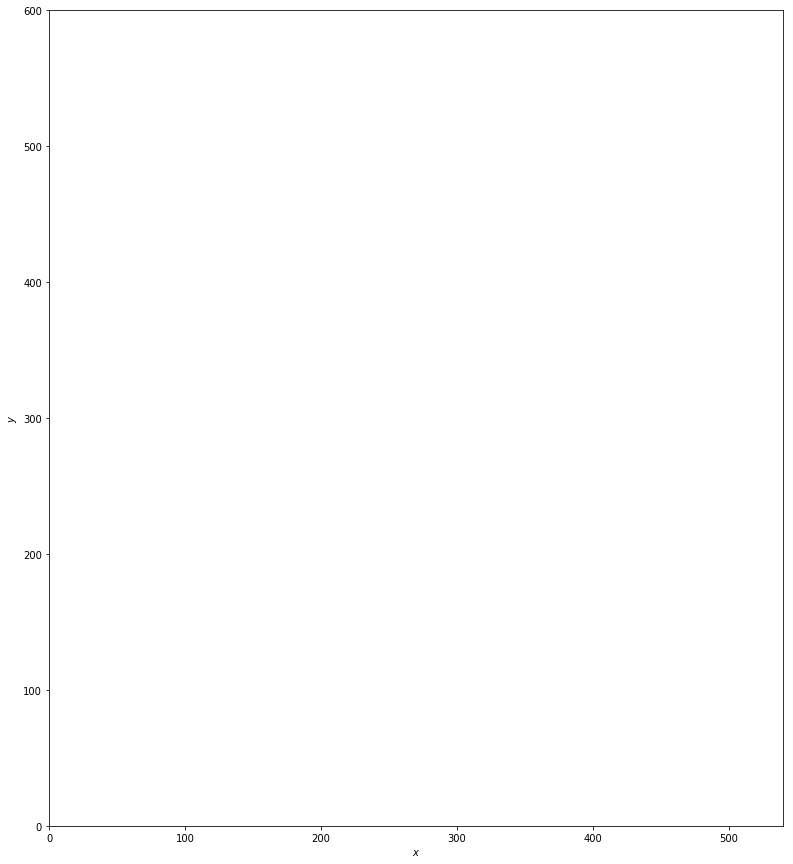

angle 0.0
move (3.0, 0.0)
1529.97897169 442.959393917
471


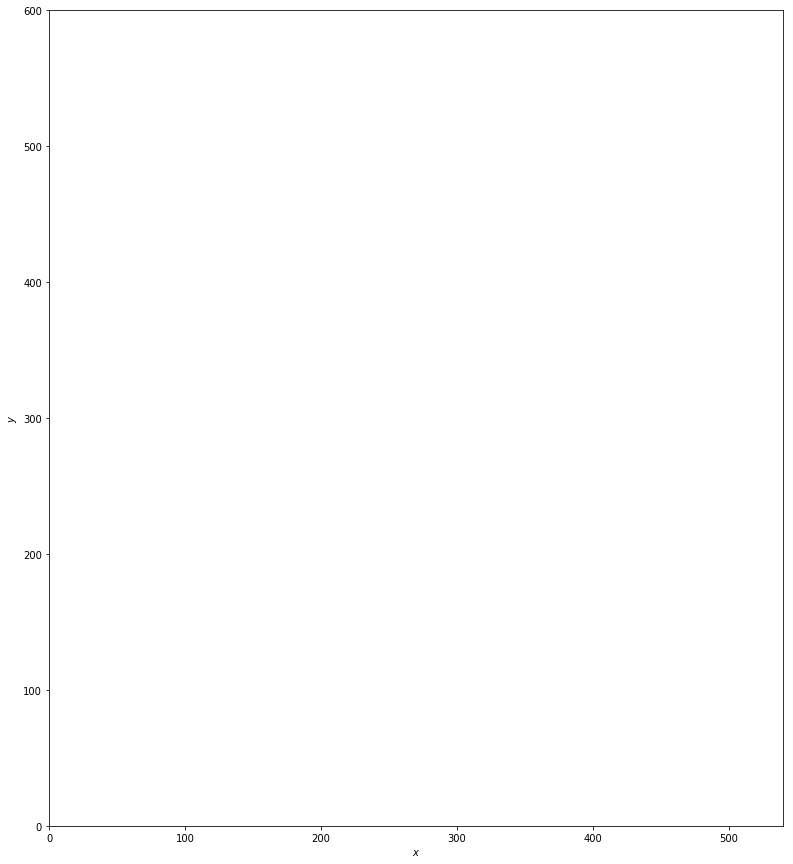

angle 0.0
move (3.0, 0.0)
1532.97897169 442.959393917
472


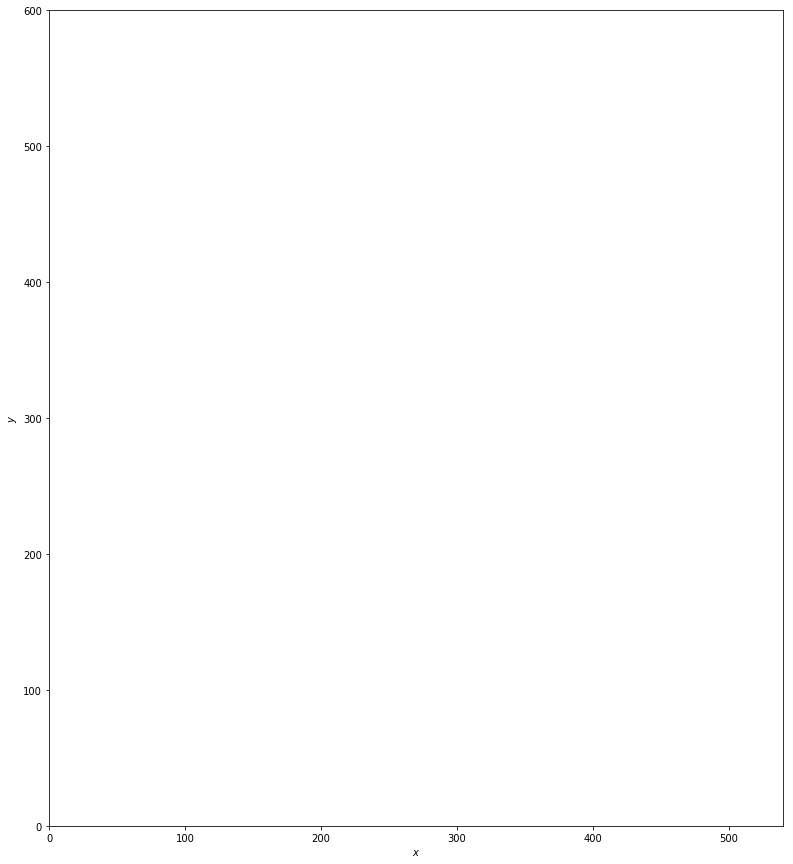

angle 0.0
move (3.0, 0.0)
1535.97897169 442.959393917
473


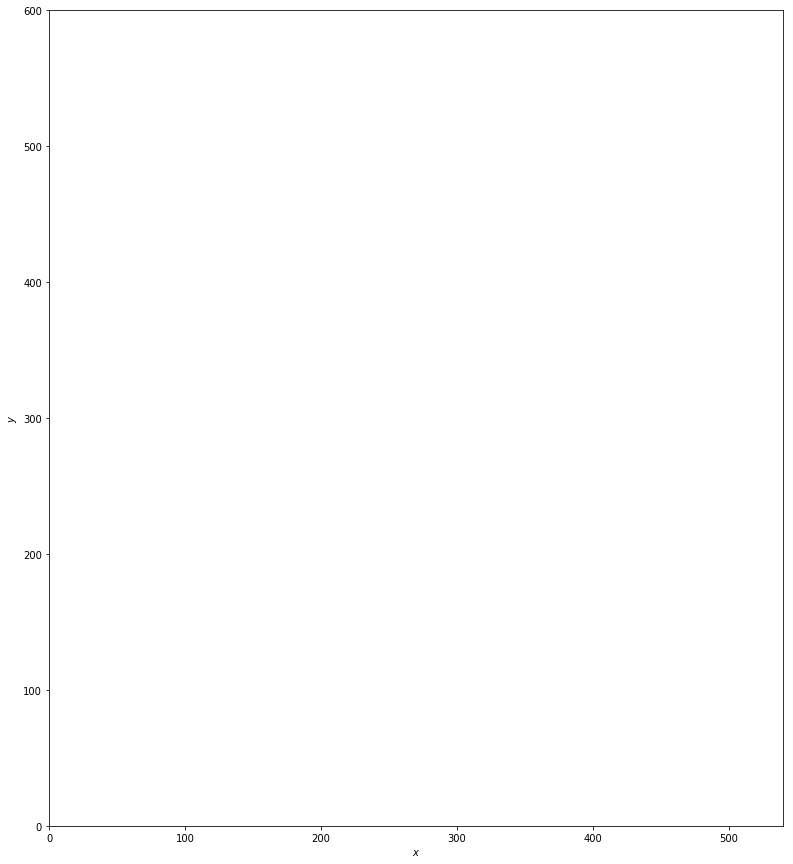

angle 0.0
move (3.0, 0.0)
1538.97897169 442.959393917
474


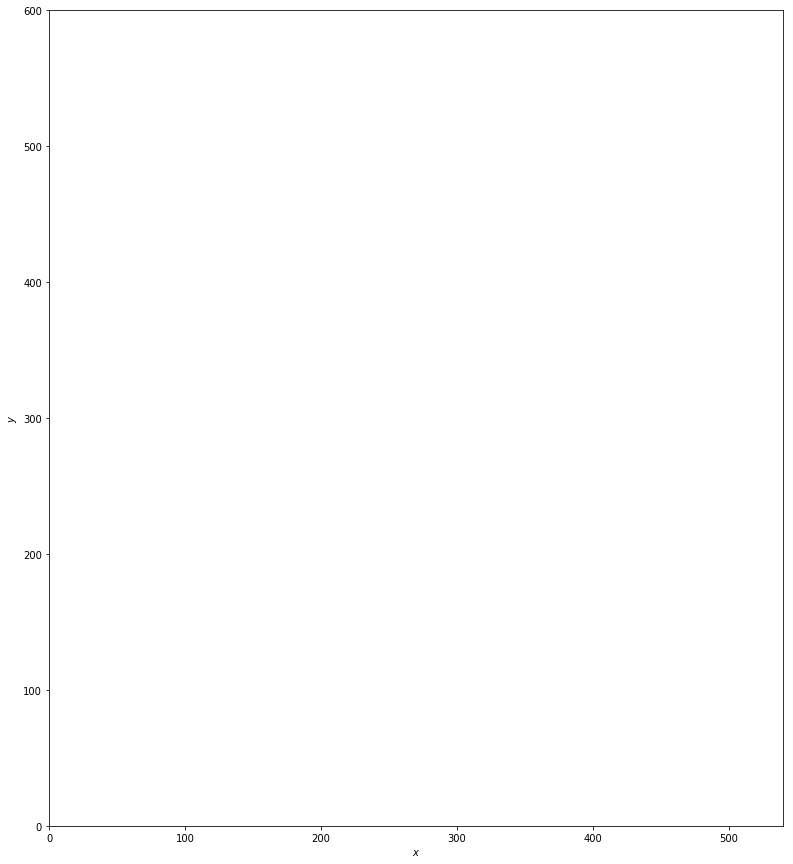

angle 0.0
move (3.0, 0.0)
1541.97897169 442.959393917
475


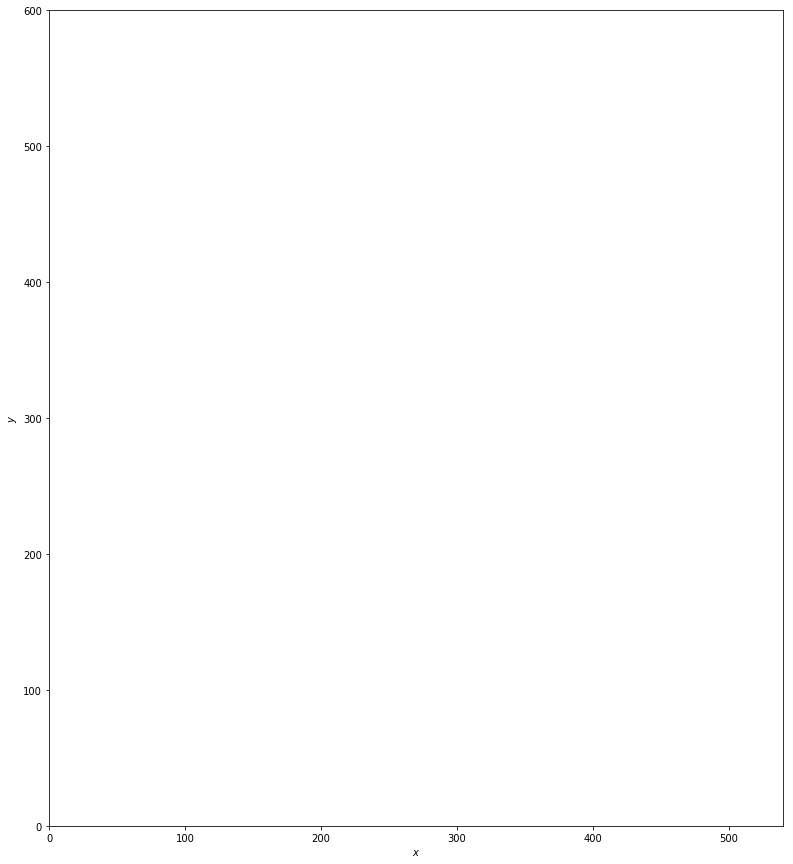

angle 0.0
move (3.0, 0.0)
1544.97897169 442.959393917
476


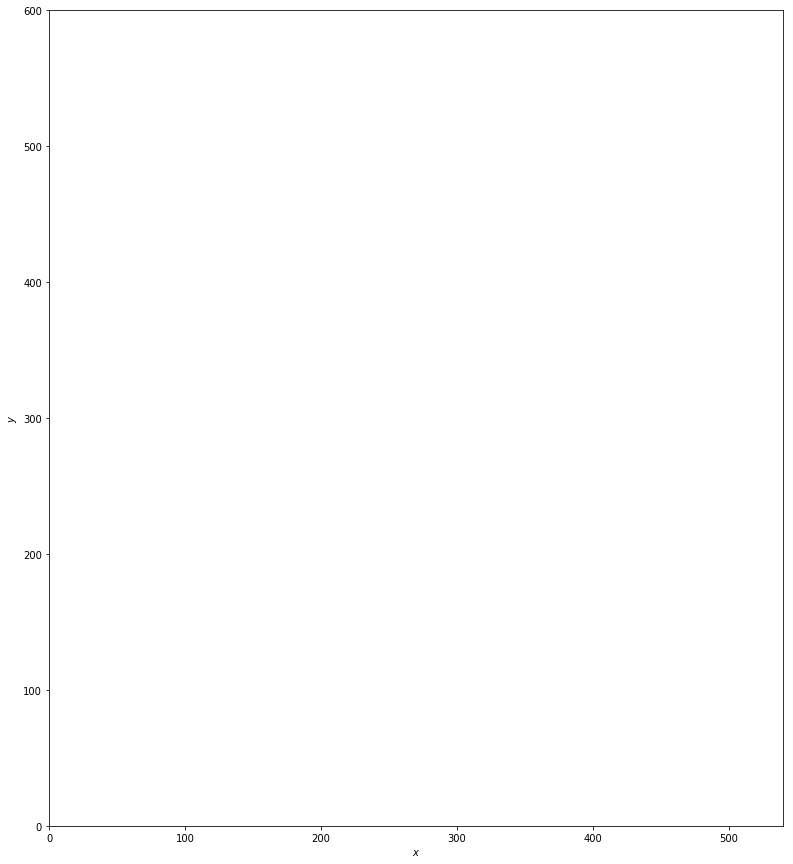

angle 0.0
move (3.0, 0.0)
1547.97897169 442.959393917
477


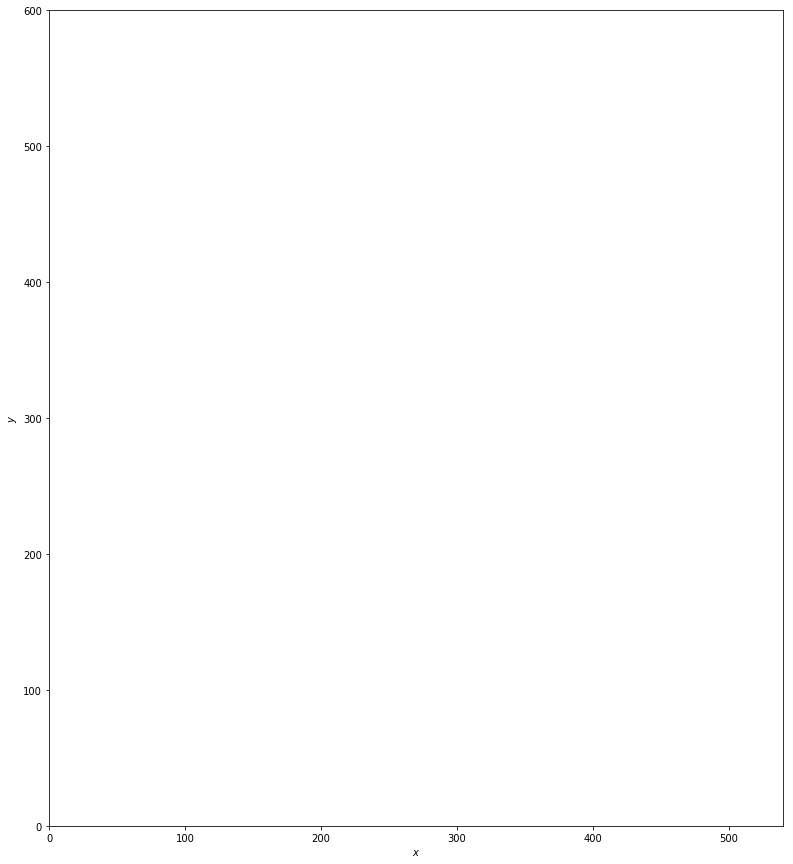

angle 0.0
move (3.0, 0.0)
1550.97897169 442.959393917
478


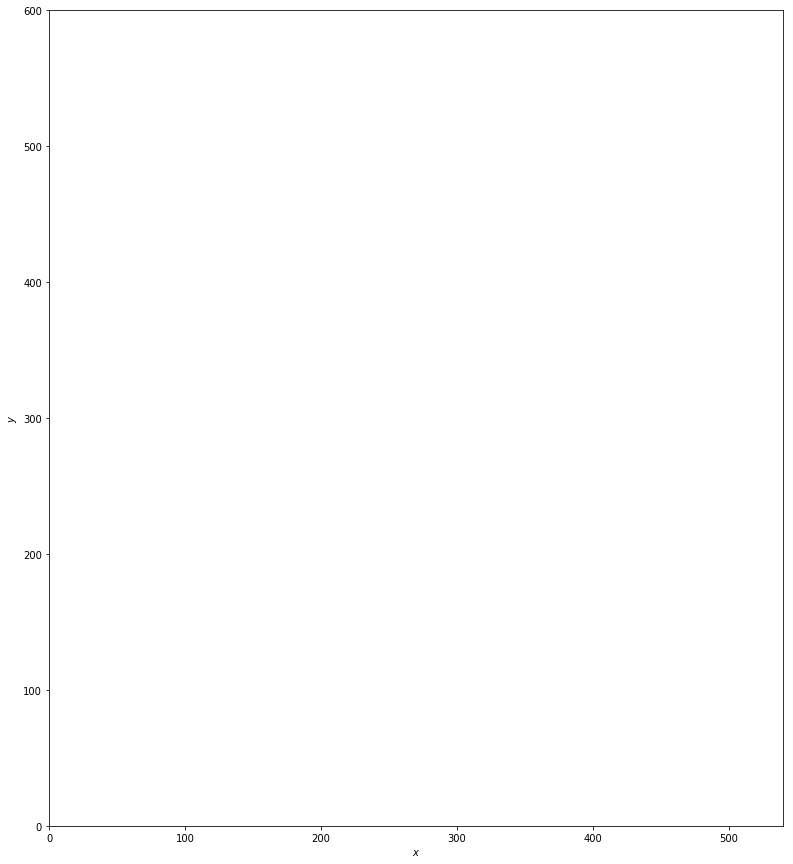

angle 0.0
move (3.0, 0.0)
1553.97897169 442.959393917
479


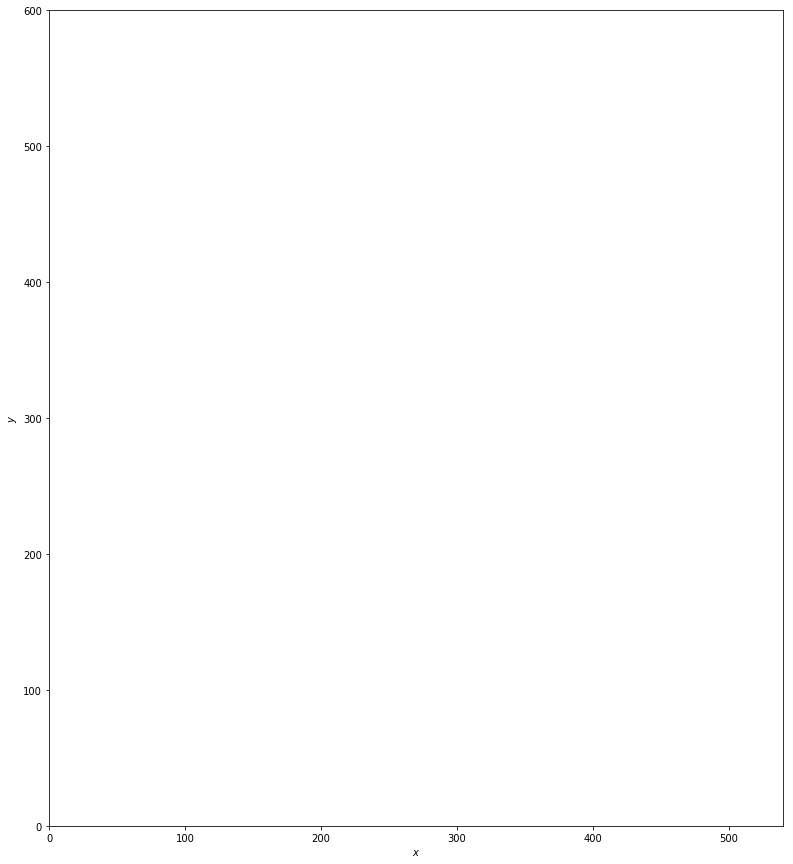

angle 0.0
move (3.0, 0.0)
1556.97897169 442.959393917
480


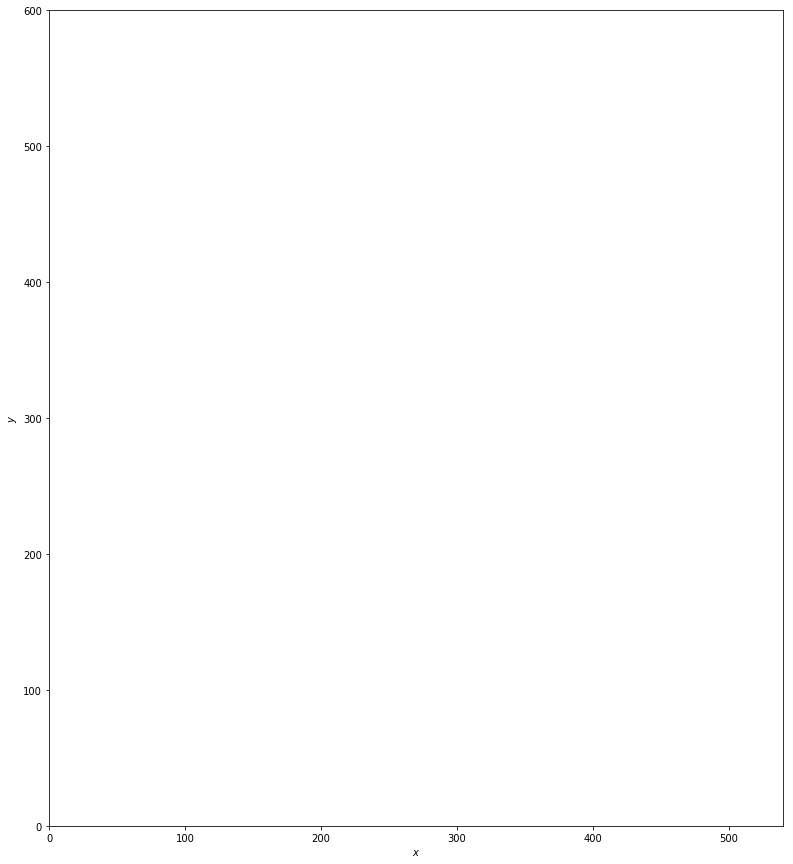

angle 0.0
move (3.0, 0.0)
1559.97897169 442.959393917
481


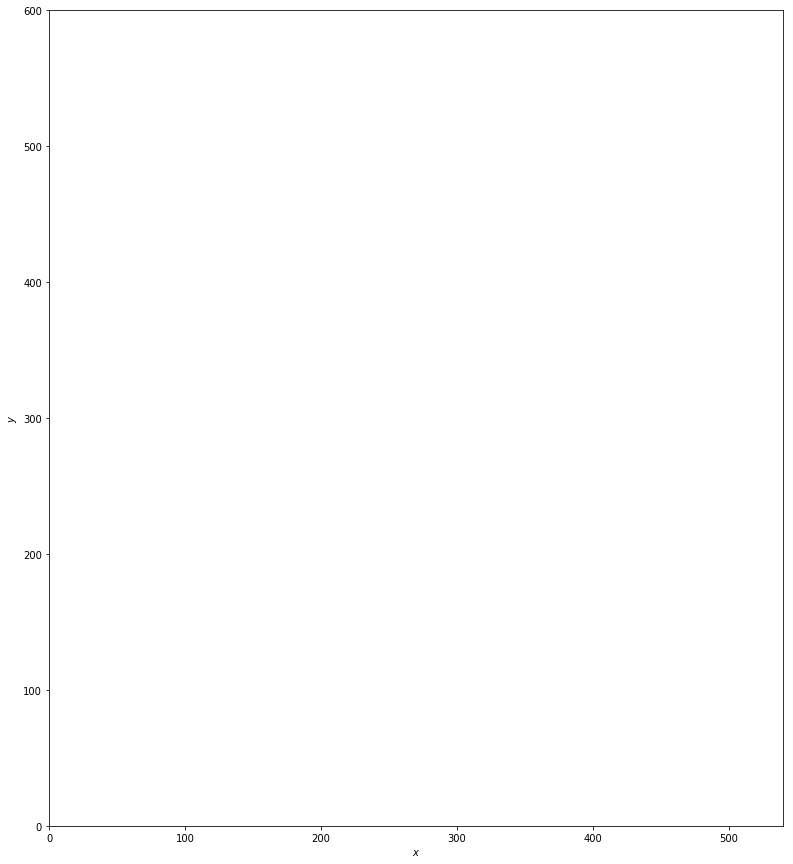

angle 0.0
move (3.0, 0.0)
1562.97897169 442.959393917
482


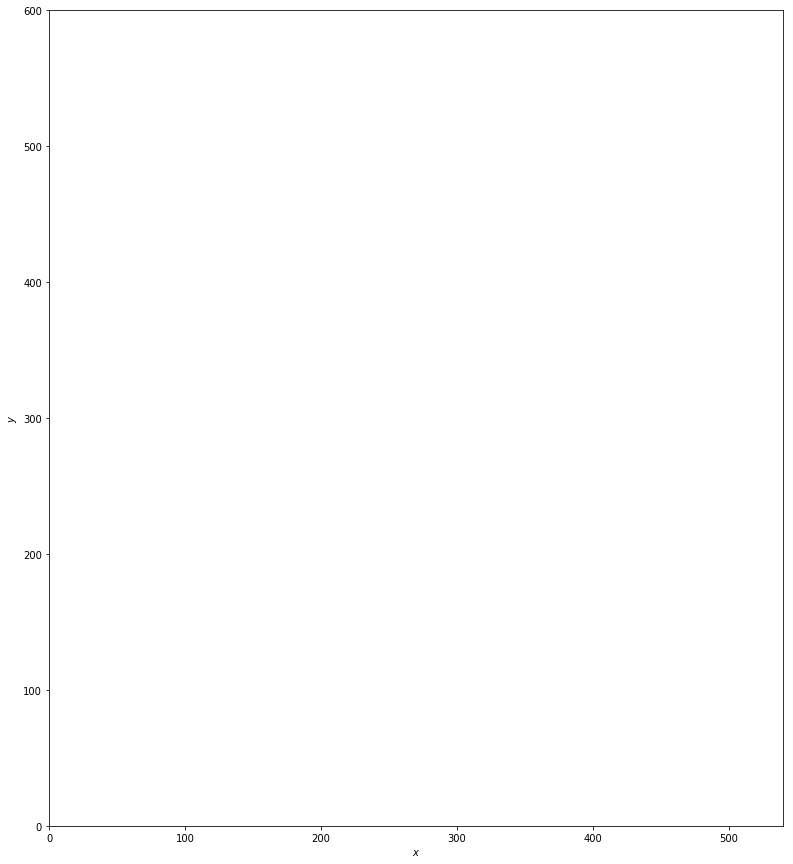

angle 0.0
move (3.0, 0.0)
1565.97897169 442.959393917
483


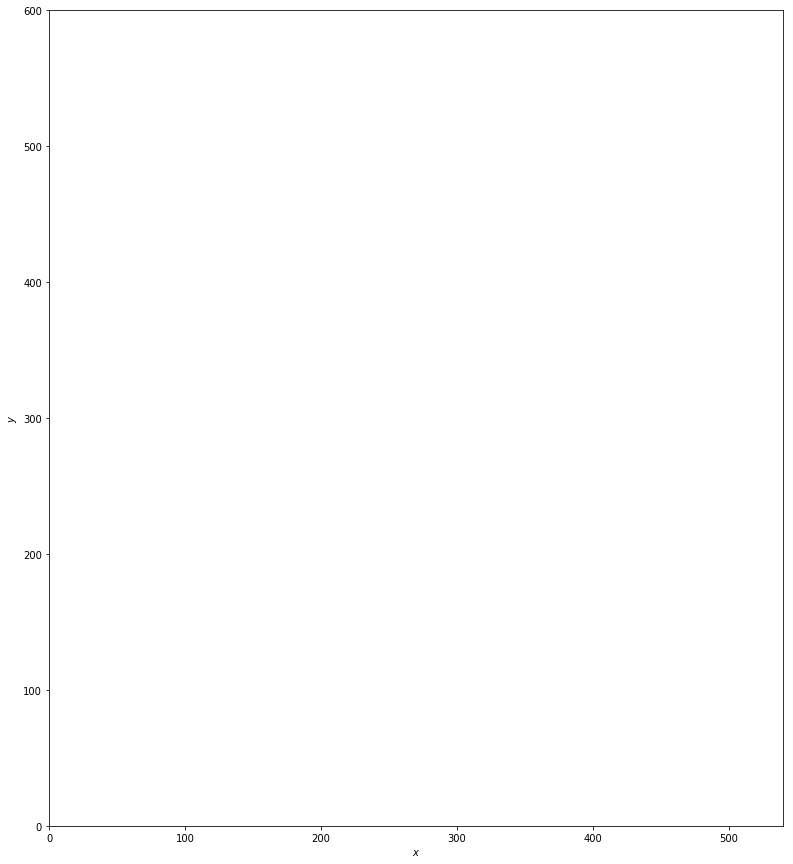

angle 0.0
move (3.0, 0.0)
1568.97897169 442.959393917
484


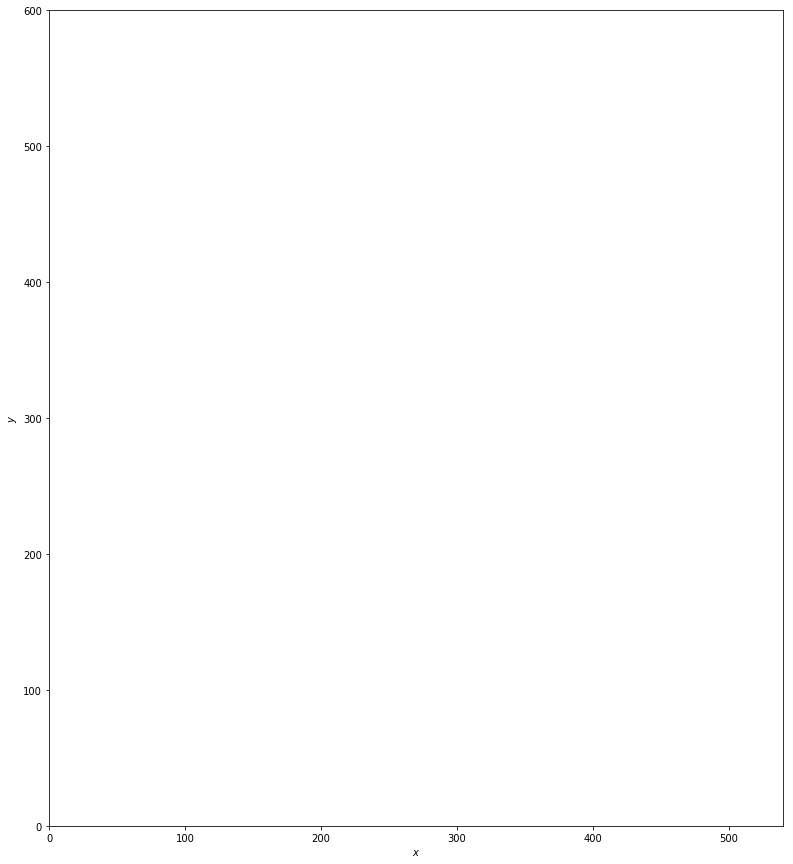

angle 0.0
move (3.0, 0.0)
1571.97897169 442.959393917
485


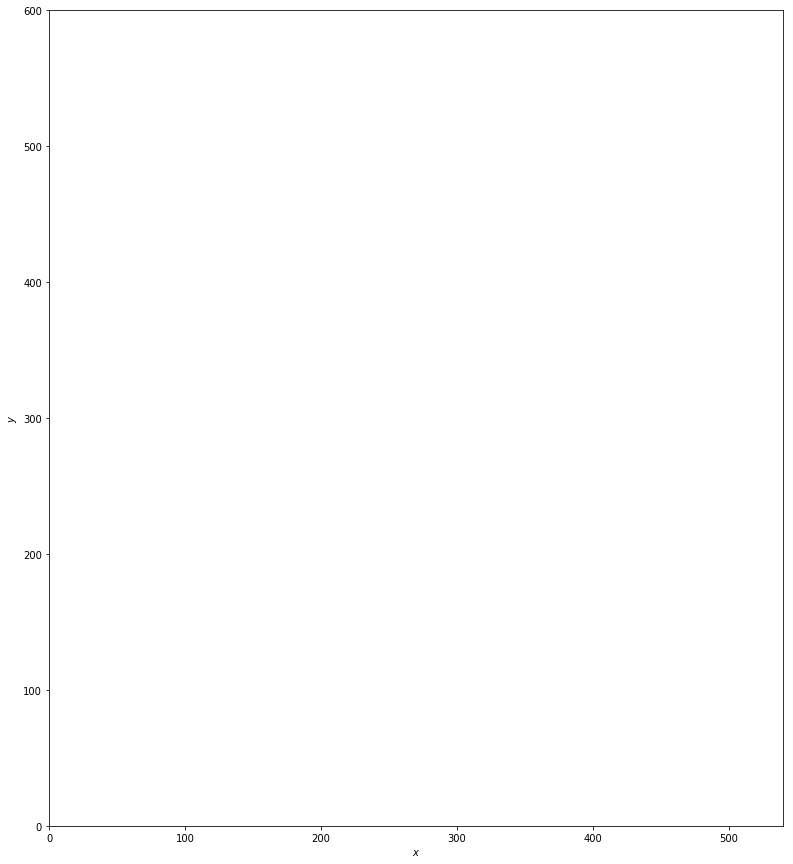

angle 0.0
move (3.0, 0.0)
1574.97897169 442.959393917
486


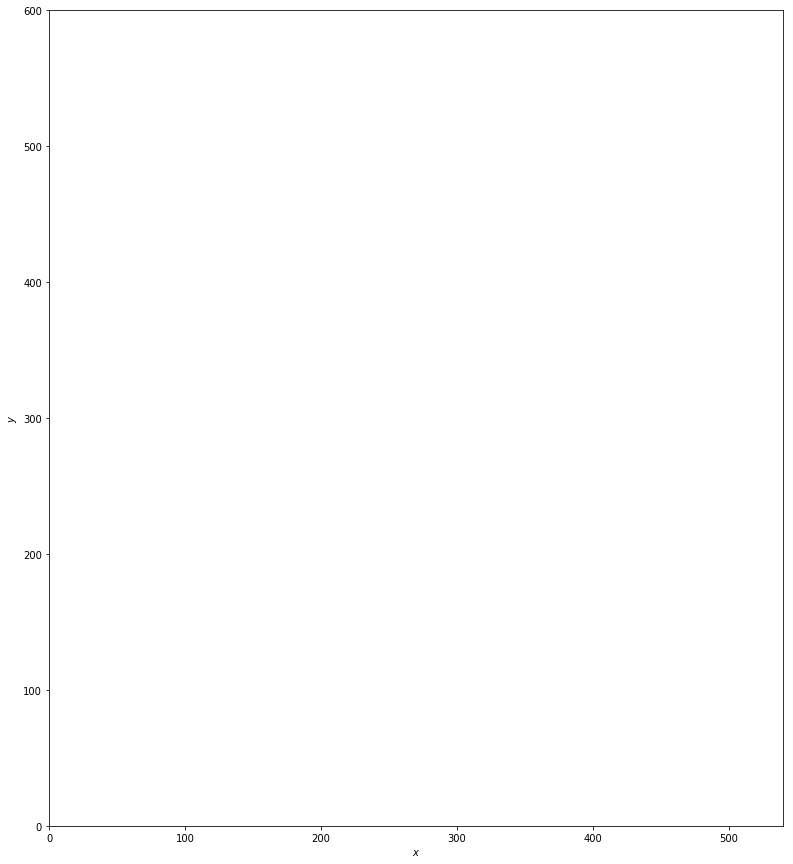

angle 0.0
move (3.0, 0.0)
1577.97897169 442.959393917
487


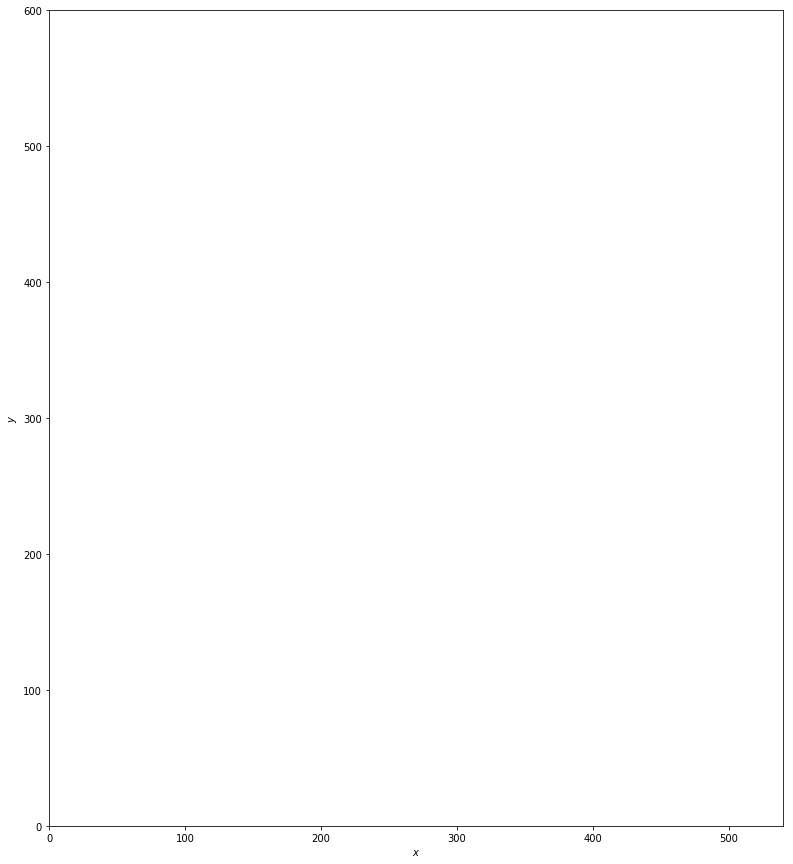

angle 0.0
move (3.0, 0.0)
1580.97897169 442.959393917
488


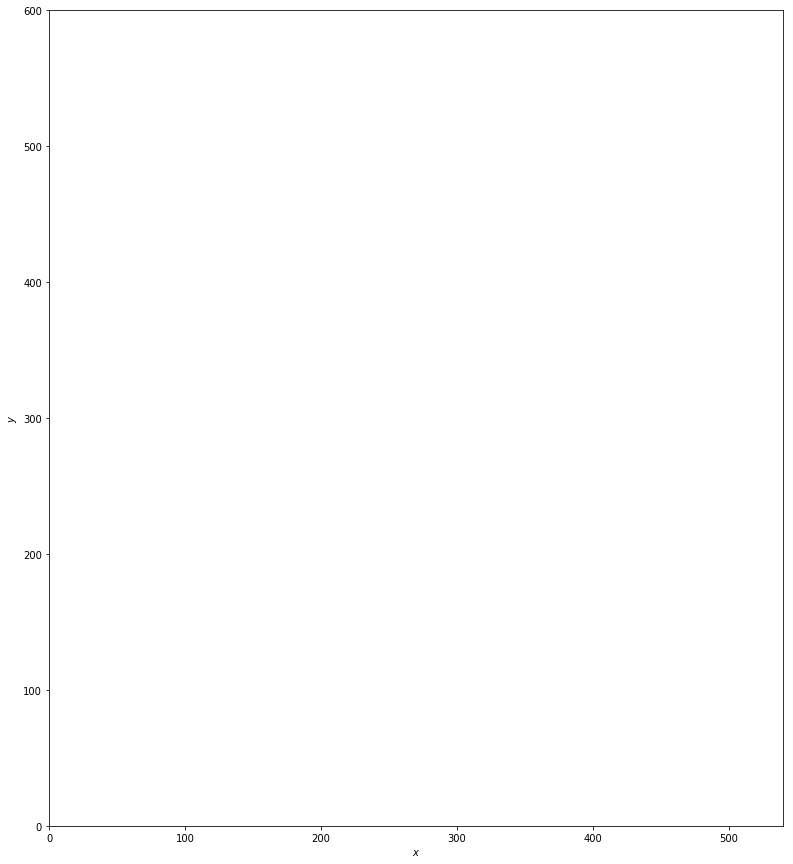

angle 0.0
move (3.0, 0.0)
1583.97897169 442.959393917
489


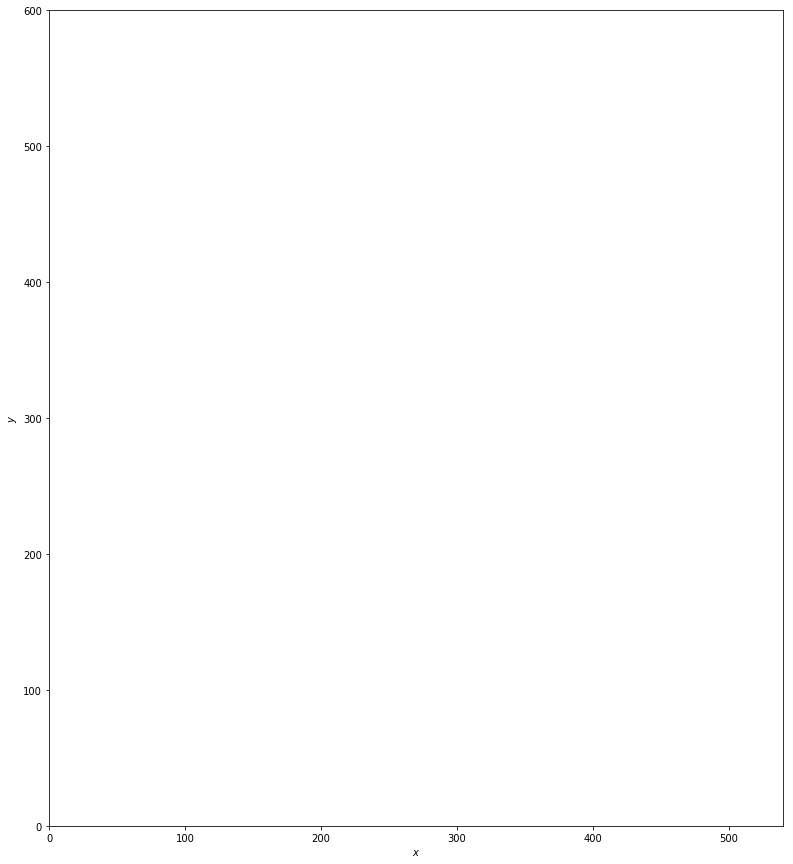

angle 0.0
move (3.0, 0.0)
1586.97897169 442.959393917
490


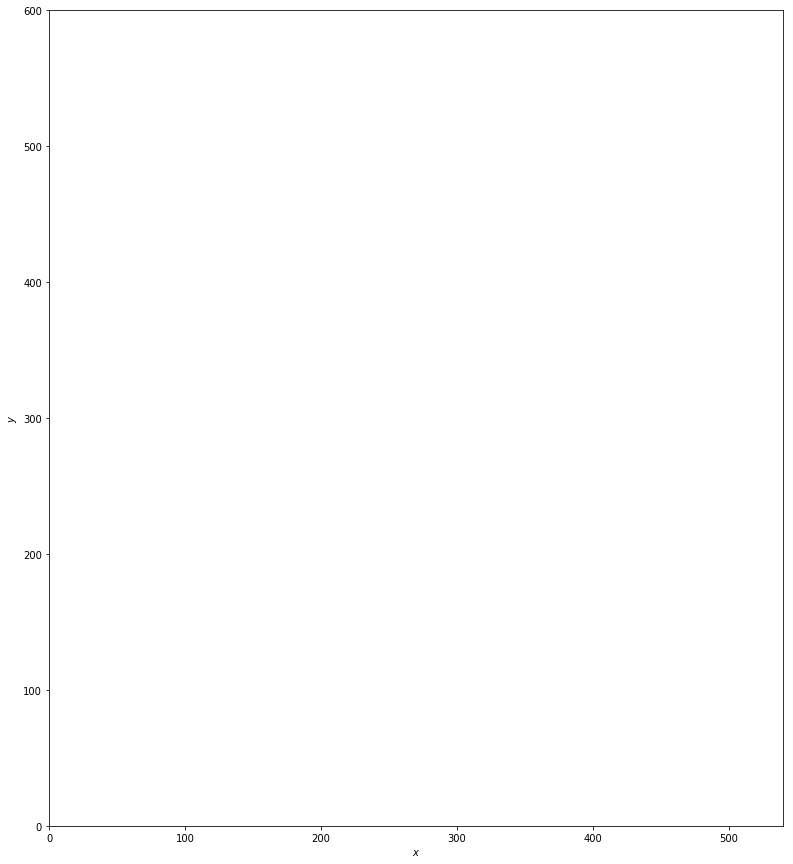

angle 0.0
move (3.0, 0.0)
1589.97897169 442.959393917
491


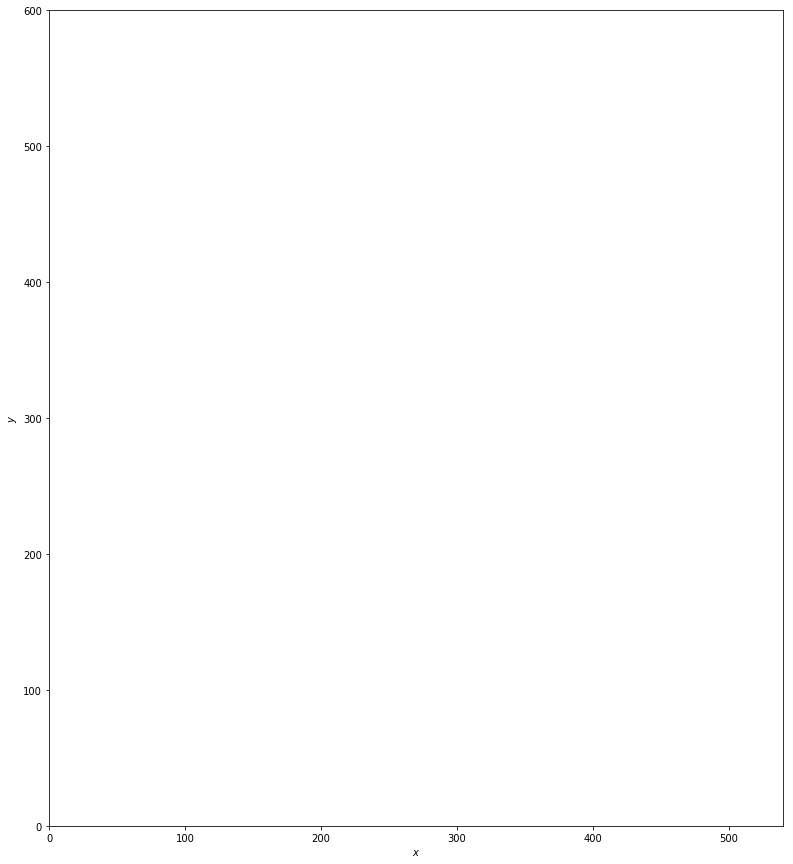

angle 0.0
move (3.0, 0.0)
1592.97897169 442.959393917
492


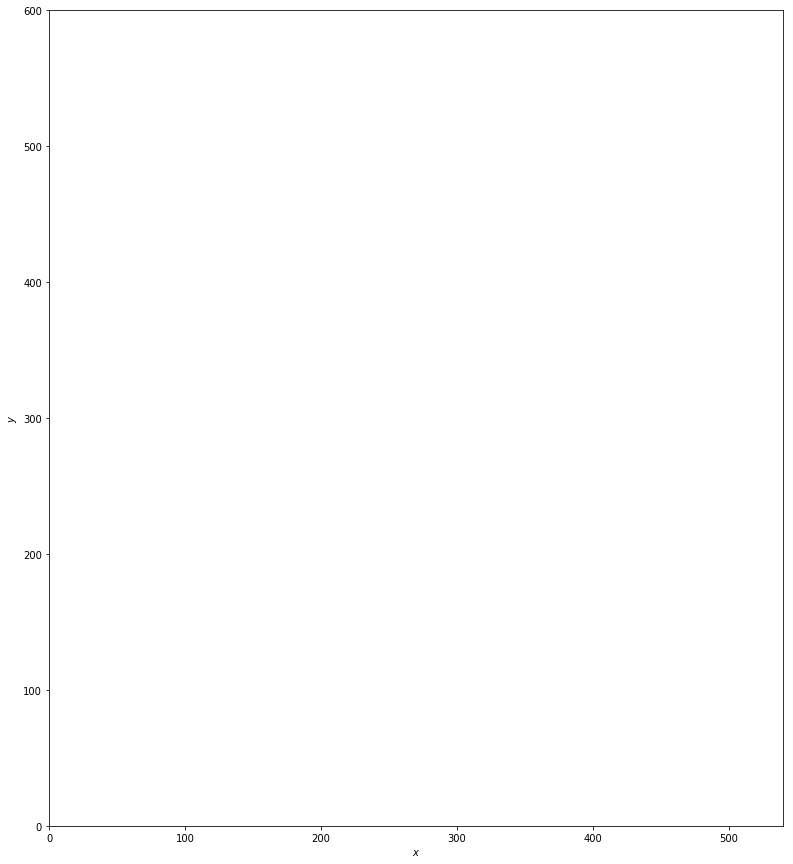

angle 0.0
move (3.0, 0.0)
1595.97897169 442.959393917
493


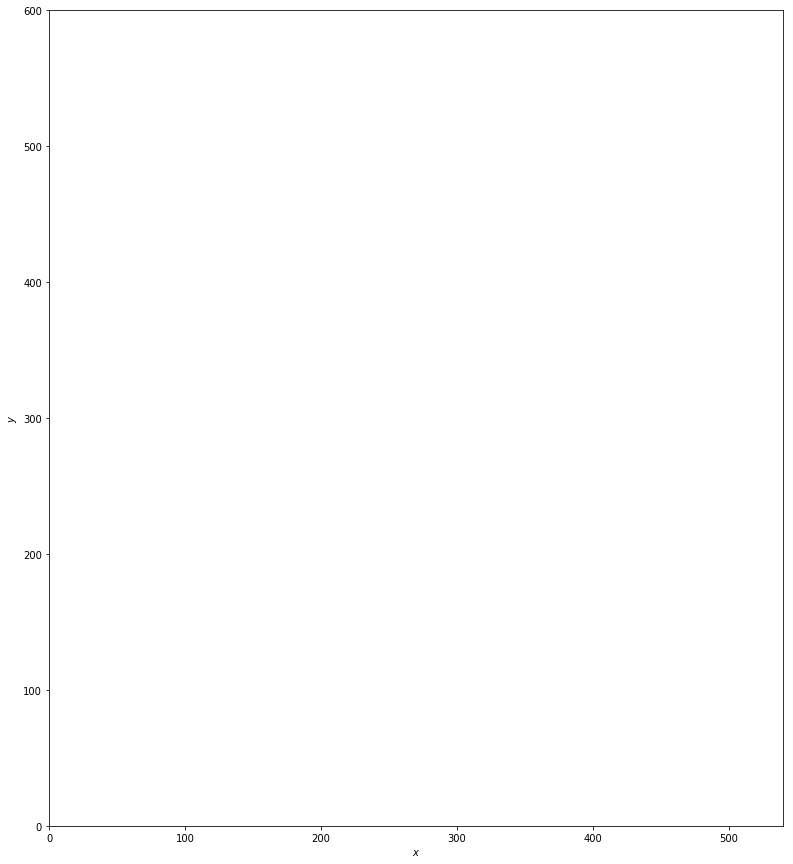

angle 0.0
move (3.0, 0.0)
1598.97897169 442.959393917
494


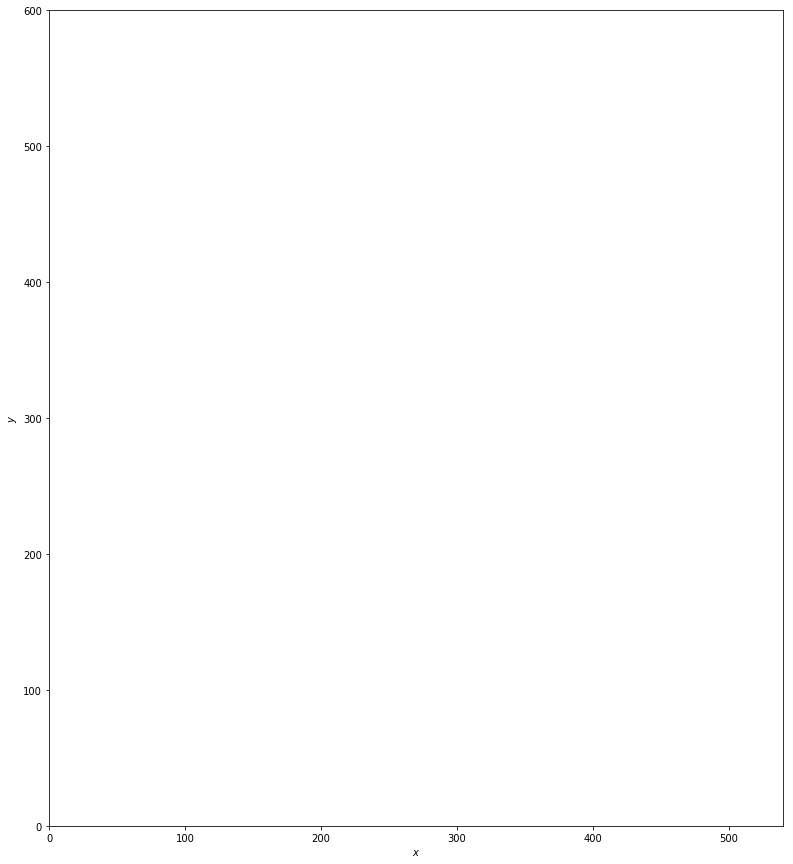

angle 0.0
move (3.0, 0.0)
1601.97897169 442.959393917
495


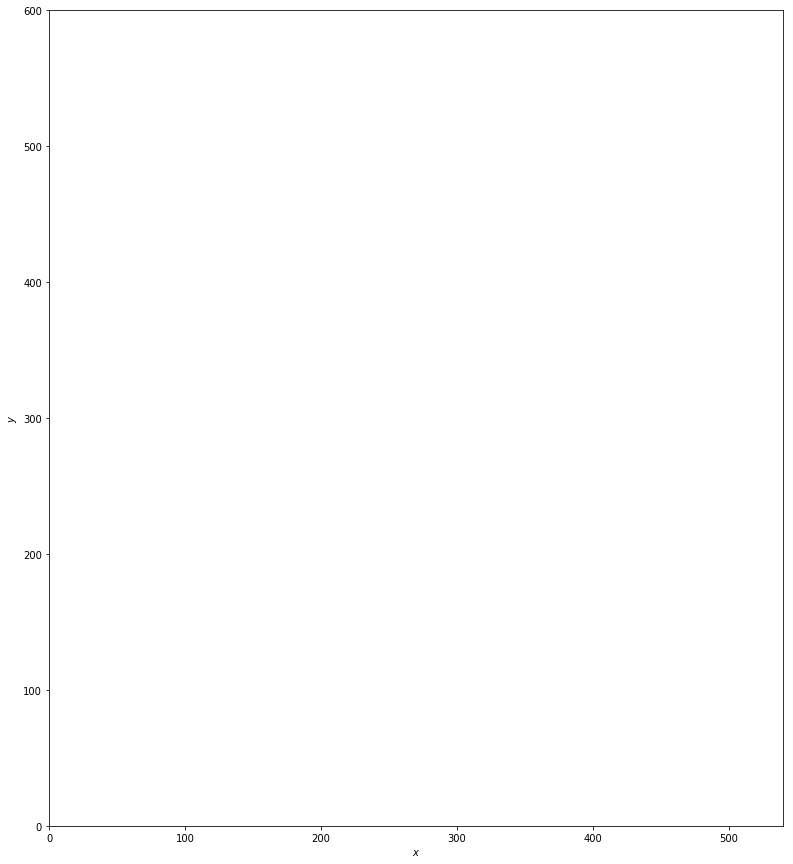

angle 0.0
move (3.0, 0.0)
1604.97897169 442.959393917
496


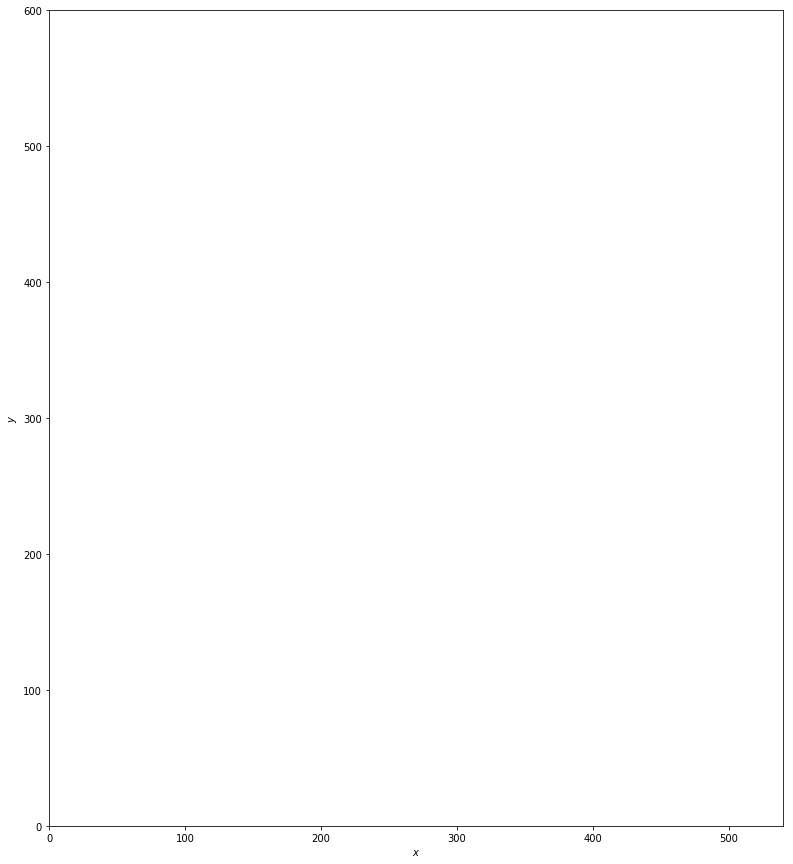

angle 0.0
move (3.0, 0.0)
1607.97897169 442.959393917
497


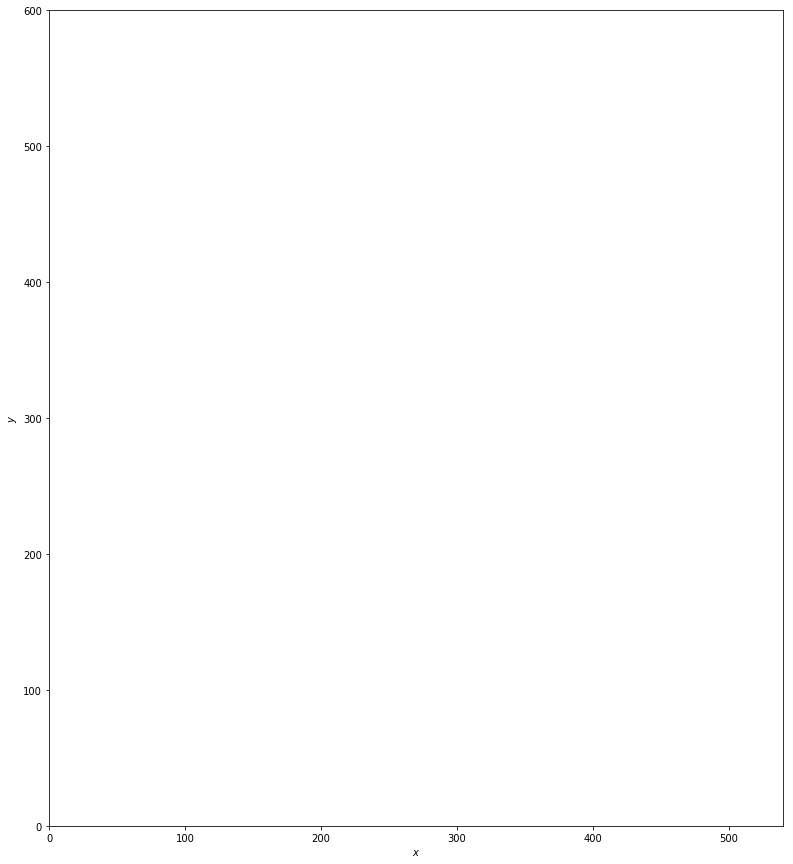

angle 0.0
move (3.0, 0.0)
1610.97897169 442.959393917
498


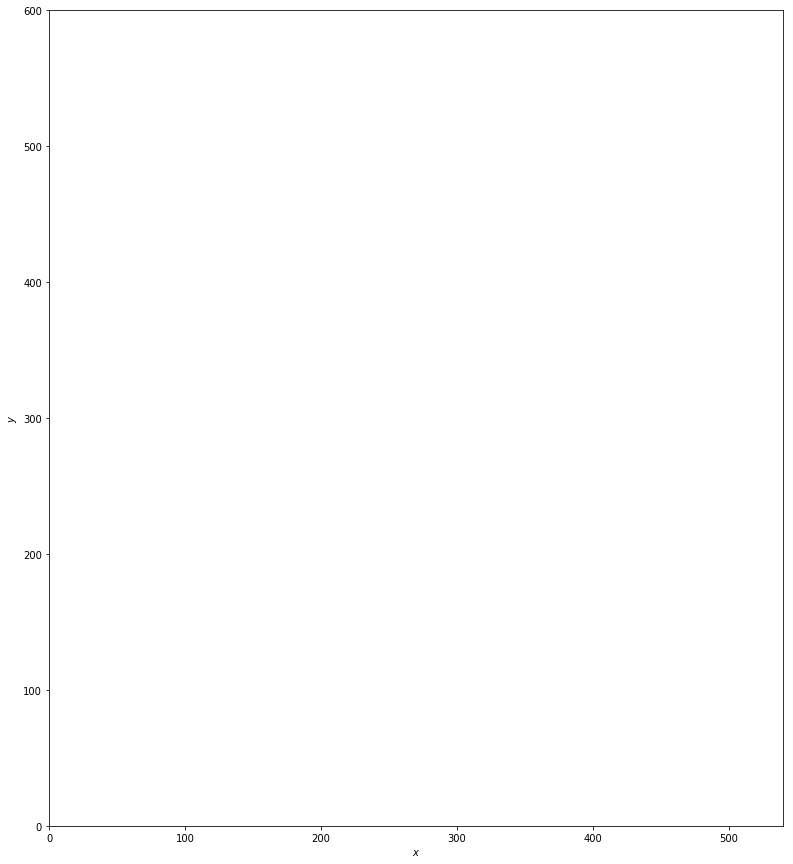

angle 0.0
move (3.0, 0.0)
1613.97897169 442.959393917
499


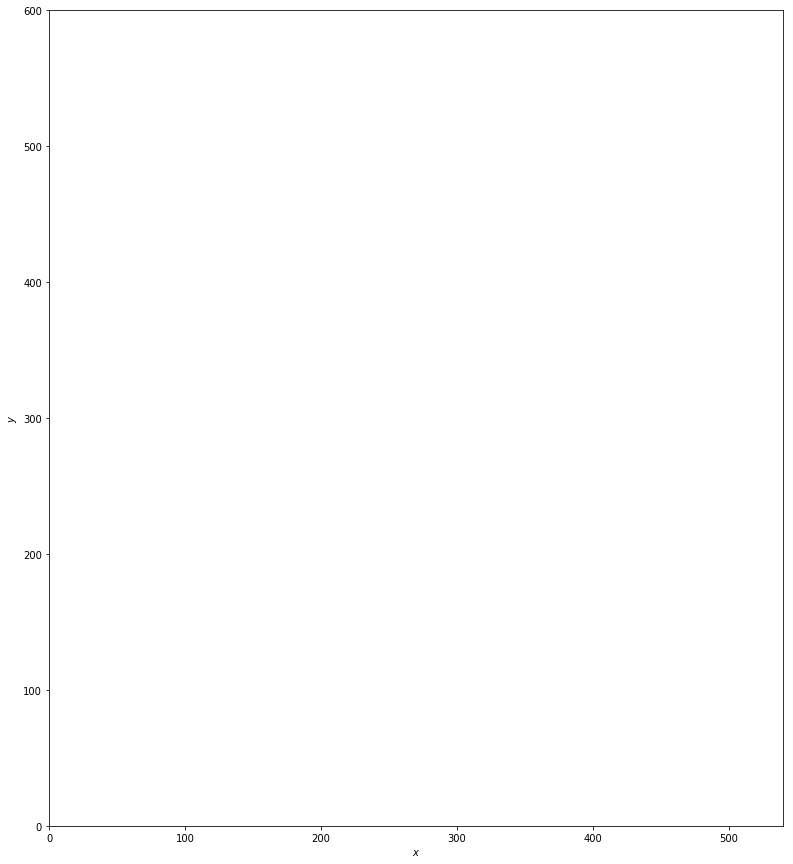

angle 0.0
move (3.0, 0.0)
1616.97897169 442.959393917
500


In [11]:
cones = []

cones.append((1,( 357.5678 , 526.9202 )))   # 
cones.append((1,( 337.0497 , 534.6002 )))   # Start
cones.append((1,( 337.1997 , 536.4001 )))   # 
cones.append((1,( 300.3891 , 530.1002 )))   # 
cones.append((1,( 300.7194 , 540.1503 )))   # 
cones.append((1,( 297.1497 , 558.3002 )))   # Stage Red
cones.append((1,( 406.5297 , 477.3002 )))   # 
cones.append((1,( 401.5797 , 444.1501 )))   # 
cones.append((1,( 411.4797 , 404.1003 )))   # 
cones.append((-1,( 405.9587 , 423.7502 )))   # 
cones.append((-1,( 392.6697 , 475.2002 )))   # 
cones.append((-1,( 354.2378 , 515.3702 )))   # 
cones.append((-1,( 337.0497 , 515.0402 )))   # Start
cones.append((-1,( 337.0497 , 512.8801 )))   # 
cones.append((1,( 300.5691 , 522.6902 )))   # 
cones.append((-1,( 313.0197 , 512.1602 )))   # 
cones.append((-1,( 299.4281 , 512.8801 )))   # 
cones.append((-1,( 290.4281 , 512.1602 )))   # 
cones.append((-1,( 288.9881 , 521.8503 )))   # 
cones.append((-1,( 288.9881 , 529.3801 )))   # 
cones.append((-1,( 288.9881 , 540.8401 )))   # 
cones.append((-1,( 288.9881 , 558.1653 )))   # Stage
cones.append((-1,( 417.0894 , 379.9204 )))   # 
cones.append((-1,( 417.4197 , 323.8201 )))   # 
cones.append((-1,( 416.6997 , 299.3701 )))   # 
cones.append((1,( 429.4797 , 323.8201 )))   # 
cones.append((1,( 430.1997 , 299.3701 )))   # 
cones.append((1,( 430.1997 , 228.7201 )))   # 
cones.append((1,( 418.6197 , 228.7201 )))   # 
cones.append((1,( 406.8897 , 228.7201 )))   # 
cones.append((1,( 395.1597 , 228.7201 )))   # 
cones.append((1,( 383.4297 , 228.7201 )))   # 
cones.append((-1,( 383.4297 , 242.9106 )))   # 
cones.append((-1,( 347.5494 , 257.4001 )))   # 
cones.append((-1,( 324.2697 , 310.9201 )))   # 
cones.append((-1,( 321.5097 , 370.0201 )))   # 
cones.append((-1,( 318.1497 , 373.6201 )))   # 
cones.append((-1,( 314.9397 , 377.3701 )))   # 
cones.append((-1,( 311.5797 , 380.8201 )))   # 
cones.append((-1,( 278.7297 , 405.4201 )))   # 
cones.append((-1,( 254.2797 , 481.6201 )))   # 
cones.append((-1,( 253.5597 , 501.1201 )))   # 
cones.append((-1,( 250.5897 , 502.5601 )))   # 
cones.append((-1,( 247.9197 , 504.1501 )))   # 
cones.append((-1,( 245.3997 , 505.7401 )))   # 
cones.append((1,( 312.2997 , 307.8002 )))   # 
cones.append((1,( 306.7197 , 362.7002 )))   # 
cones.append((1,( 265.4697 , 435.1501 )))   # 
cones.append((1,( 241.9197 , 476.0102 )))   # 
cones.append((1,( 194.8197 , 510.0302 )))   # 
cones.append((1,( 171.8697 , 465.1802 )))   # 
cones.append((1,( 184.7697 , 388.3802 )))   # 
cones.append((1,( 202.7697 , 323.2501 )))   # 
cones.append((-1,( 196.4097 , 532.5602 )))   # 
cones.append((-1,( 159.3597 , 524.9703 )))   # 
cones.append((-1,( 159.3597 , 518.1301 )))   # 
cones.append((-1,( 159.3597 , 511.4402 )))   # 
cones.append((-1,( 159.3597 , 504.7502 )))   # 
cones.append((-1,( 159.3597 , 498.0602 )))   # 
cones.append((-1,( 159.3597 , 491.3702 )))   # 
cones.append((-1,( 159.3597 , 484.6802 )))   # 
cones.append((-1,( 159.3294 , 463.2902 )))   # 
cones.append((-1,( 176.1294 , 420.6902 )))   # 
cones.append((-1,( 193.9497 , 355.8902 )))   # 
cones.append((-1,( 212.2497 , 288.3902 )))   # 
cones.append((1,( 213.2697 , 209.2501 )))   # 
cones.append((1,( 228.4197 , 168.1501 )))   # 
cones.append((1,( 277.2897 , 159.1501 )))   # 
cones.append((1,( 329.1897 , 168.8701 )))   # 
cones.append((1,( 395.1597 , 159.3901 )))   # 
cones.append((1,( 347.9997 , 228.7201 )))   # 
cones.append((1,( 344.0697 , 236.5201 )))   # 
cones.append((1,( 340.1397 , 244.3201 )))   # 
cones.append((1,( 336.2097 , 252.1201 )))   # 
cones.append((-1,( 200.5497 , 209.4001 )))   # 
cones.append((-1,( 202.0497 , 179.4001 )))   # 
cones.append((-1,( 202.0497 , 175.5001 )))   # 
cones.append((-1,( 202.0497 , 171.6001 )))   # 
cones.append((-1,( 202.0497 , 167.7001 )))   # 
cones.append((-1,( 202.0497 , 163.8 )))   # 
cones.append((-1,( 202.0497 , 159.9001 )))   # 
cones.append((-1,( 202.0497 , 156.0001 )))   # 
cones.append((-1,( 206.2497 , 156.0001 )))   # 
cones.append((-1,( 210.4497 , 156.0001 )))   # 
cones.append((-1,( 214.1997 , 156.0001 )))   # 
cones.append((-1,( 218.3997 , 156.0001 )))   # 
cones.append((-1,( 269.1 , 146.2501 )))   # 
cones.append((-1,( 273.3003 , 146.2501 )))   # 
cones.append((-1,( 277.5006 , 146.2501 )))   # 
cones.append((-1,( 329.2478 , 157.5002 )))   # 
cones.append((-1,( 395.0094 , 134.4001 )))   # 
cones.append((-1,( 395.0094 , 111.0002 )))   # 
cones.append((1,( 418.6194 , 158.0701 )))   # 
cones.append((1,( 418.6194 , 153.2701 )))   # 
cones.append((1,( 418.6194 , 148.4702 )))   # 
cones.append((1,( 418.6194 , 144.8702 )))   # 
cones.append((1,( 418.6194 , 141.2701 )))   # 
cones.append((1,( 418.6194 , 133.7701 )))   # 
cones.append((1,( 418.5594 , 137.3702 )))   # 
cones.append((1,( 418.5594 , 129.9902 )))   # 
cones.append((-1,( 359.7594 , 75.75018 )))   # 
cones.append((-1,( 316.9494 , 75.75018 )))   # 
cones.append((-1,( 265.56 , 51.90015 )))   # 
cones.append((-1,( 218.0094 , 51.90015 )))   # 
cones.append((-1,( 183.3297 , 68.25018 )))   # 
cones.append((-1,( 164.7 , 115.3502 )))   # 
cones.append((-1,( 163.26 , 118.8002 )))   # 
cones.append((-1,( 161.5794 , 122.2502 )))   # 
cones.append((1,( 405.5097 , 58.59015 )))   # 
cones.append((1,( 402.2397 , 58.59015 )))   # 
cones.append((1,( 398.9697 , 58.59015 )))   # 
cones.append((1,( 395.6997 , 58.59015 )))   # 
cones.append((1,( 359.6991 , 62.79016 )))   # 
cones.append((1,( 316.6194 , 64.05029 )))   # 
cones.append((1,( 264.5997 , 35.85034 )))   # 
cones.append((1,( 219.5391 , 33.30029 )))   # 
cones.append((1,( 188.9391 , 29.85034 )))   # 
cones.append((1,( 184.9491 , 38.25031 )))   # 
cones.append((1,( 181.1991 , 45.75031 )))   # 
cones.append((1,( 177.9891 , 53.07013 )))   # 
cones.append((1,( 174.6894 , 59.31018 )))   # 
cones.append((1,( 154.2894 , 109.1105 )))   # 
cones.append((1,( 152.5494 , 112.7402 )))   # 
cones.append((1,( 151.2294 , 116.4902 )))   # 
cones.append((1,( 117.3294 , 163.0801 )))   # 
cones.append((1,( 117.3594 , 166.5601 )))   # 
cones.append((1,( 117.3294 , 169.9202 )))   # 
cones.append((-1,( 130.5449 , 169.9202 )))   # 
cones.append((-1,( 148.3949 , 228.5402 )))   # 
cones.append((-1,( 148.3949 , 231.8103 )))   # 
cones.append((-1,( 148.3949 , 235.0804 )))   # 
cones.append((-1,( 148.3949 , 238.3505 )))   # 
cones.append((-1,( 148.3949 , 241.4706 )))   # 
cones.append((-1,( 148.3949 , 244.5906 )))   # 
cones.append((-1,( 148.3949 , 247.8607 )))   # 
cones.append((-1,( 148.3949 , 251.1308 )))   # 
cones.append((1,( 134.7294 , 229.5901 )))   # 
cones.append((1,( 134.7294 , 251.1308 )))   # 
cones.append((1,( 113.2794 , 286.4705 )))   # 
cones.append((-1,( 124.2449 , 287.1905 )))   # 
cones.append((-1,( 125.2043 , 347.7905 )))   # Finish

cones.append((-1,( 127.5136 , 347.7905 )))   # 
cones.append((-1,( 122.8049 , 381.6602 )))   # 
cones.append((-1,( 122.9543 , 399.2101 )))   # 
cones.append((-1,( 123.1036 , 416.7602 )))   # 
cones.append((-1,( 122.8049 , 434.3102 )))   # 
cones.append((-1,( 122.6561 , 452.0102 )))   # 
cones.append((-1,( 122.5074 , 469.5602 )))   # 
cones.append((-1,( 122.6587 , 487.2602 )))   # Exit
cones.append((1,( 112.5594 , 347.7905 )))   # Finish
cones.append((1,( 110.3847 , 347.7905 )))   # 
cones.append((1,( 112.5594 , 381.8102 )))   # 
cones.append((1,( 112.4987 , 399.2101 )))   # 
cones.append((1,( 112.4381 , 416.6102 )))   # 
cones.append((1,( 112.3775 , 434.0102 )))   # 
cones.append((1,( 112.3168 , 451.5602 )))   # 
cones.append((1,( 112.5562 , 469.4102 )))   # 
cones.append((1,( 112.1956 , 487.1102 )))   # Exit
cones.append((1,( 312.2997 , 522.6902 )))   # 
cones.append((-1,( 324.7503 , 517.4102 )))   # 
cones.append((1,( 324.0303 , 527.9402 )))   # 
cones.append((1,( 369.5678 , 514.9202 )))   # 
cones.append((-1,( 366.2378 , 503.3702 )))   # 
cones.append((1,( 381.5678 , 502.9202 )))   # 
cones.append((-1,( 376.7378 , 493.0805 )))   # 
cones.append((1,( 397.1397 , 492.3303 )))   # 
cones.append((-1,( 386.1294 , 485.0703 )))   # 
cones.append((-1,( 416.6997 , 280.9202 )))   # 
cones.append((1,( 430.1997 , 280.9202 )))   # 
cones.append((-1,( 416.6997 , 262.4702 )))   # 
cones.append((1,( 430.1997 , 262.4702 )))   # 
cones.append((-1,( 416.6997 , 244.0203 )))   # 
cones.append((1,( 430.1997 , 244.0203 )))   # 
cones.append((-1,( 394.1397 , 242.8201 )))   # 
cones.append((-1,( 407.4894 , 242.9106 )))   # 
cones.append((1,( 360.0881 , 228.8701 )))   # 
cones.append((1,( 373.0336 , 228.8701 )))   # 
cones.append((-1,( 372.7197 , 242.9106 )))   # 
cones.append((-1,( 336.2697 , 298.9201 )))   # 
cones.append((1,( 324.2997 , 295.8002 )))   # 
cones.append((-1,( 348.2697 , 286.9201 )))   # 
cones.append((1,( 336.2997 , 283.8002 )))   # 
cones.append((-1,( 347.5494 , 271.6801 )))   # 
cones.append((1,( 331.7394 , 270.9601 )))   # 
cones.append((-1,( 361.1391 , 239.7905 )))   # 
cones.append((-1,( 352.079 , 246.5701 )))   # 
cones.append((1,( 417.6894 , 362.4898 )))   # 
cones.append((-1,( 423.299 , 338.31 )))   # 




def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2
path = []
speed = 3.0
dist1 = 30.0**2.0
sweep1 = np.pi/1.1
dist2 = 0.0**2.0
sweep2 = np.pi/6.0
totaltries = 500
tries = 0
while not(Xpos < 122 and Xpos > 112 and Ypos > 487) and tries < totaltries:
    
   
        
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_xlim(0,540)
    ax1.set_ylim(0,600)
    ax1.set_aspect('equal')
    
    Ex = 0.0
    Ey = 0.0
    for conetype, coords in cones:
       # if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
       #     and (angle+sweep1 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep1) 
        #    or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
        #    and (angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)):
        #    ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
        if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
            or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords))):
            ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
            Ex += ex
            Ey += ey
            
            
            

            # Add filled circles for the cones themselves
            cone_colors = {True: '#aa0000', False: '#0000aa'}

            ax1.add_artist(Circle(coords, 1.2, color=cone_colors[conetype>0]))
    

            
            
            
            
            print('yes', conetype, coords)
        
    
    #print(Ex,Ey)
    plt.show()
    print('angle',(angle*180/np.pi))
    angle = np.arctan2(Ey, Ex)    
   
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print ('move',(newx, newy))
    print(Xpos, Ypos)
    print(tries)
    #time.sleep(.5)

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 1.2, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.2, color='#00aa00'))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0,540)
ax.set_ylim(0,600)
ax.set_aspect('equal')
plt.show()

In [14]:
print((1,0),np.arctan2(1,0),np.arctan2(1,0)*180/np.pi)
print((0,1),np.arctan2(0,1)*180/np.pi)
print((-1,-0),np.arctan2(-1,0)*180/np.pi)
print((0.001,-1),np.arctan2(0.001,-1)*180/np.pi)
print((-0.001,-1),np.arctan2(-0.001,-1)*180/np.pi)

(1, 0) 1.57079632679 90.0
(0, 1) 0.0
(-1, 0) -90.0
(0.001, -1) 179.94270424
(-0.001, -1) -179.94270424


In [83]:
 # subset the cones to ones only within 'range'
    
cones = []




cones.append((1,(297.0,558.0)))   #Stage
cones.append((-1,(289,558.0)))   #Stage
cones.append((1,(337.0,534.6)))   #Start
cones.append((-1,(337.0497,515.0402)))   #Start
cones.append((1,(337.1997,536.4001)))   #
cones.append((1,(312.4497,536.4001)))   #
cones.append((1,(300.8997,539.4001)))   #
cones.append((1,(406.9497,521.4001)))   #
cones.append((1,(406.7997,511.0502)))   #


def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2.0
print(angle, angle*180/np.pi)
dist1 = 20.0**2.0

sweep1 = np.pi/1.8*2.0
print('sweep1',sweep1, sweep1*180/np.pi)
dist2 = 150**2.0

sweep2 = np.pi/8.0*2.0
print('sweep2',sweep2, sweep2*180/np.pi)

for dir, coords in cones:
    print(' ')
    print(dir, coords)
    print(coords[0]-Xpos, coords[1]-Ypos)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist1 )
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1 )
    print('angle+sweep1',angle+sweep1)
    
    sweep1p = add_angle_sweep(angle,sweep1) 
    print('sweep1p',sweep1p*180/np.pi)    
    
    sweep1n = sub_angle_sweep(angle,sweep1) 
    print('sweep1n',sweep1n*180/np.pi) 
    
   
        
    print((sweep1p*180.0/np.pi , np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep1n*180.0/np.pi))
    #print((sweep1p > np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > sweep1n))
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep1p,sweep1n)))
    
    
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist2)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2)
    
    print('angle+sweep2',angle+sweep2)
    
    sweep2p = add_angle_sweep(angle,sweep2) 
    print('sweep2p',sweep2p*180/np.pi)    
    
    sweep2n = sub_angle_sweep(angle,sweep2) 
    print('sweep2n',sweep2n*180/np.pi) 
    
    print(sweep2p*180.0/np.pi ,  np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep2n*180.0/np.pi)
    #print(angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep2p,sweep2n)))
    print((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
          or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords)))
    print(angleIsBetween(Xpos,Ypos,angle,sweep1,coords))
    print(angleIsBetween(Xpos,Ypos,angle,sweep2,coords))
   
        

-1.5707963267948966 -90.0
sweep1 3.490658503988659 200.0
sweep2 0.7853981633974483 45.0
 
1 (297.0, 558.0)
4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 0.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 0.0 -112.5
False
True
True
False
 
-1 (289, 558.0)
-4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 180.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 180.0 -112.5
False
True
True
False
 
1 (337.0, 534.6)
44.0 -23.399999999999977
2483.559999999999 400.0
False
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, -28.004857388043625, 170.0)
False
2483.559999999999 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 -28.004857388 -112.5
False
False
True
False
 
-1 (337.0497,

In [72]:
a = True
b = False

print (a, b, not a, not b)

True False False True
